# **Data Collection & Preparation**

## Importing the Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [46]:
df=pd.read_csv("sdss_100k_galaxy_form_burst.csv",header=1)

## Handling missing values


In [47]:
df.head()

objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   class  \
0     0.099951     0.311864  0.289370  0.270588  0.187182  GALAXY   
1     0.366549     0.516876  0.517447  0.552297  0.636966  GALAXY   
2     0.050000     0.417137  0.506950  0.549881  0.370166  GALAXY   
3     0.310763     0.356827  0.389345  0.388160  0.416660  GALAXY   
4 -9999.000000 -9999.000000  0.050000  0.050000  0.149973  GALAXY   

      subclass  redshift  redshift_err  
0  STARFORMING  0.067749      0.000015  
1  STARFORMING  0.105118      0.000010  
2  STARFORMING  0.234089      0.000030  
3  STARFORMING  0.110825      0.000030  
4  STARFORMING  0.136658      0.000021  

[5 rows x 43 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [49]:
df.shape

(100000, 43)

In [50]:
#  Check for missing values in each column
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [51]:
df.head(100)


objid            specobjid          ra       dec  \
0   1237646587710669400  8175185722644649984   82.038679  0.847177   
1   1237646588247540577  8175186822156277760   82.138894  1.063072   
2   1237646588247540758  8175187097034184704   82.028510  1.104003   
3   1237648702973083853   332152325571373056  198.544469 -1.097059   
4   1237648702973149350   332154249716721664  198.706864 -1.046217   
..                  ...                  ...         ...       ...   
95  1237649962993451273  1835358760248305664   53.172548 -6.396587   
96  1237649962993451290  1835356011469236224   53.187706 -6.285540   
97  1237649962993451307  1835356561225050112   53.278711 -6.326919   
98  1237649962993582572  1835370305120397312   53.510566 -6.354169   
99  1237649962993779017  1835380750480861184   53.913874 -6.354083   

             u           g         r         i         z  modelFlux_u  ...  \
0     21.73818    20.26633  19.32409  18.64037  18.23833     2.007378  ...   
1     20.66761    19.32016  18.67888  18.24693  18.04122     5.403369  ...   
2     23.63531    21.19671  19.92297  19.31443  18.68396     0.295693  ...   
3     20.12374    18.41520  17.47202  17.05297  16.72423     8.920645  ...   
4  -9999.00000 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...   
..         ...         ...       ...       ...       ...          ...  ...   
95    21.12722    20.38820  19.55336  19.09251  18.68490     3.535348  ...   
96    21.64341    20.88756  19.60764  19.07037  18.45068     2.192185  ...   
97    21.14505    20.11814  19.05187  18.49674  18.18411     3.477600  ...   
98    21.14322    20.43428  19.52342  19.14907  18.69886     3.483481  ...   
99    22.00193    20.99507  19.61068  18.99552  18.53429     1.569682  ...   

    psfMag_z      expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   class  \
0   19.43575     0.099951     0.311864  0.289370  0.270588  0.187182  GALAXY   
1   18.85012     0.366549     0.516876  0.517447  0.552297  0.636966  GALAXY   
2   19.42235     0.050000     0.417137  0.506950  0.549881  0.370166  GALAXY   
3   18.03204     0.310763     0.356827  0.389345  0.388160  0.416660  GALAXY   
4   19.02880 -9999.000000 -9999.000000  0.050000  0.050000  0.149973  GALAXY   
..       ...          ...          ...       ...       ...       ...     ...   
95  19.36725     0.693739     0.762268  0.792639  0.922506  0.599810  GALAXY   
96  19.34938     0.055749     0.791044  0.881872  0.829645  0.704926  GALAXY   
97  19.40406     0.120152     0.149983  0.210249  0.220688  0.176067  GALAXY   
98  19.90005     0.155661     0.899954  0.761994  0.849941  0.733456  GALAXY   
99  19.42861     0.999787     0.385895  0.454127  0.462196  0.475277  GALAXY   

       subclass  redshift  redshift_err  
0   STARFORMING  0.067749      0.000015  
1   STARFORMING  0.105118      0.000010  
2   STARFORMING  0.234089      0.000030  
3   STARFORMING  0.110825      0.000030  
4   STARFORMING  0.136658      0.000021  
..          ...       ...           ...  
95    STARBURST  0.216331      0.000012  
96  STARFORMING  0.346891      0.000036  
97  STARFORMING  0.142759      0.000012  
98    STARBURST  0.361656      0.000021  
99    STARBURST  0.372703      0.000035  

[100 rows x 43 columns]

In [52]:
df.drop(columns=['objid', 'specobjid', 'ra', 'dec', 'class'], inplace=True)

## Changing the datatype of subclass from object to int
**We transformed the 'subclass' column from object to integer datatype using ordinal encoding to represent object as integers in the dataset.**

In [53]:
df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)

# **EDA(Exploratory Data Analysis)**

## Descriptive statistical


In [54]:
df.describe()

u              g              r              i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       18.518622      17.258221      16.821739      16.362611   
std       105.082004     105.069066      95.035474     100.171155   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%        18.762215      17.505868      16.898845      16.527097   
50%        19.349715      18.072640      17.459080      17.091385   
75%        20.079470      18.656182      17.926918      17.592650   
max        30.960000      30.420980      31.173560      30.562360   

                   z    modelFlux_u    modelFlux_g    modelFlux_r  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       15.850865      30.683321      98.845058     175.621855   
std       114.206165      76.552859     229.479215     435.852215   
min     -9999.000000     -47.451720     -11.935840     -42.440640   
25%        16.281327       9.288132      34.462902      67.453910   
50%        16.861105      18.195690      59.005915     103.828850   
75%        17.453848      31.259628      99.438015     173.929225   
max        28.553240    7915.306000   18668.400000   31755.990000   

         modelFlux_i    modelFlux_z  ...       psfMag_i       psfMag_z  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean      244.728134     307.474895  ...      18.020203      17.435735   
std       619.825871     809.166087  ...     100.181687     114.218604   
min       -54.385510    -144.460200  ...   -9999.000000   -9999.000000   
25%        91.777325     104.256550  ...      18.295627      17.991602   
50%       145.664550     180.086150  ...      18.845780      18.563315   
75%       244.944825     307.044675  ...      19.586577      19.299430   
max     51923.480000   79058.460000  ...      25.966680      27.043280   

             expAB_u        expAB_g        expAB_r        expAB_i  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.603667      -0.522111      -0.309462      -0.410153   
std       104.870665     104.871474      94.860919      99.991654   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%         0.299999       0.398705       0.418789       0.418656   
50%         0.508688       0.588335       0.604795       0.604254   
75%         0.699907       0.768804       0.773924       0.773119   
max         1.000000       1.000000       0.999999       1.000000   

             expAB_z       subclass       redshift   redshift_err  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       -0.740964       0.250070       0.116753       0.000179  
std       114.005927       0.433055       0.100169       0.052189  
min     -9999.000000       0.000000      -0.000833       0.000002  
25%         0.381288       0.000000       0.055836       0.000008  
50%         0.575397       0.000000       0.085850       0.000011  
75%         0.752311       1.000000       0.135148       0.000015  
max         0.999998       1.000000       0.572899      16.503710  

[8 rows x 38 columns]

In [55]:
df.isna().sum()

u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [56]:
dup = df.duplicated().any()
print('Duplicate values results:', dup)

Duplicate values results: False


## Visual analysis
**Visual analysis is the process of using visual representations, such as charts, plots, and graphs, to explore and understand data. It is a way to quickly identify patterns, trends, and outliers in the data, which can help to gain insights and make informed decisions.**

## Univariate analysis


In [57]:
sub=df['subclass'].value_counts()
sub

subclass
0    74993
1    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

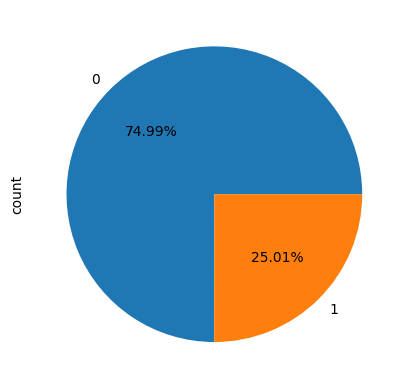

In [58]:
sub.plot(kind='pie',subplots=True,autopct='%1.2f%%')

In [59]:
def func(col):
    sns.boxplot(y=col,data=df)
    plt.show()

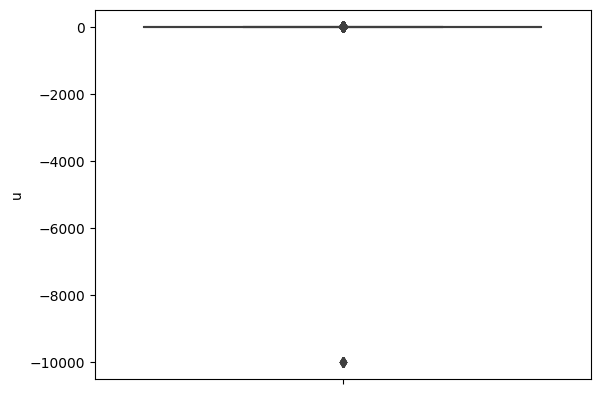

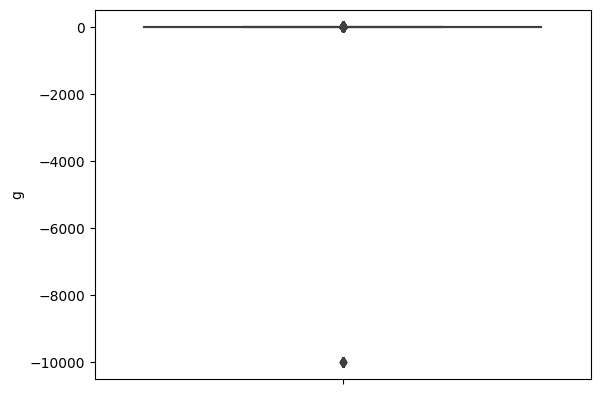

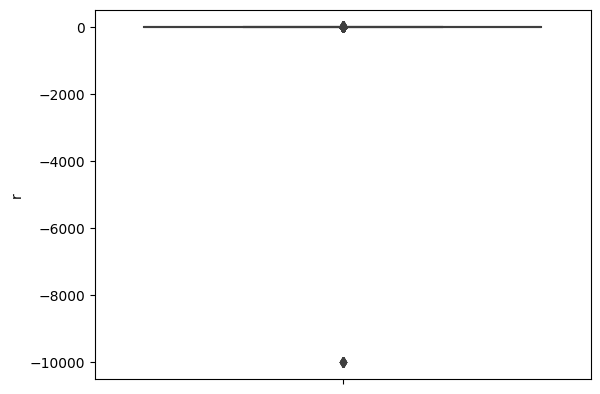

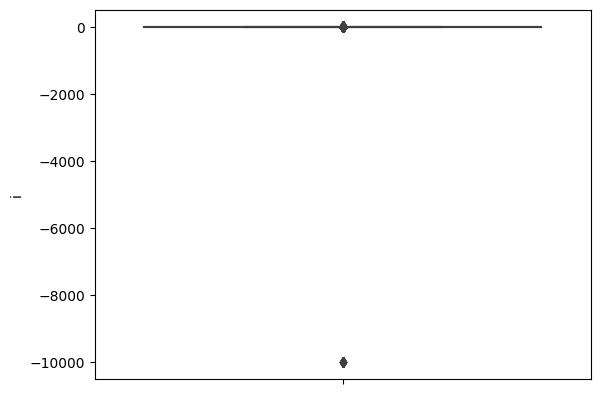

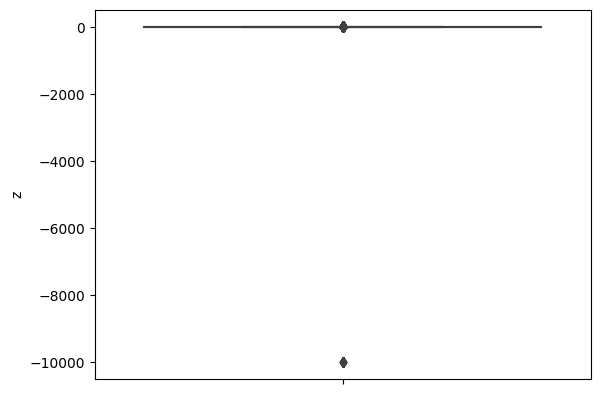

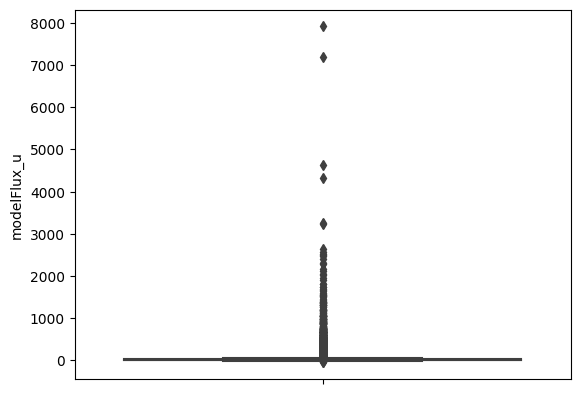

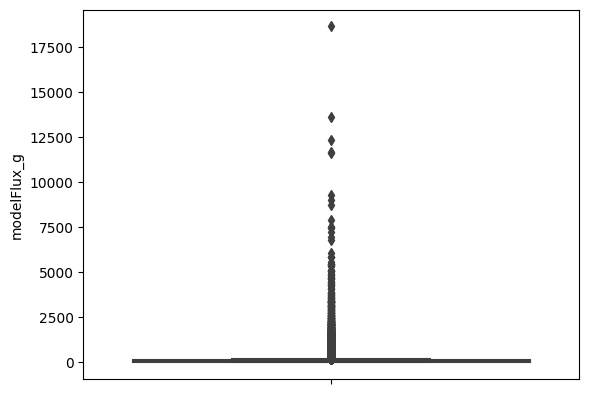

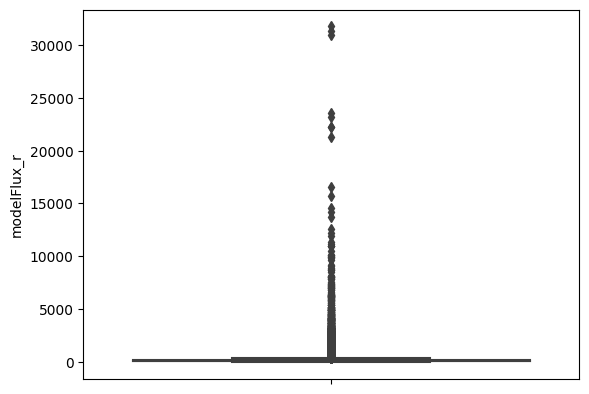

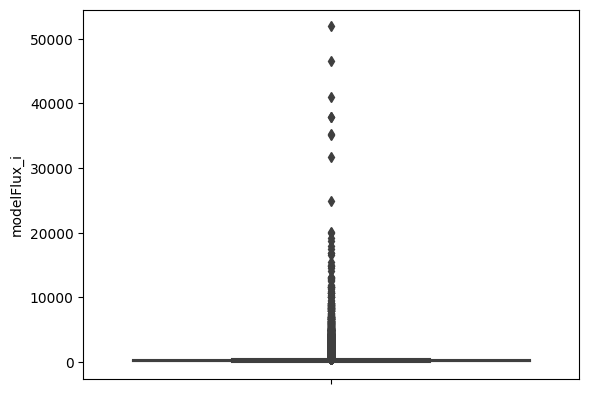

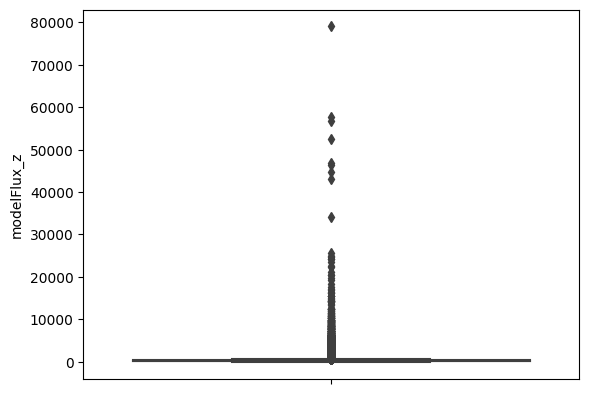

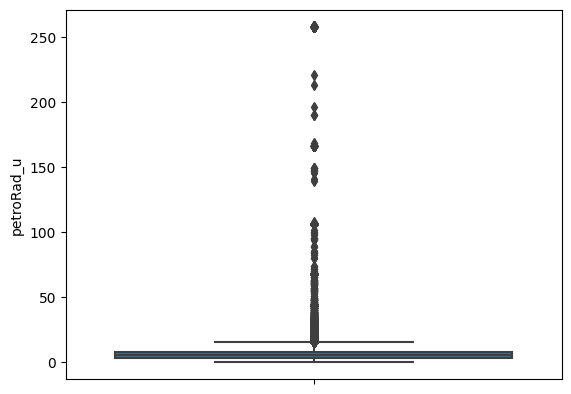

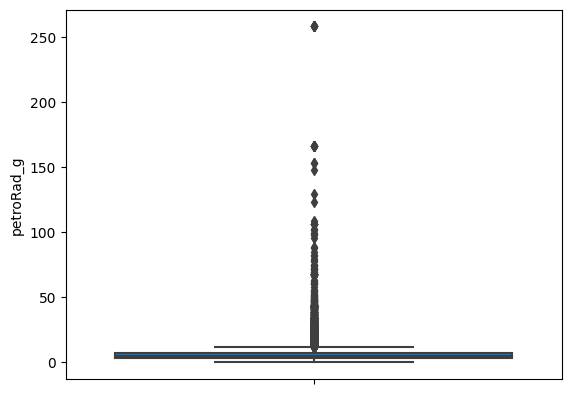

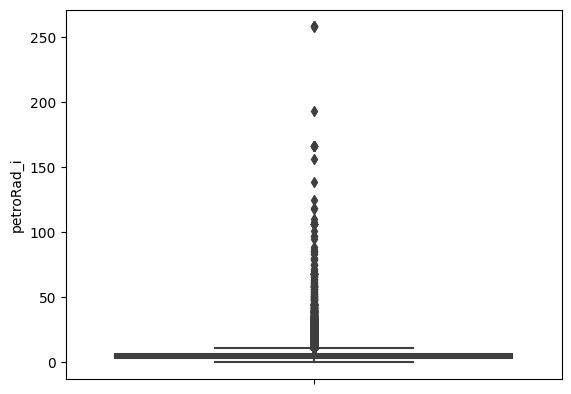

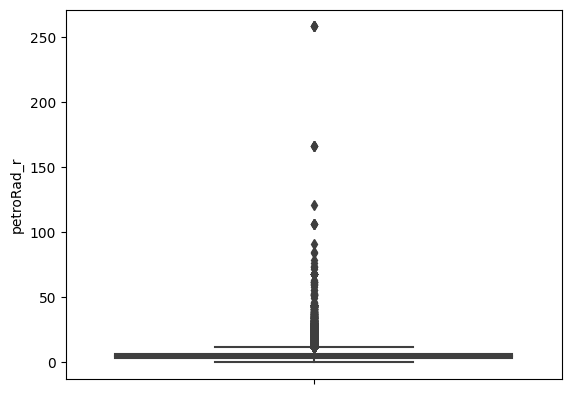

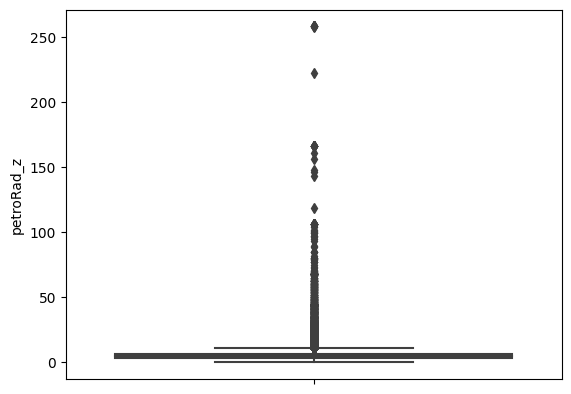

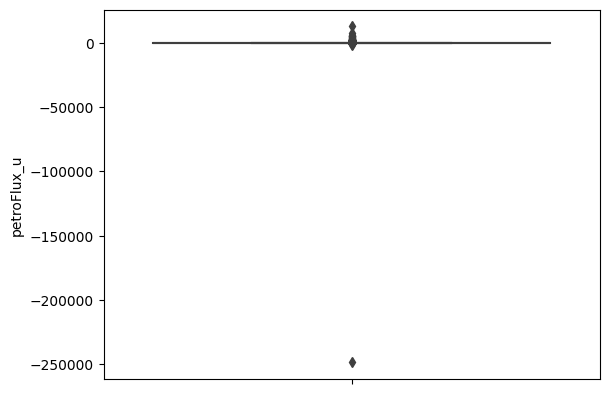

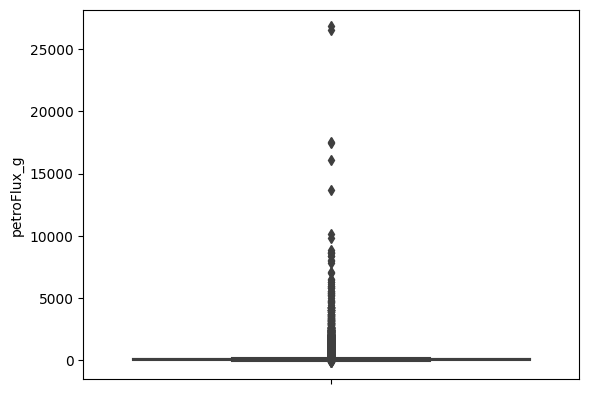

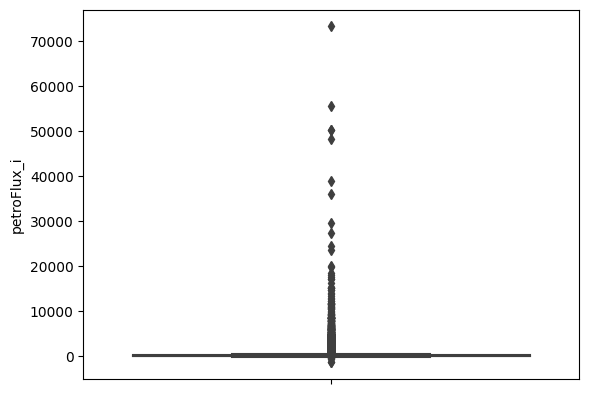

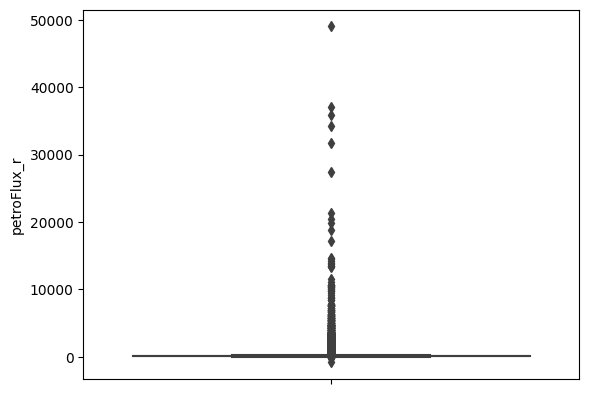

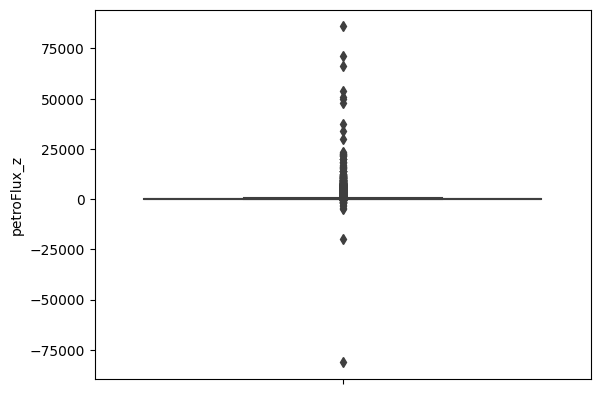

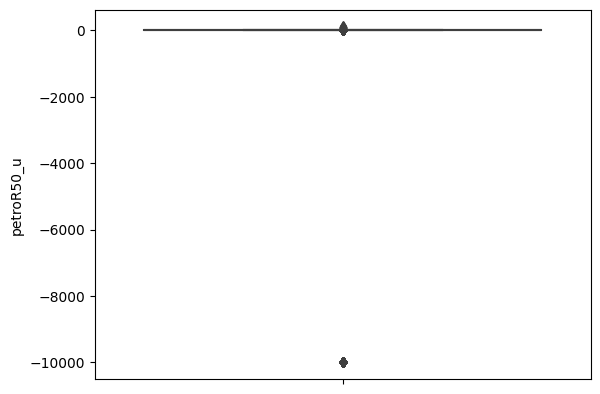

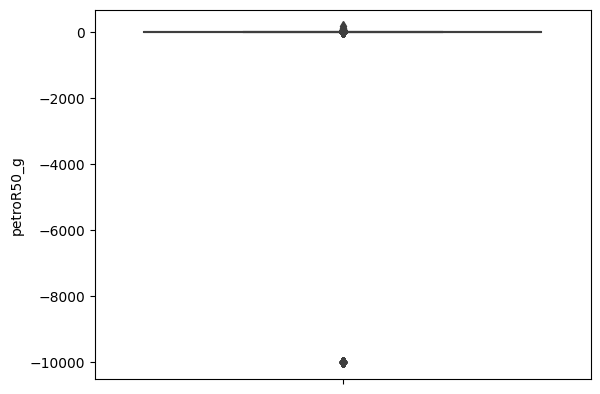

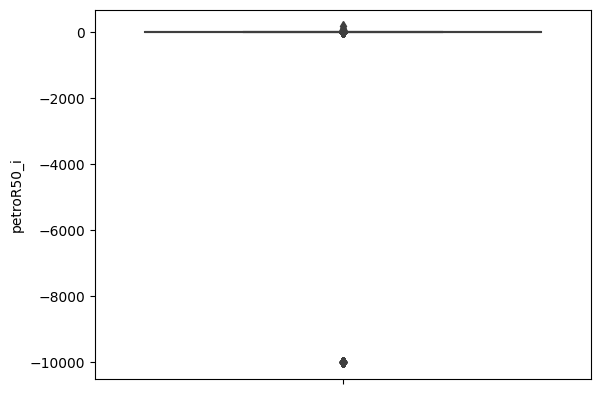

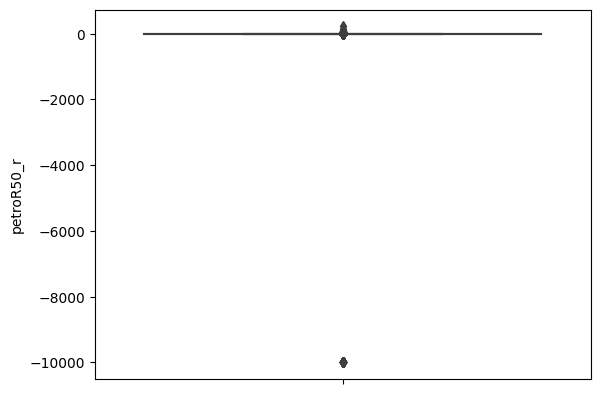

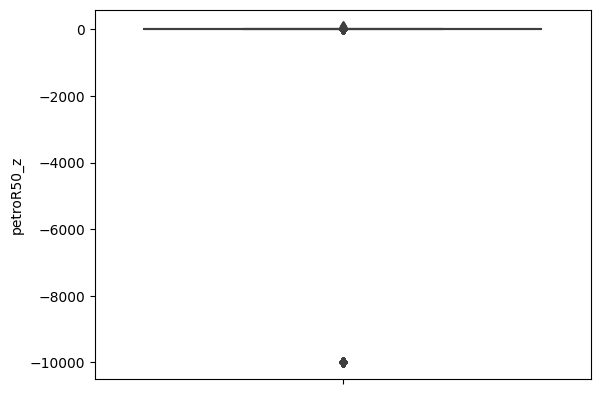

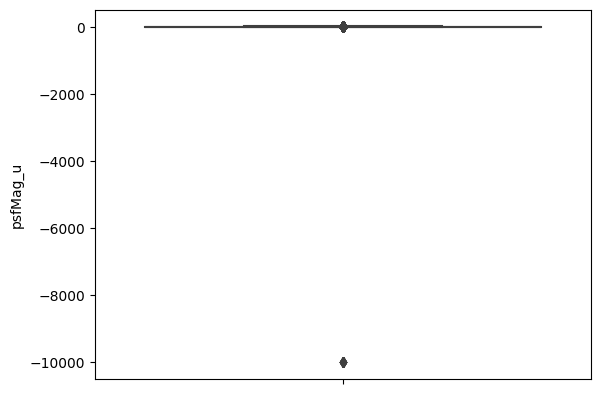

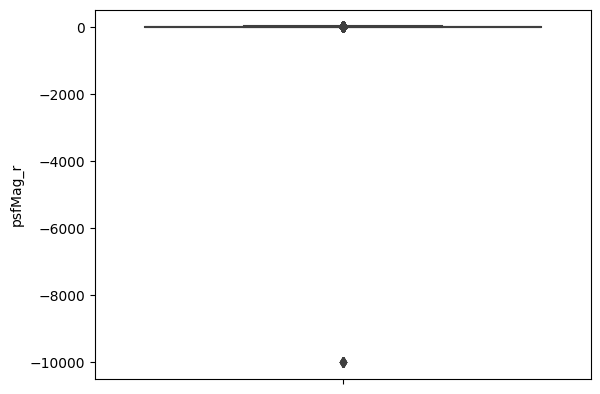

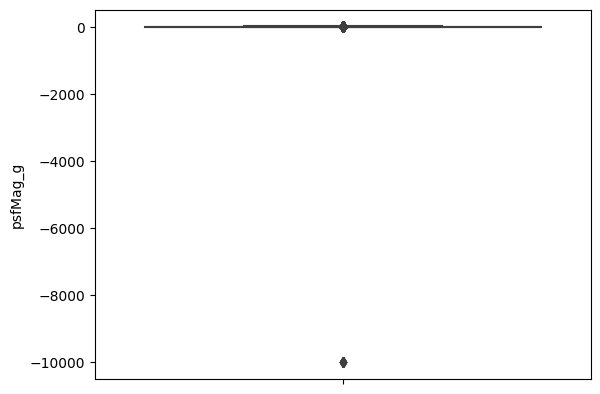

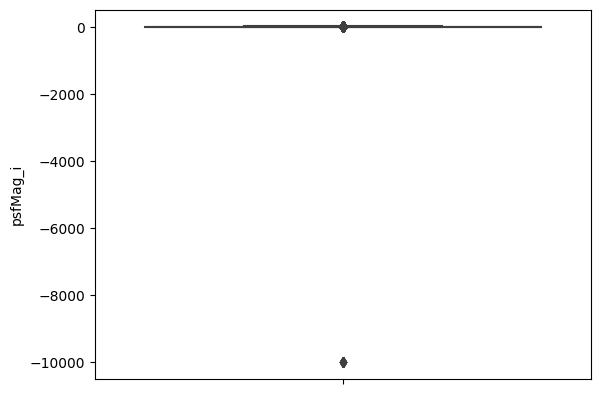

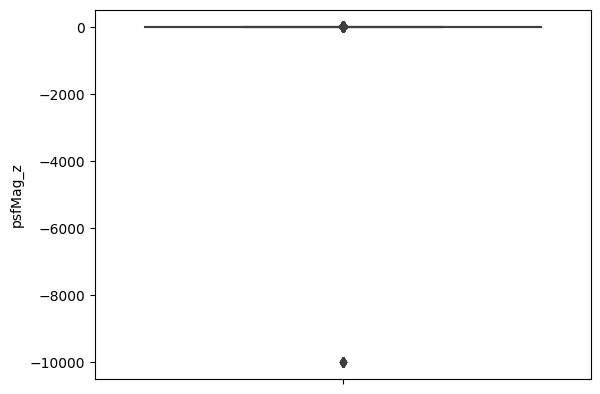

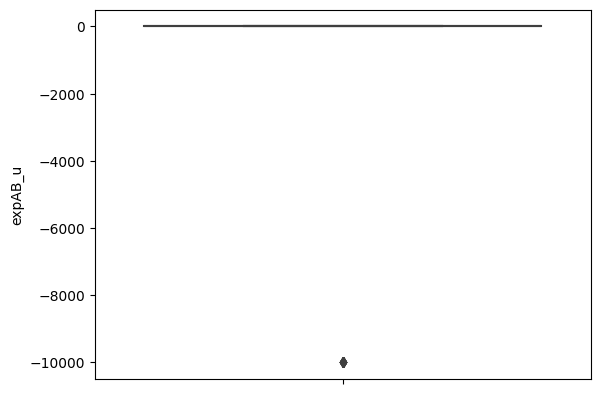

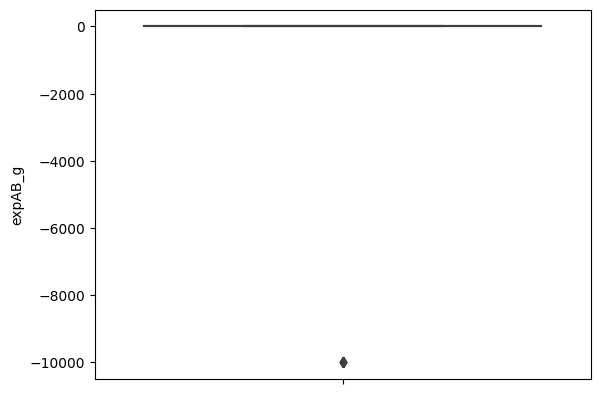

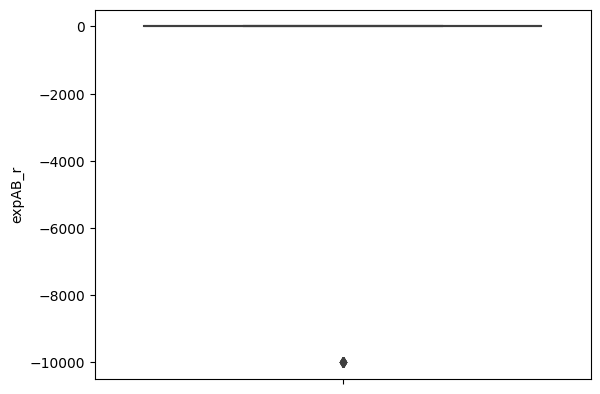

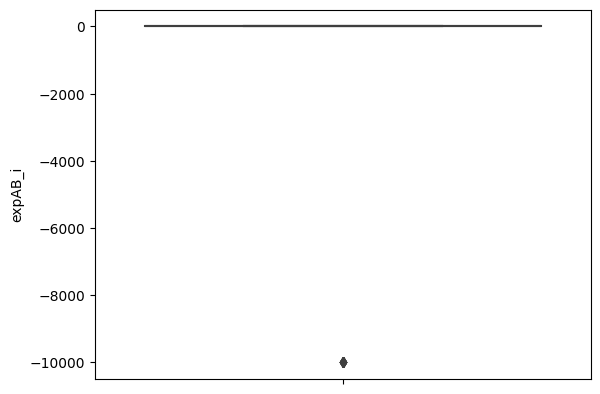

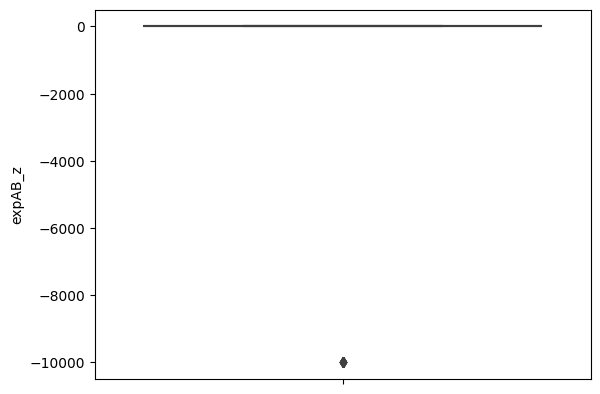

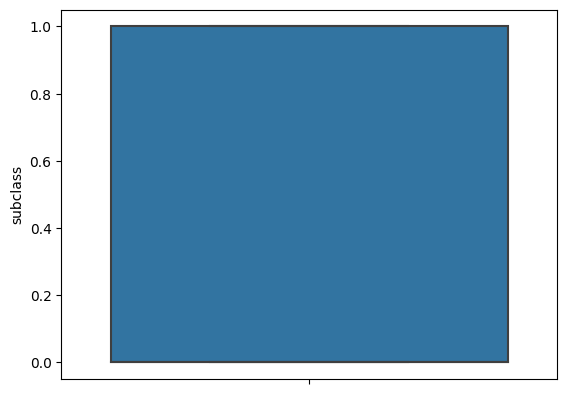

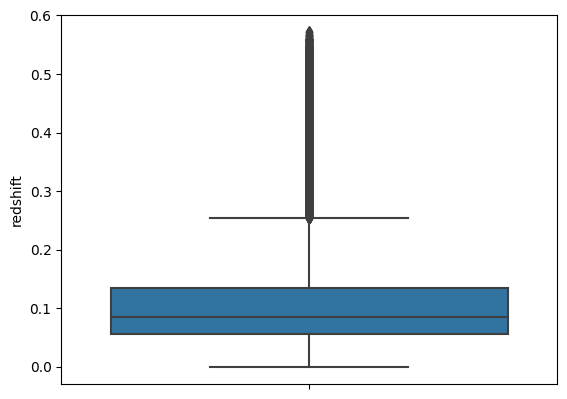

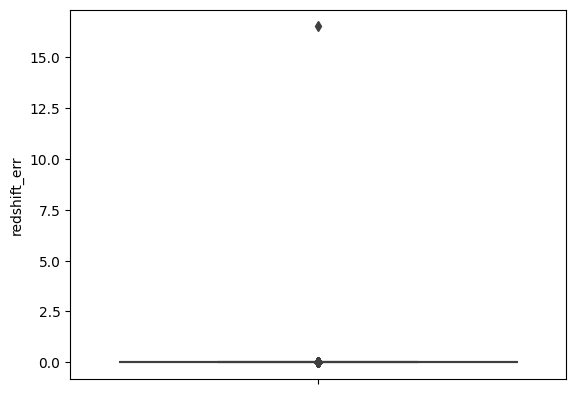

In [60]:
for i  in df.columns:
    func(i)

## Bivariate analysis
**Bivariate analysis is employed to explore the relationship between two features**

<Axes: xlabel='subclass', ylabel='i'>

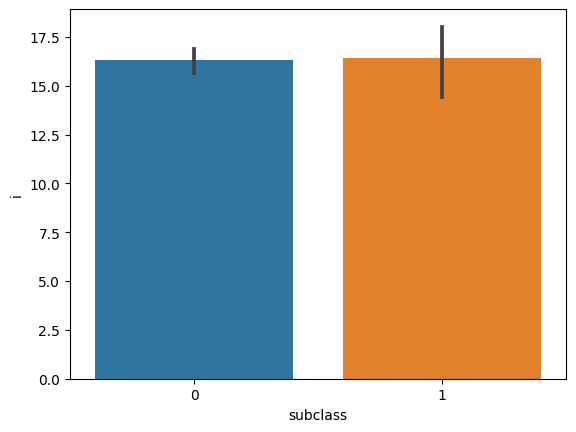

In [61]:
sns.barplot(x='subclass',y='i',data=df)

<Axes: xlabel='subclass', ylabel='z'>

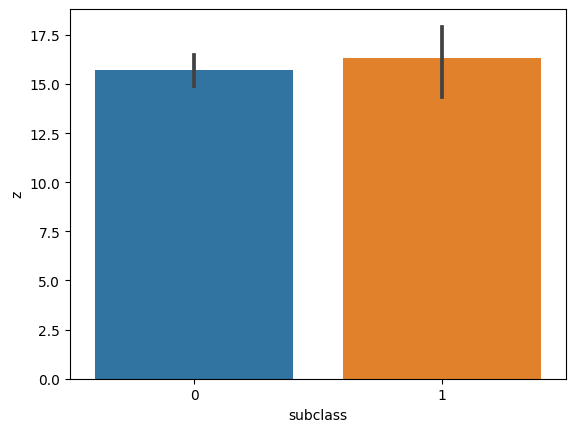

In [62]:
sns.barplot(x='subclass',y='z',data=df)

## Multivariate analysis

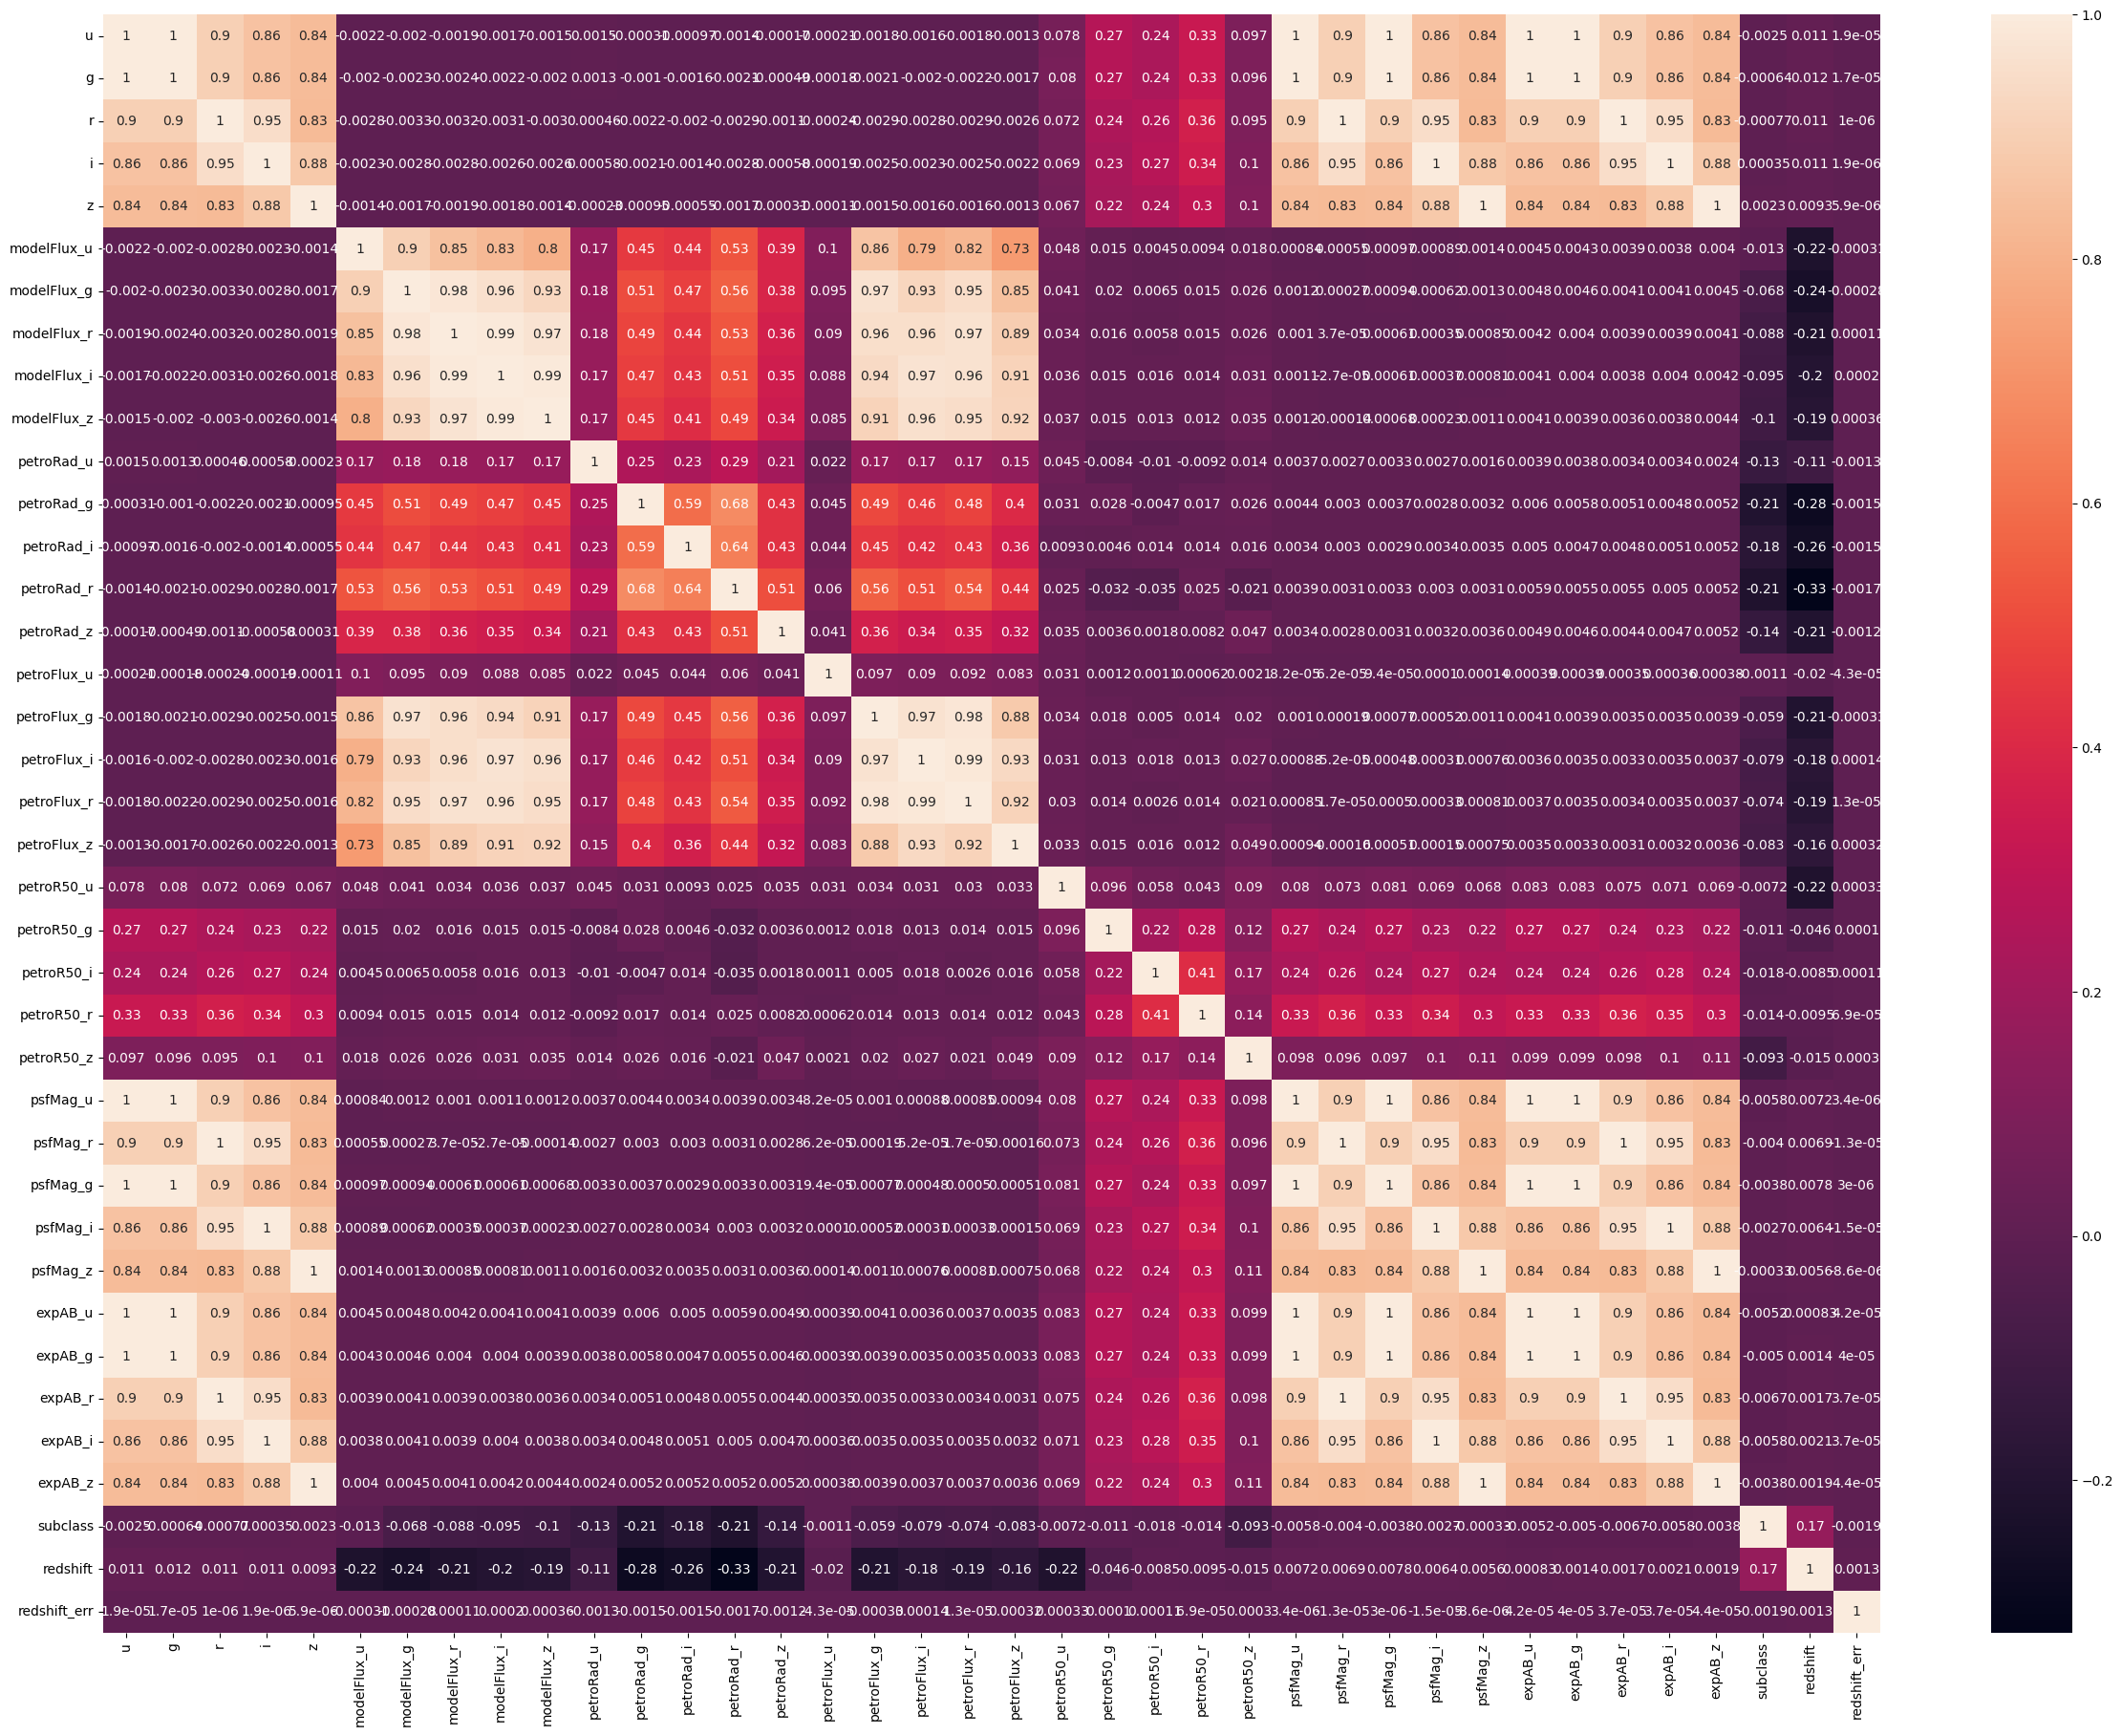

In [63]:

plt.figure(figsize=(30, 22))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Handling the outliers

<Axes: ylabel='u'>

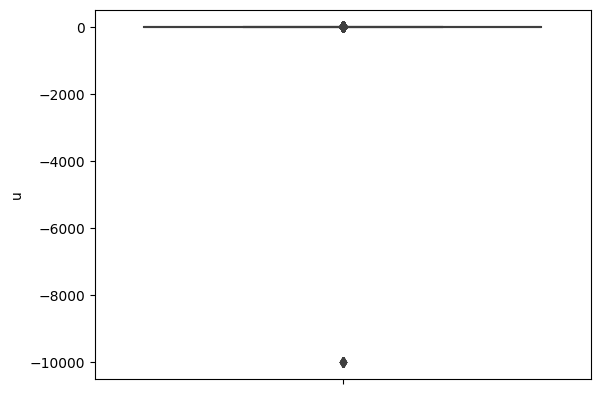

In [64]:
sns.boxplot(y='u',data=df)

In [65]:
quant=df['u'].quantile(q=[0.75,0.25])
quant

0.75    20.079470
0.25    18.762215
Name: u, dtype: float64

In [66]:
Q3=quant.loc[0.75]
Q3

20.07947

In [67]:
Q1=quant.loc[0.25]
Q1

18.762214999999998

In [68]:
IQR=Q3-Q1
IQR

1.317255000000003

In [69]:
maxwhisker=Q3+1.5*IQR
maxwhisker

22.055352500000005

In [70]:
minwhisker=Q1-1.5*IQR
minwhisker

16.786332499999993

In [71]:
df['u']=np.where(df['u']>20.07947,20.07947,df['u'])
df['u']=np.where(df['u']<18.762214999999998,18.762214999999998,df['u'])

<Axes: ylabel='u'>

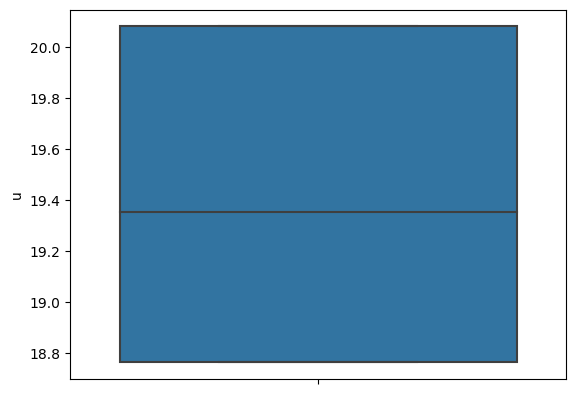

In [72]:
sns.boxplot(y='u',data=df)

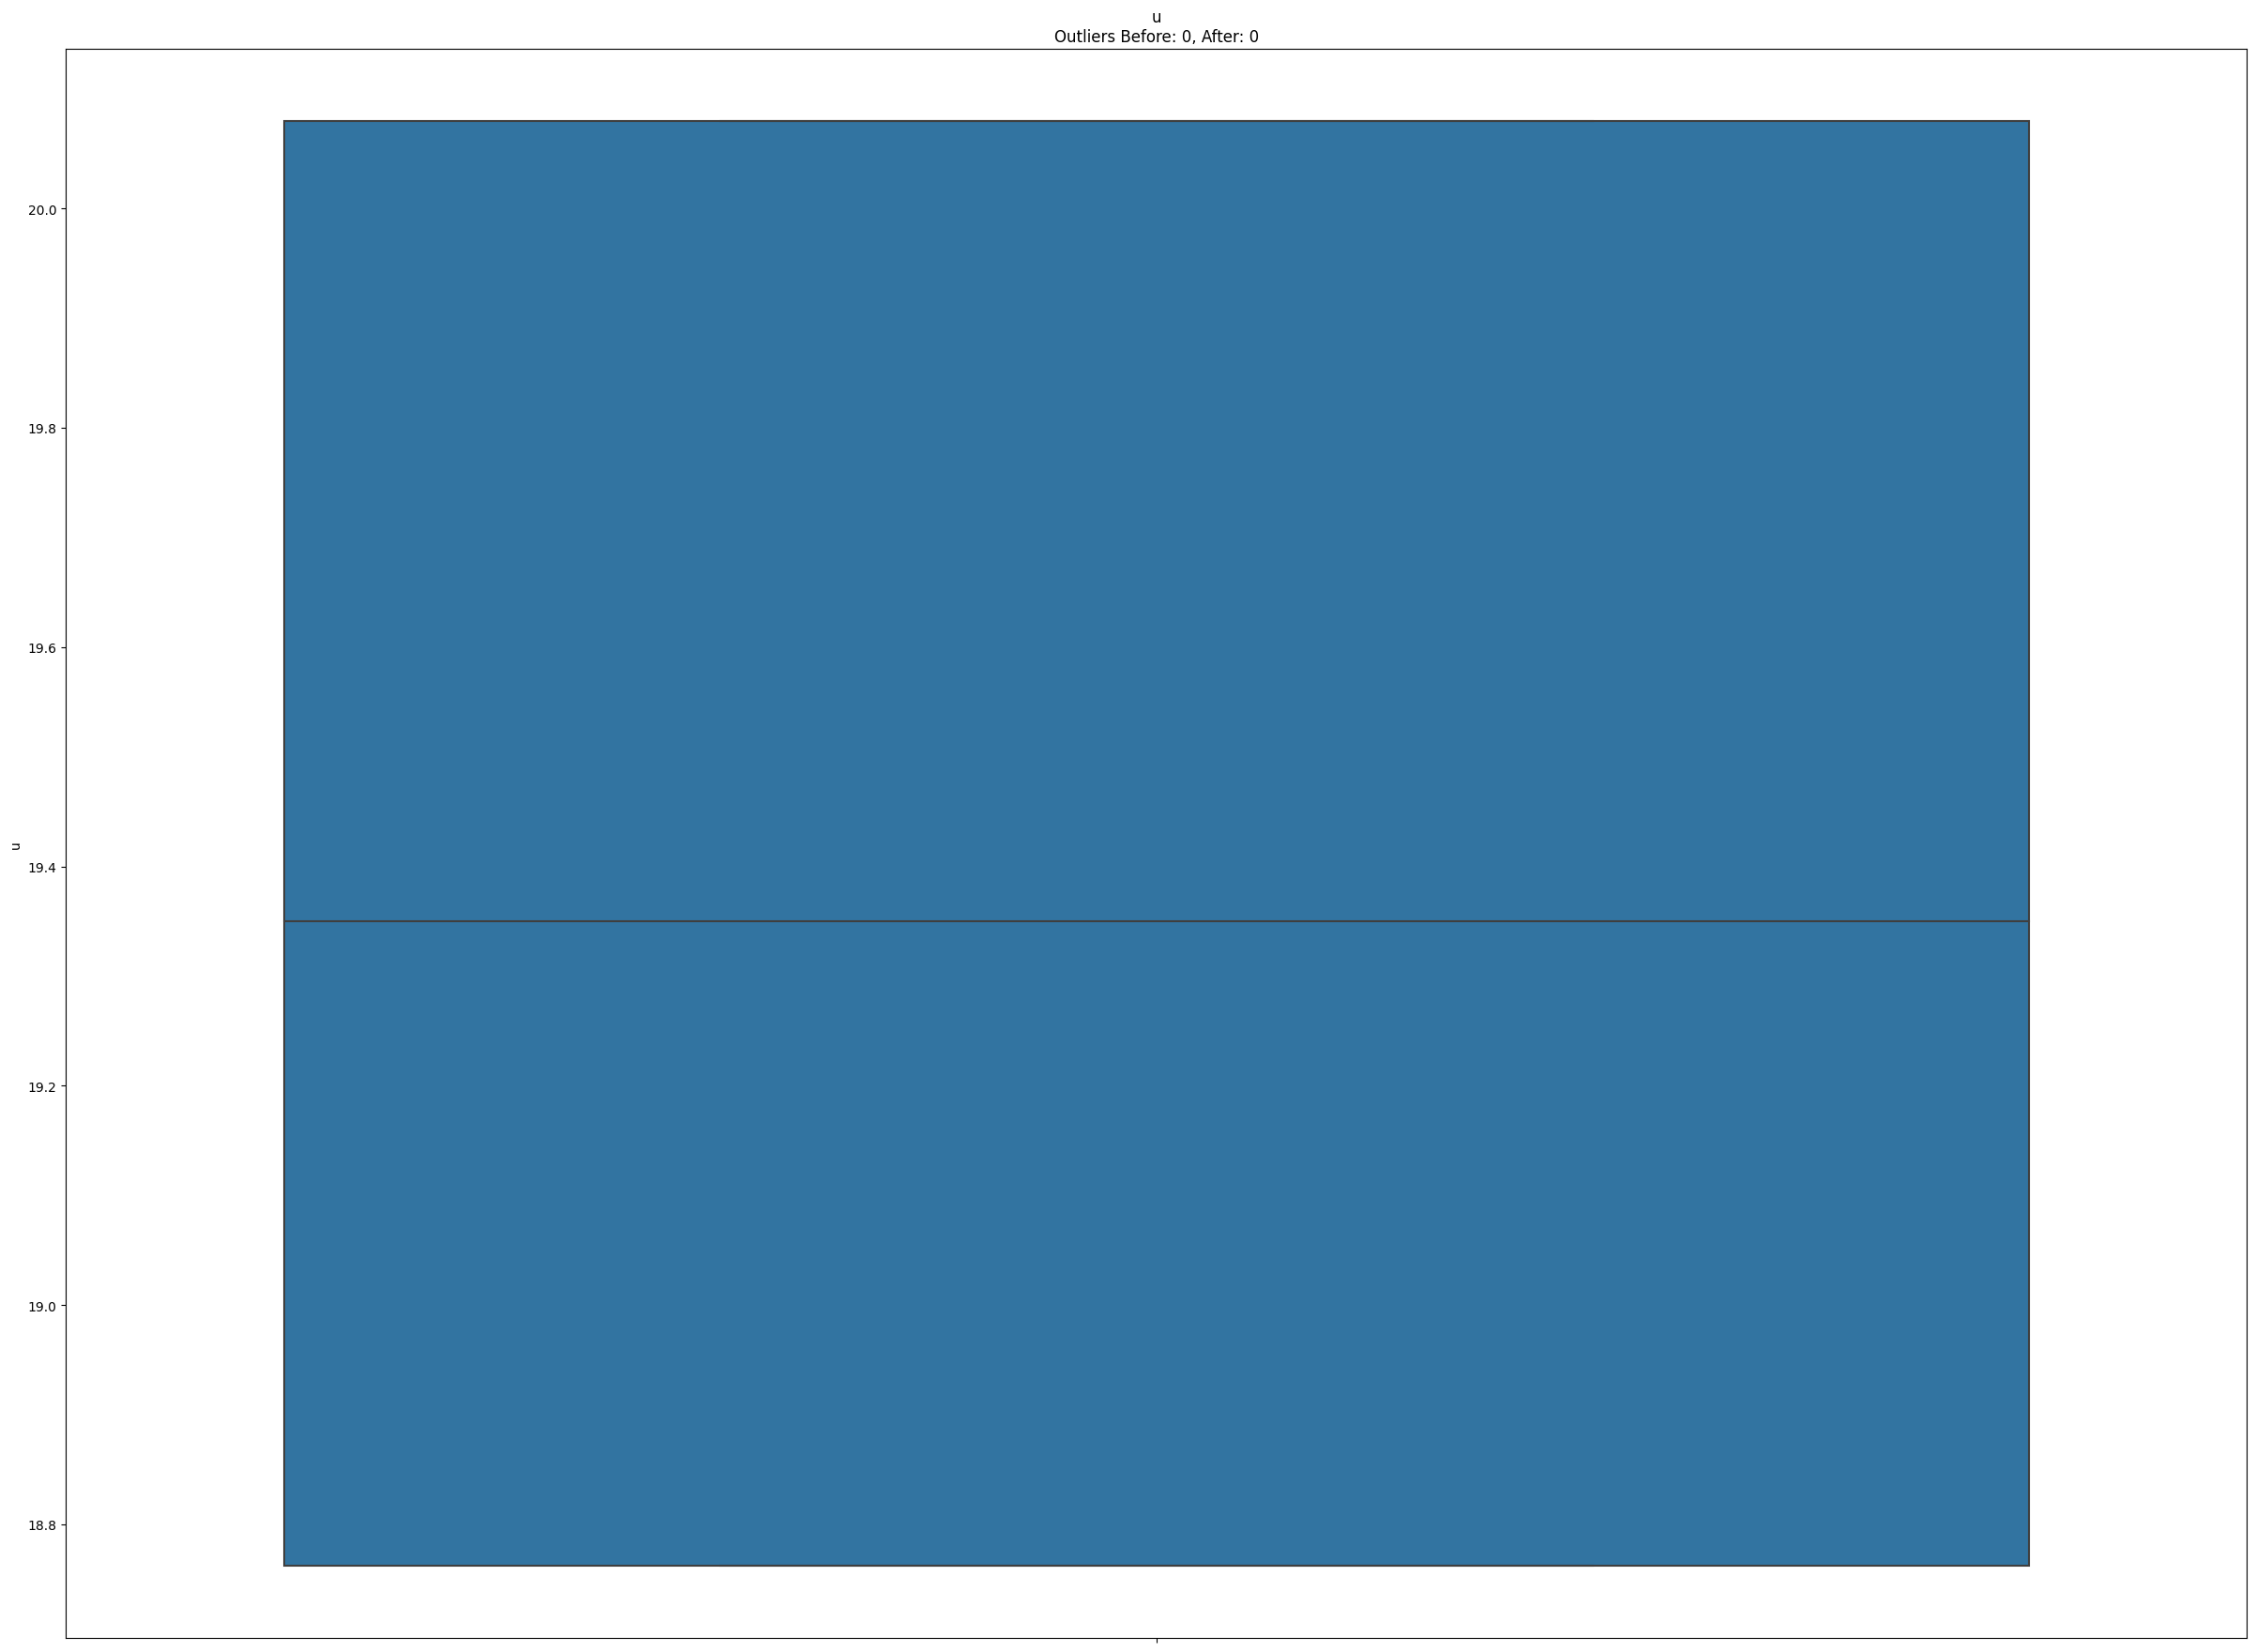

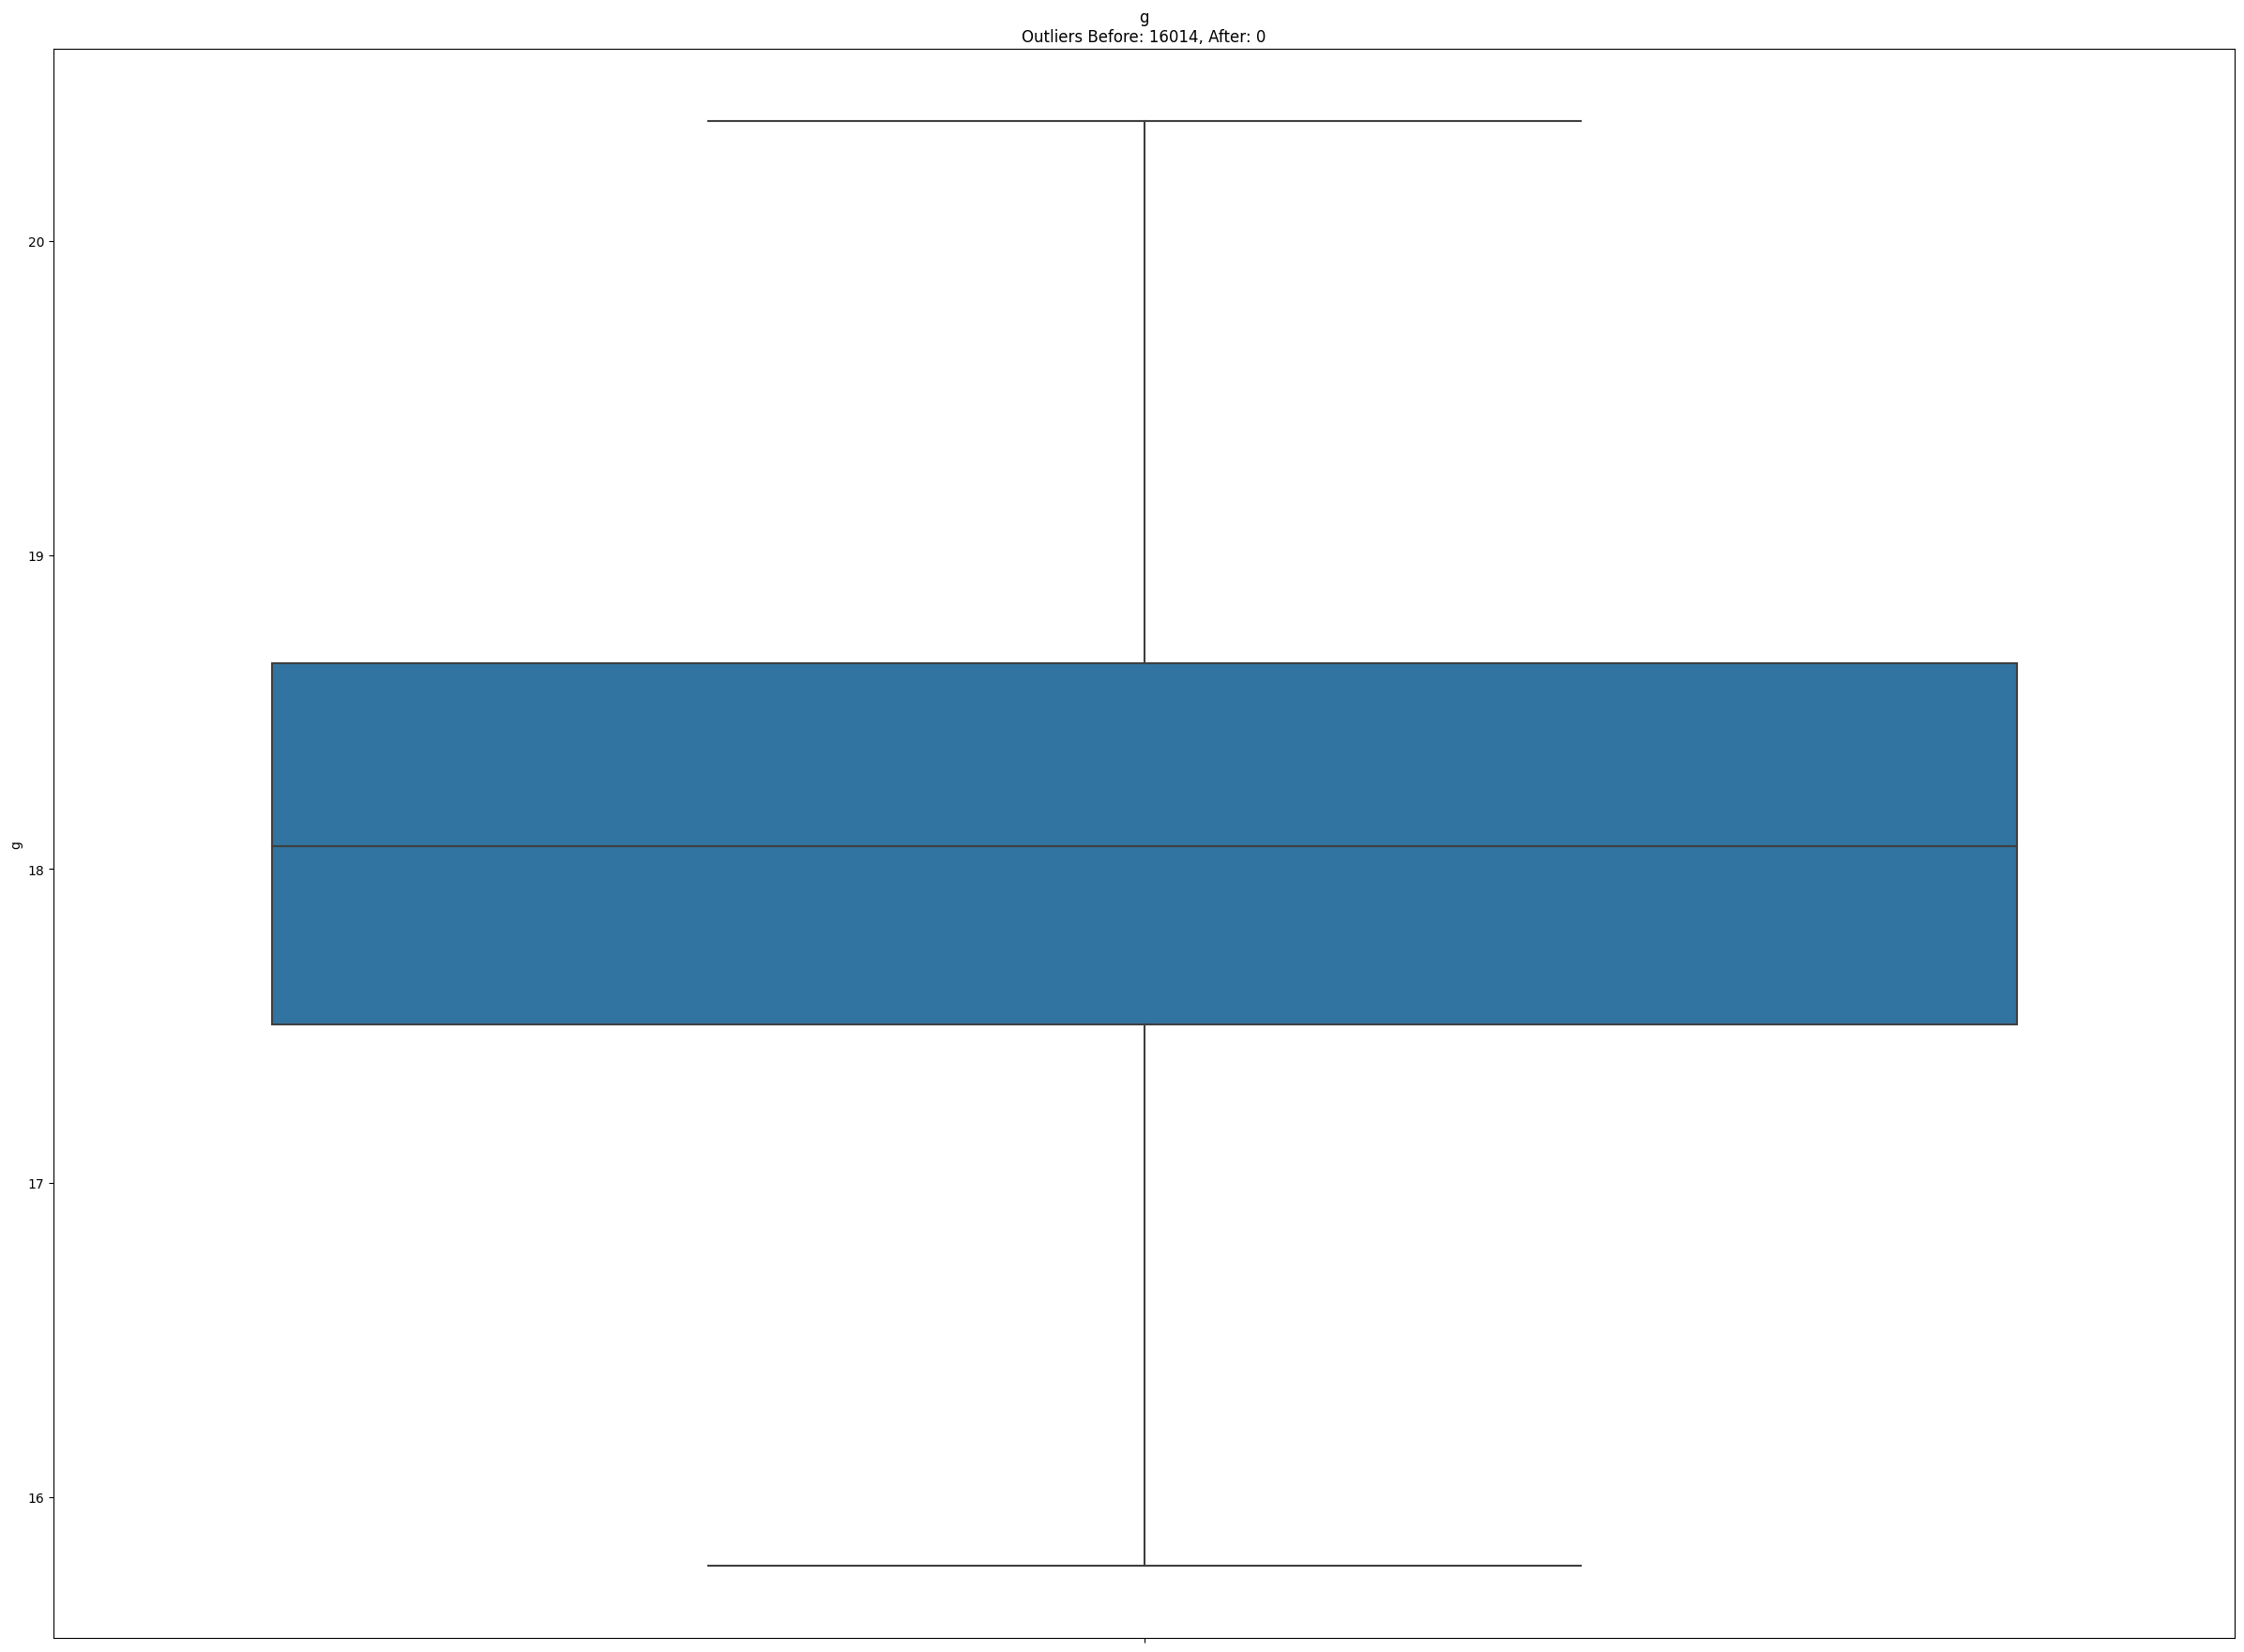

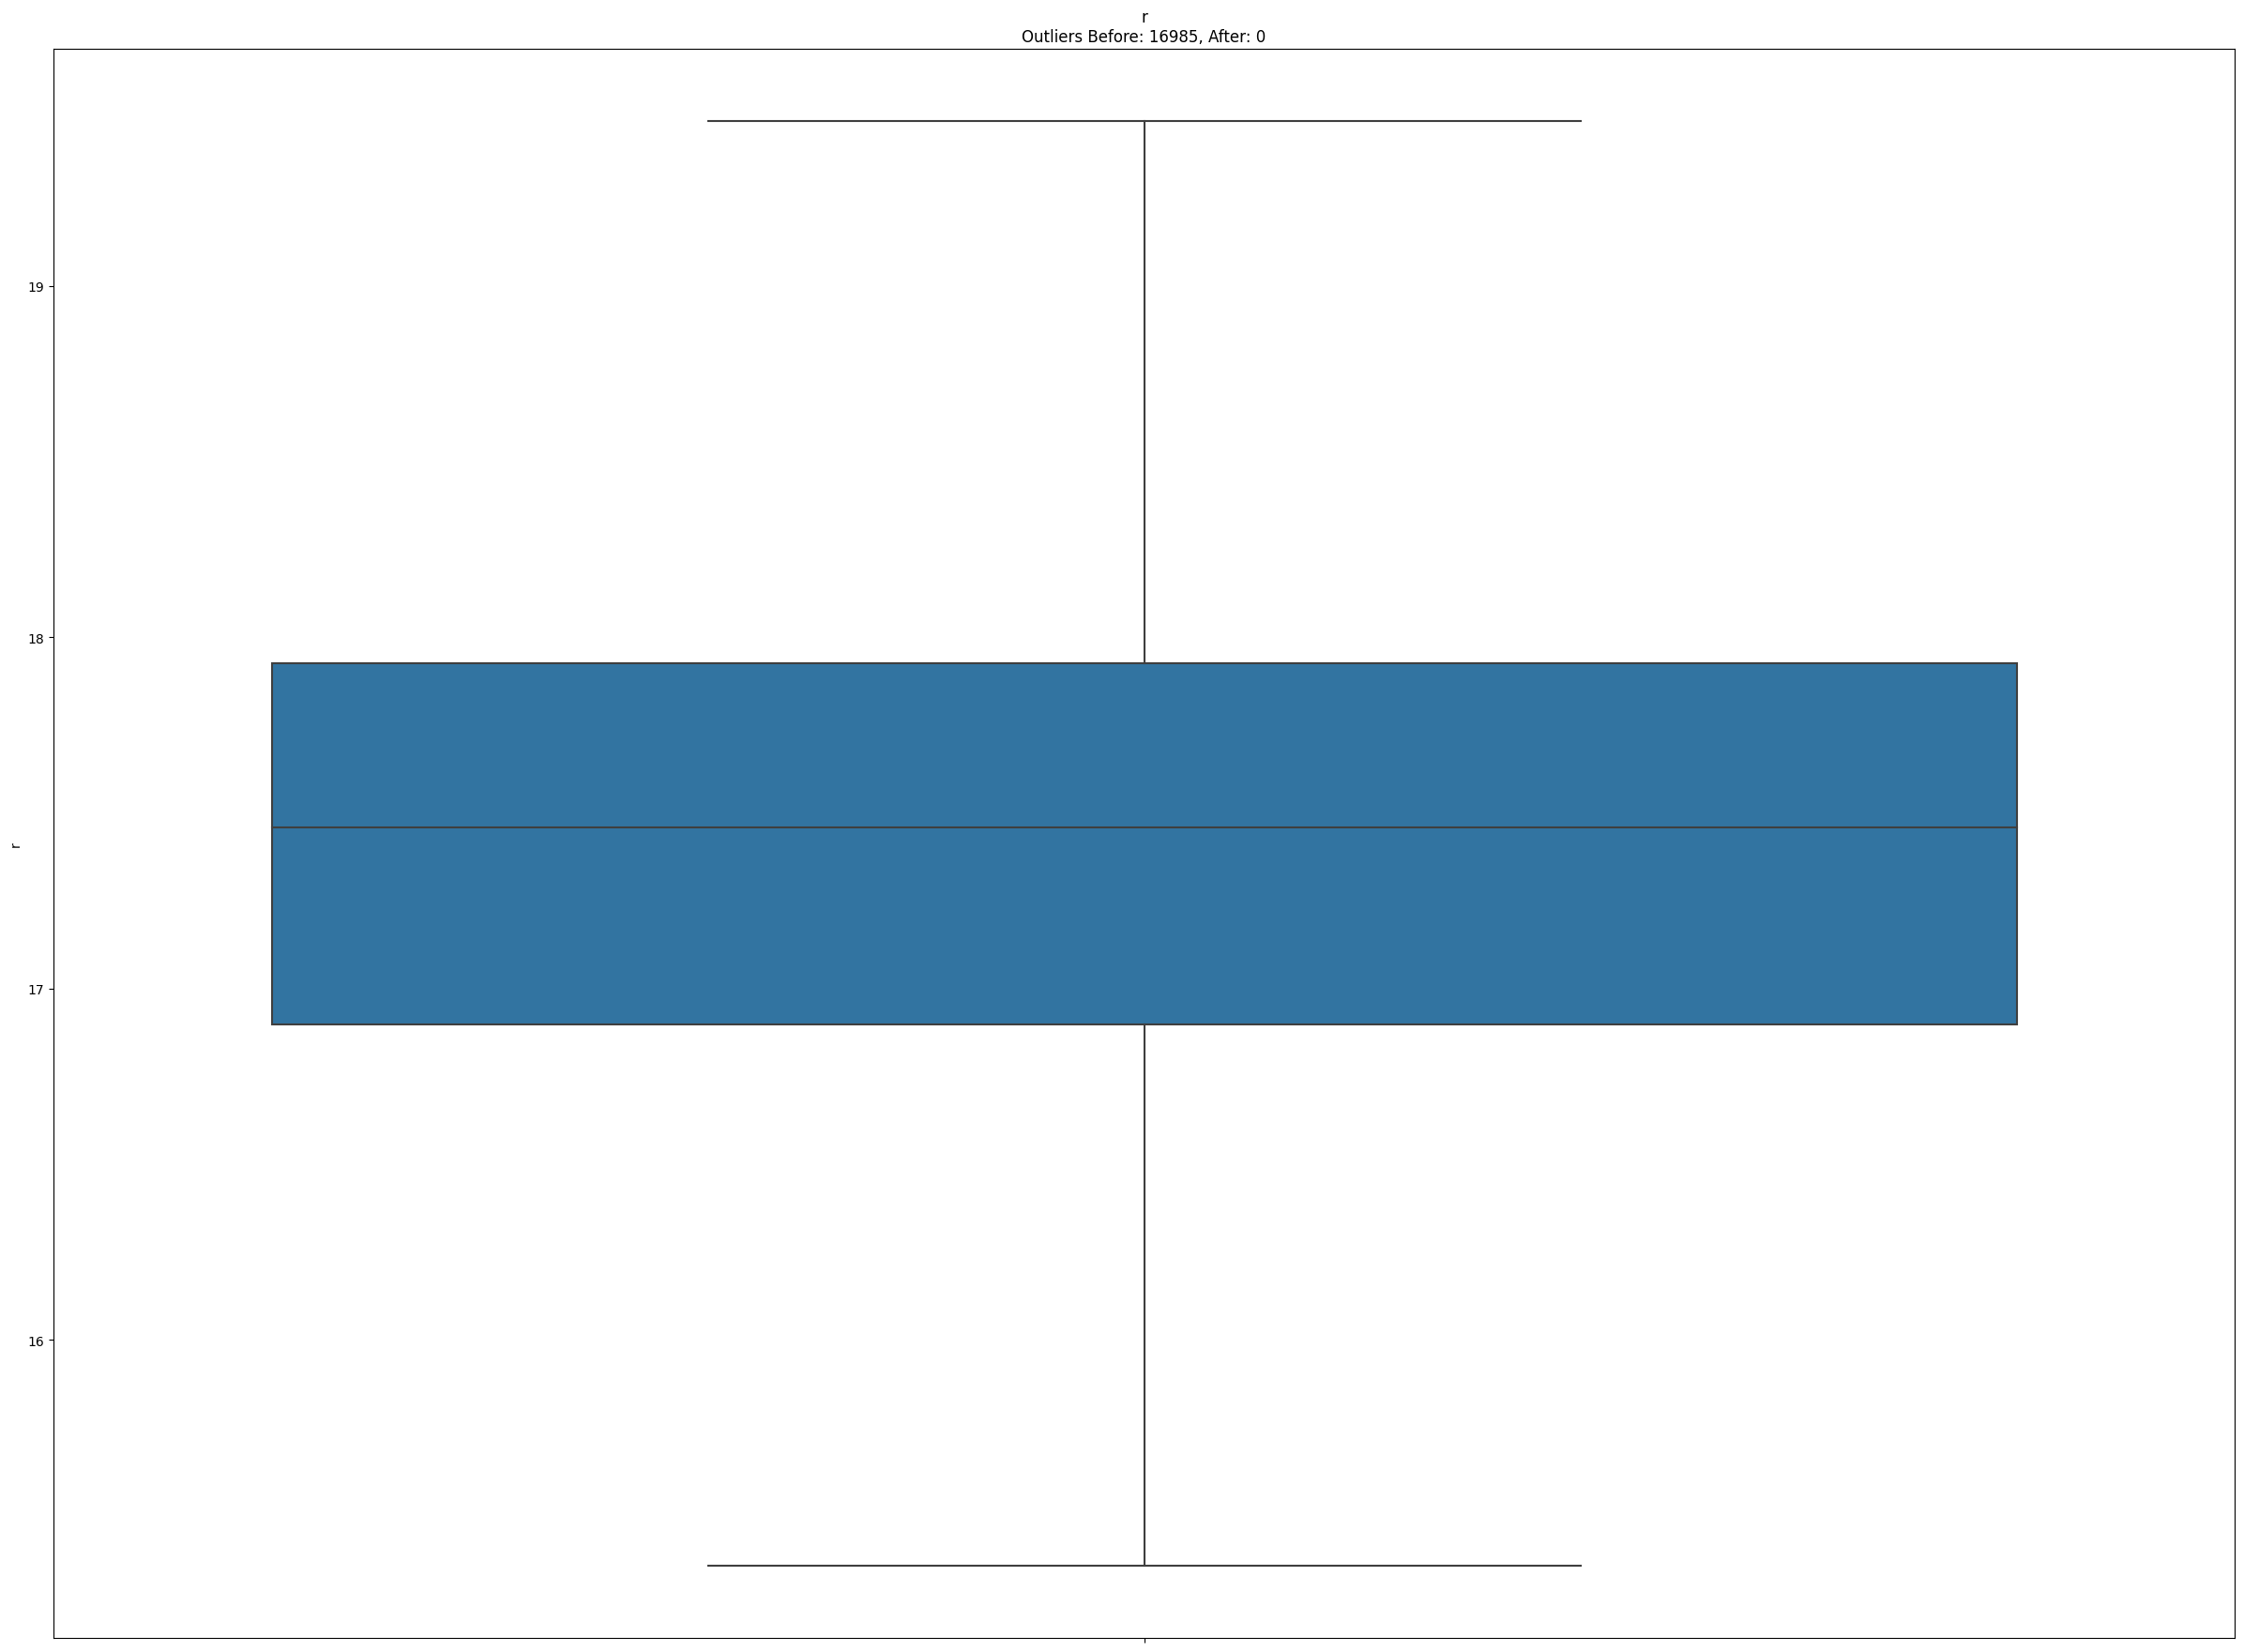

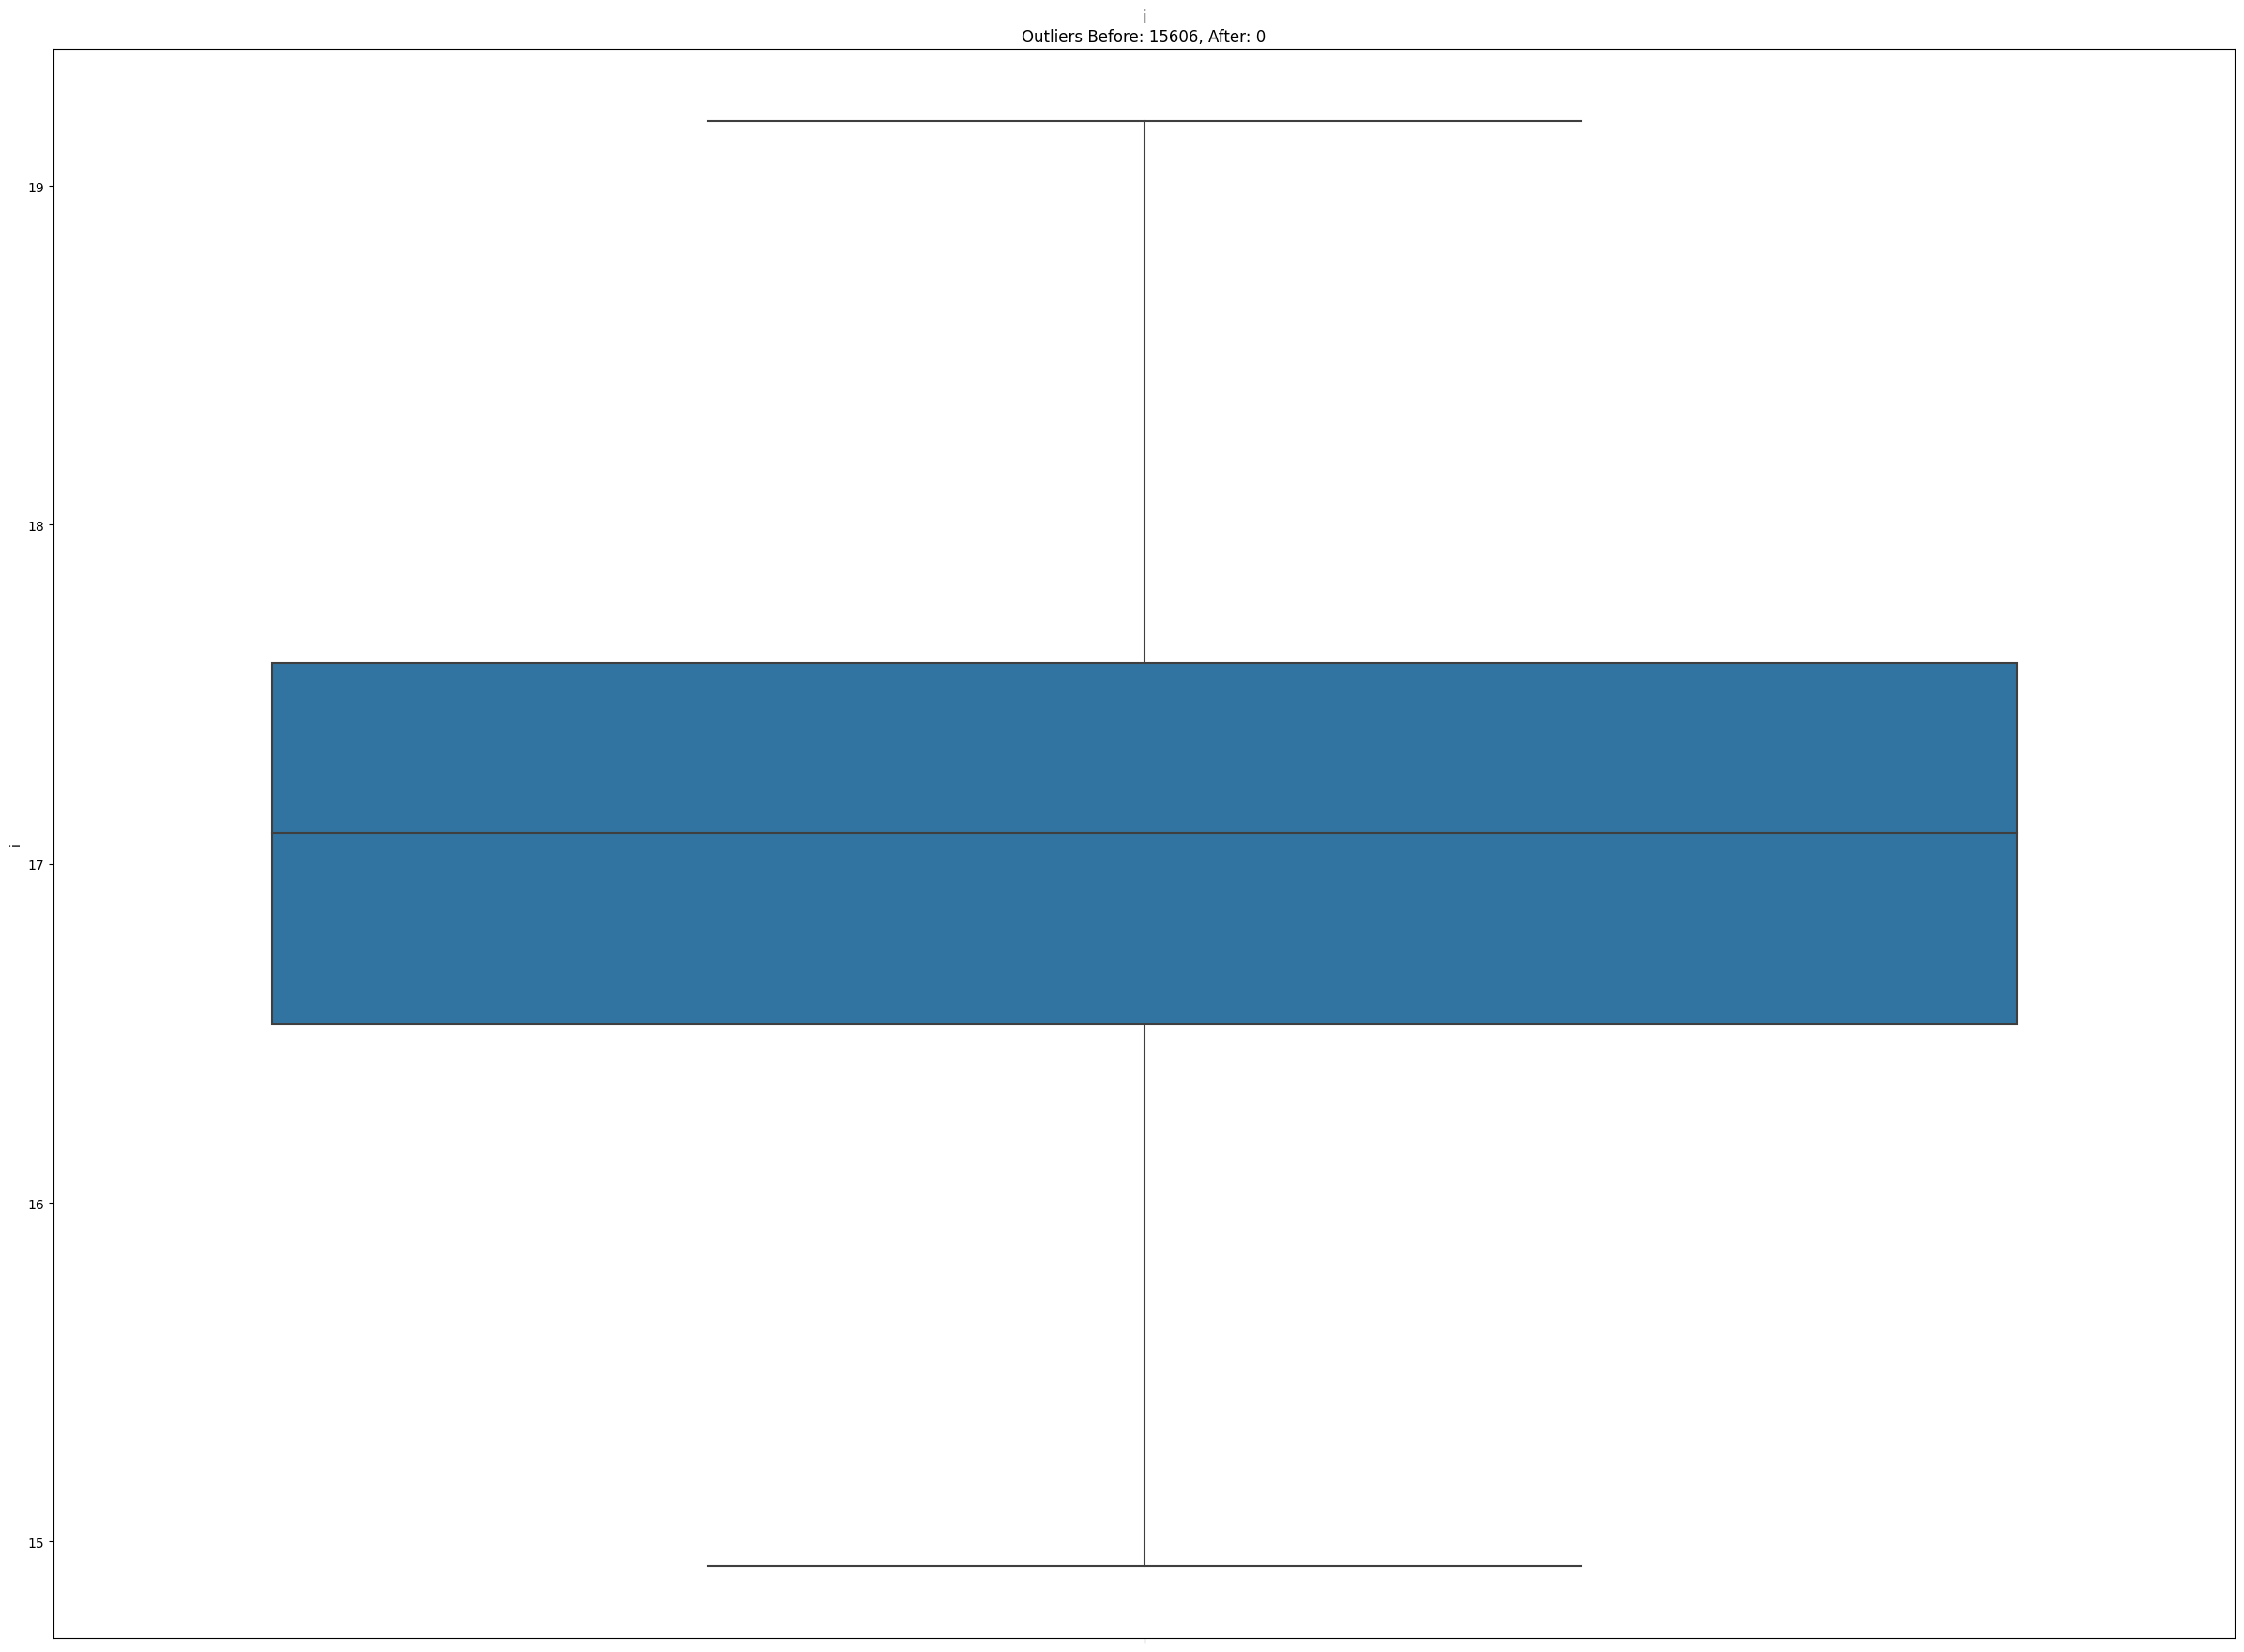

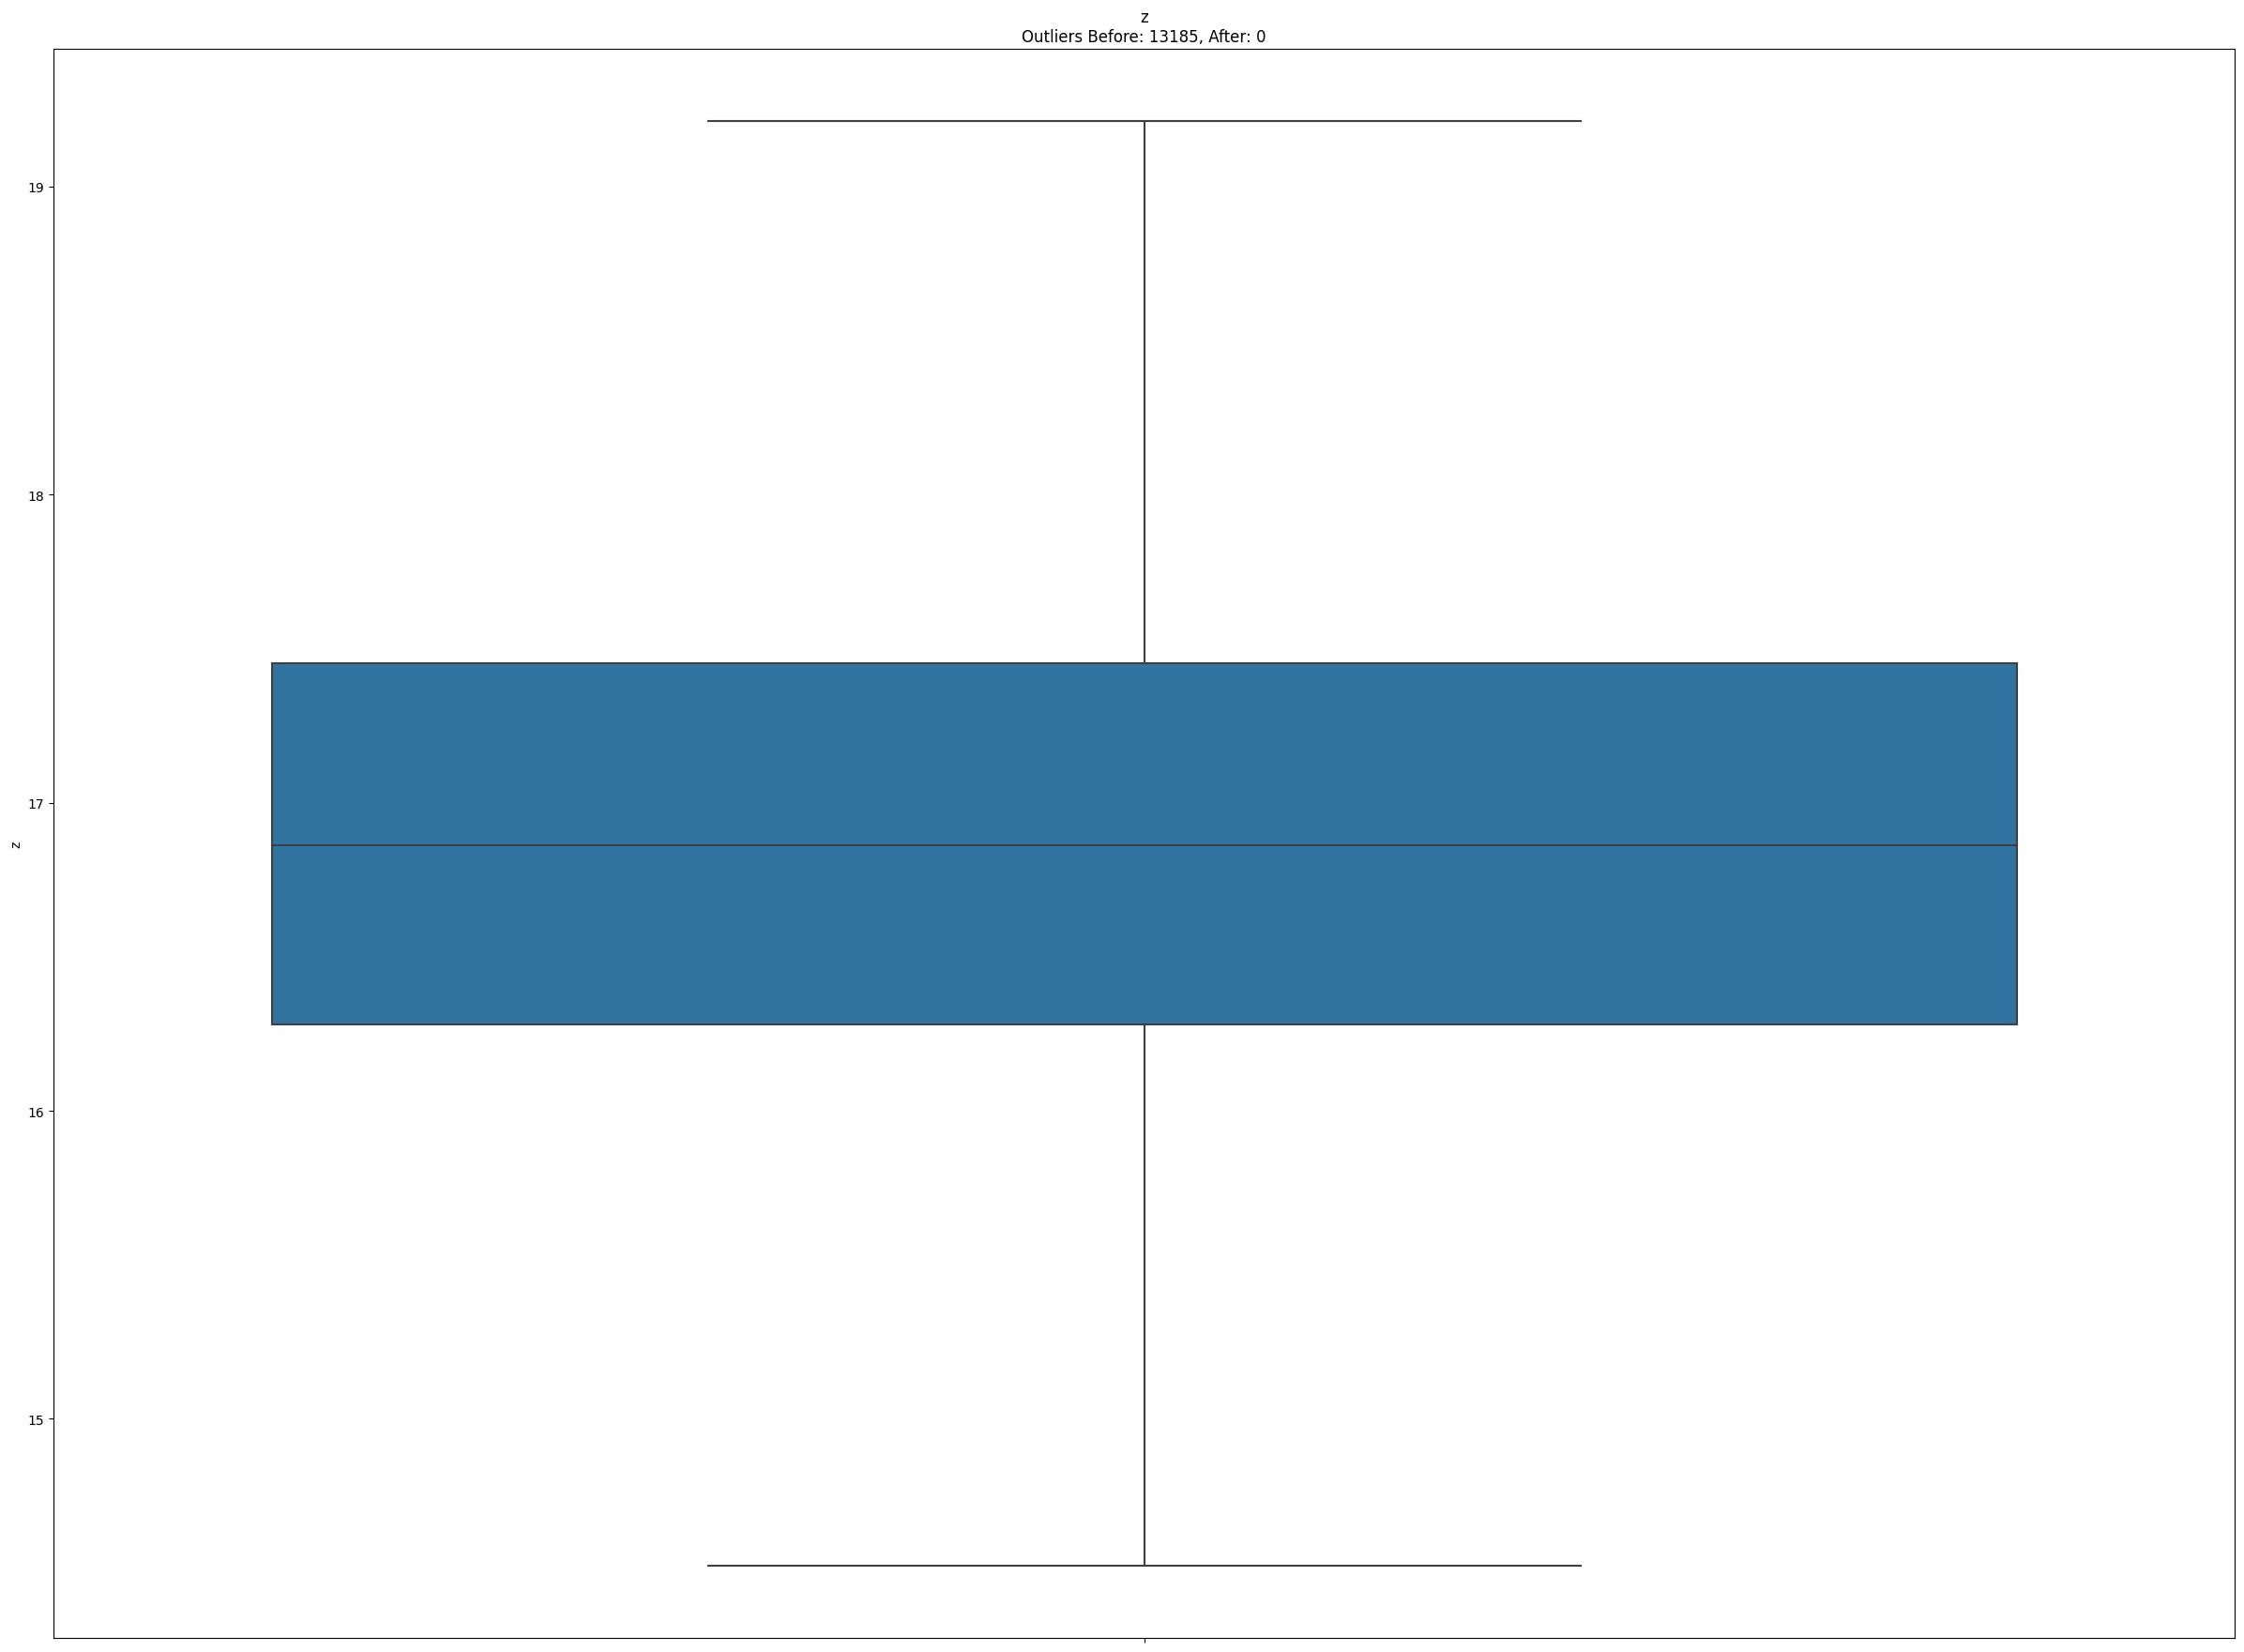

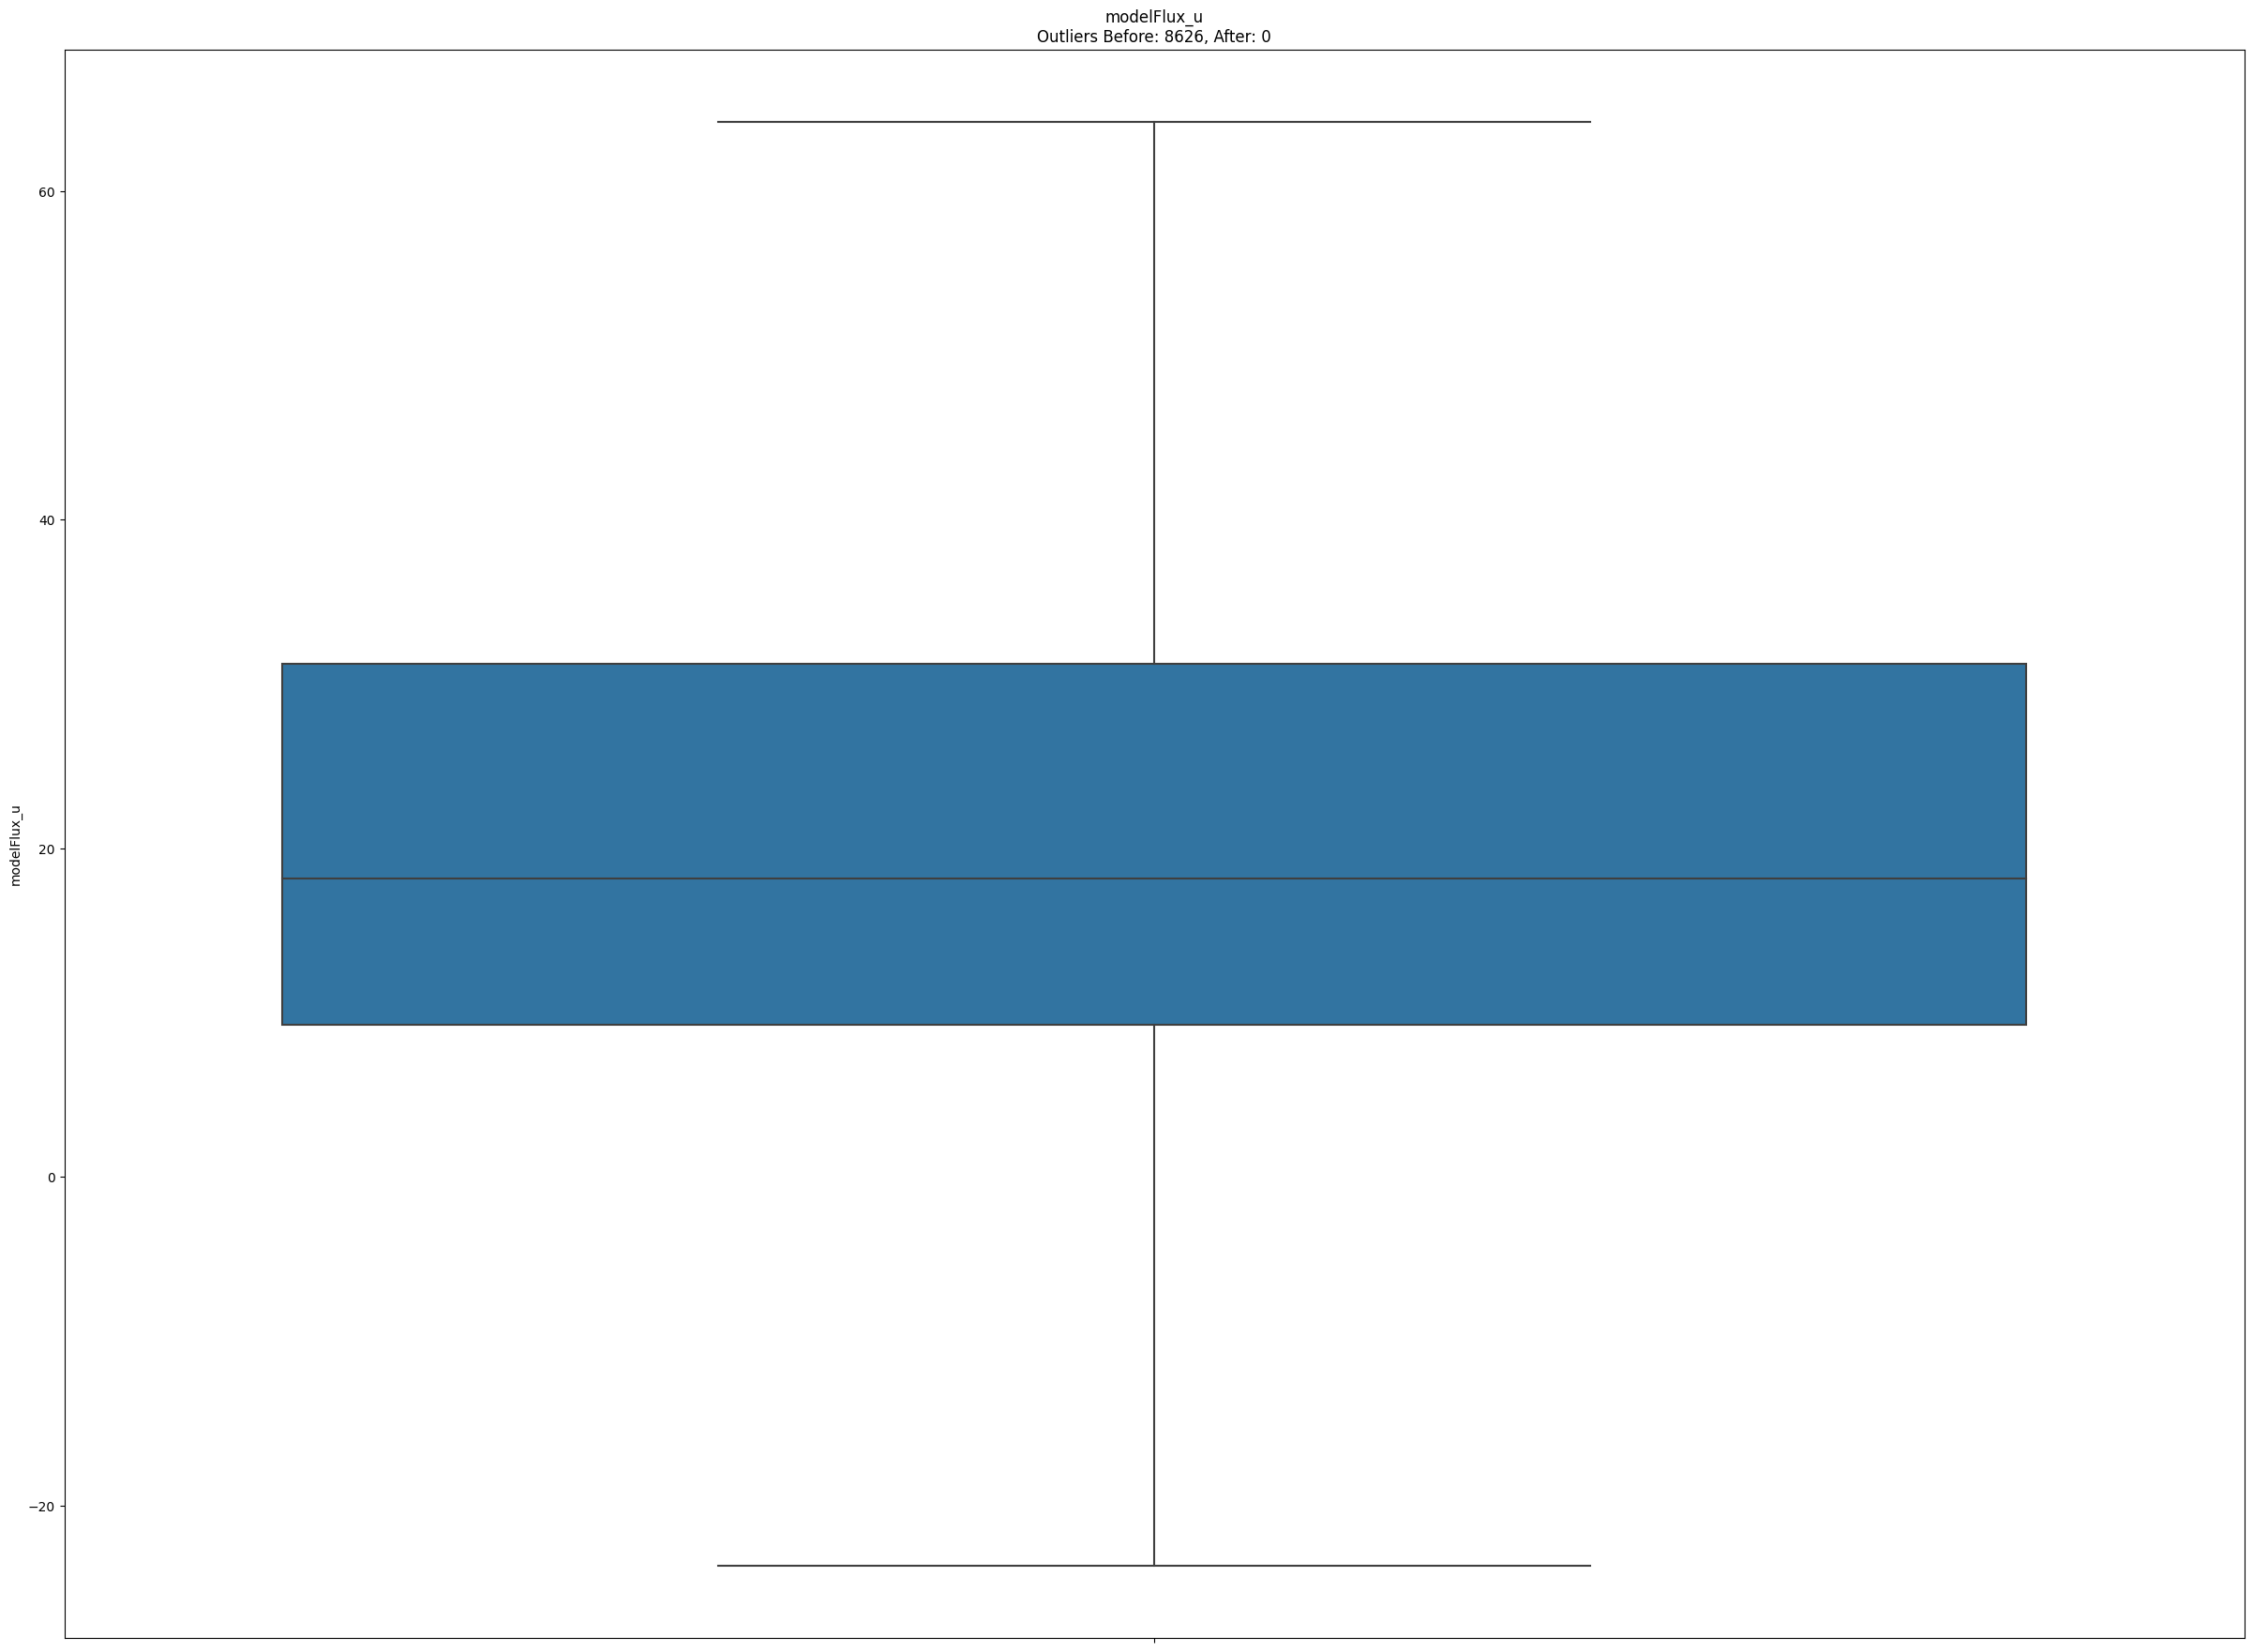

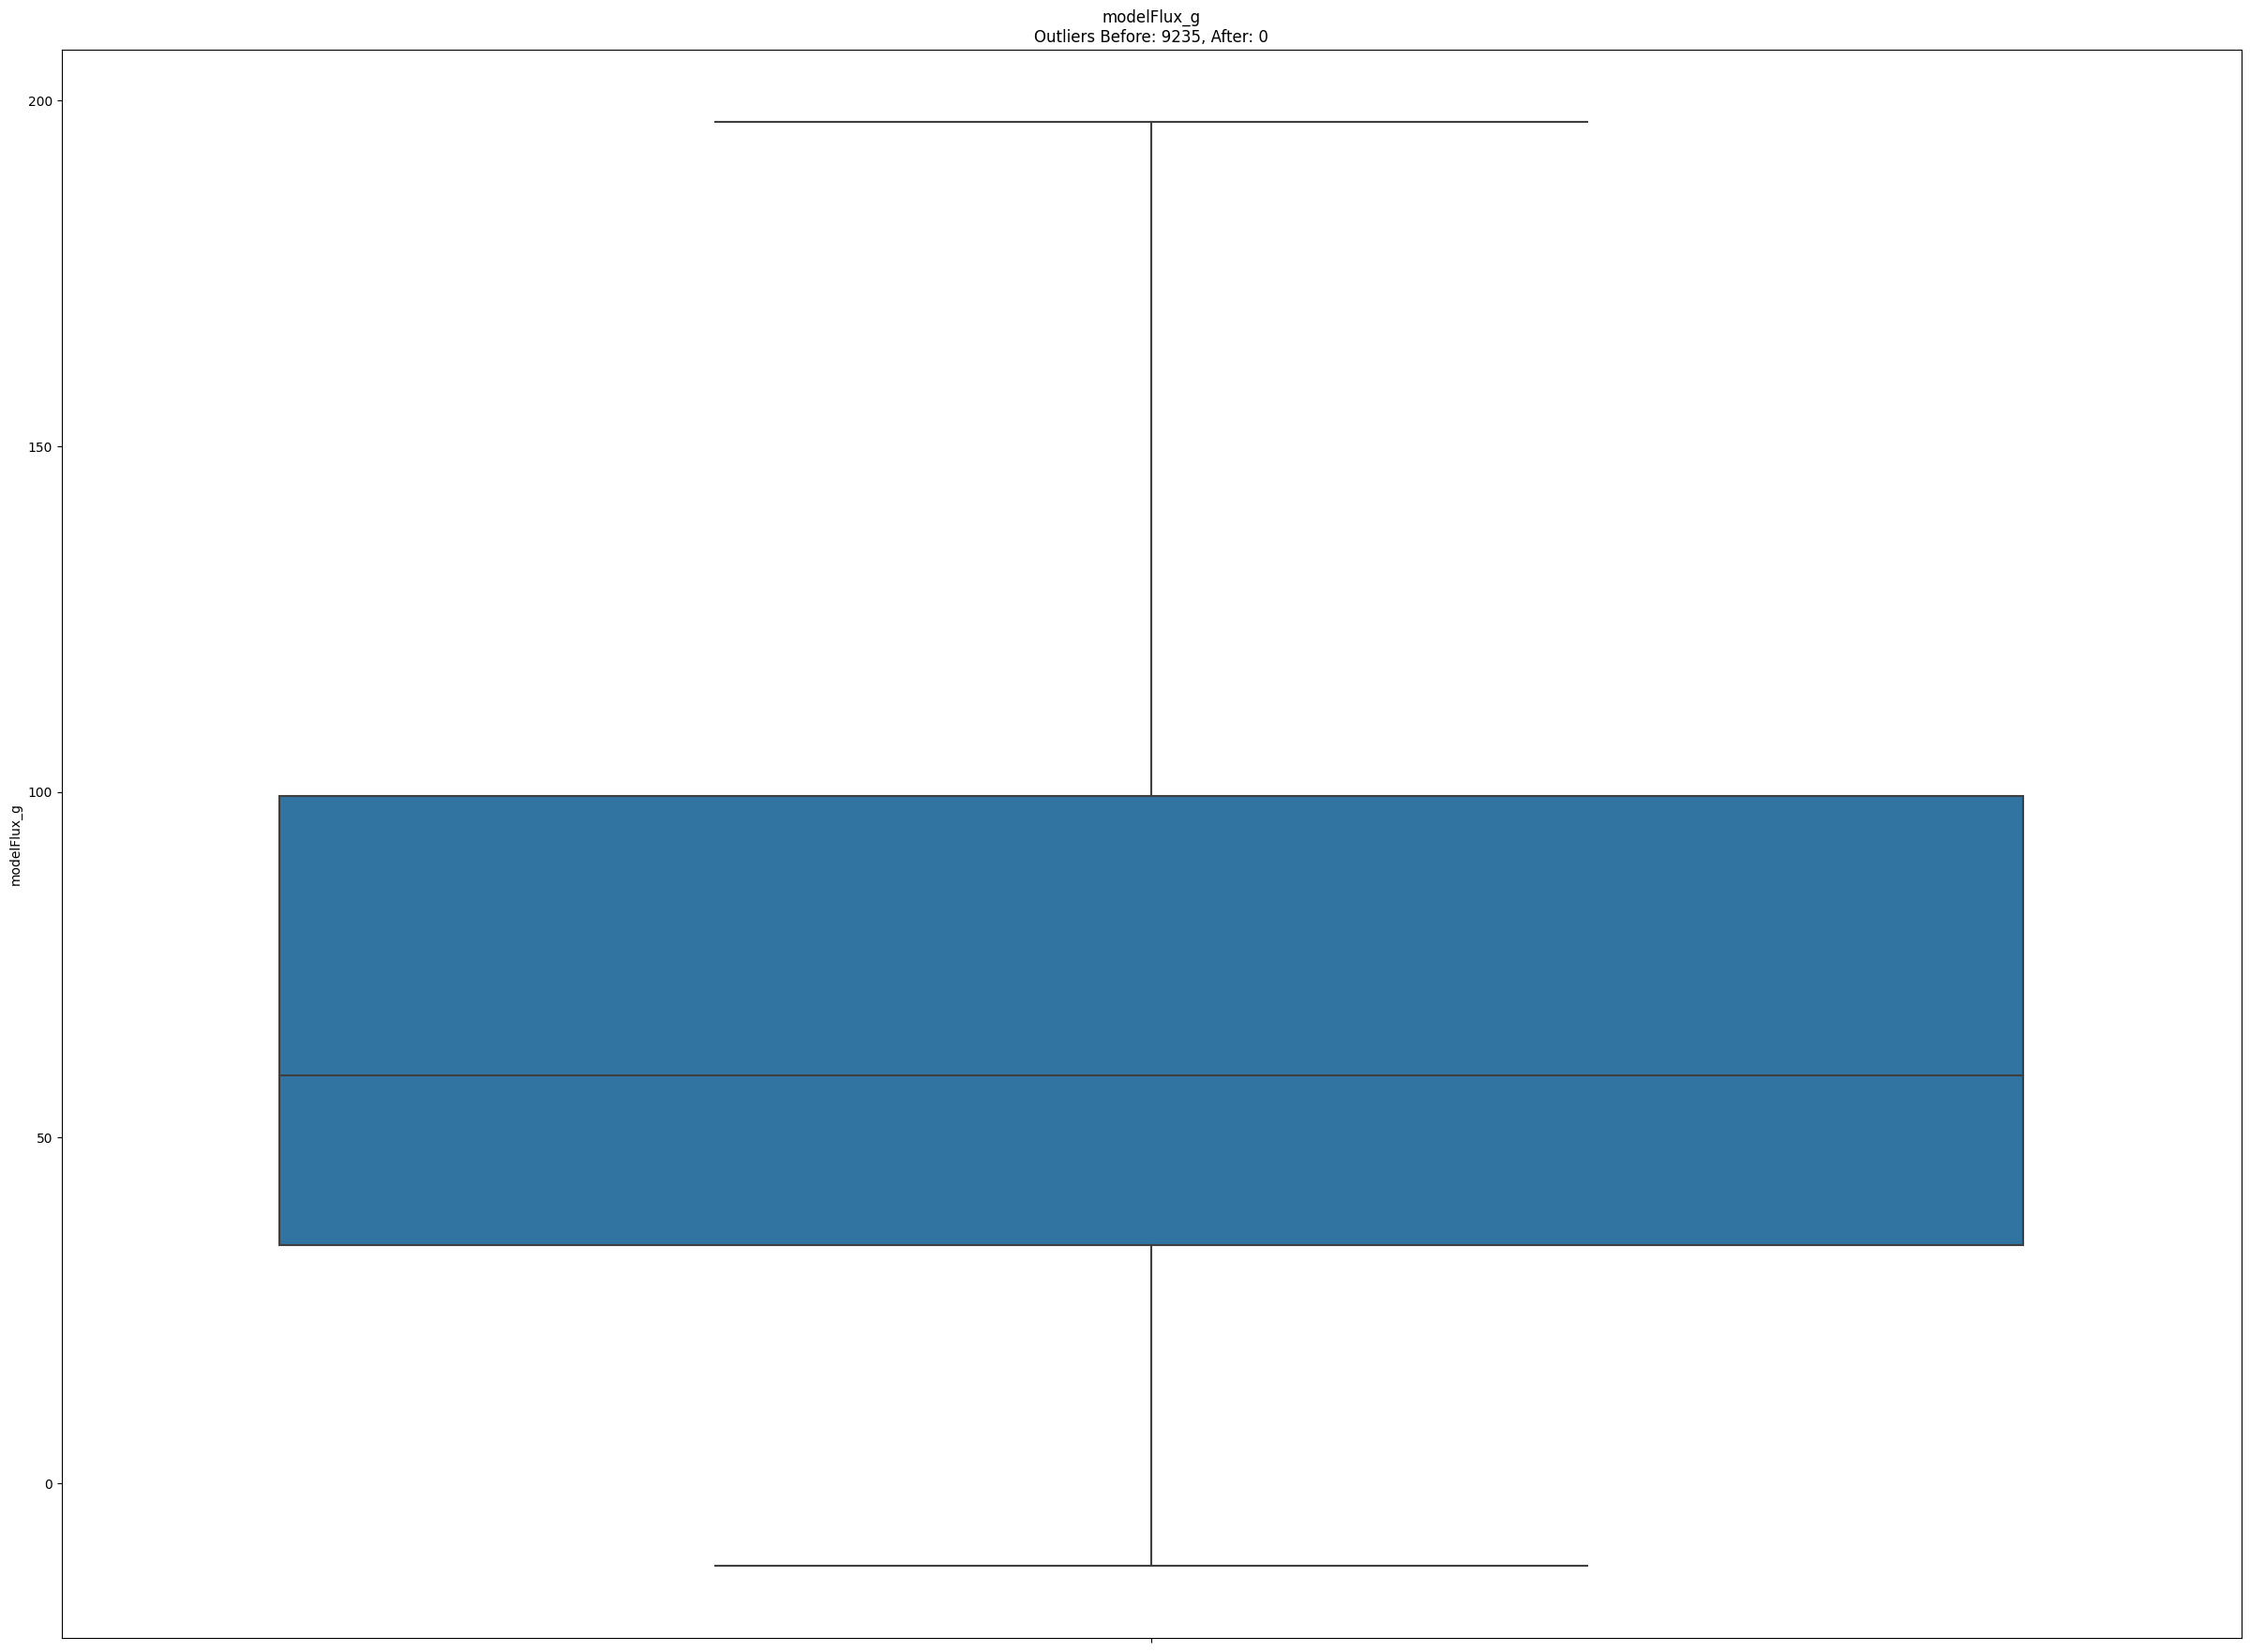

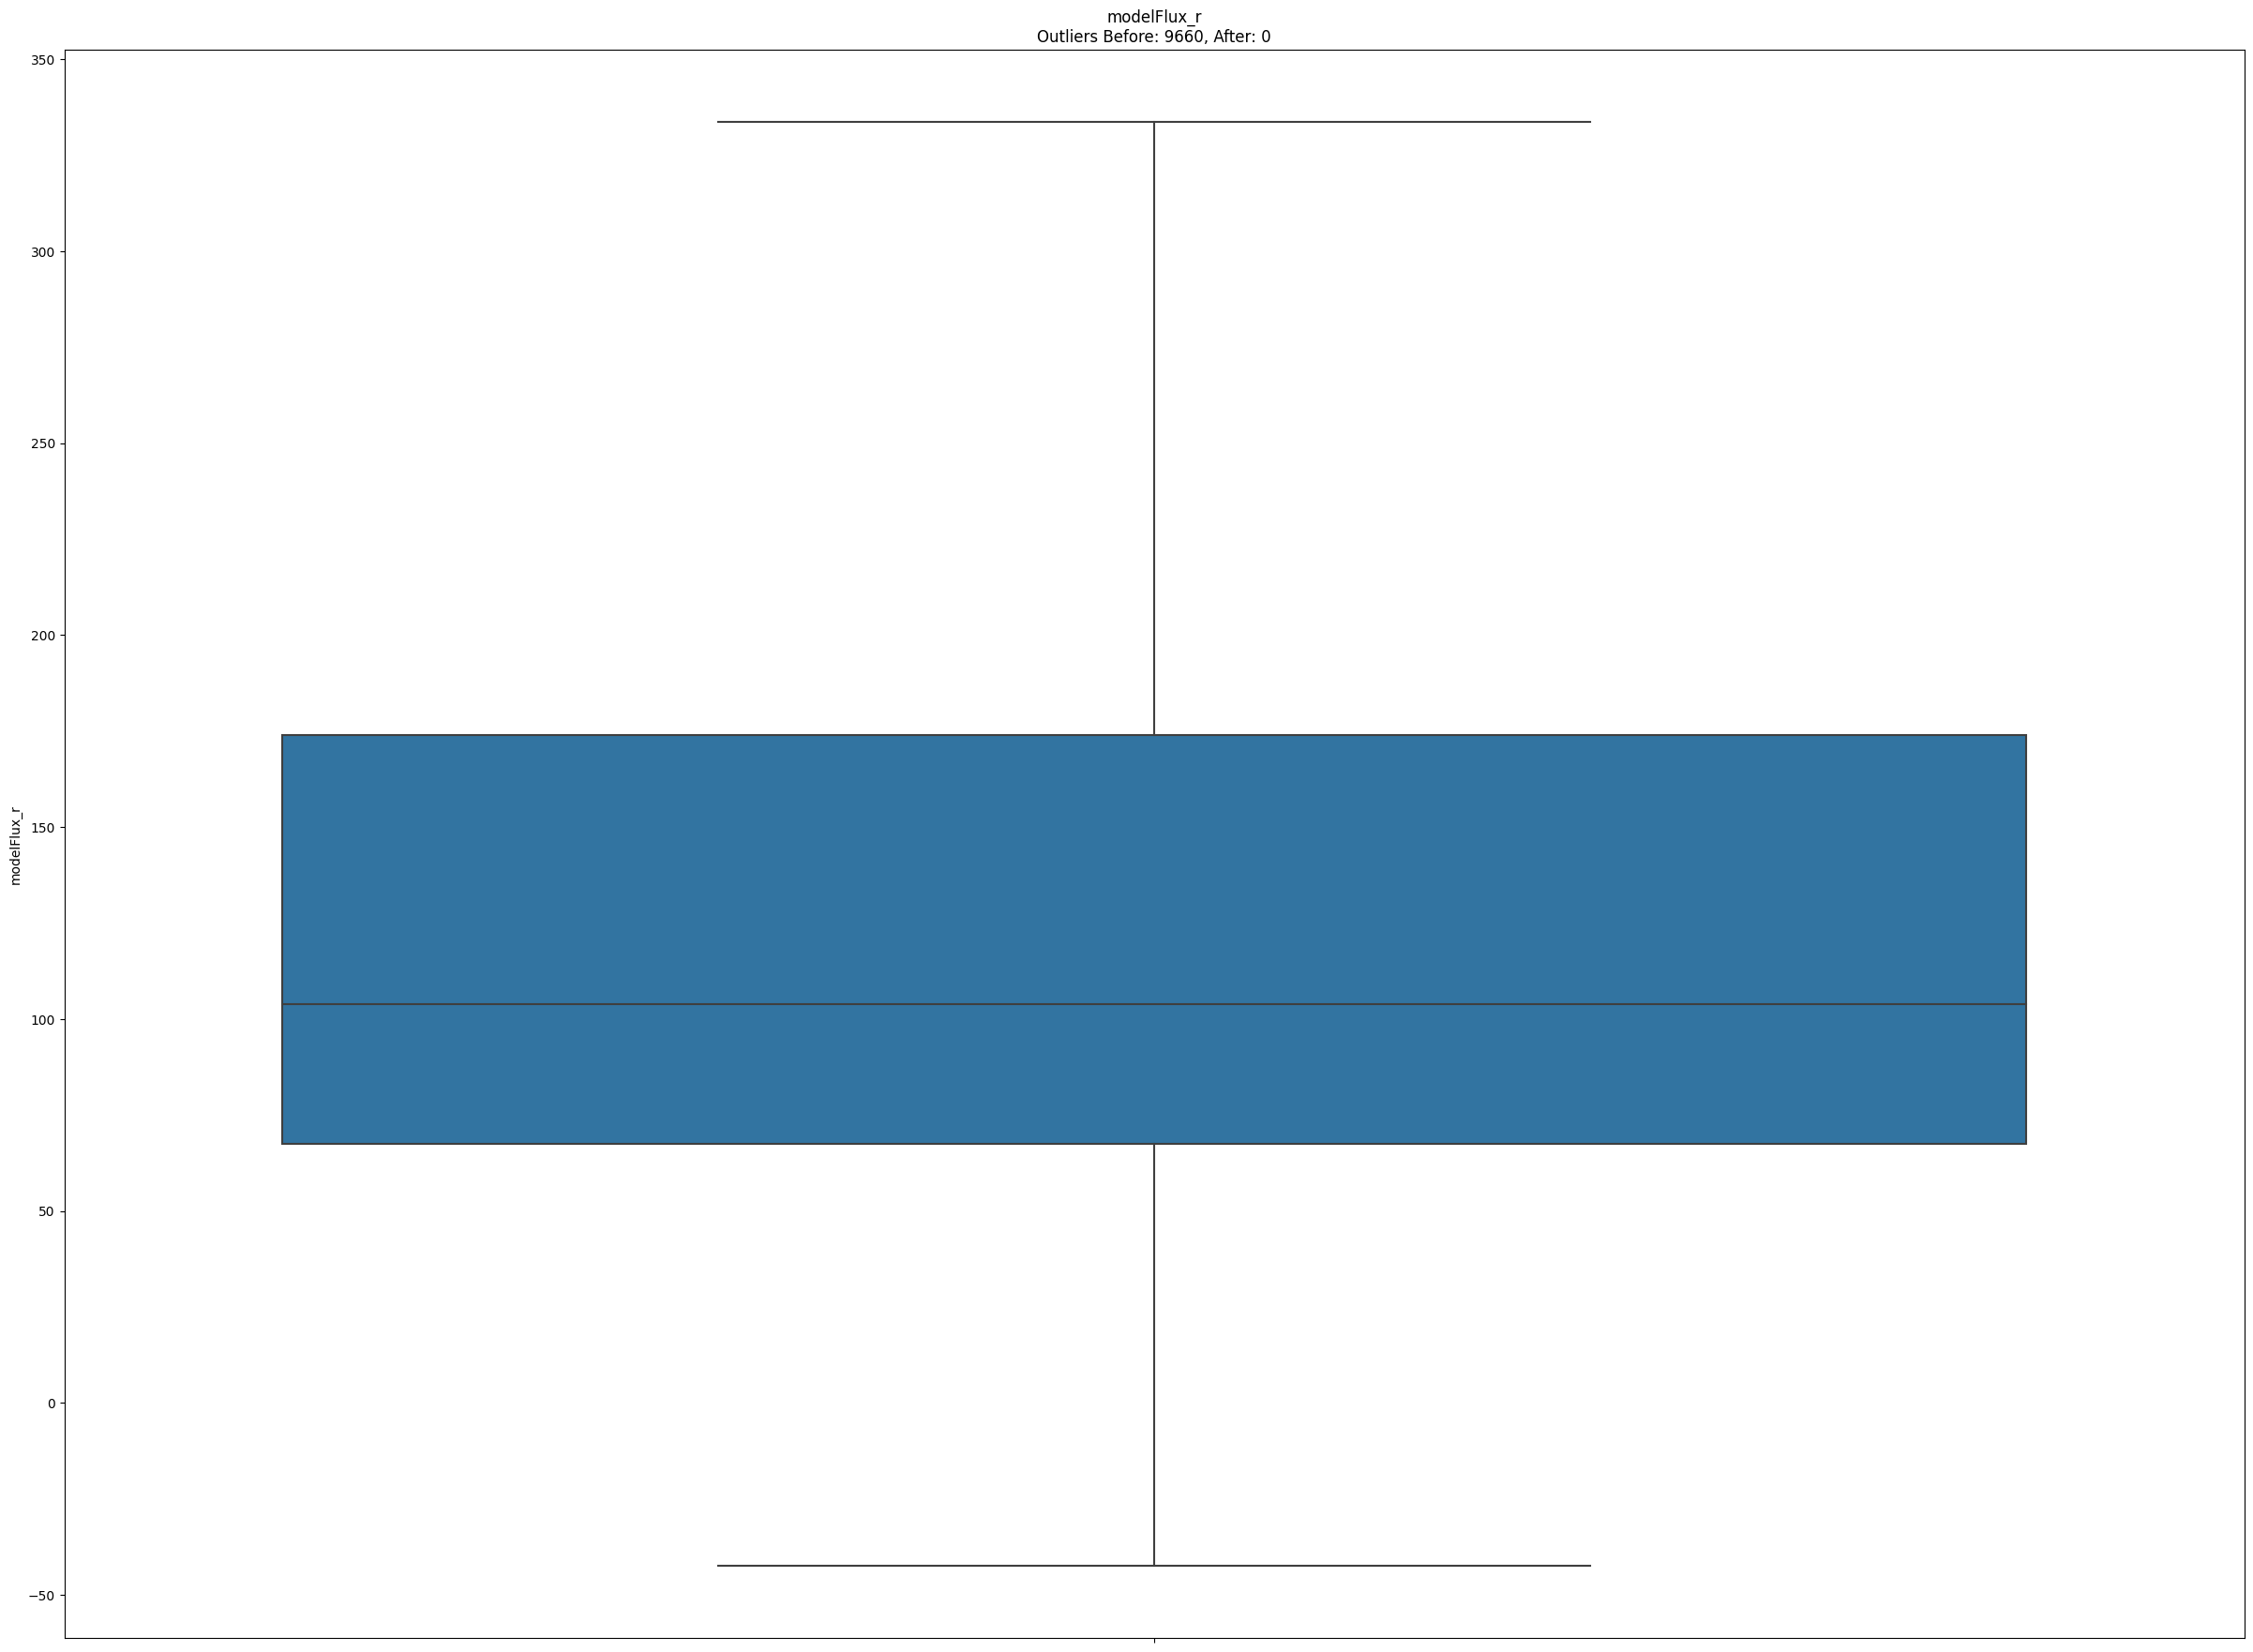

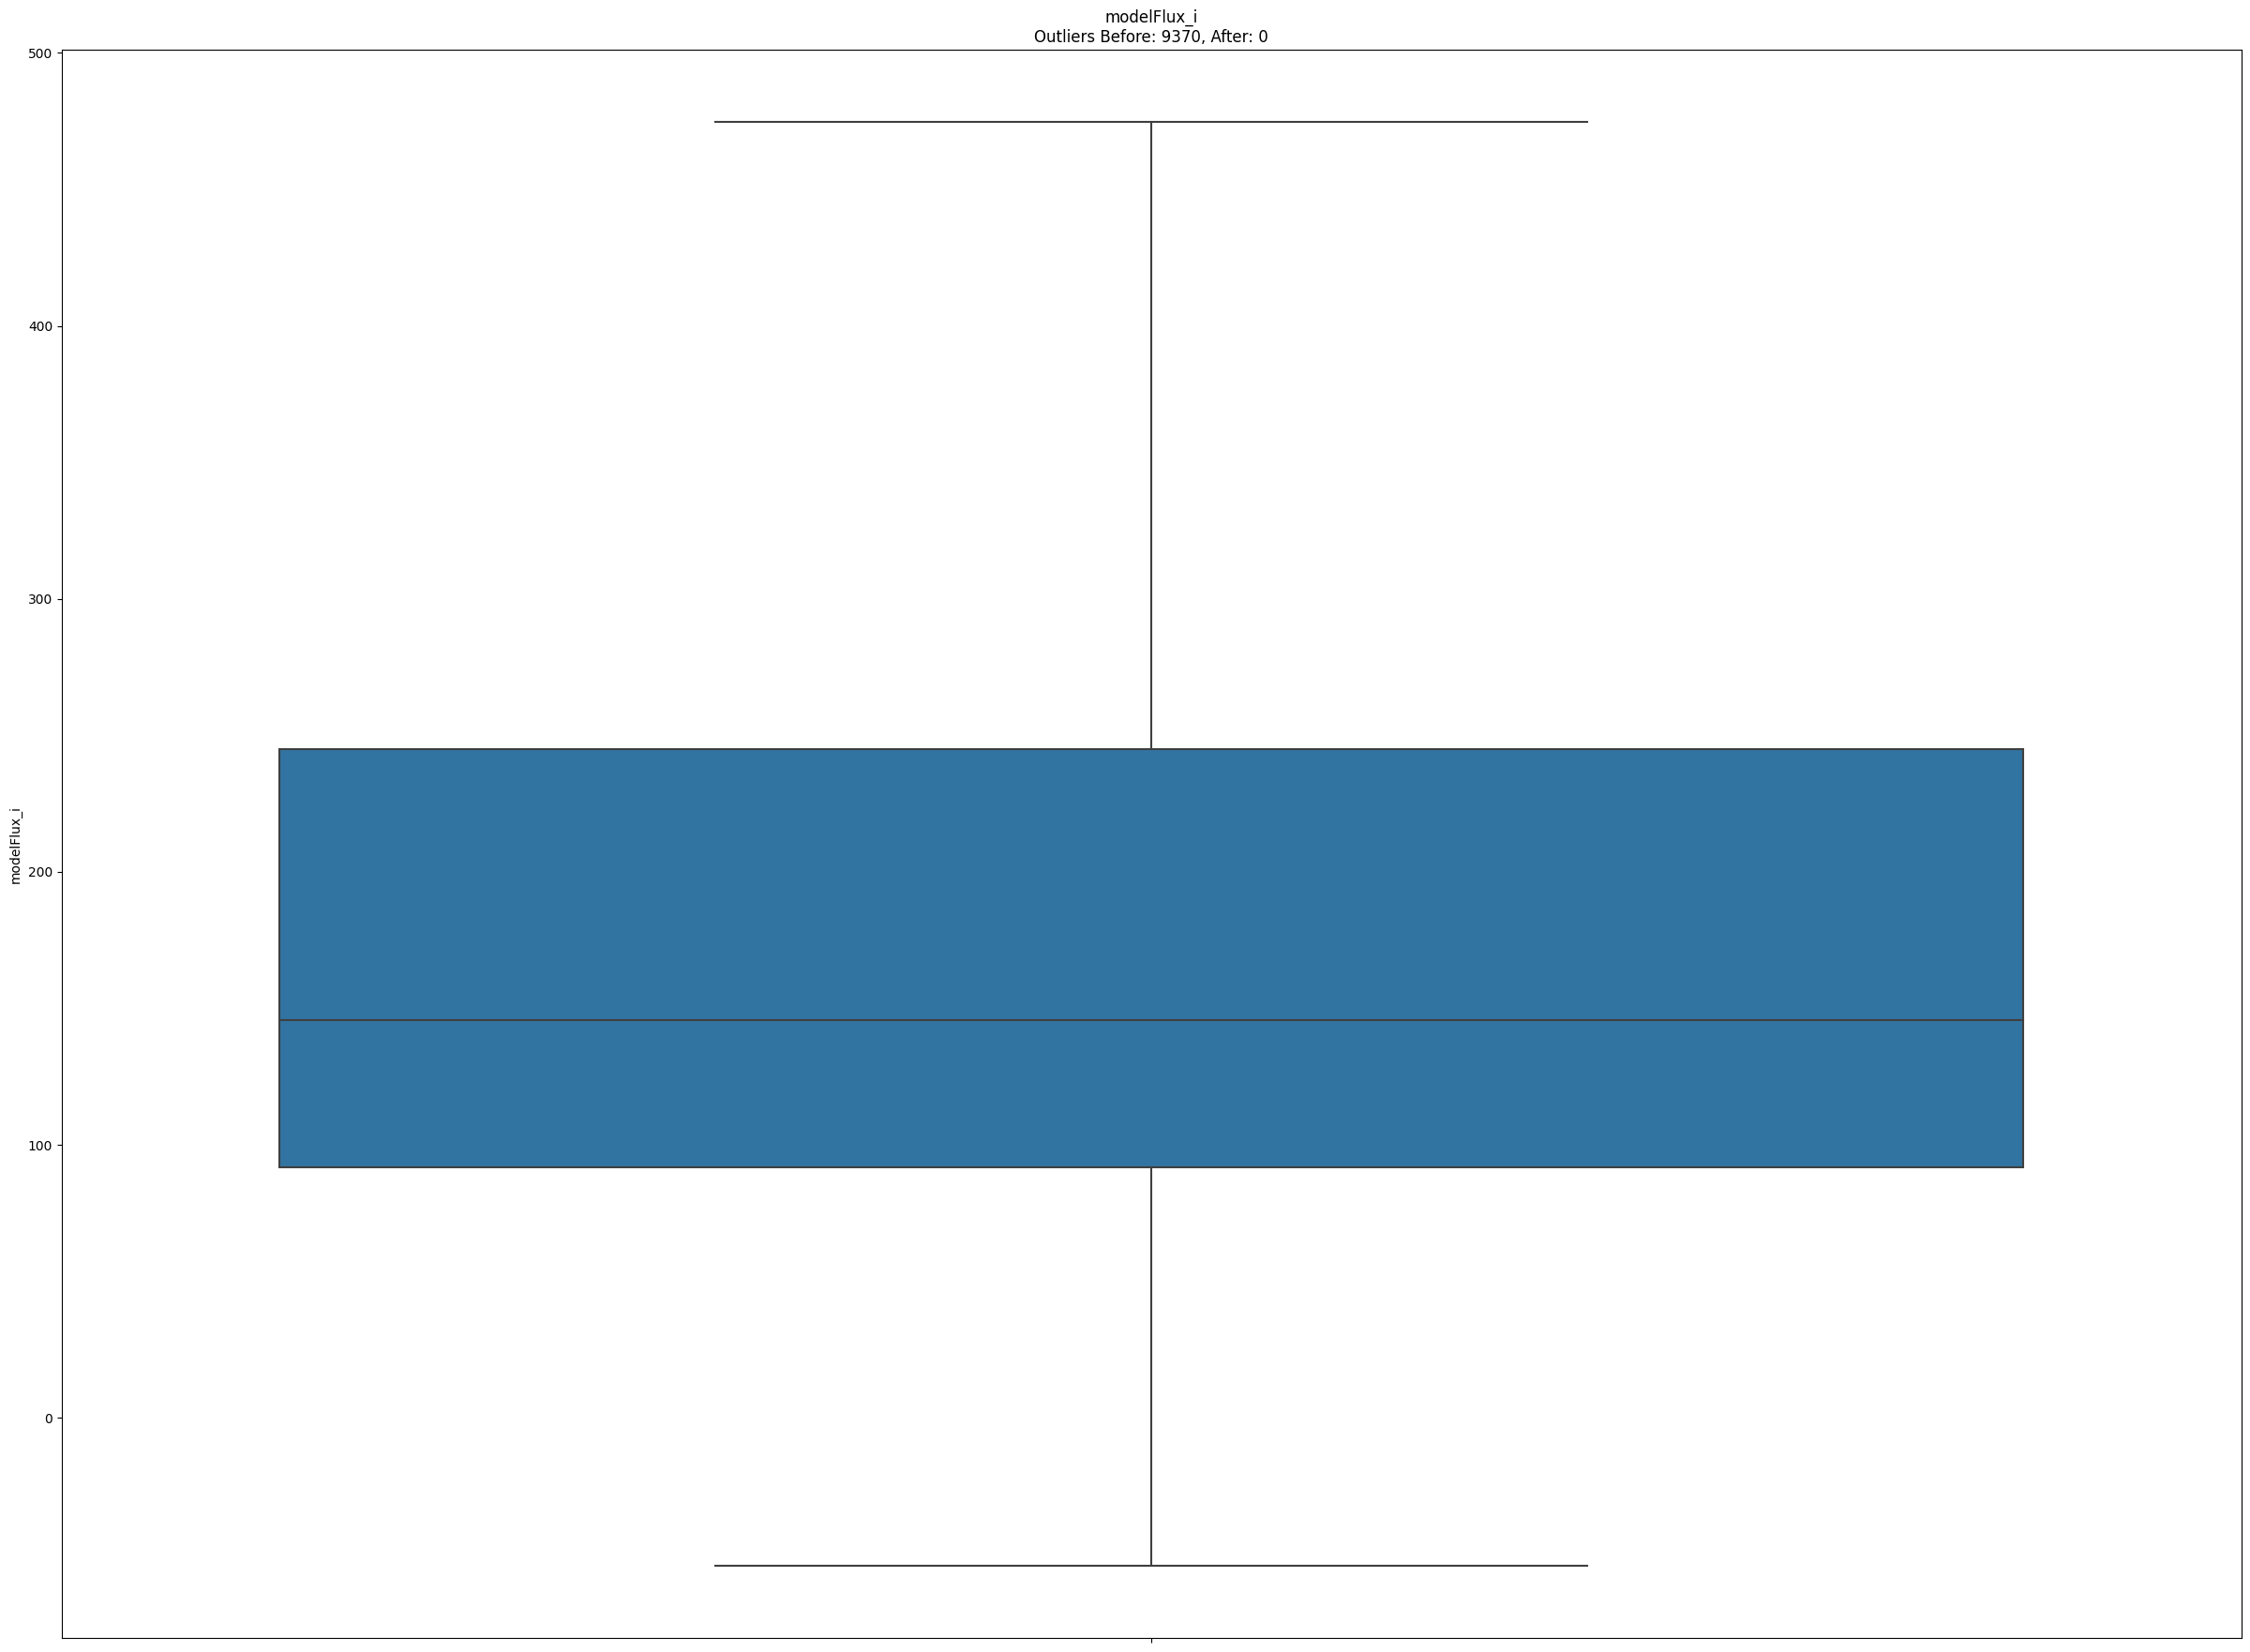

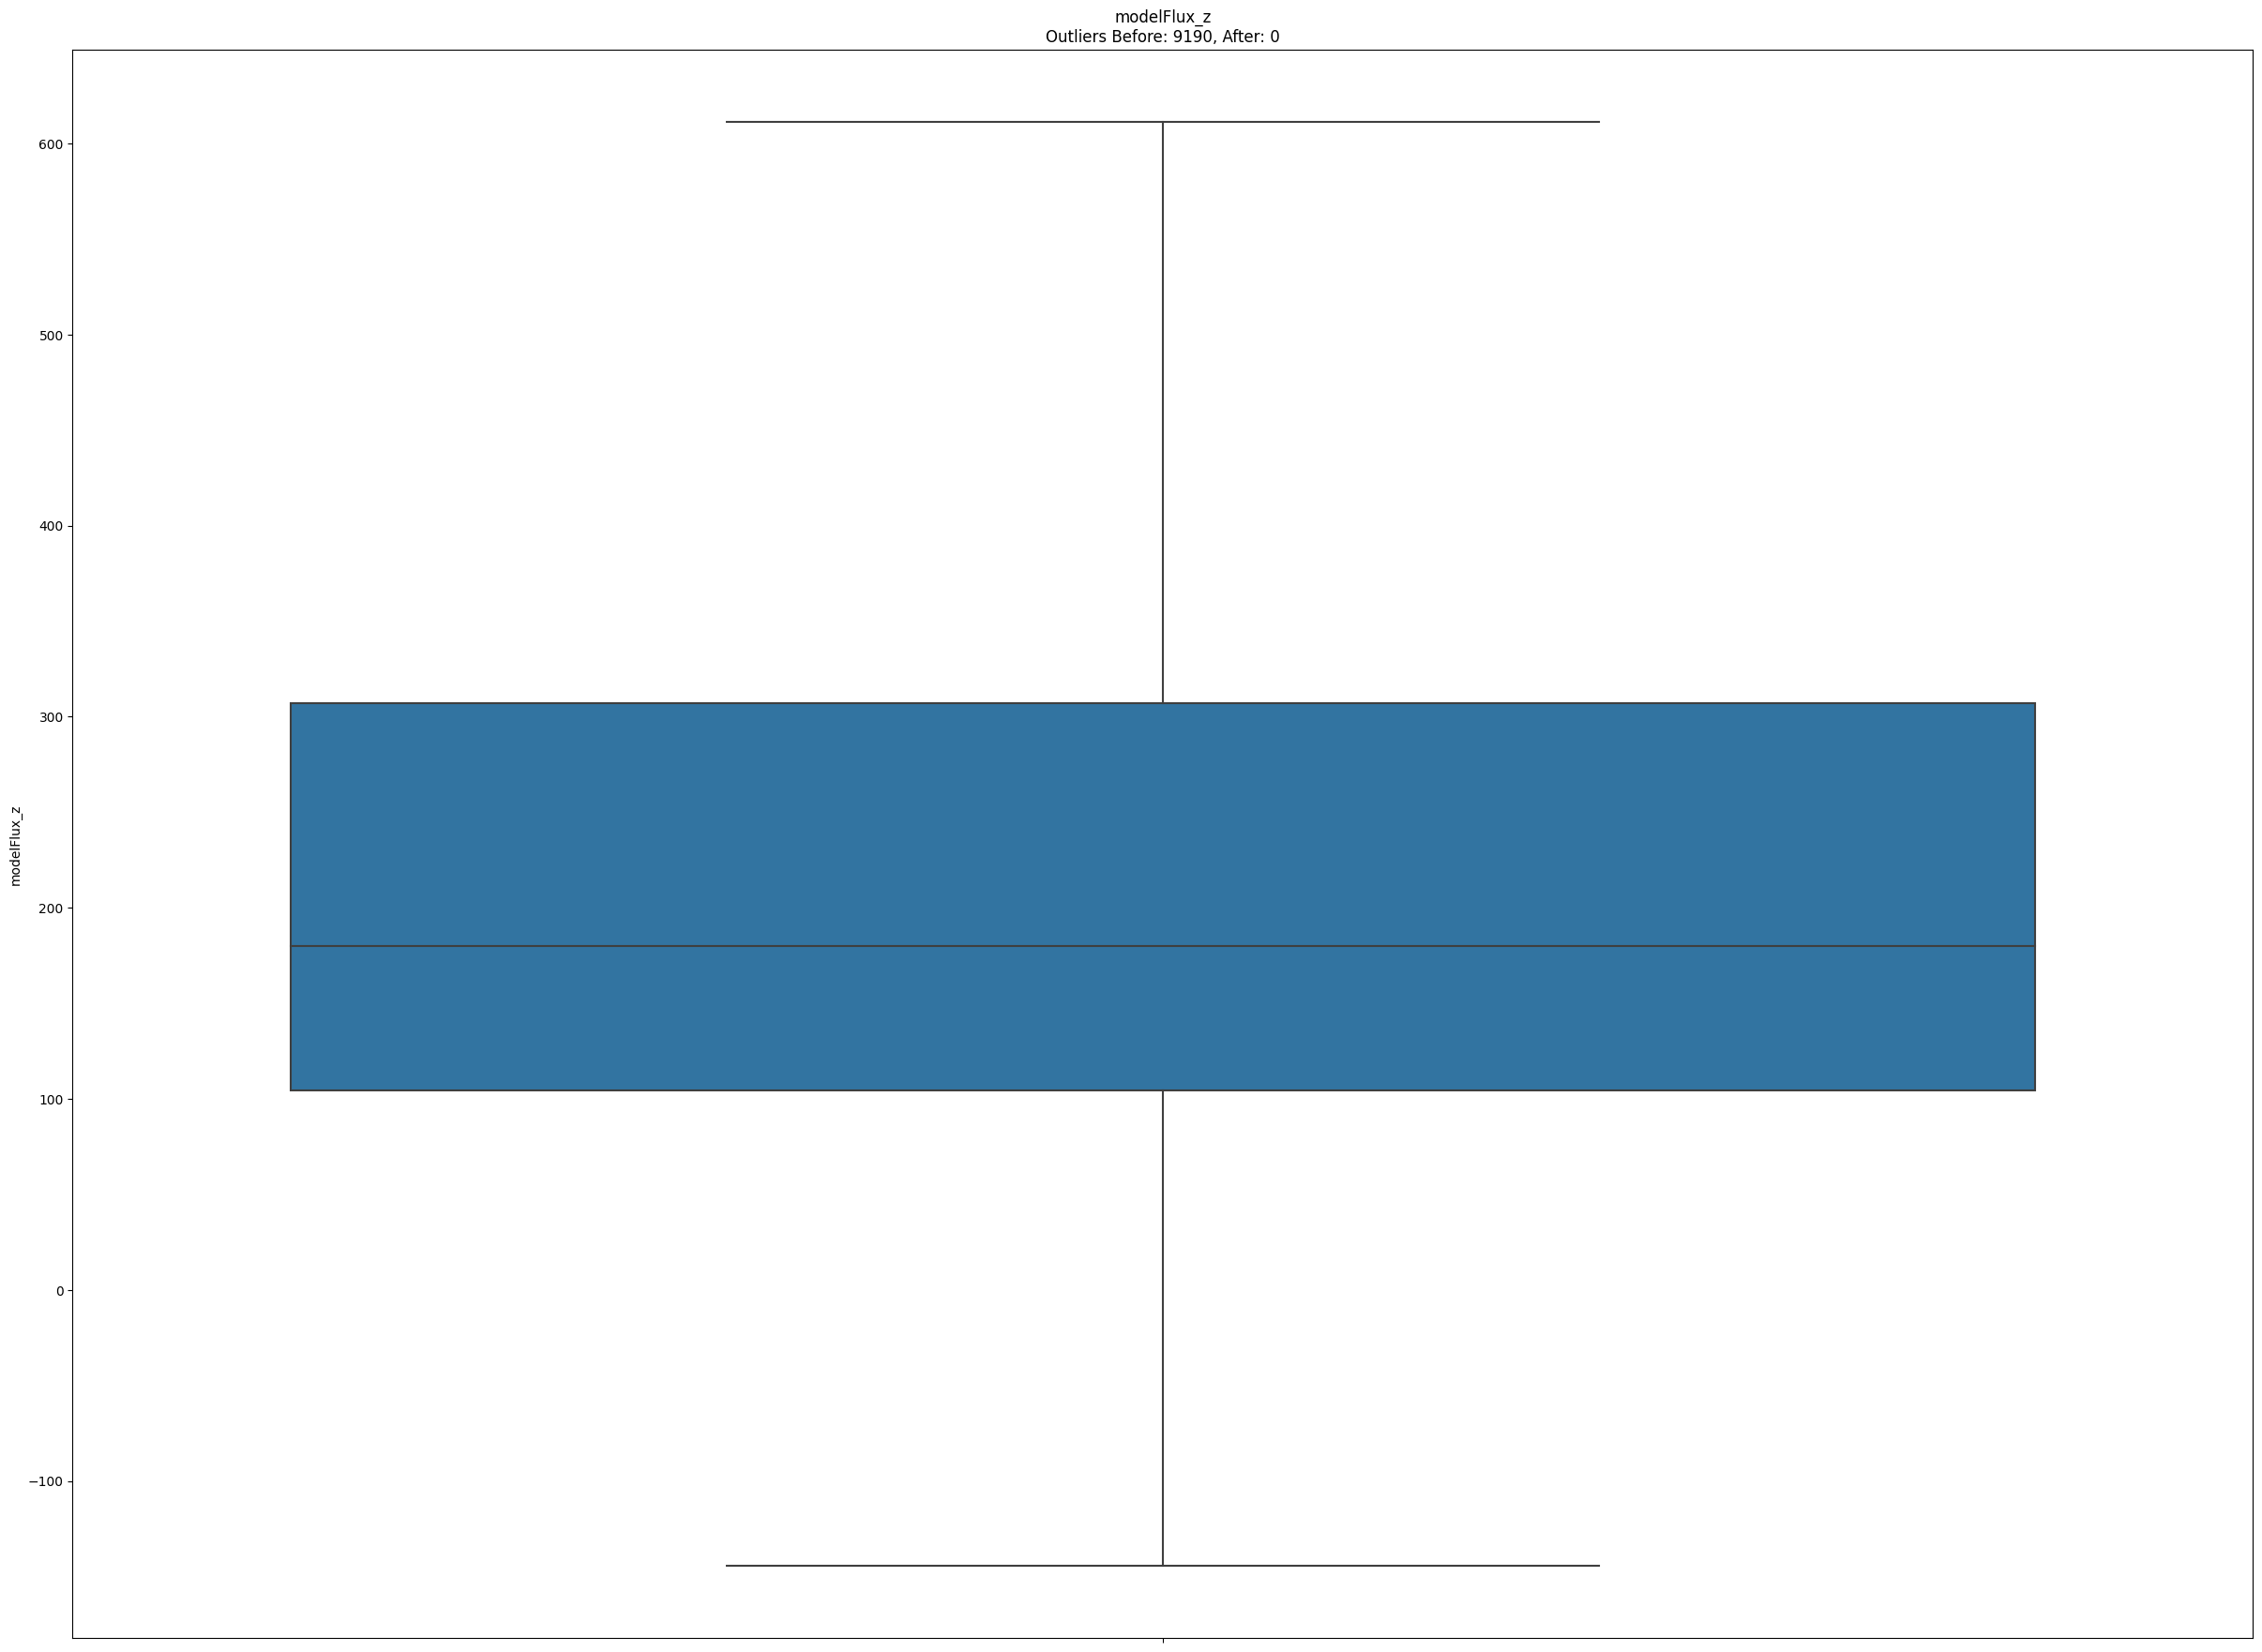

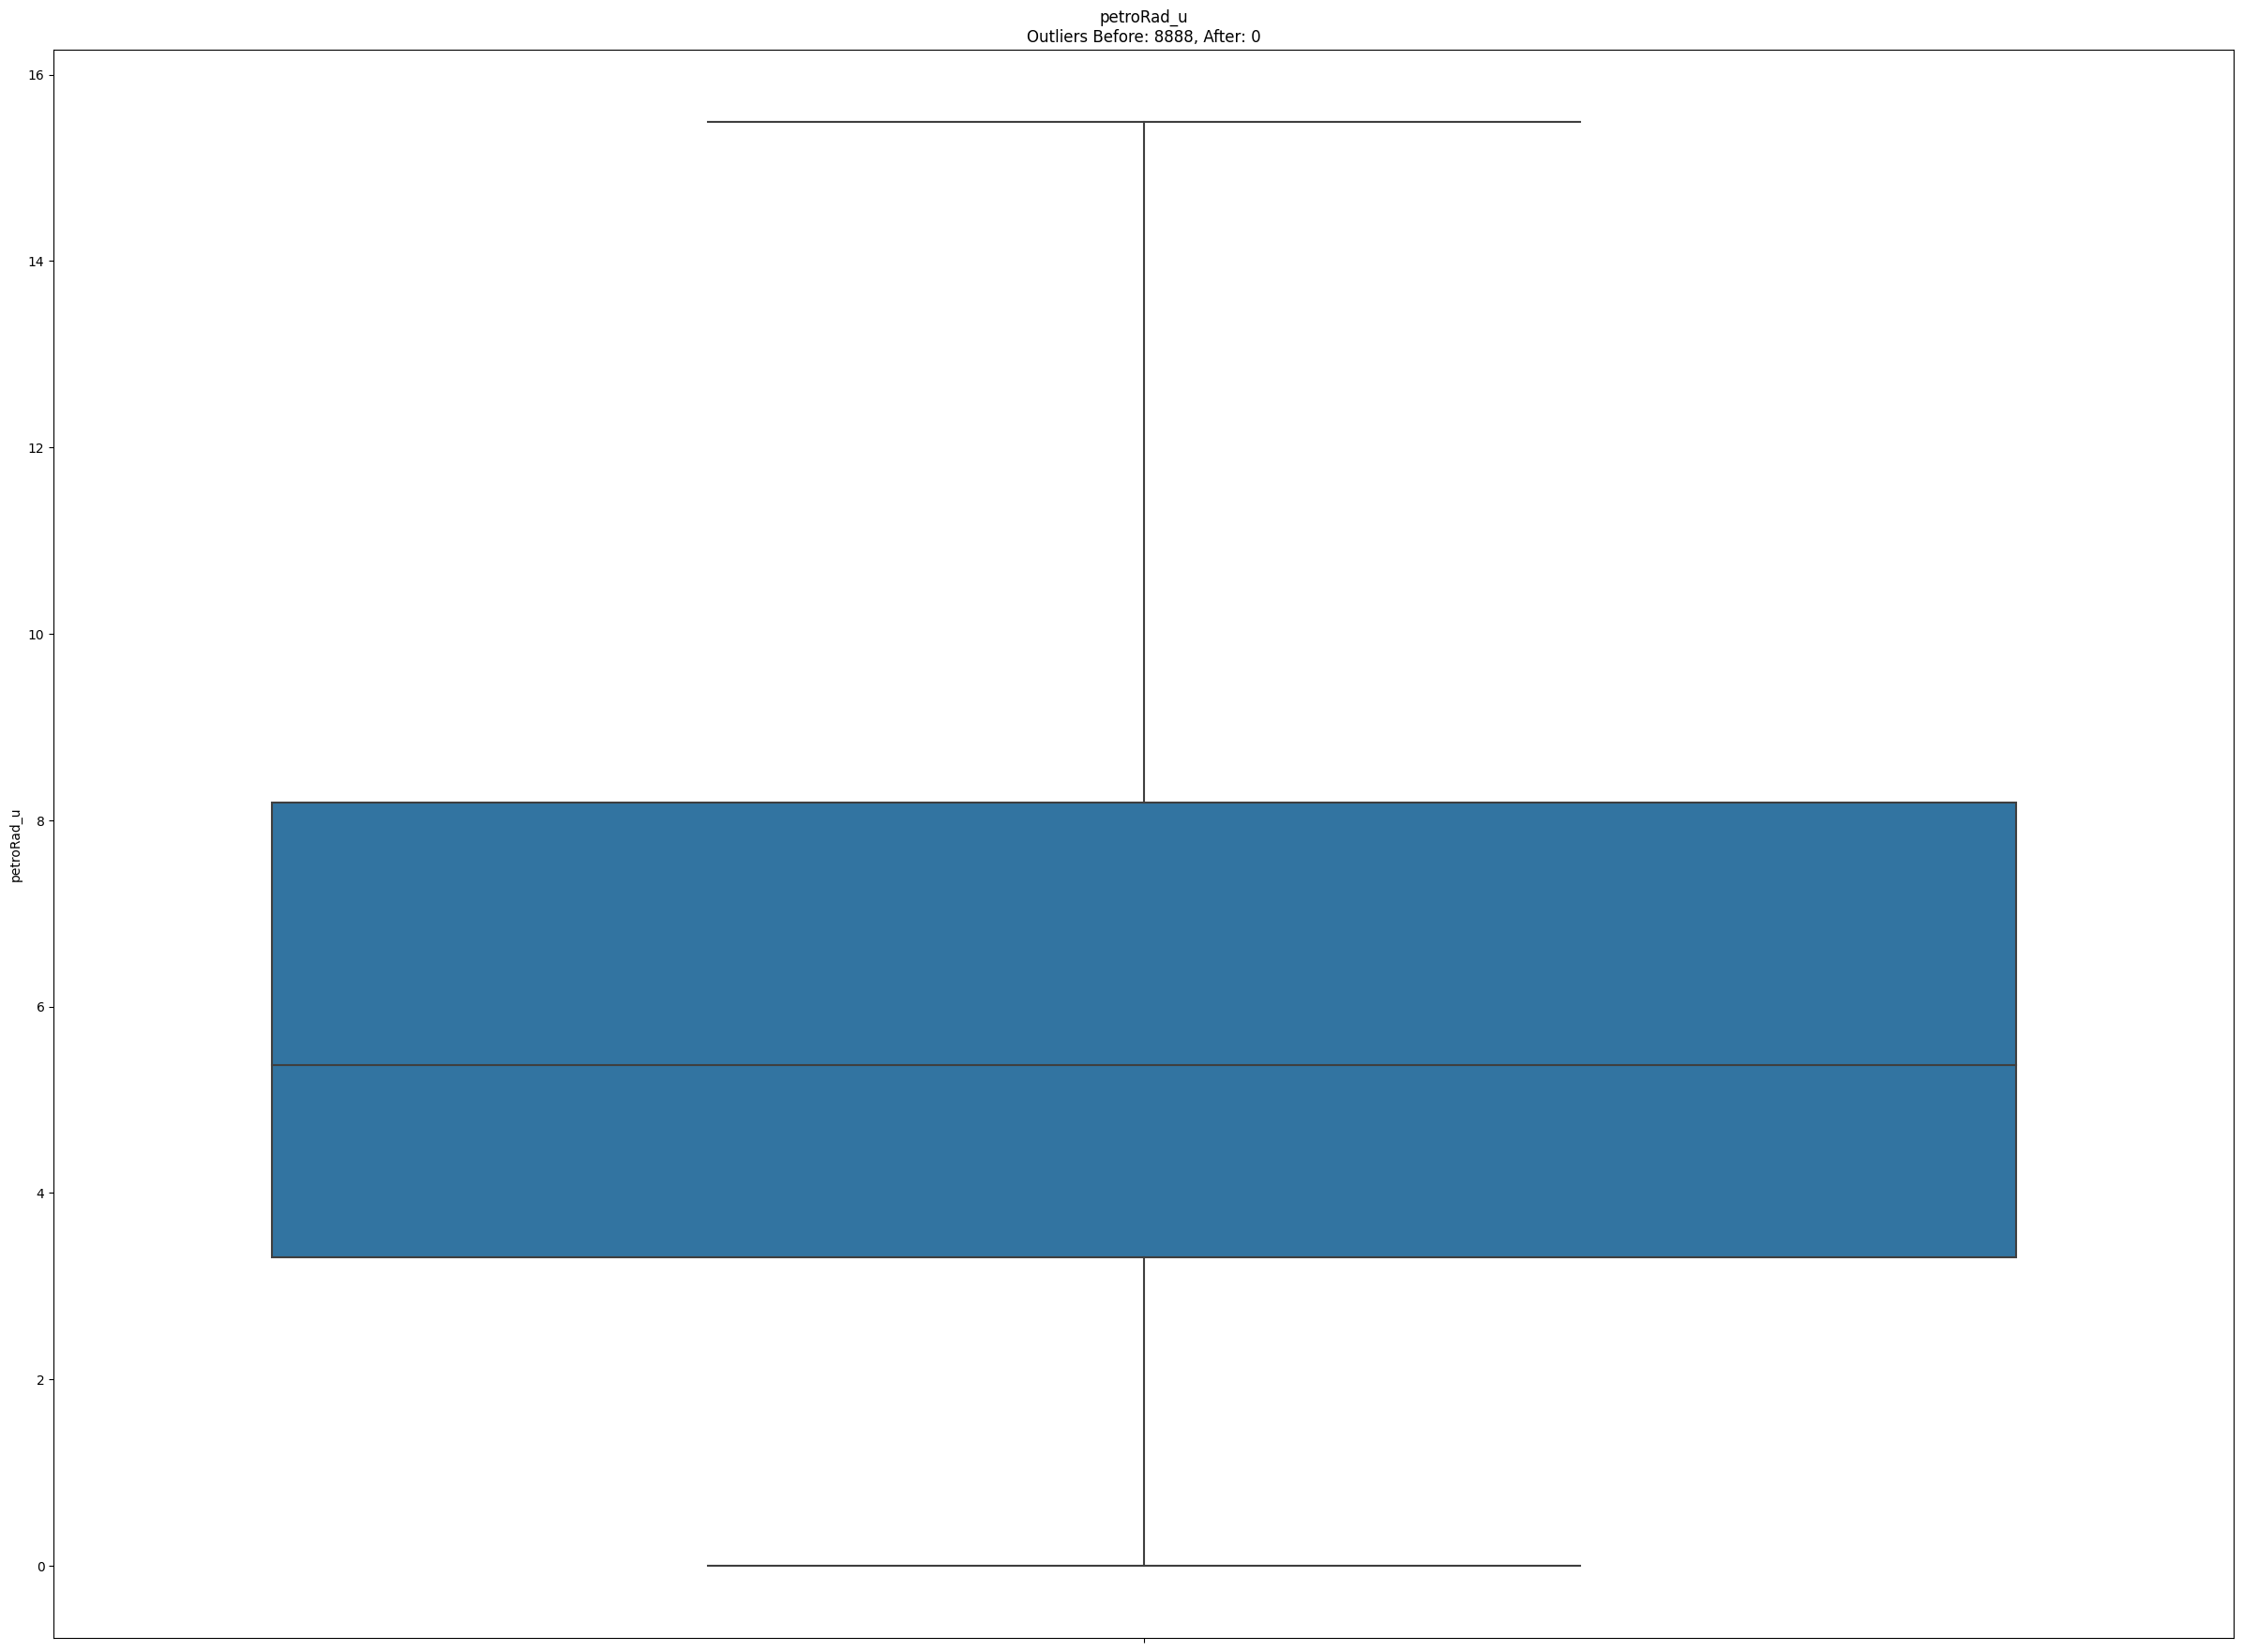

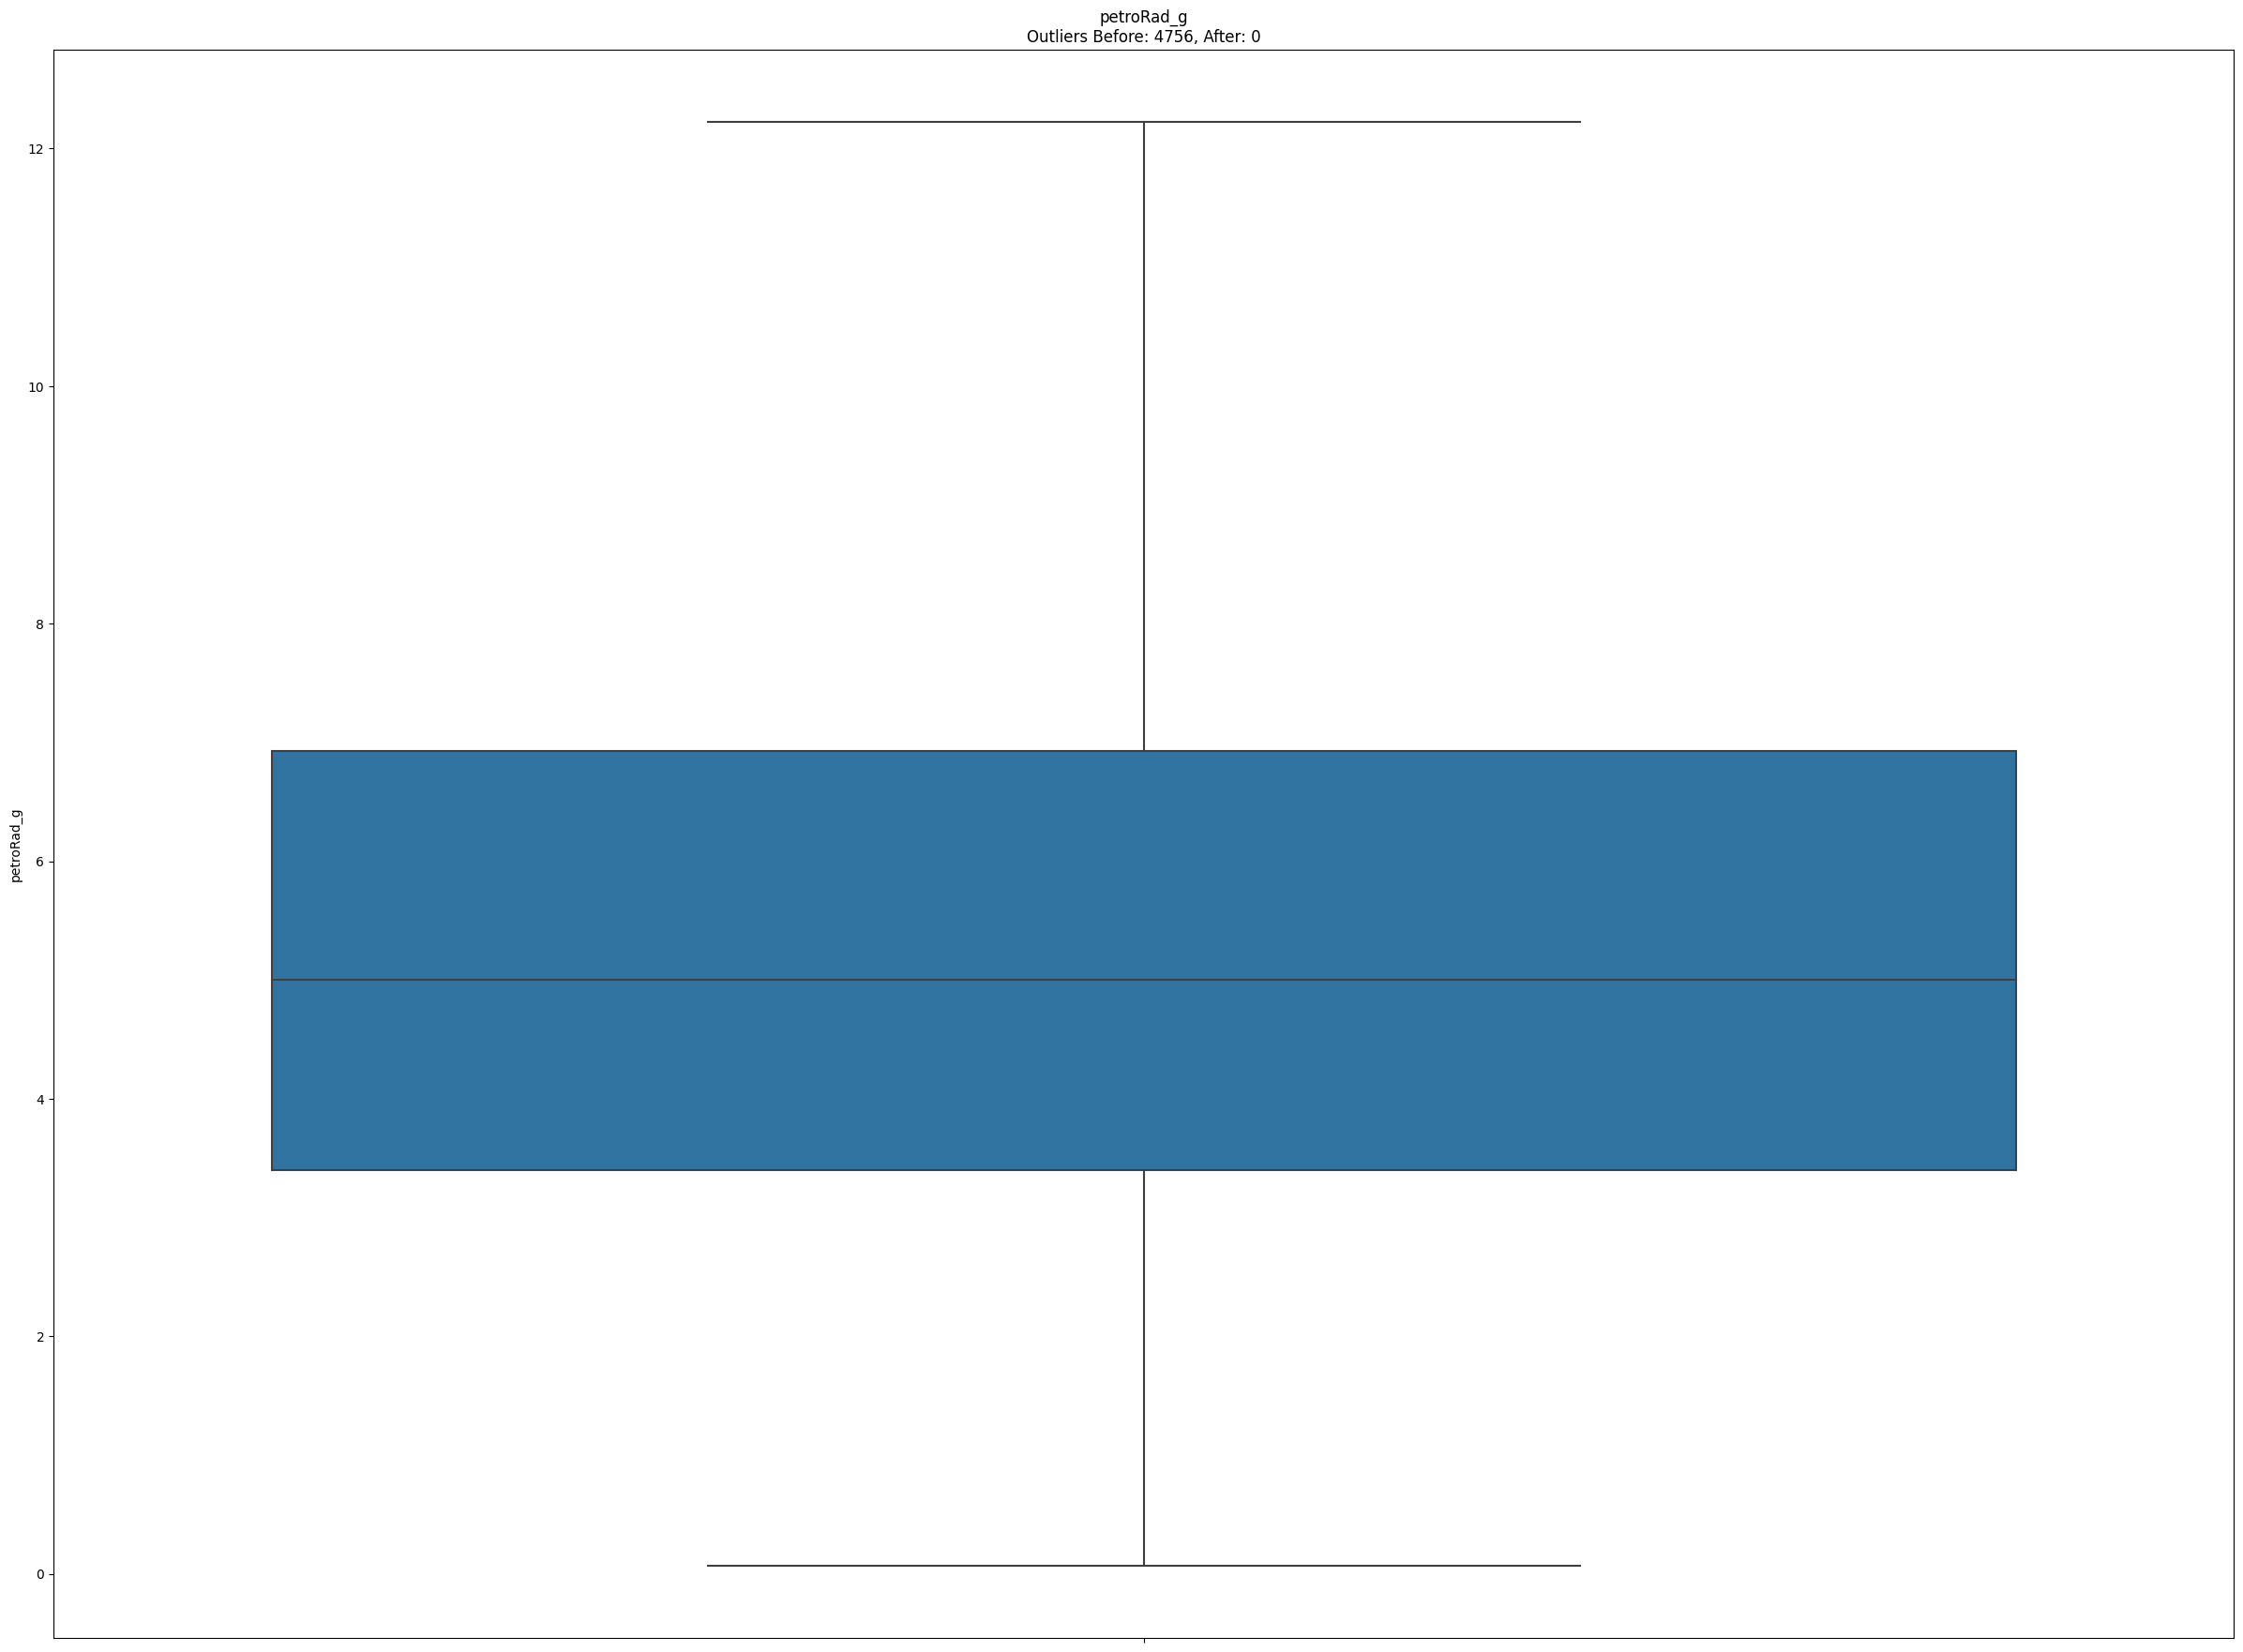

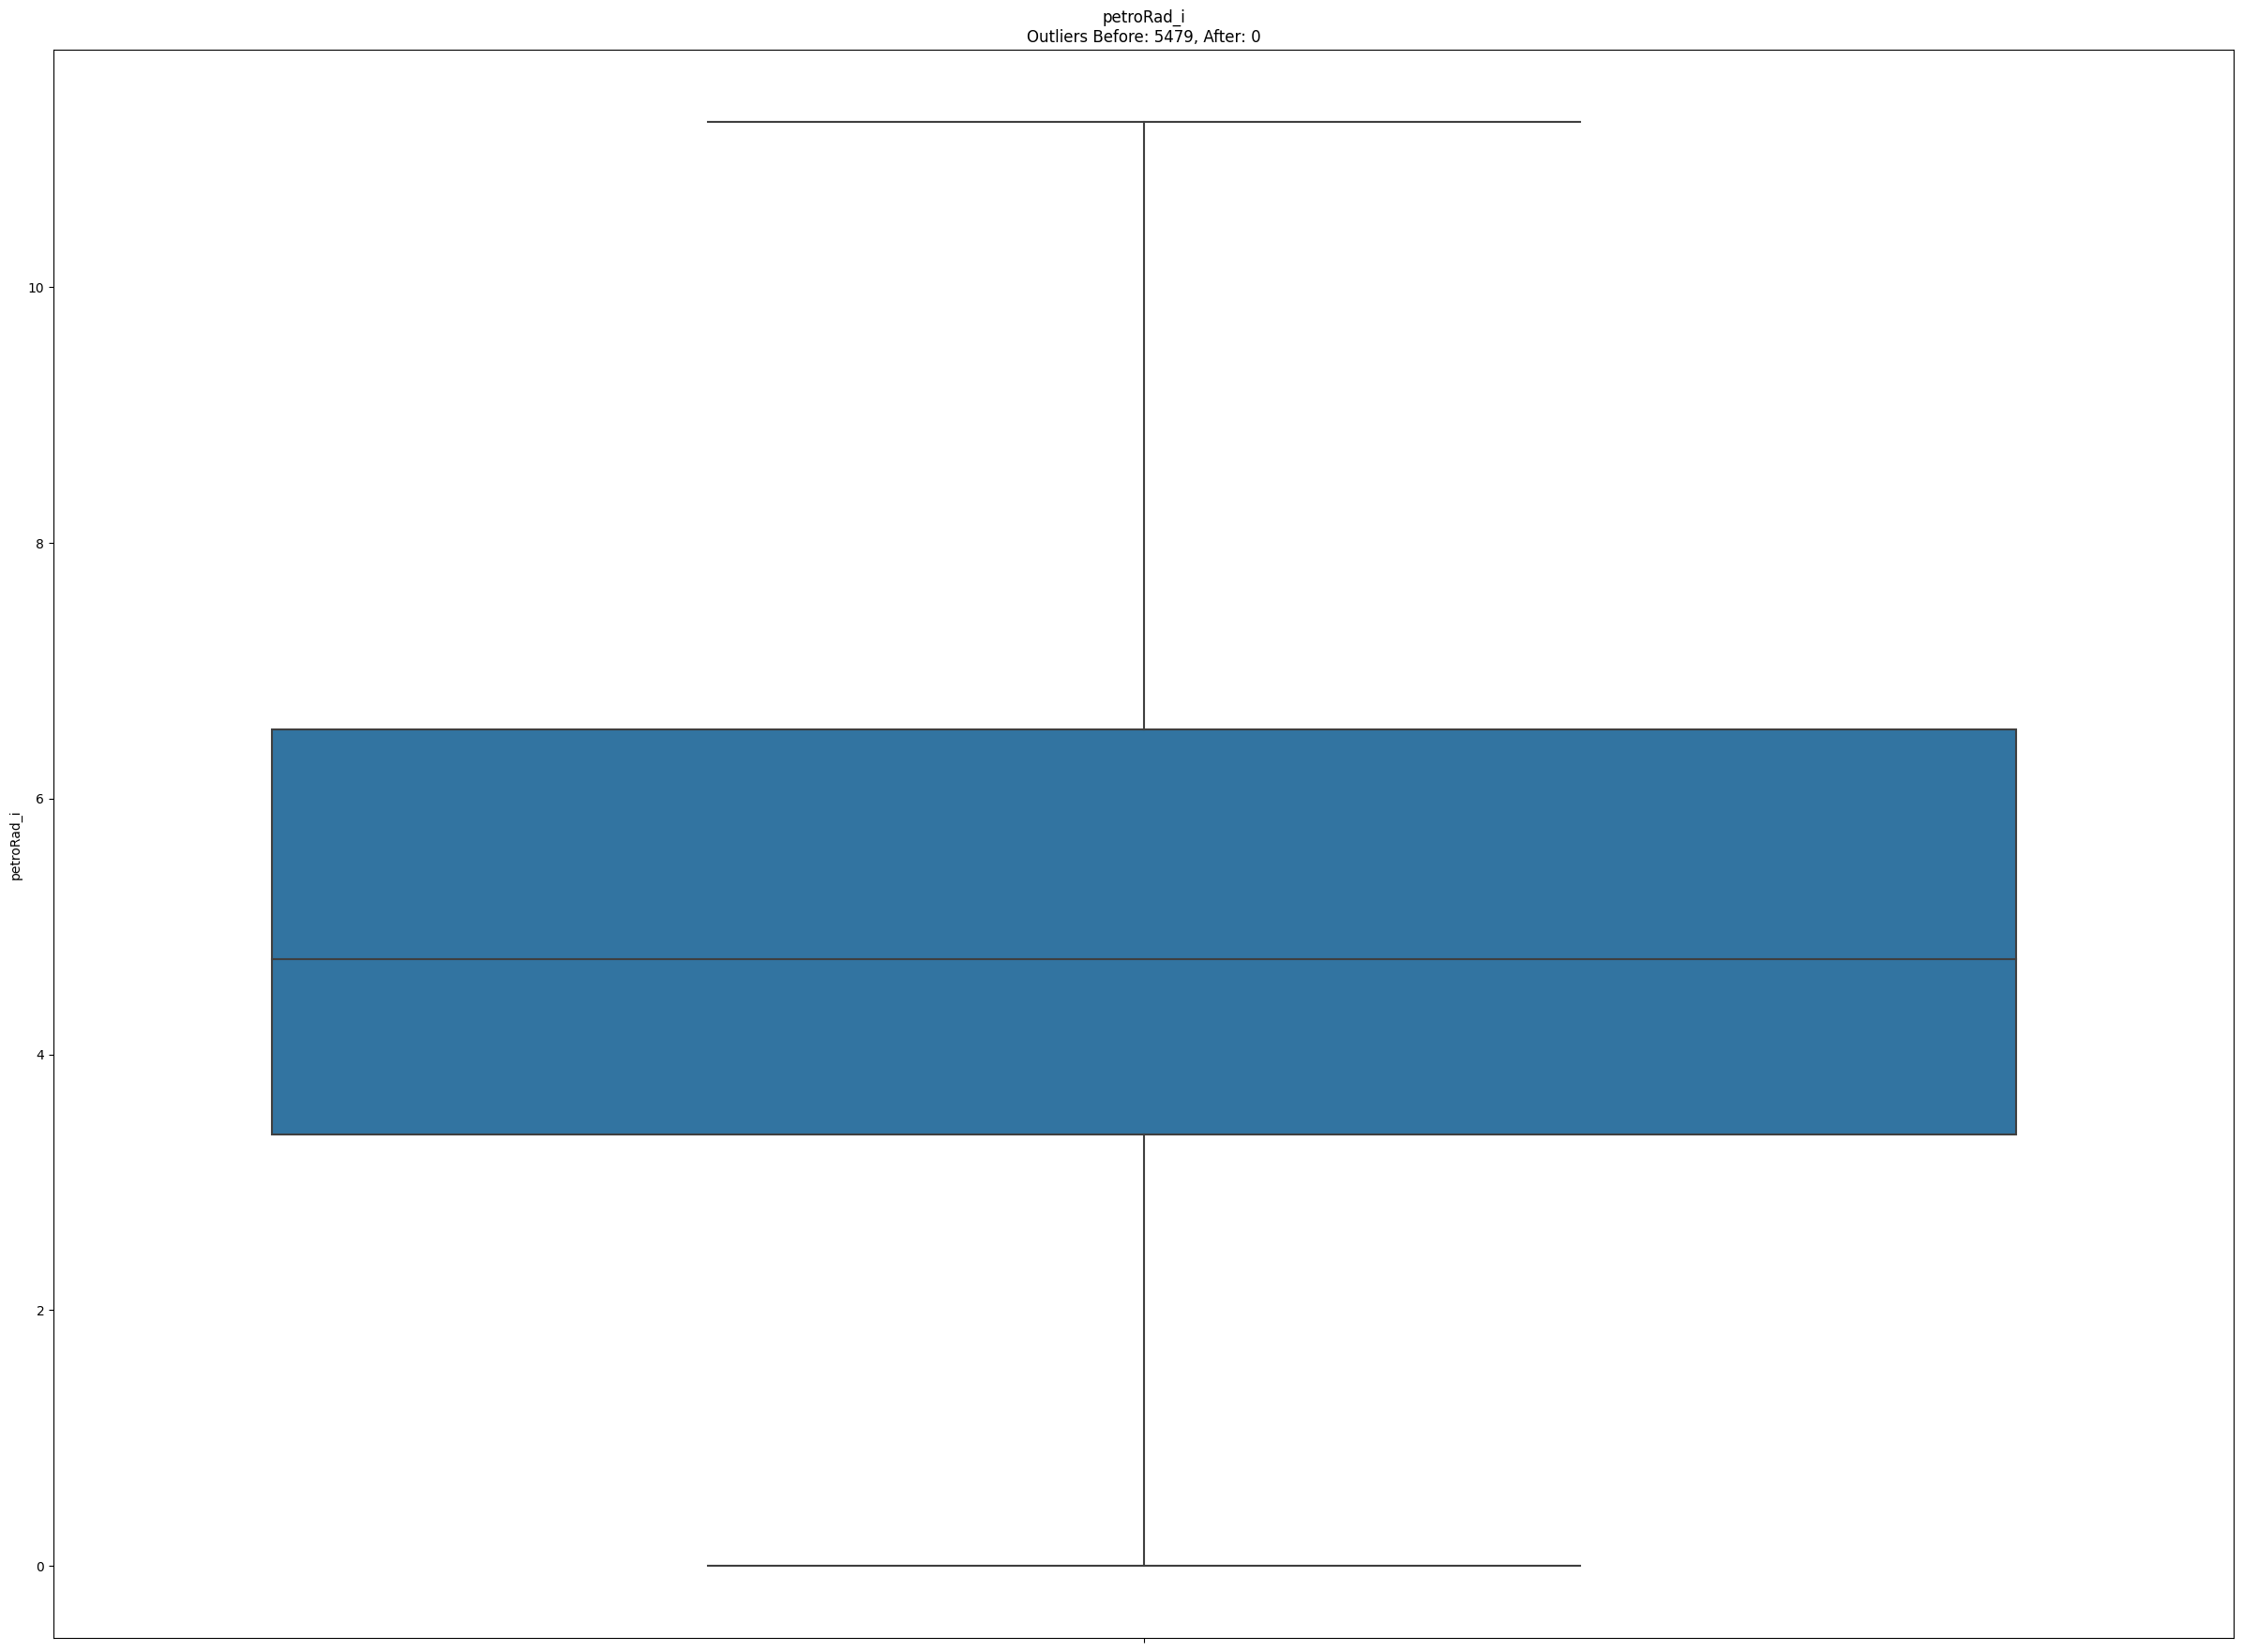

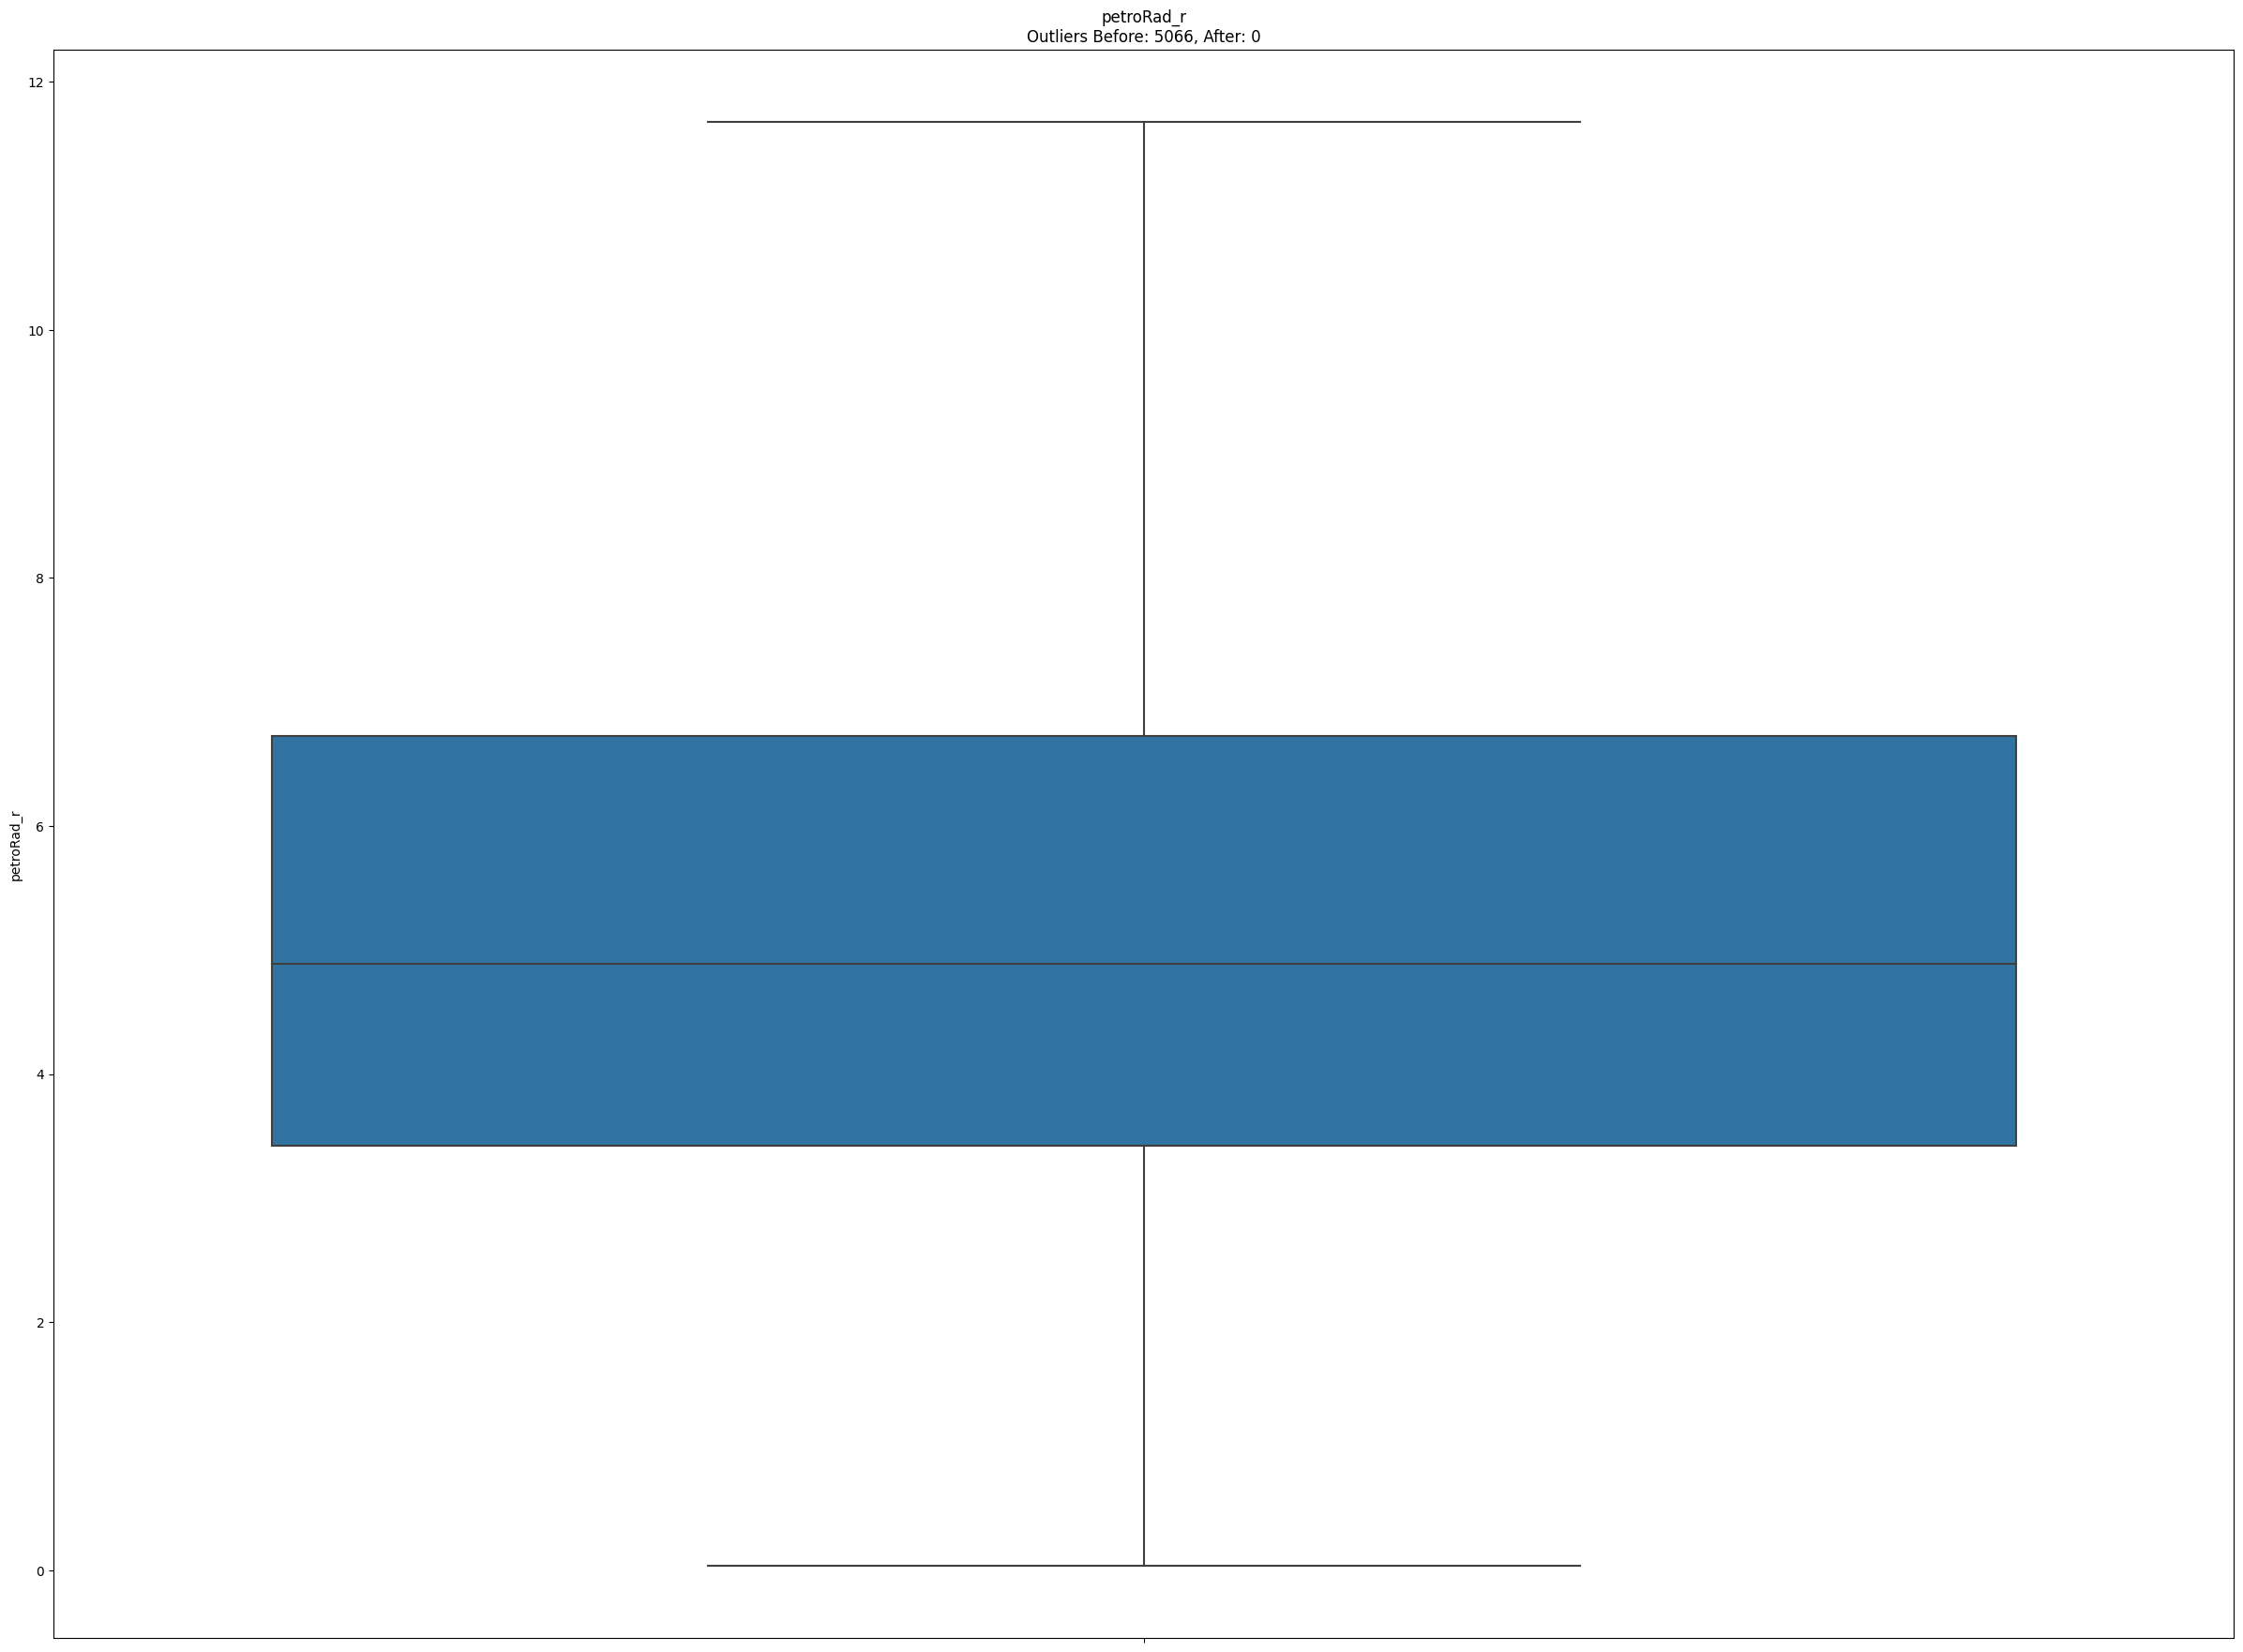

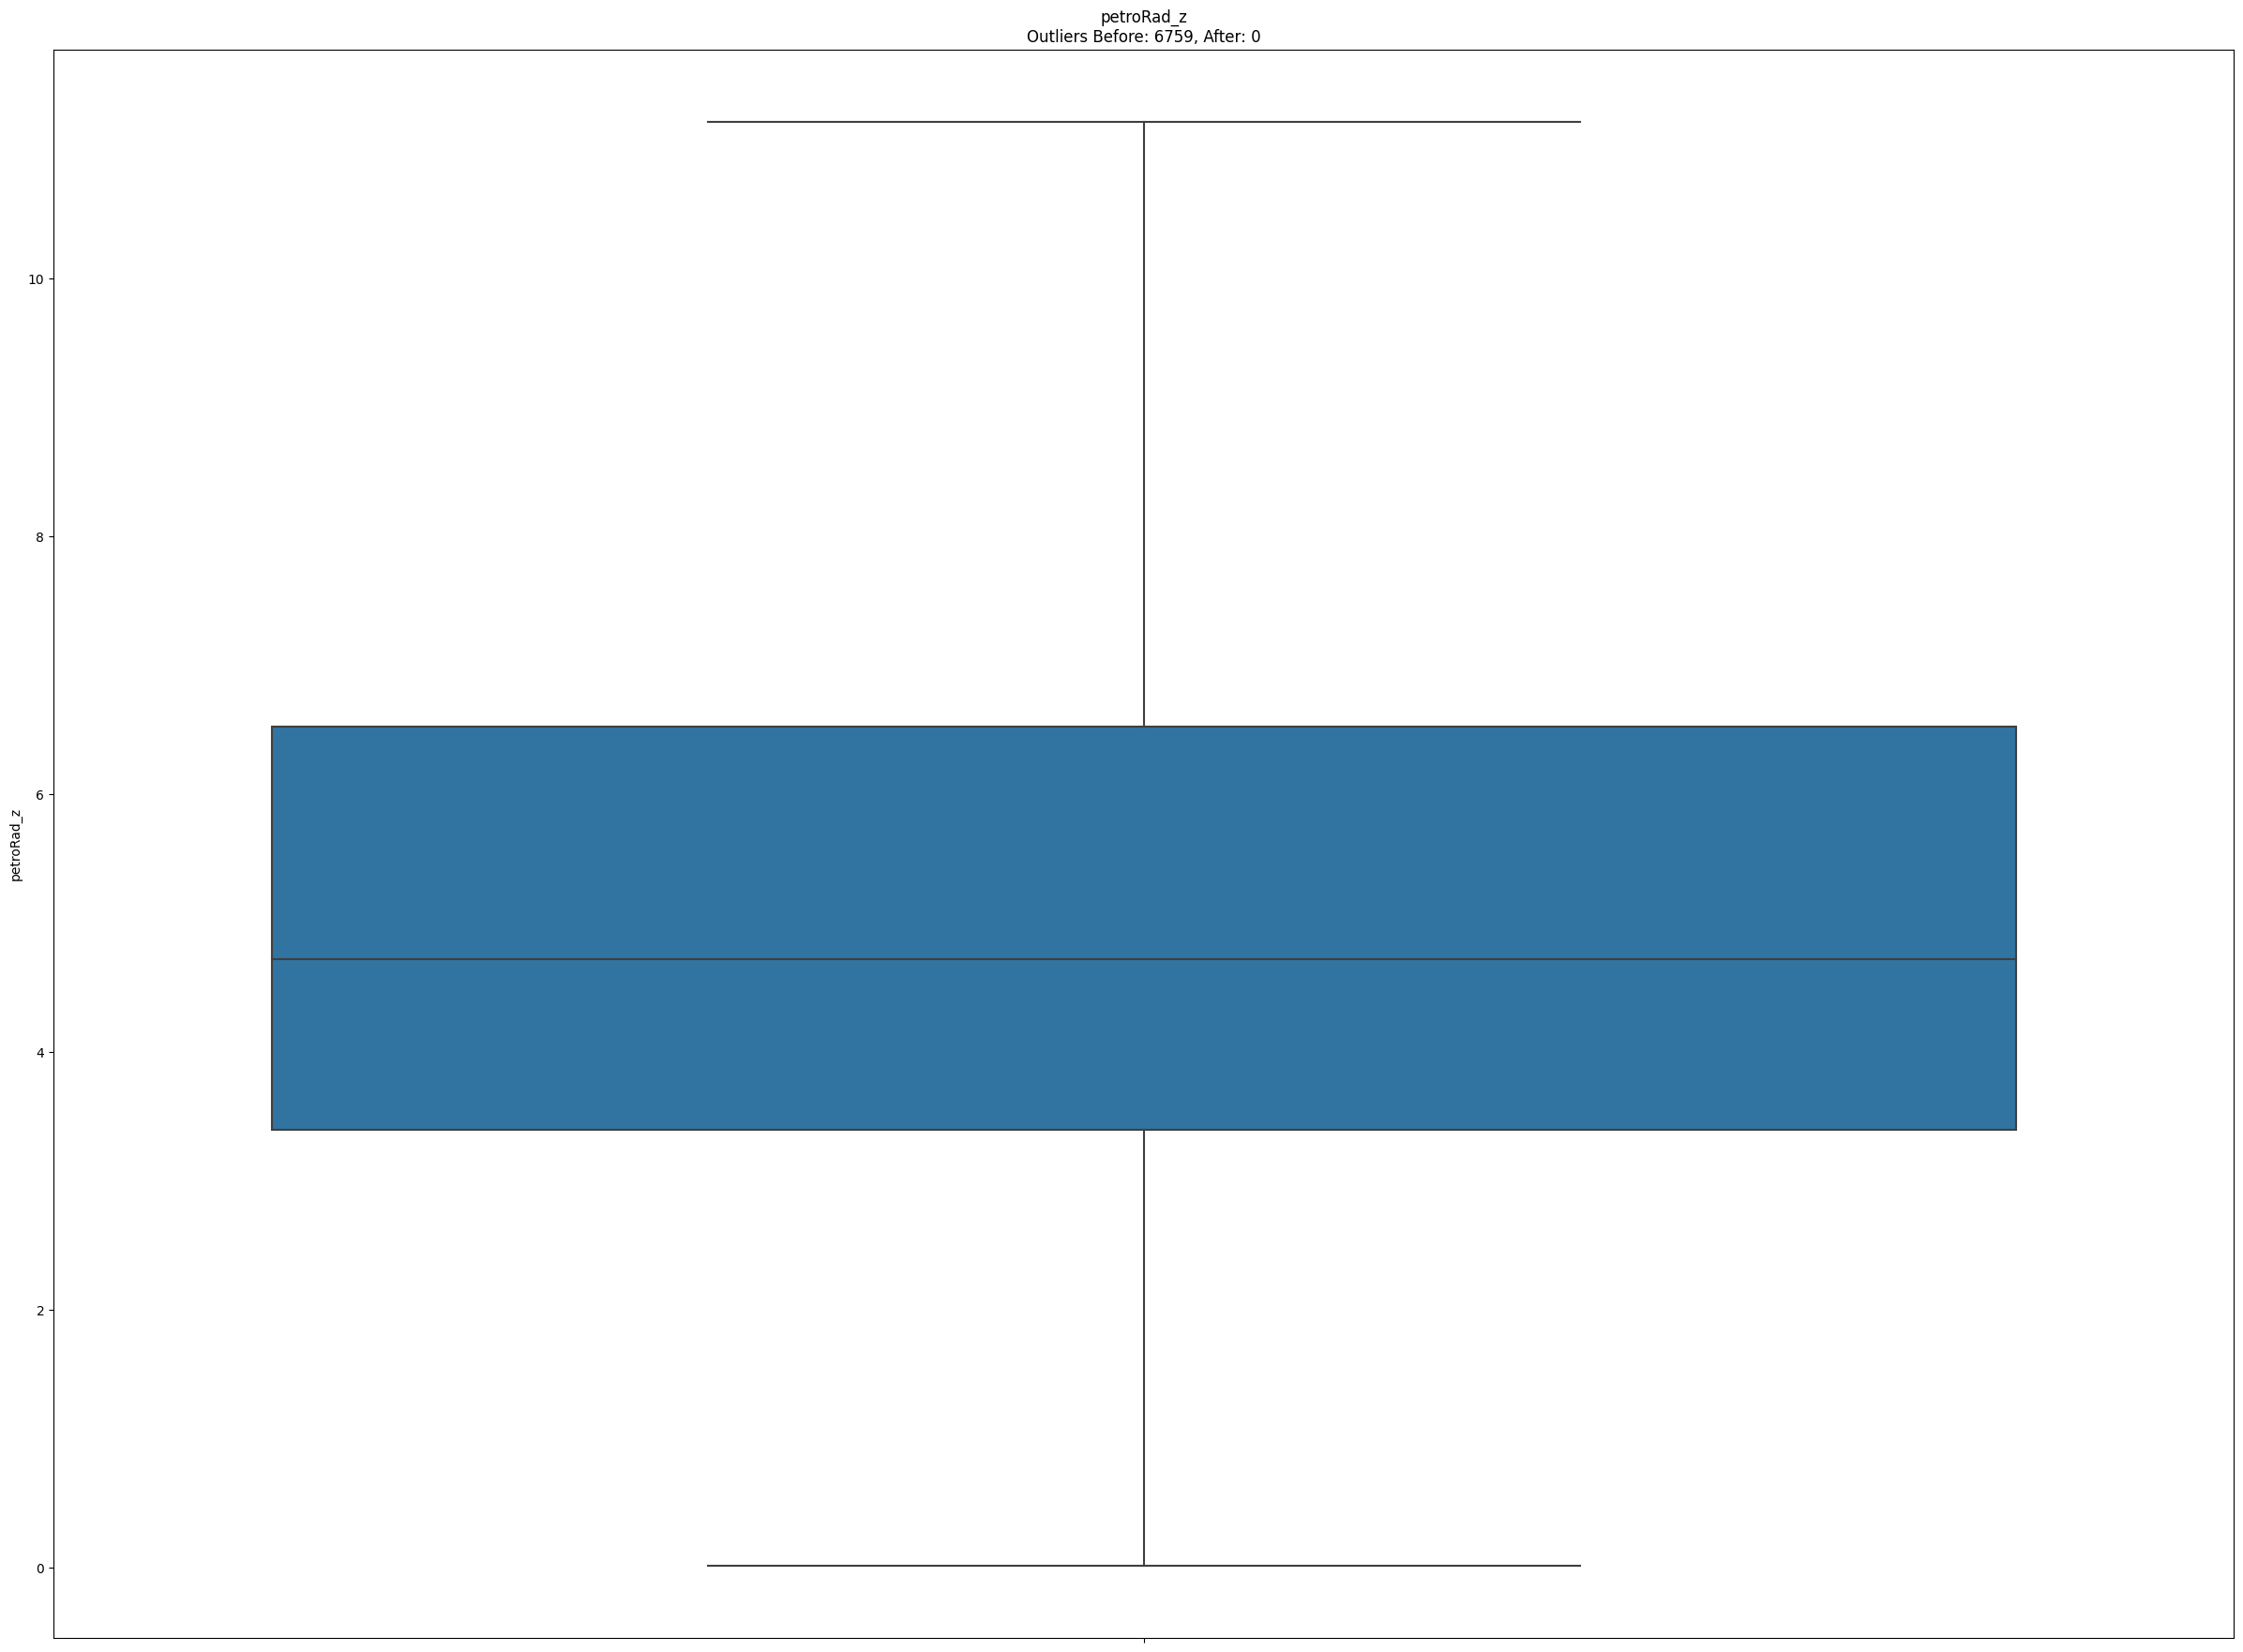

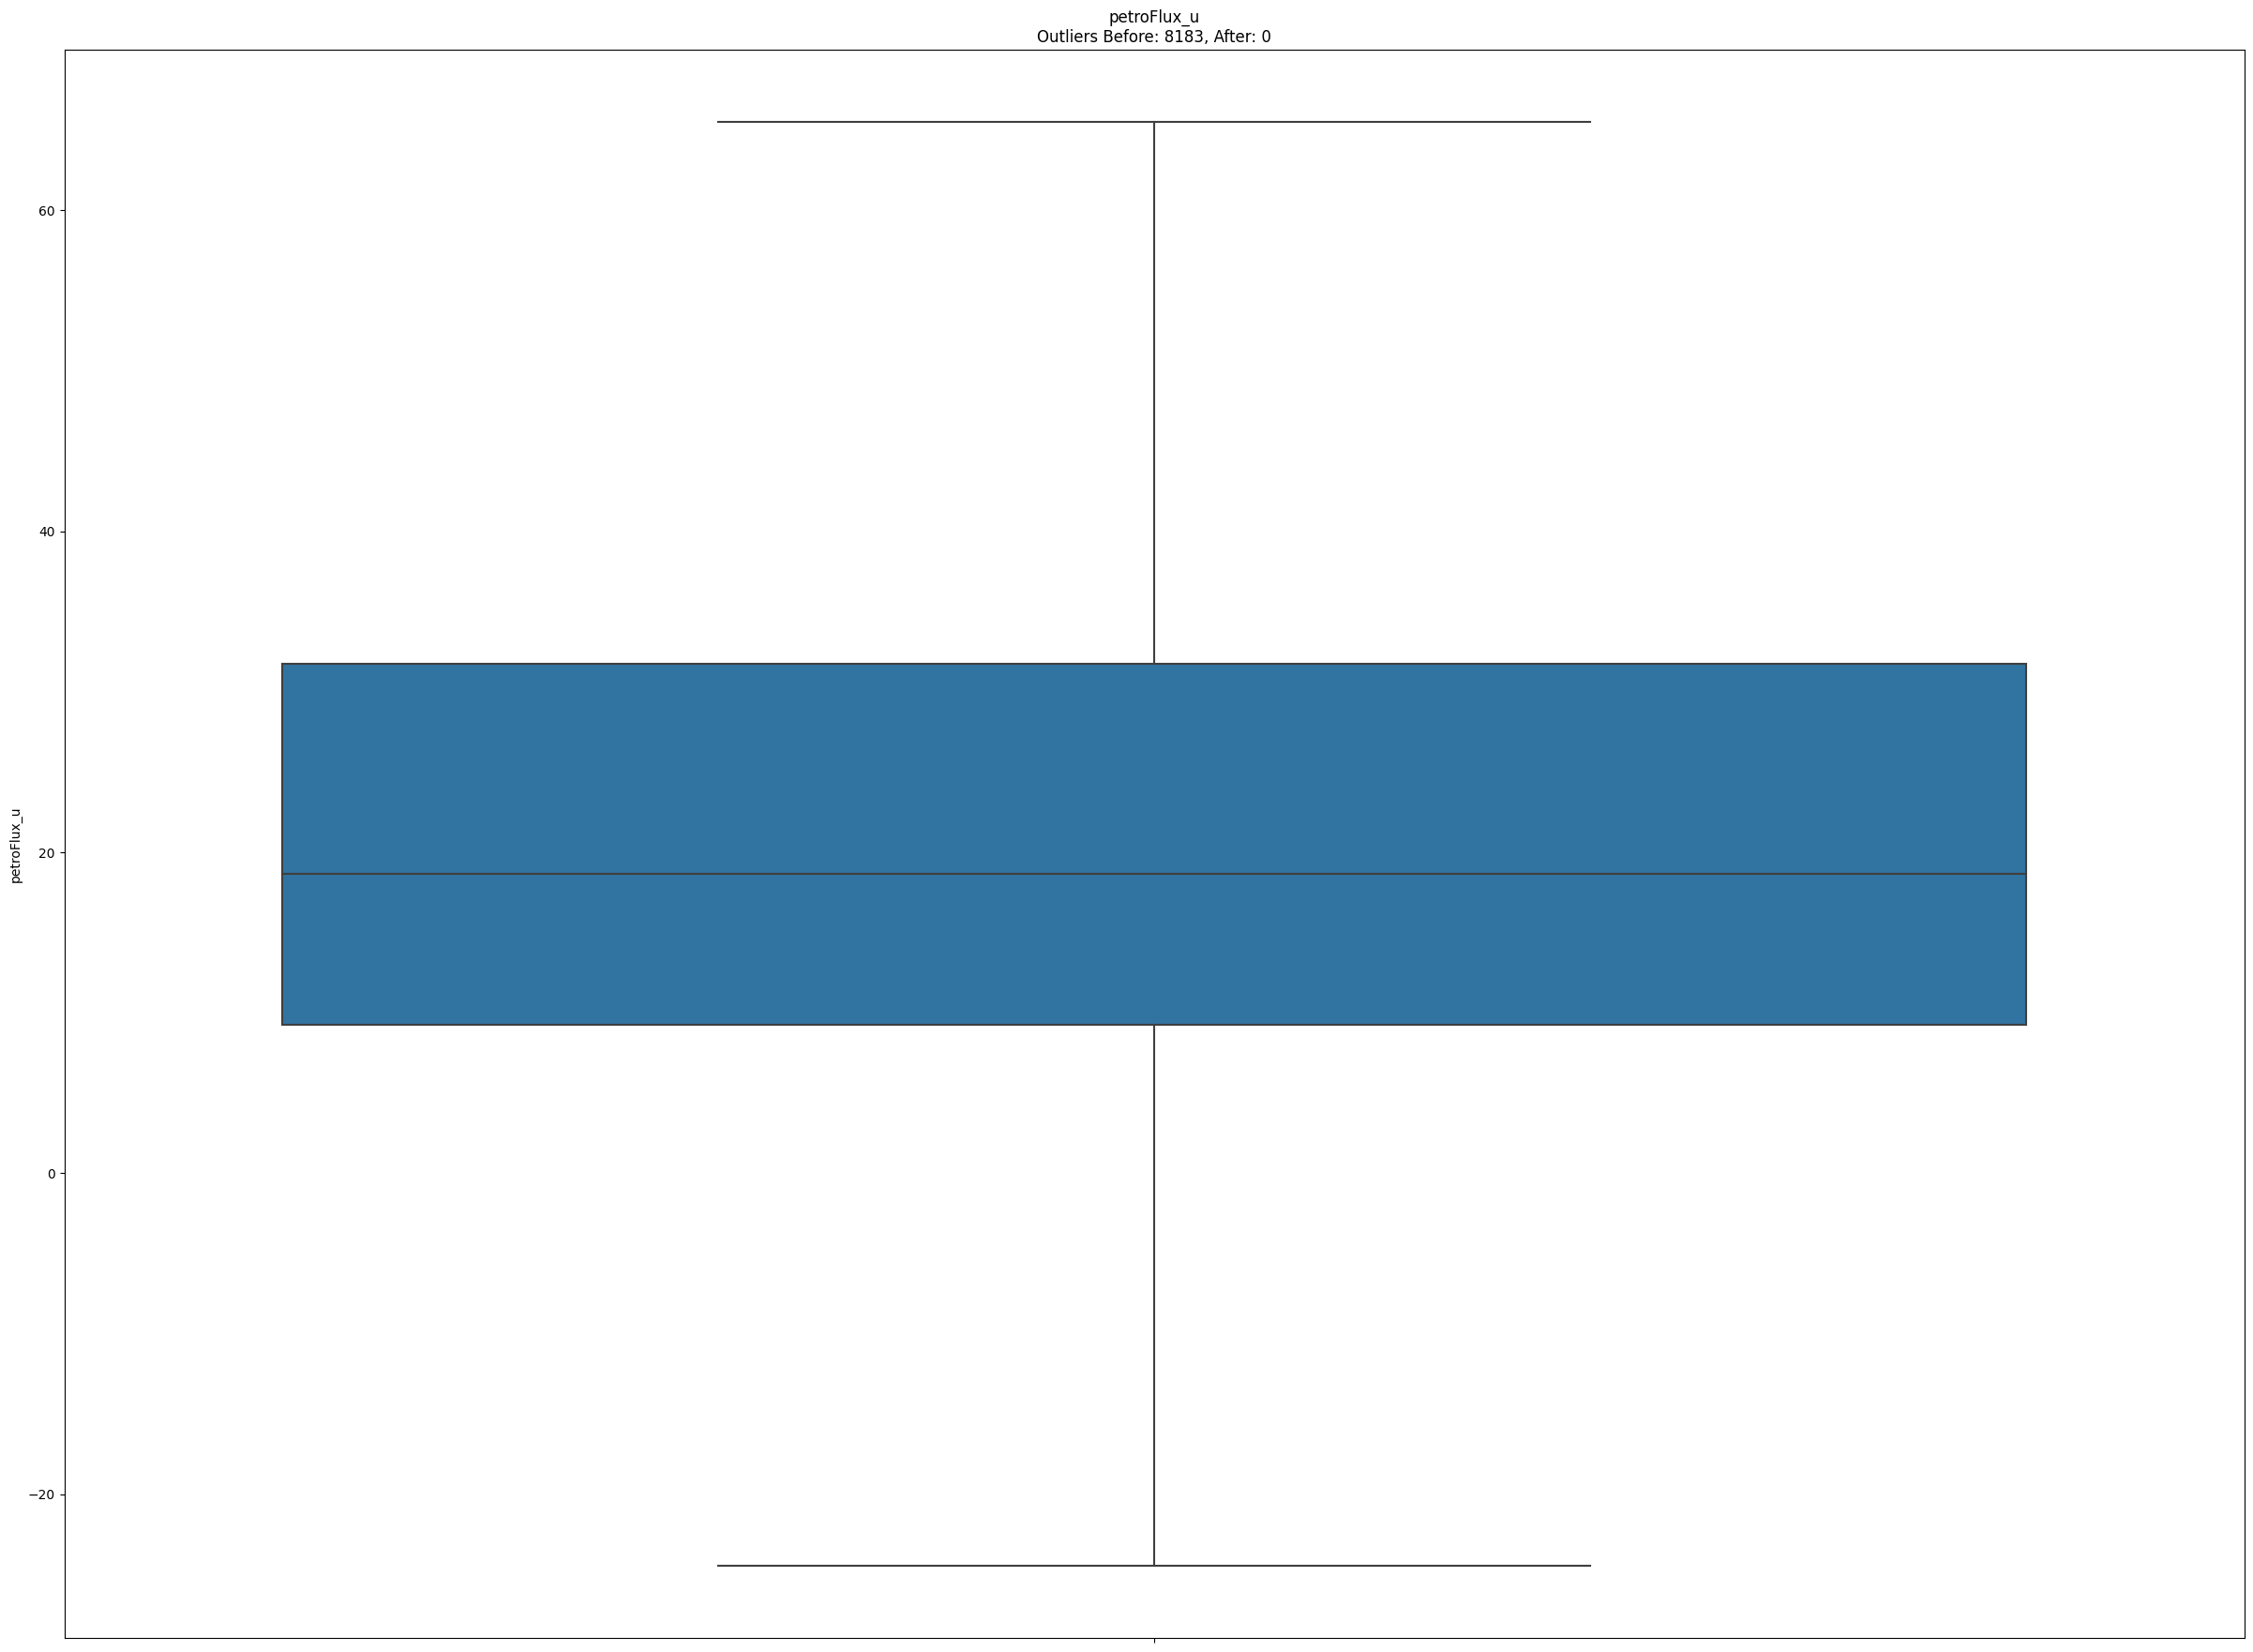

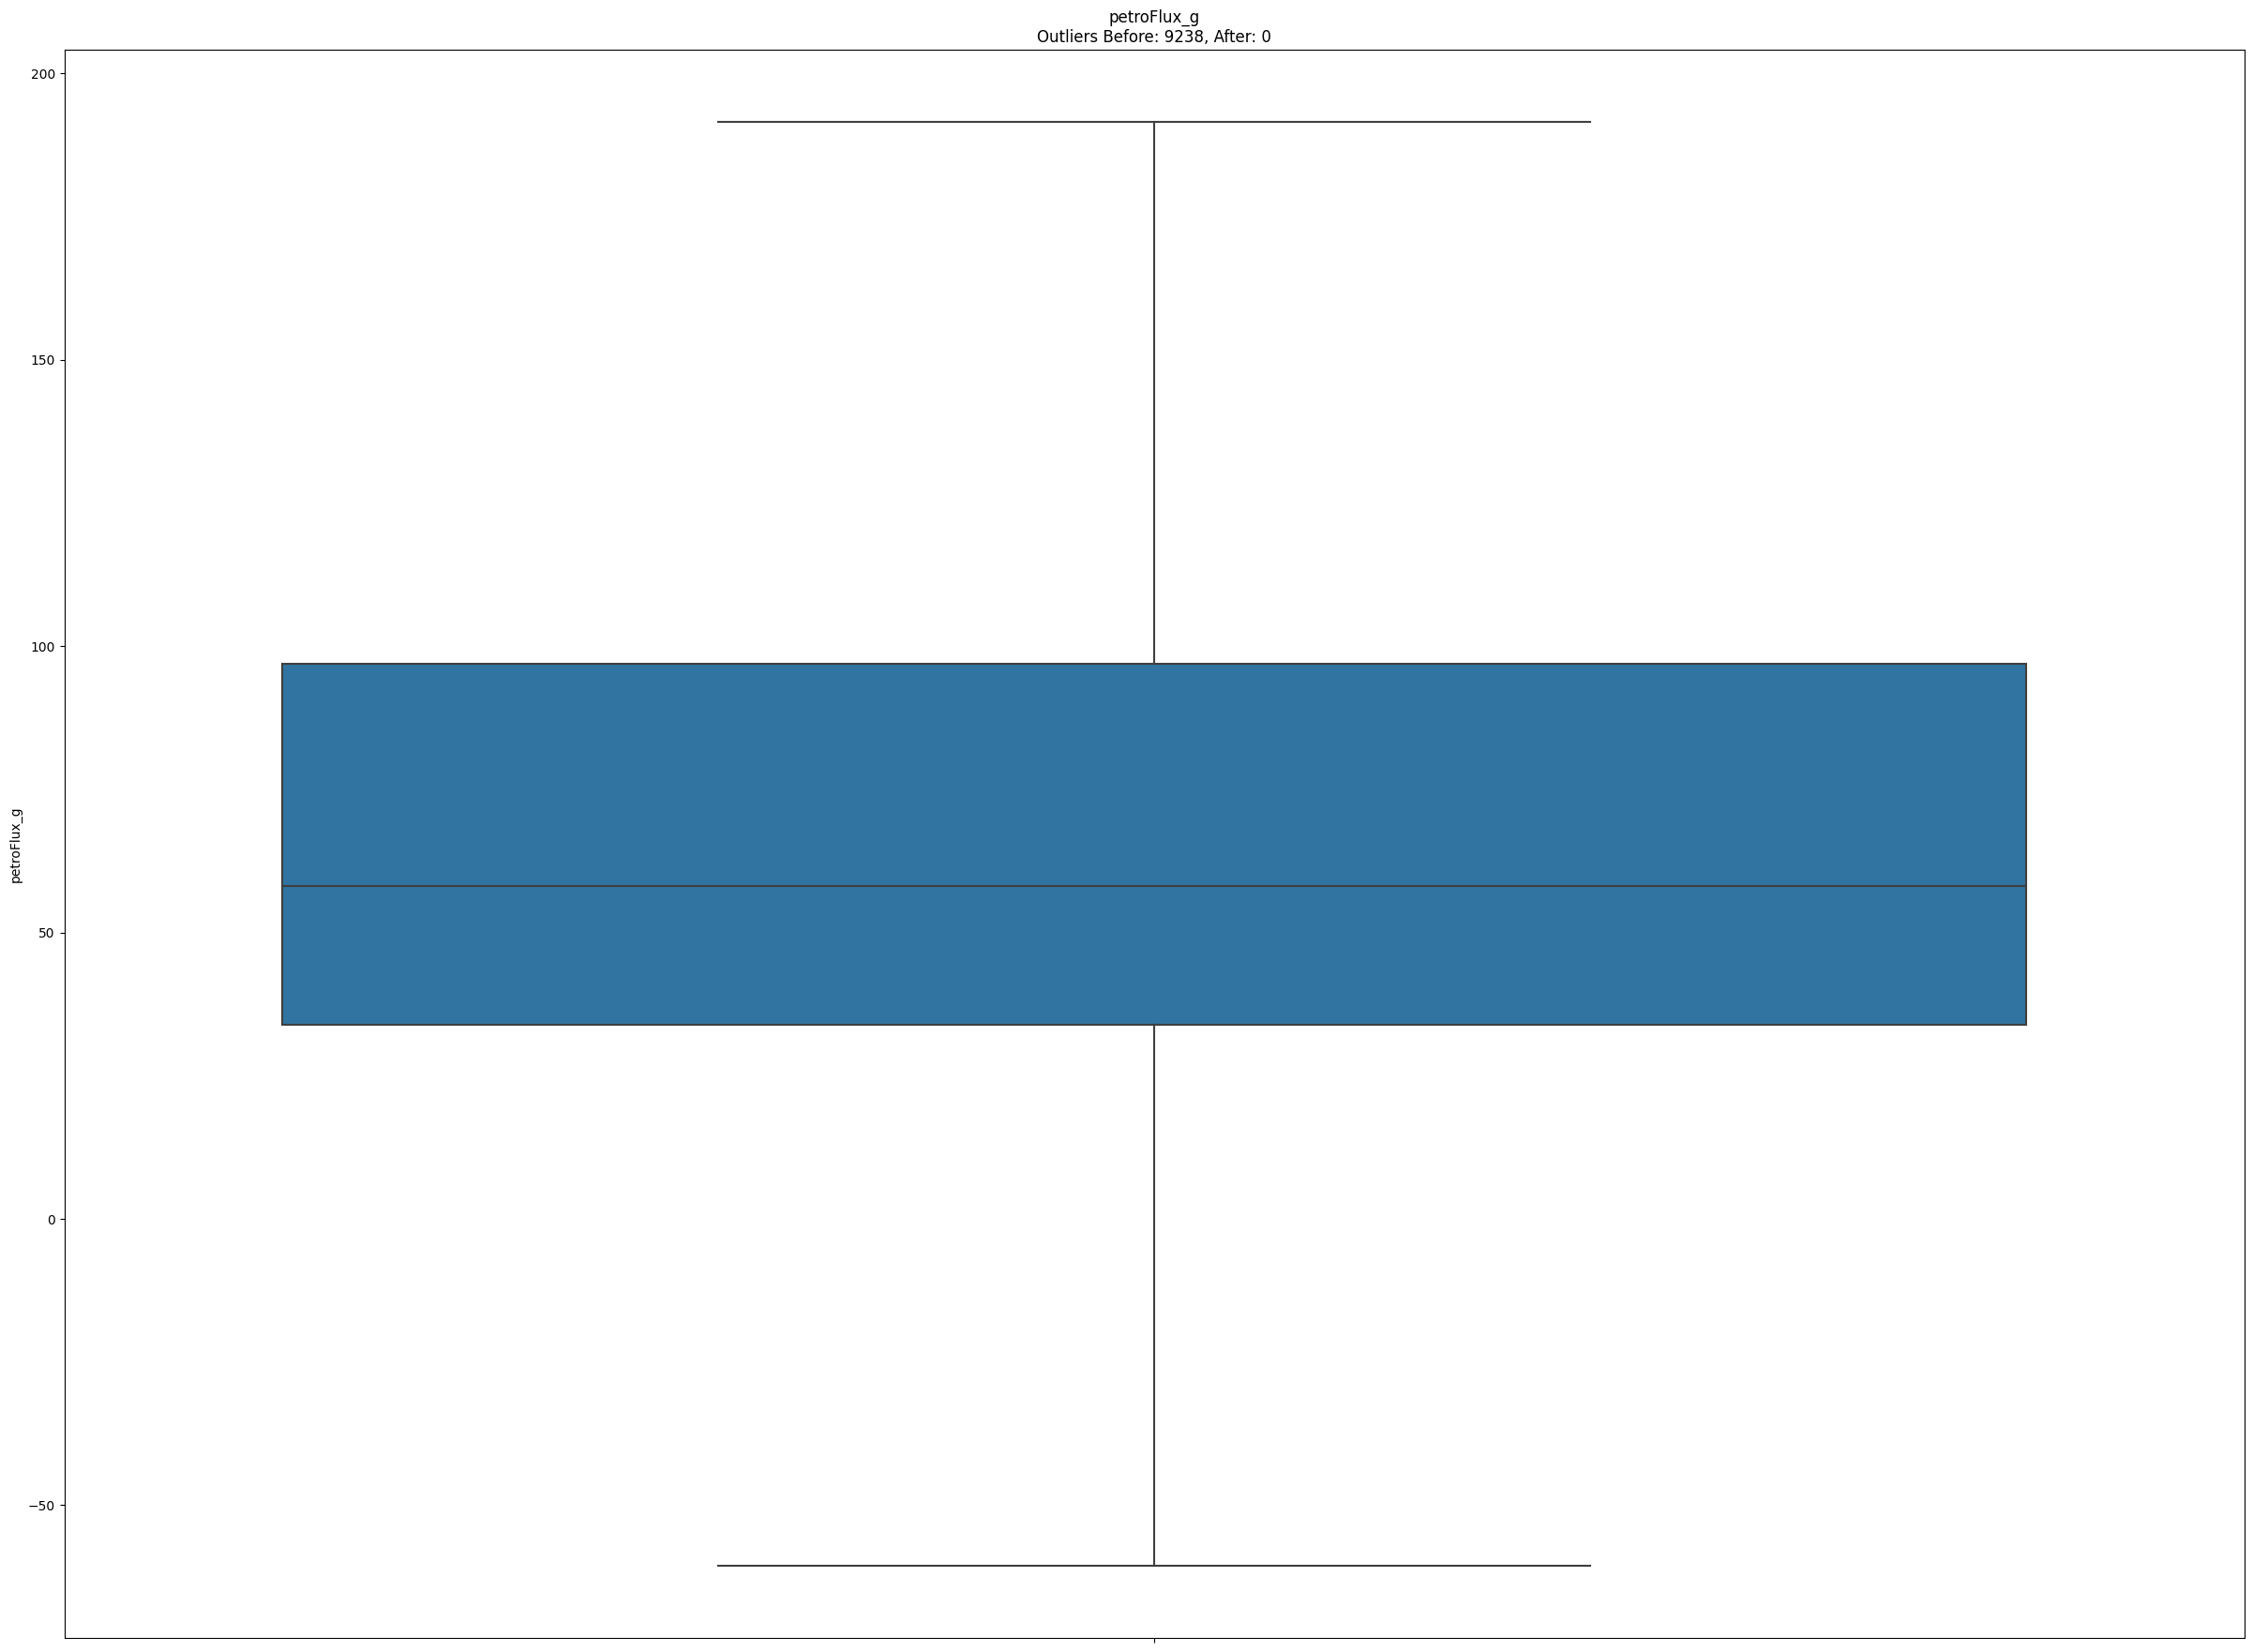

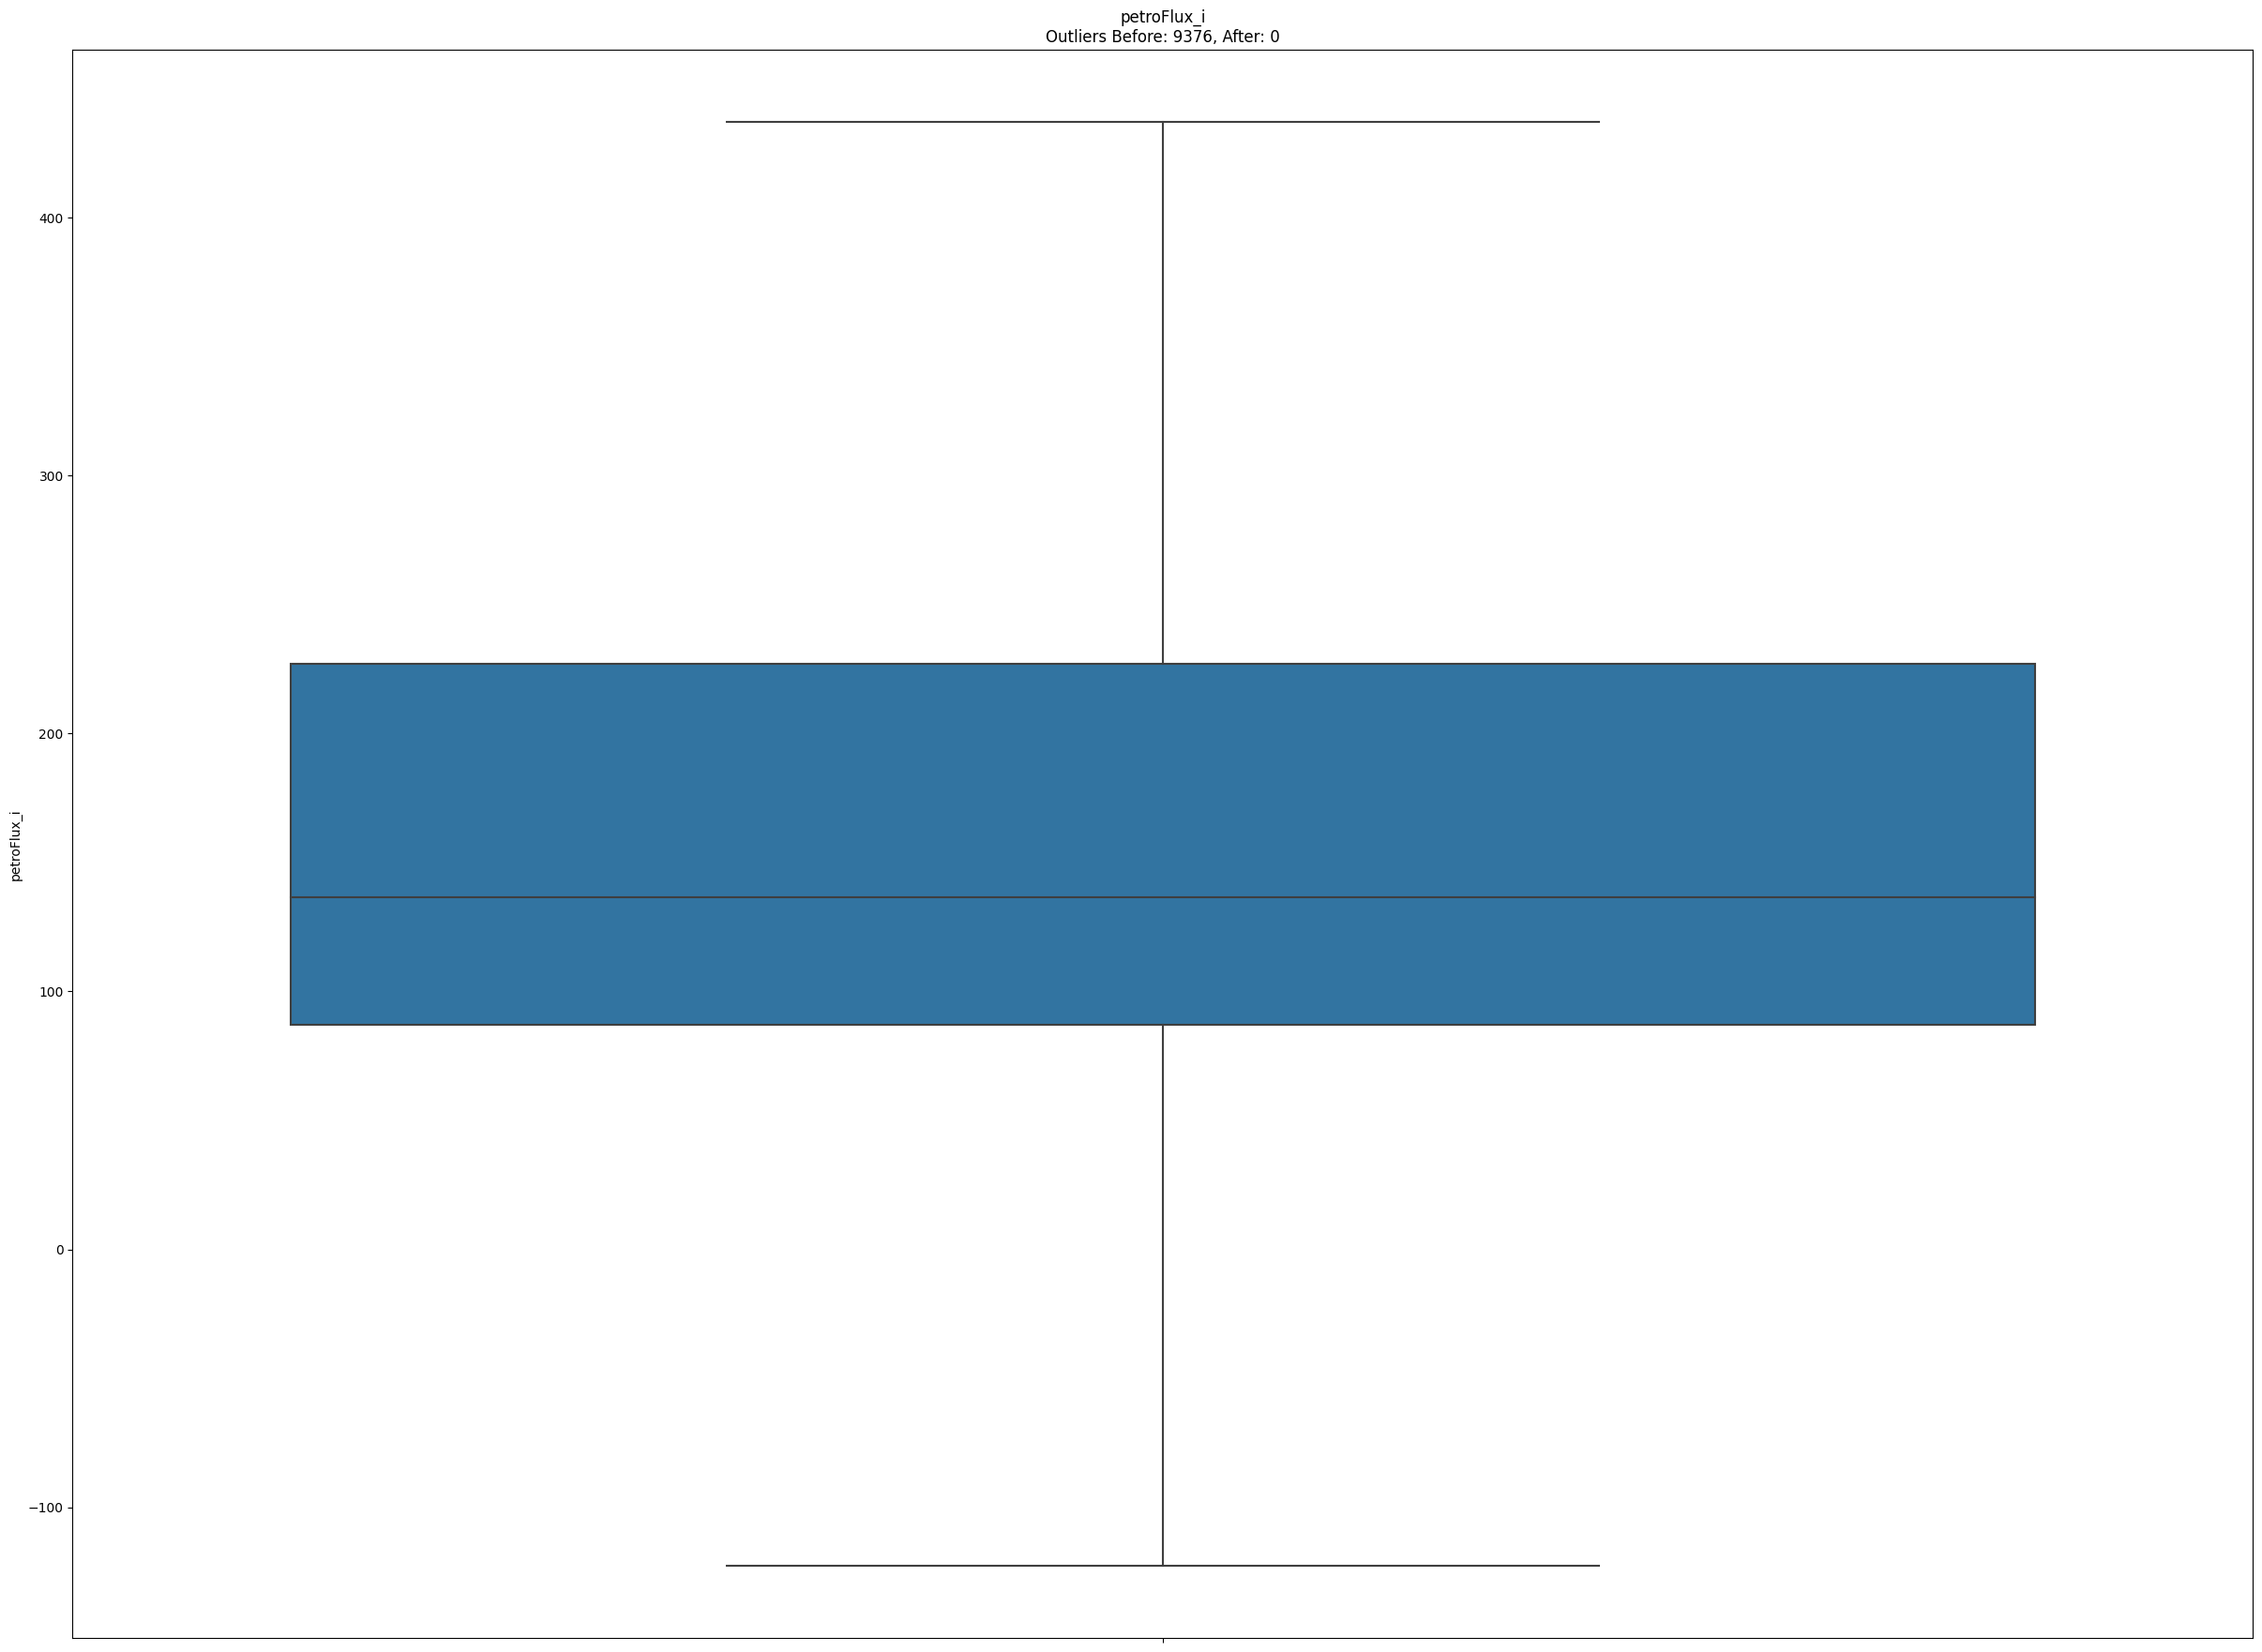

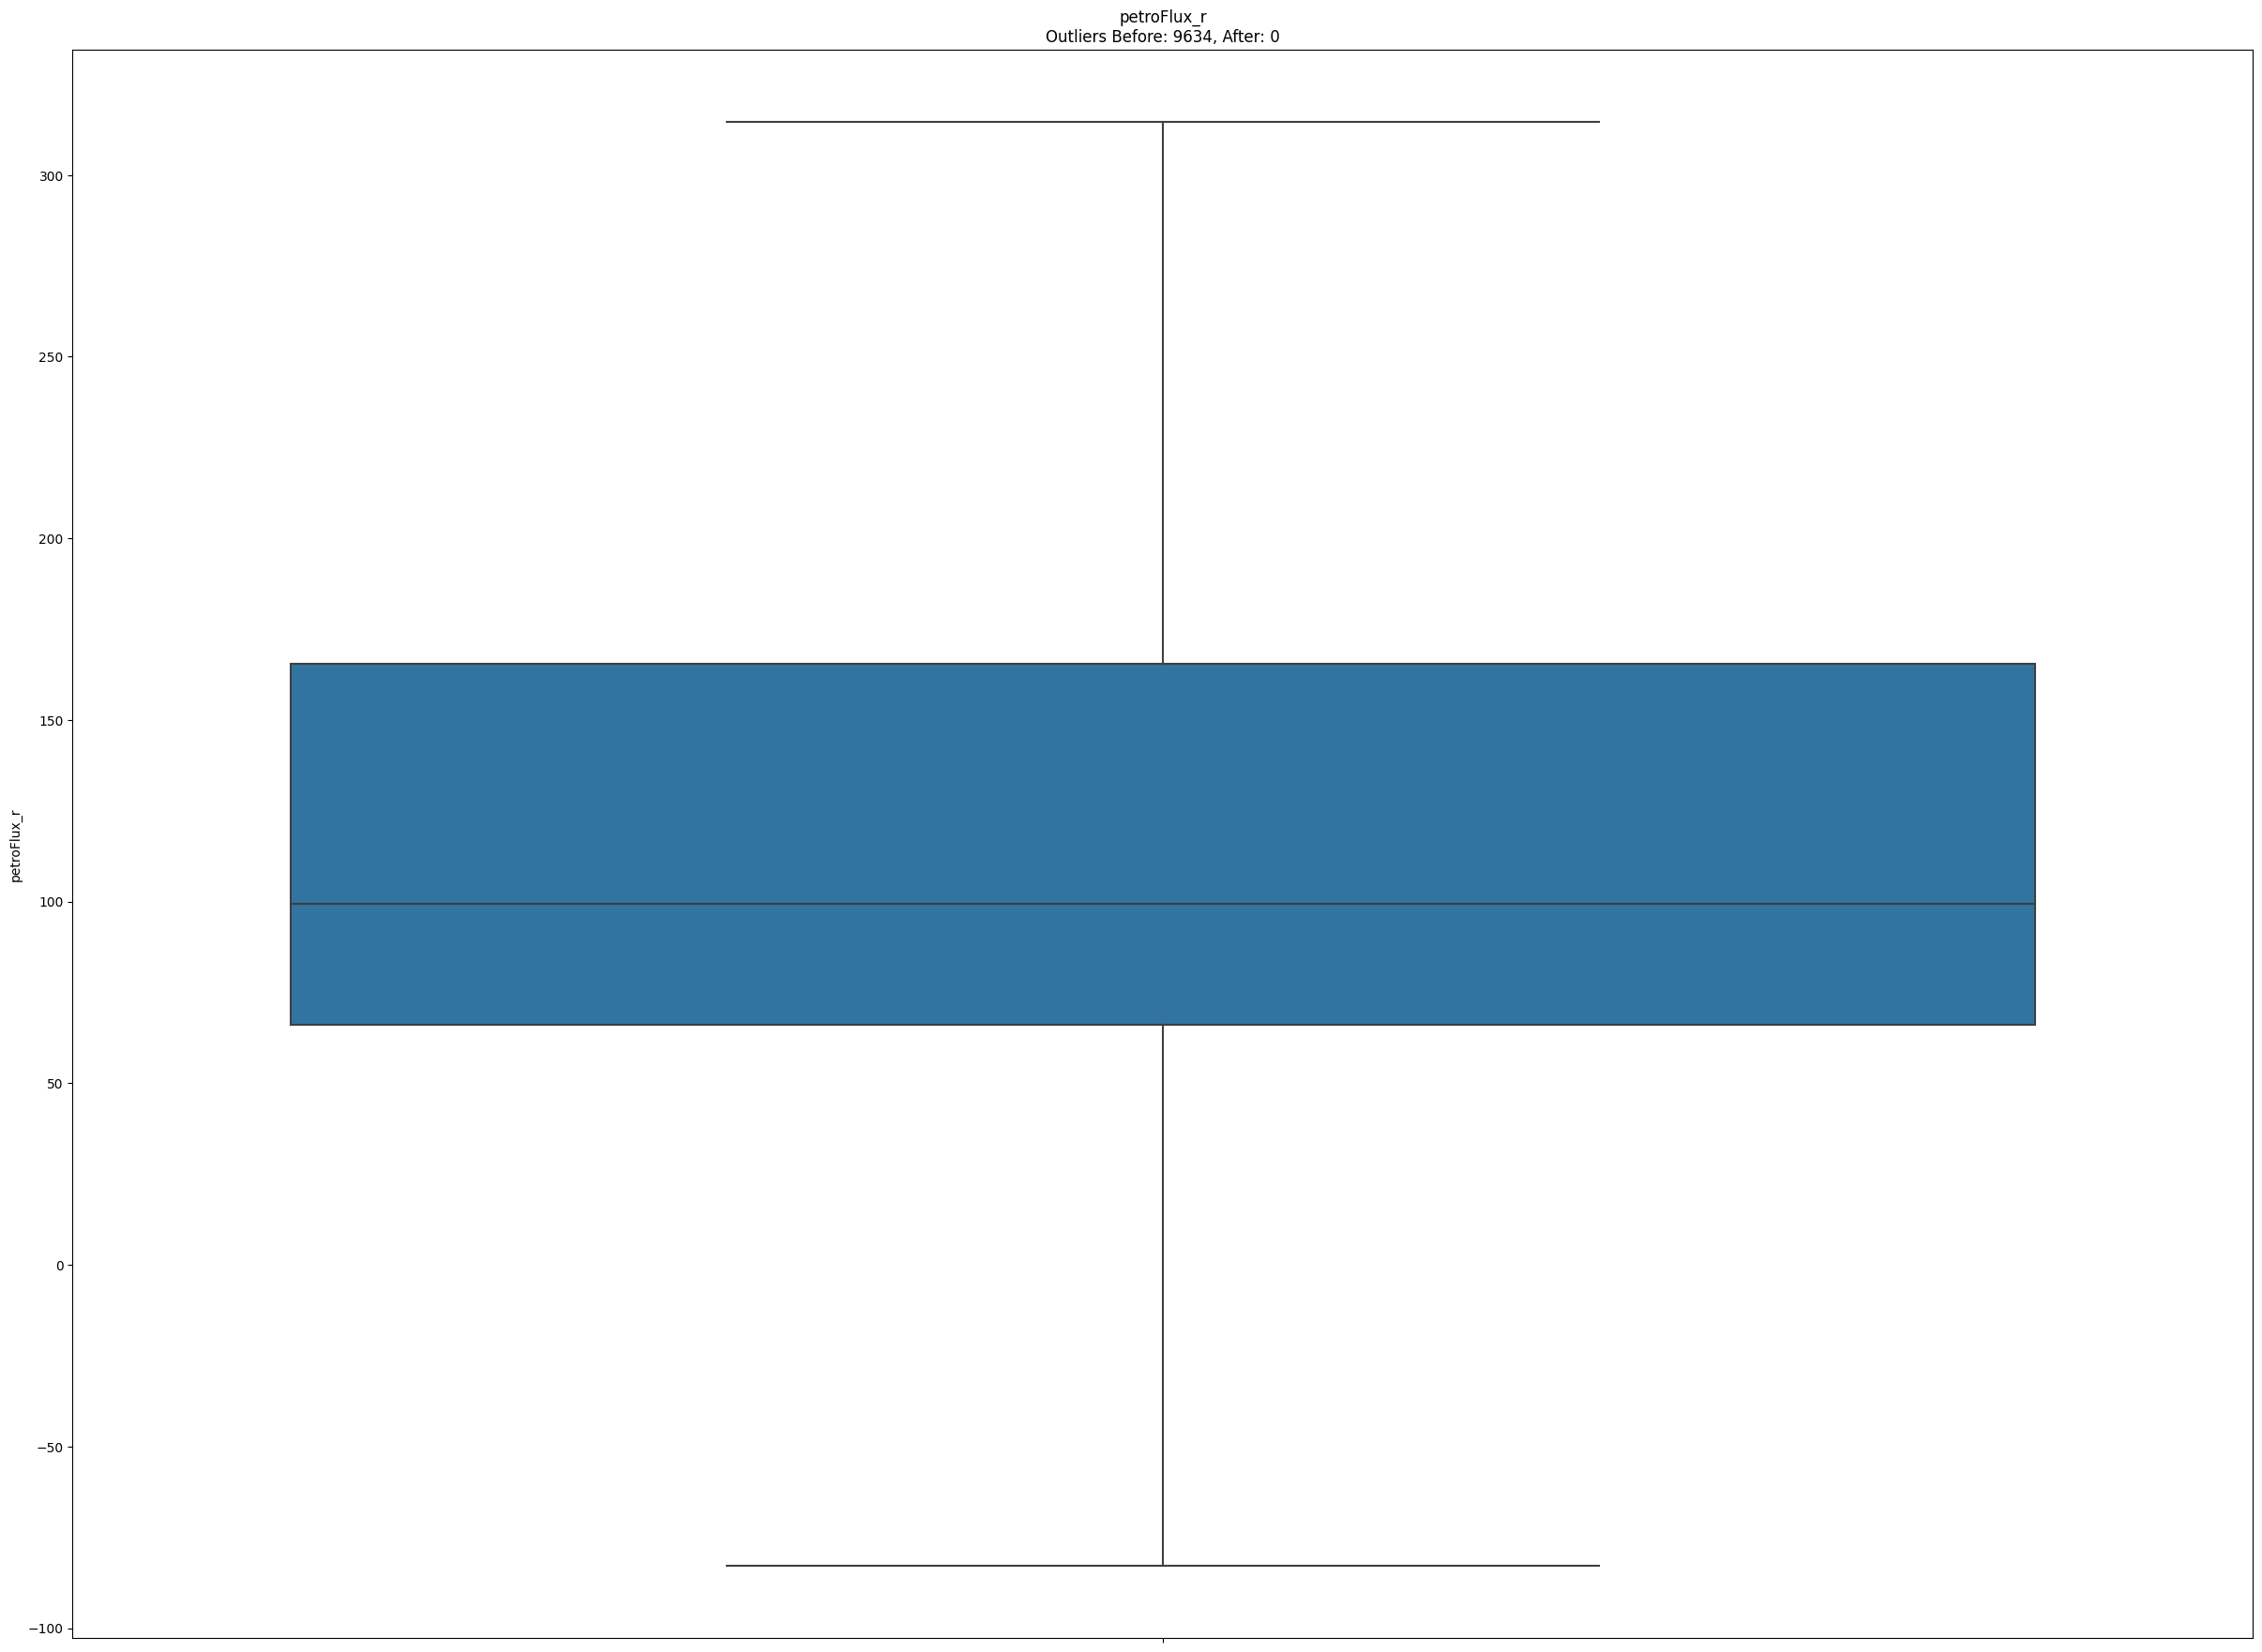

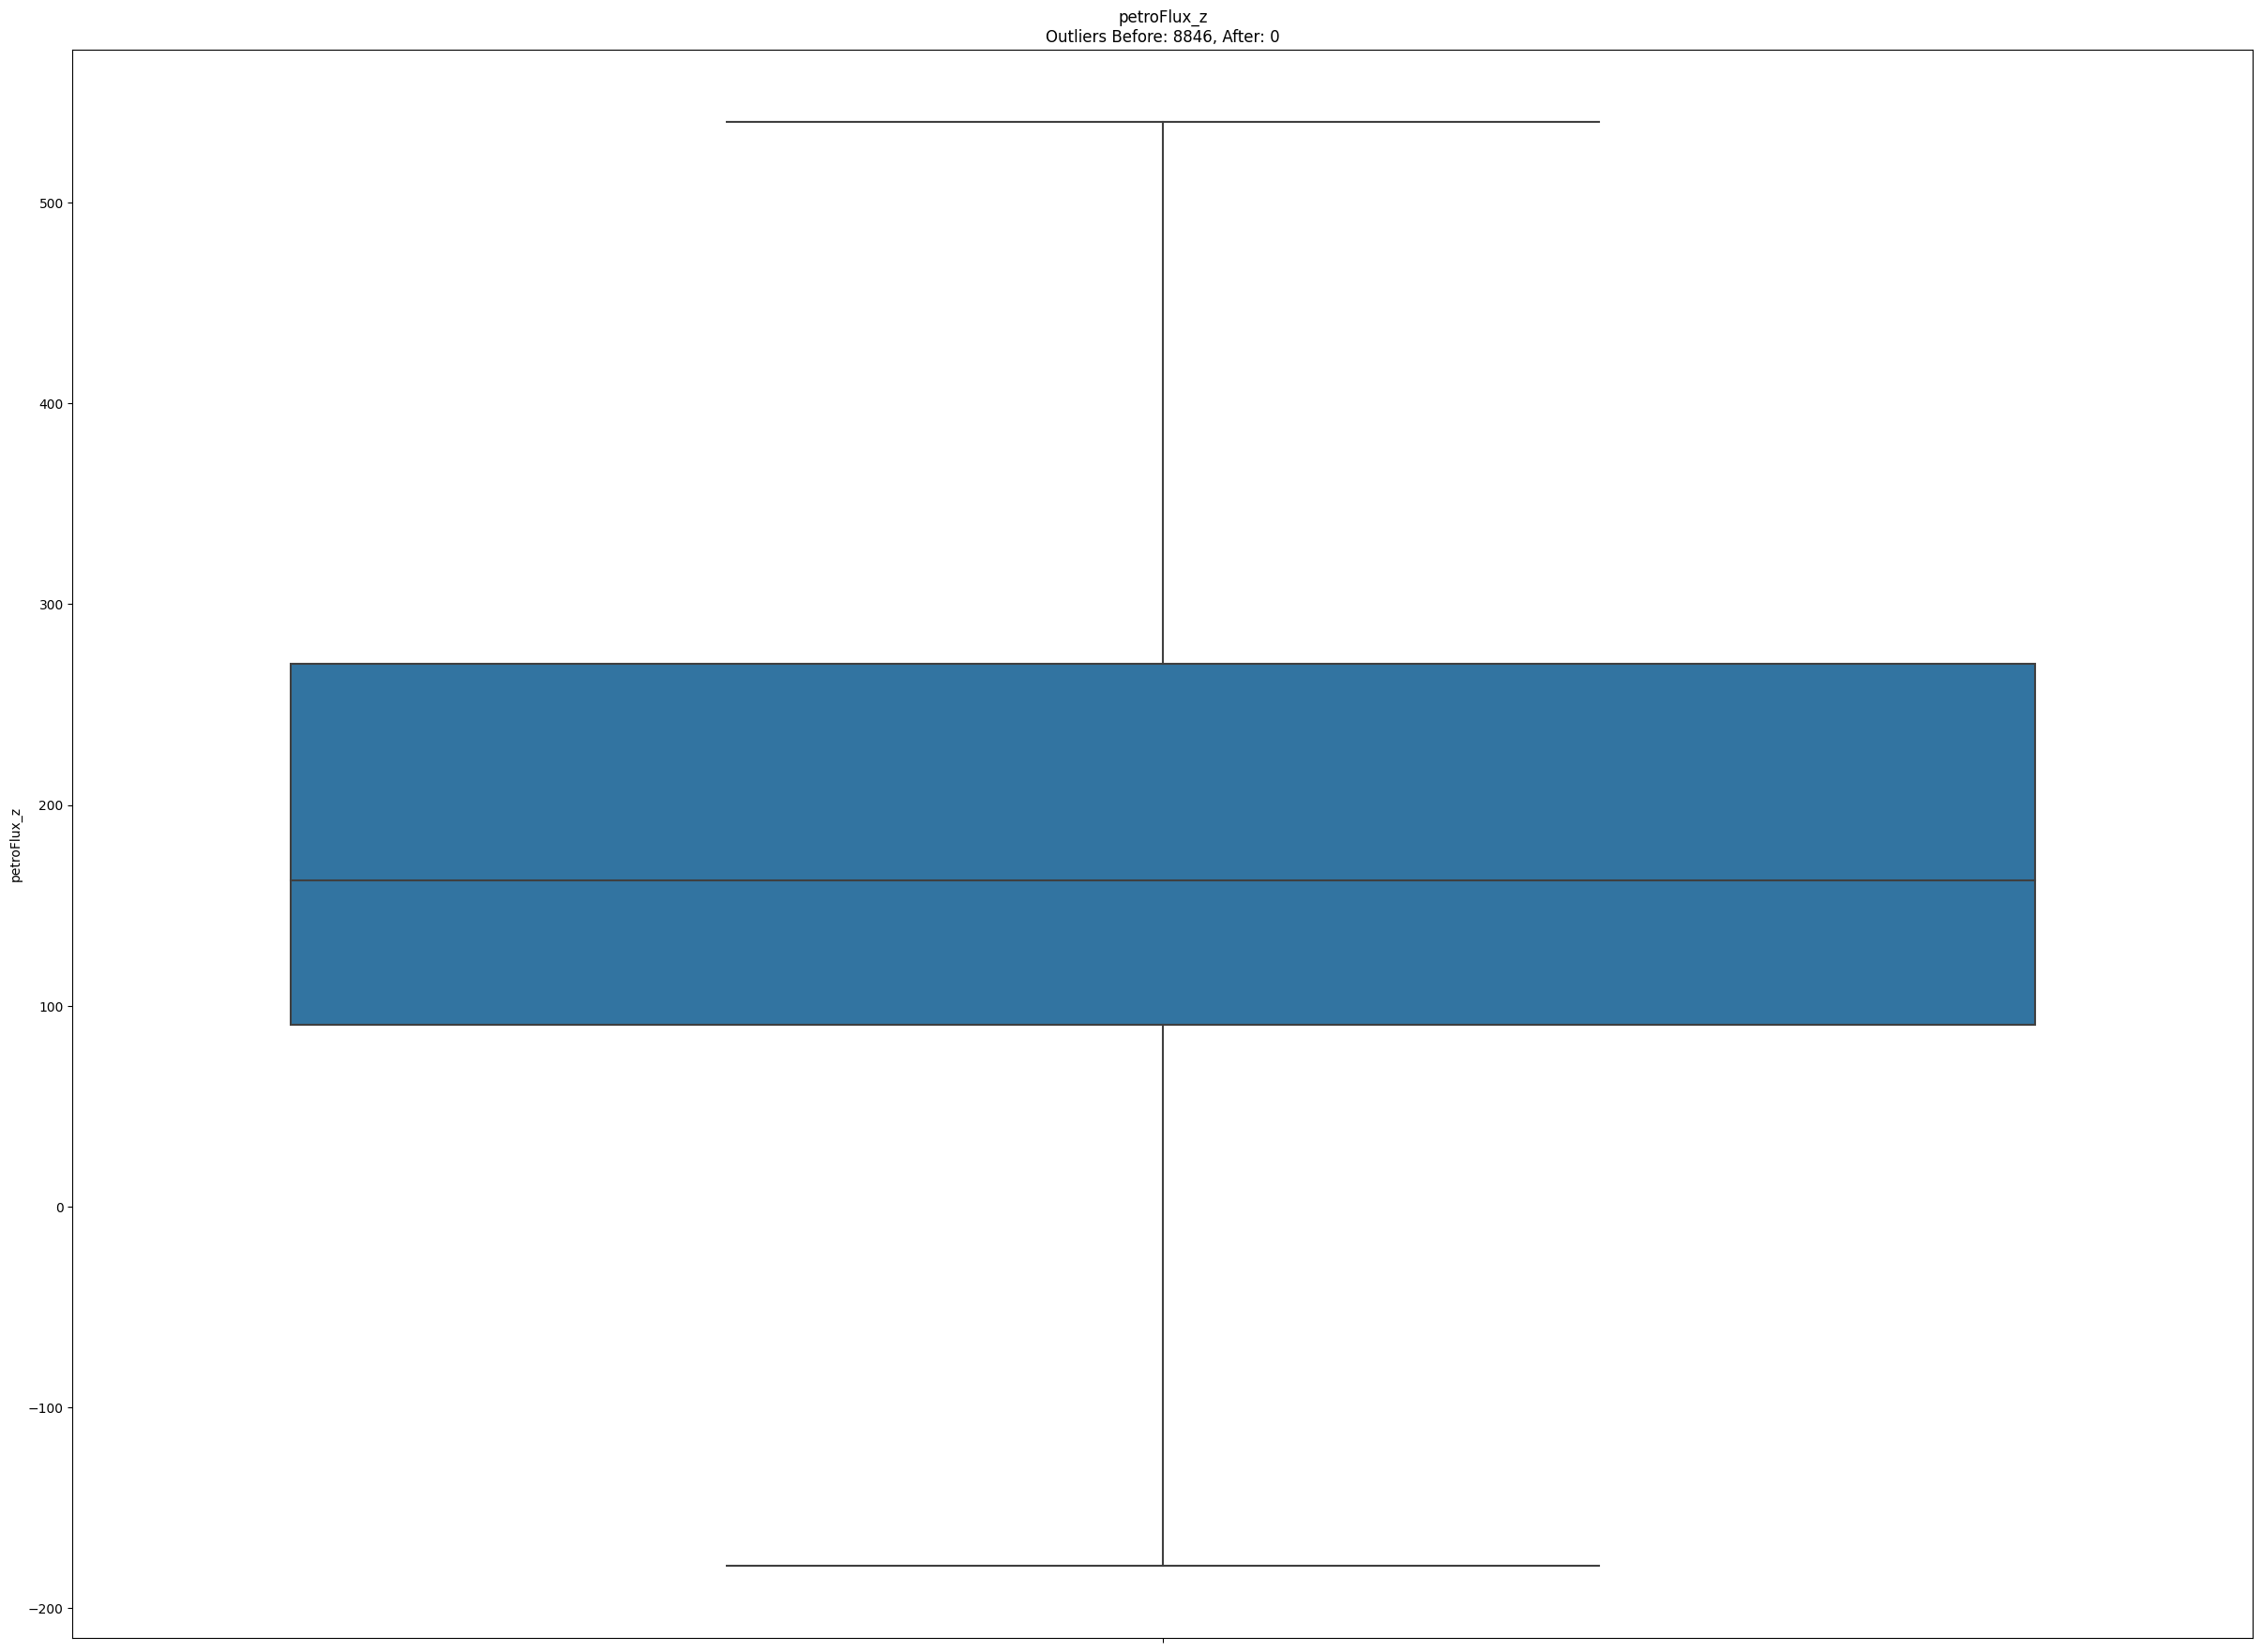

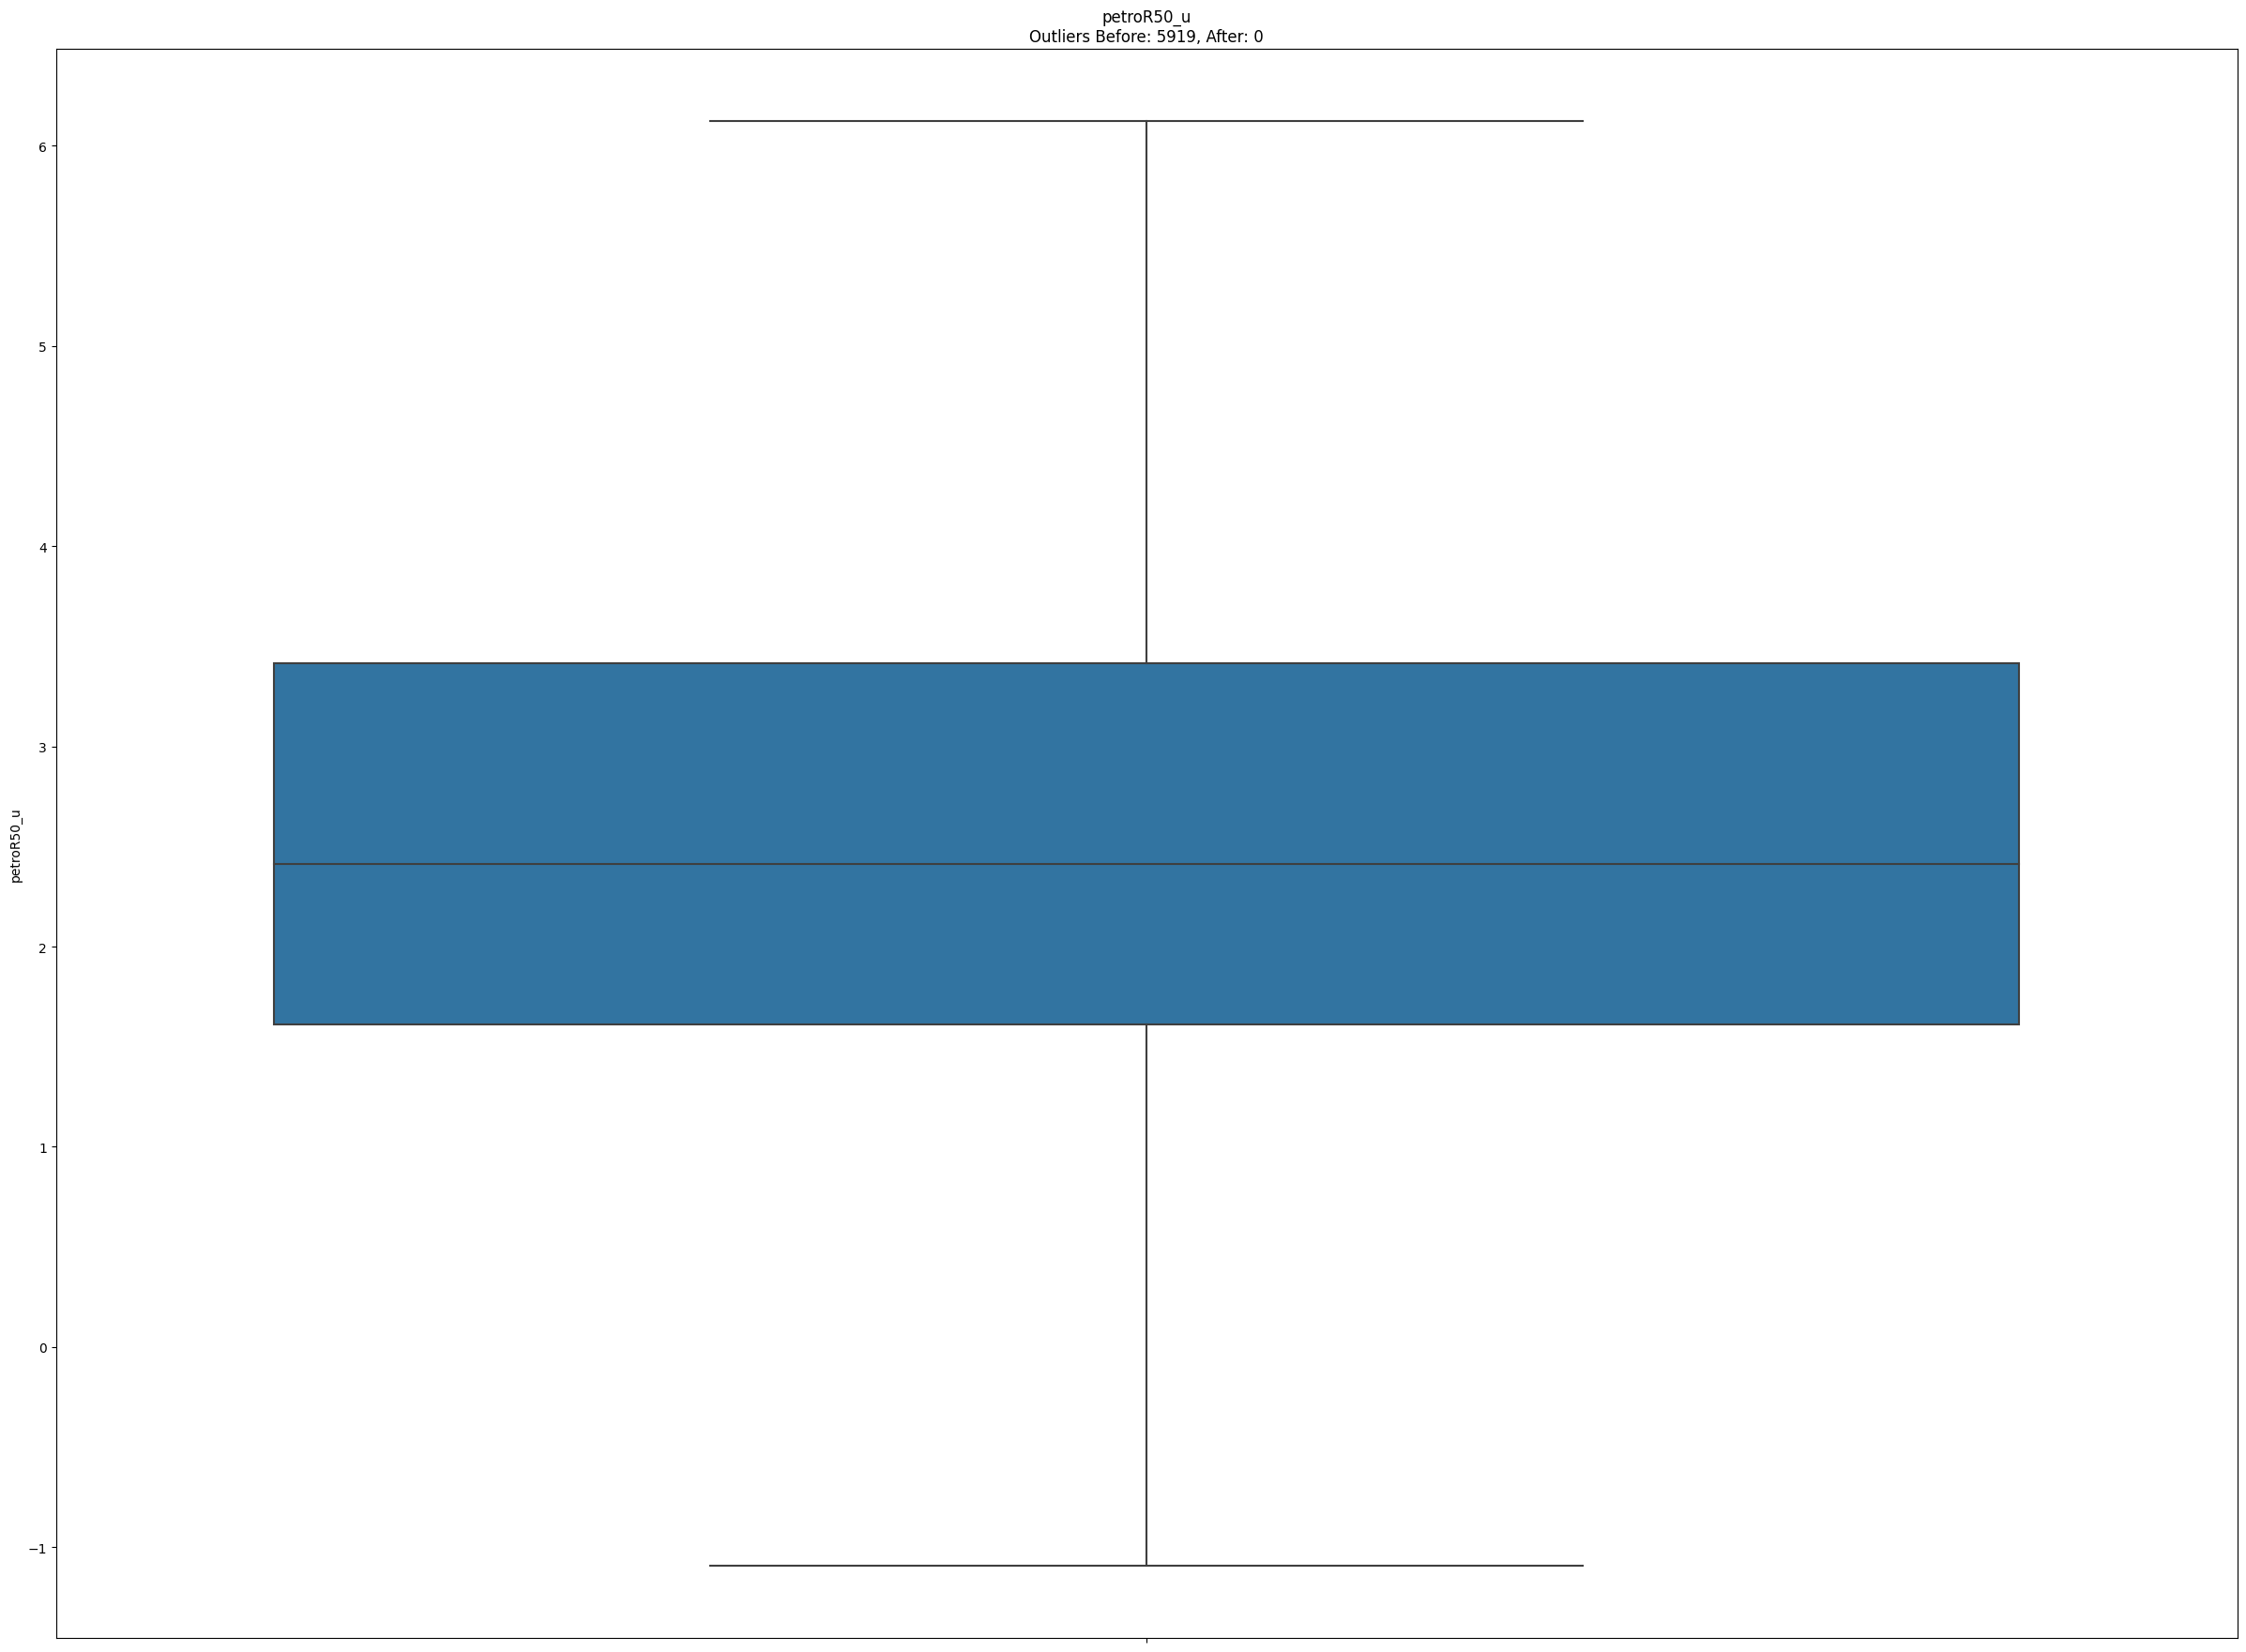

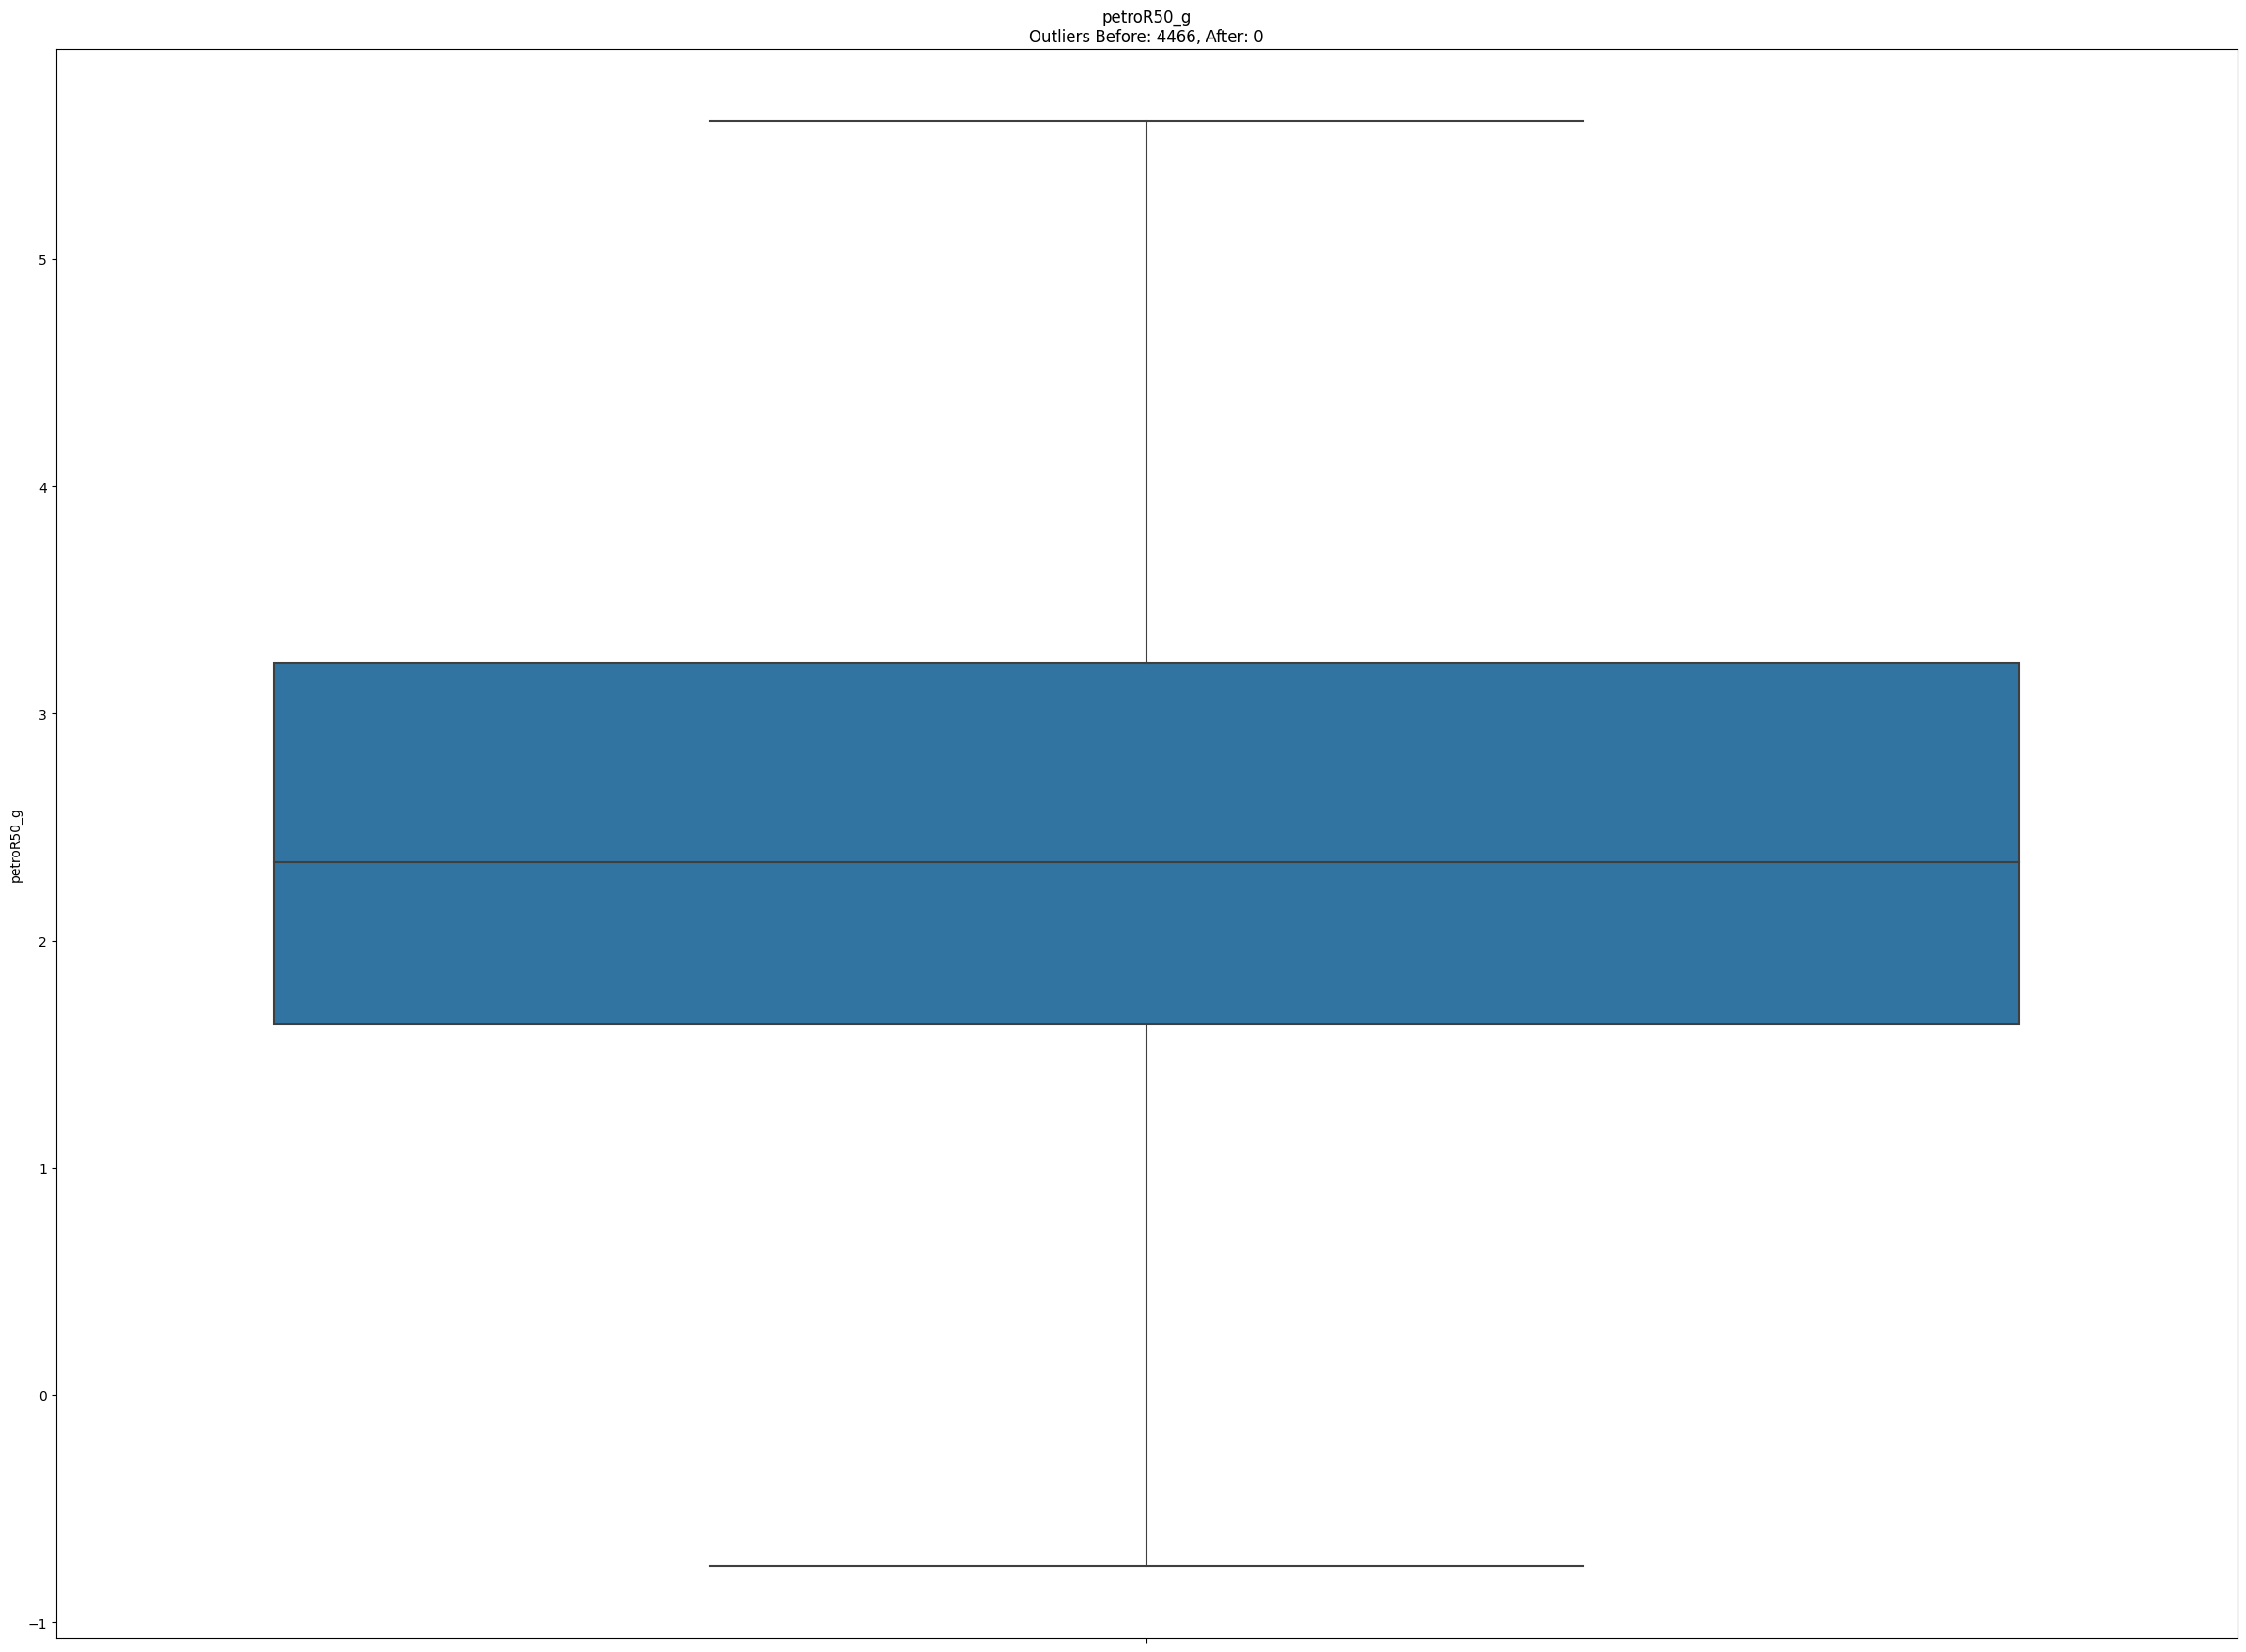

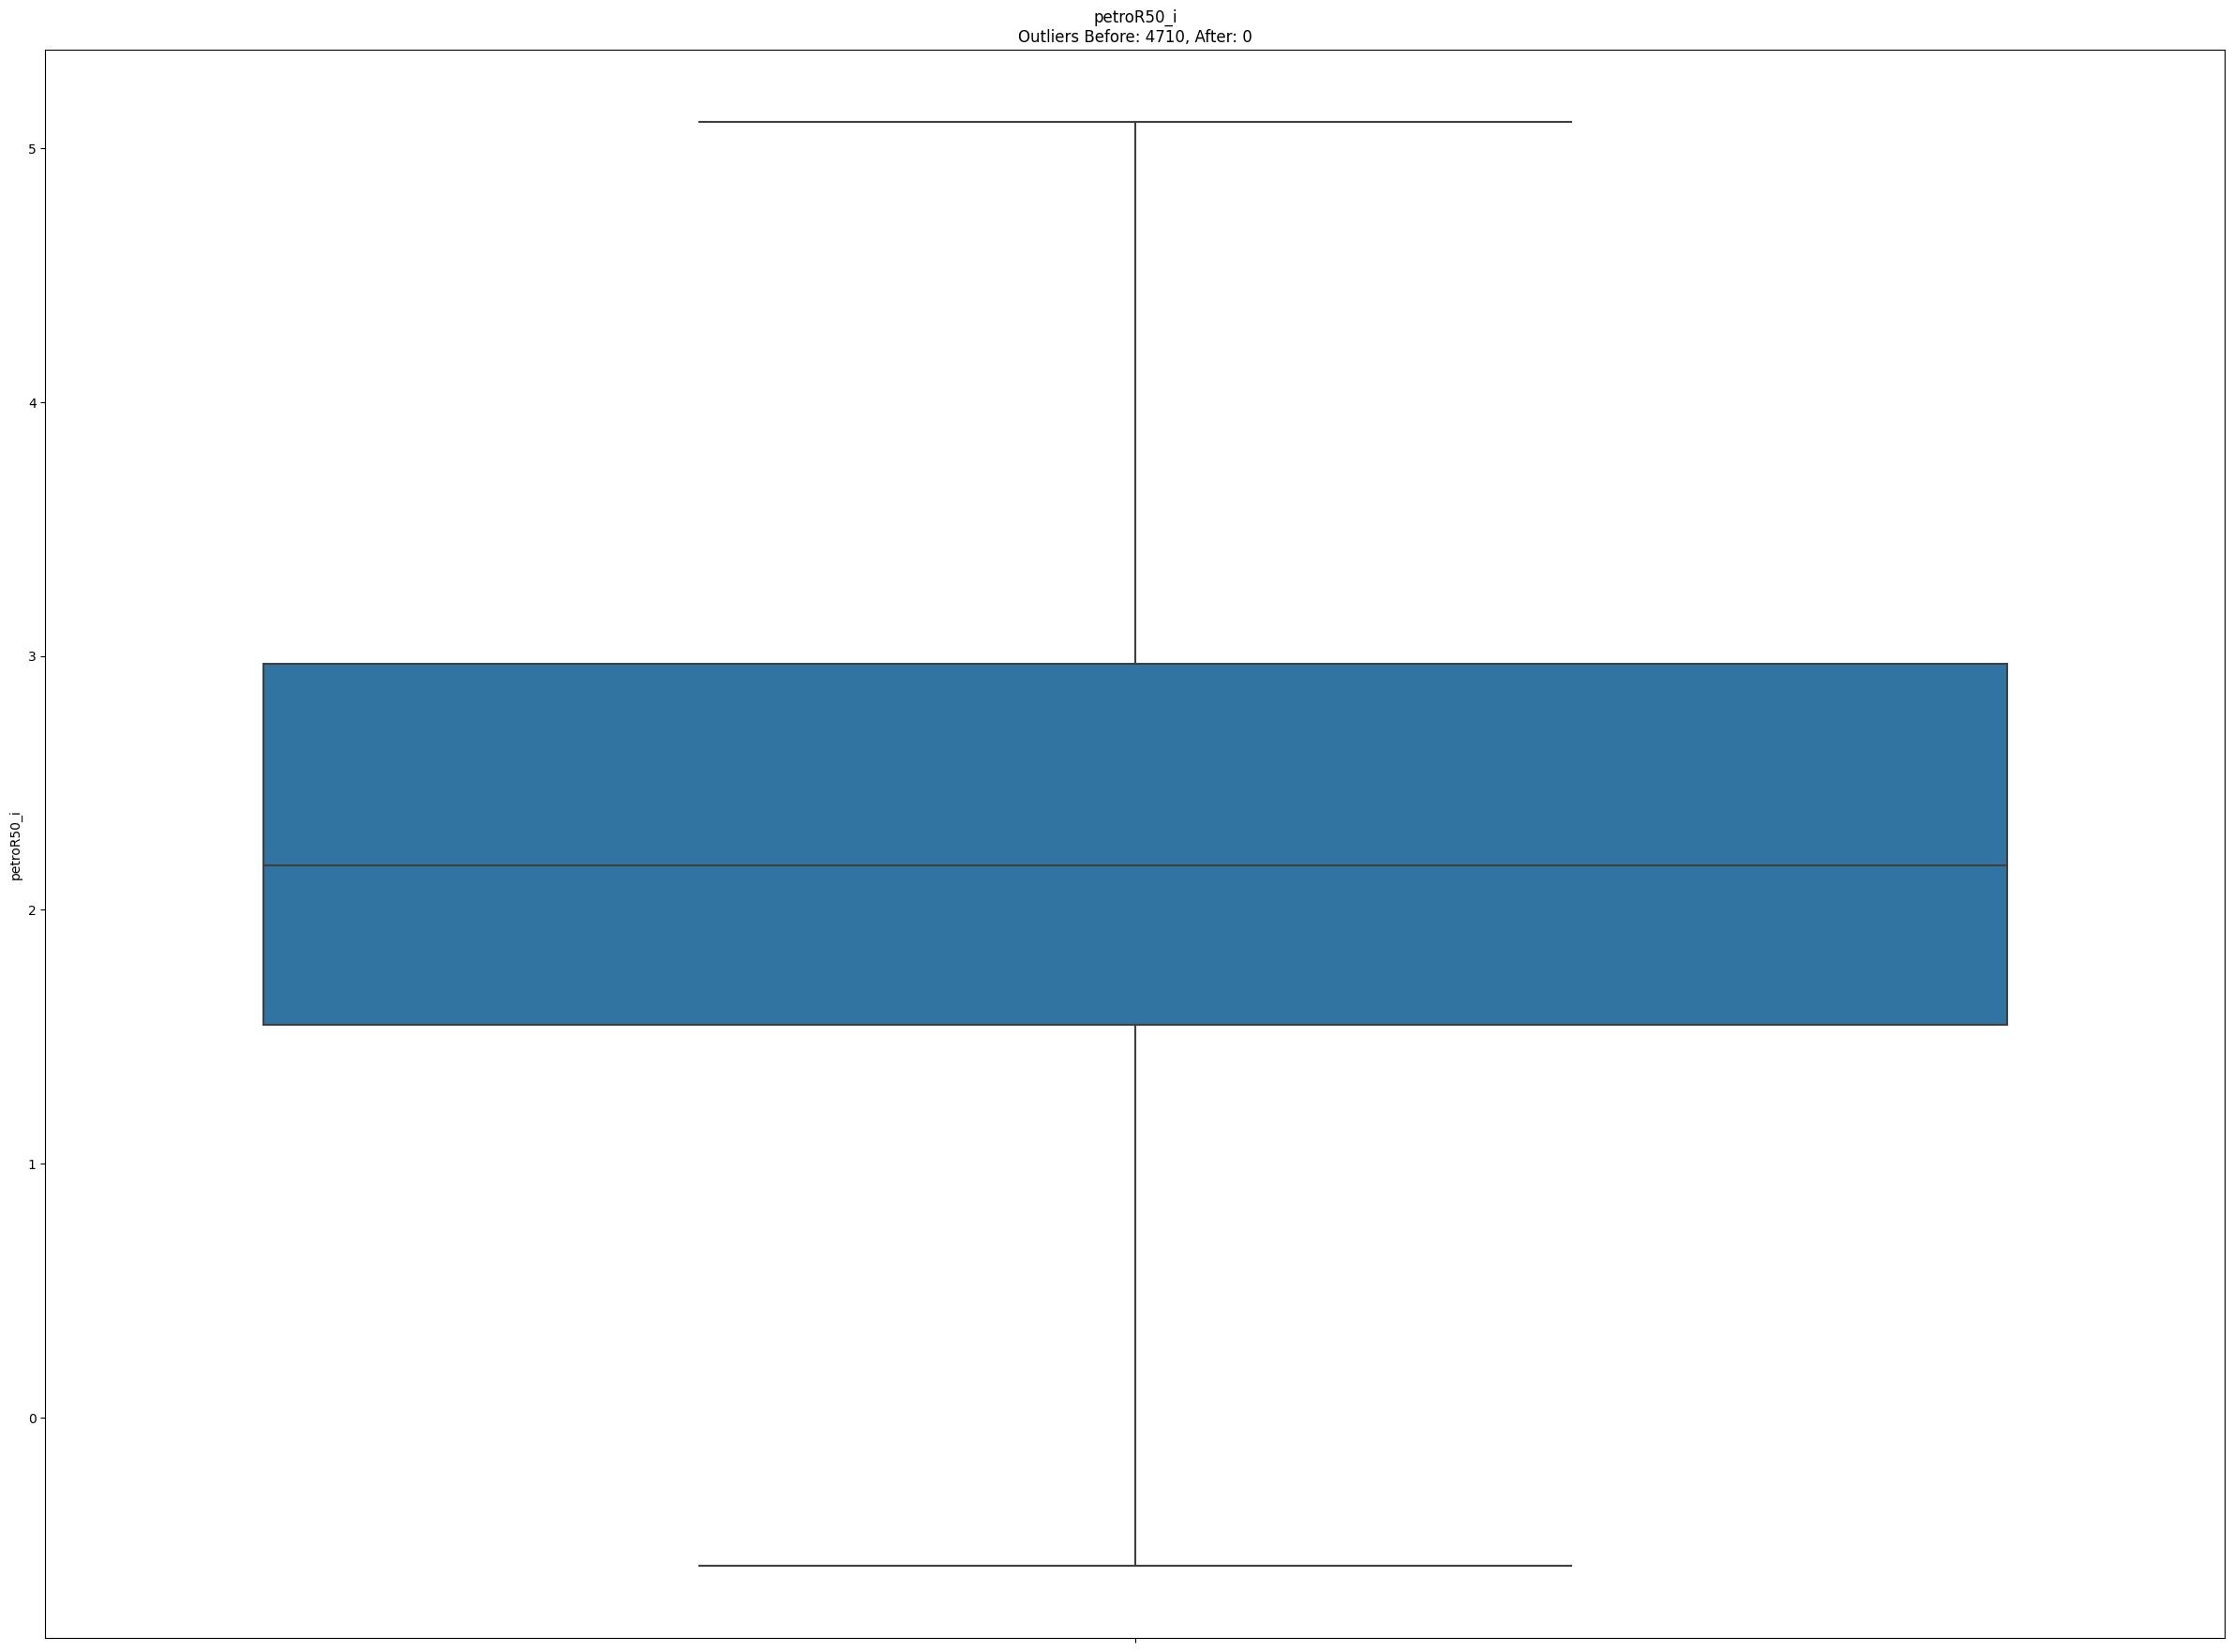

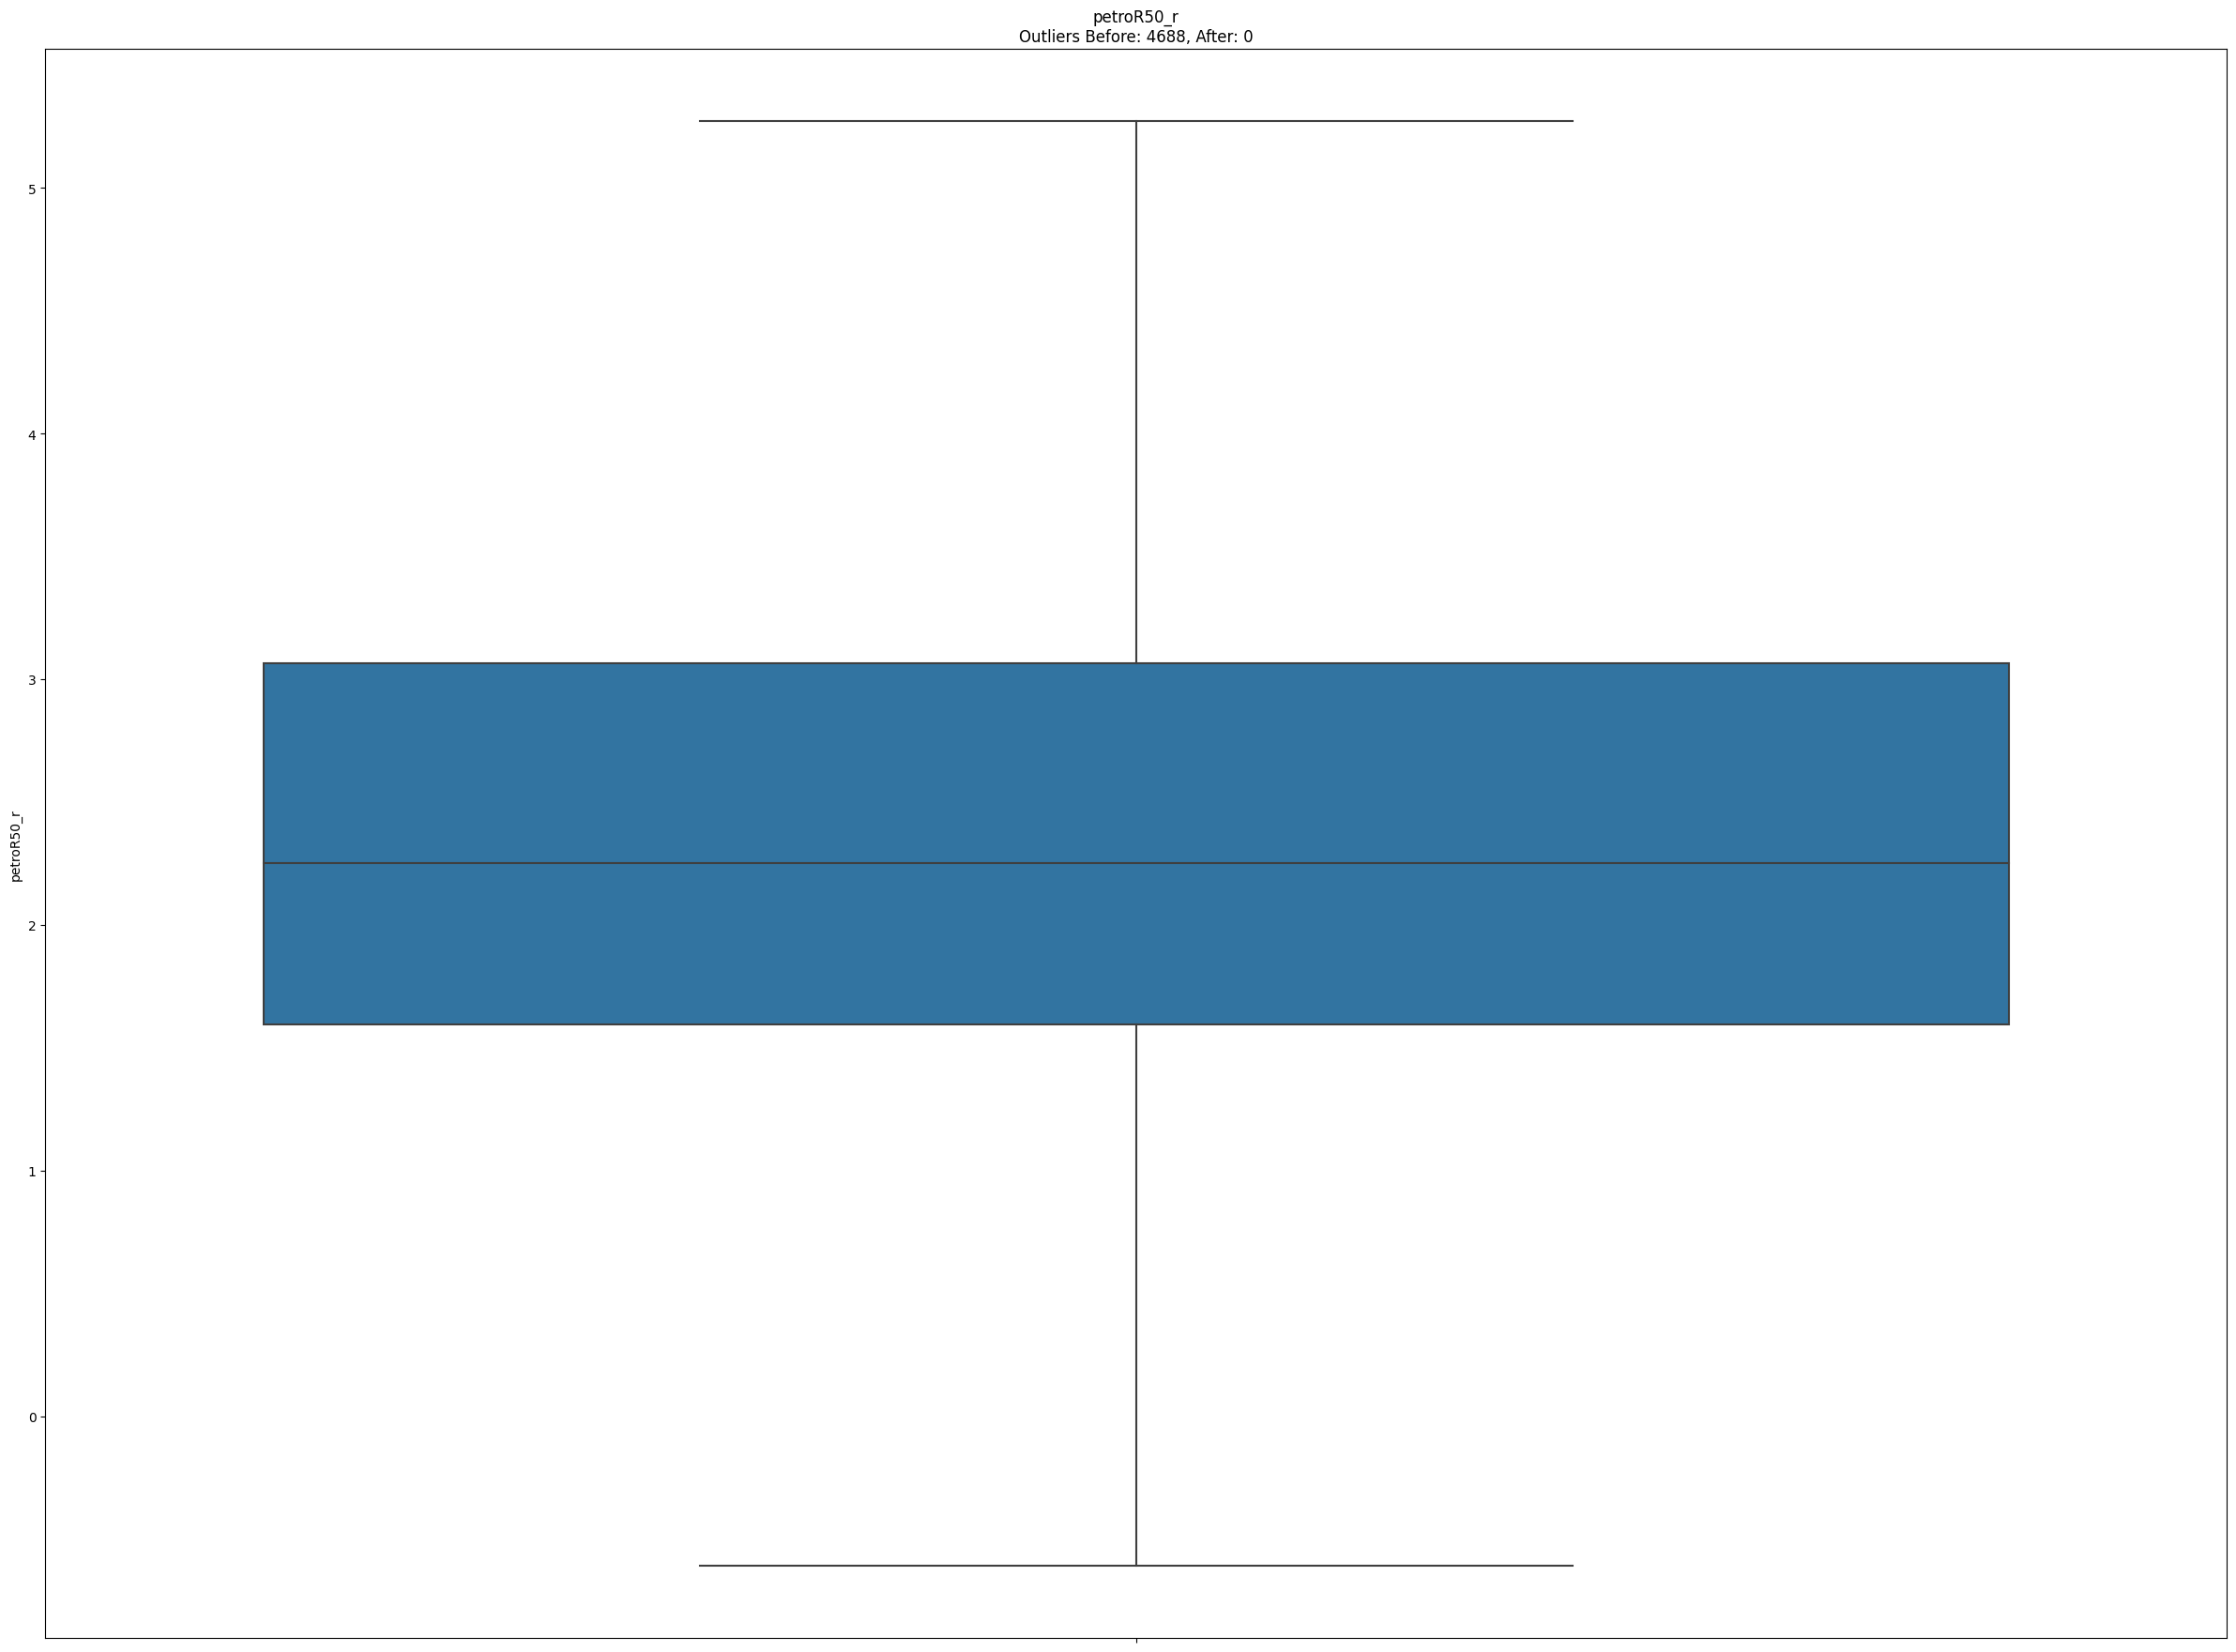

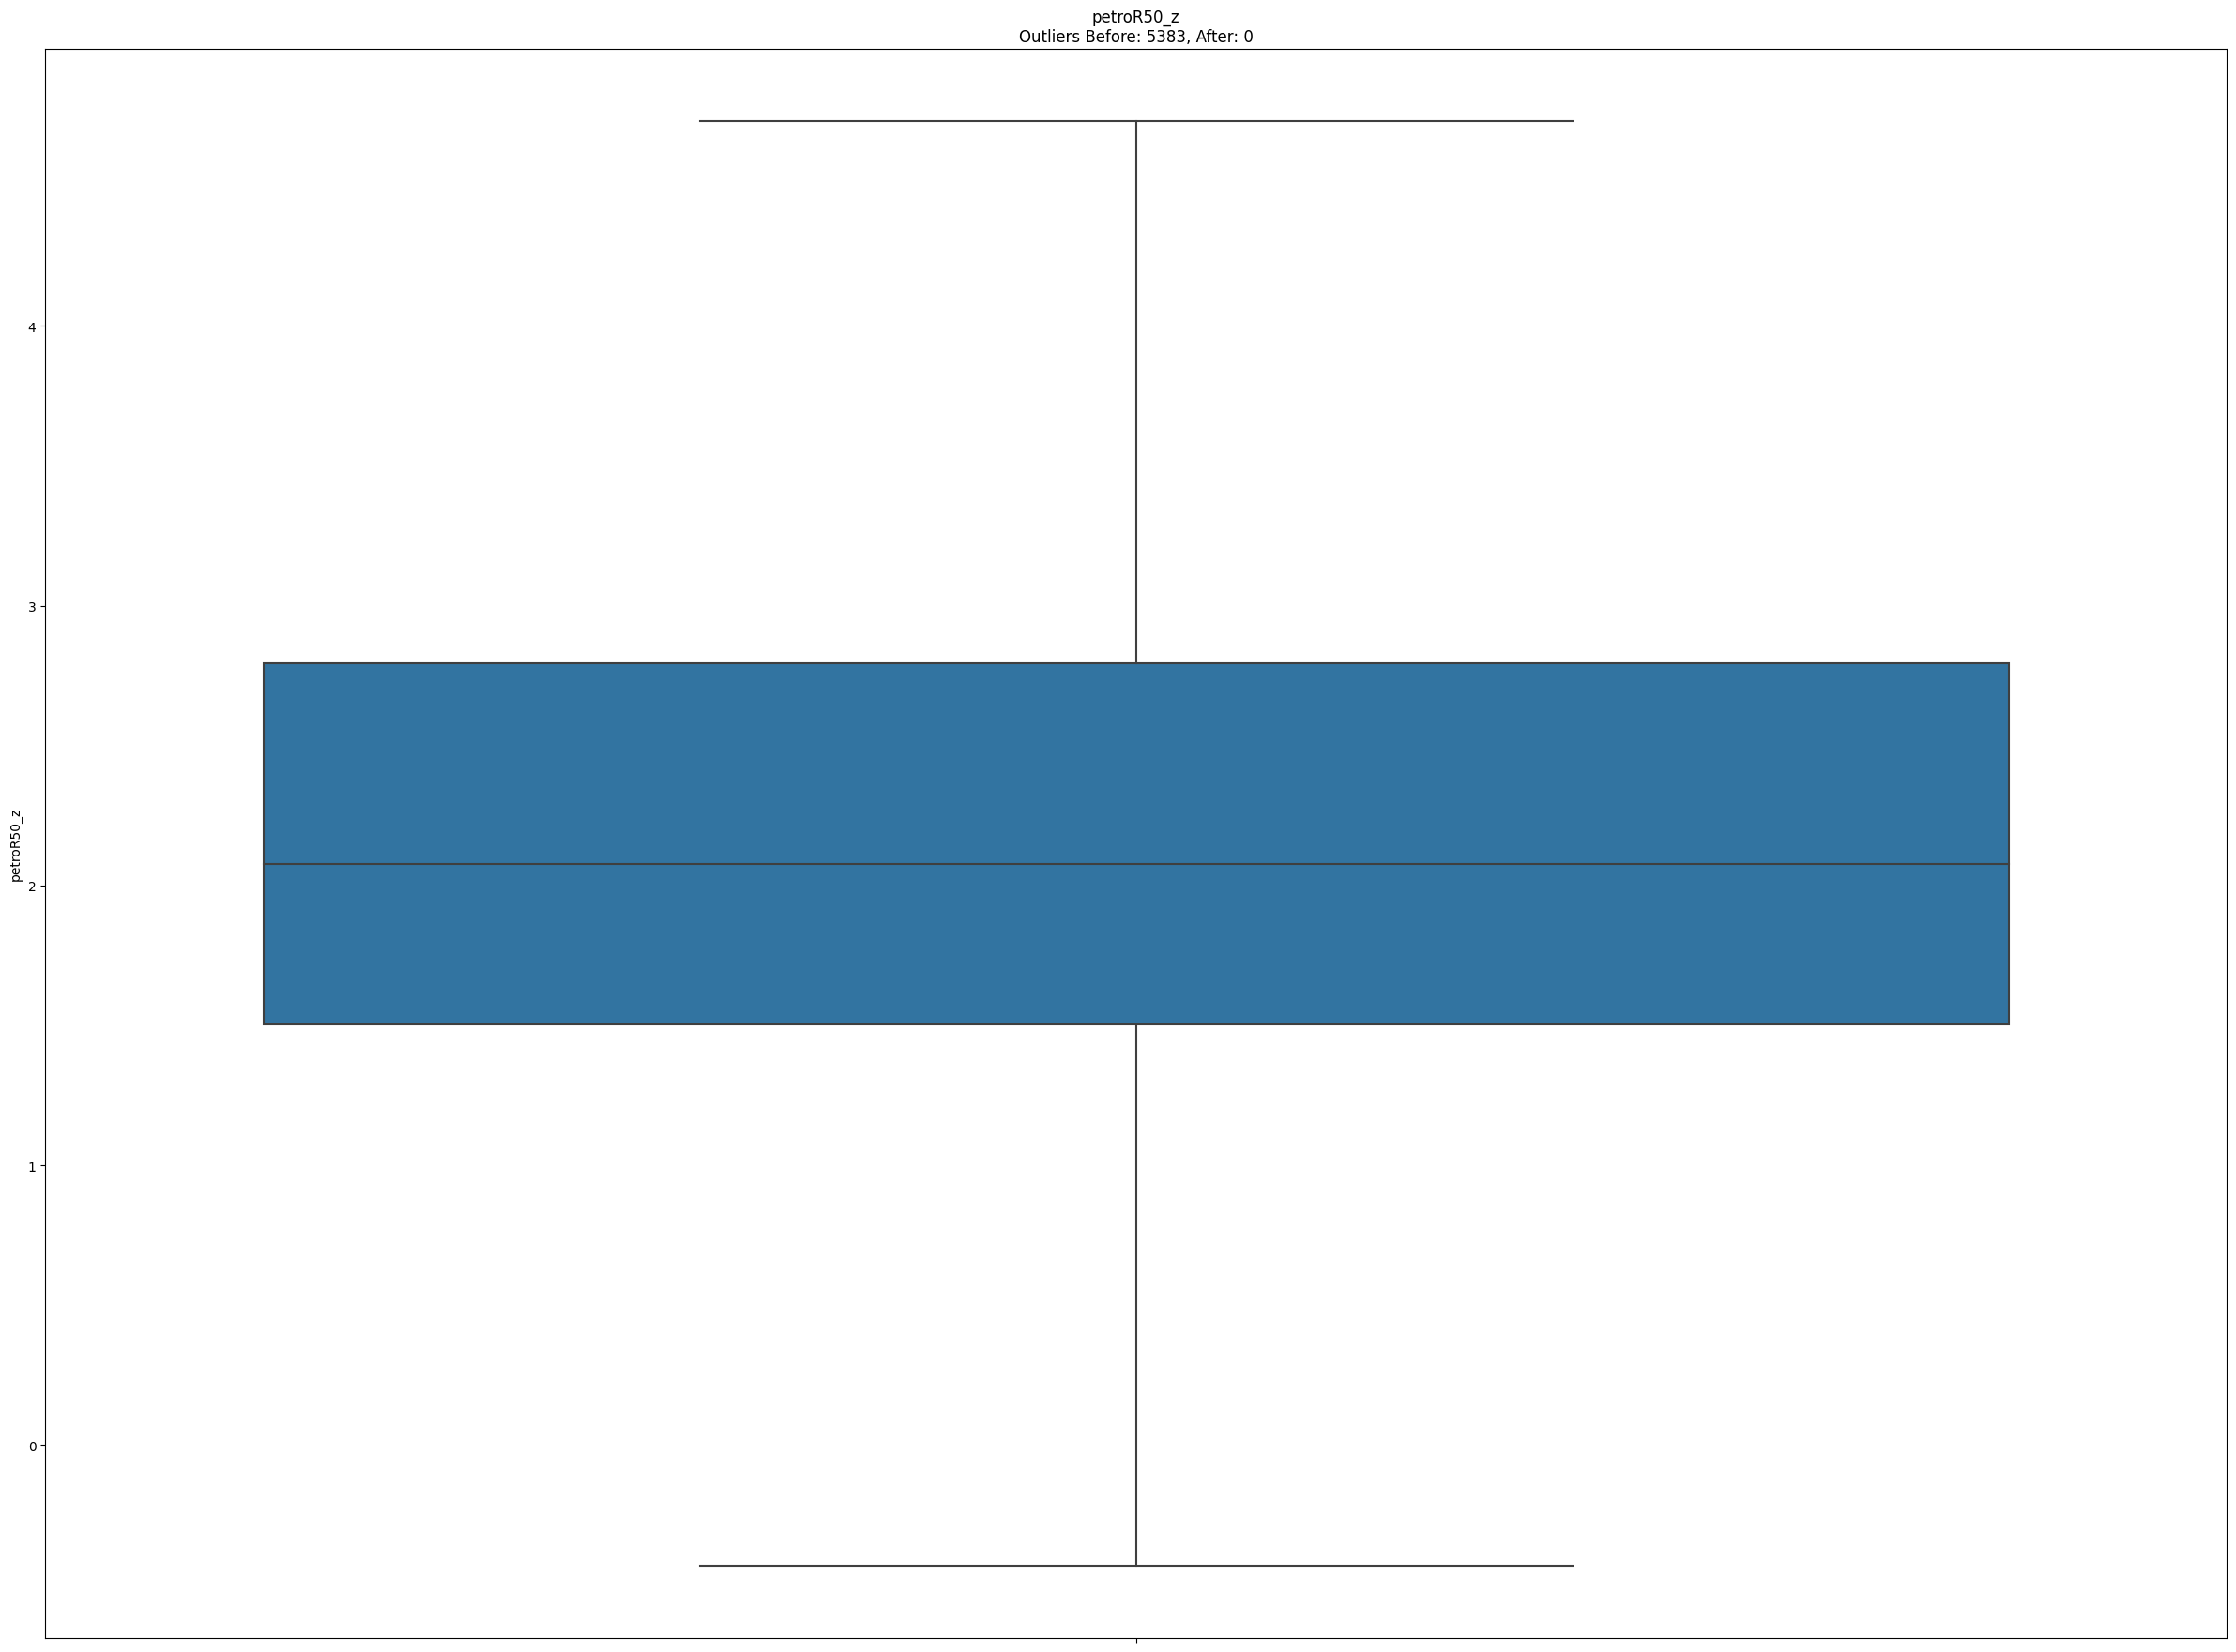

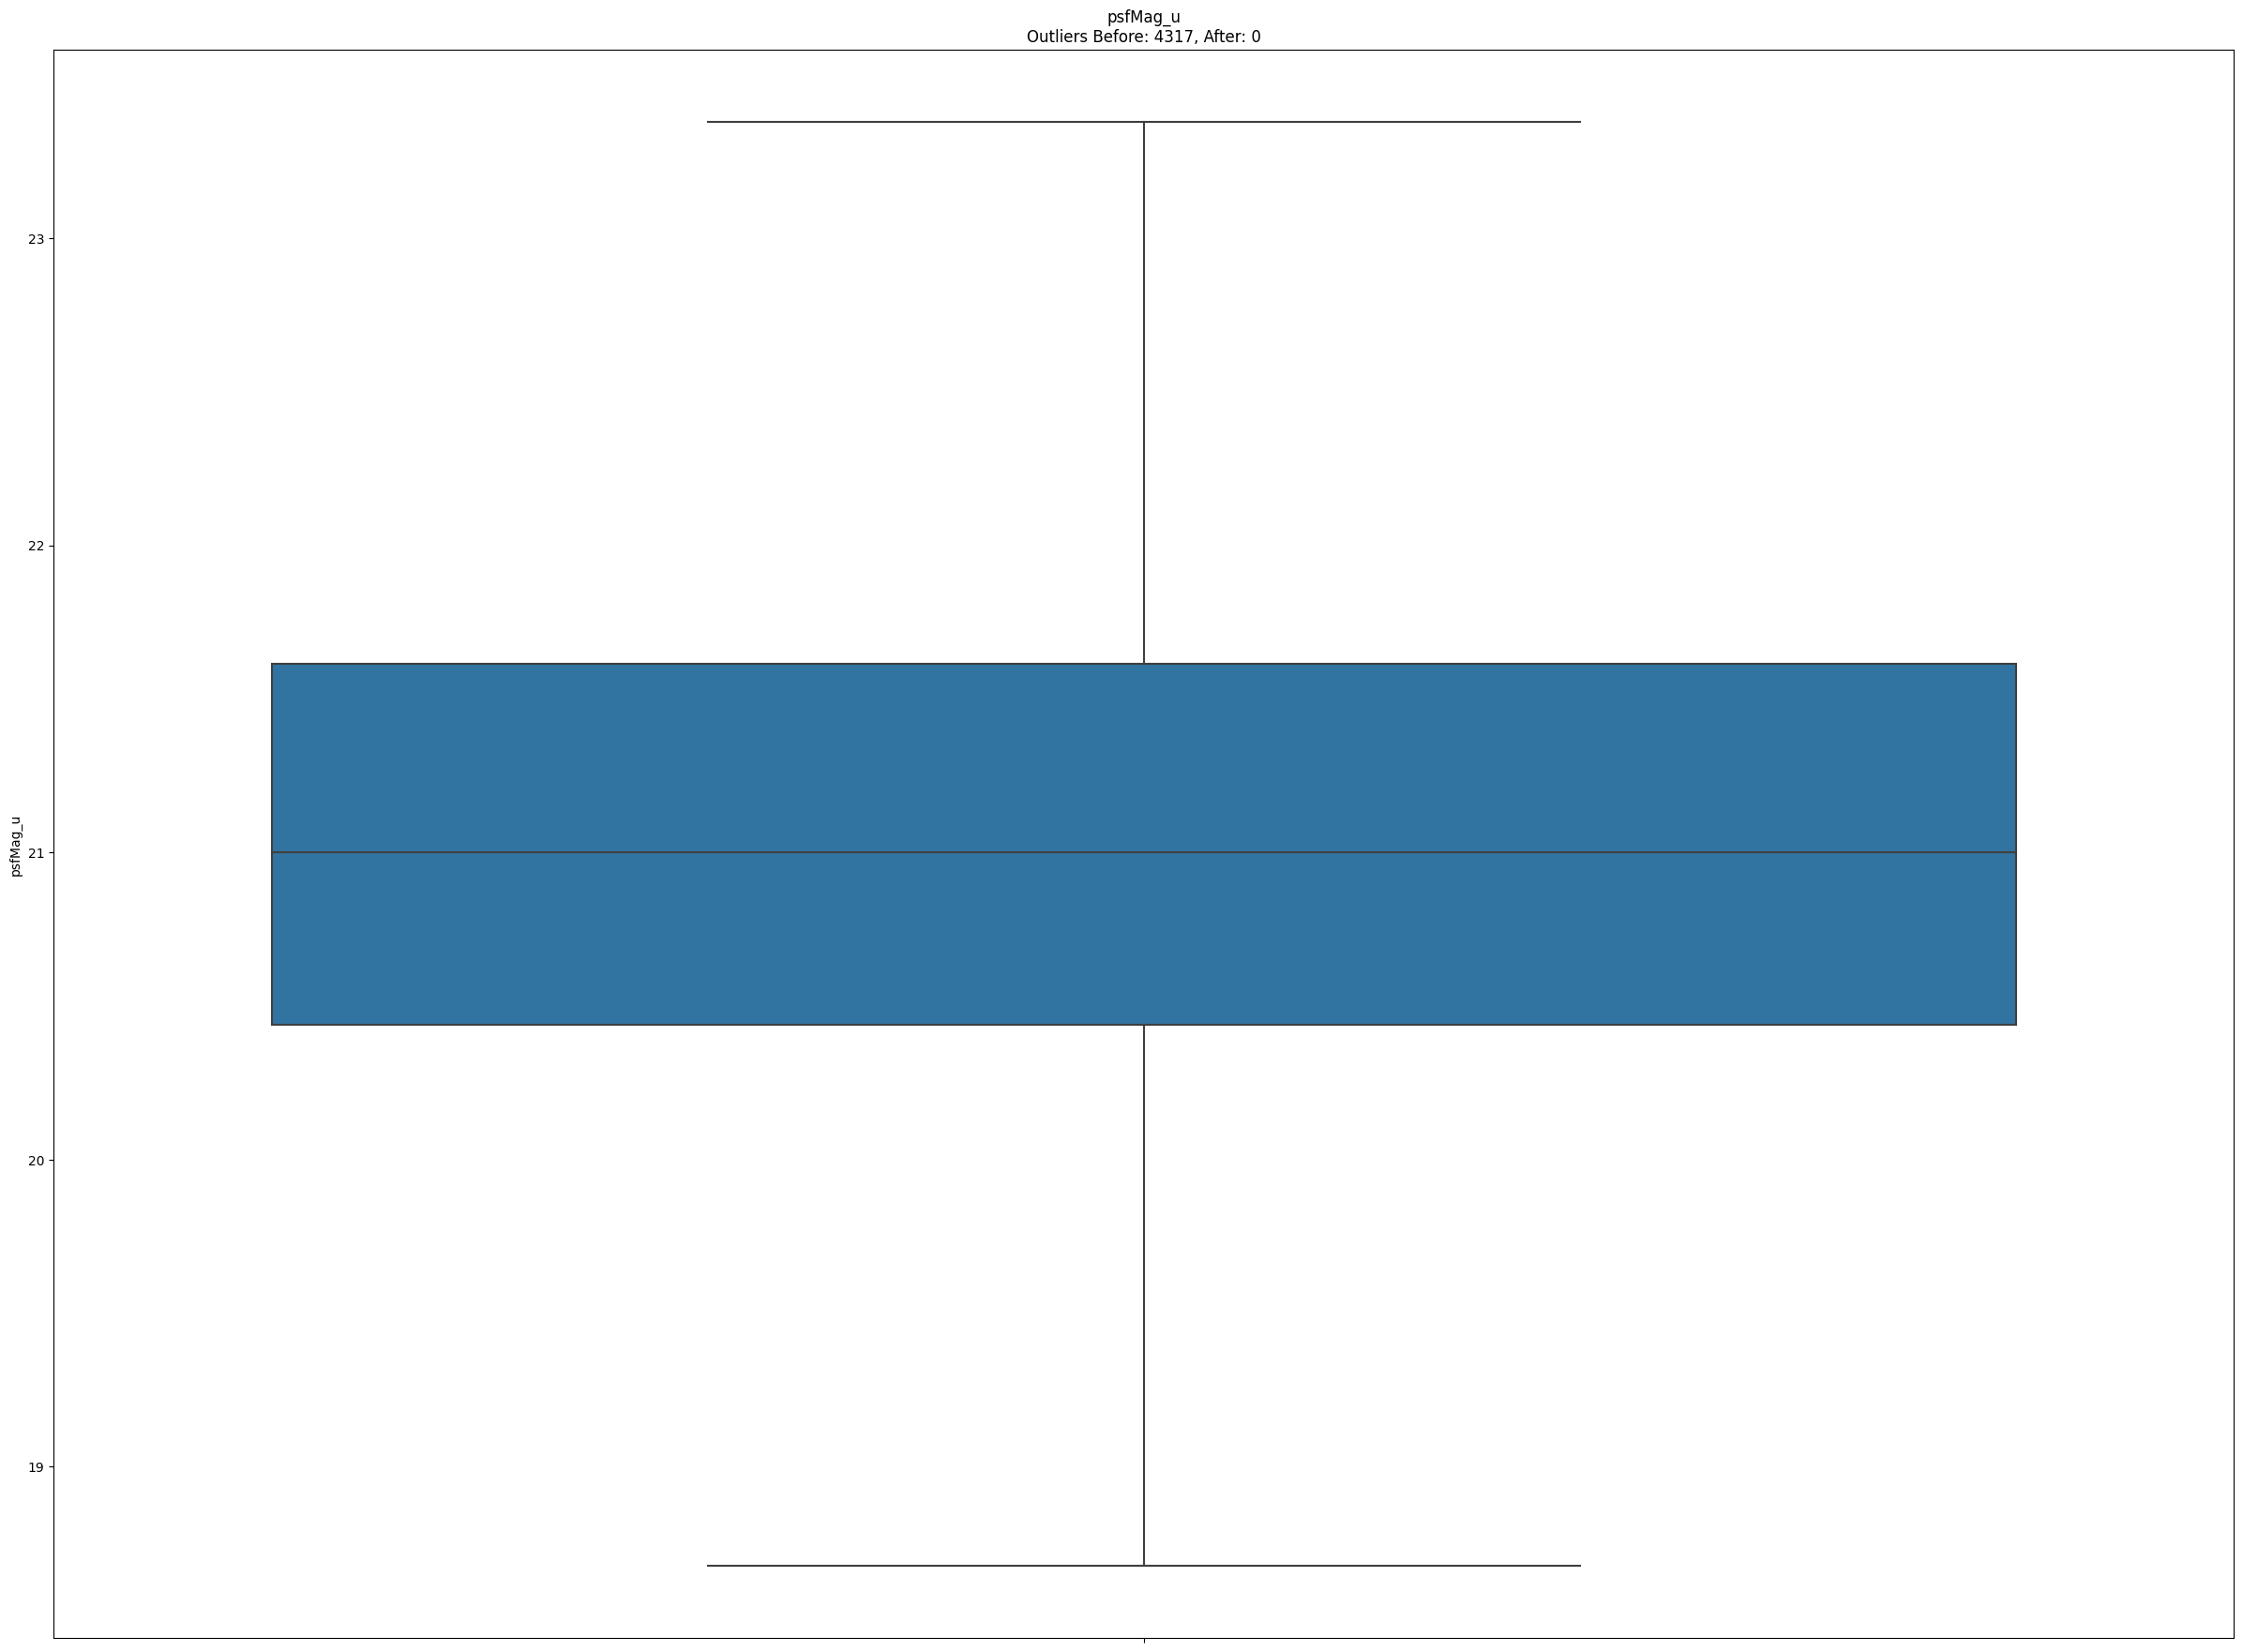

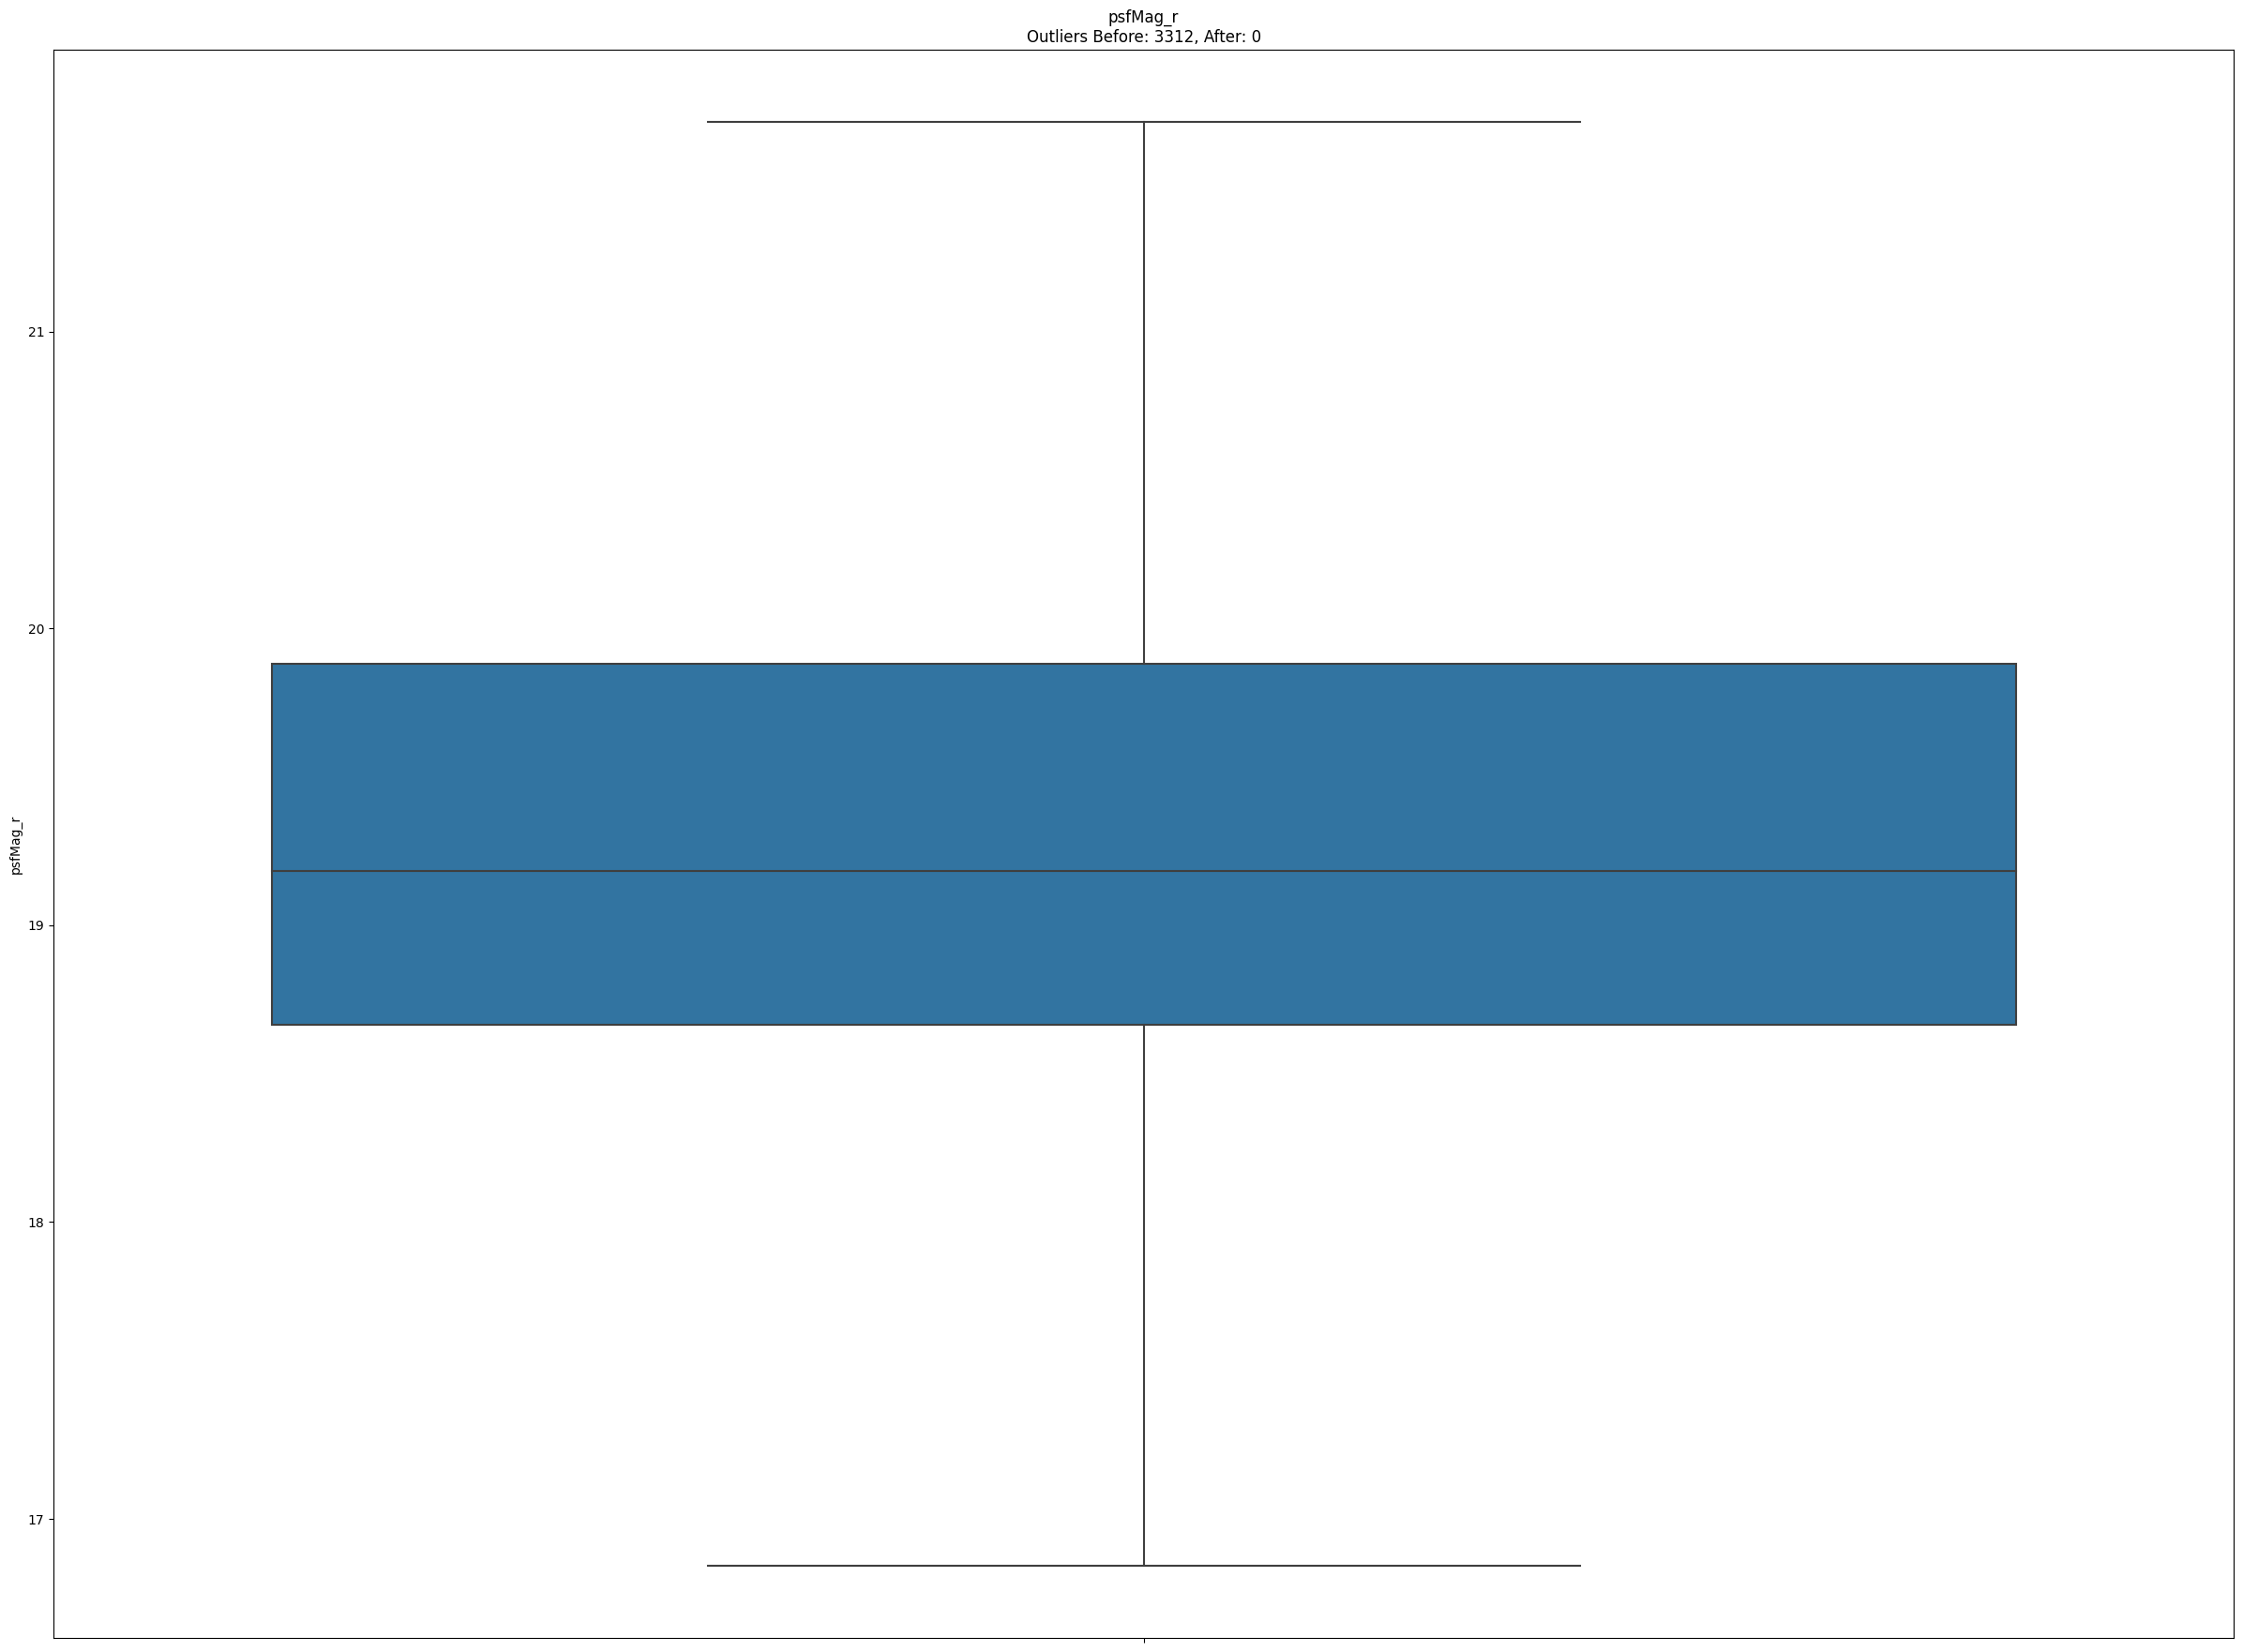

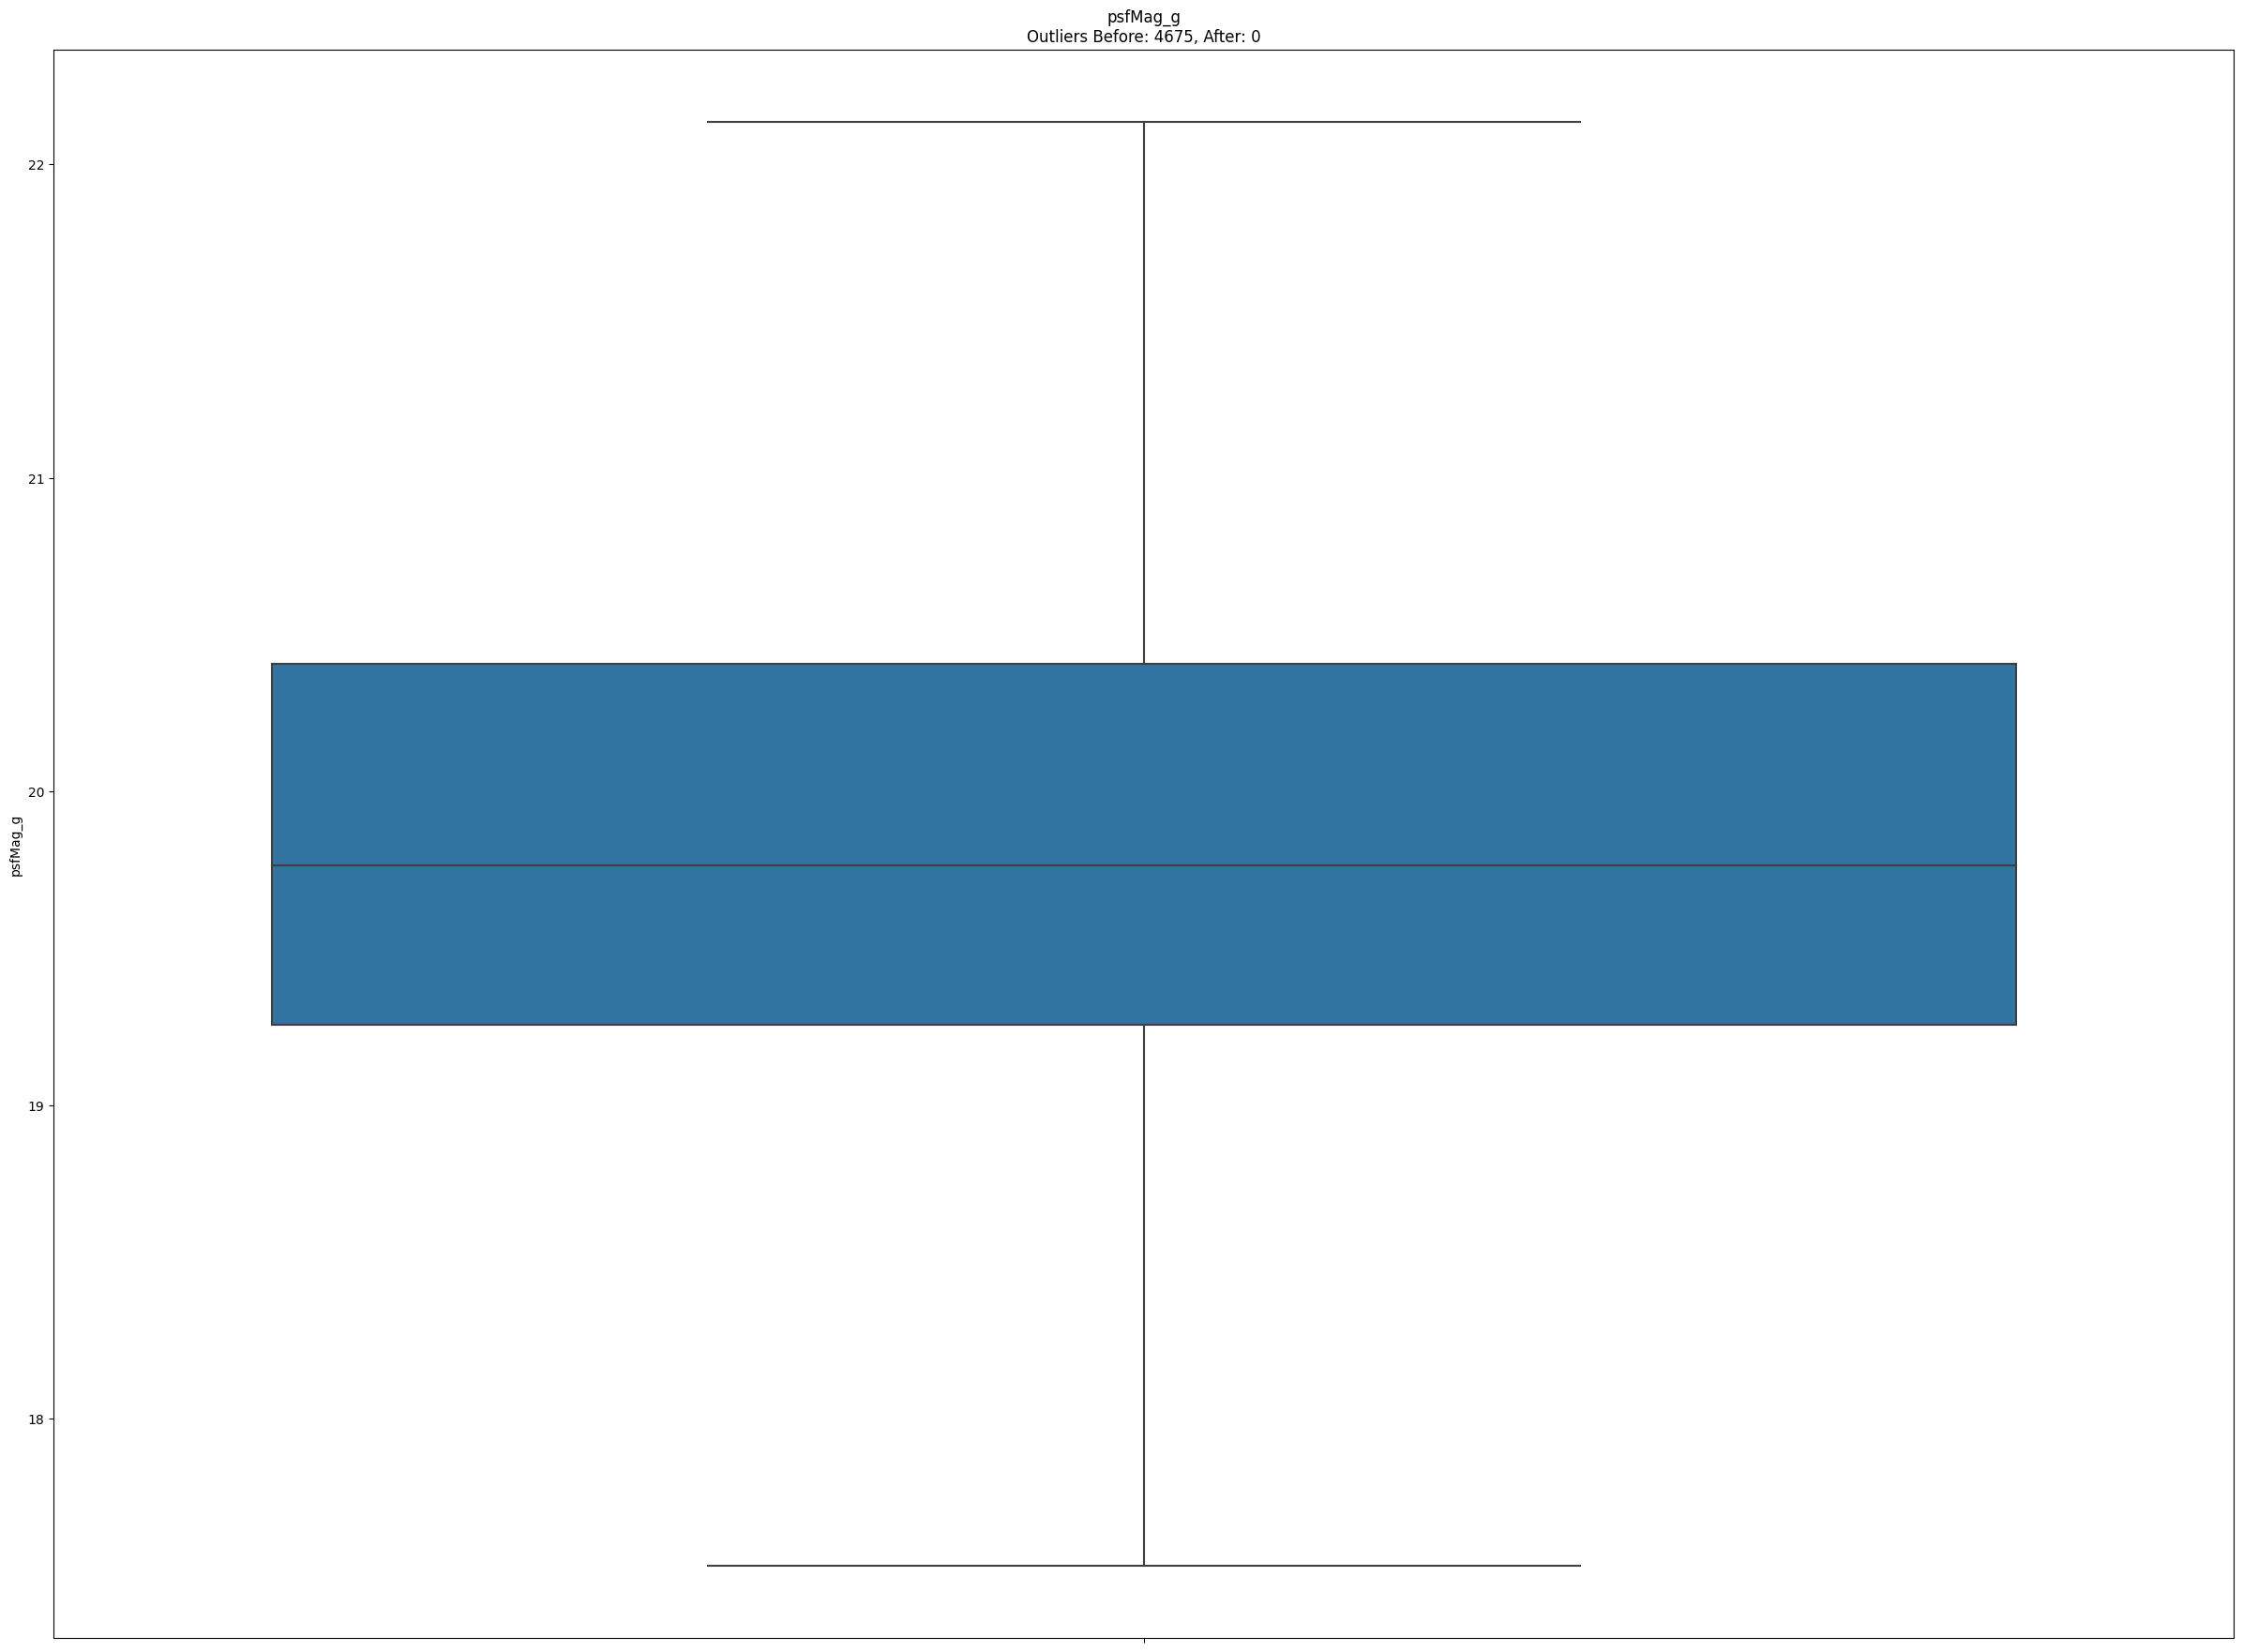

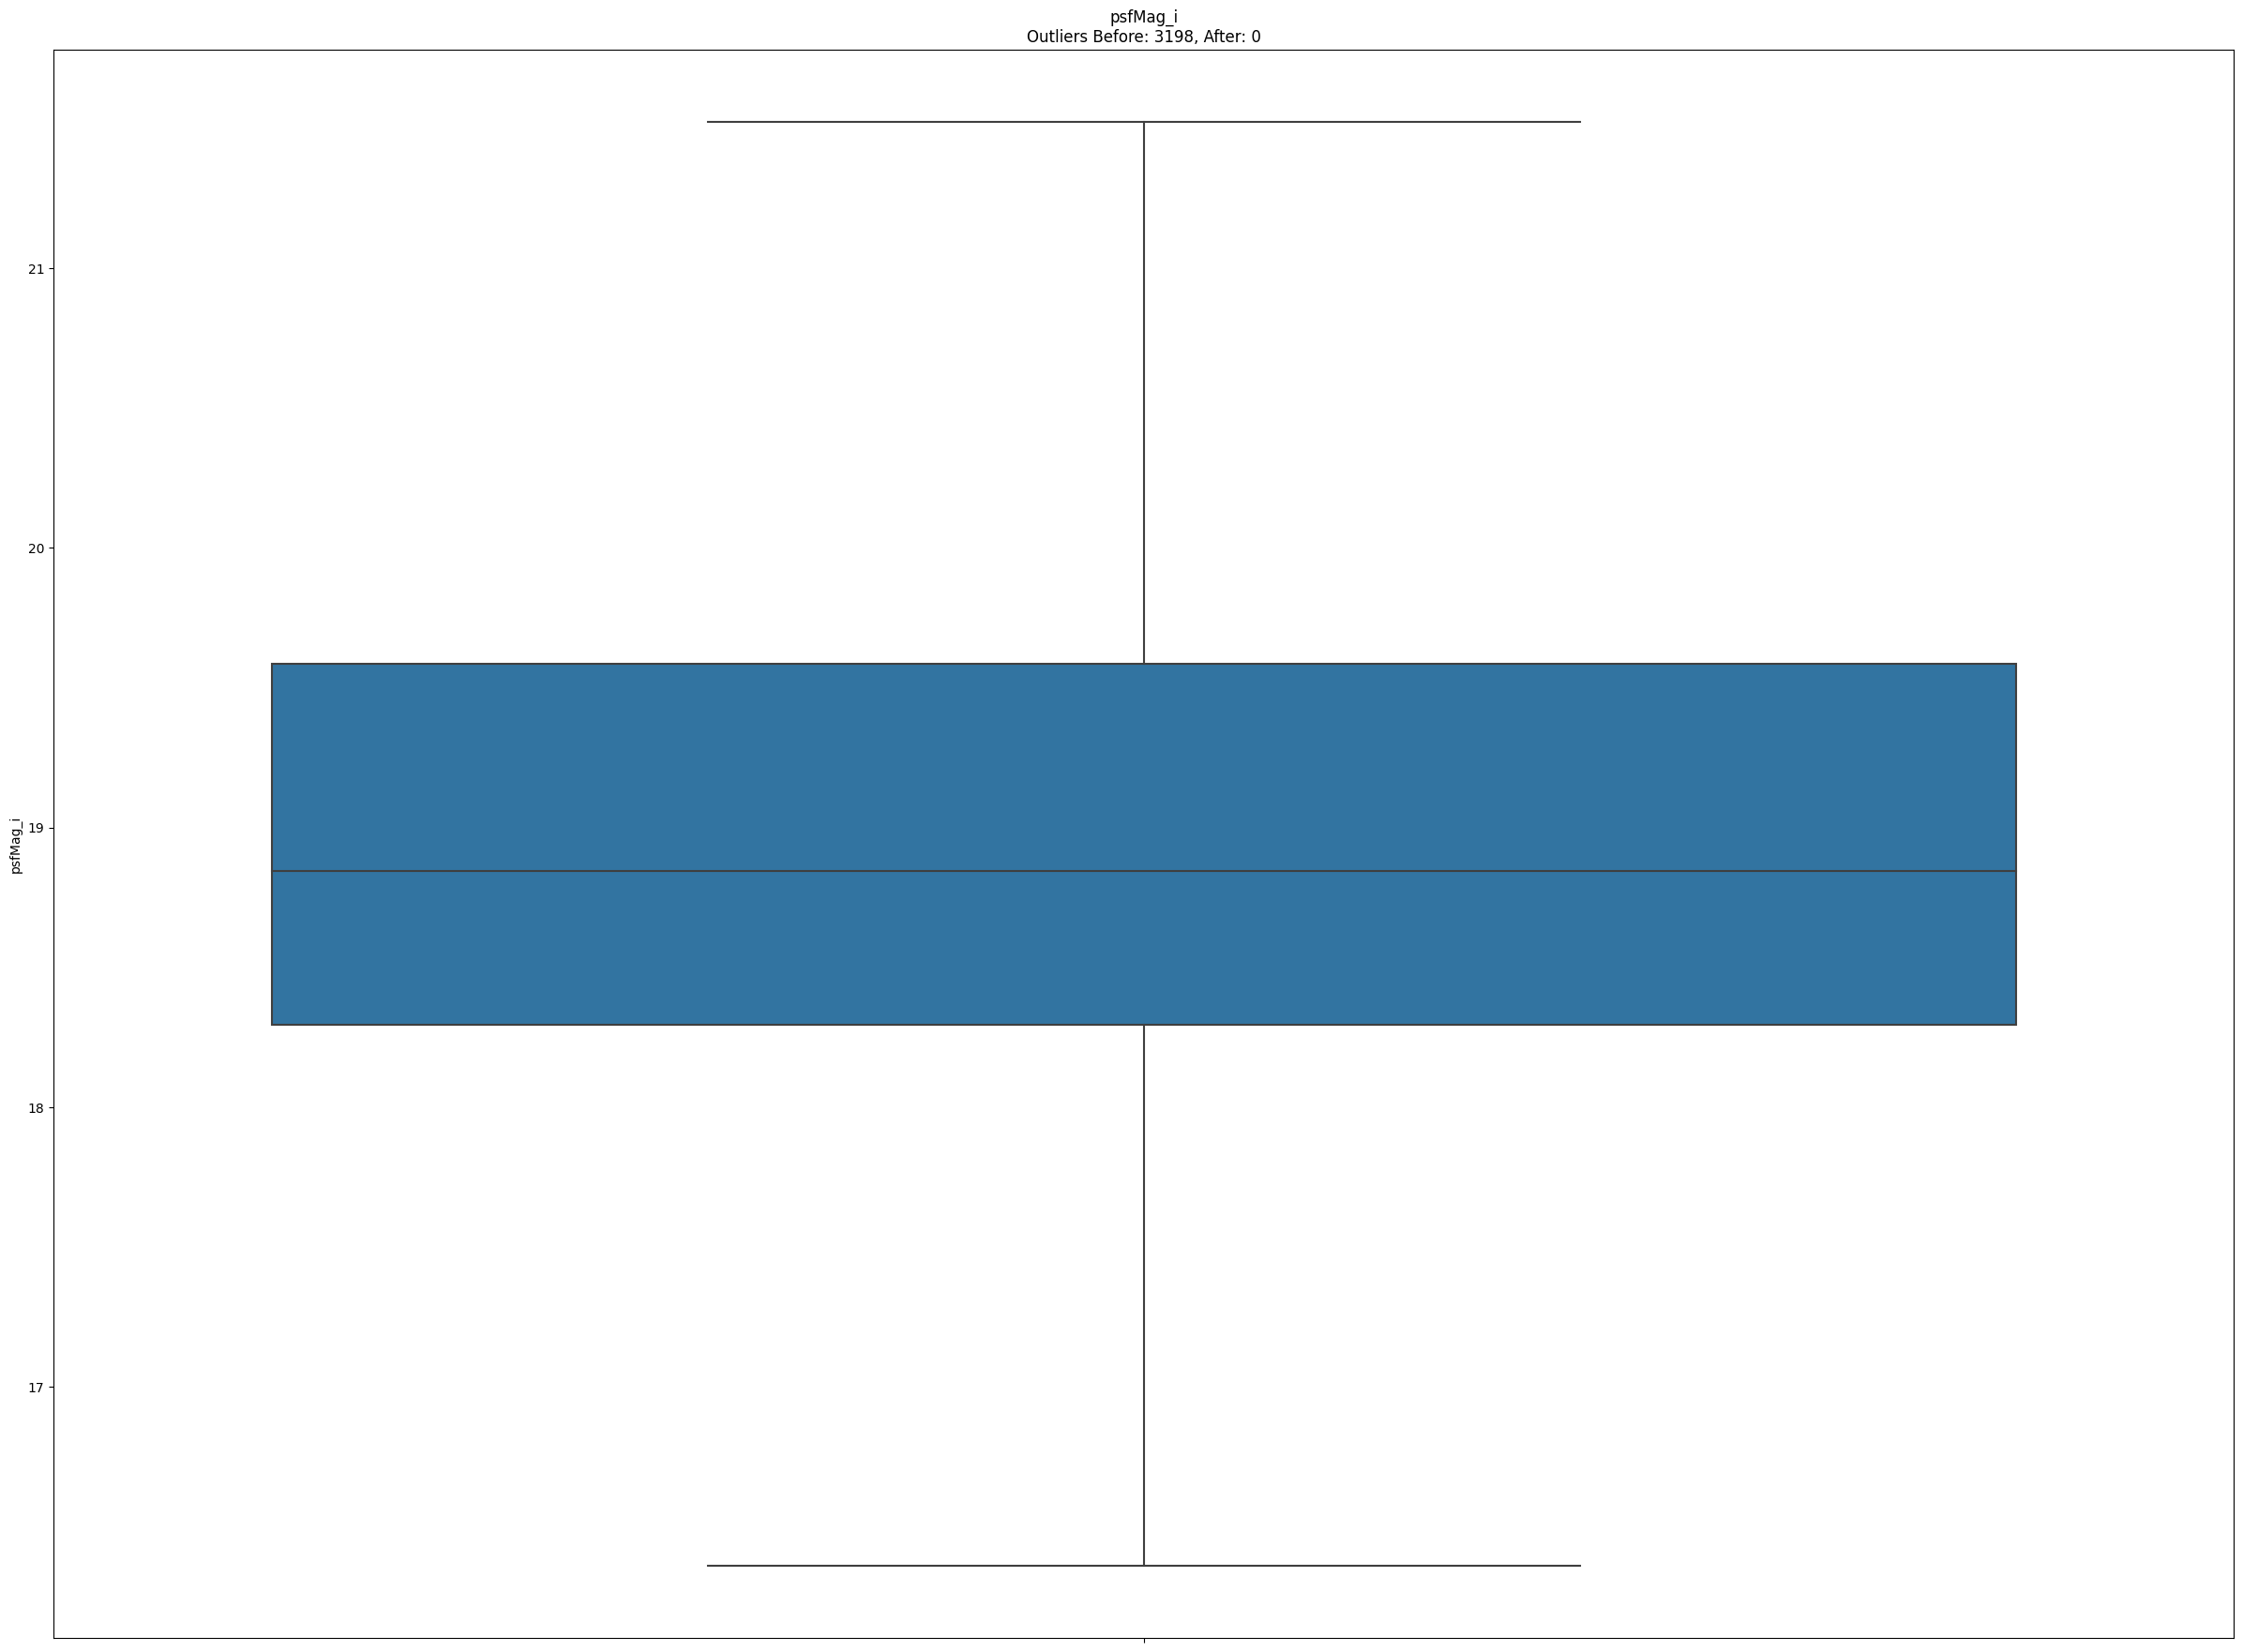

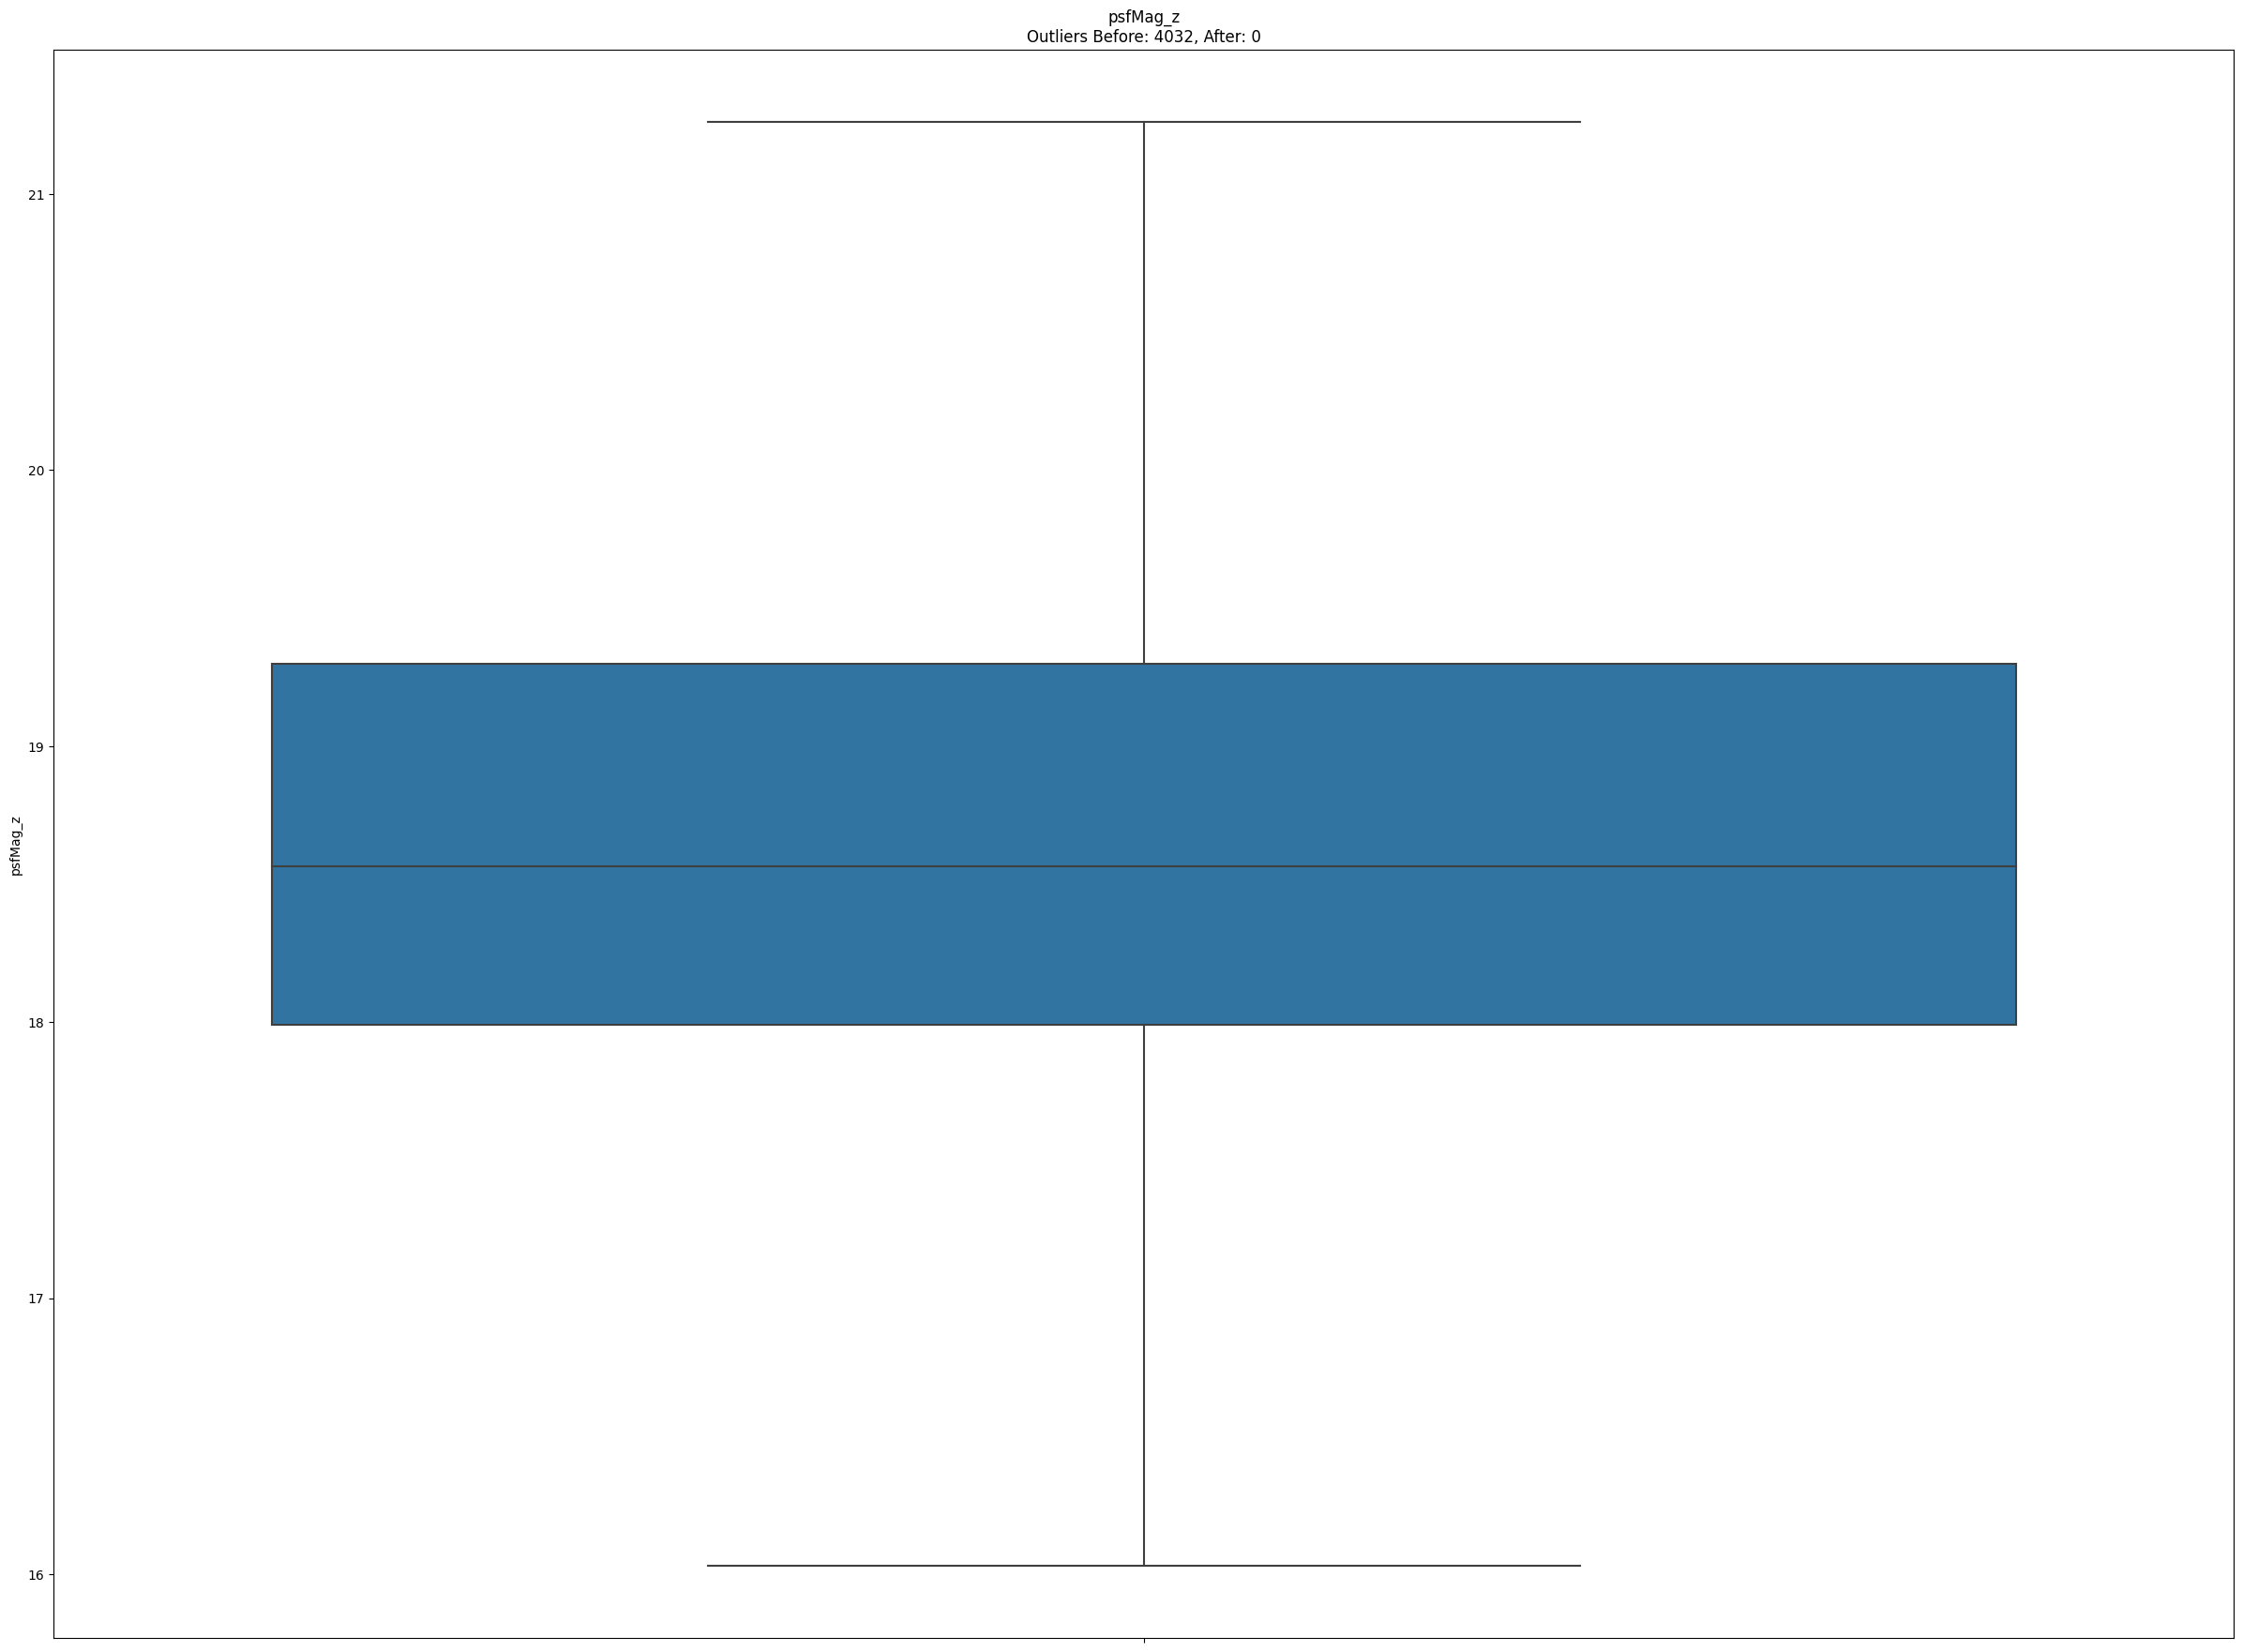

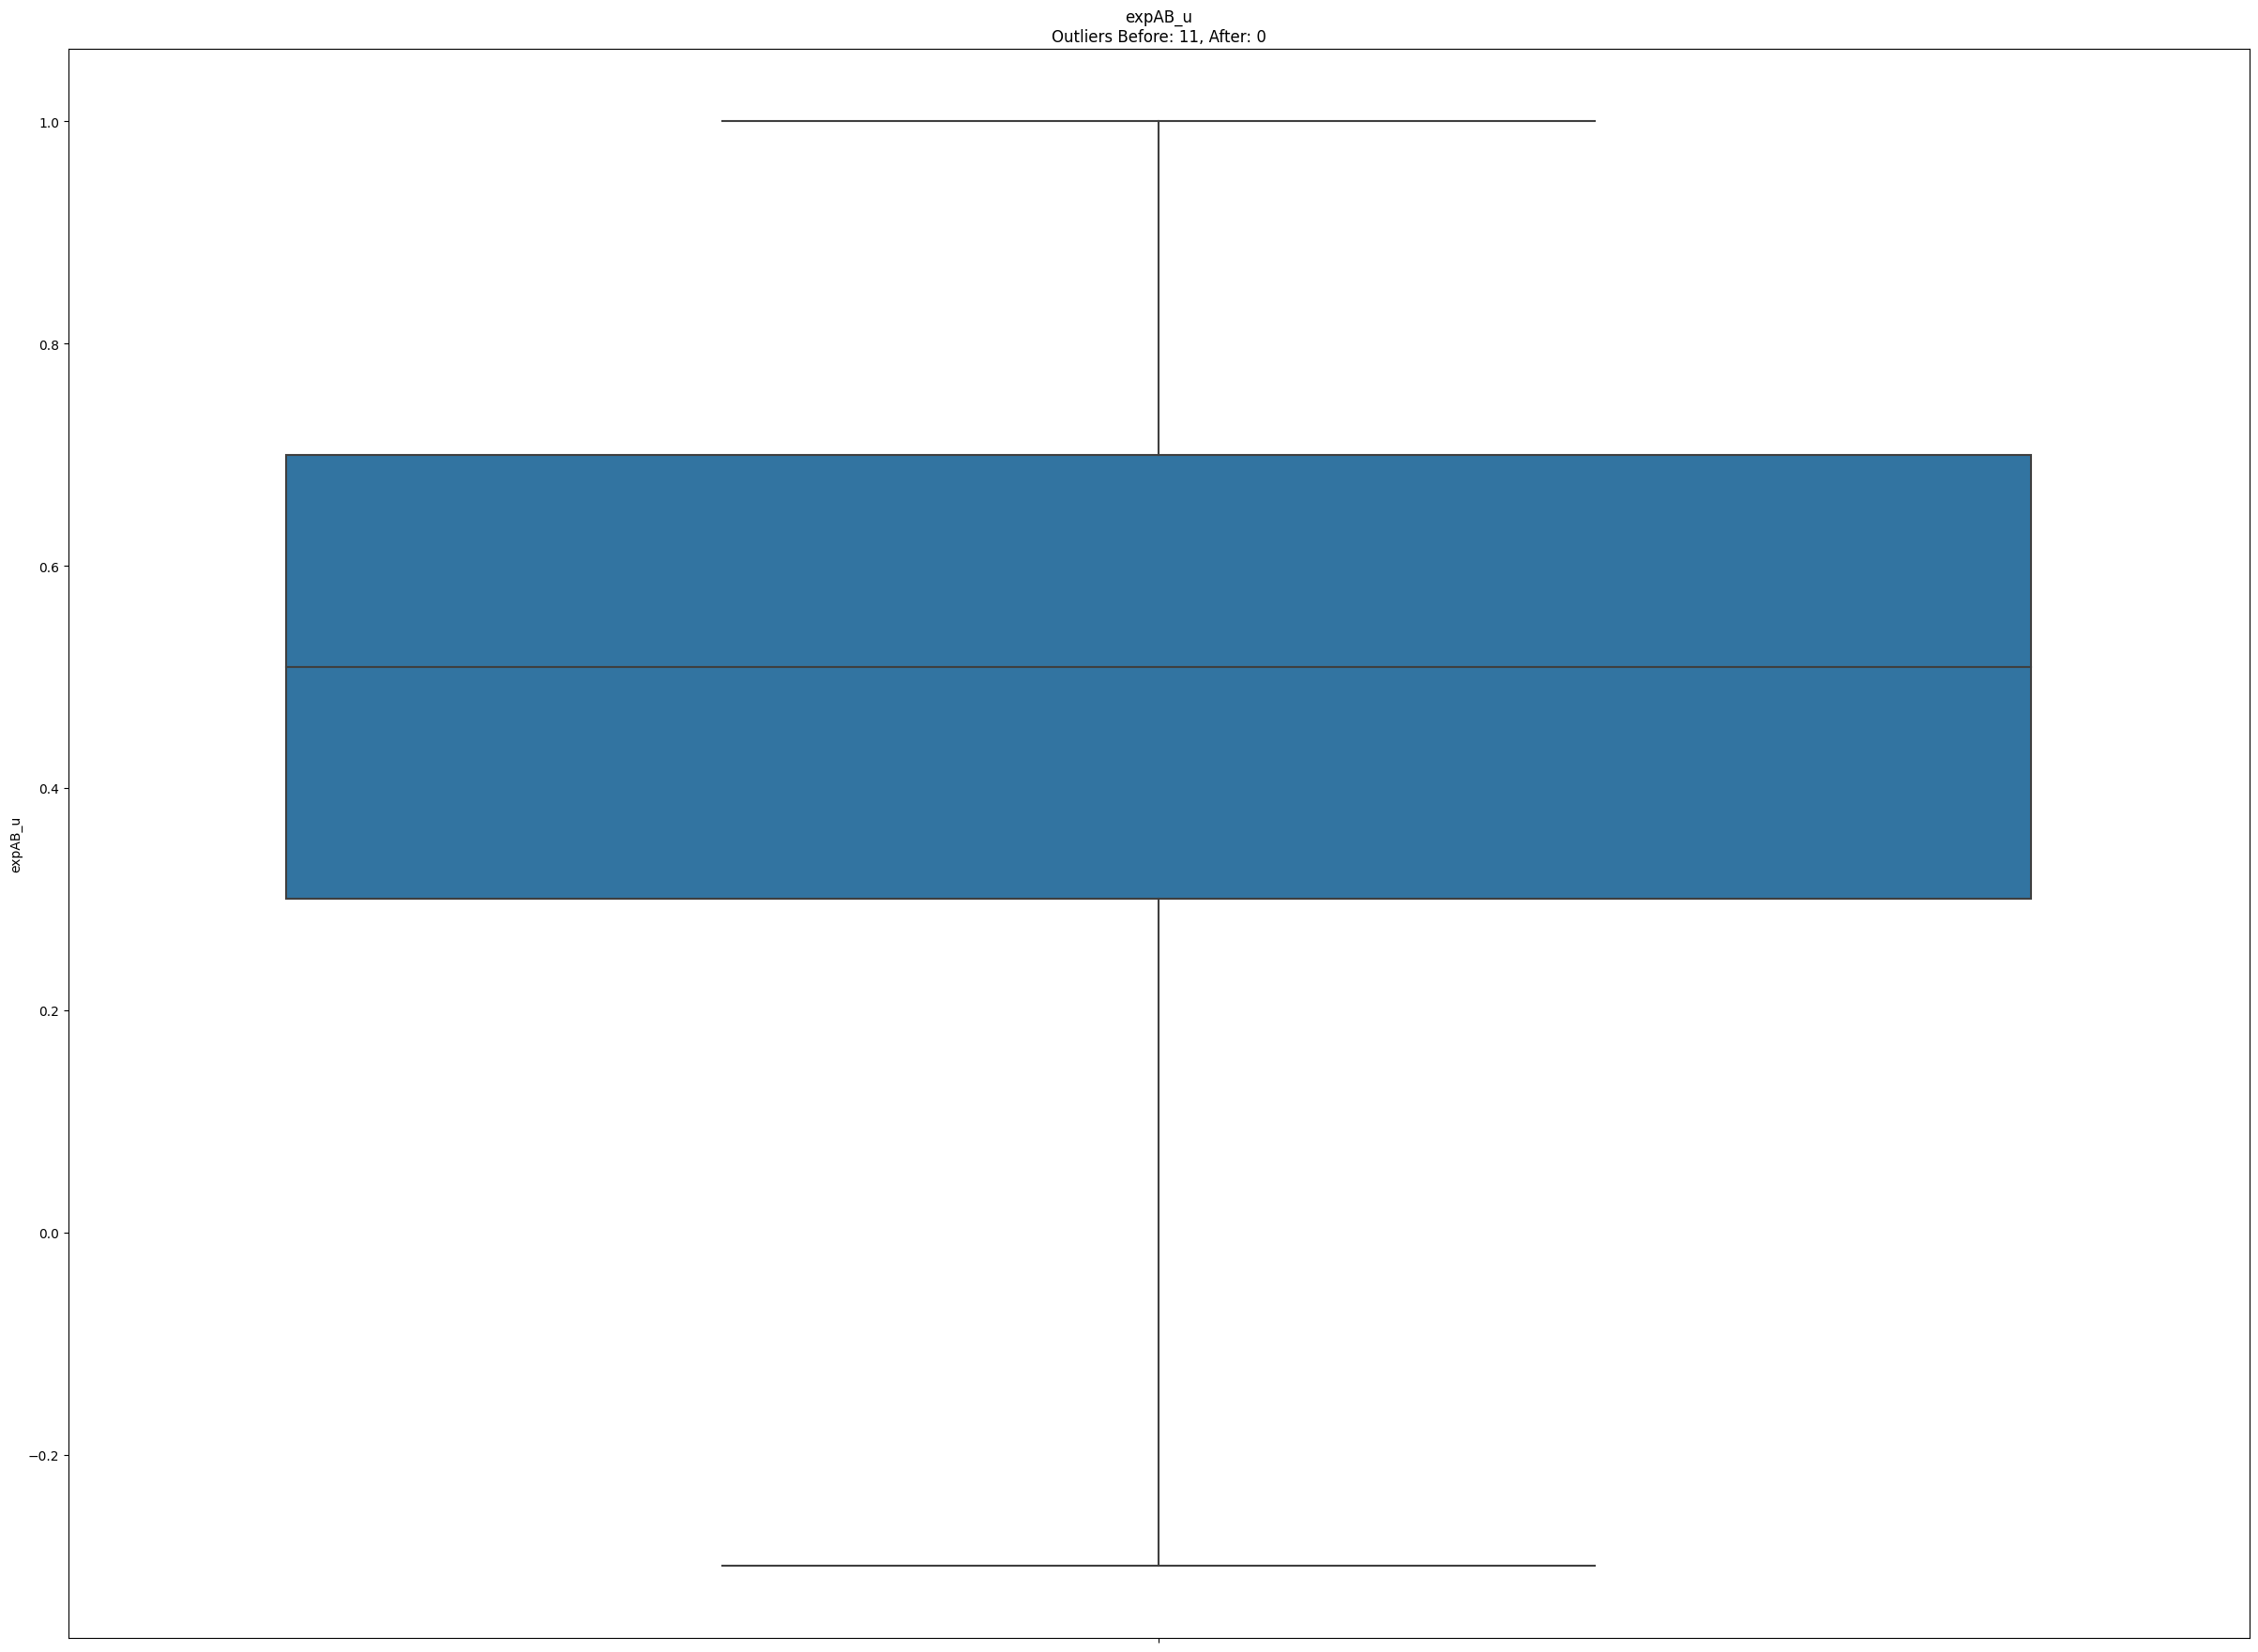

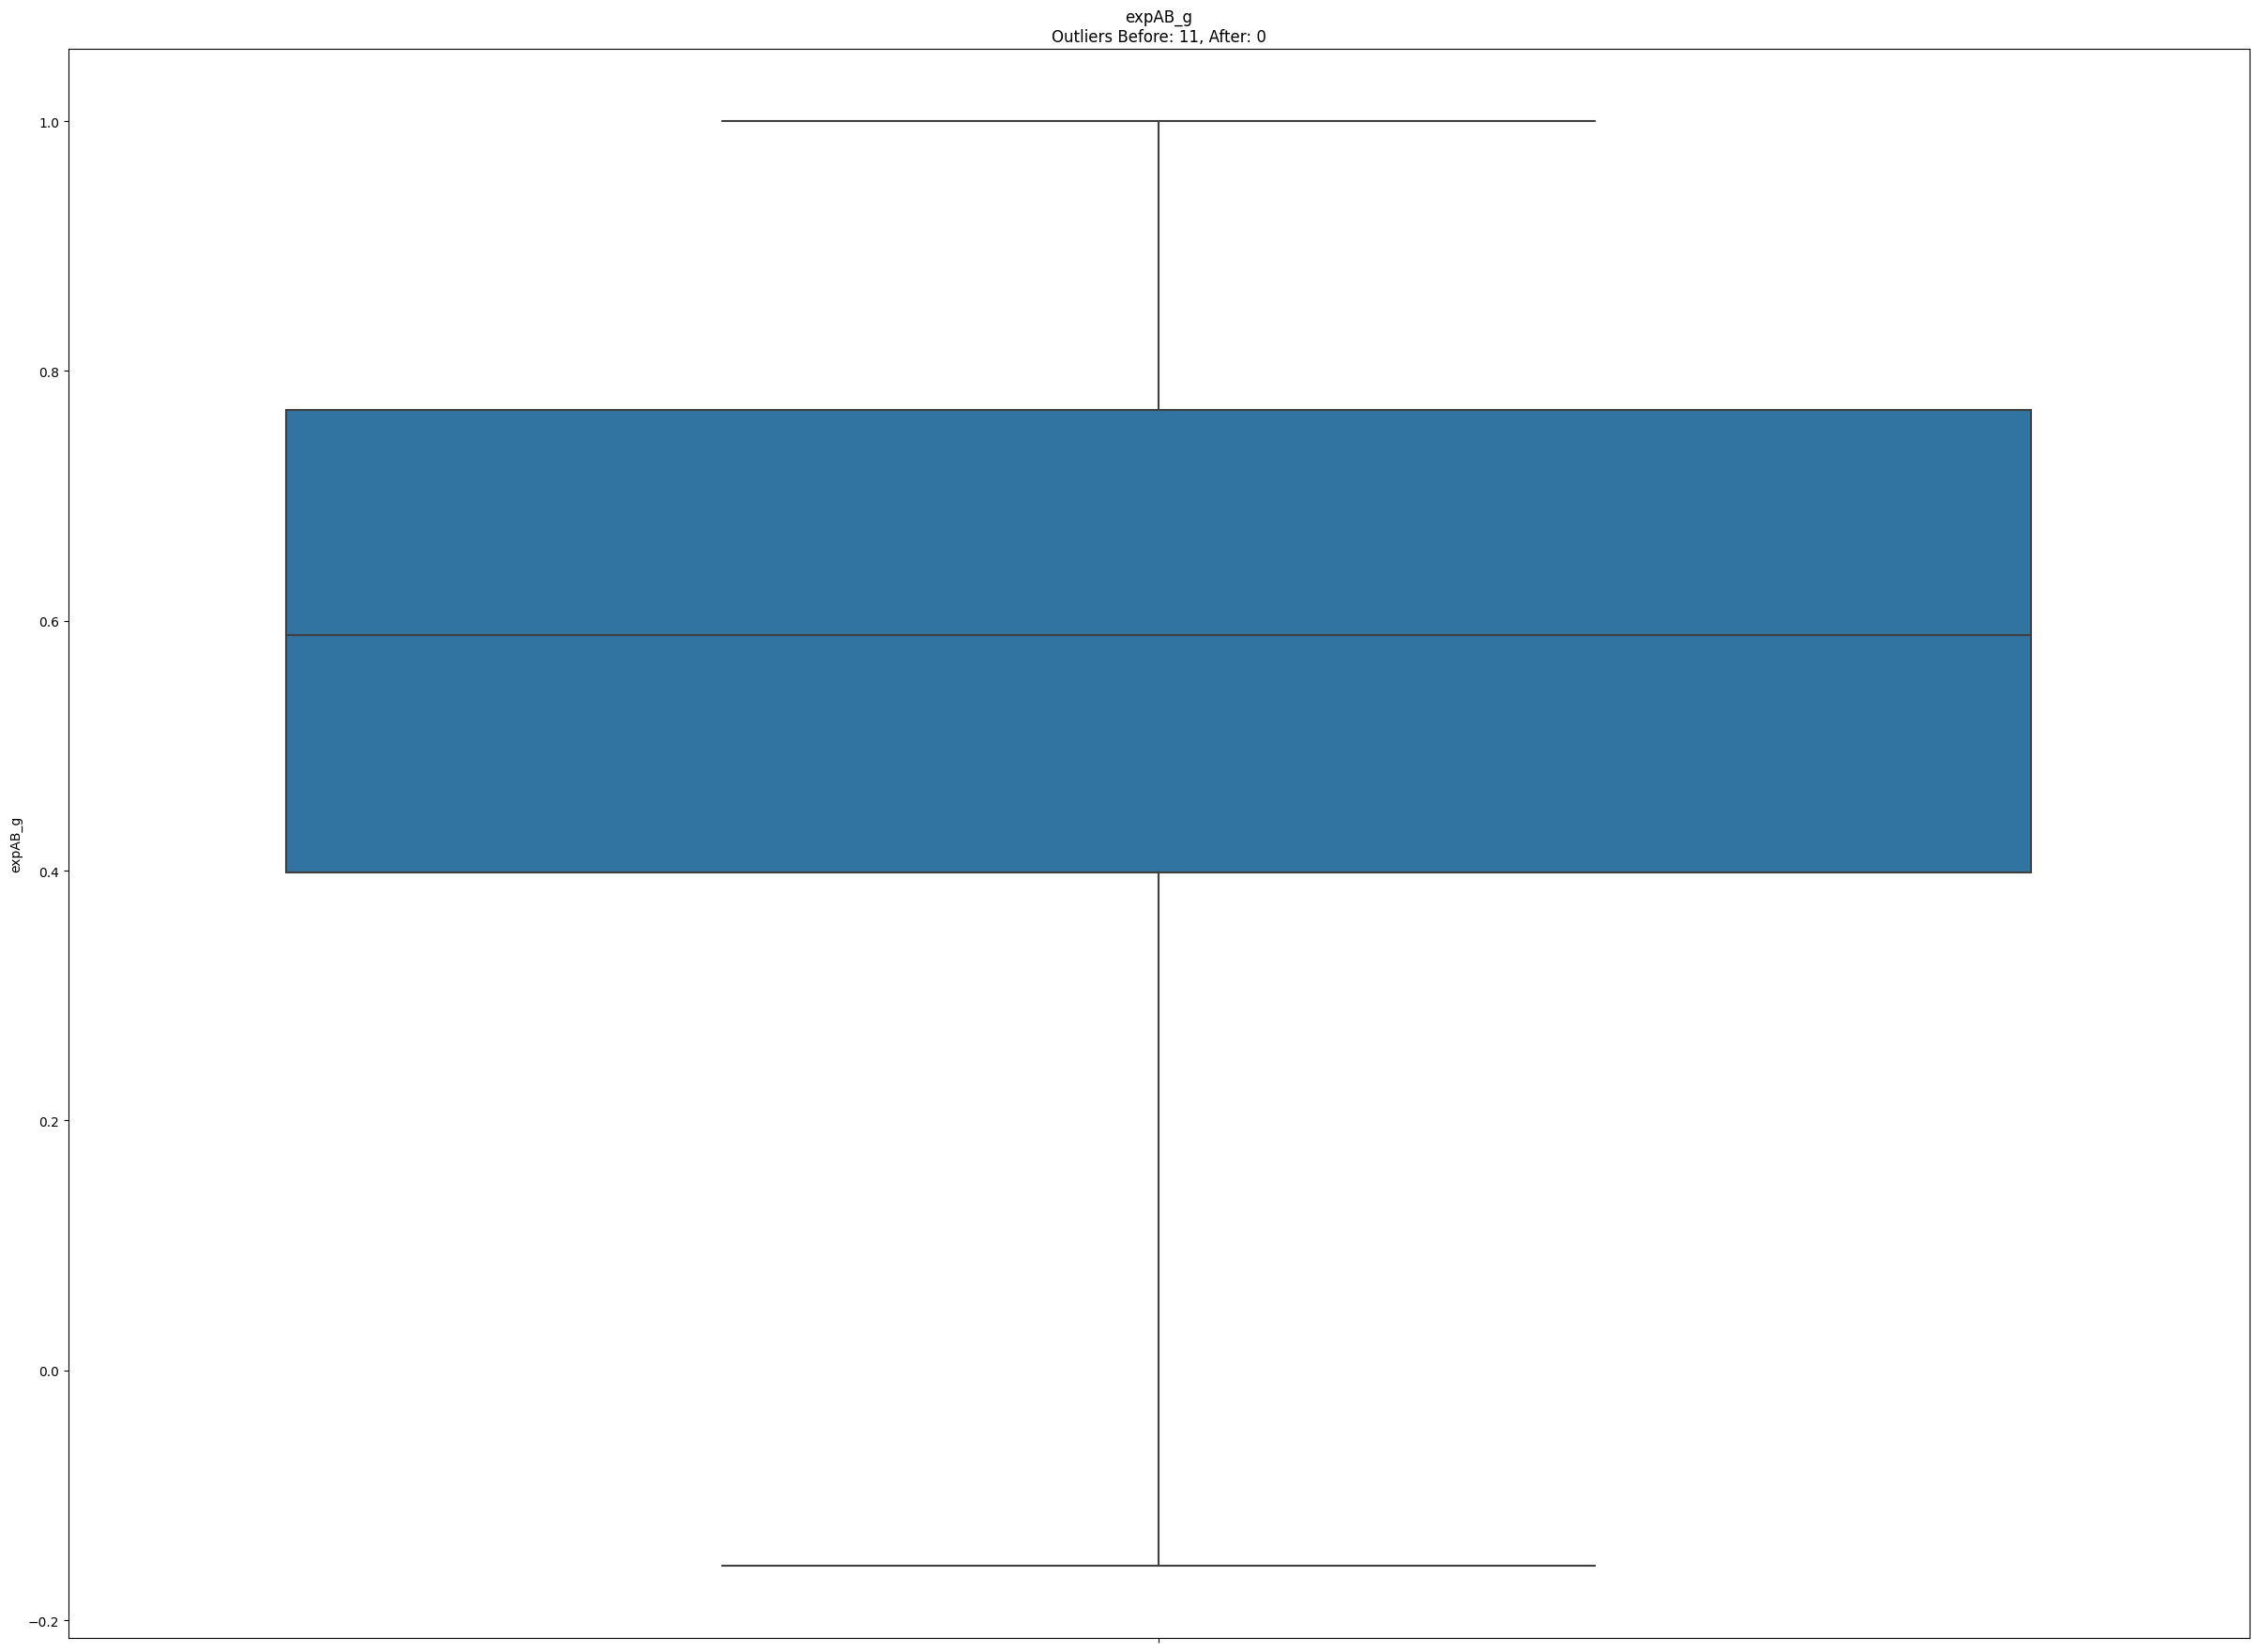

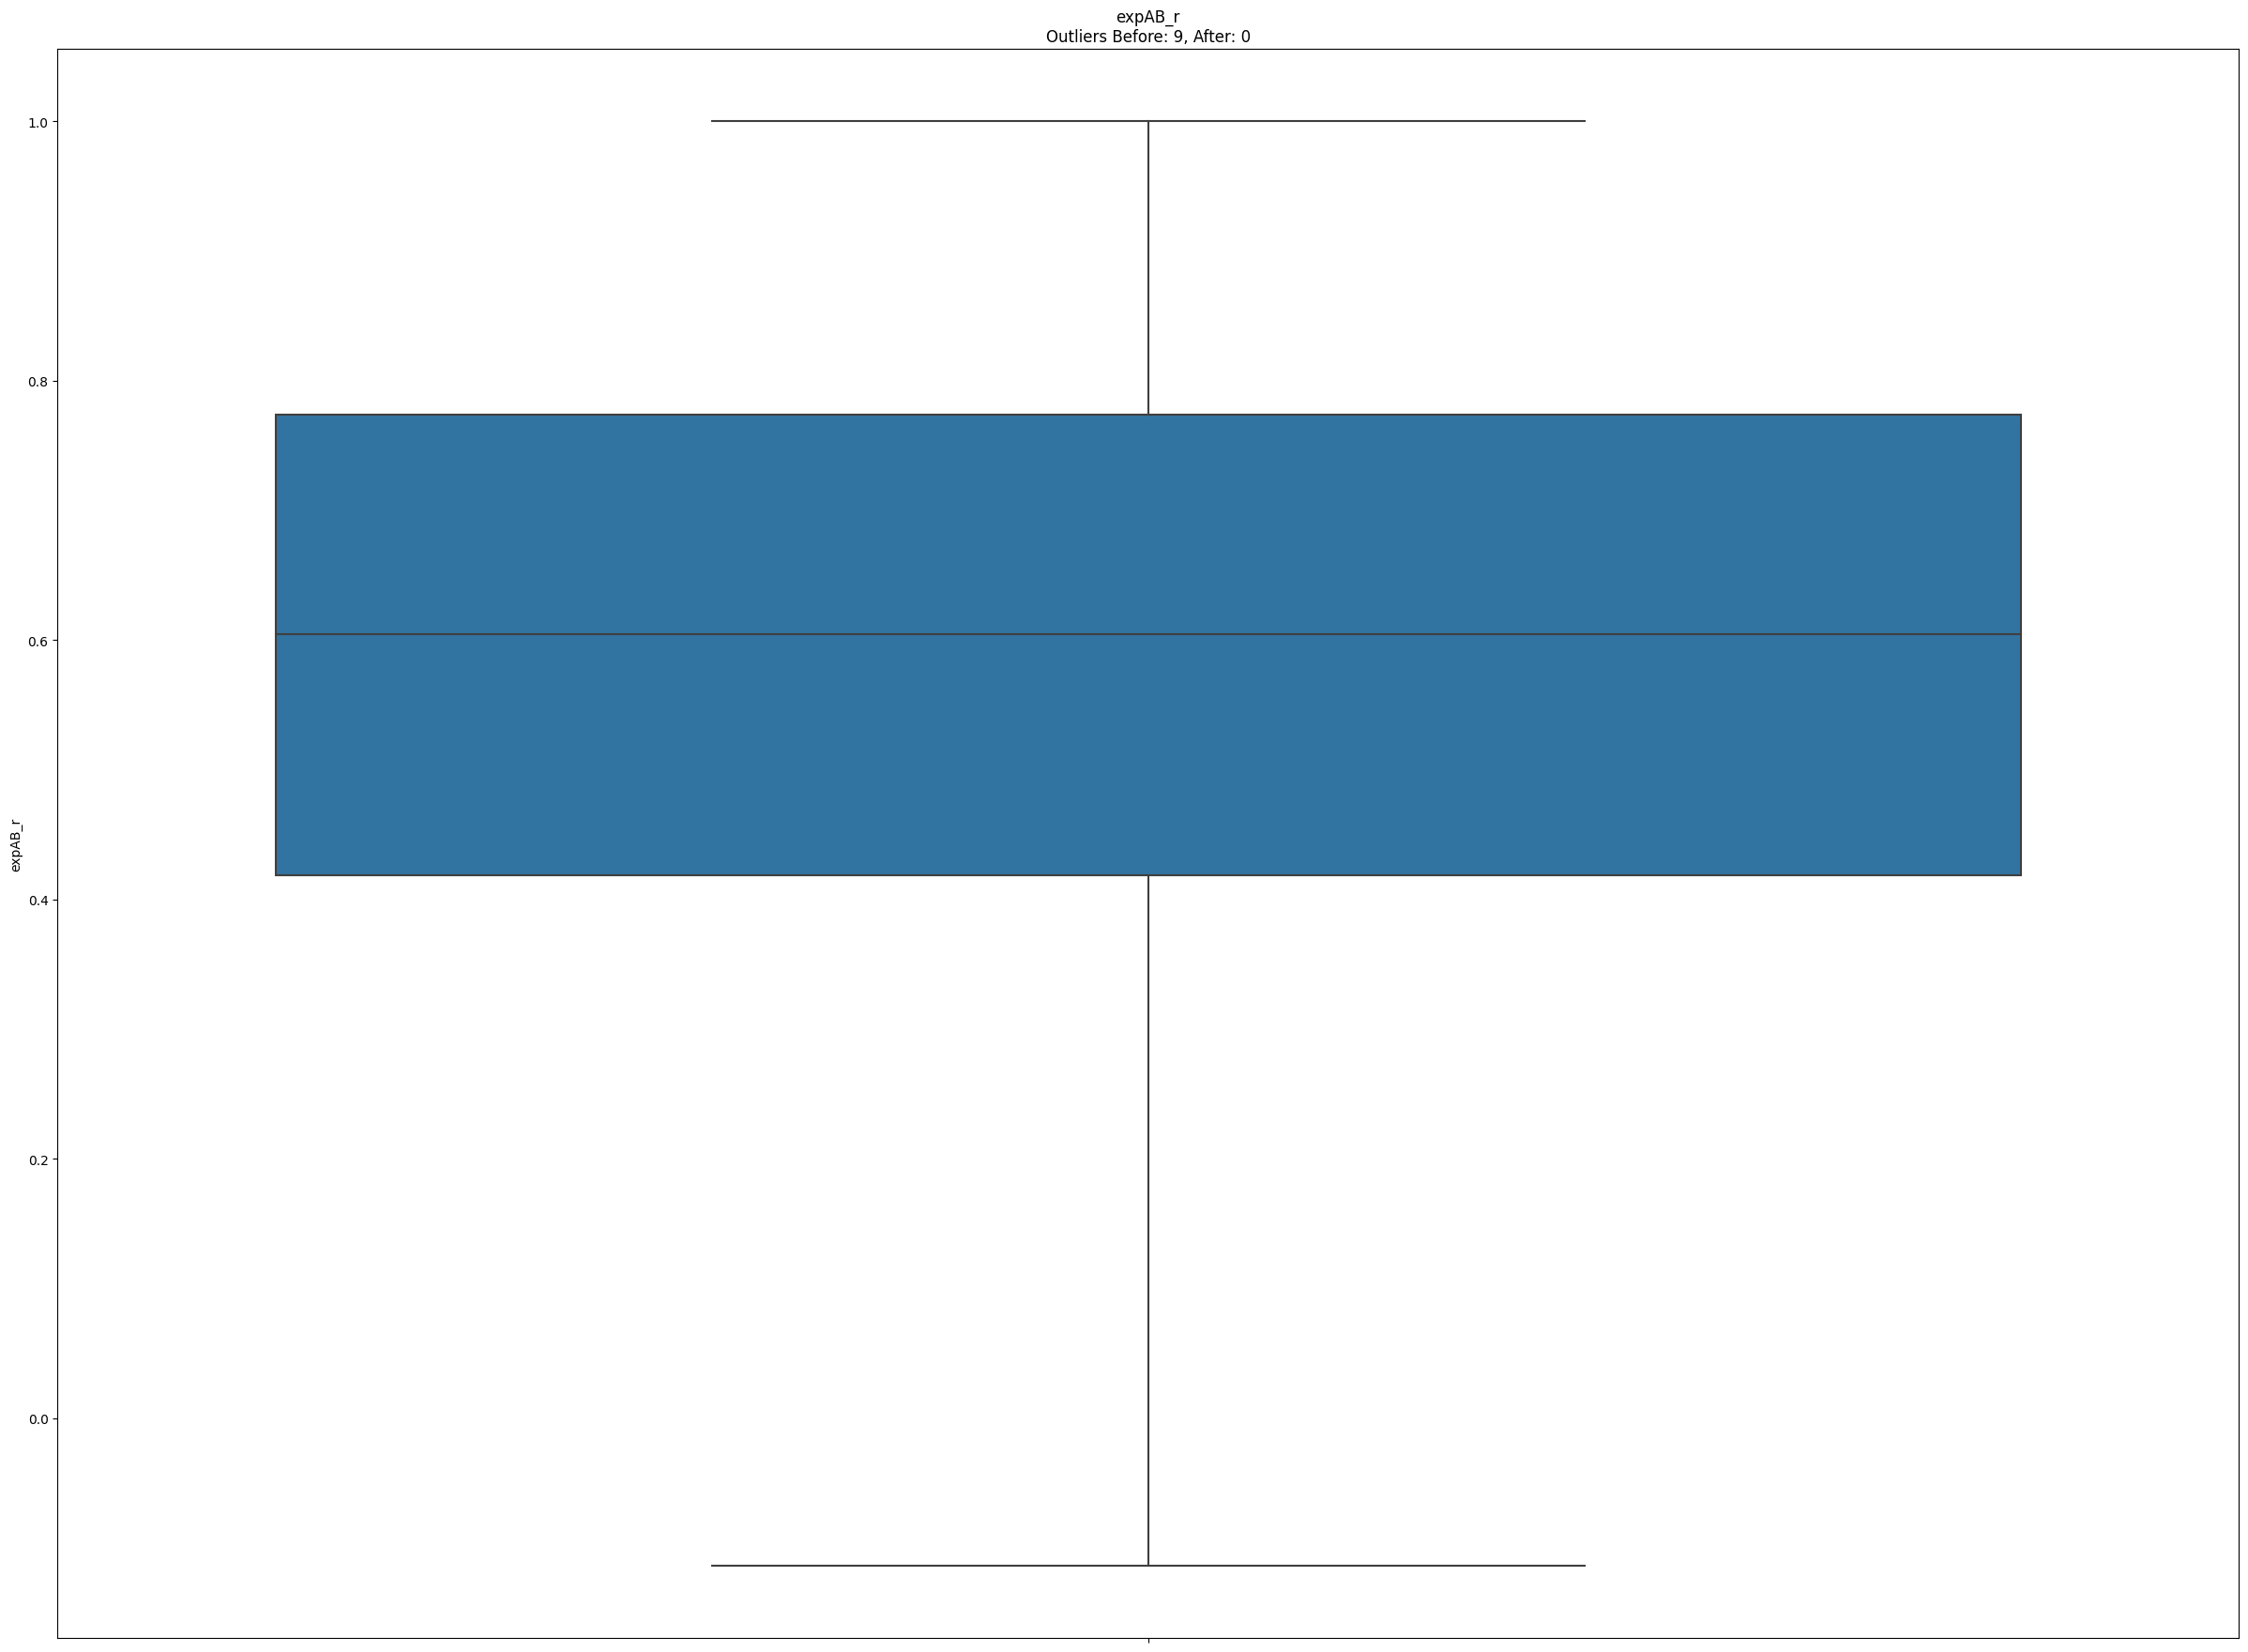

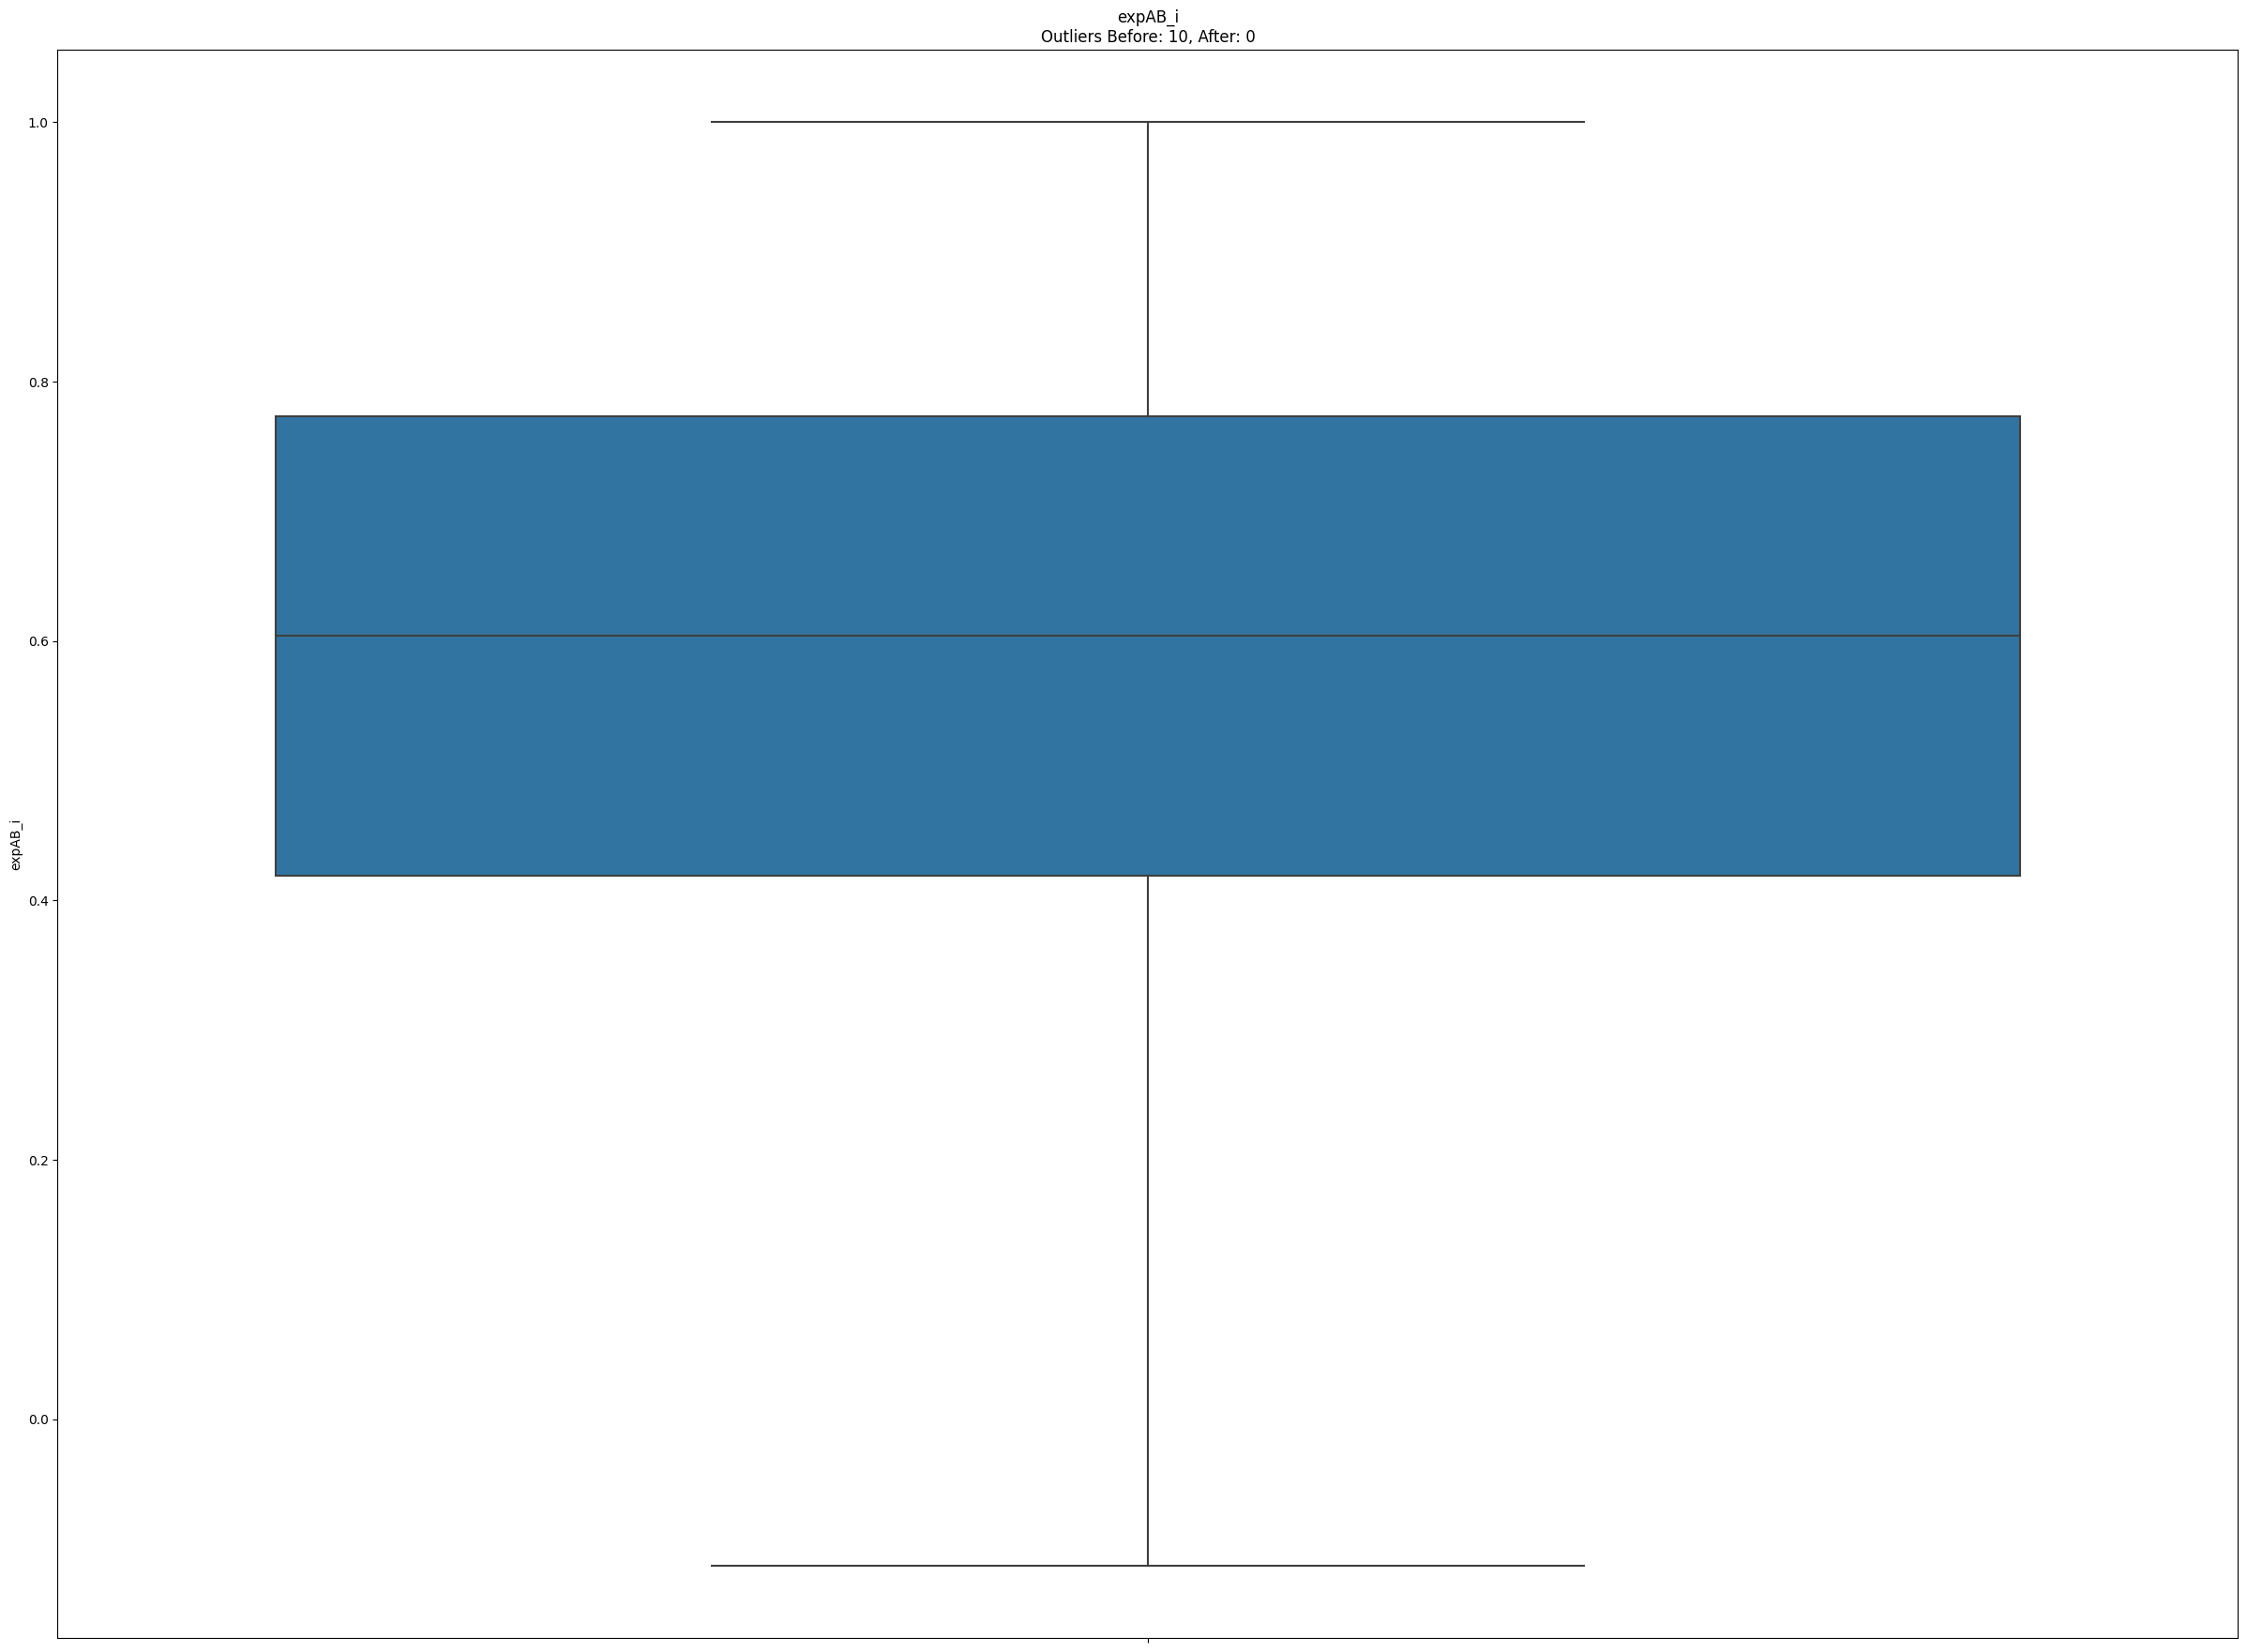

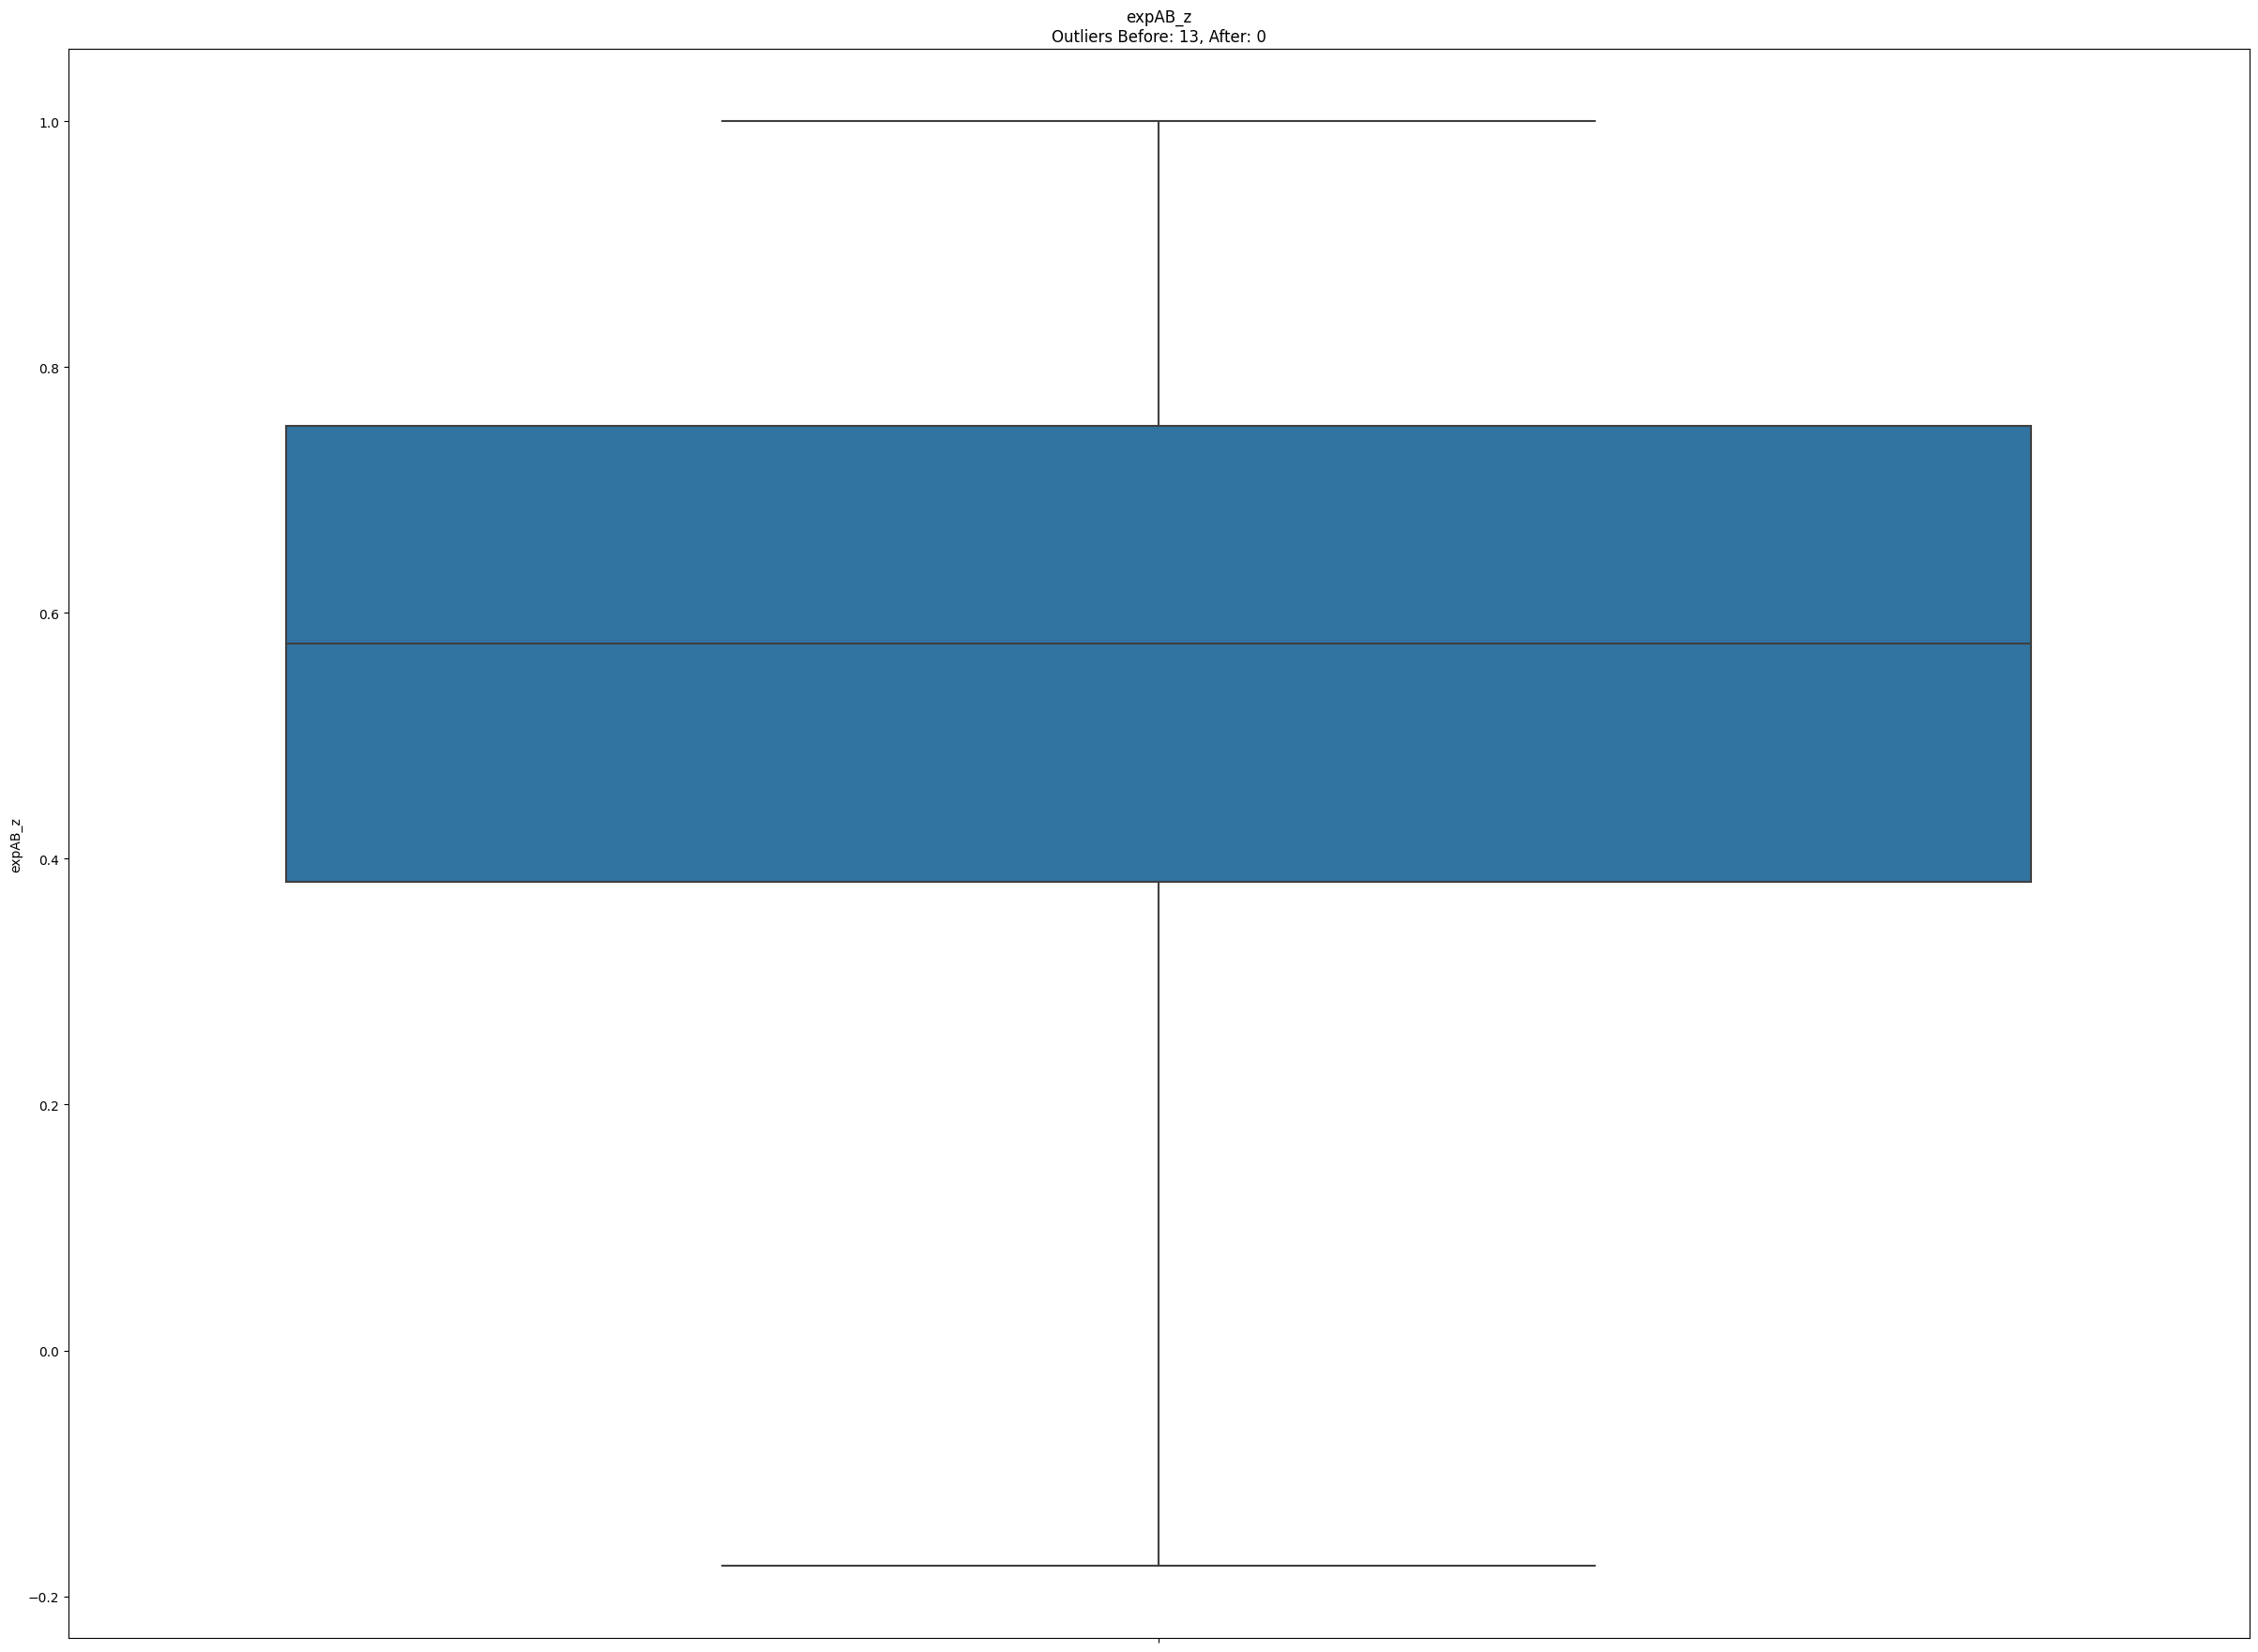

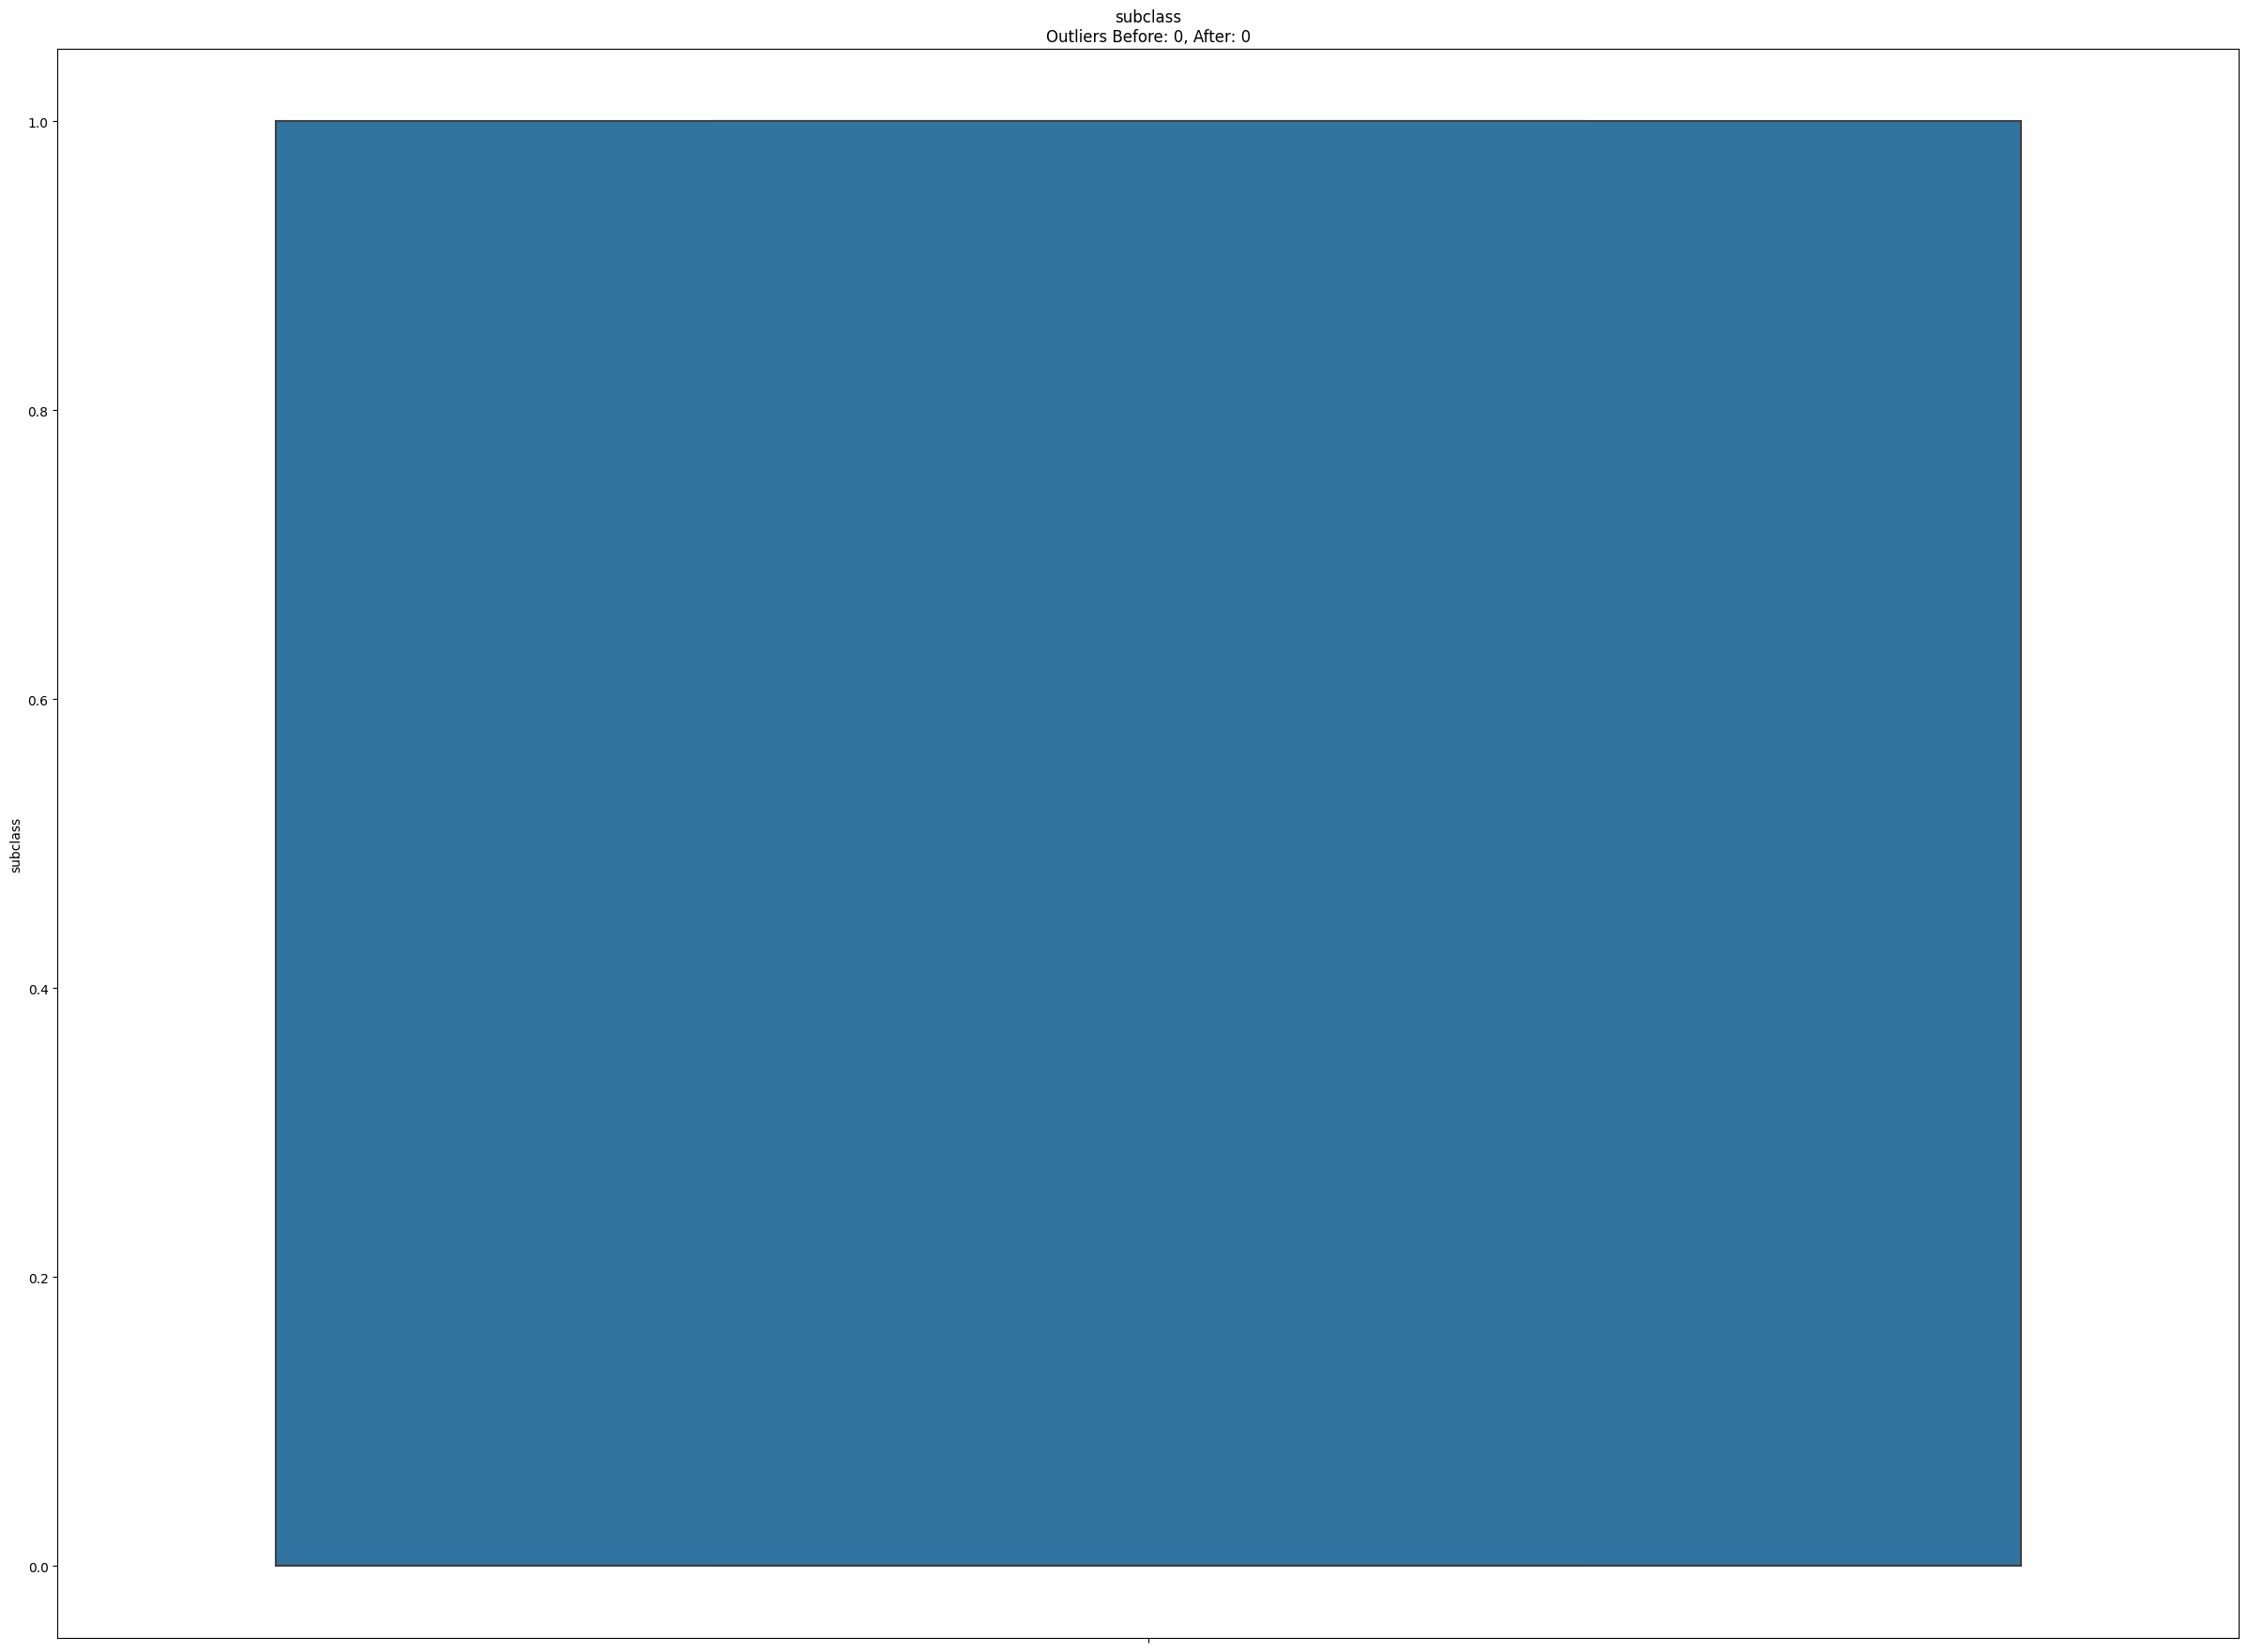

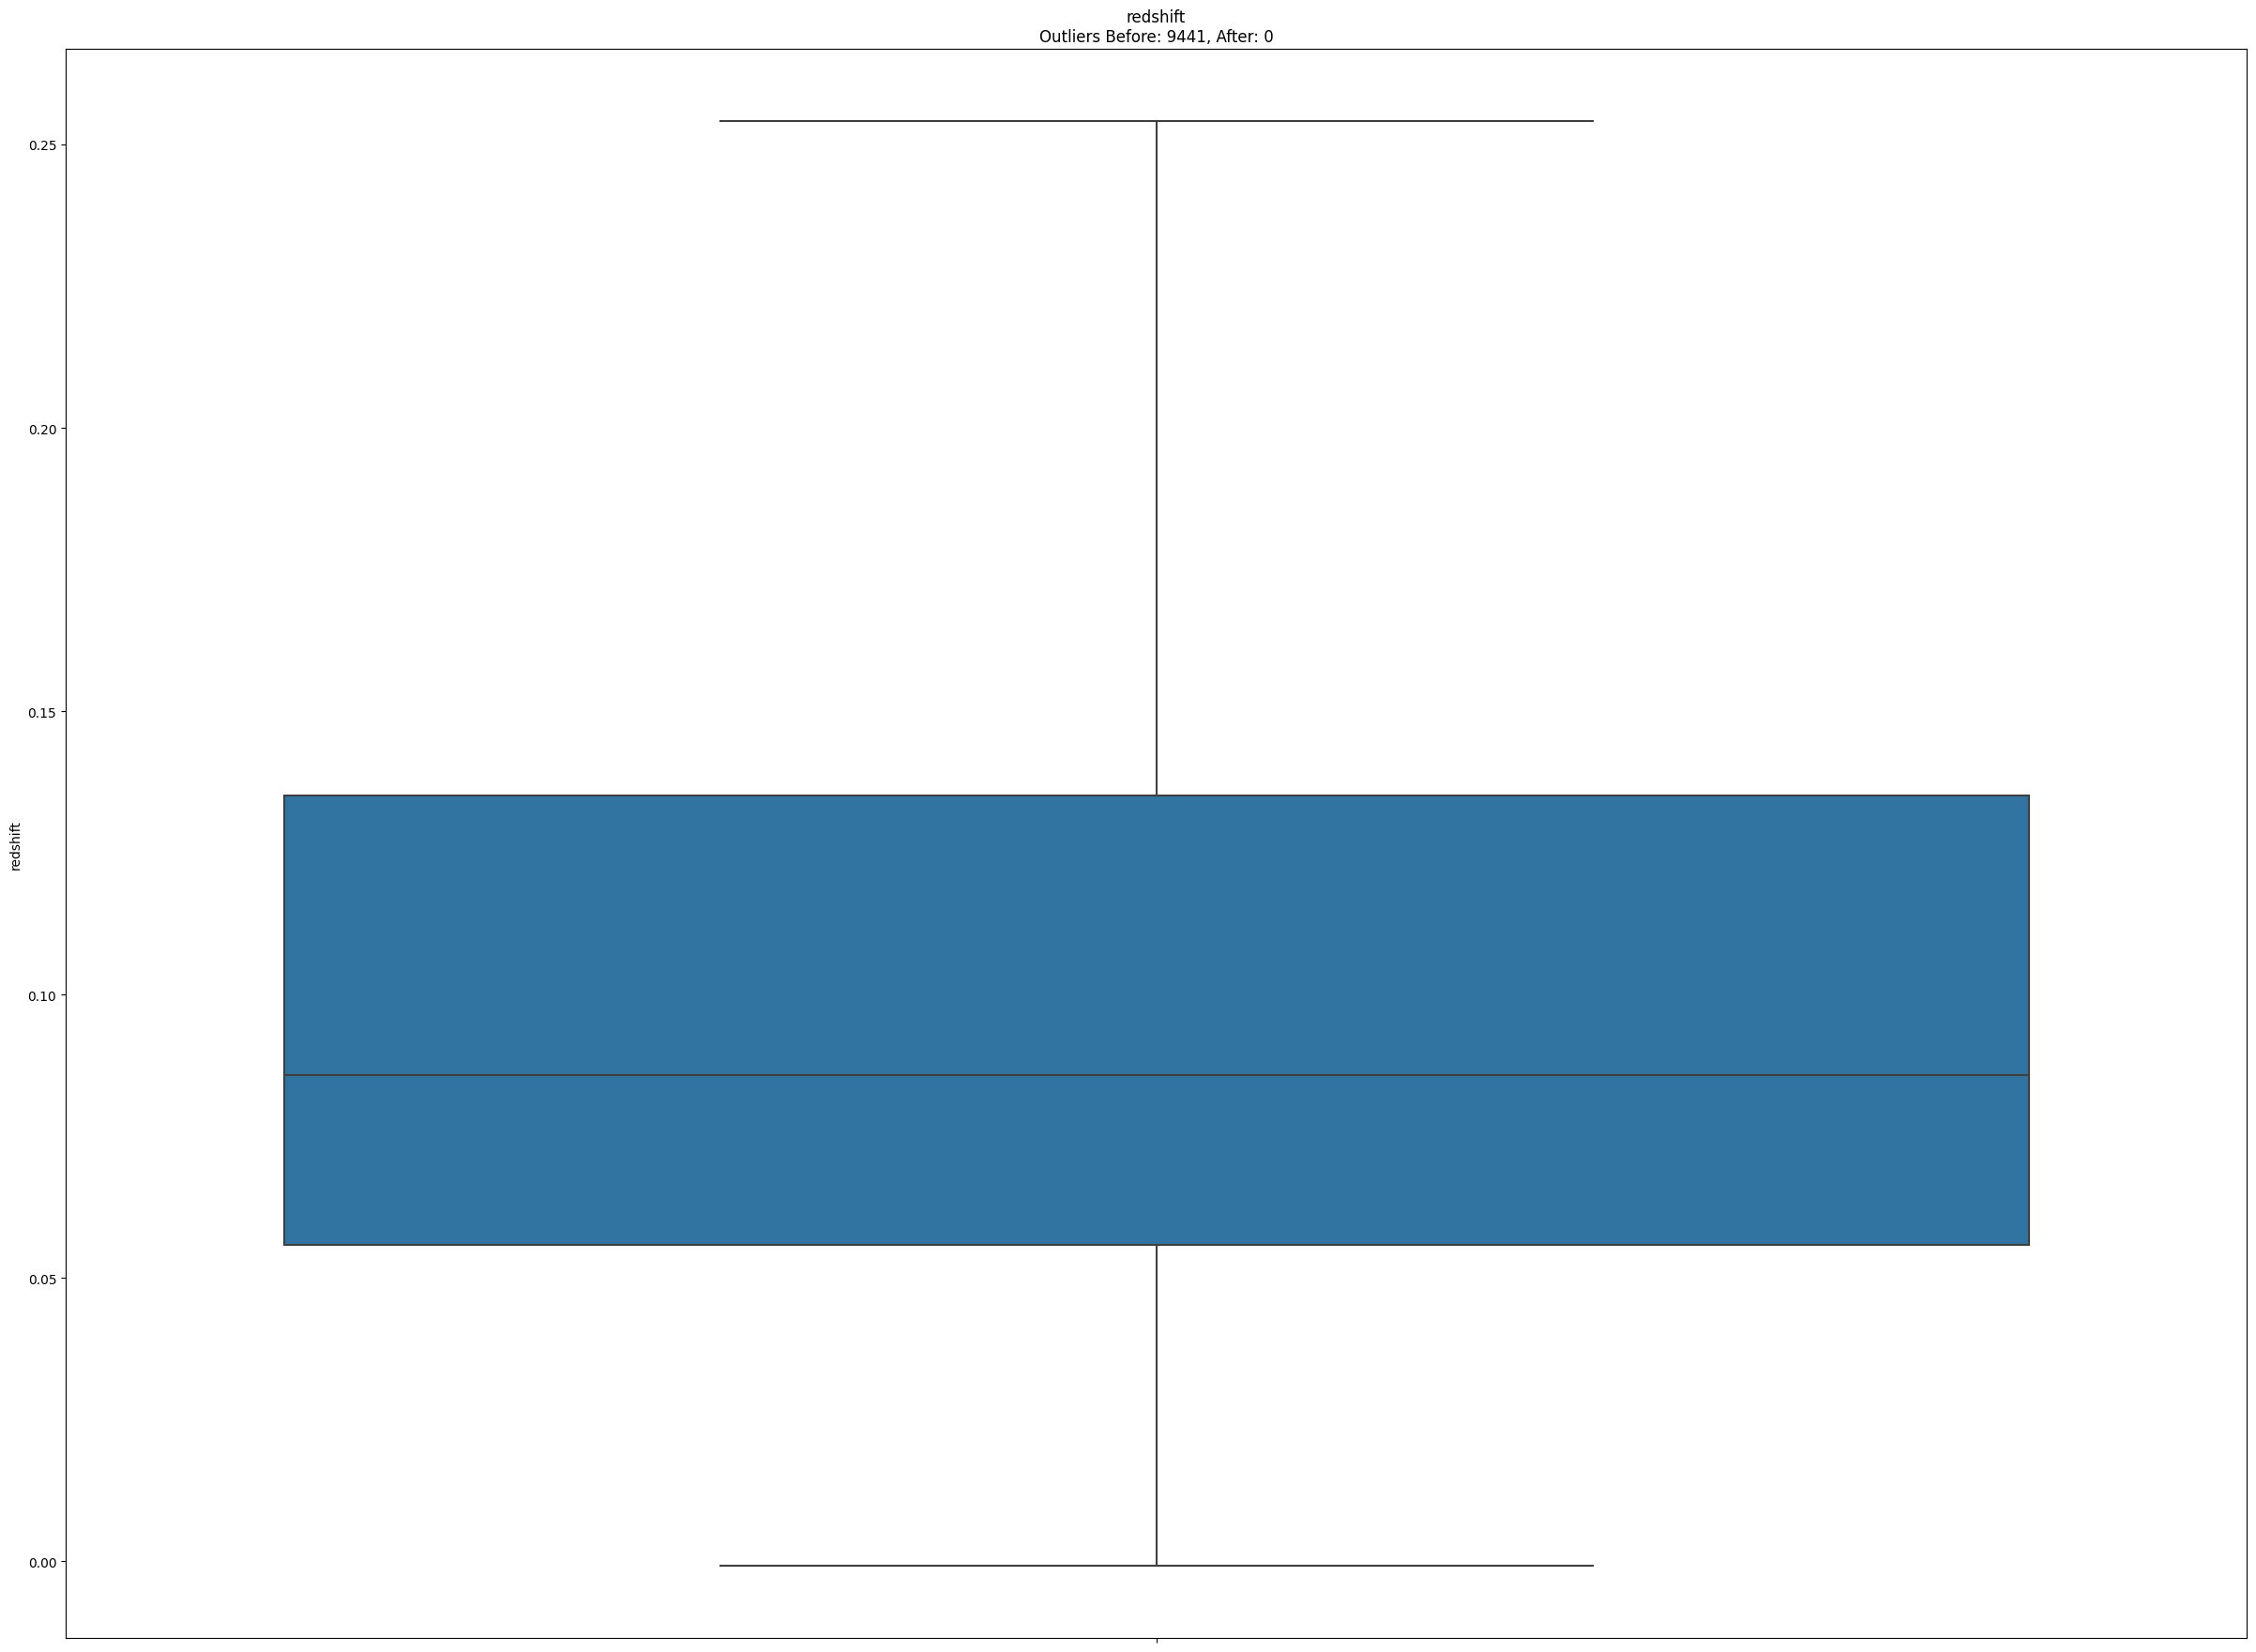

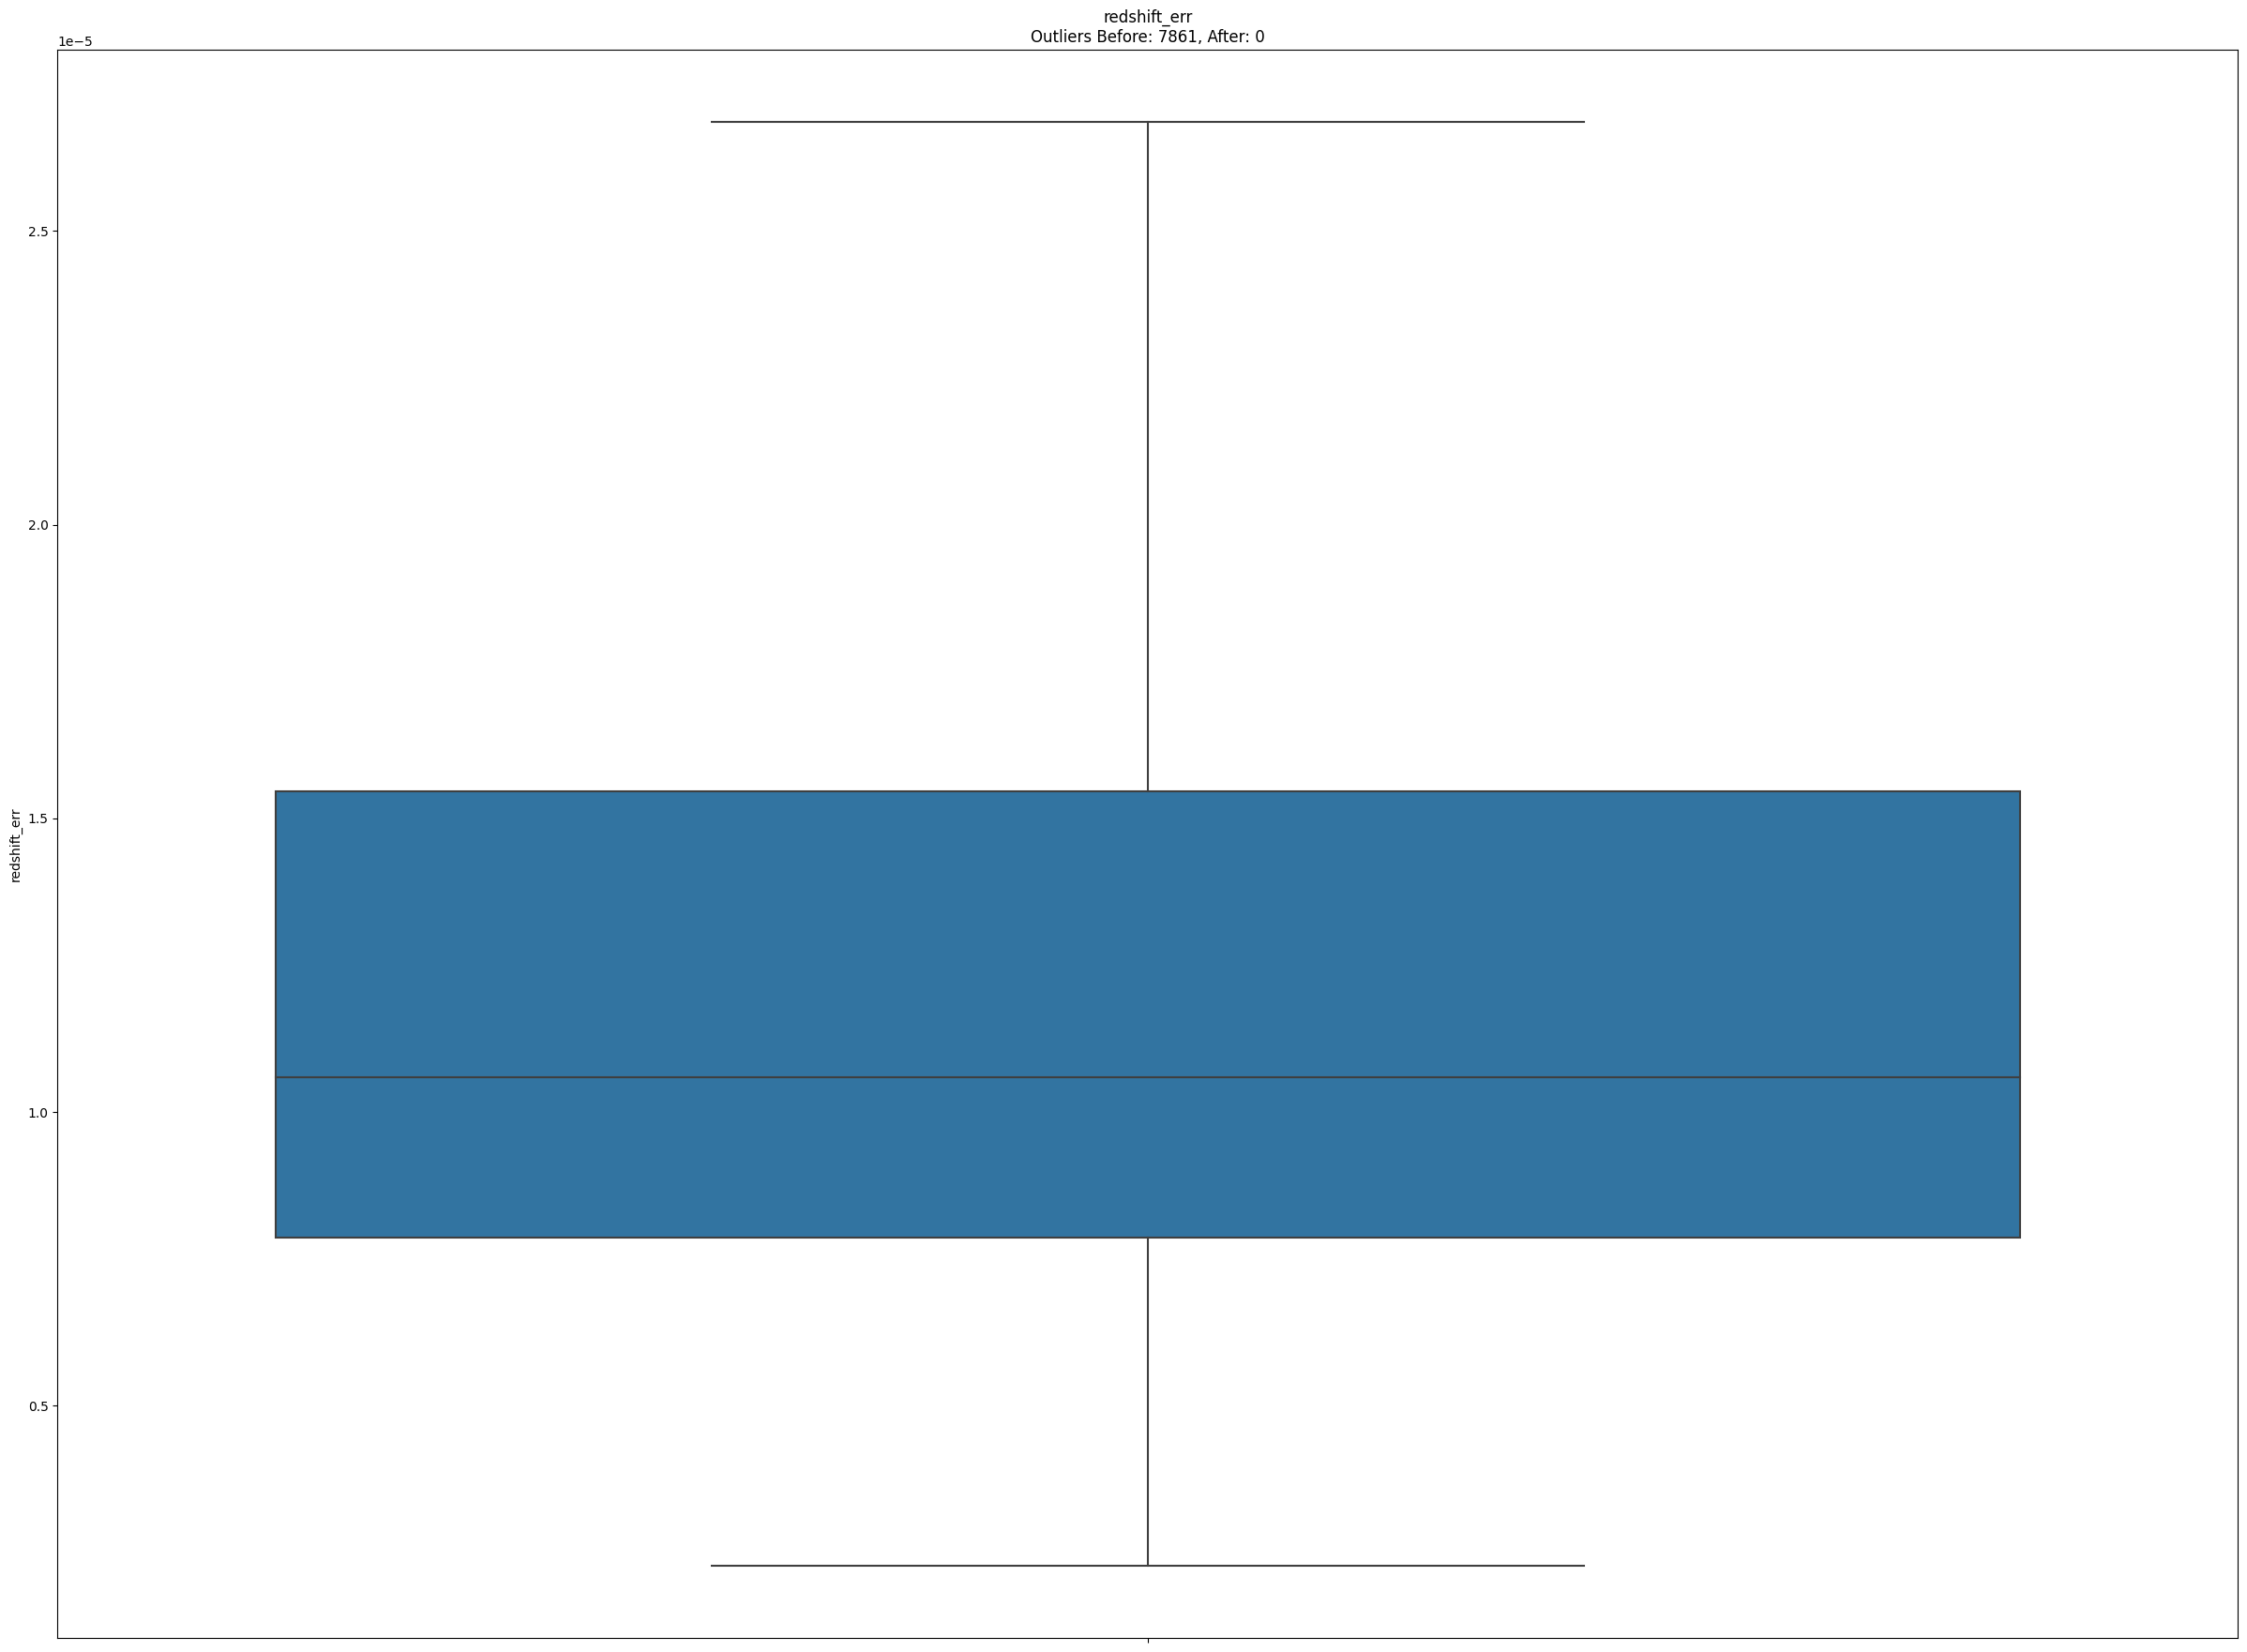

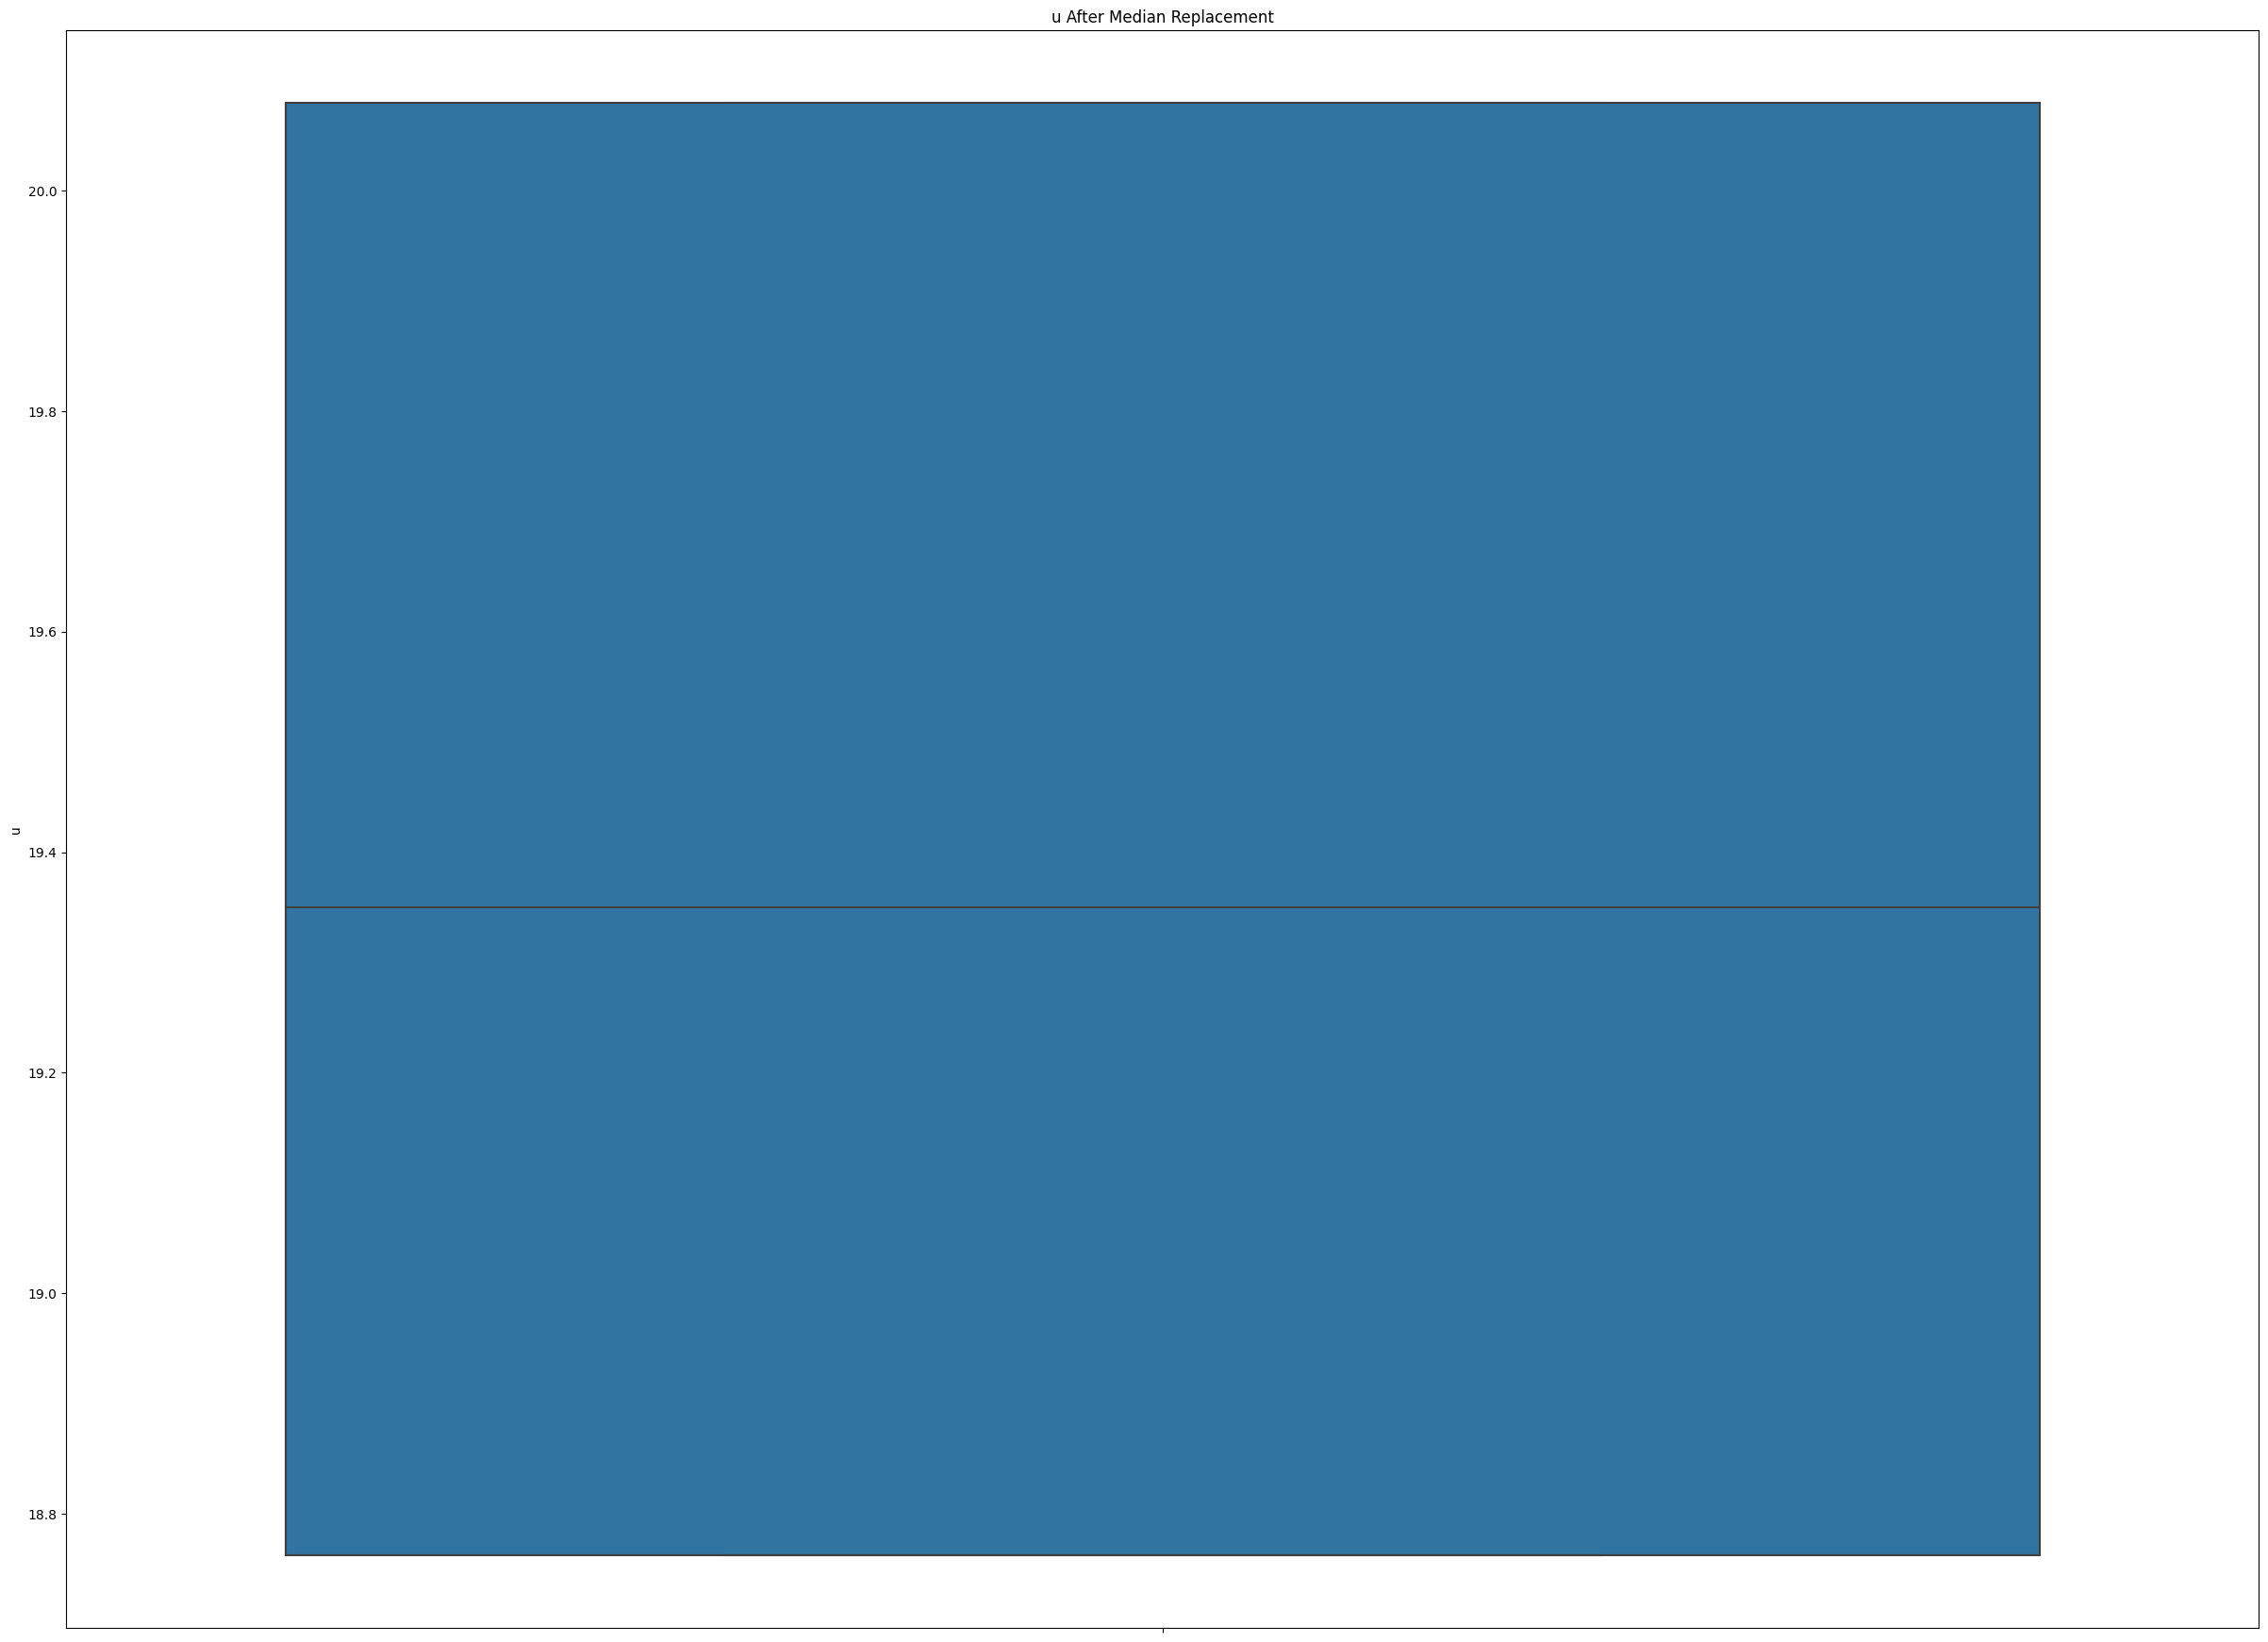

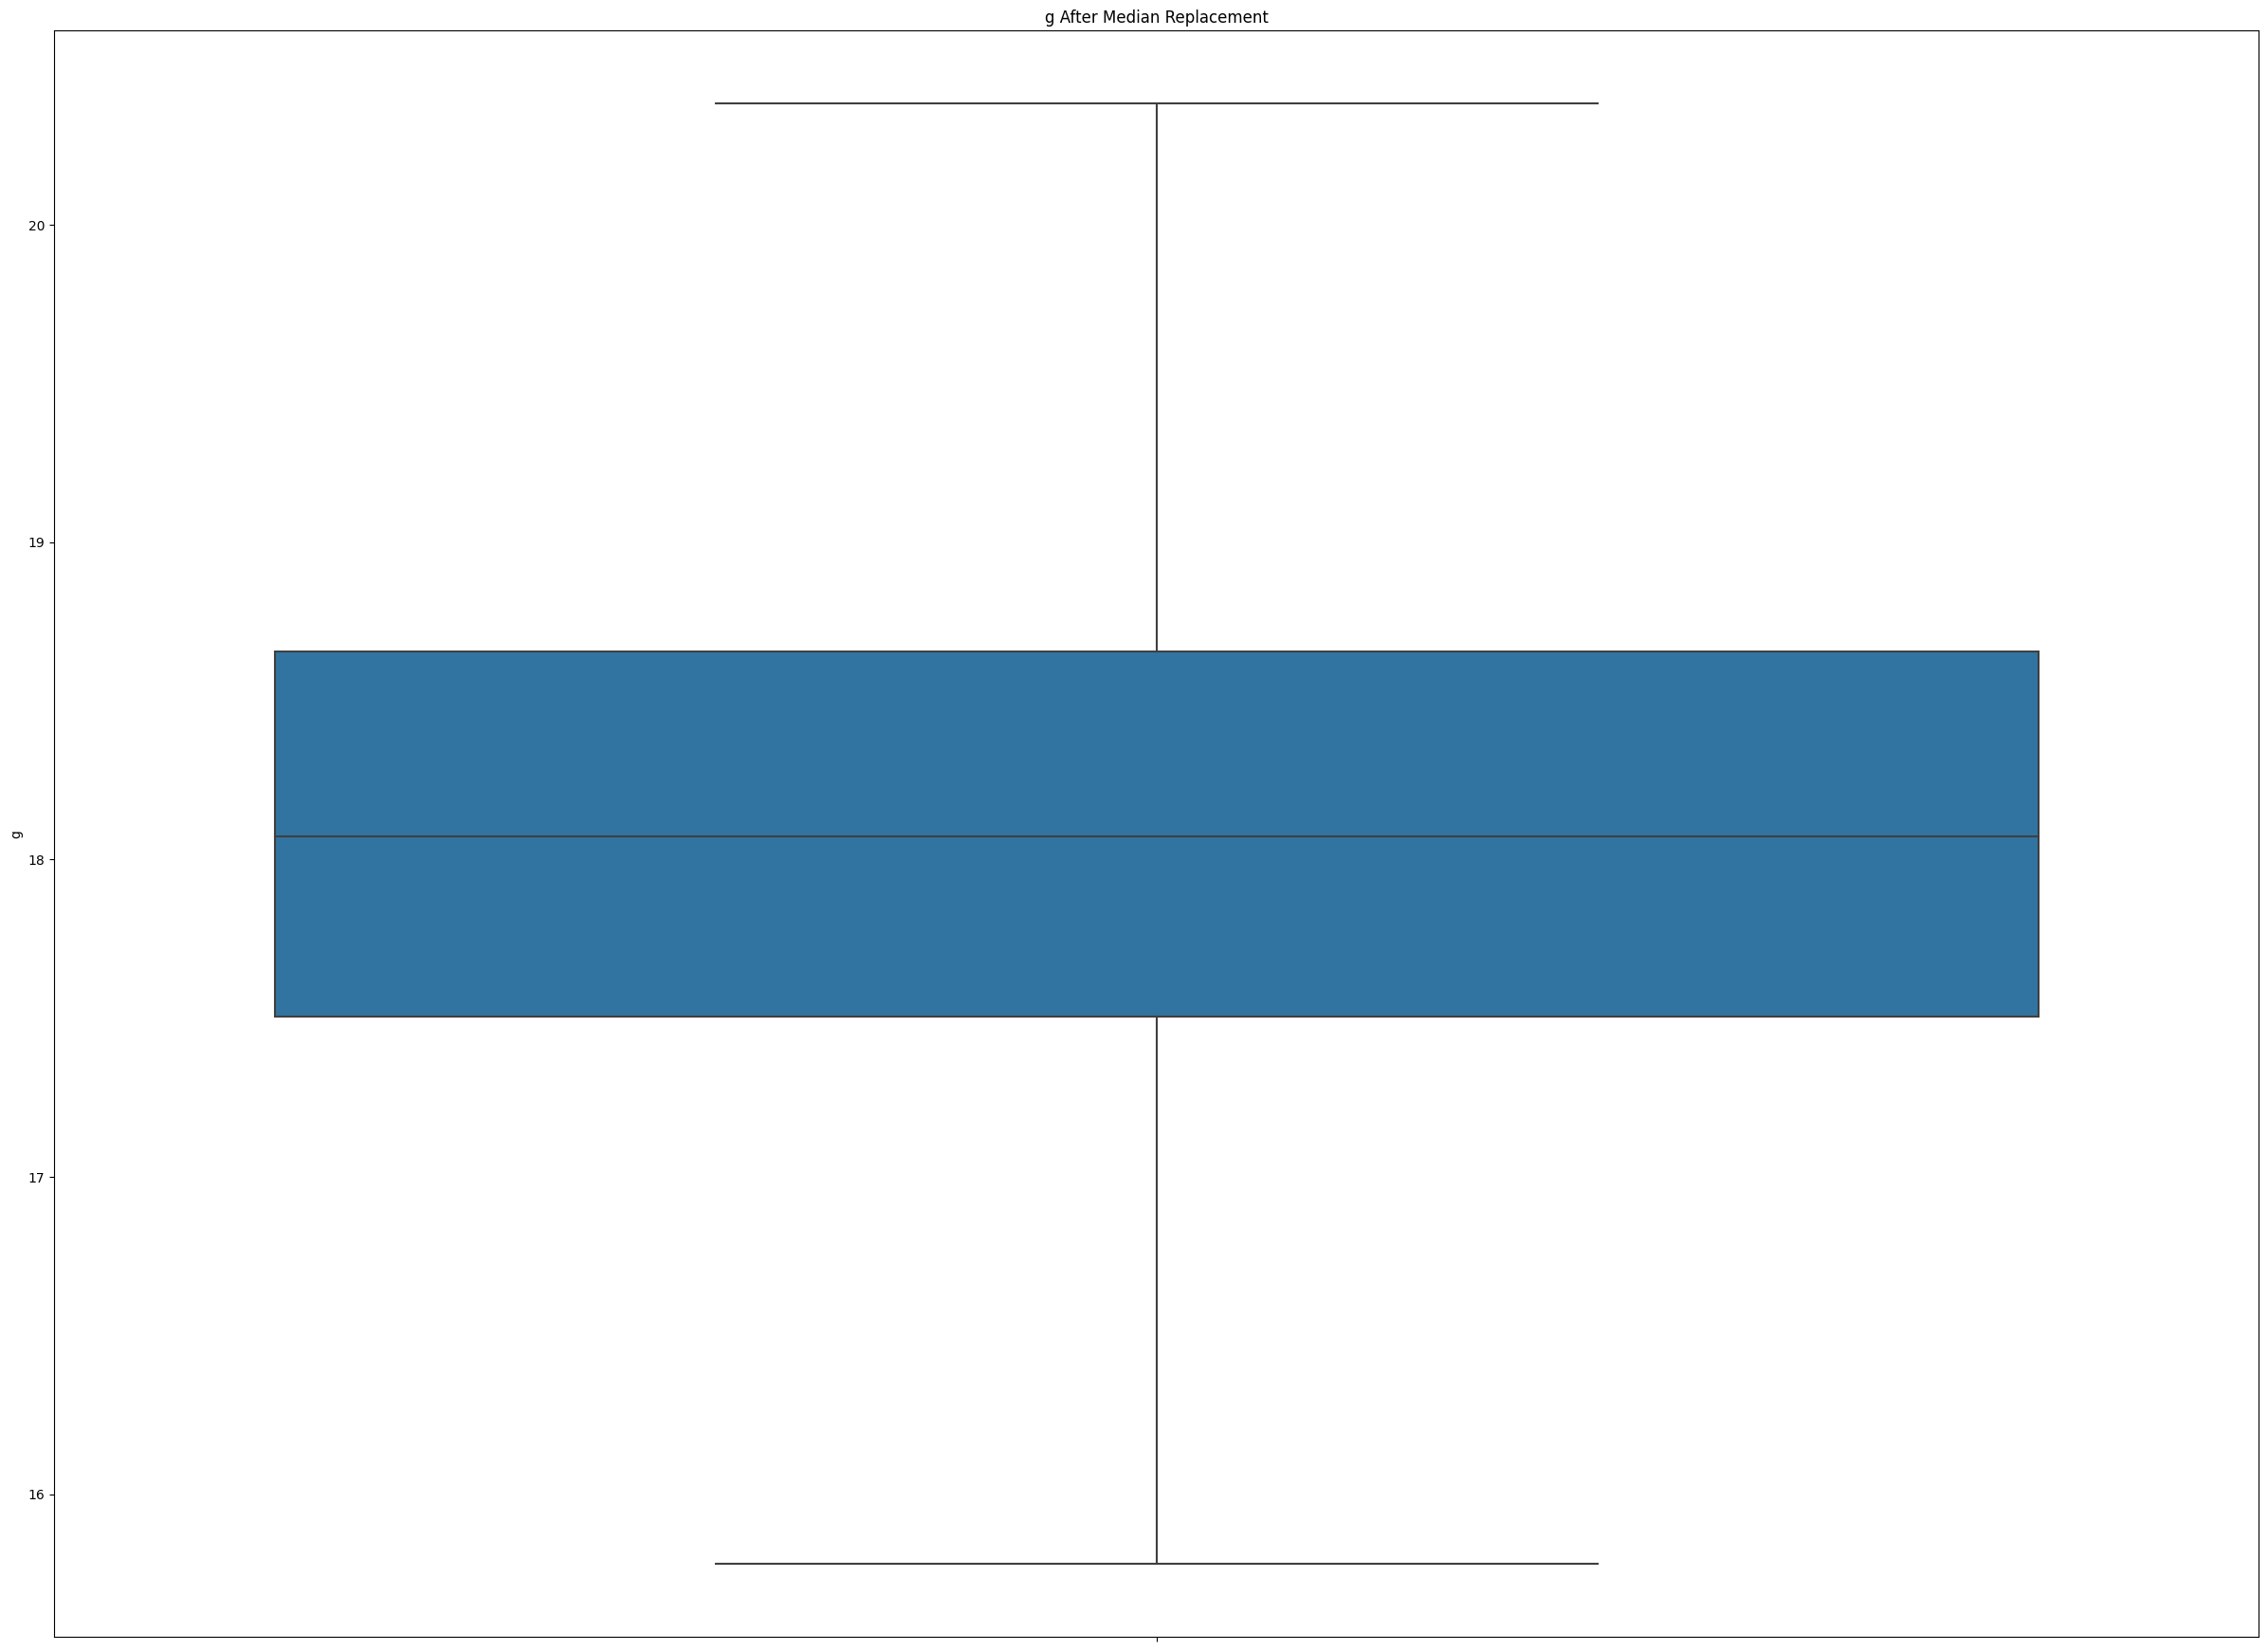

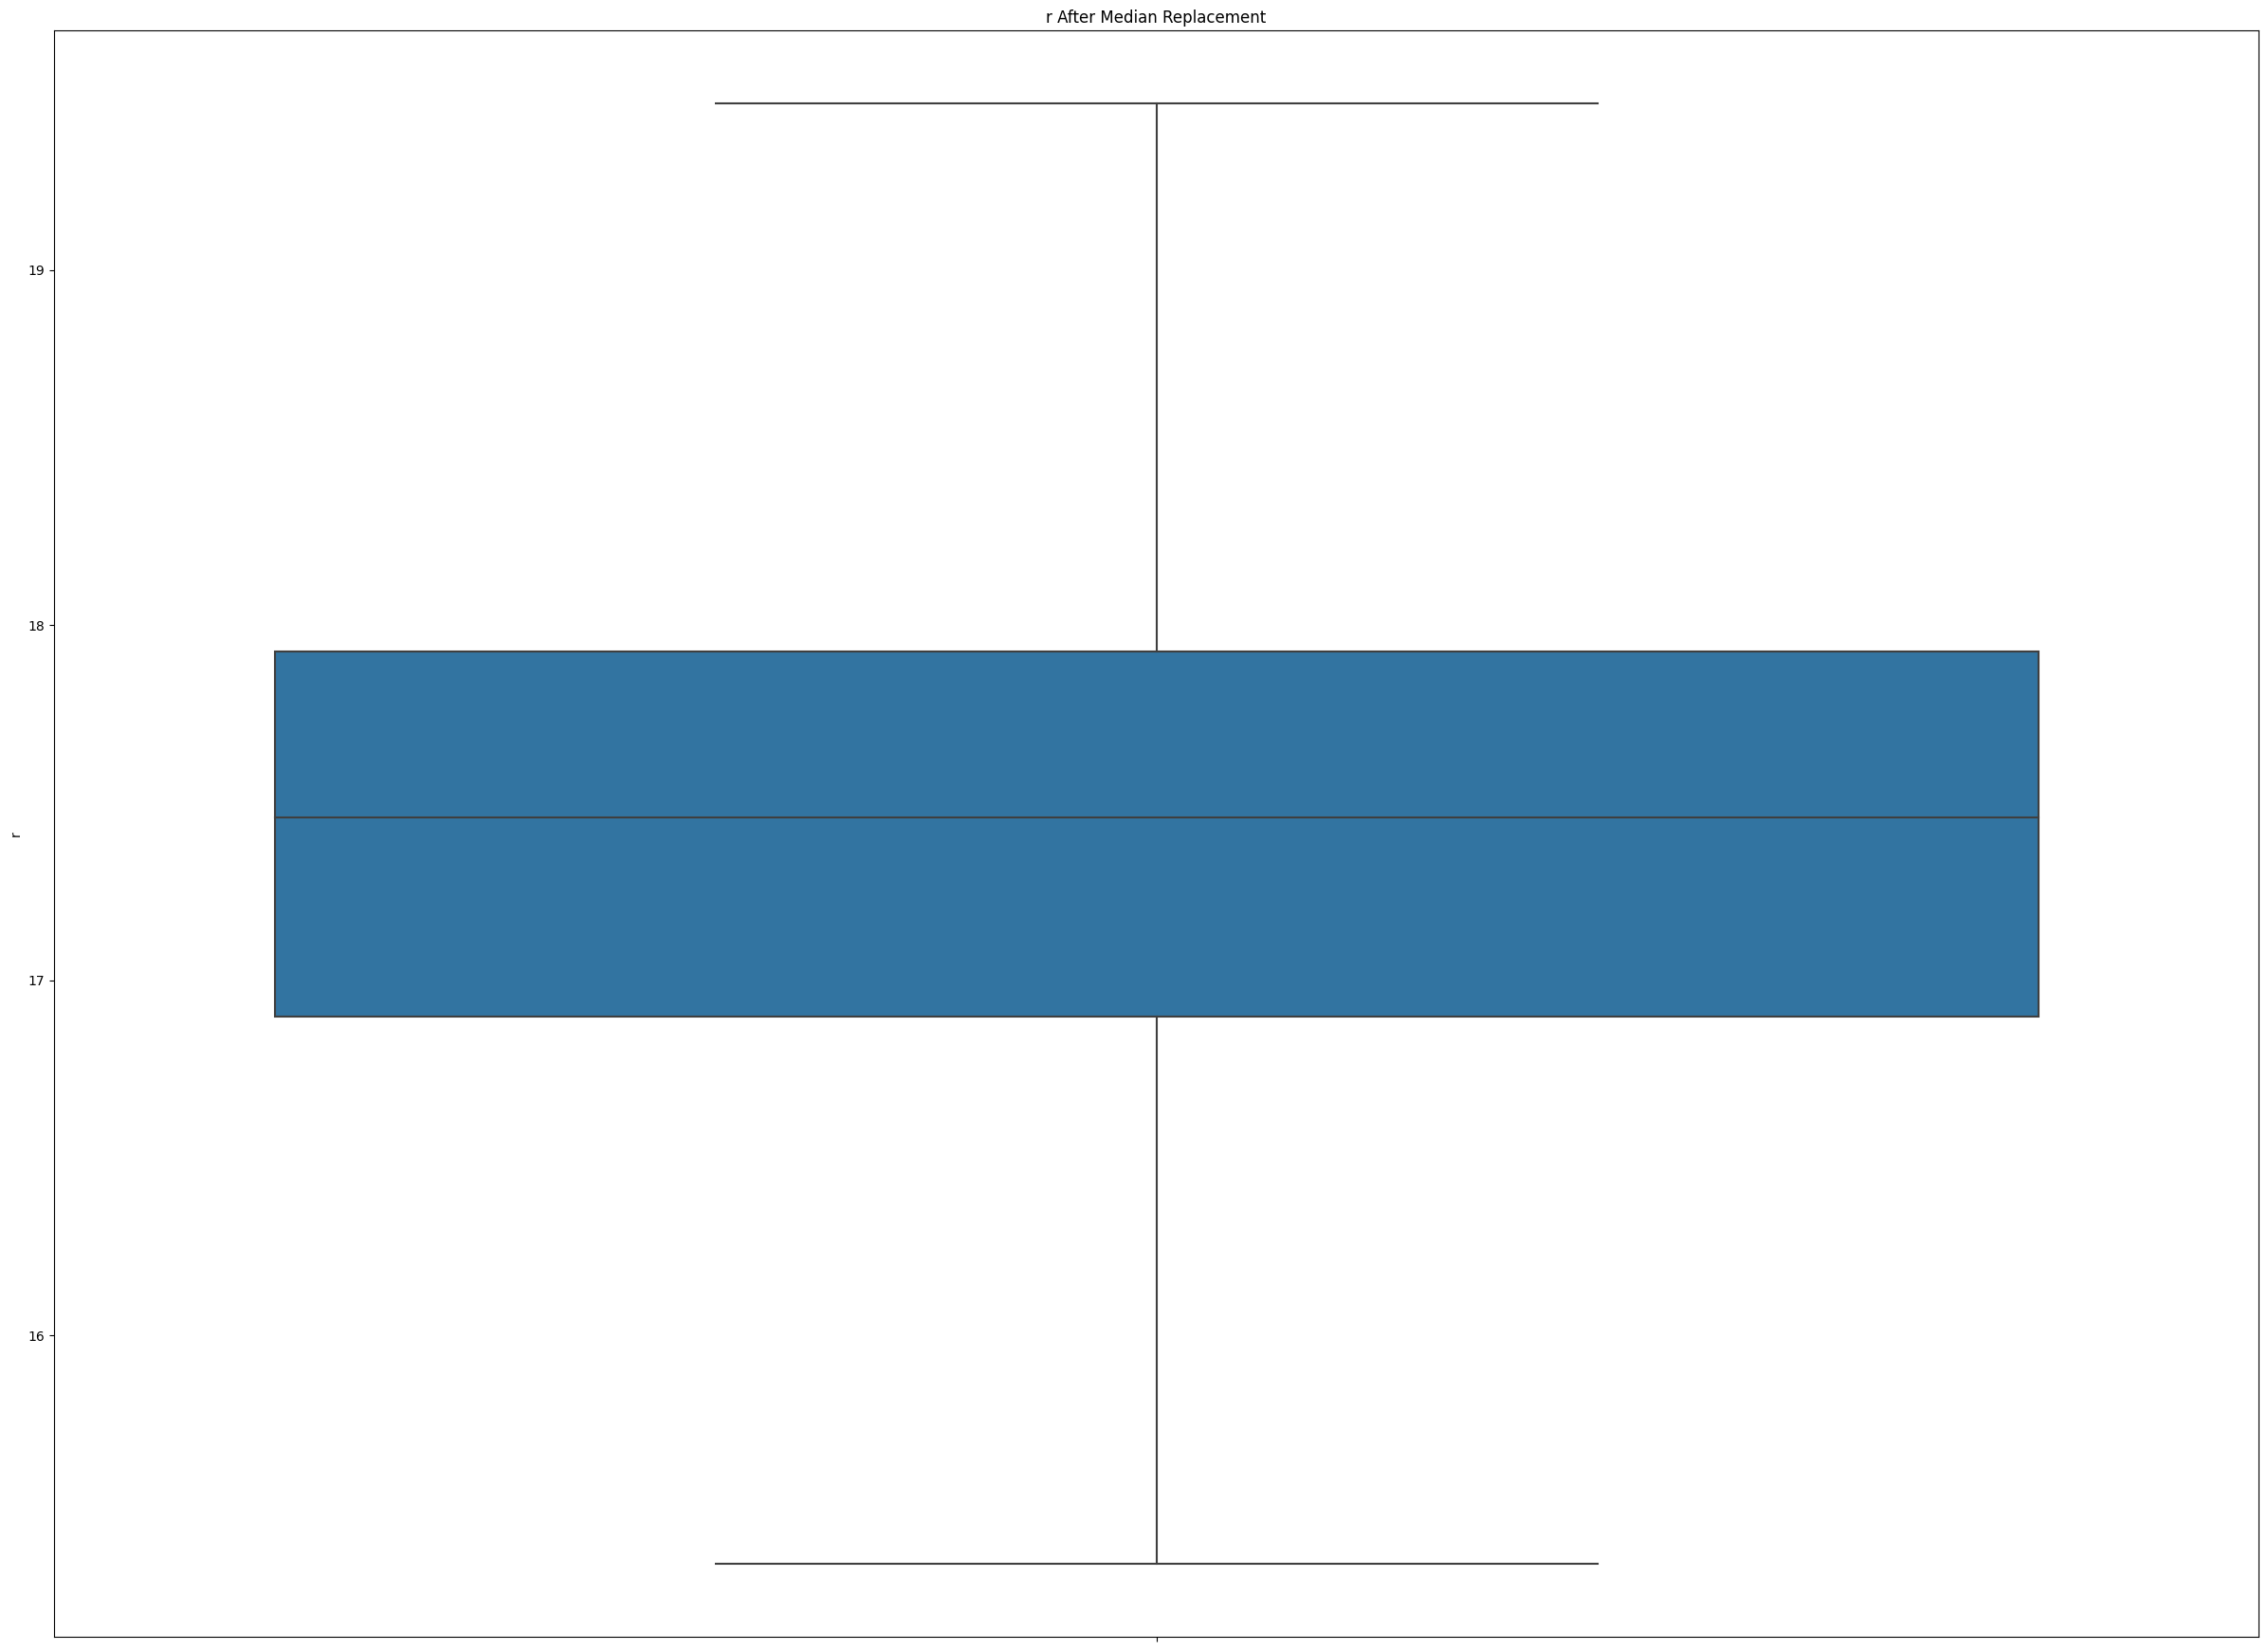

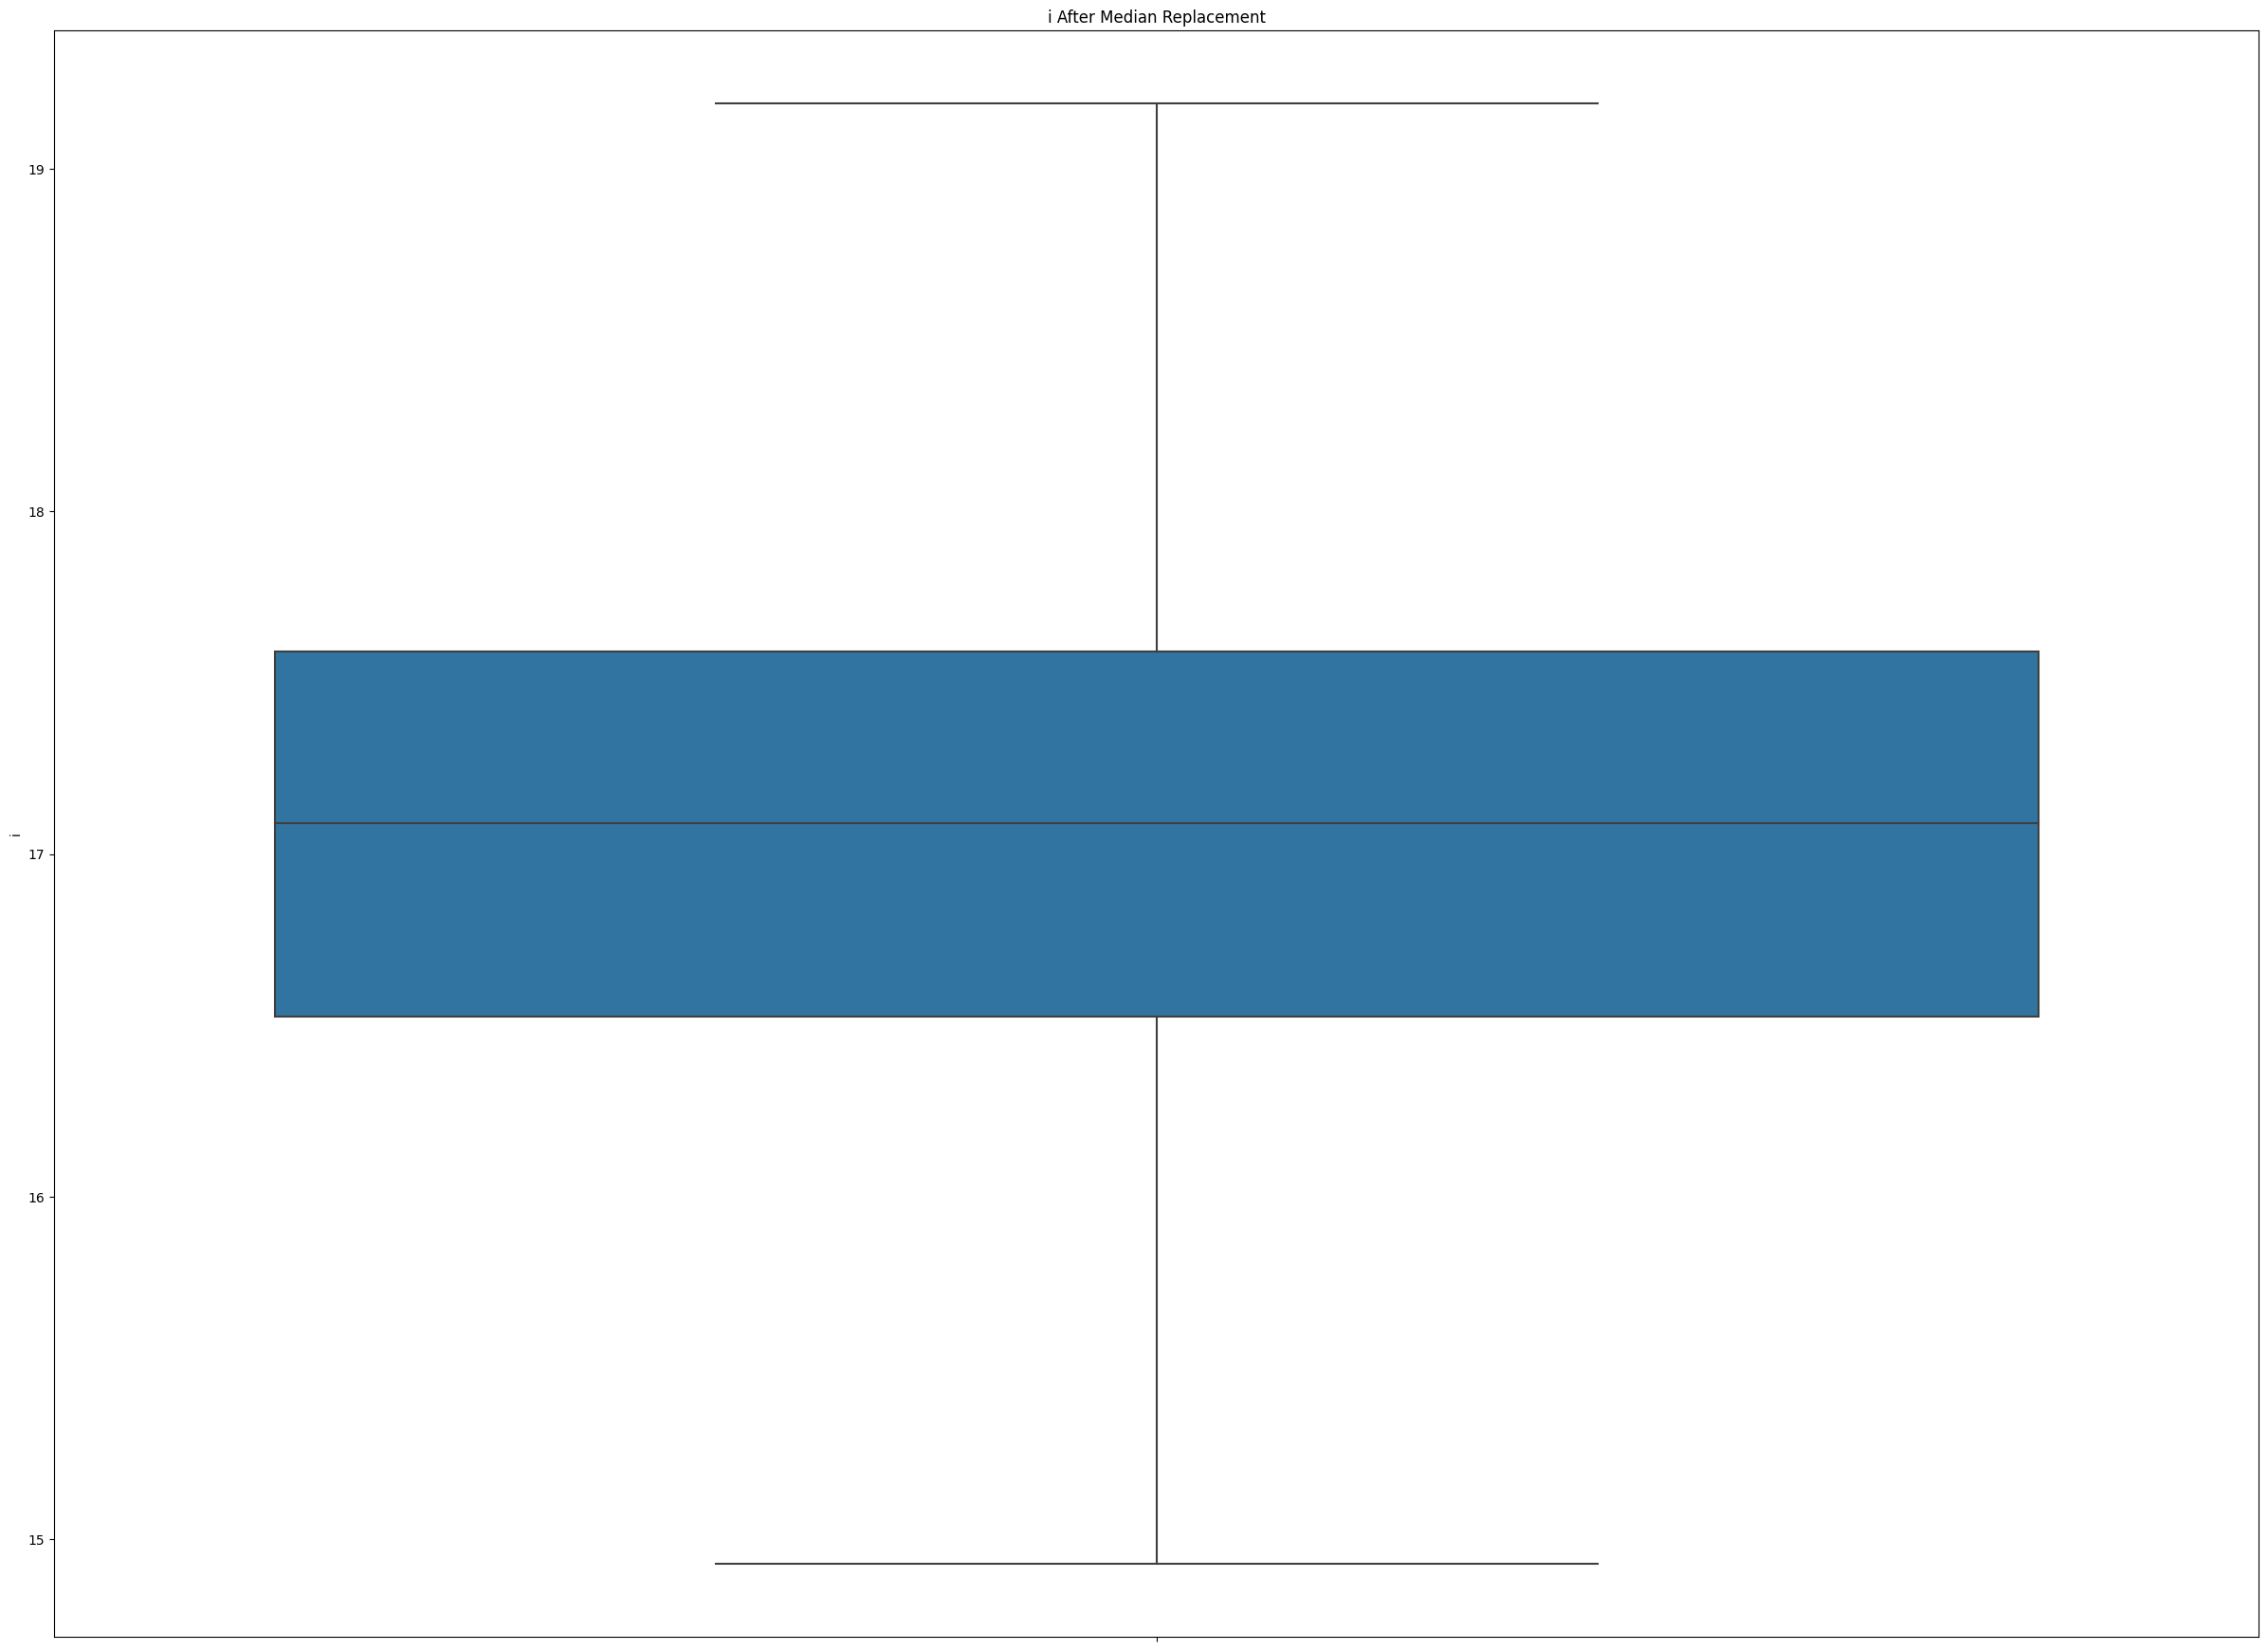

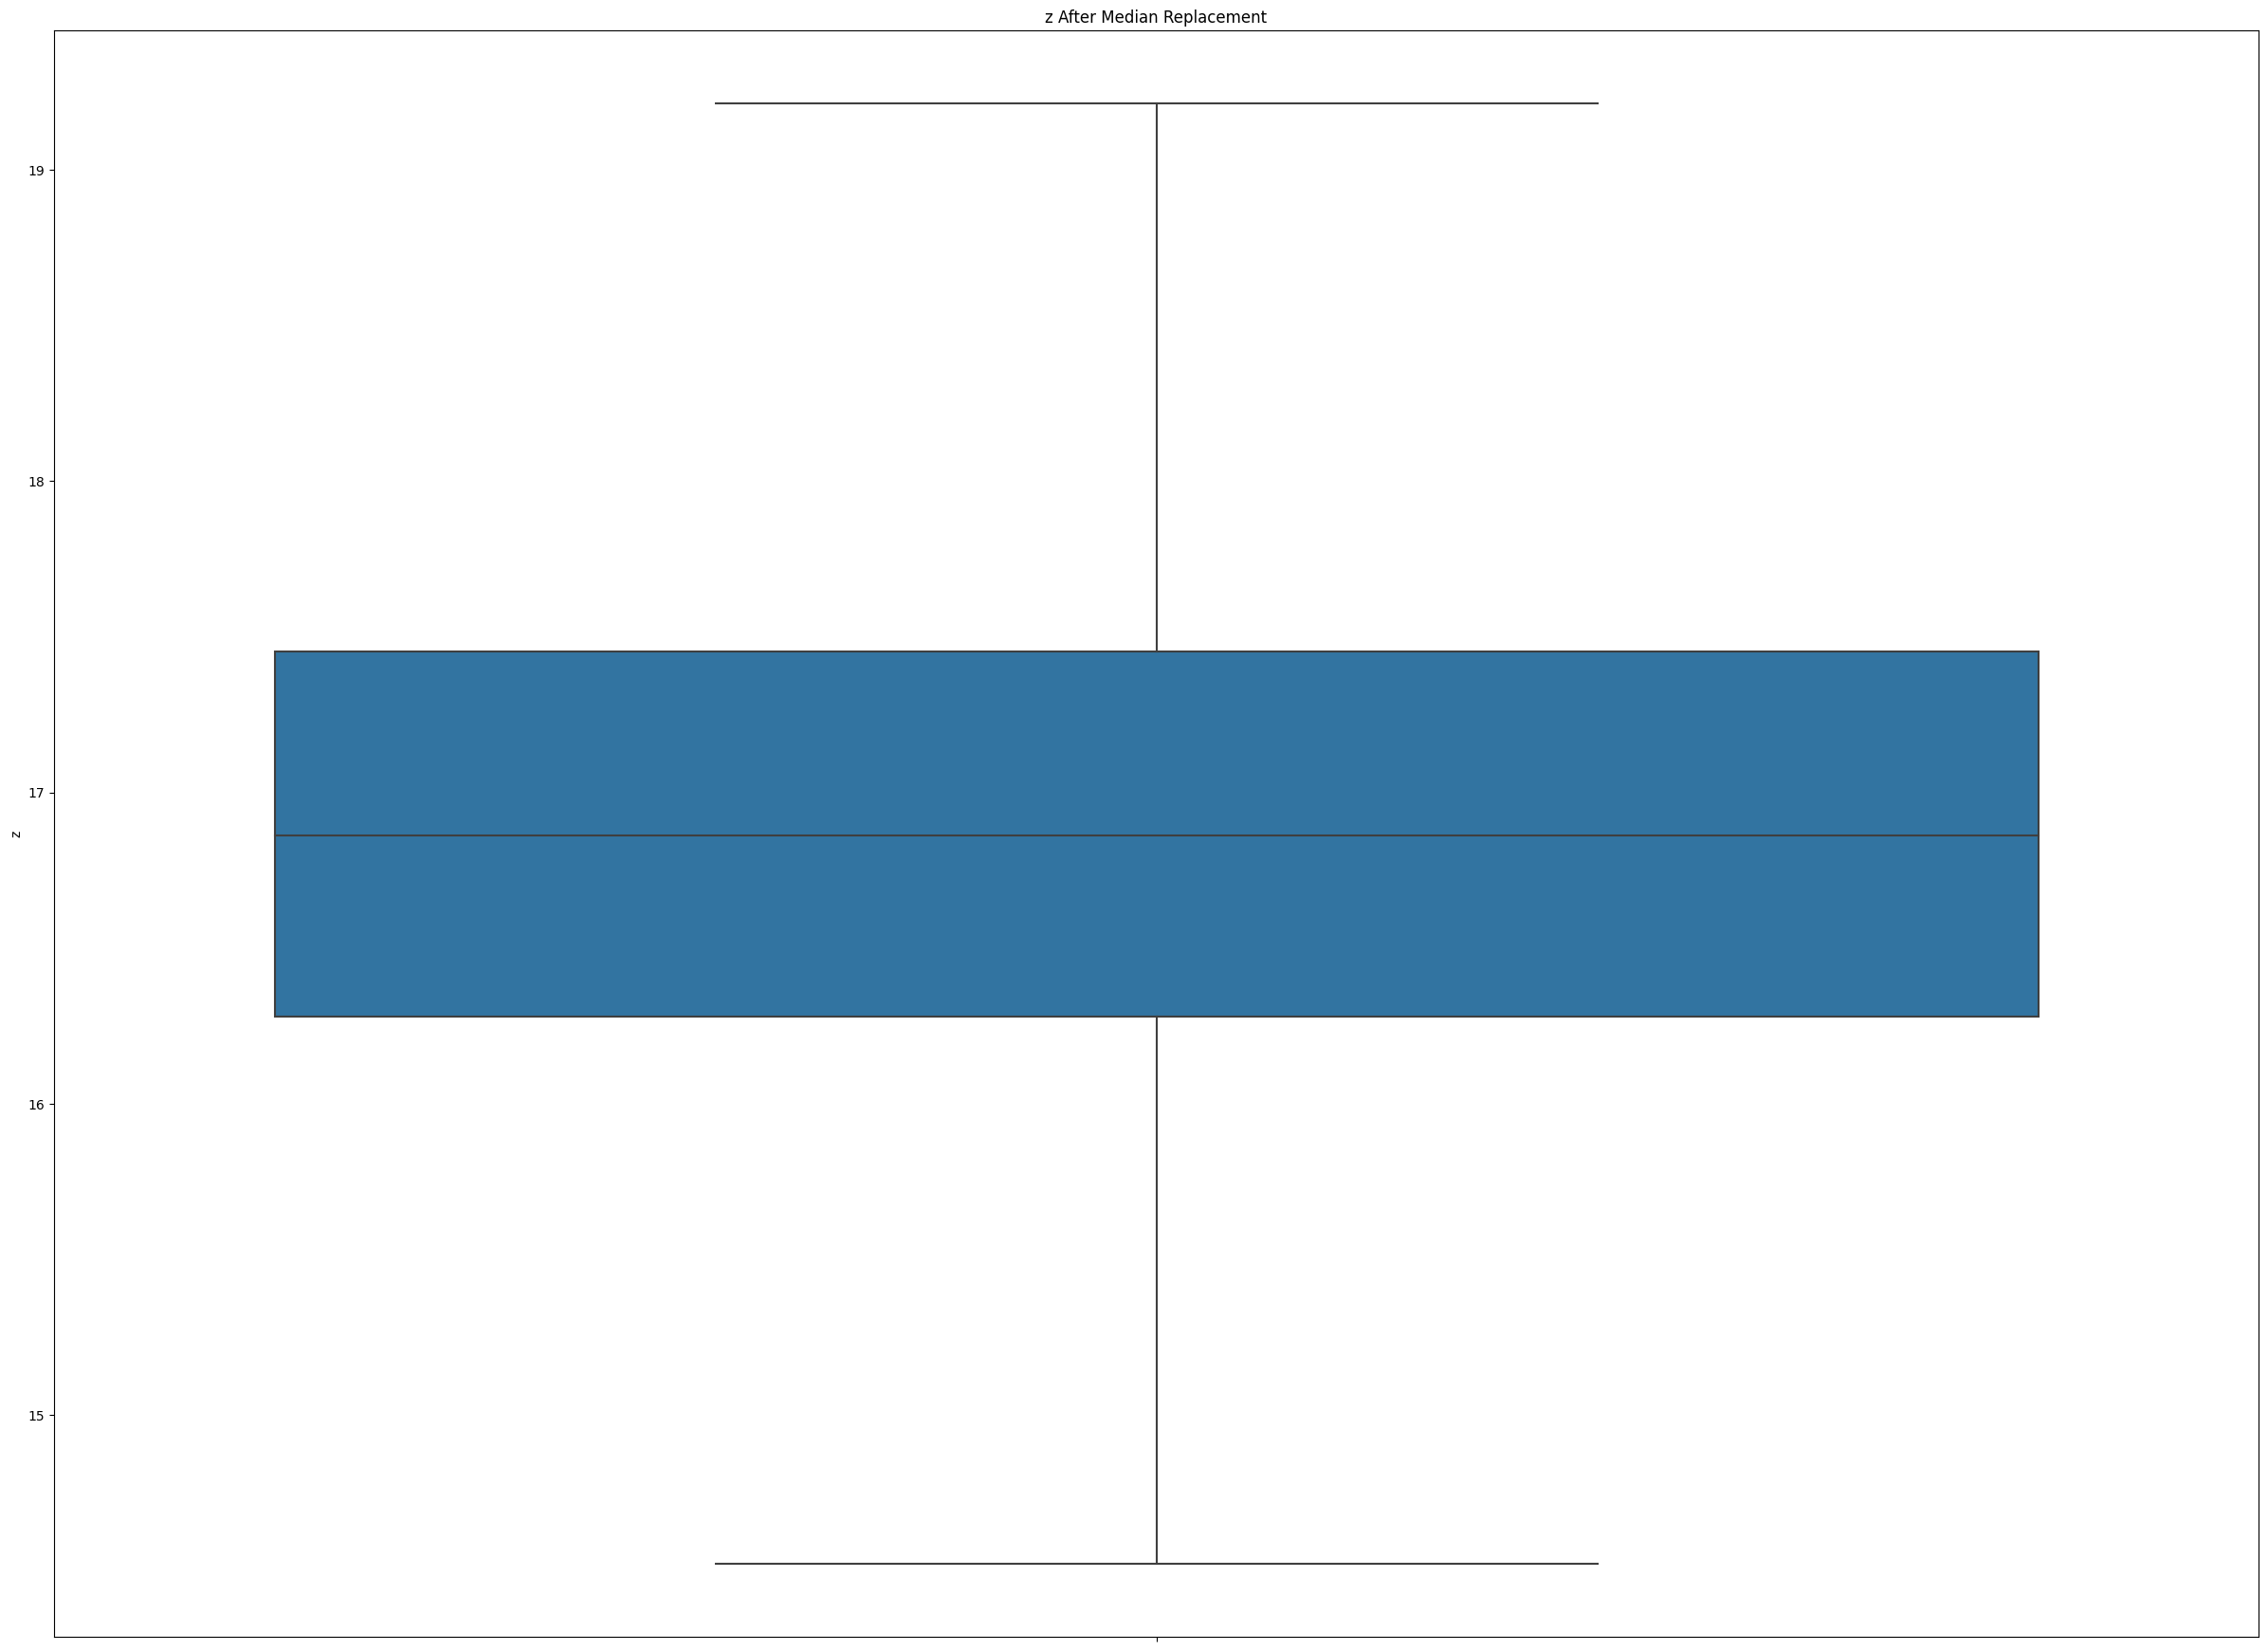

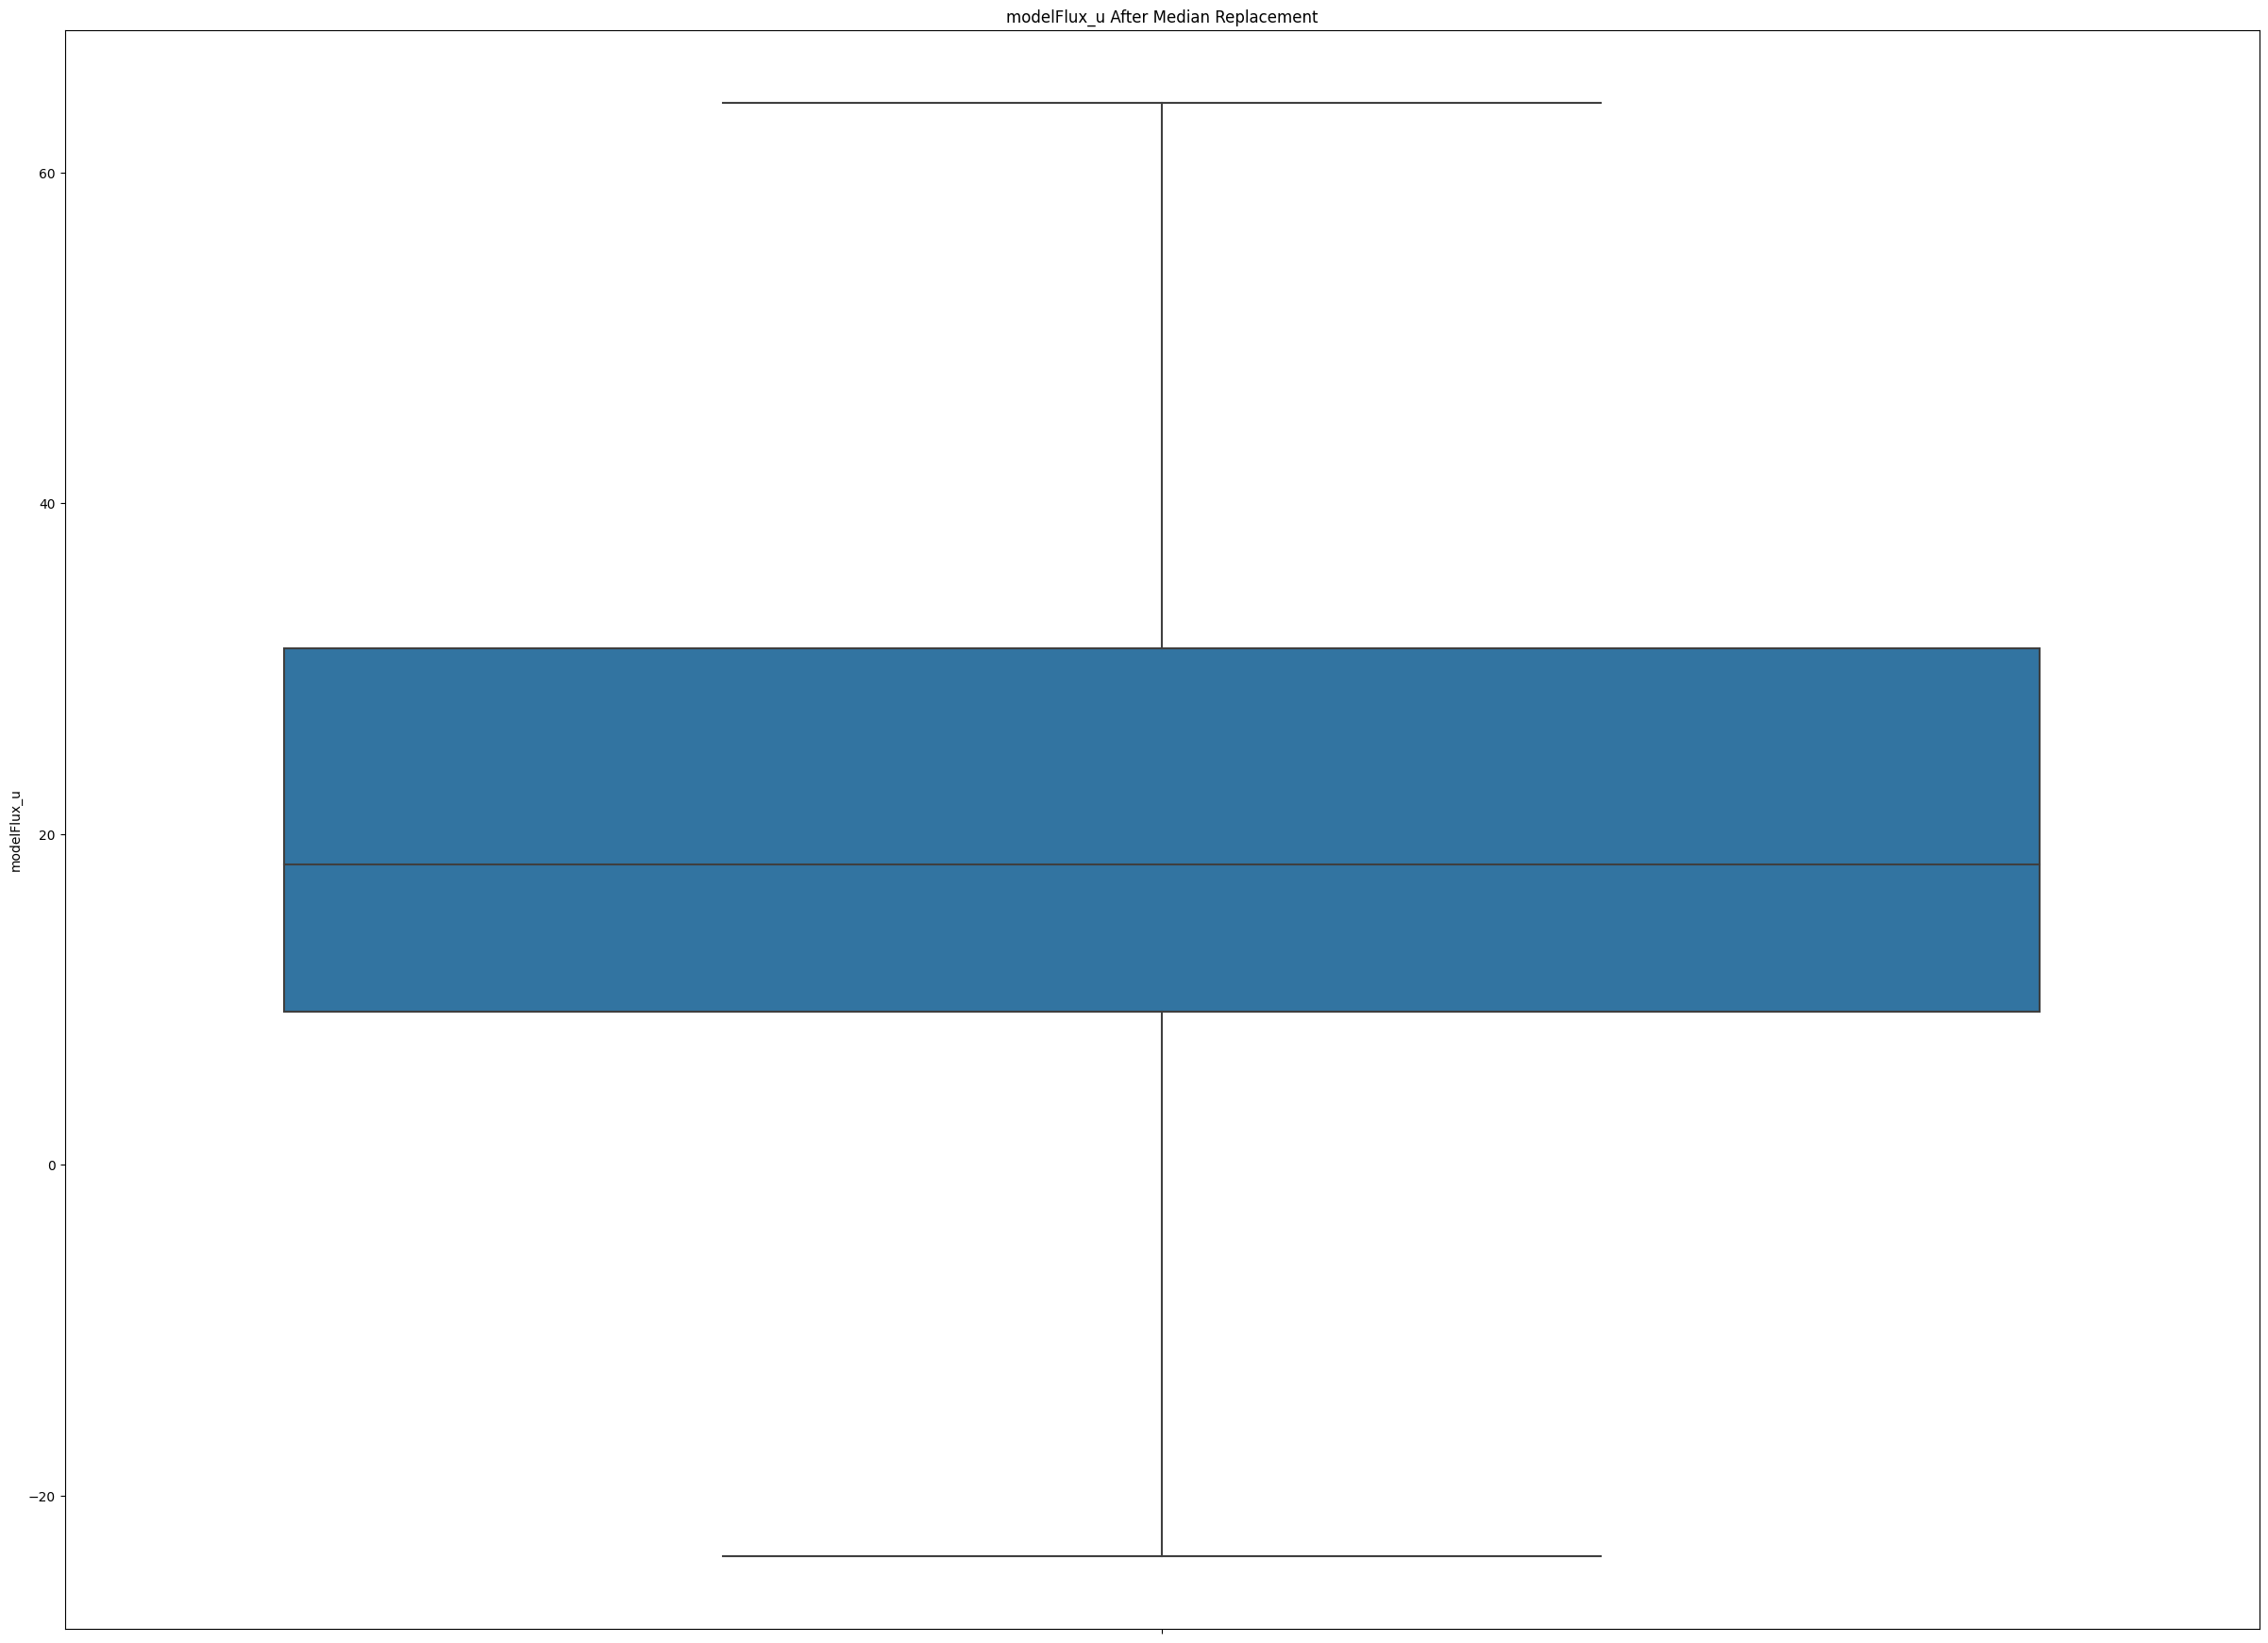

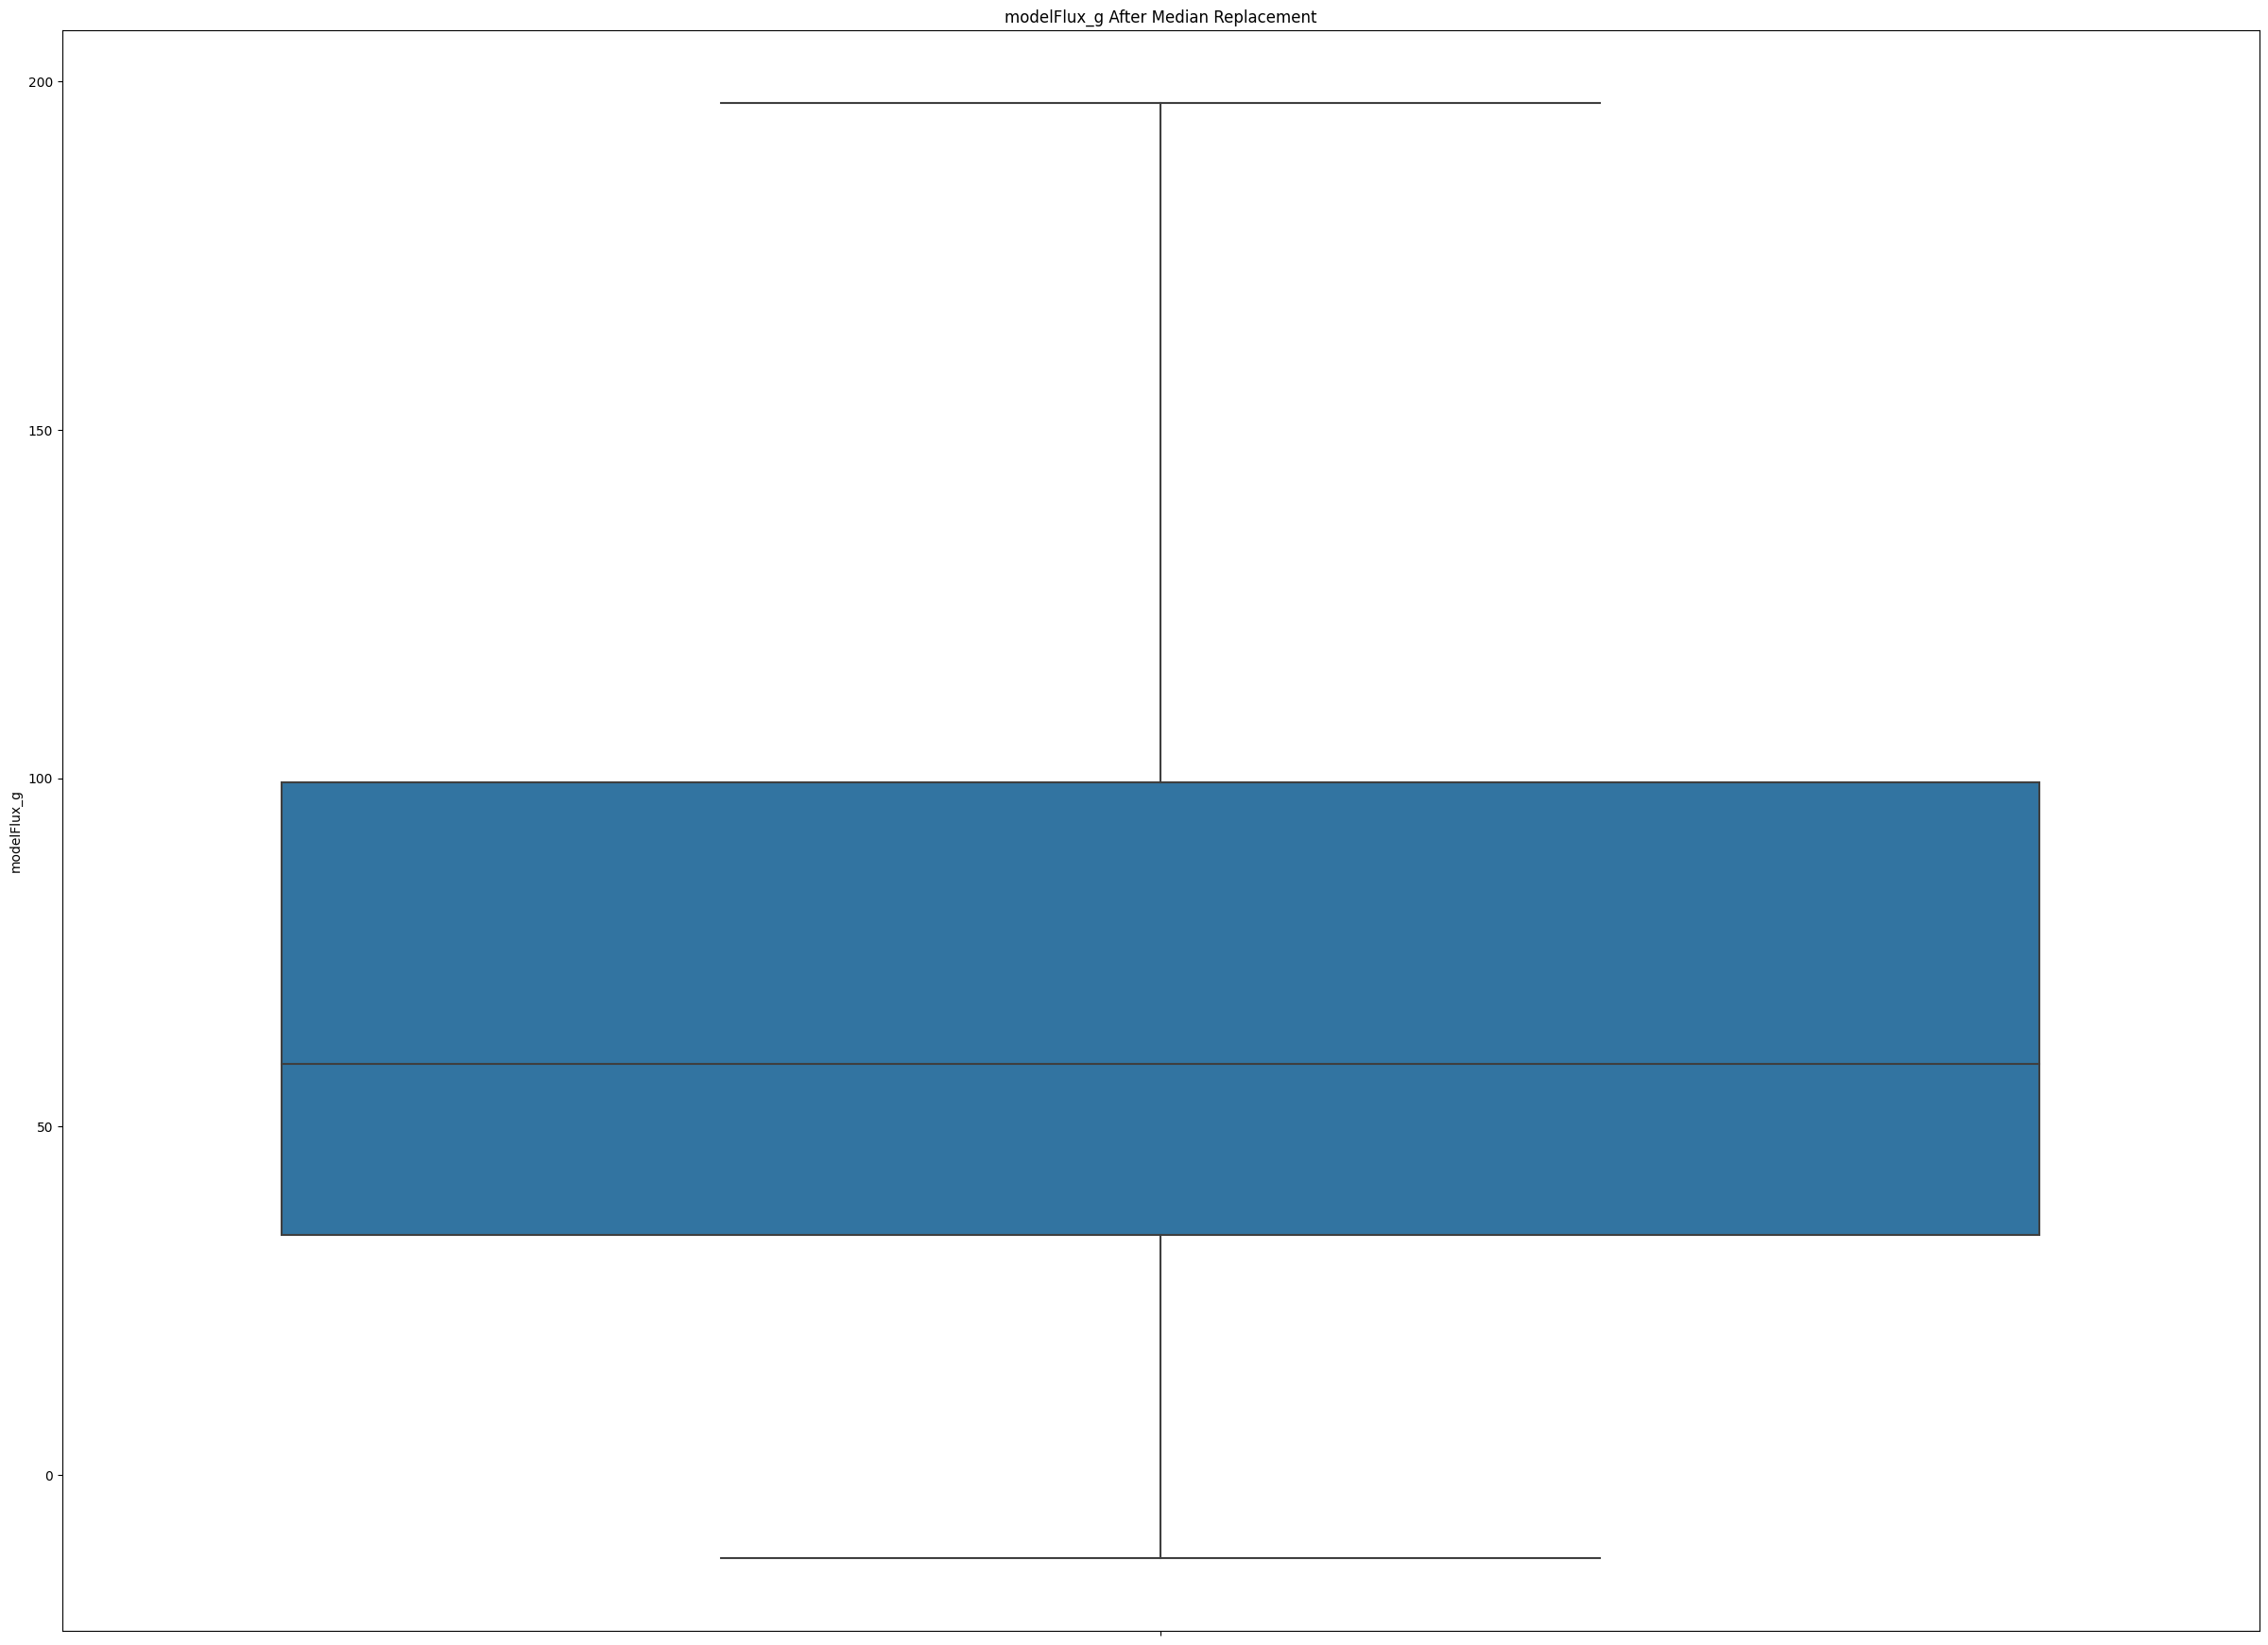

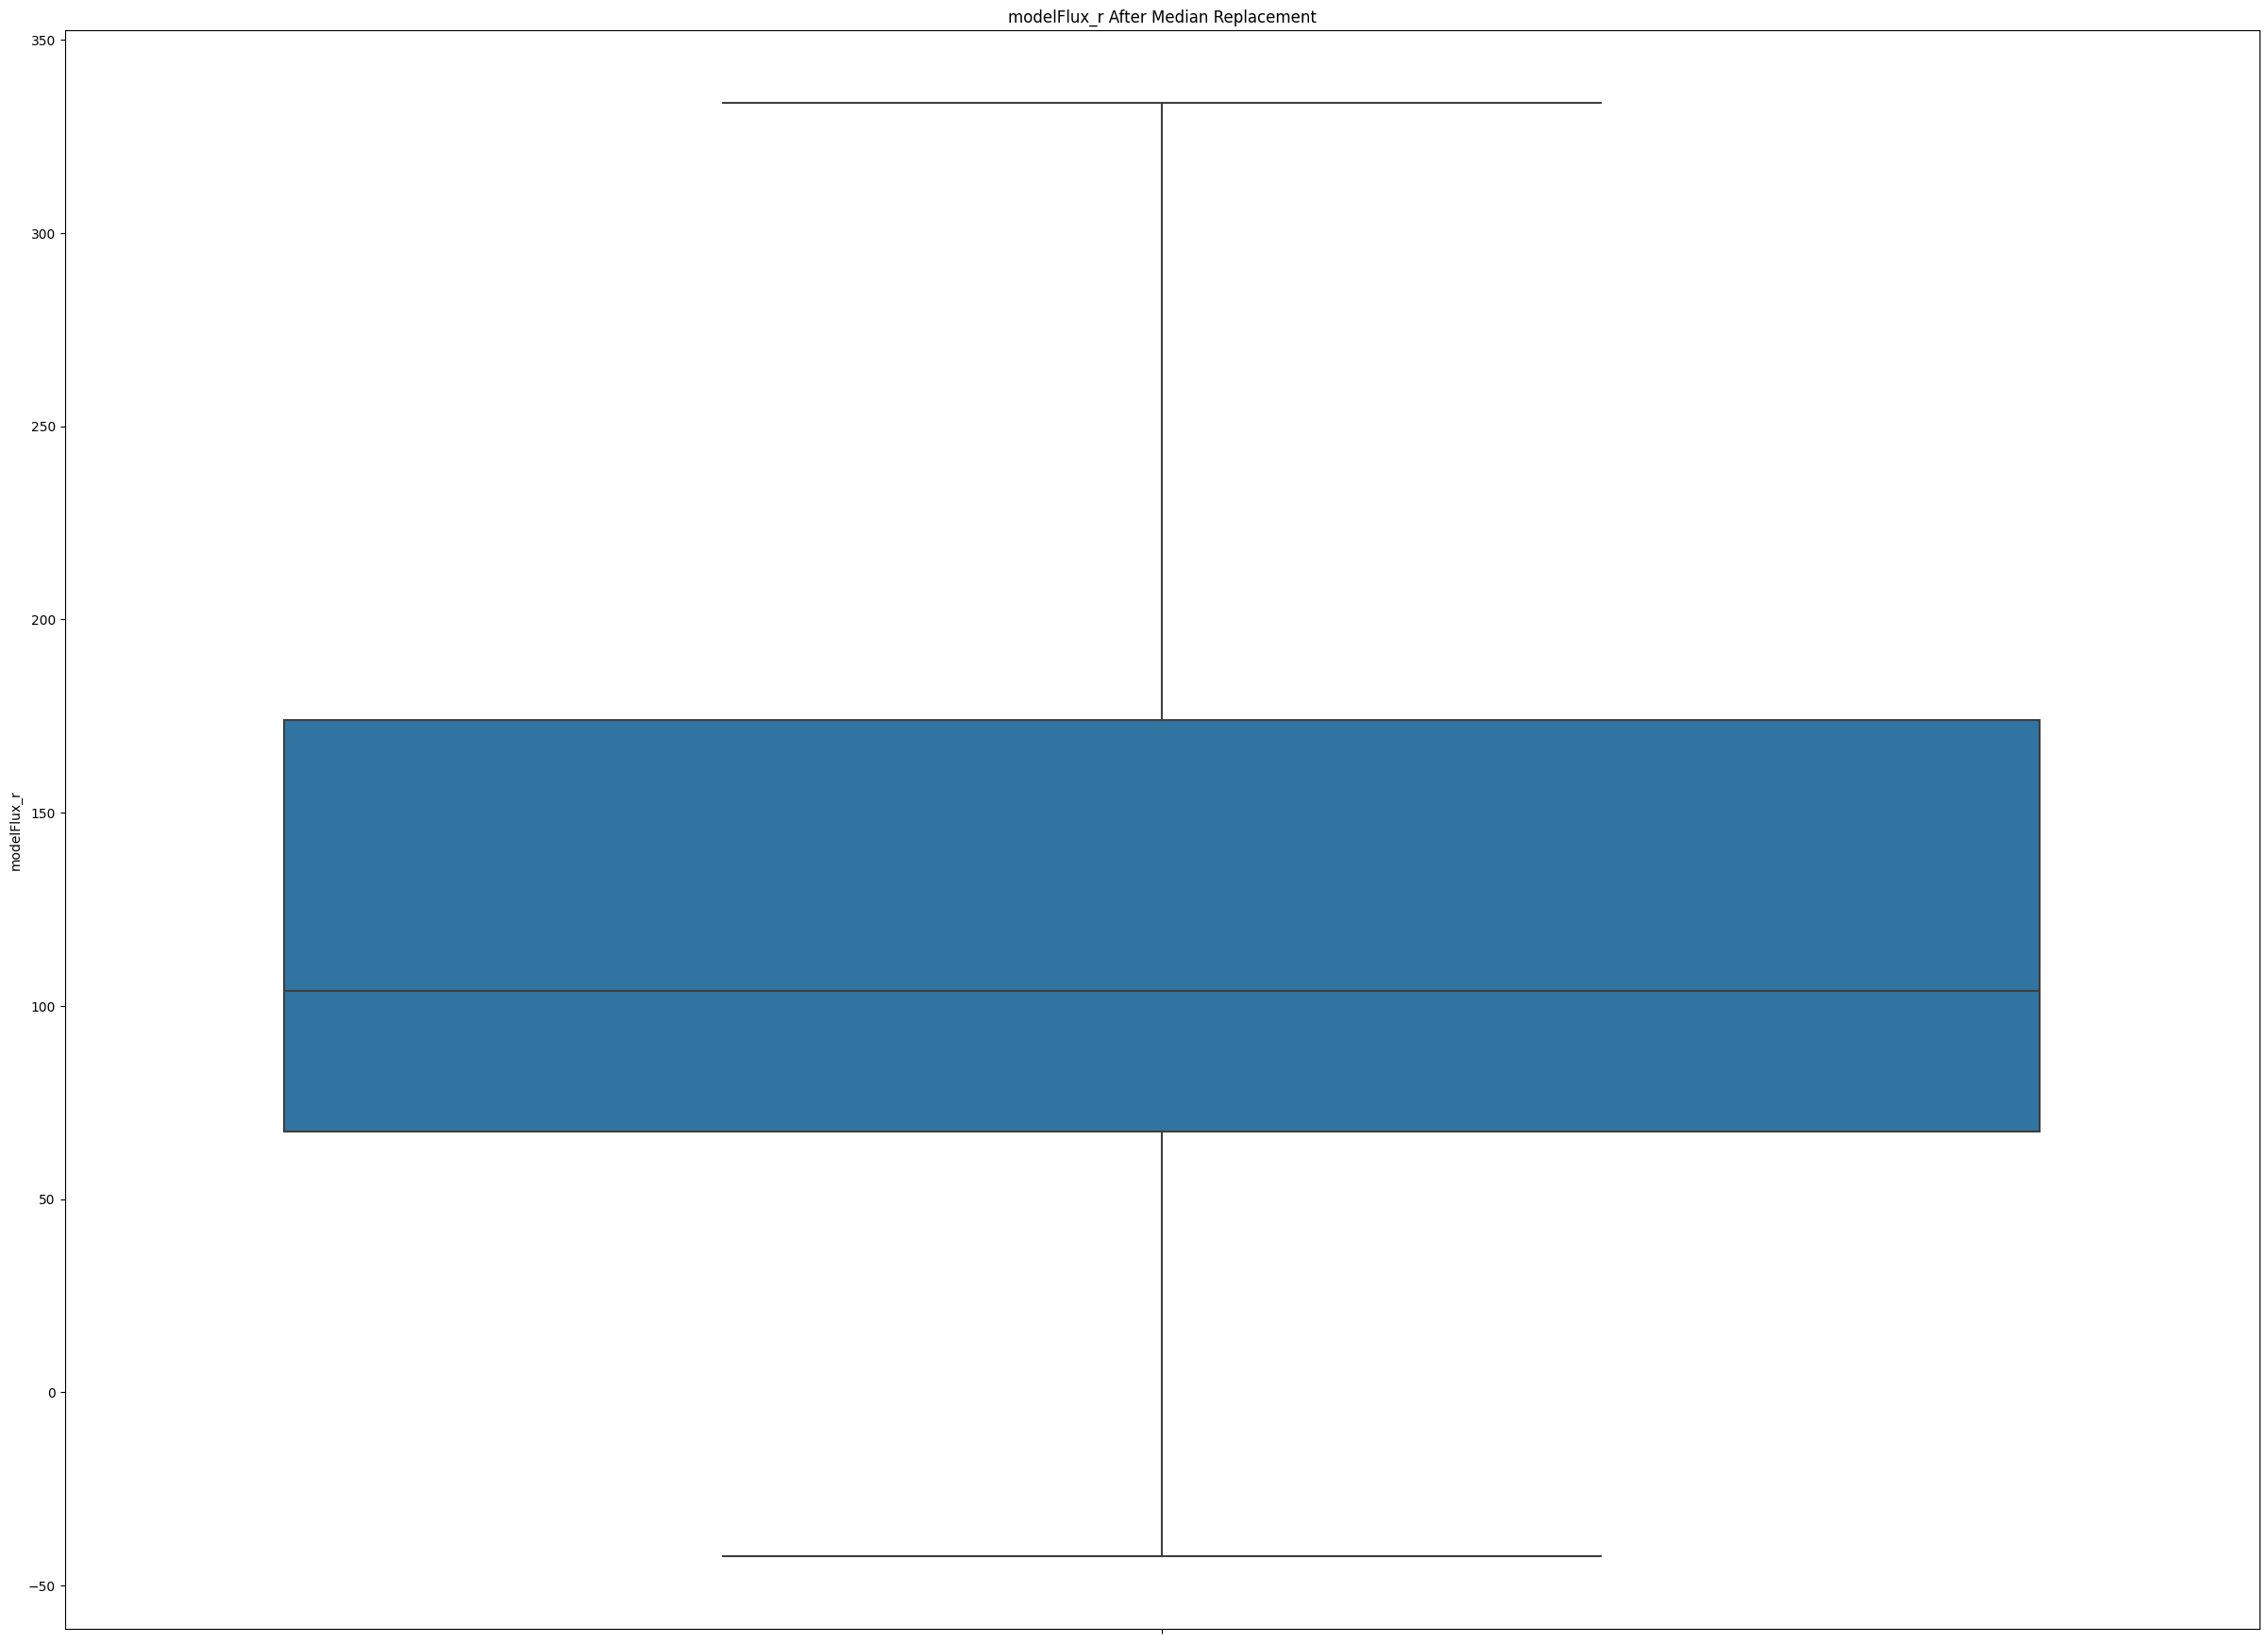

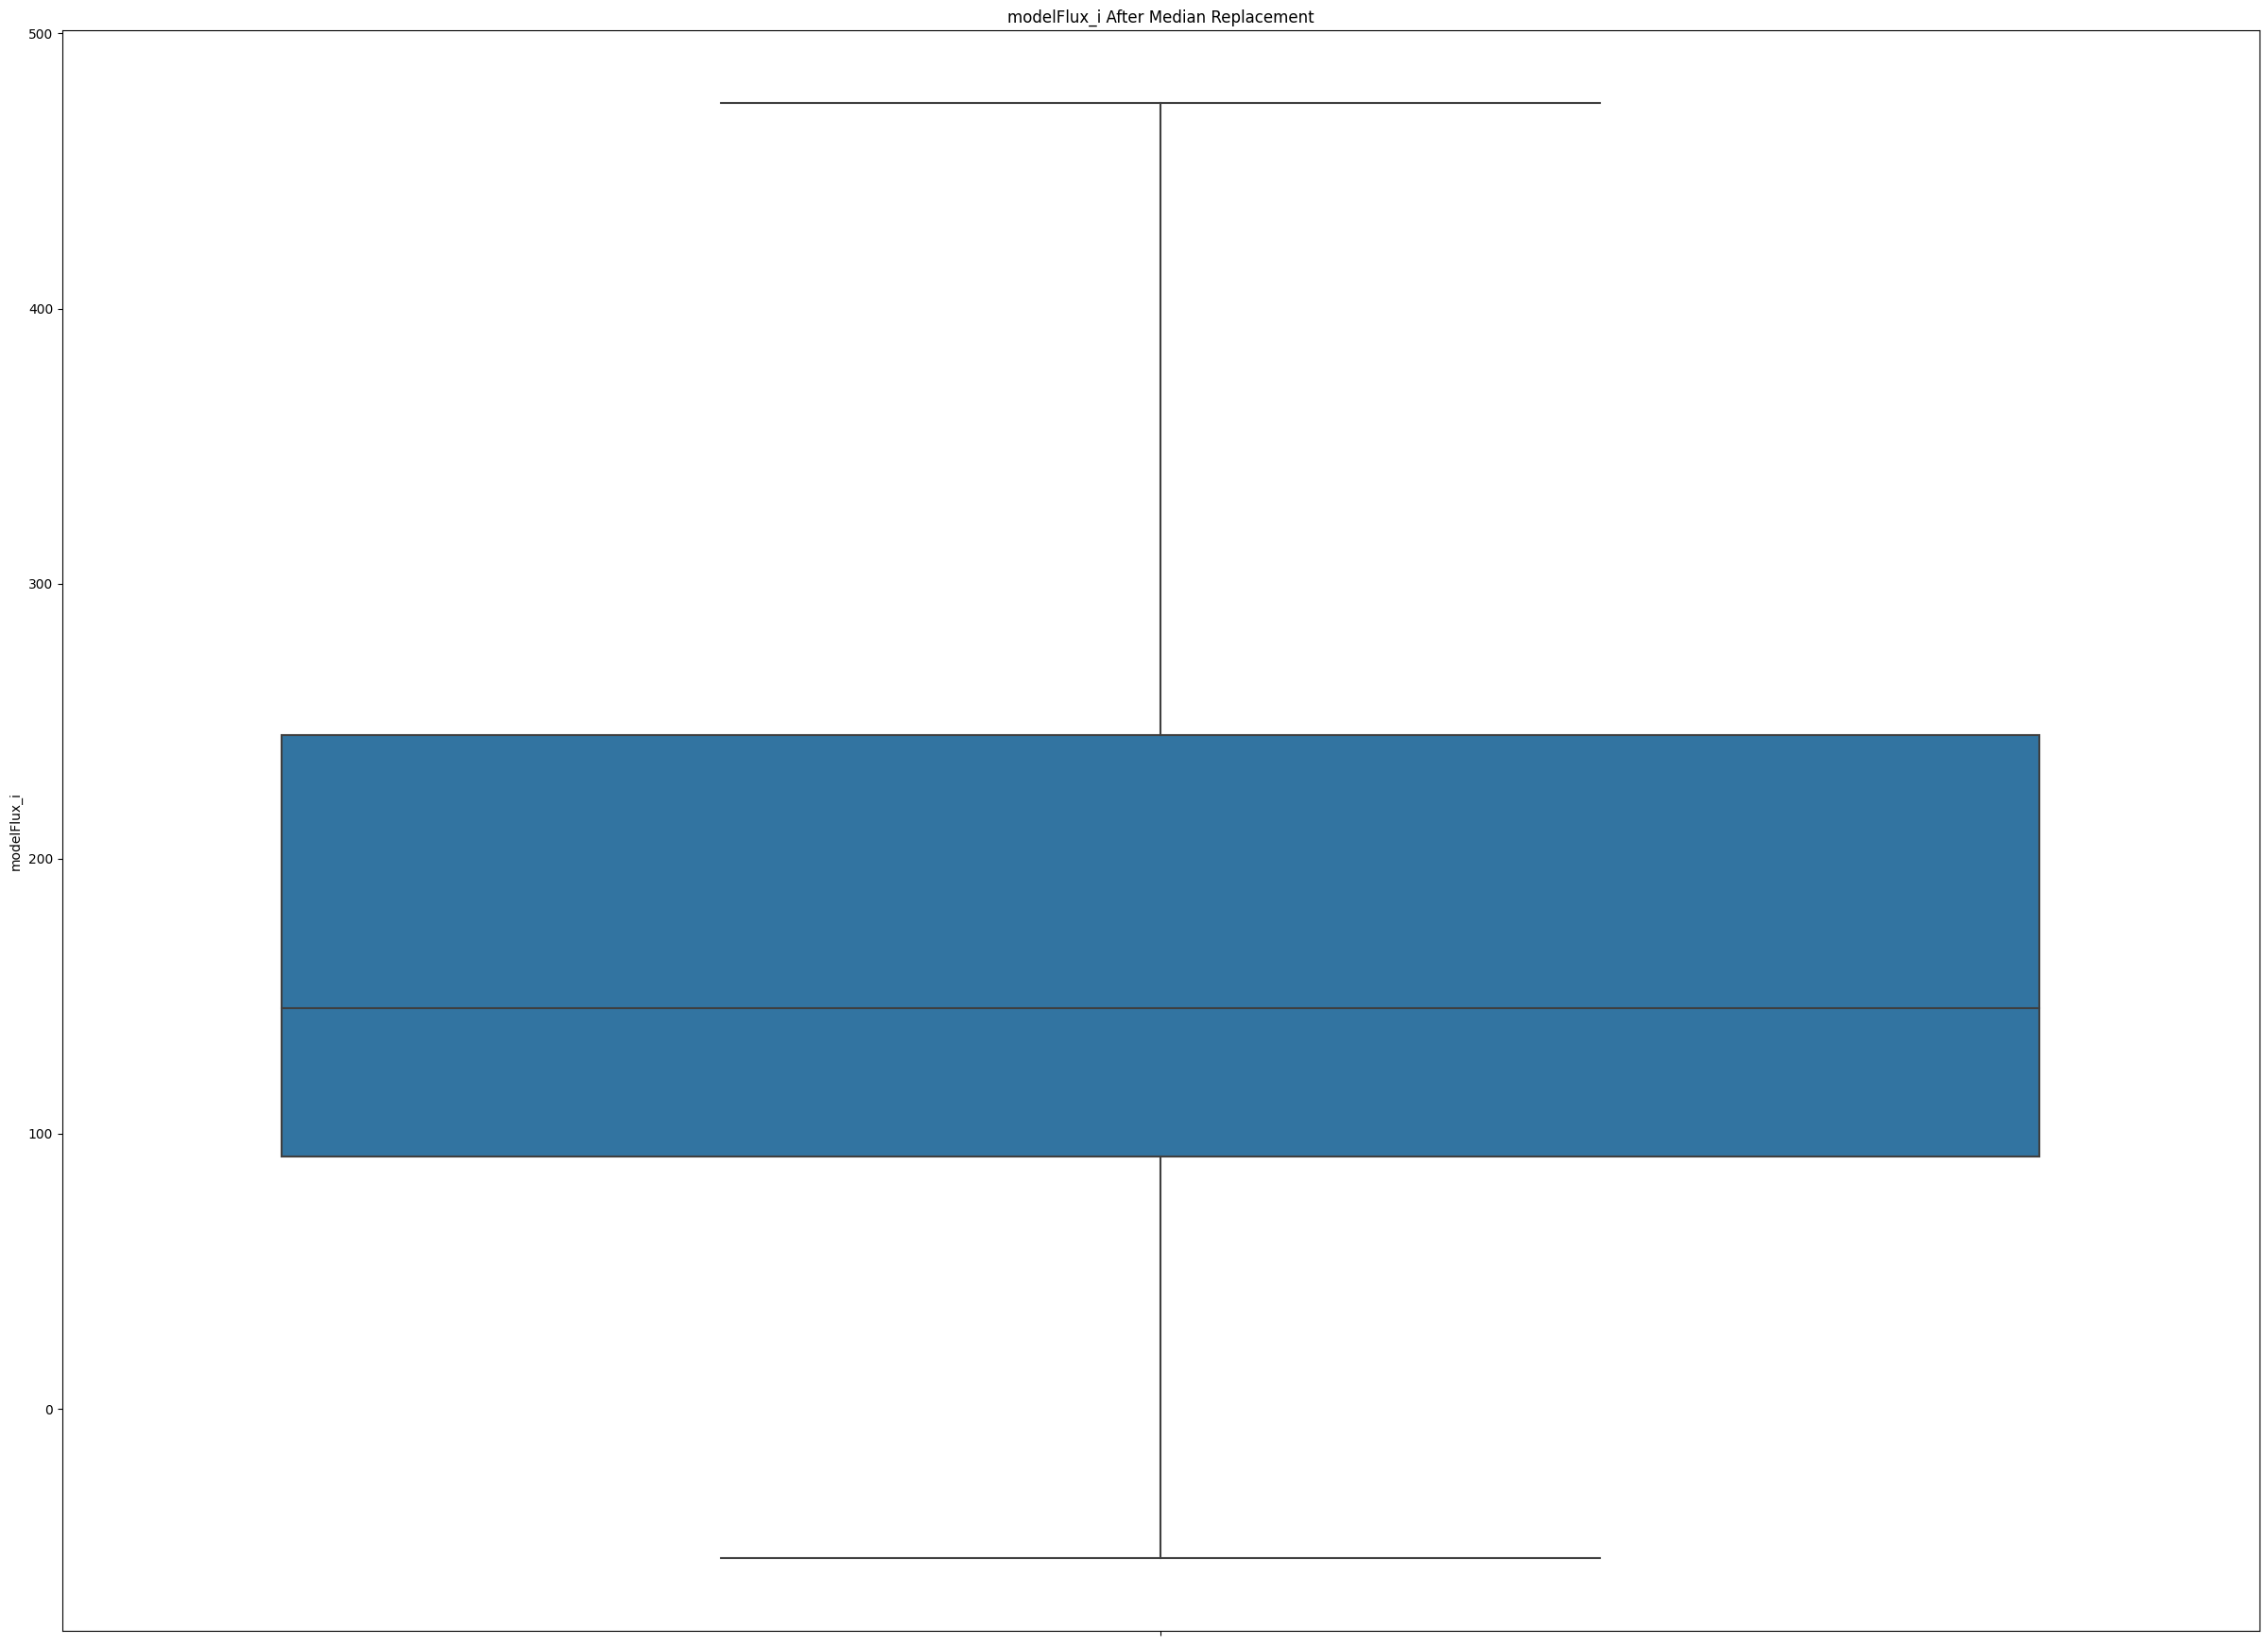

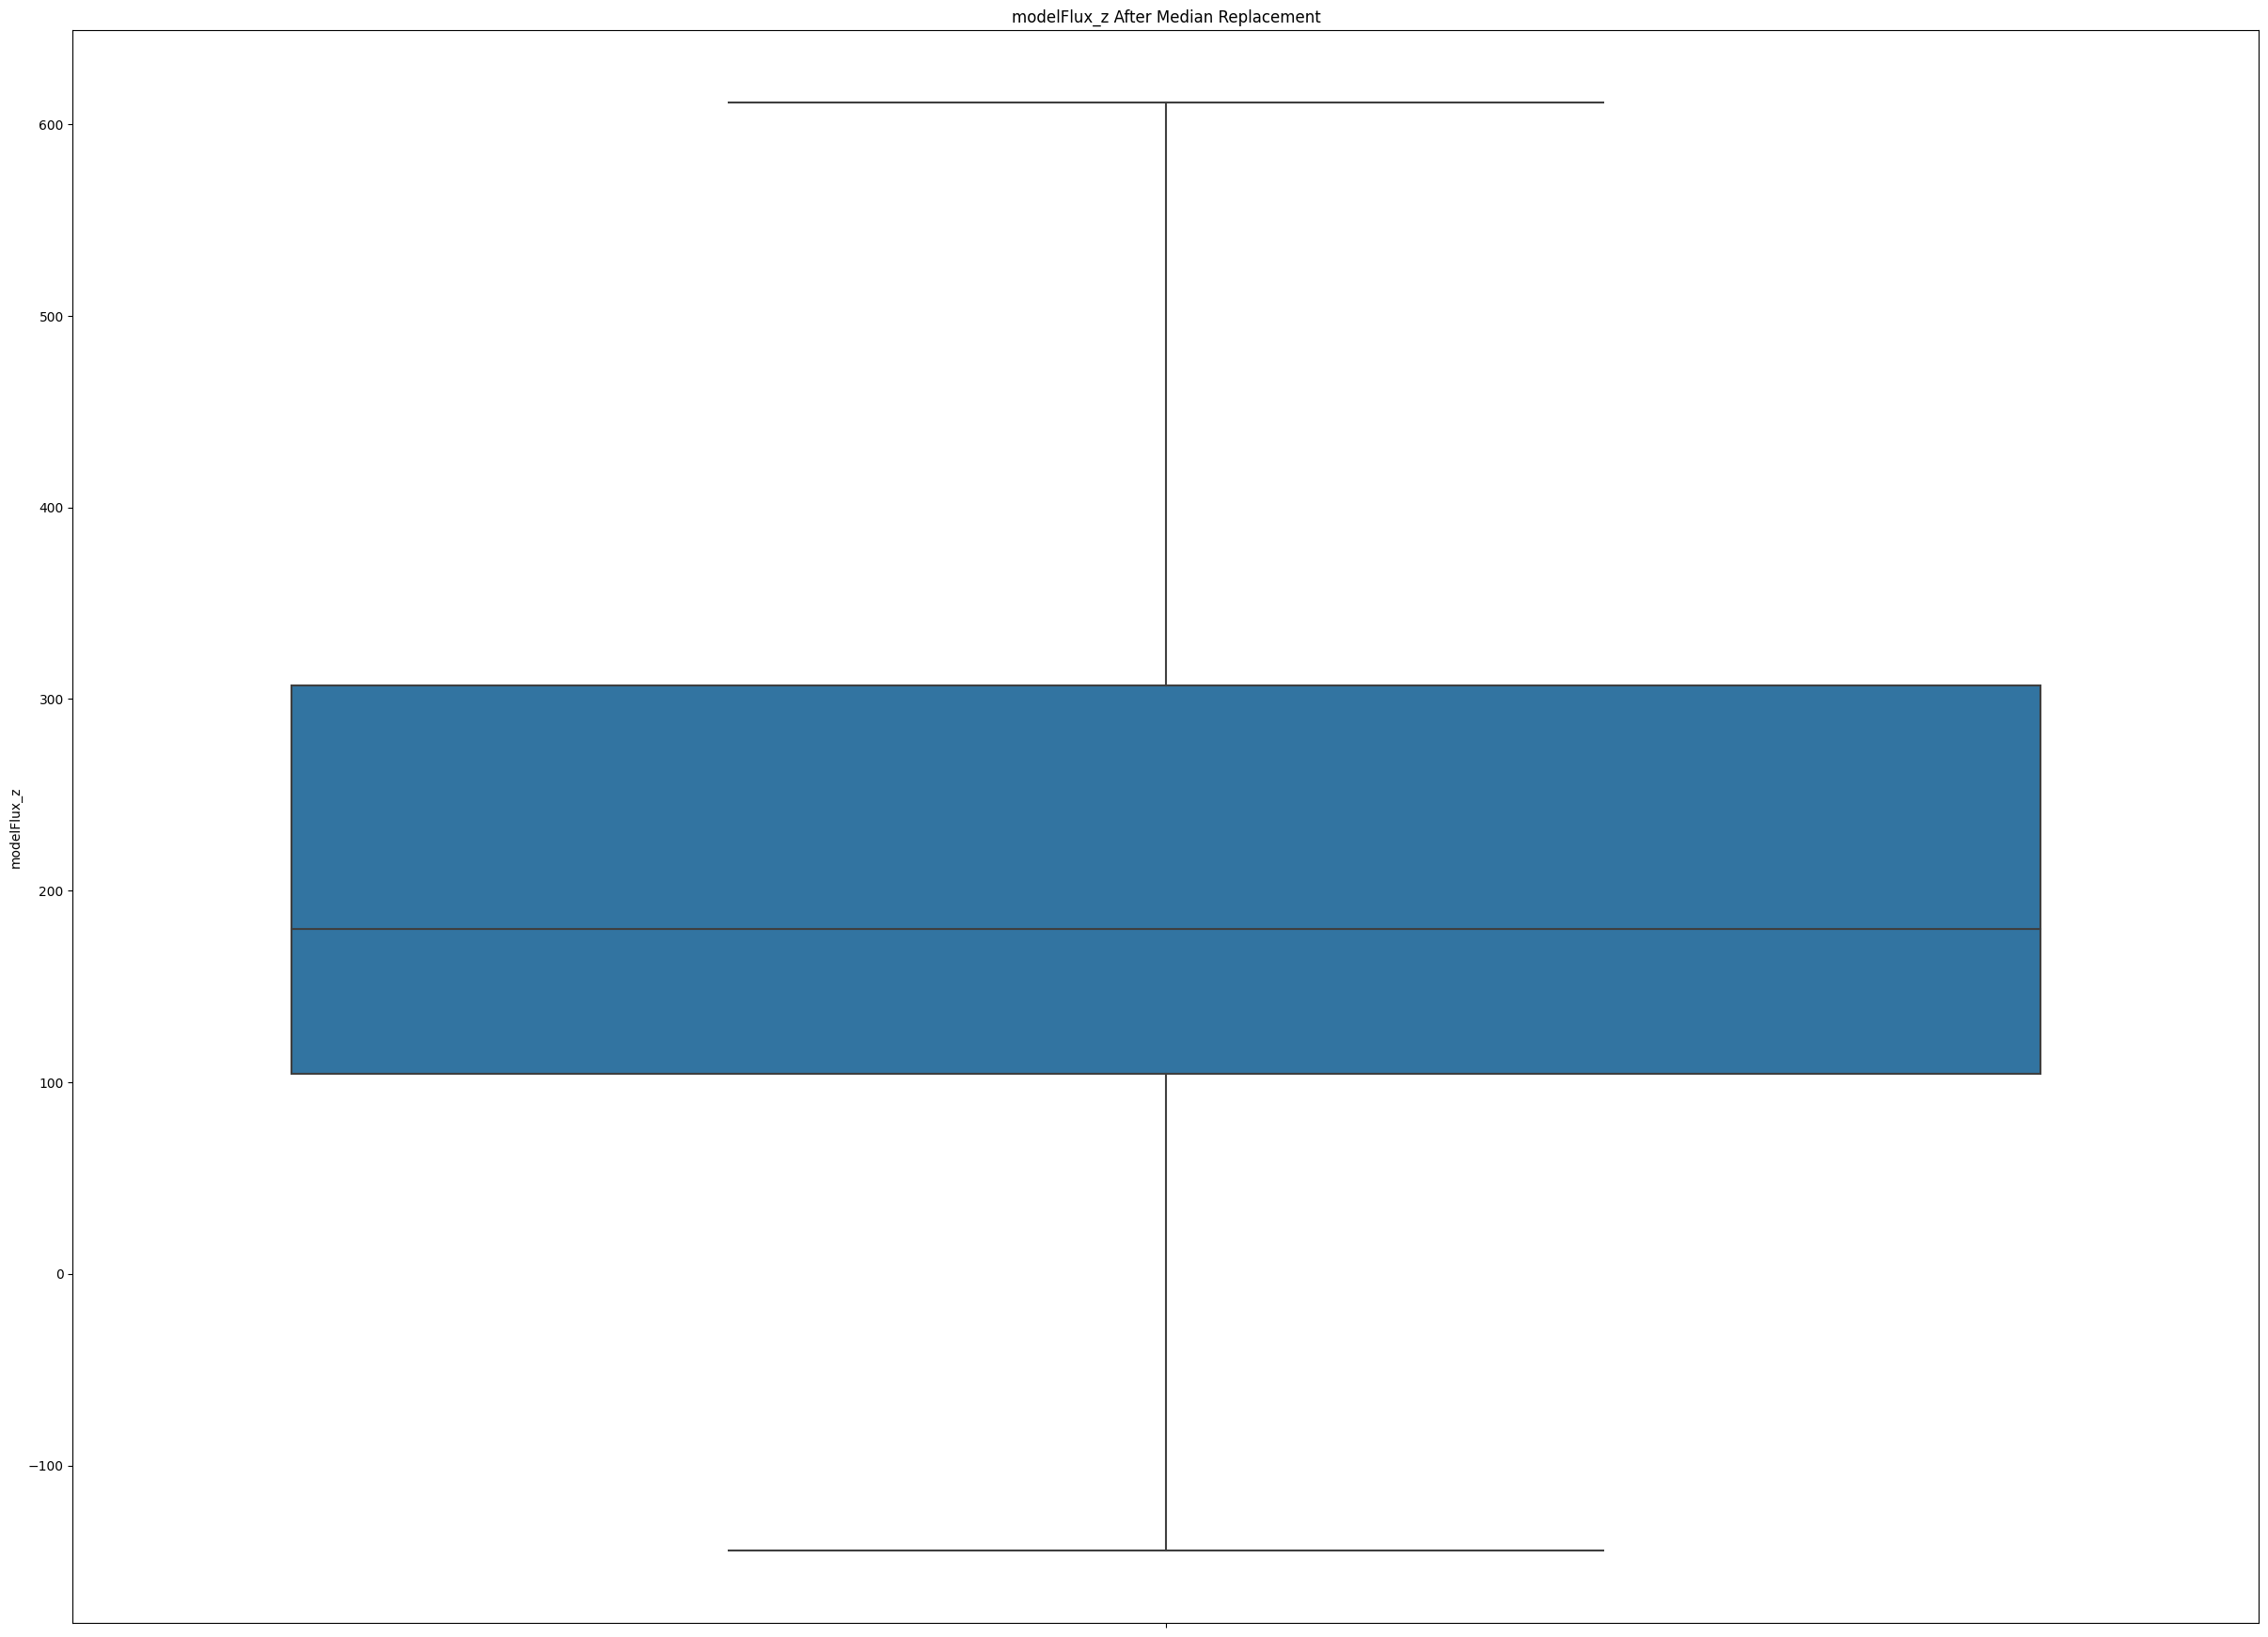

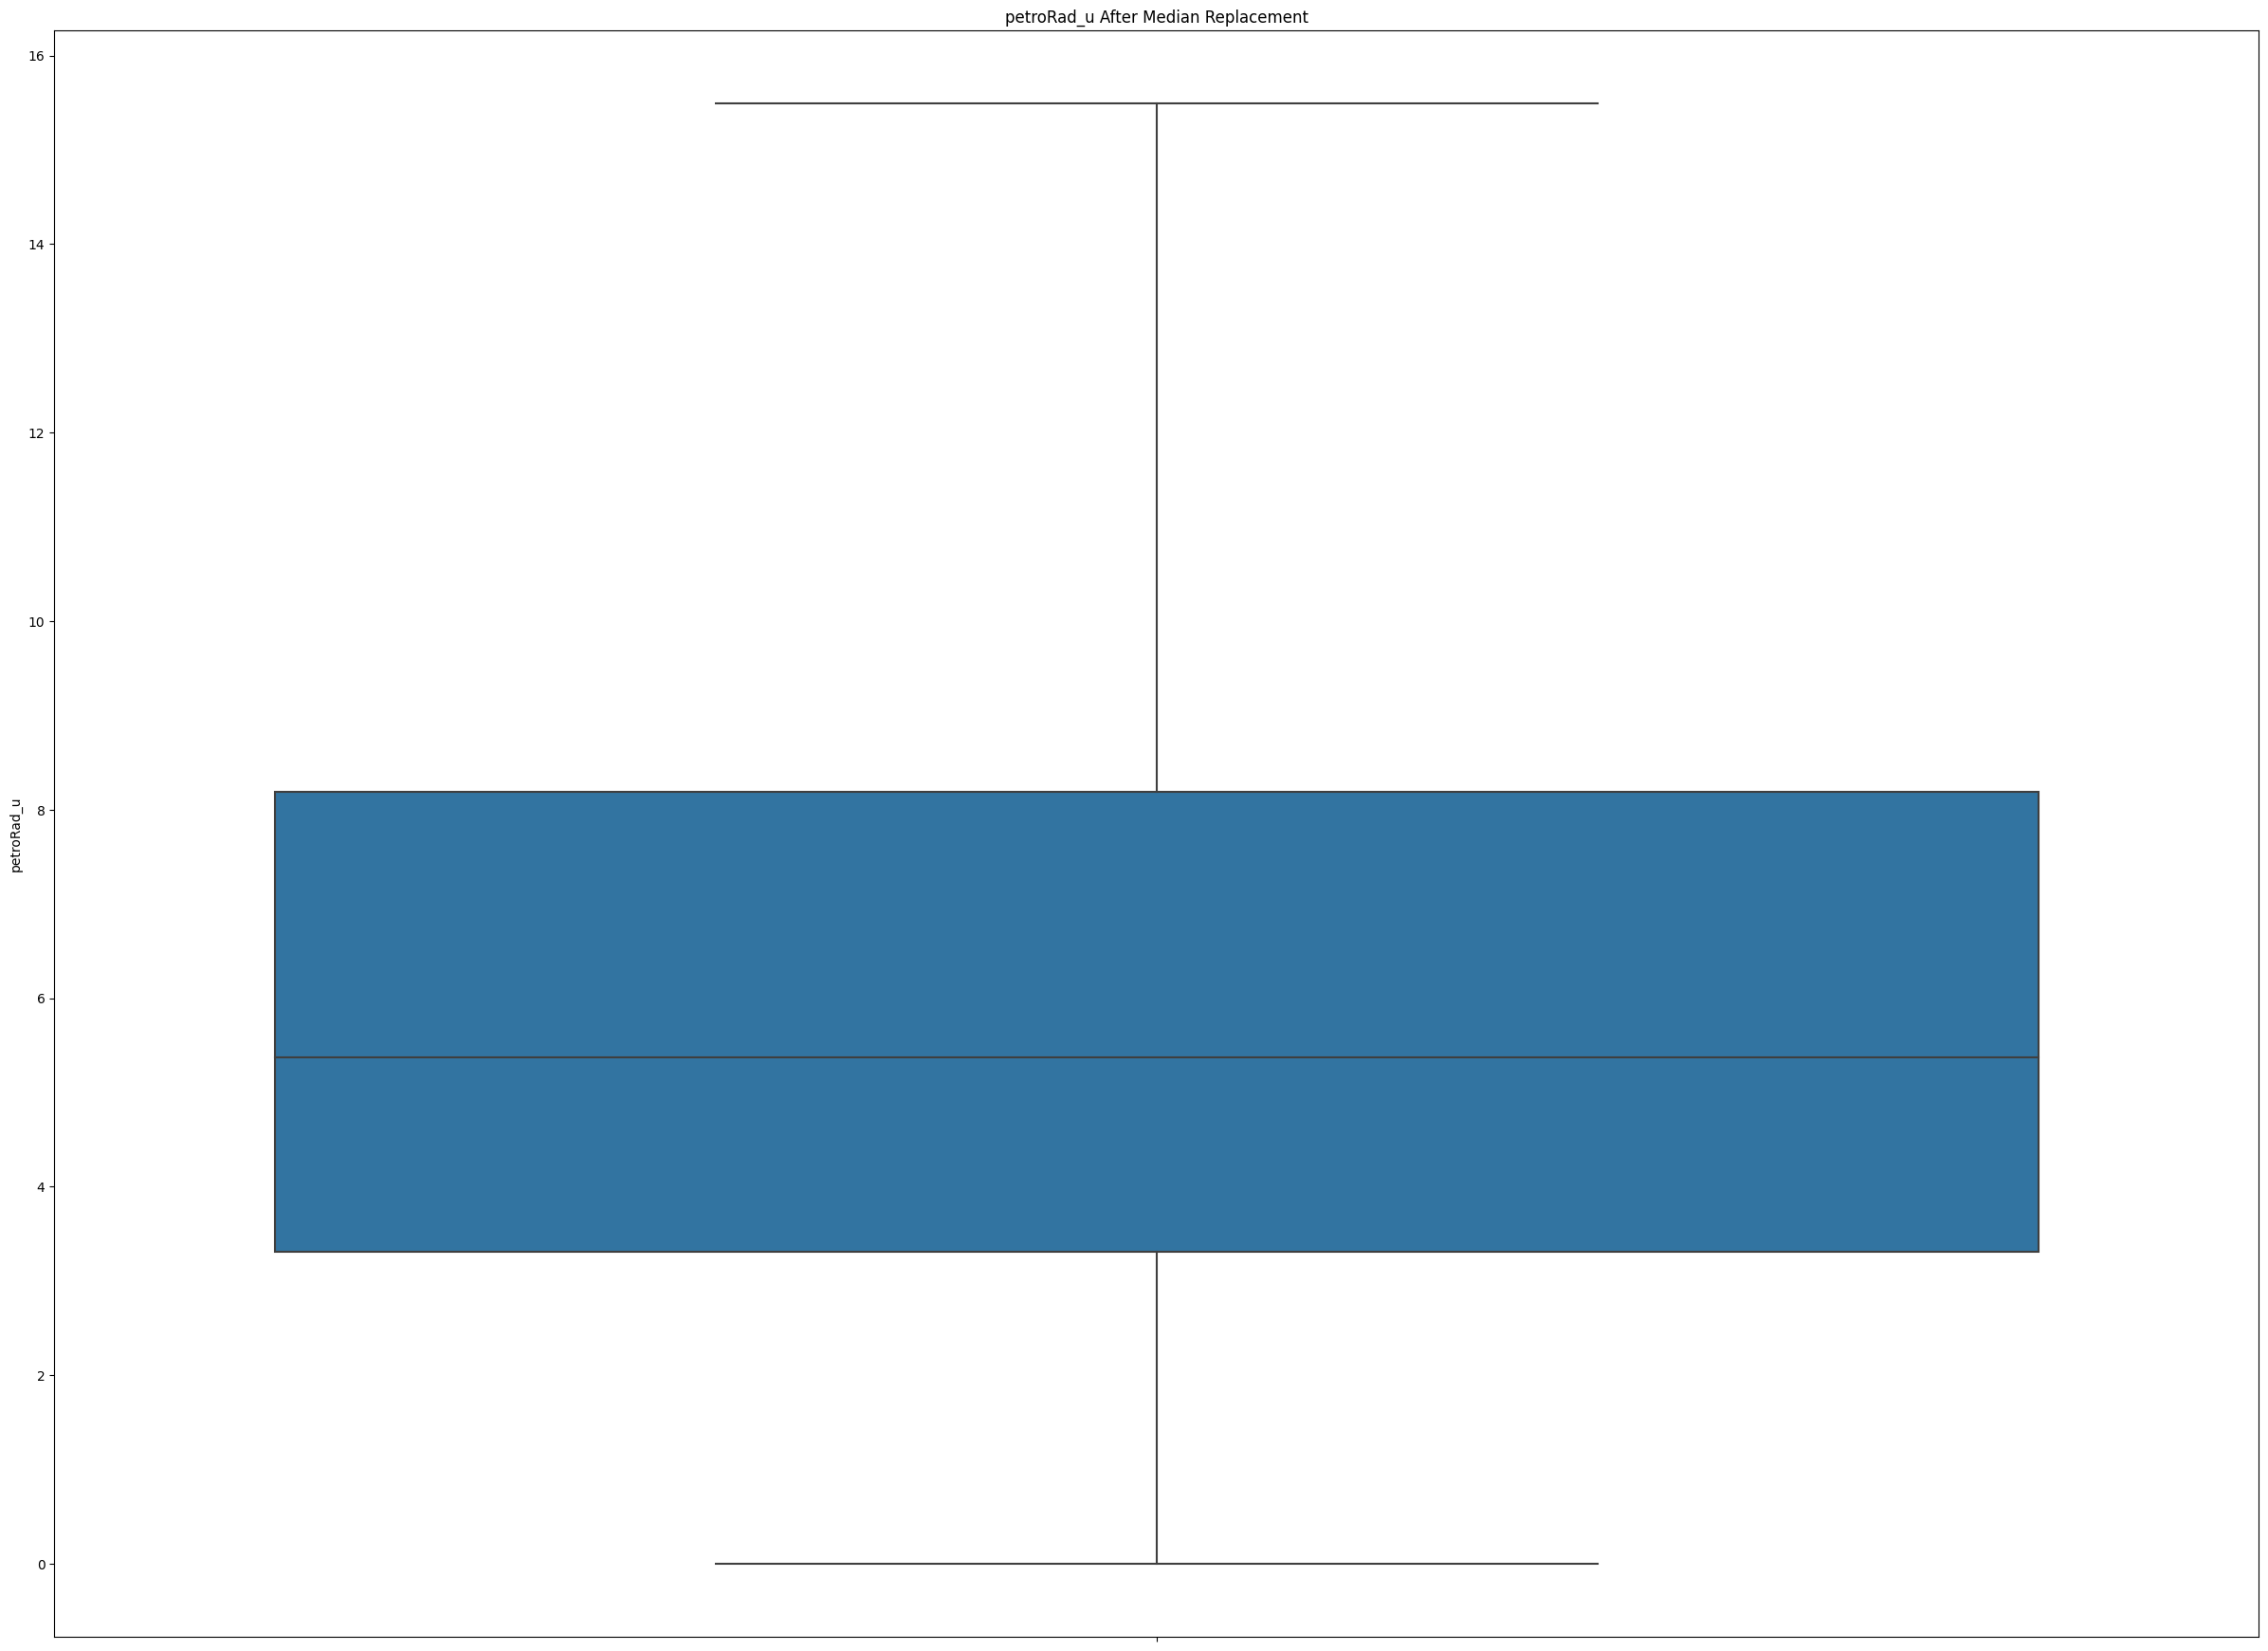

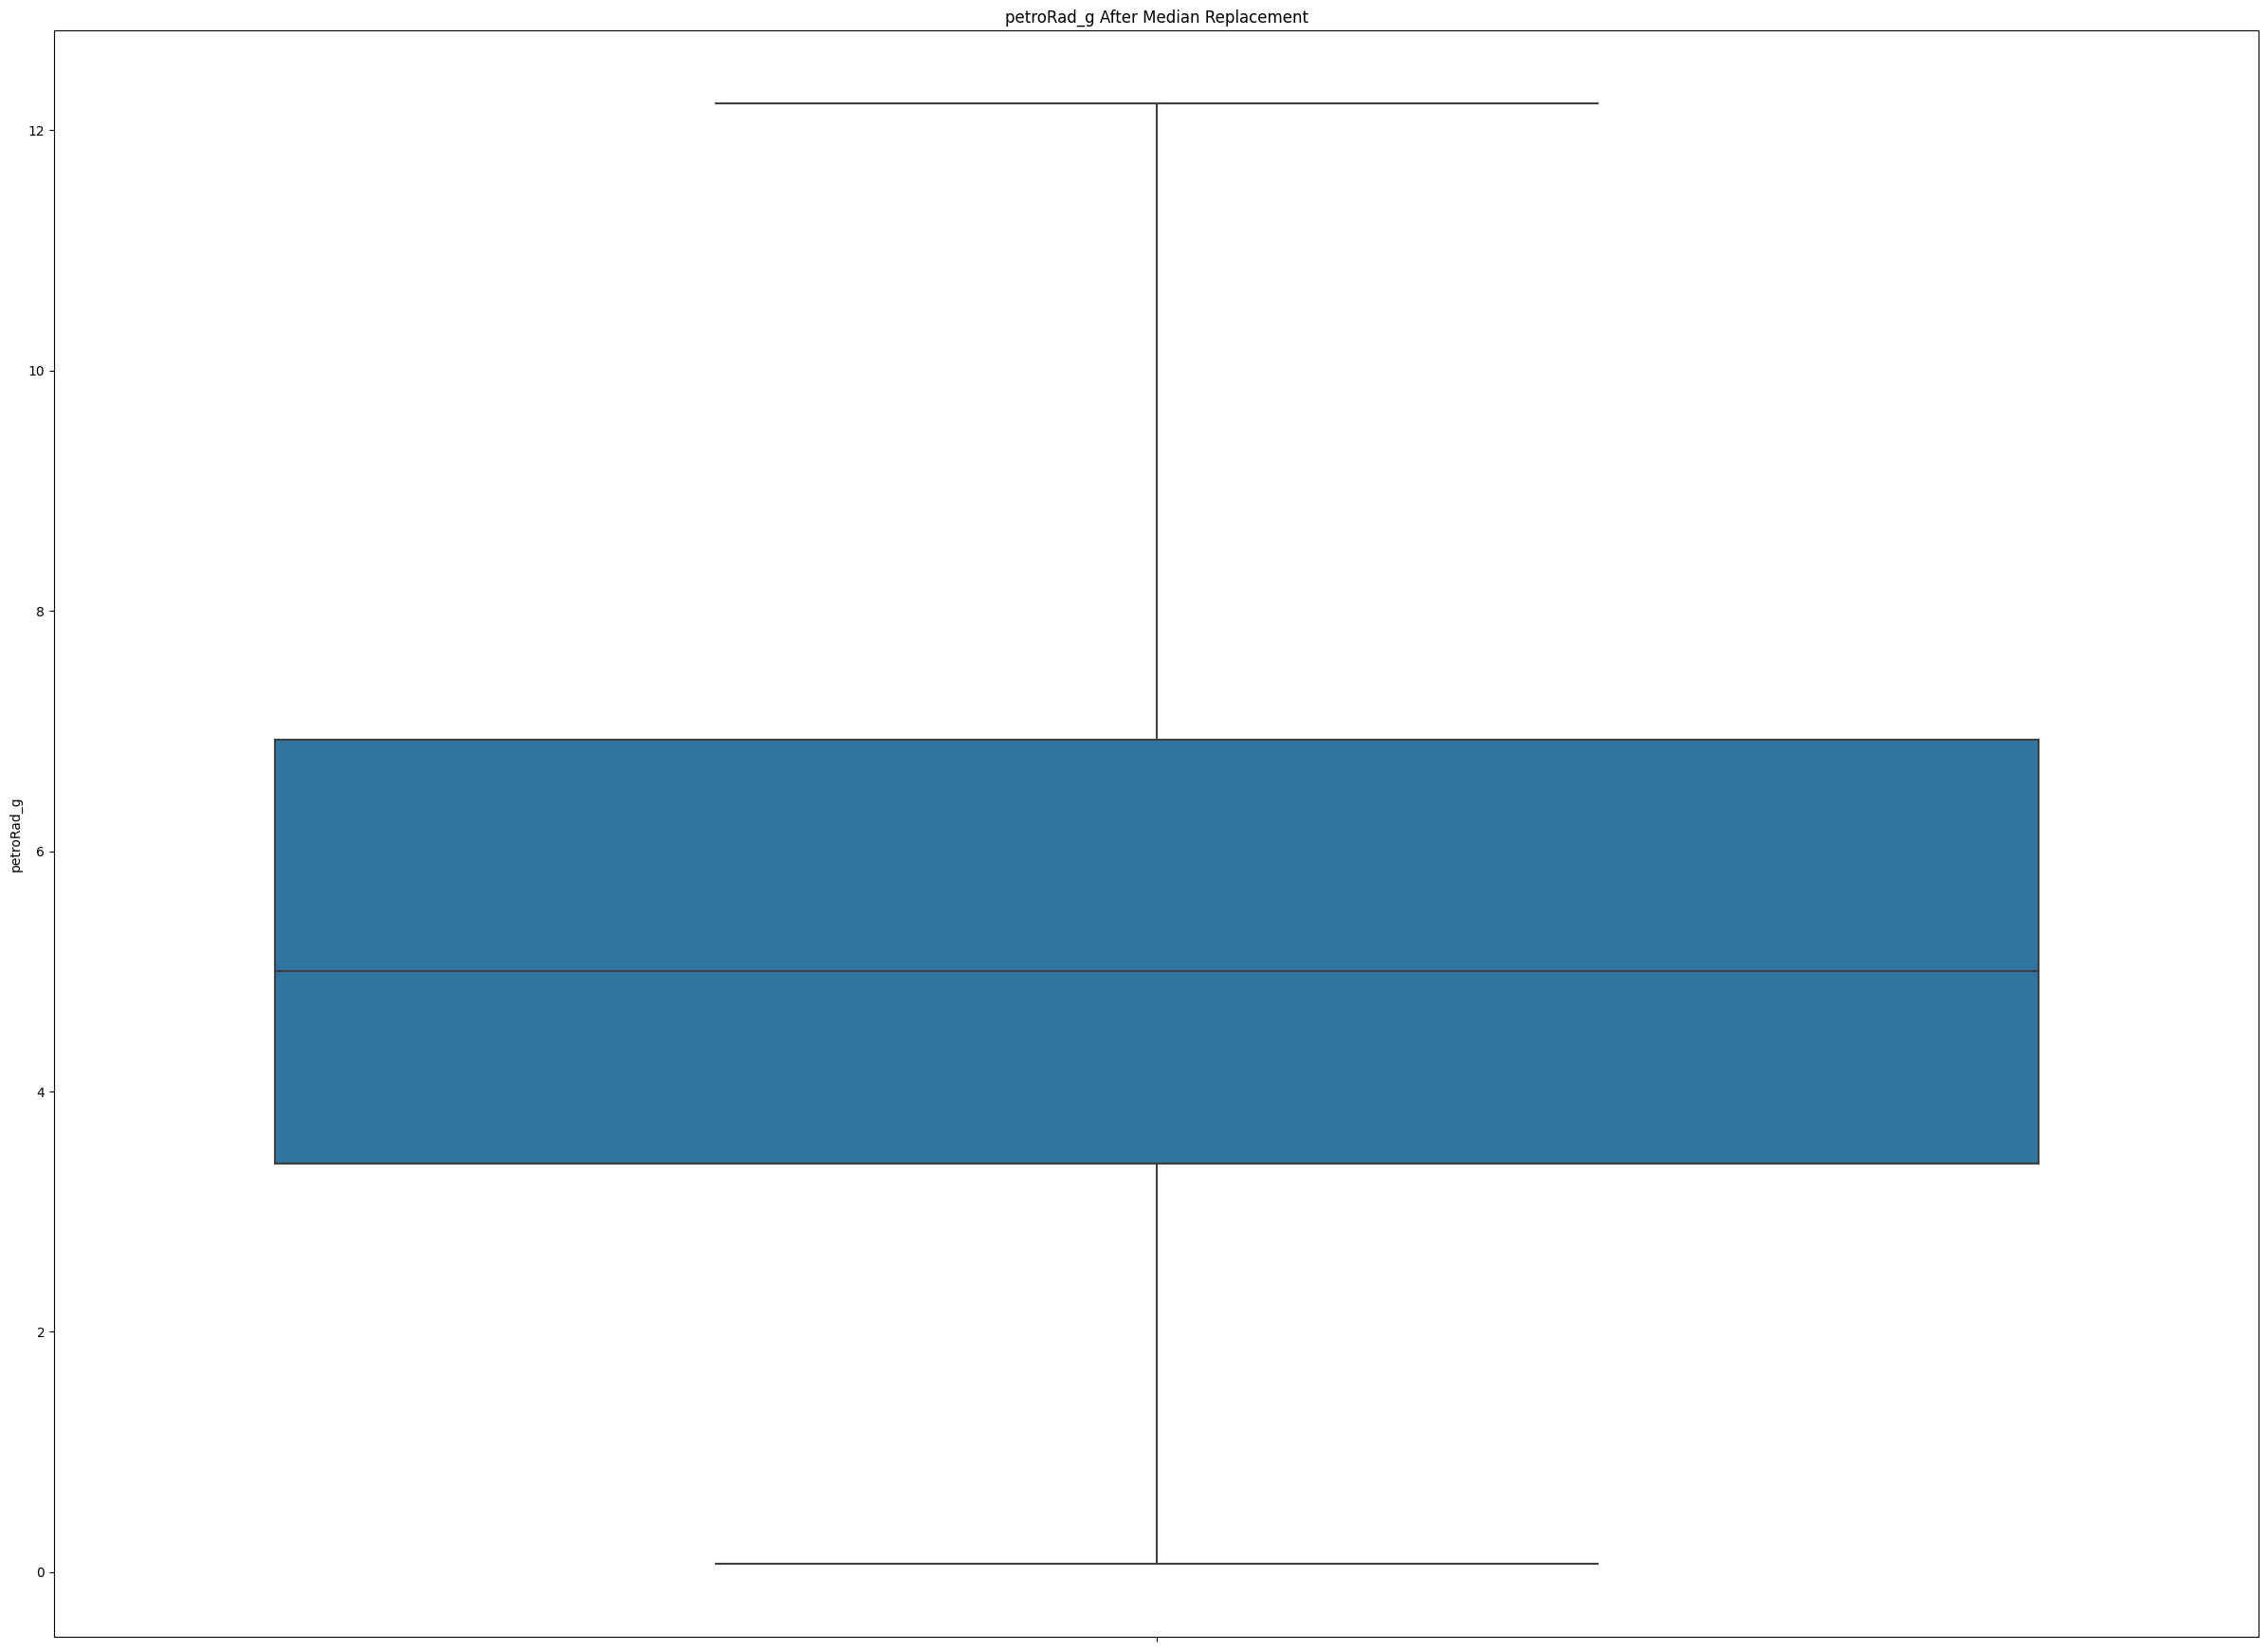

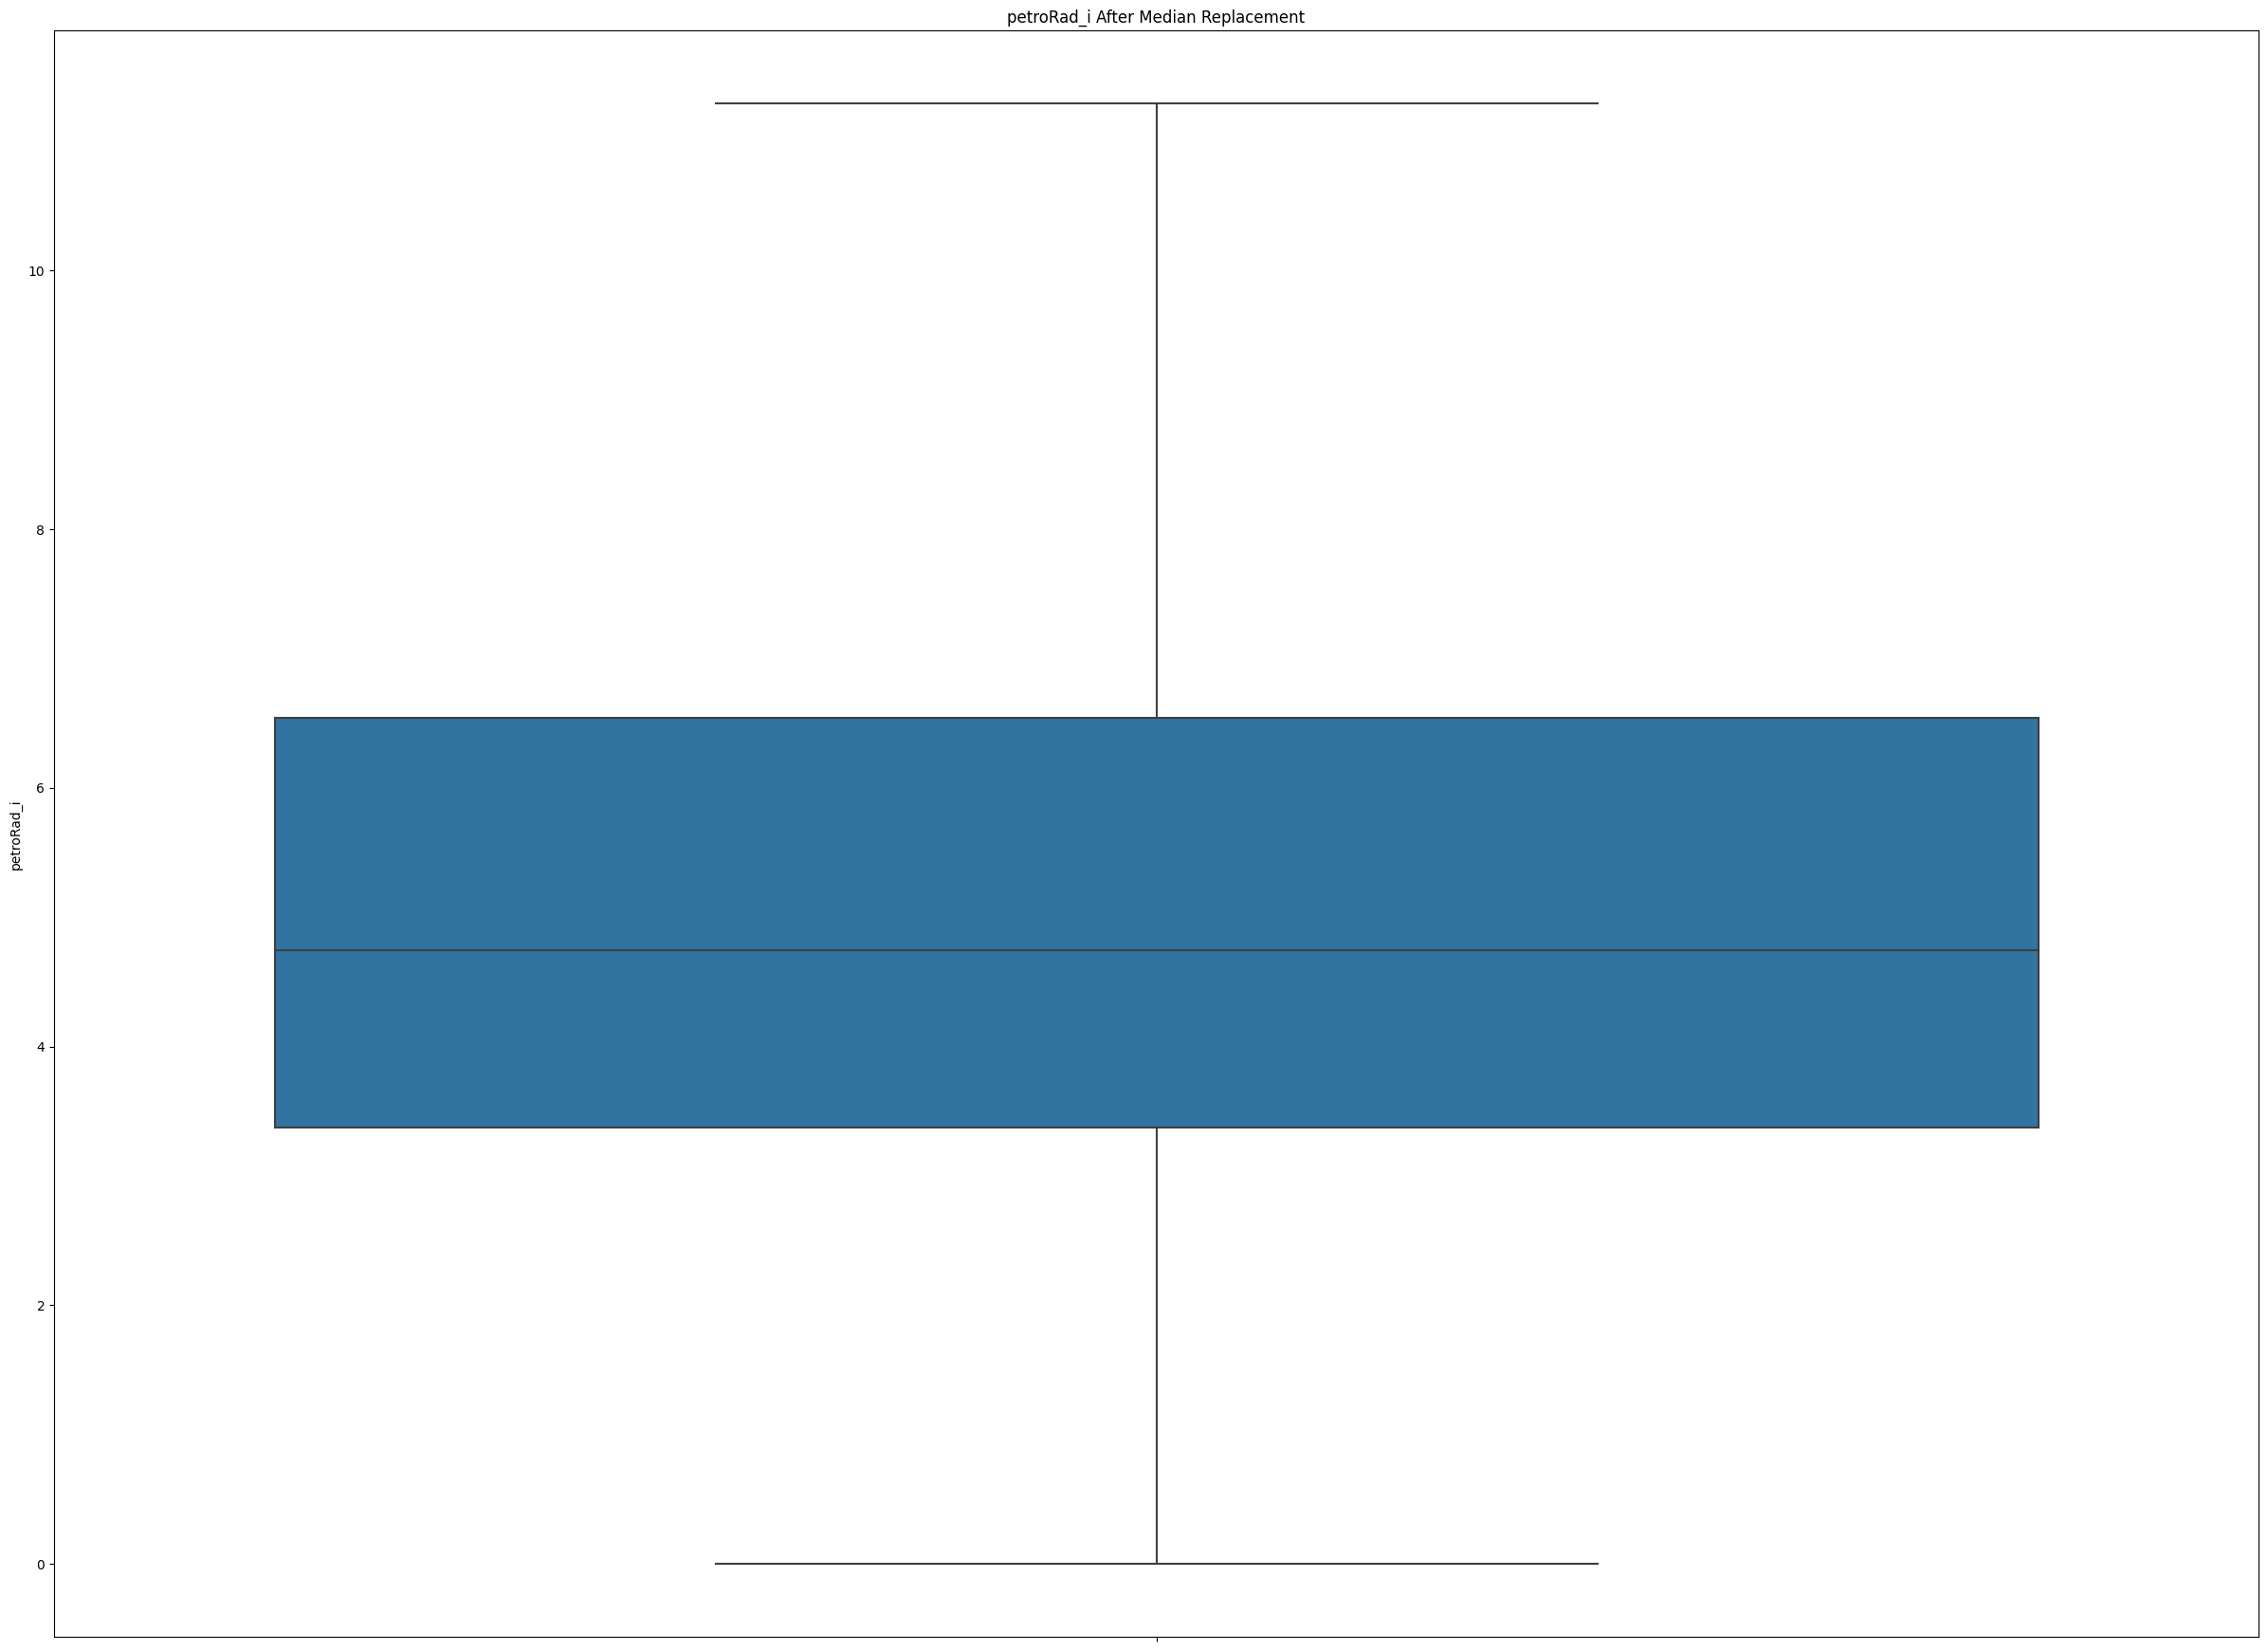

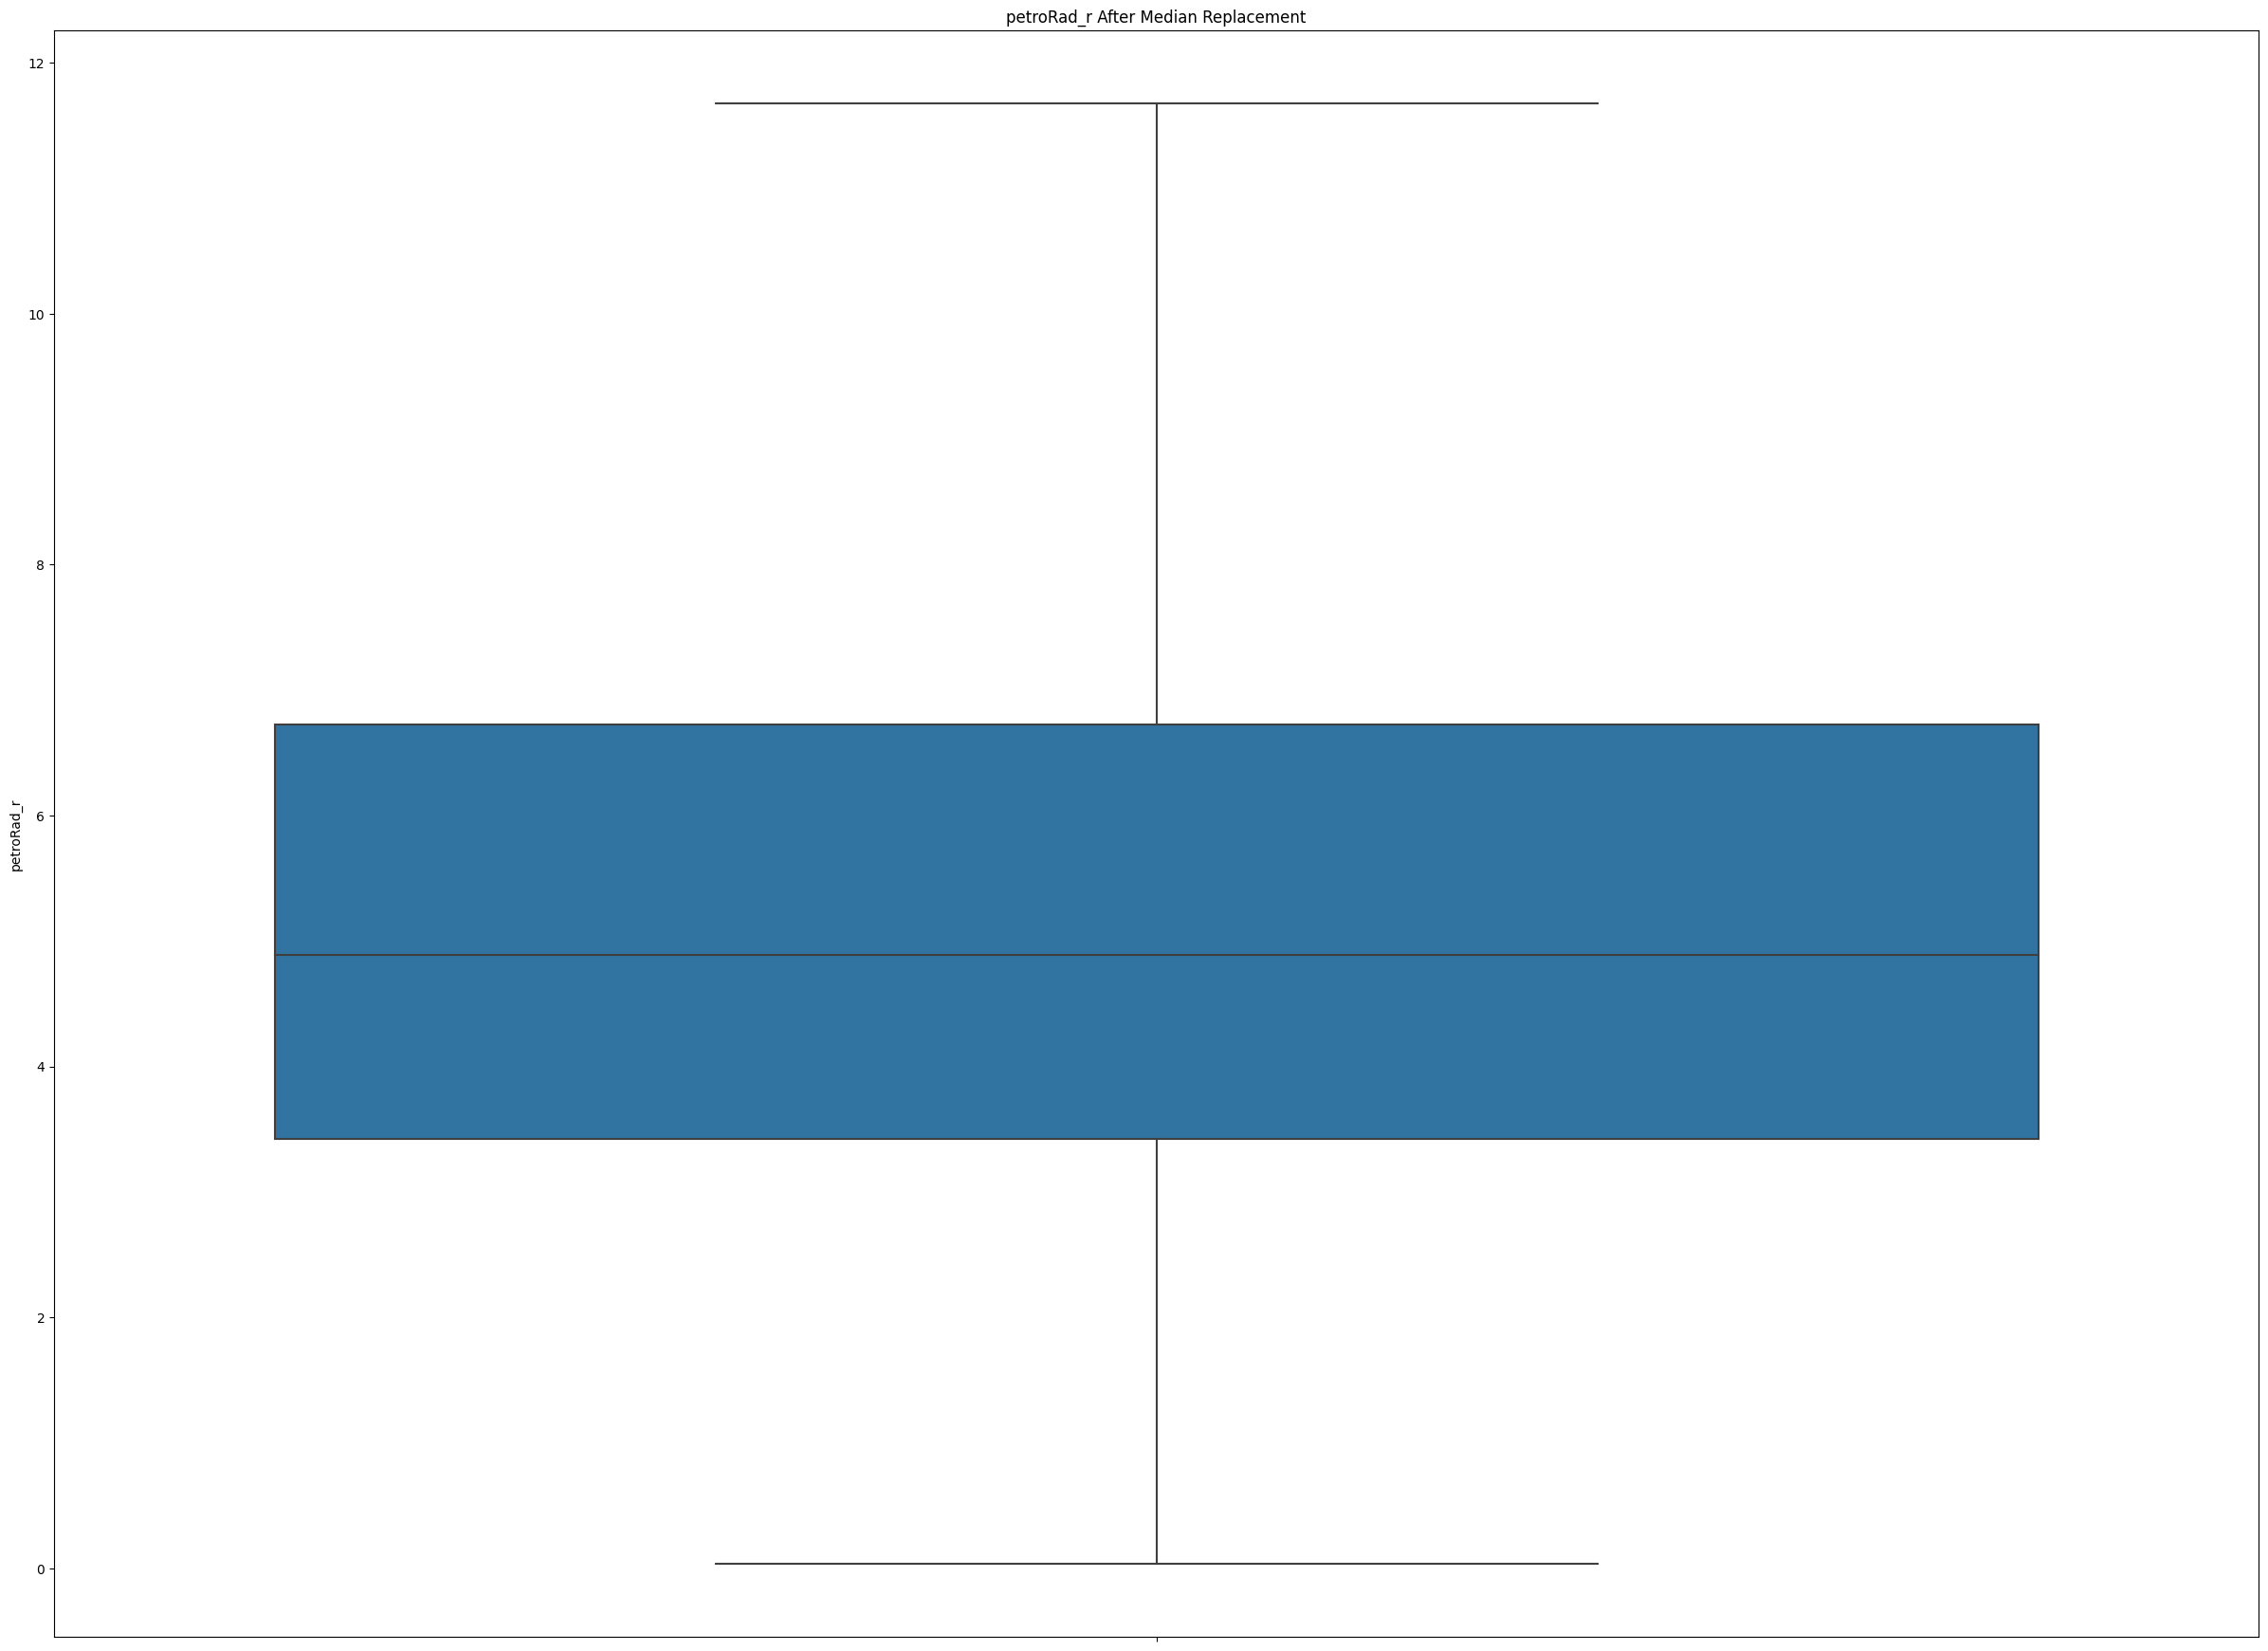

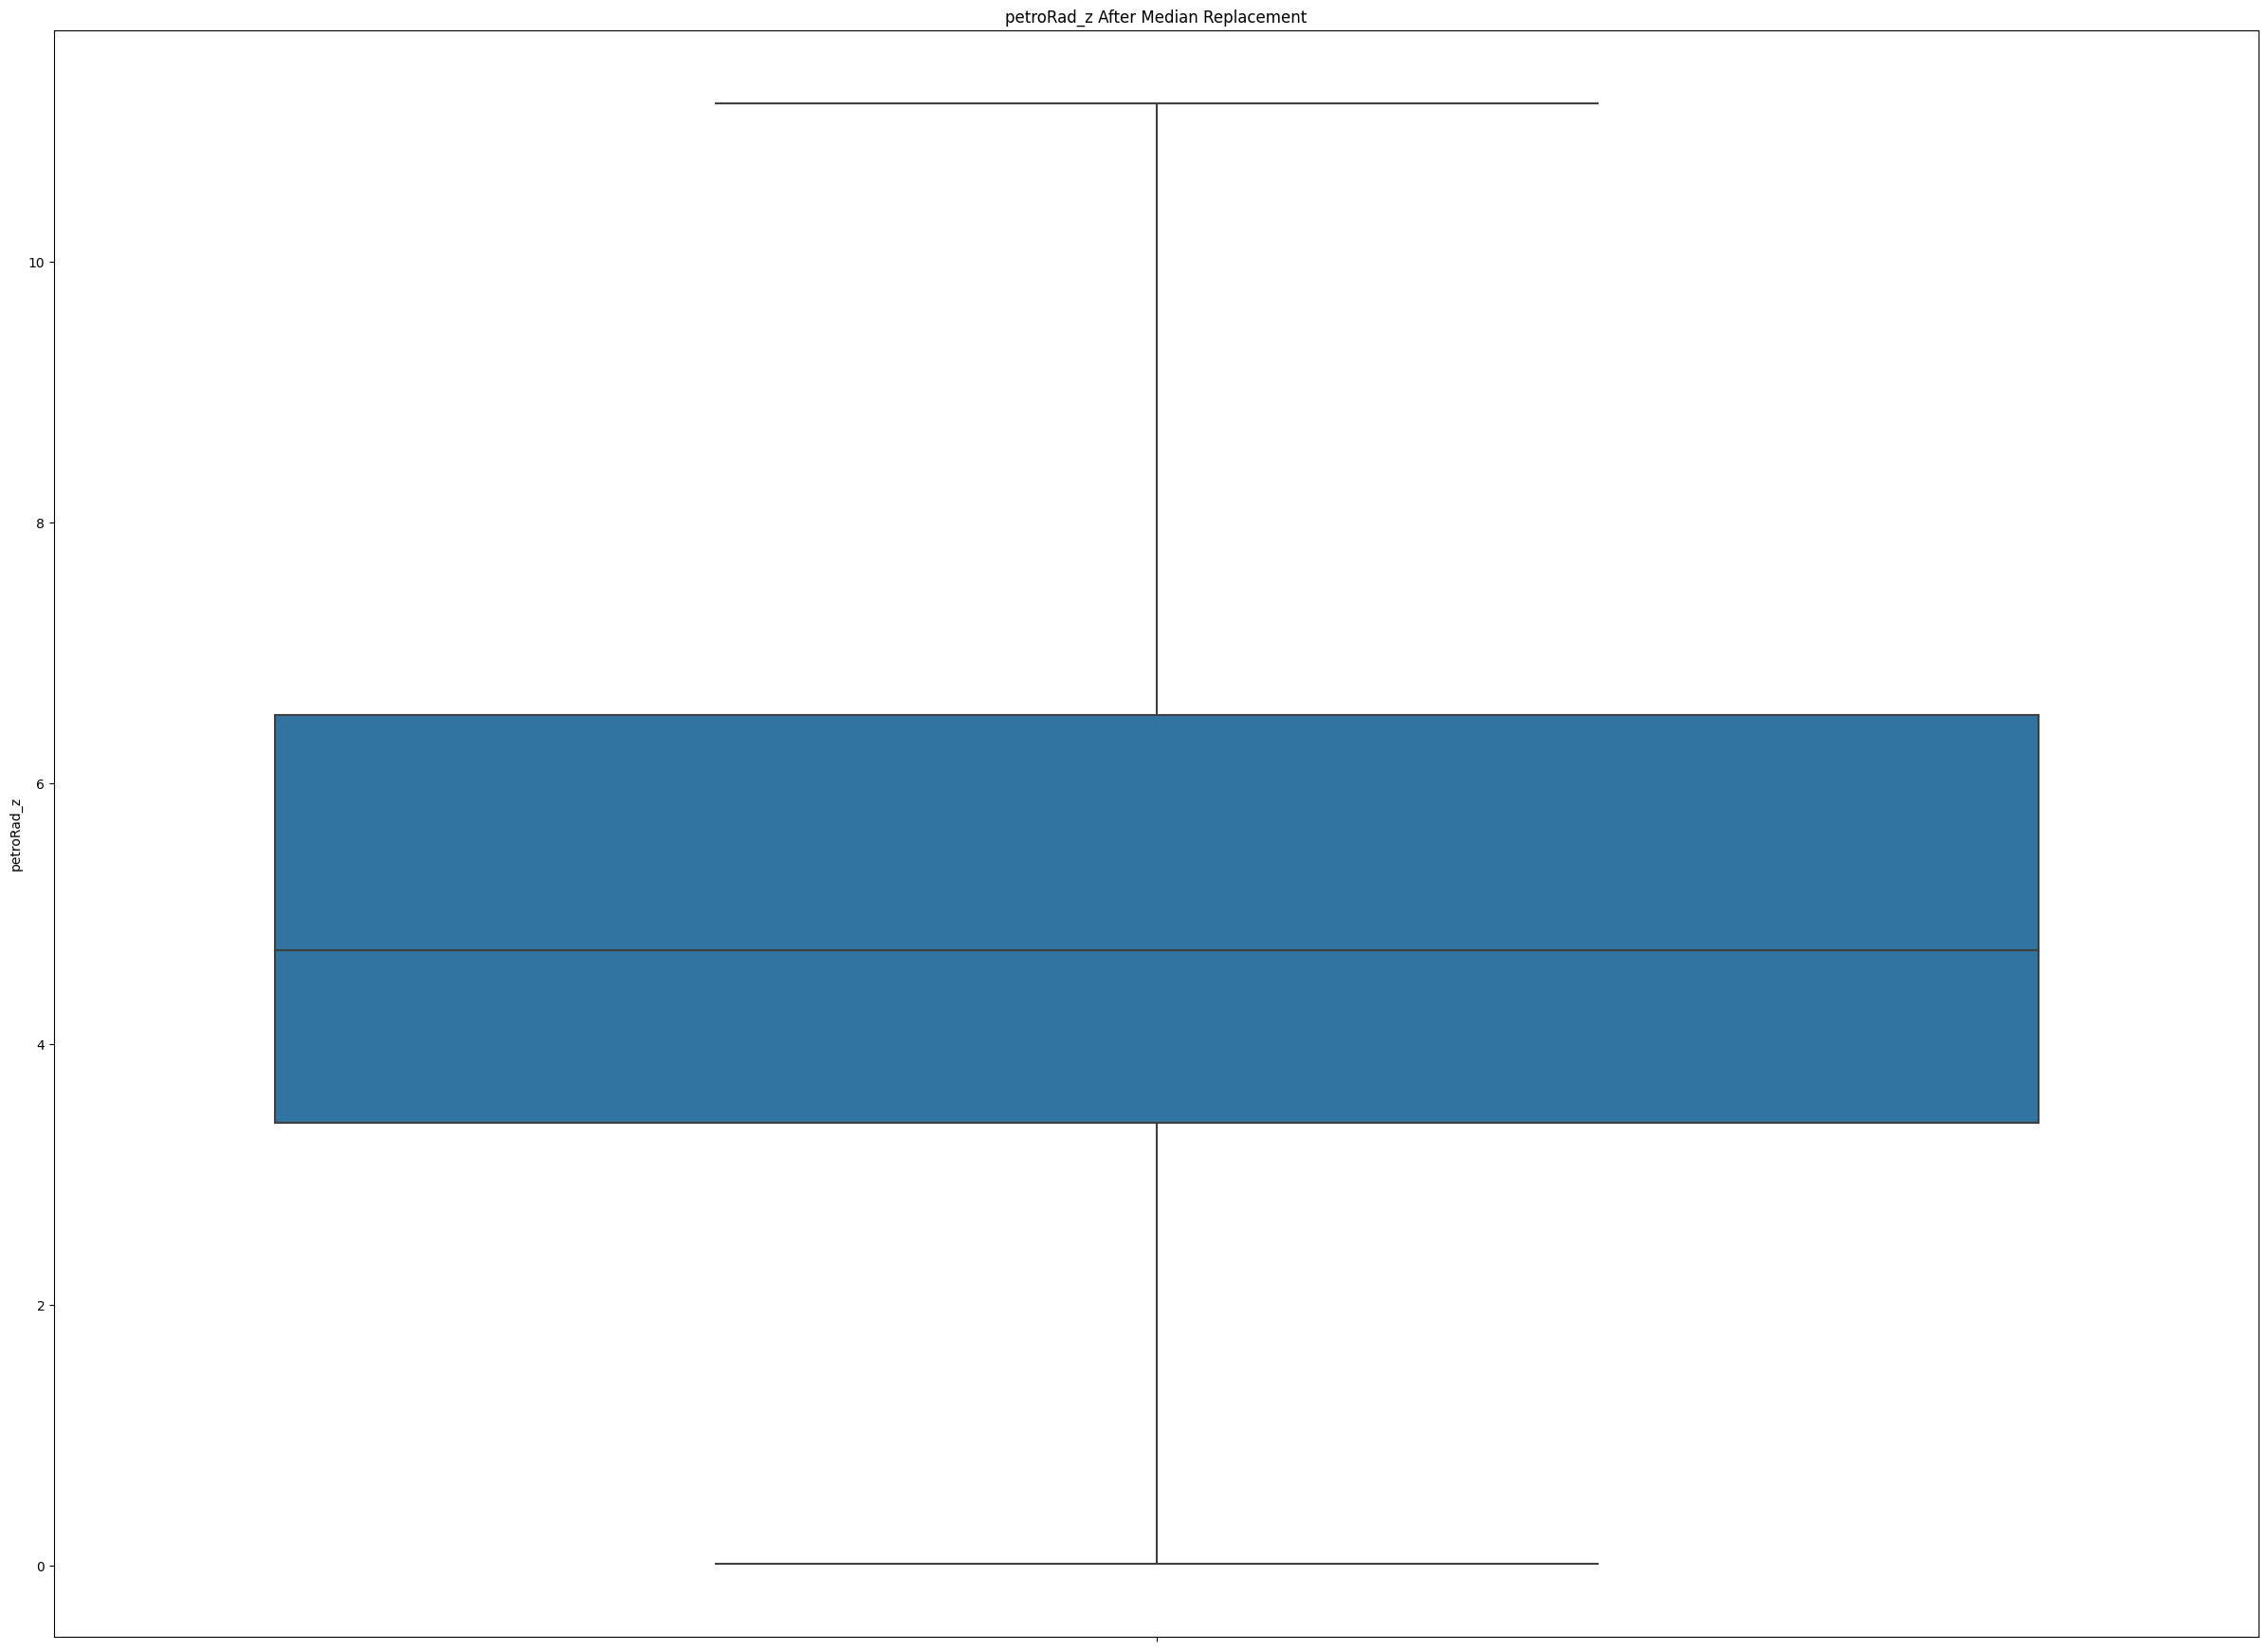

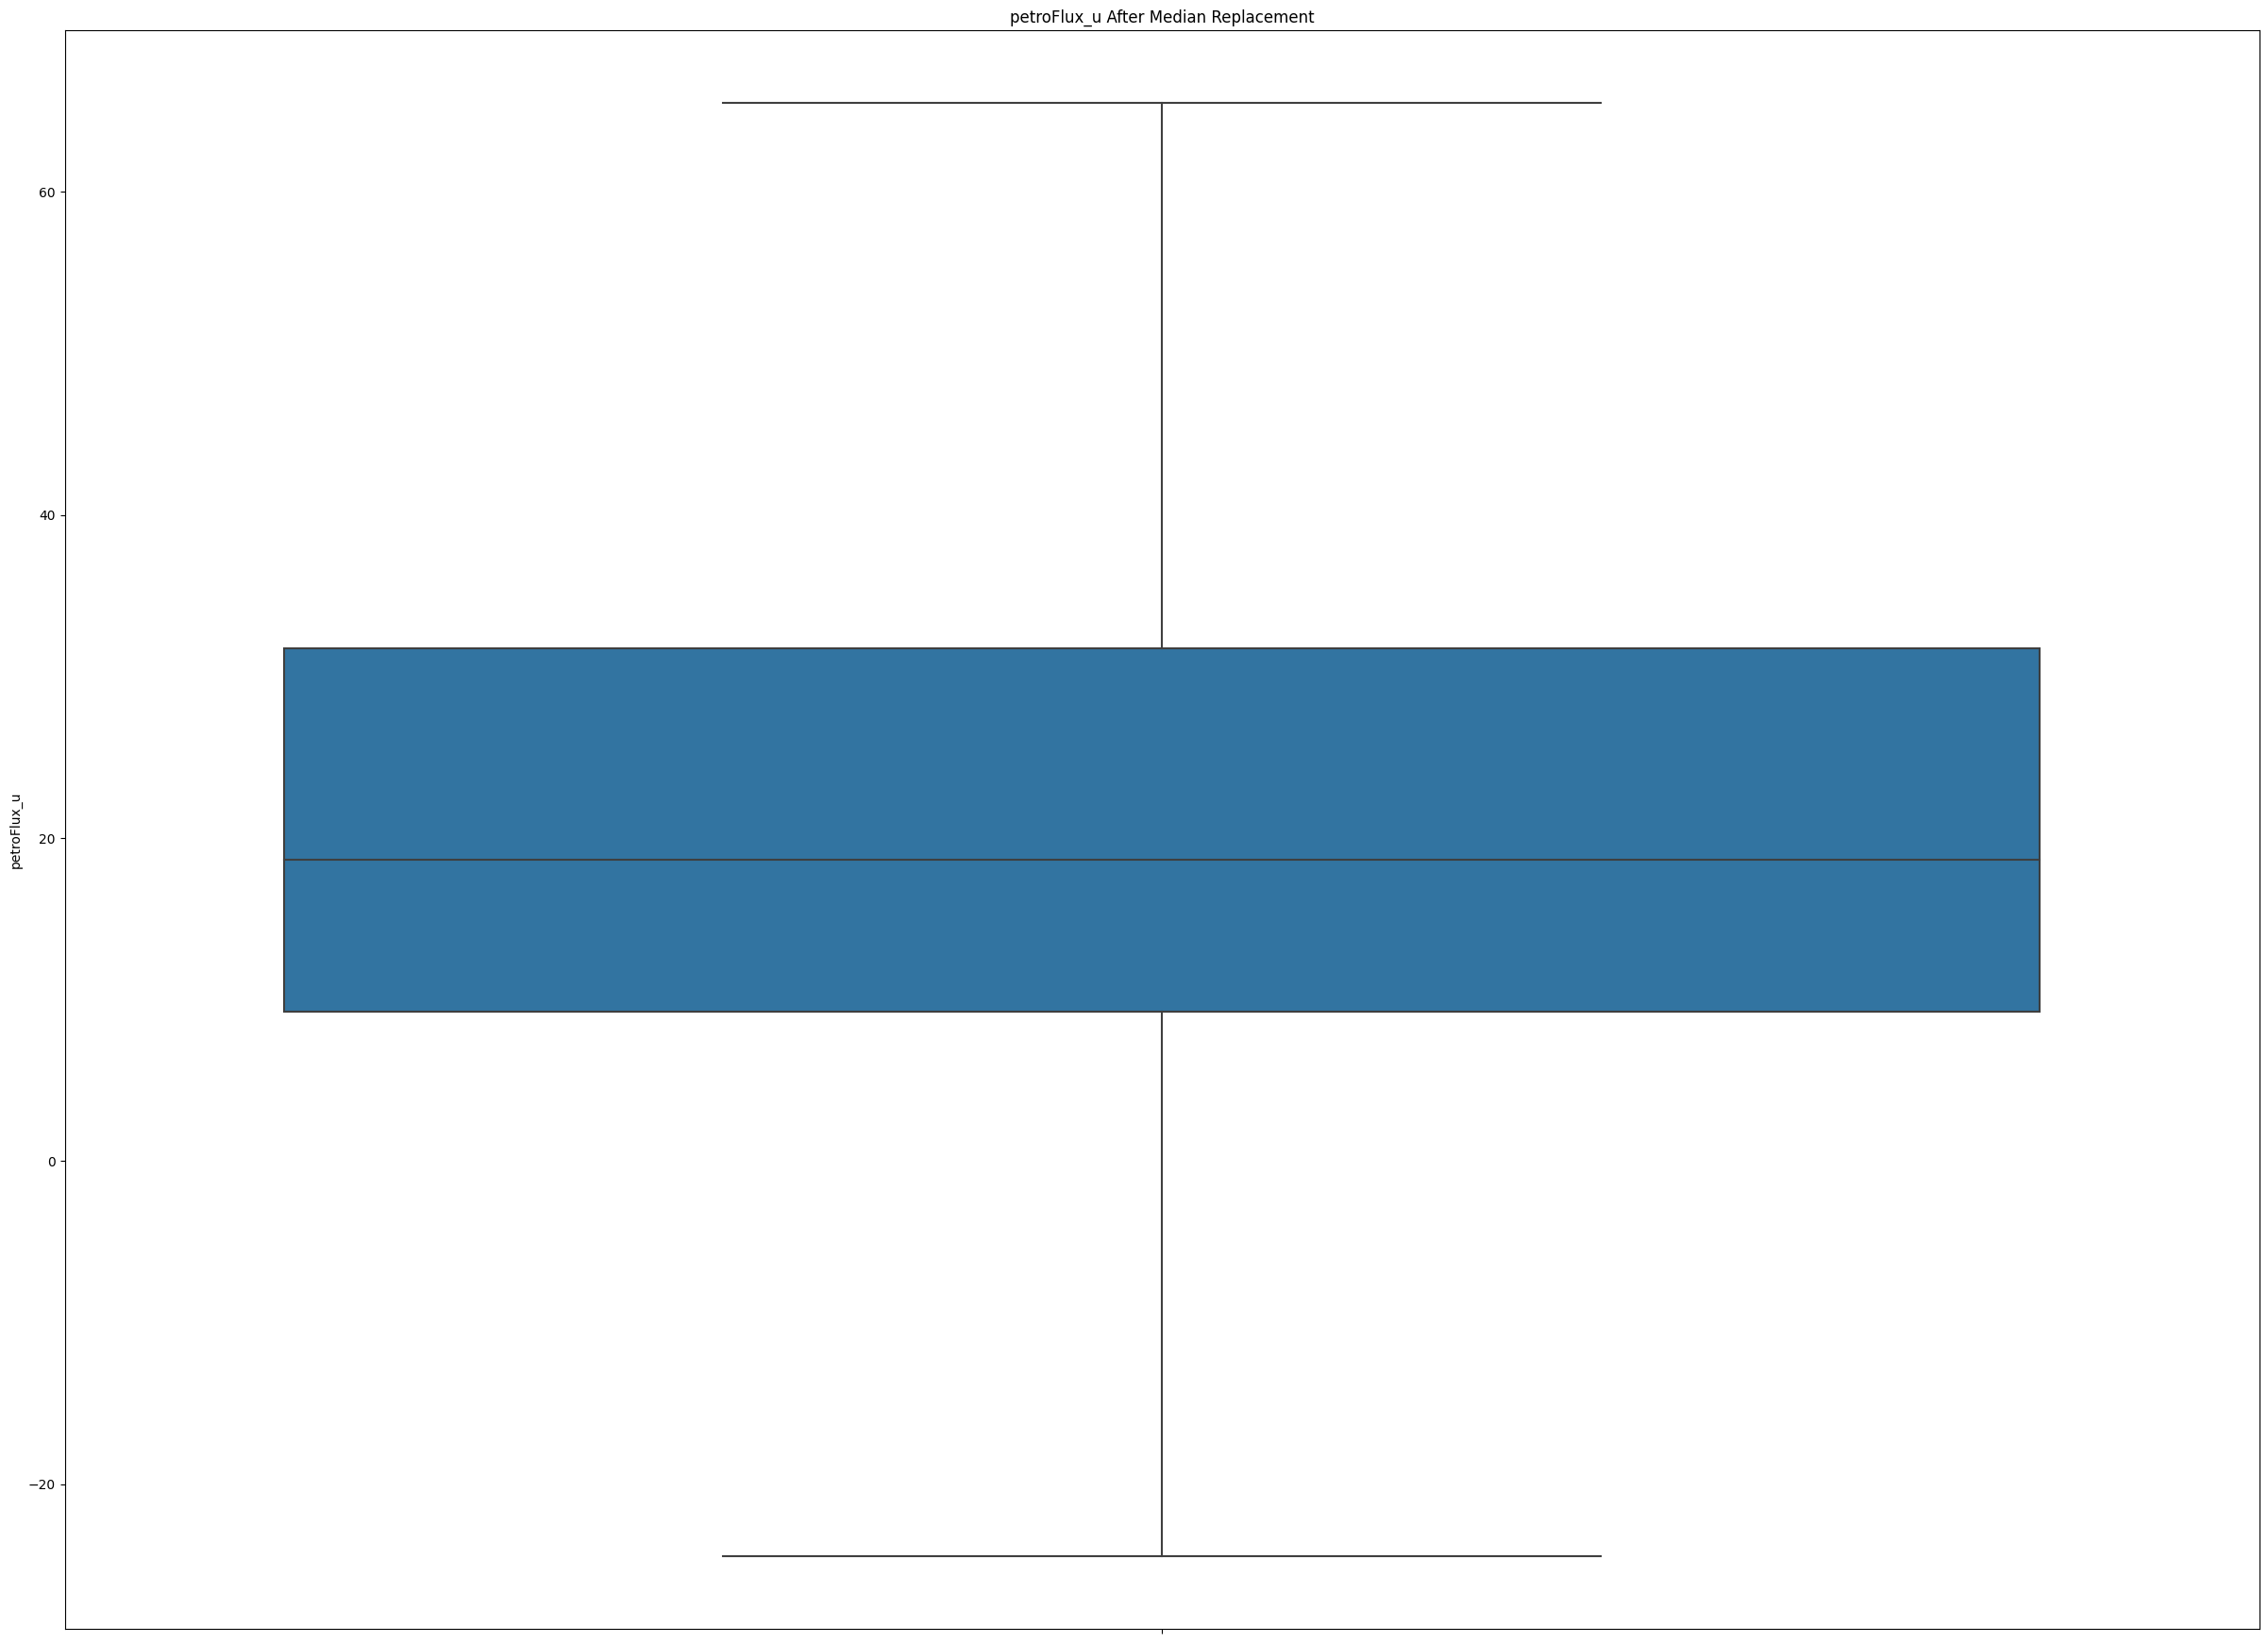

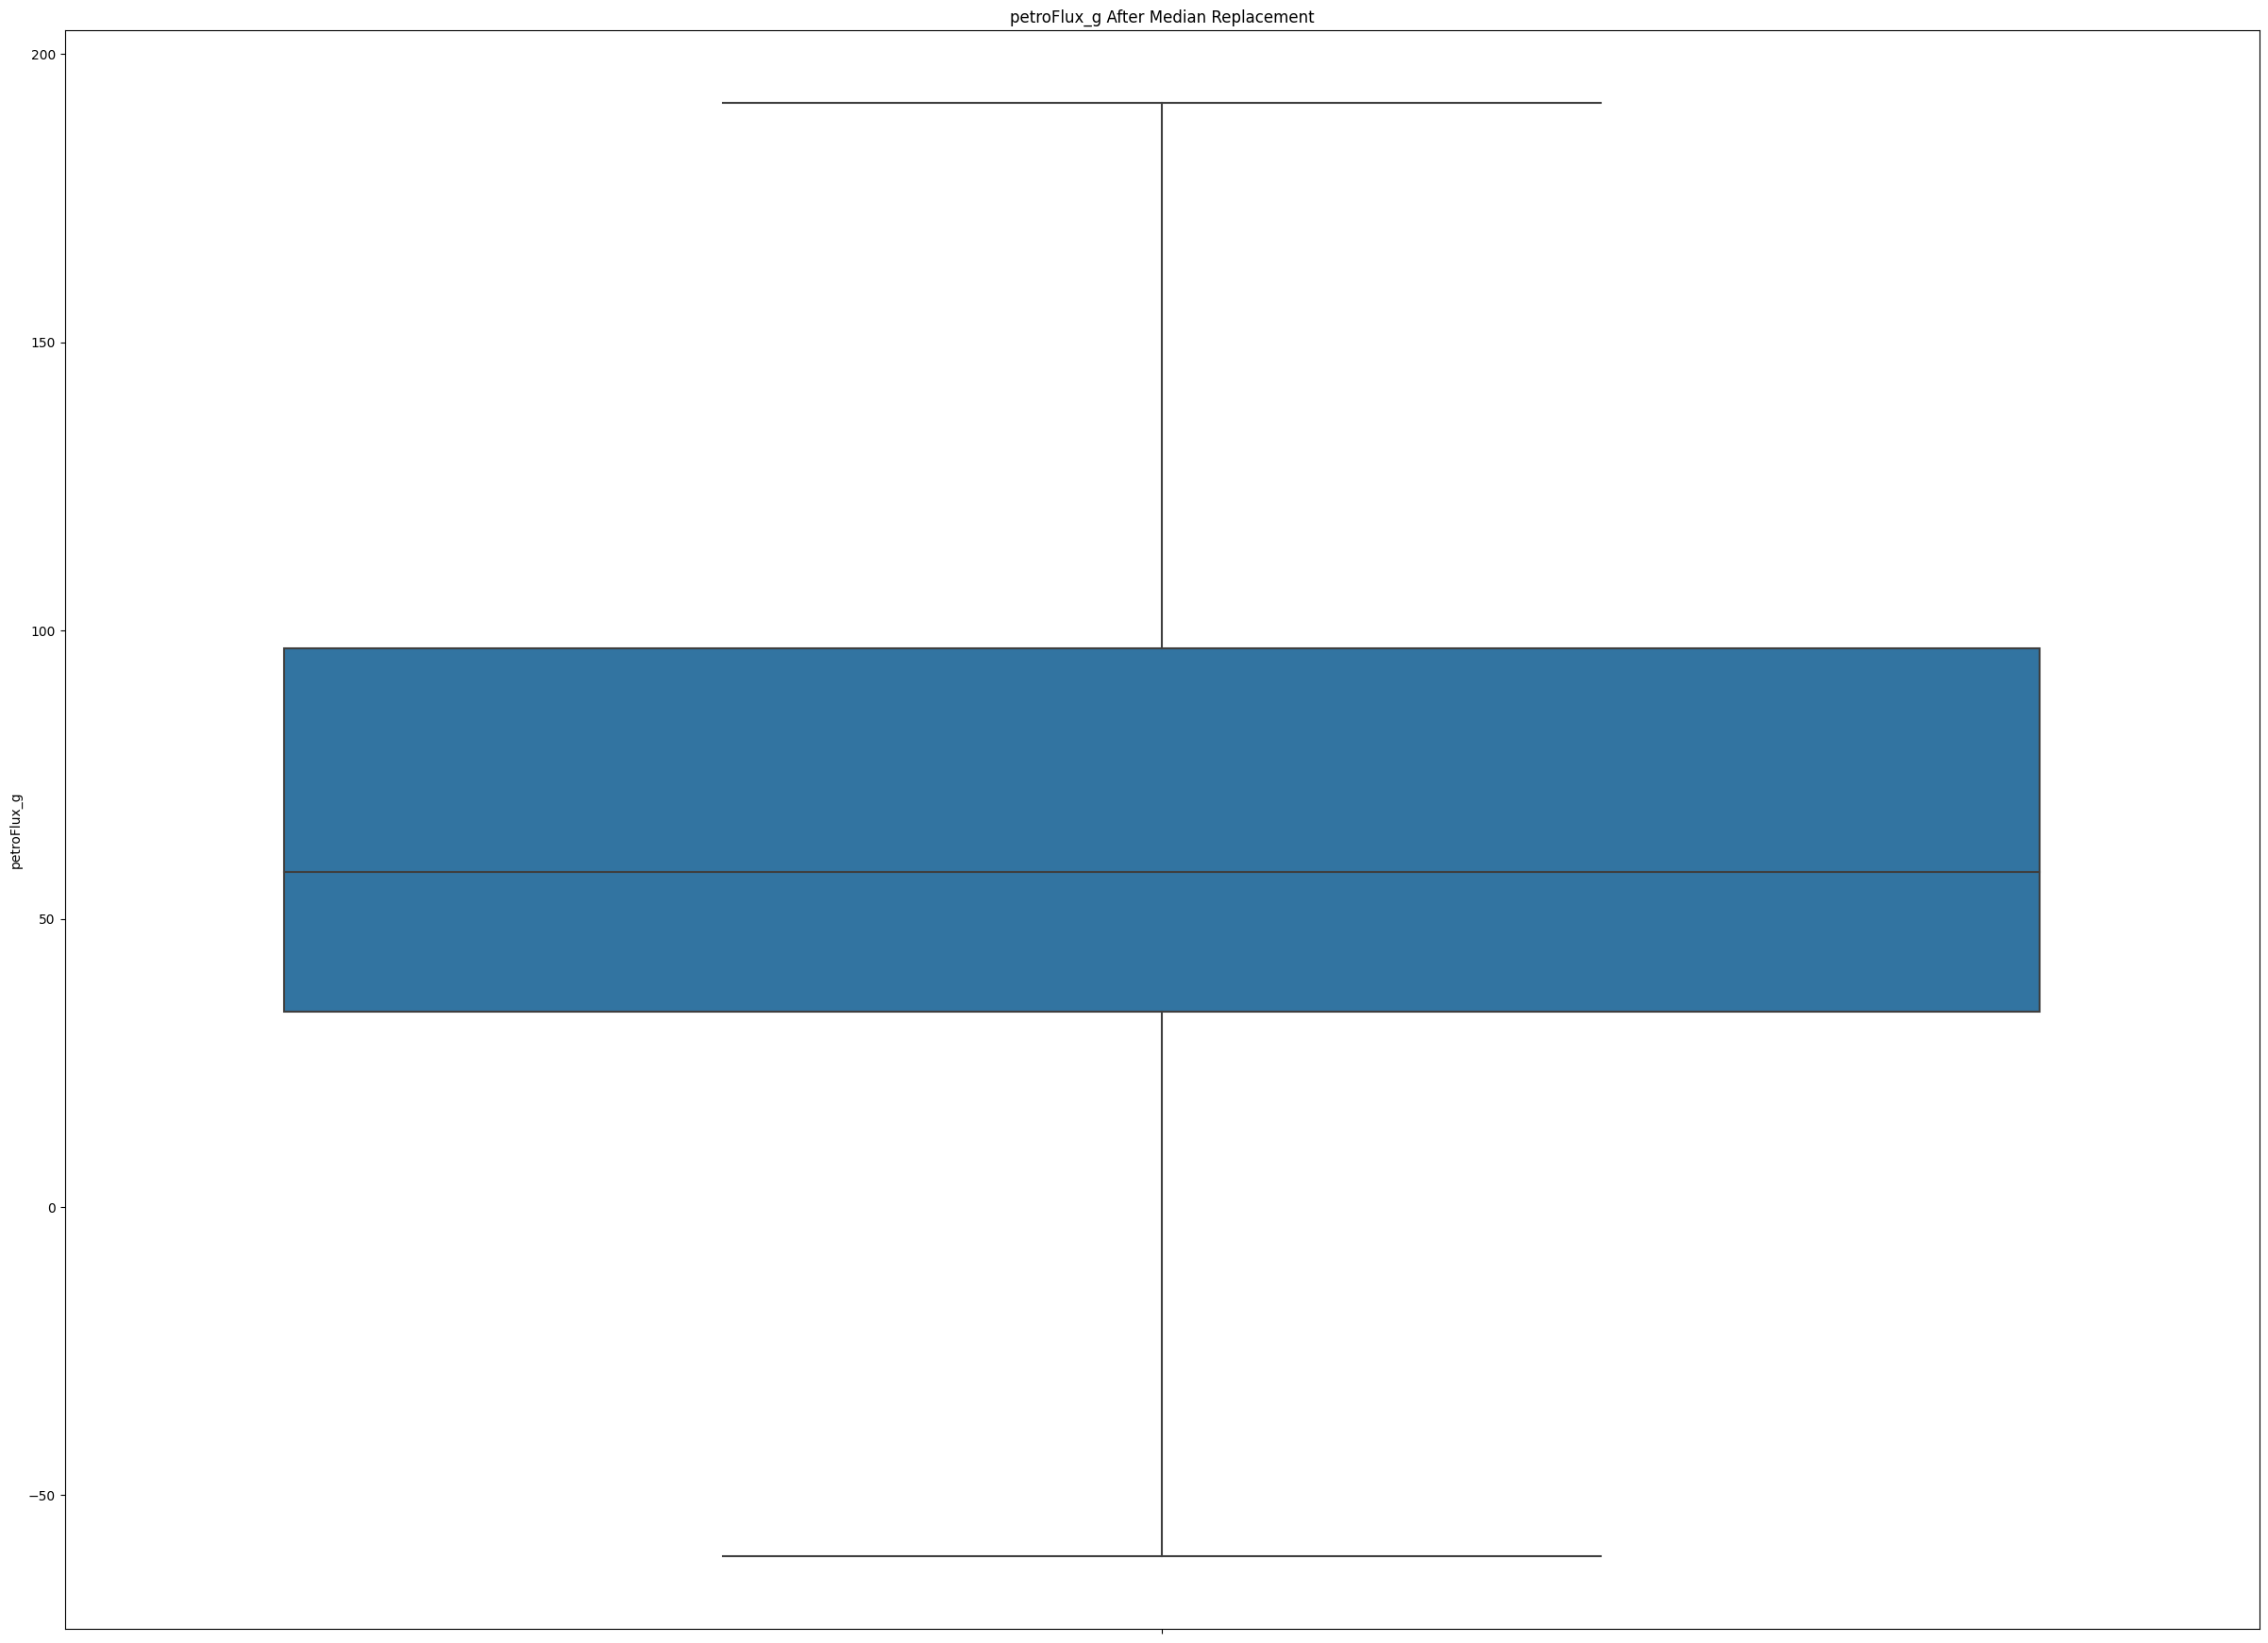

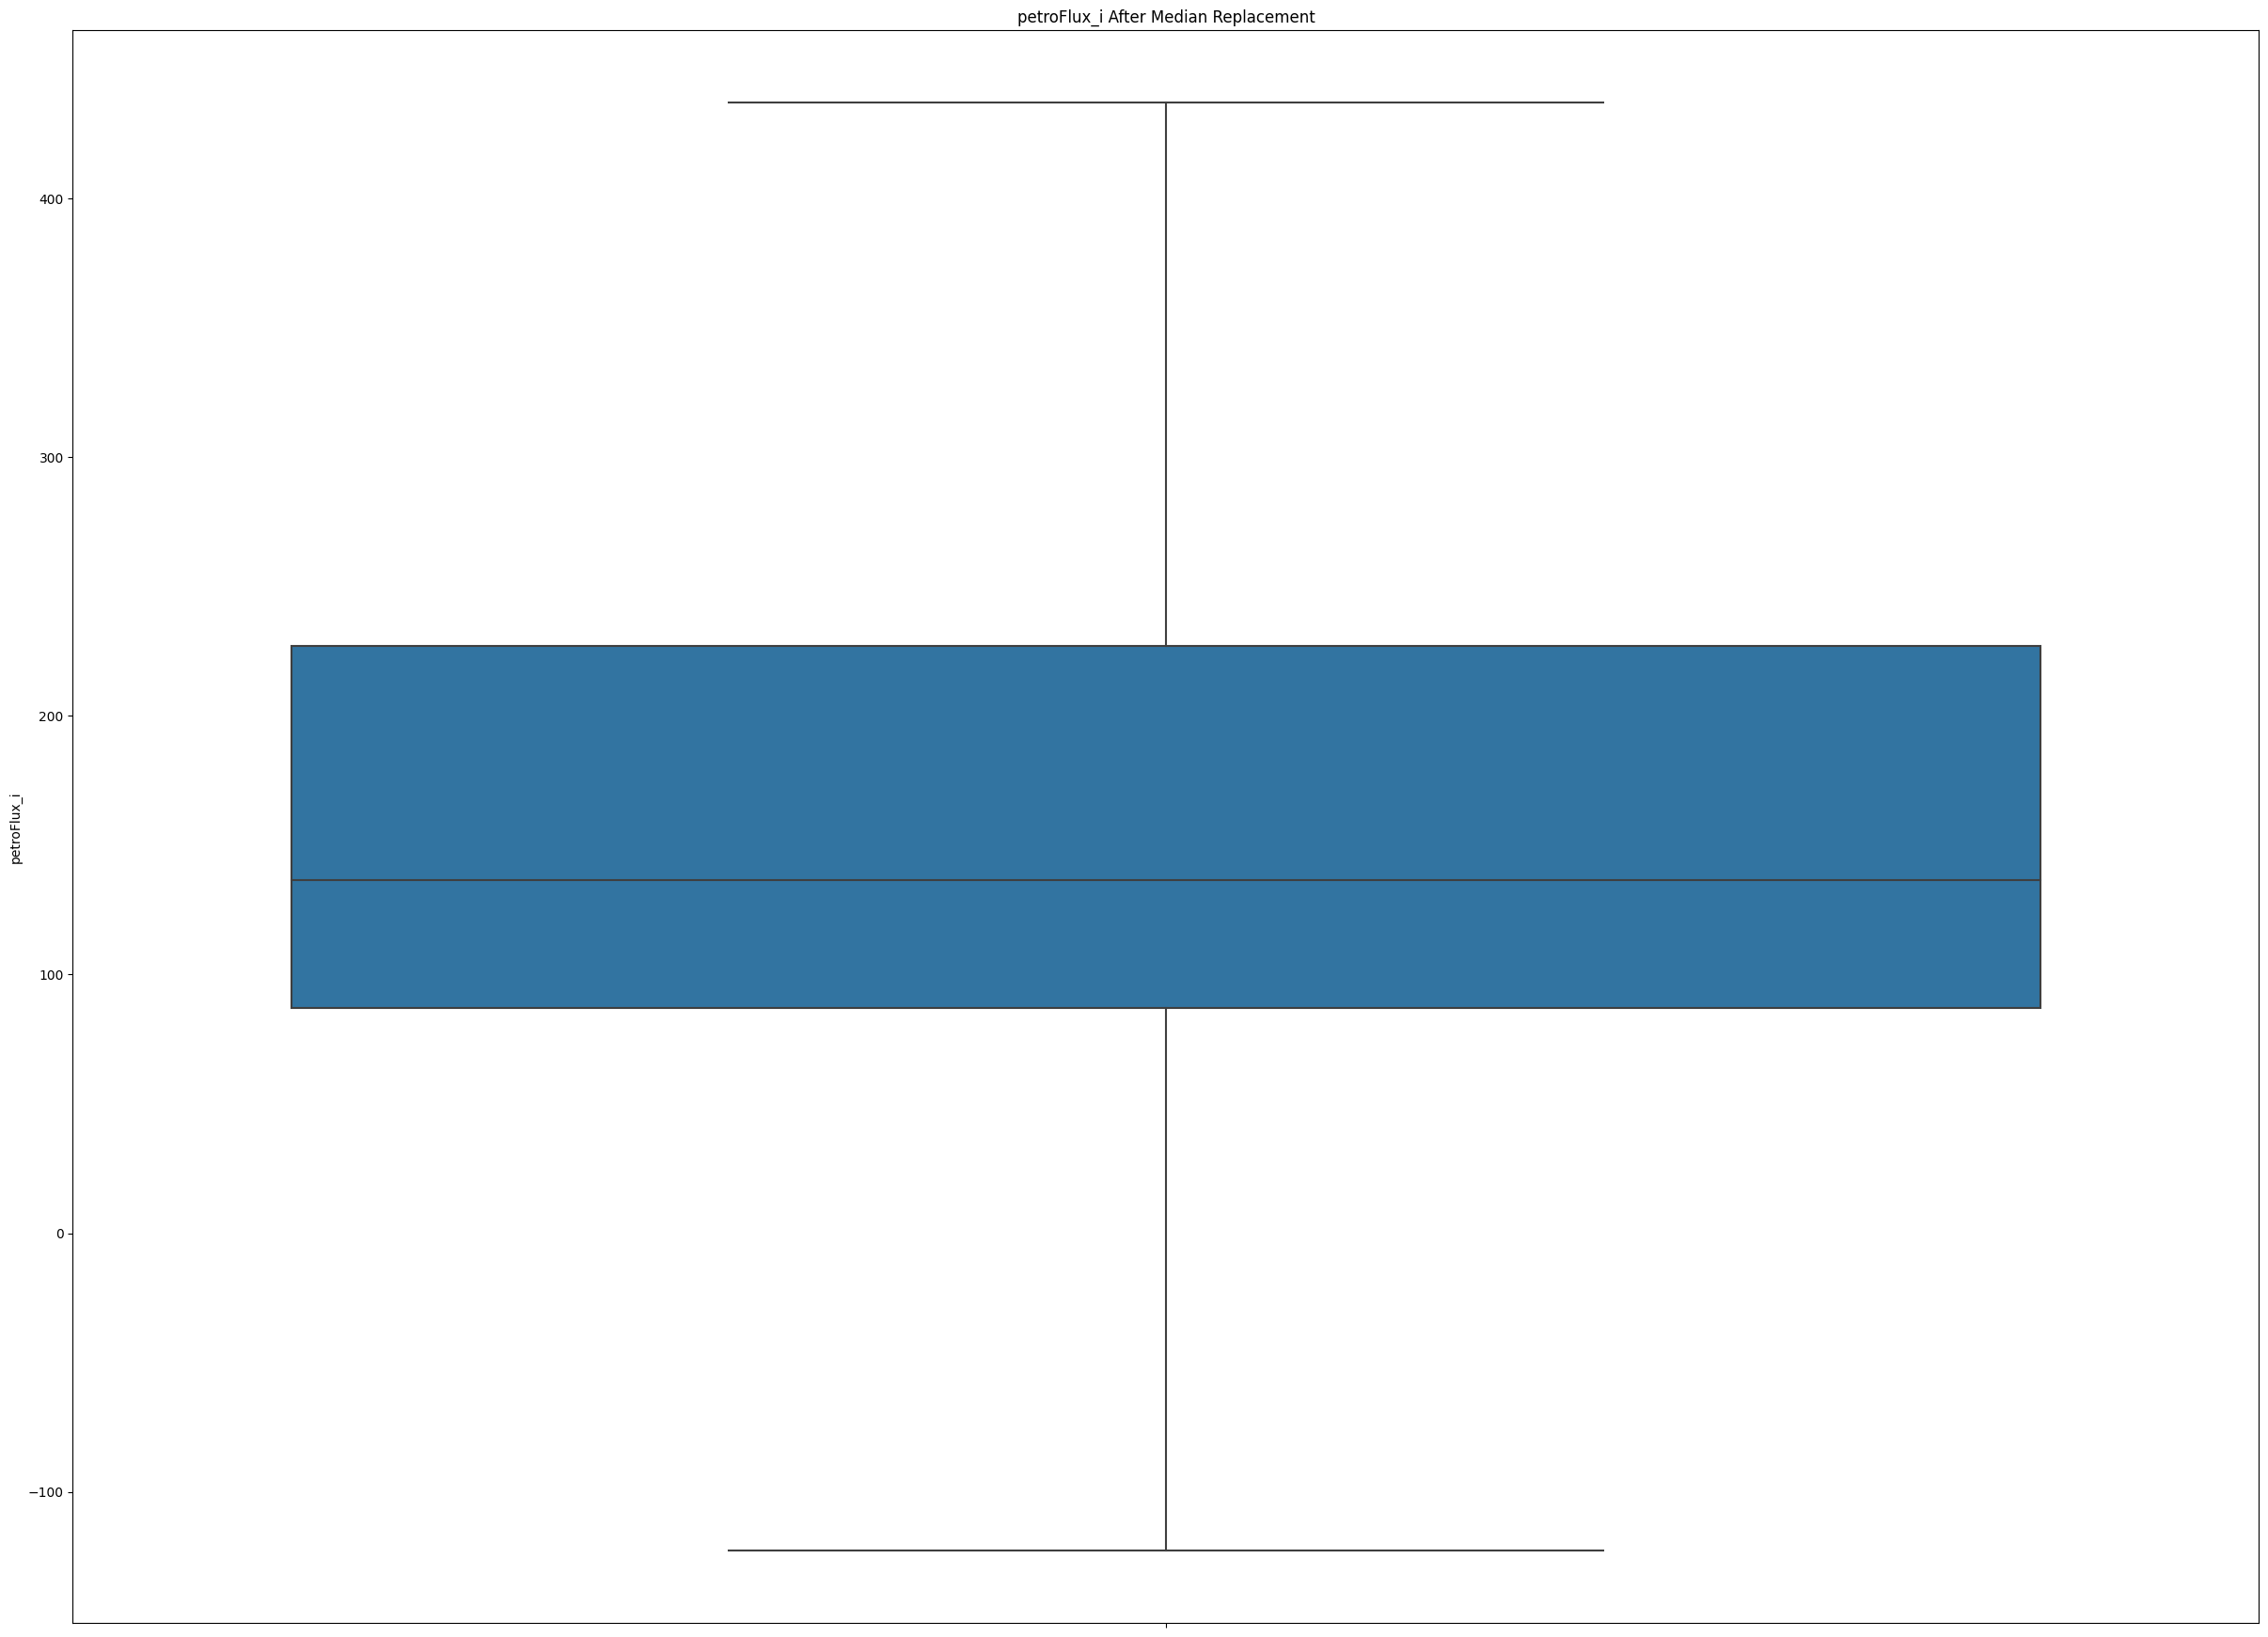

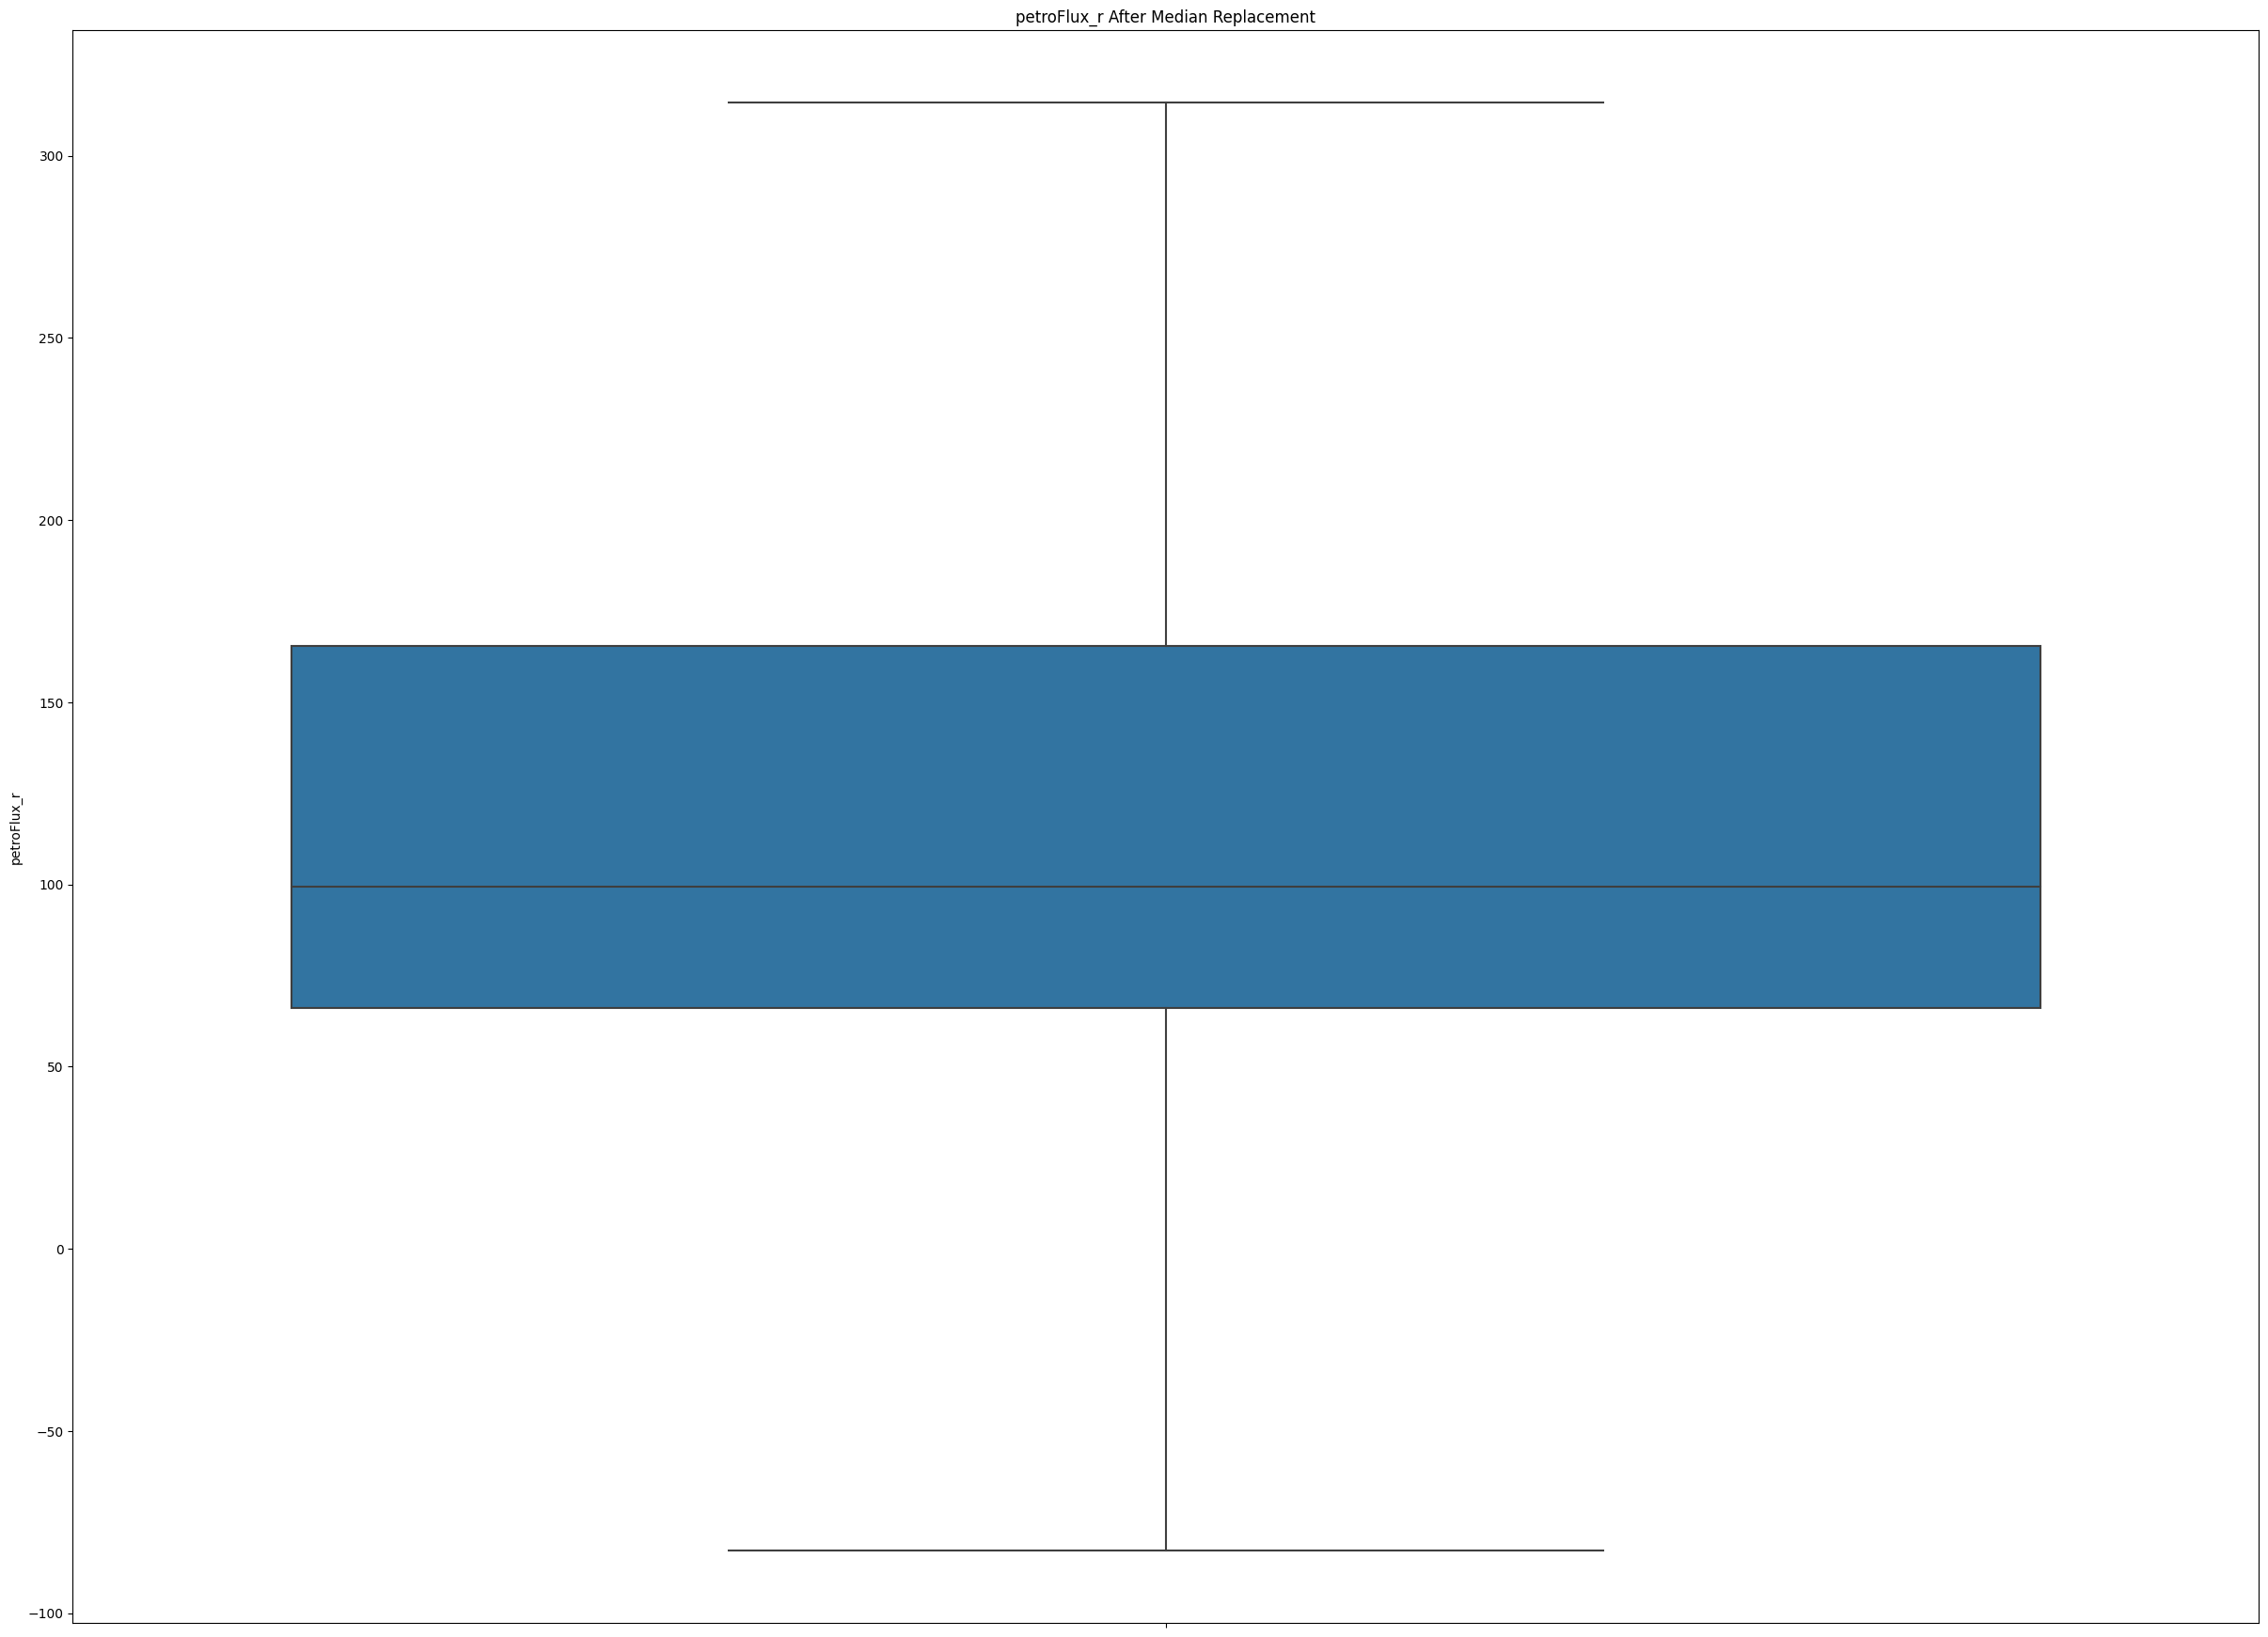

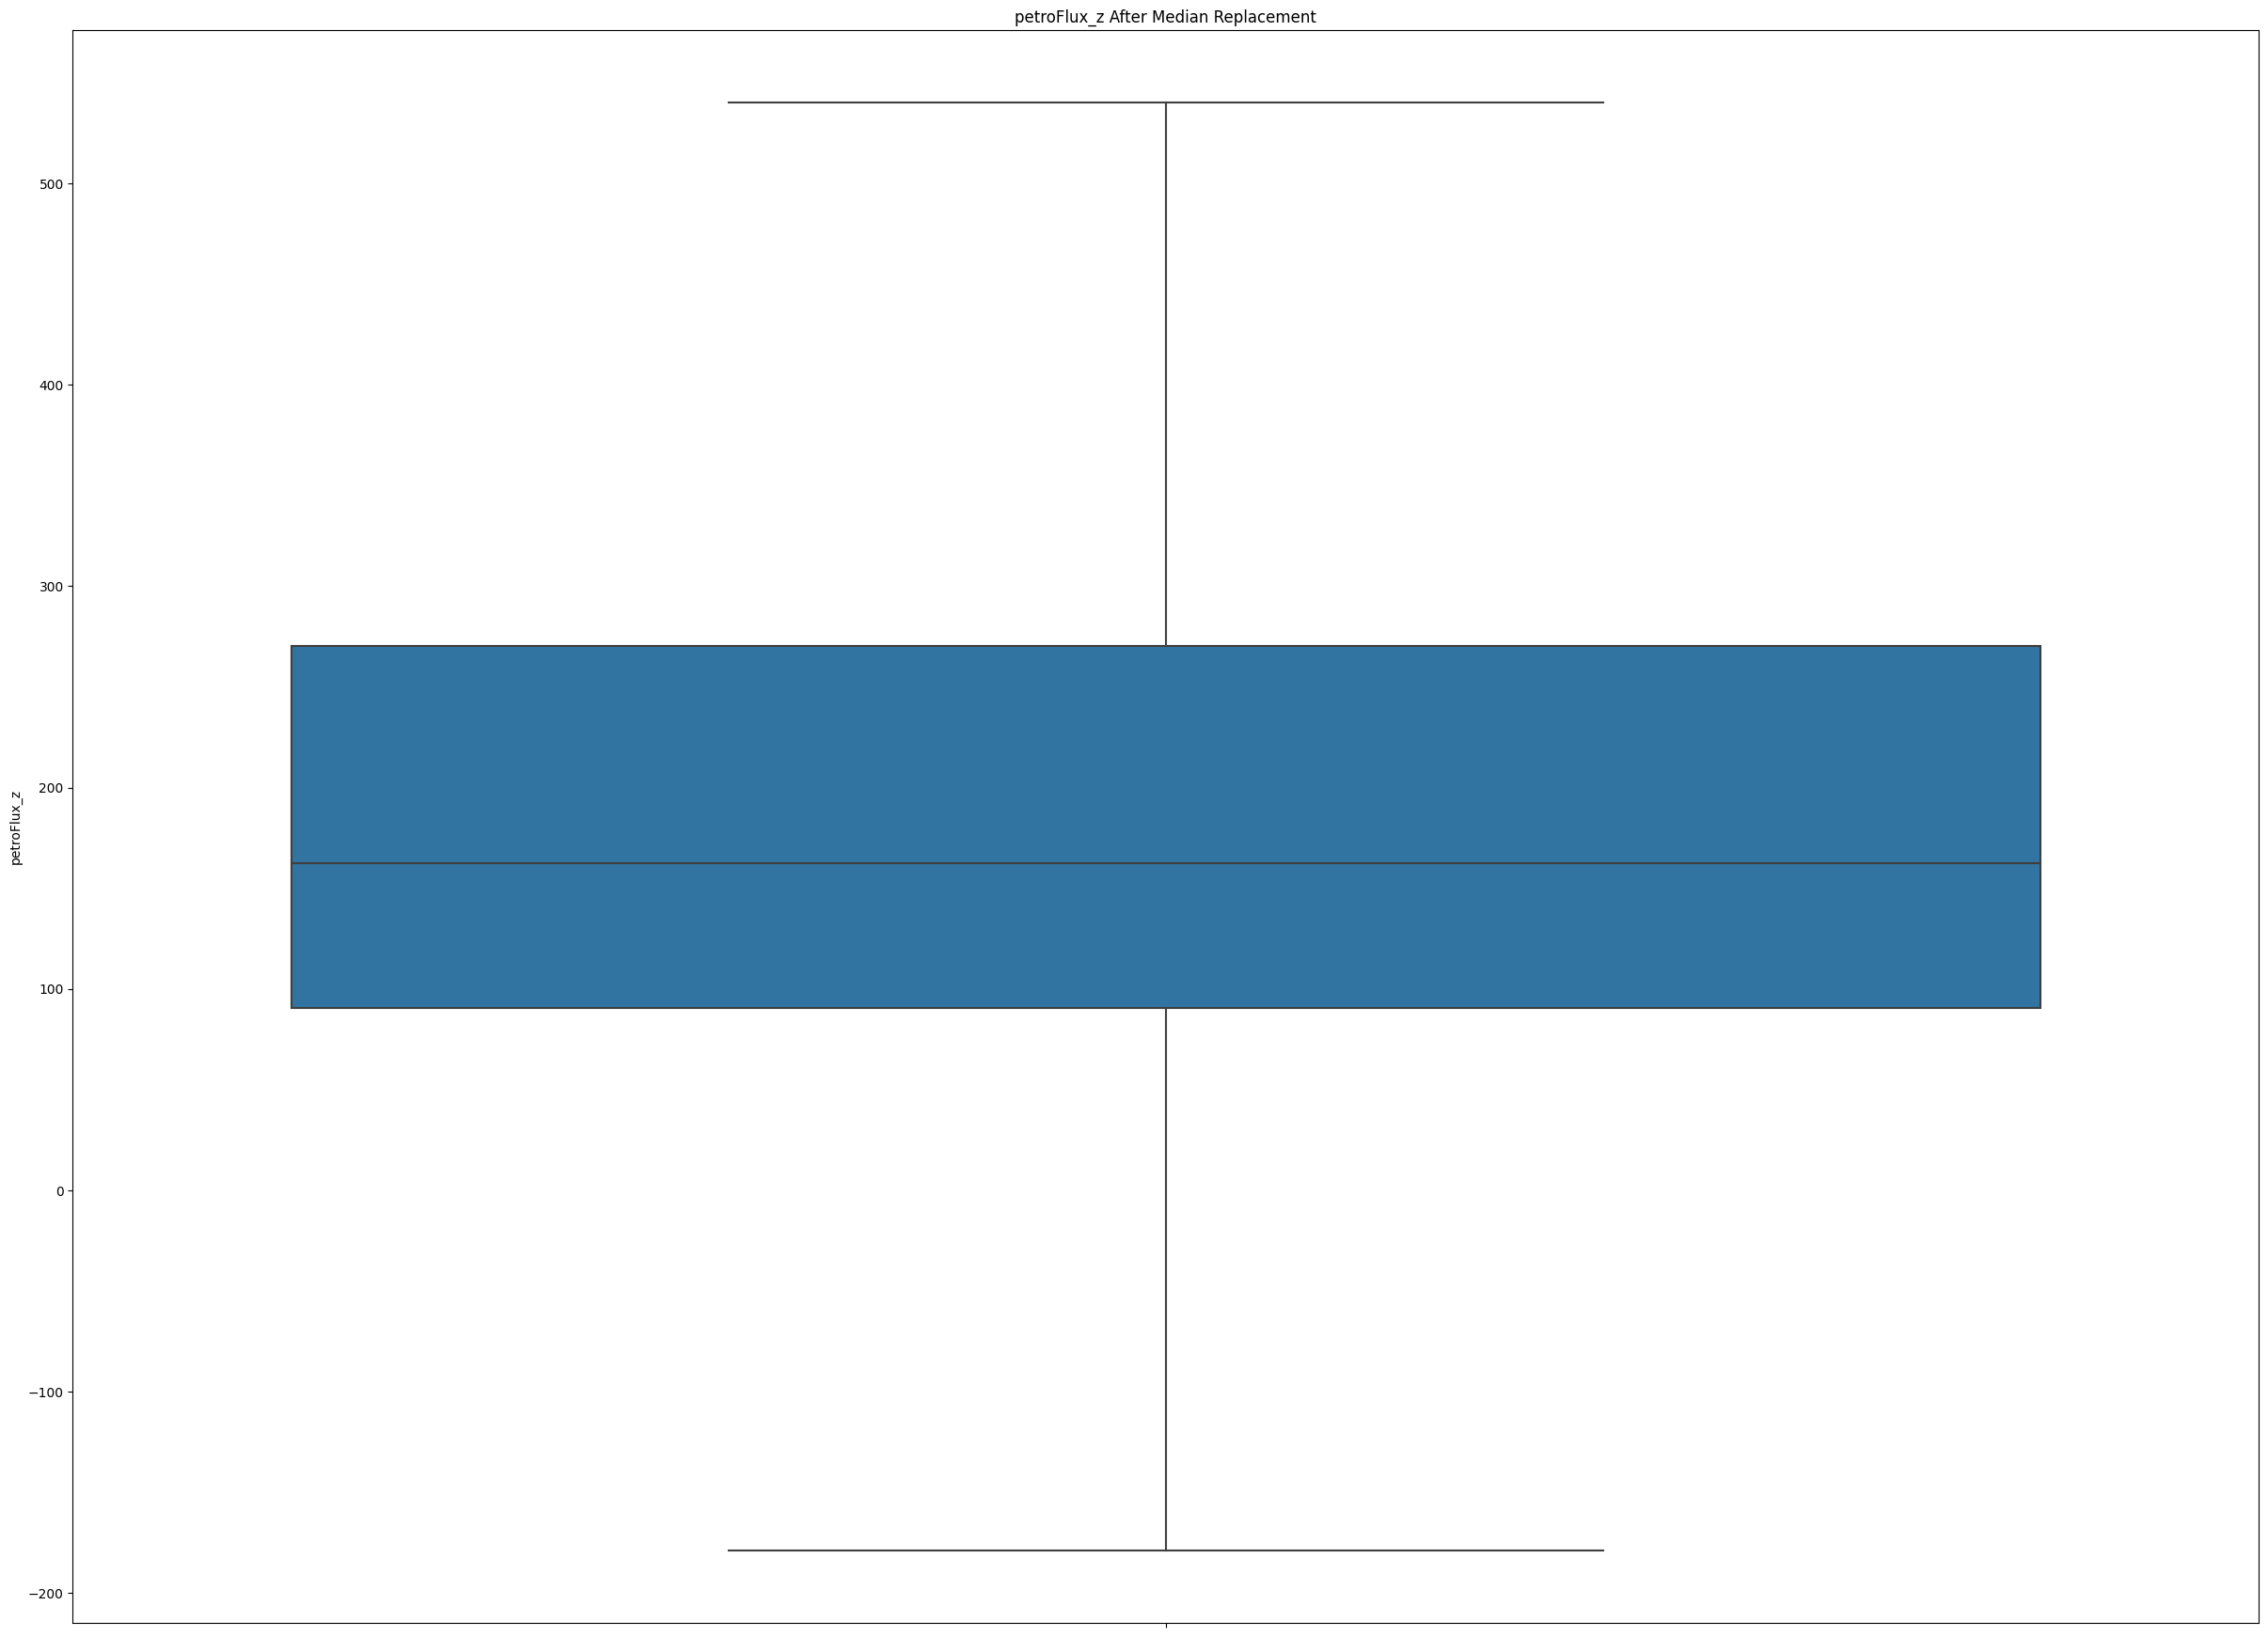

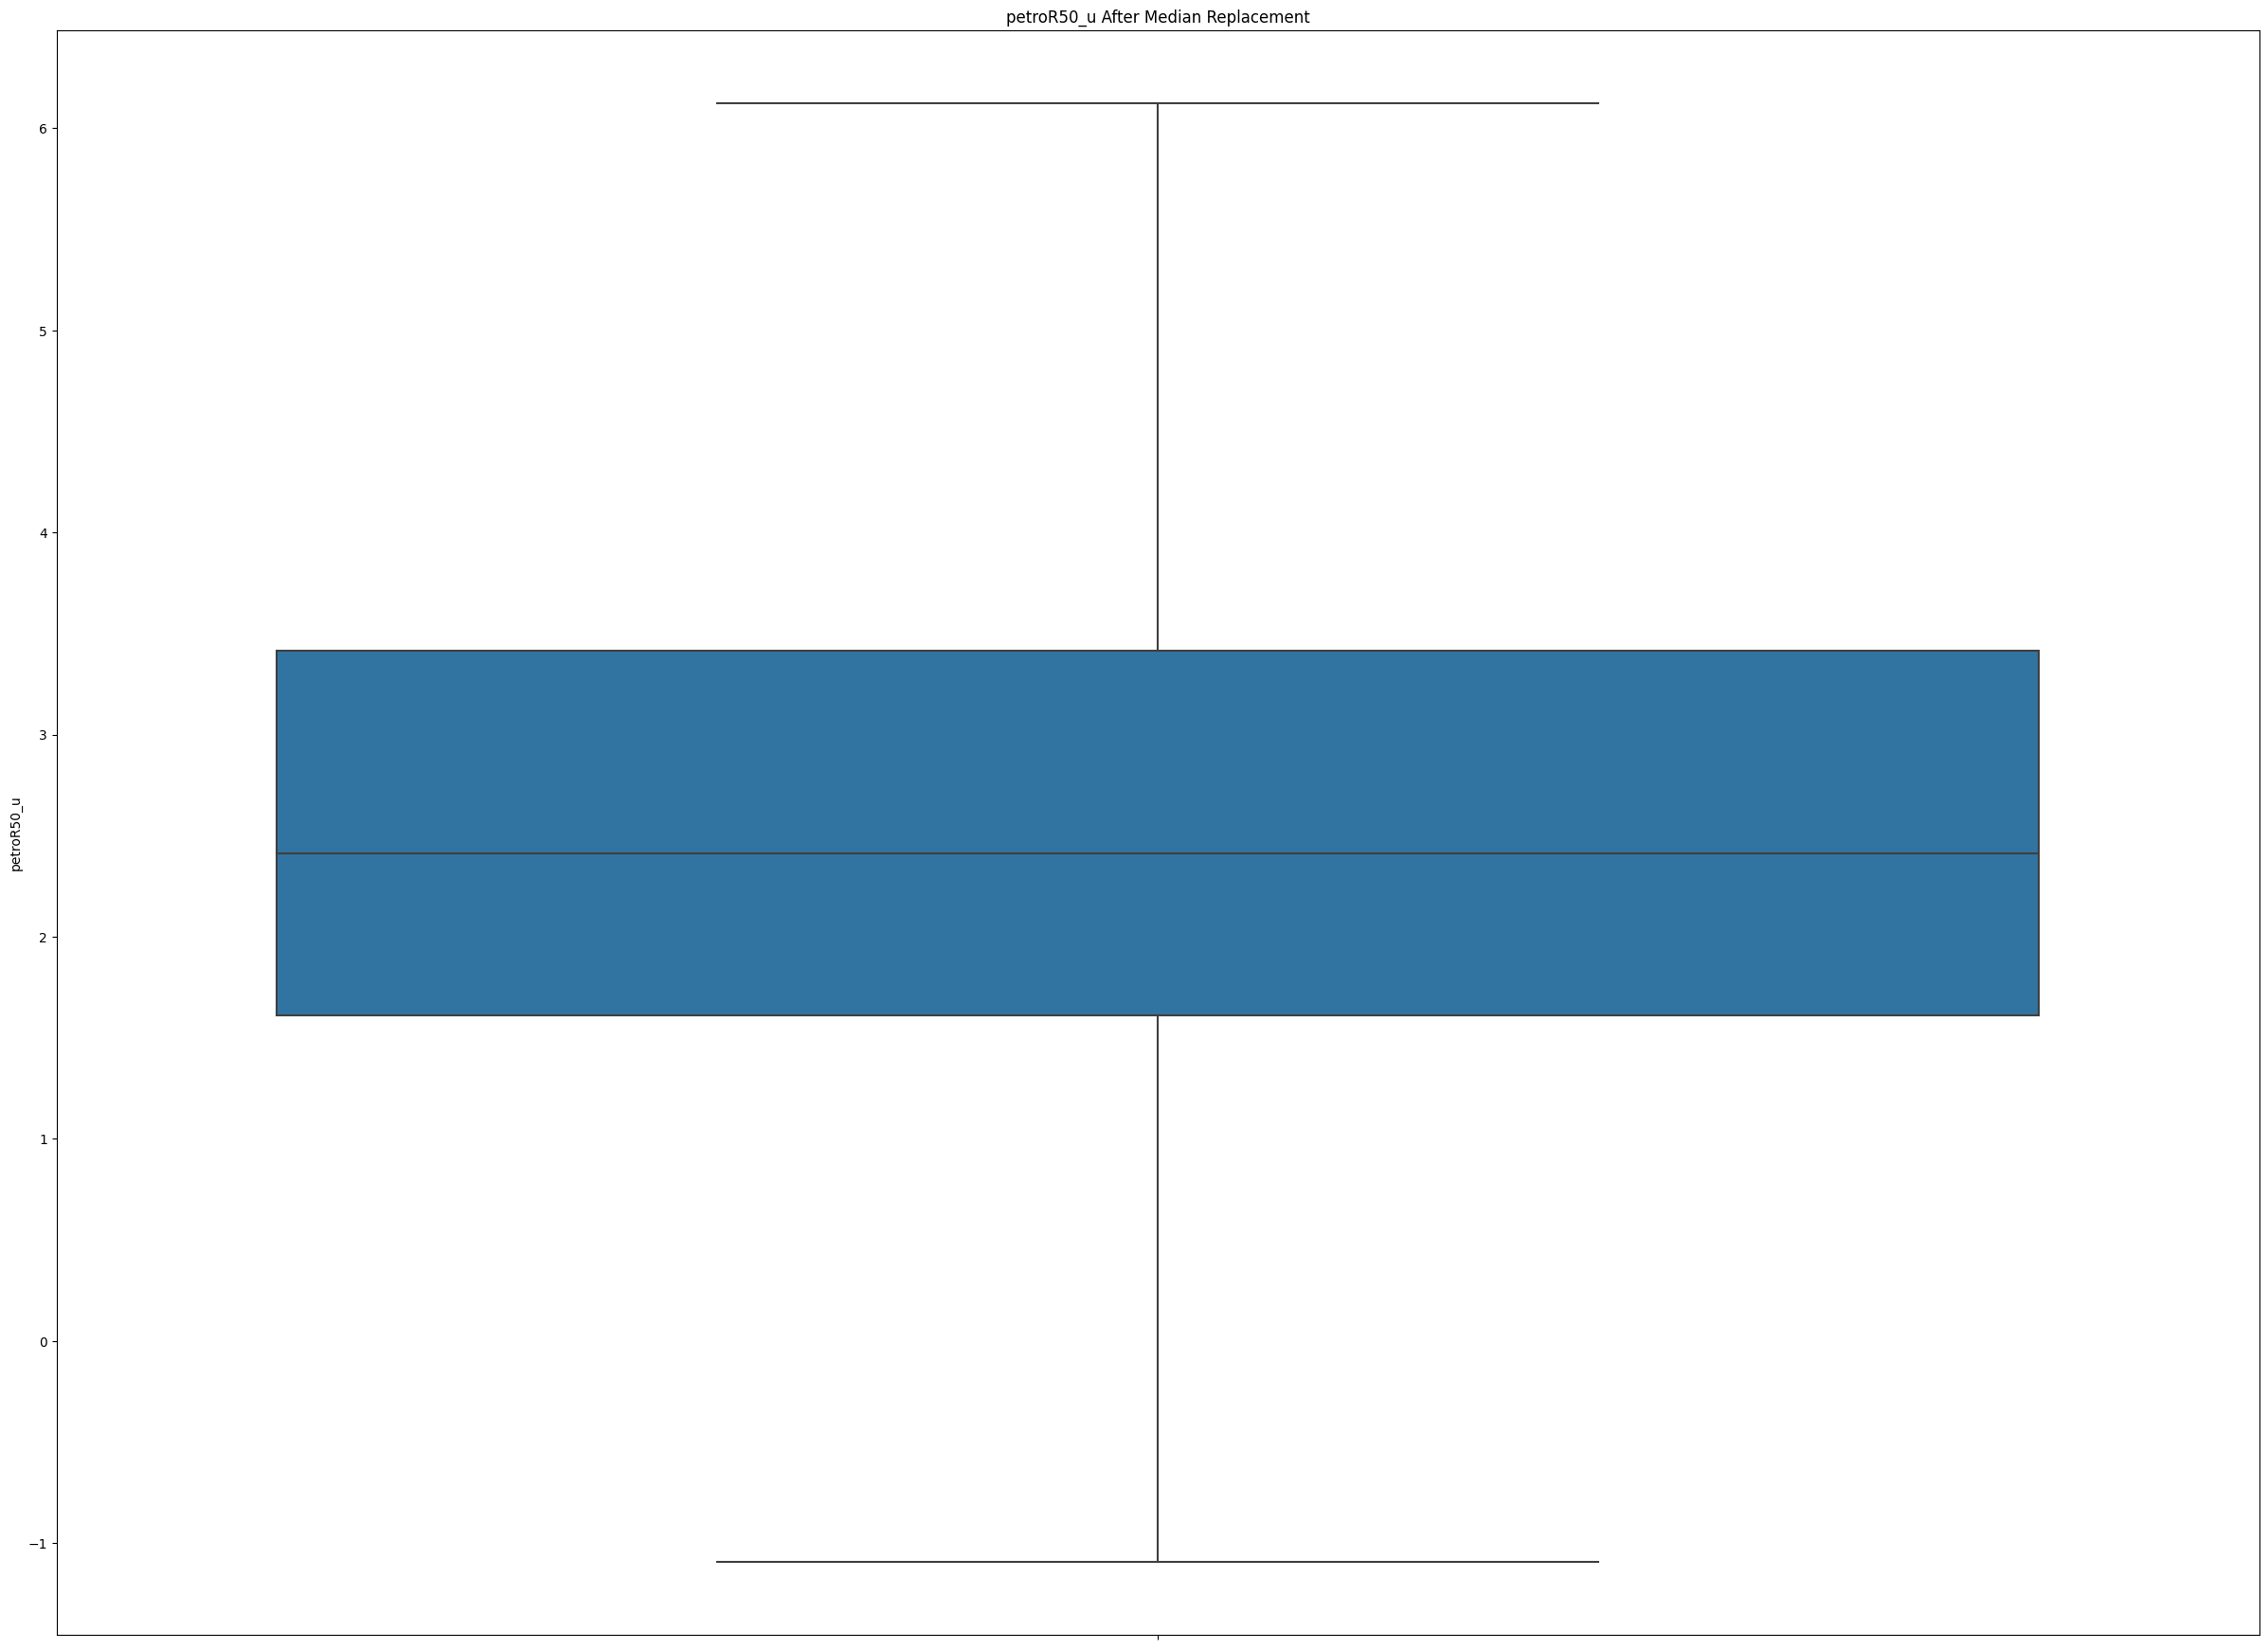

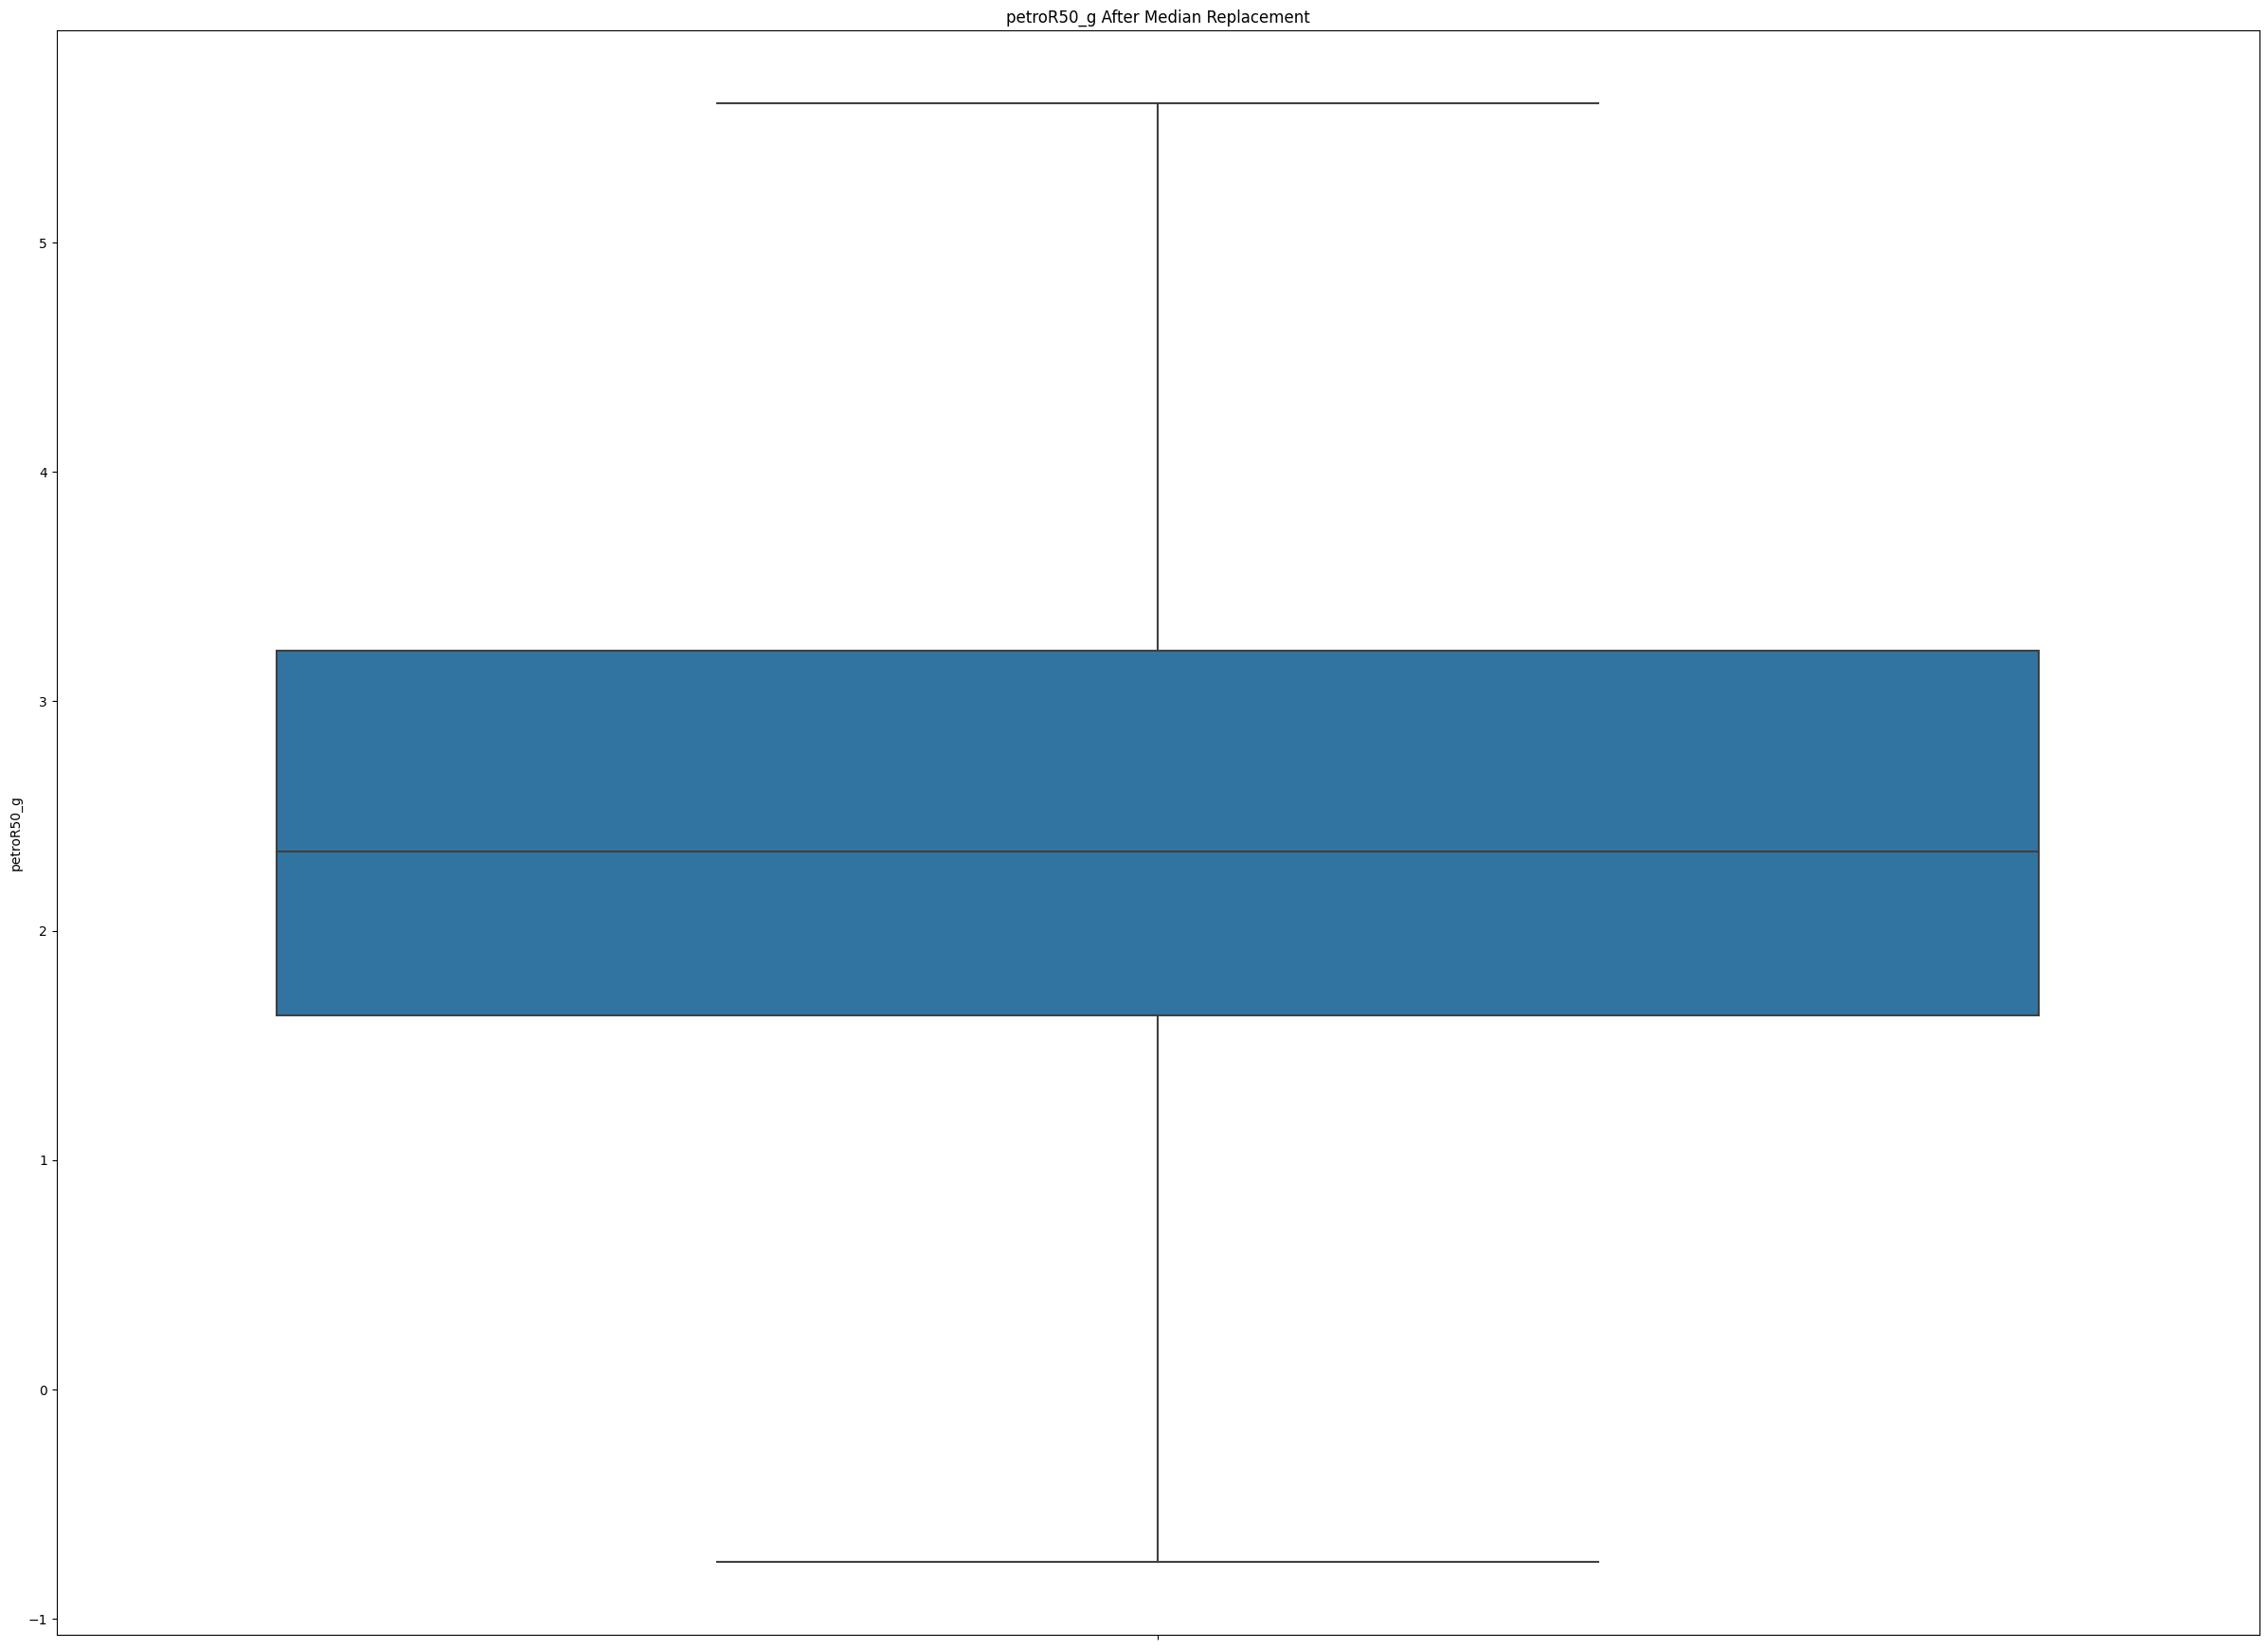

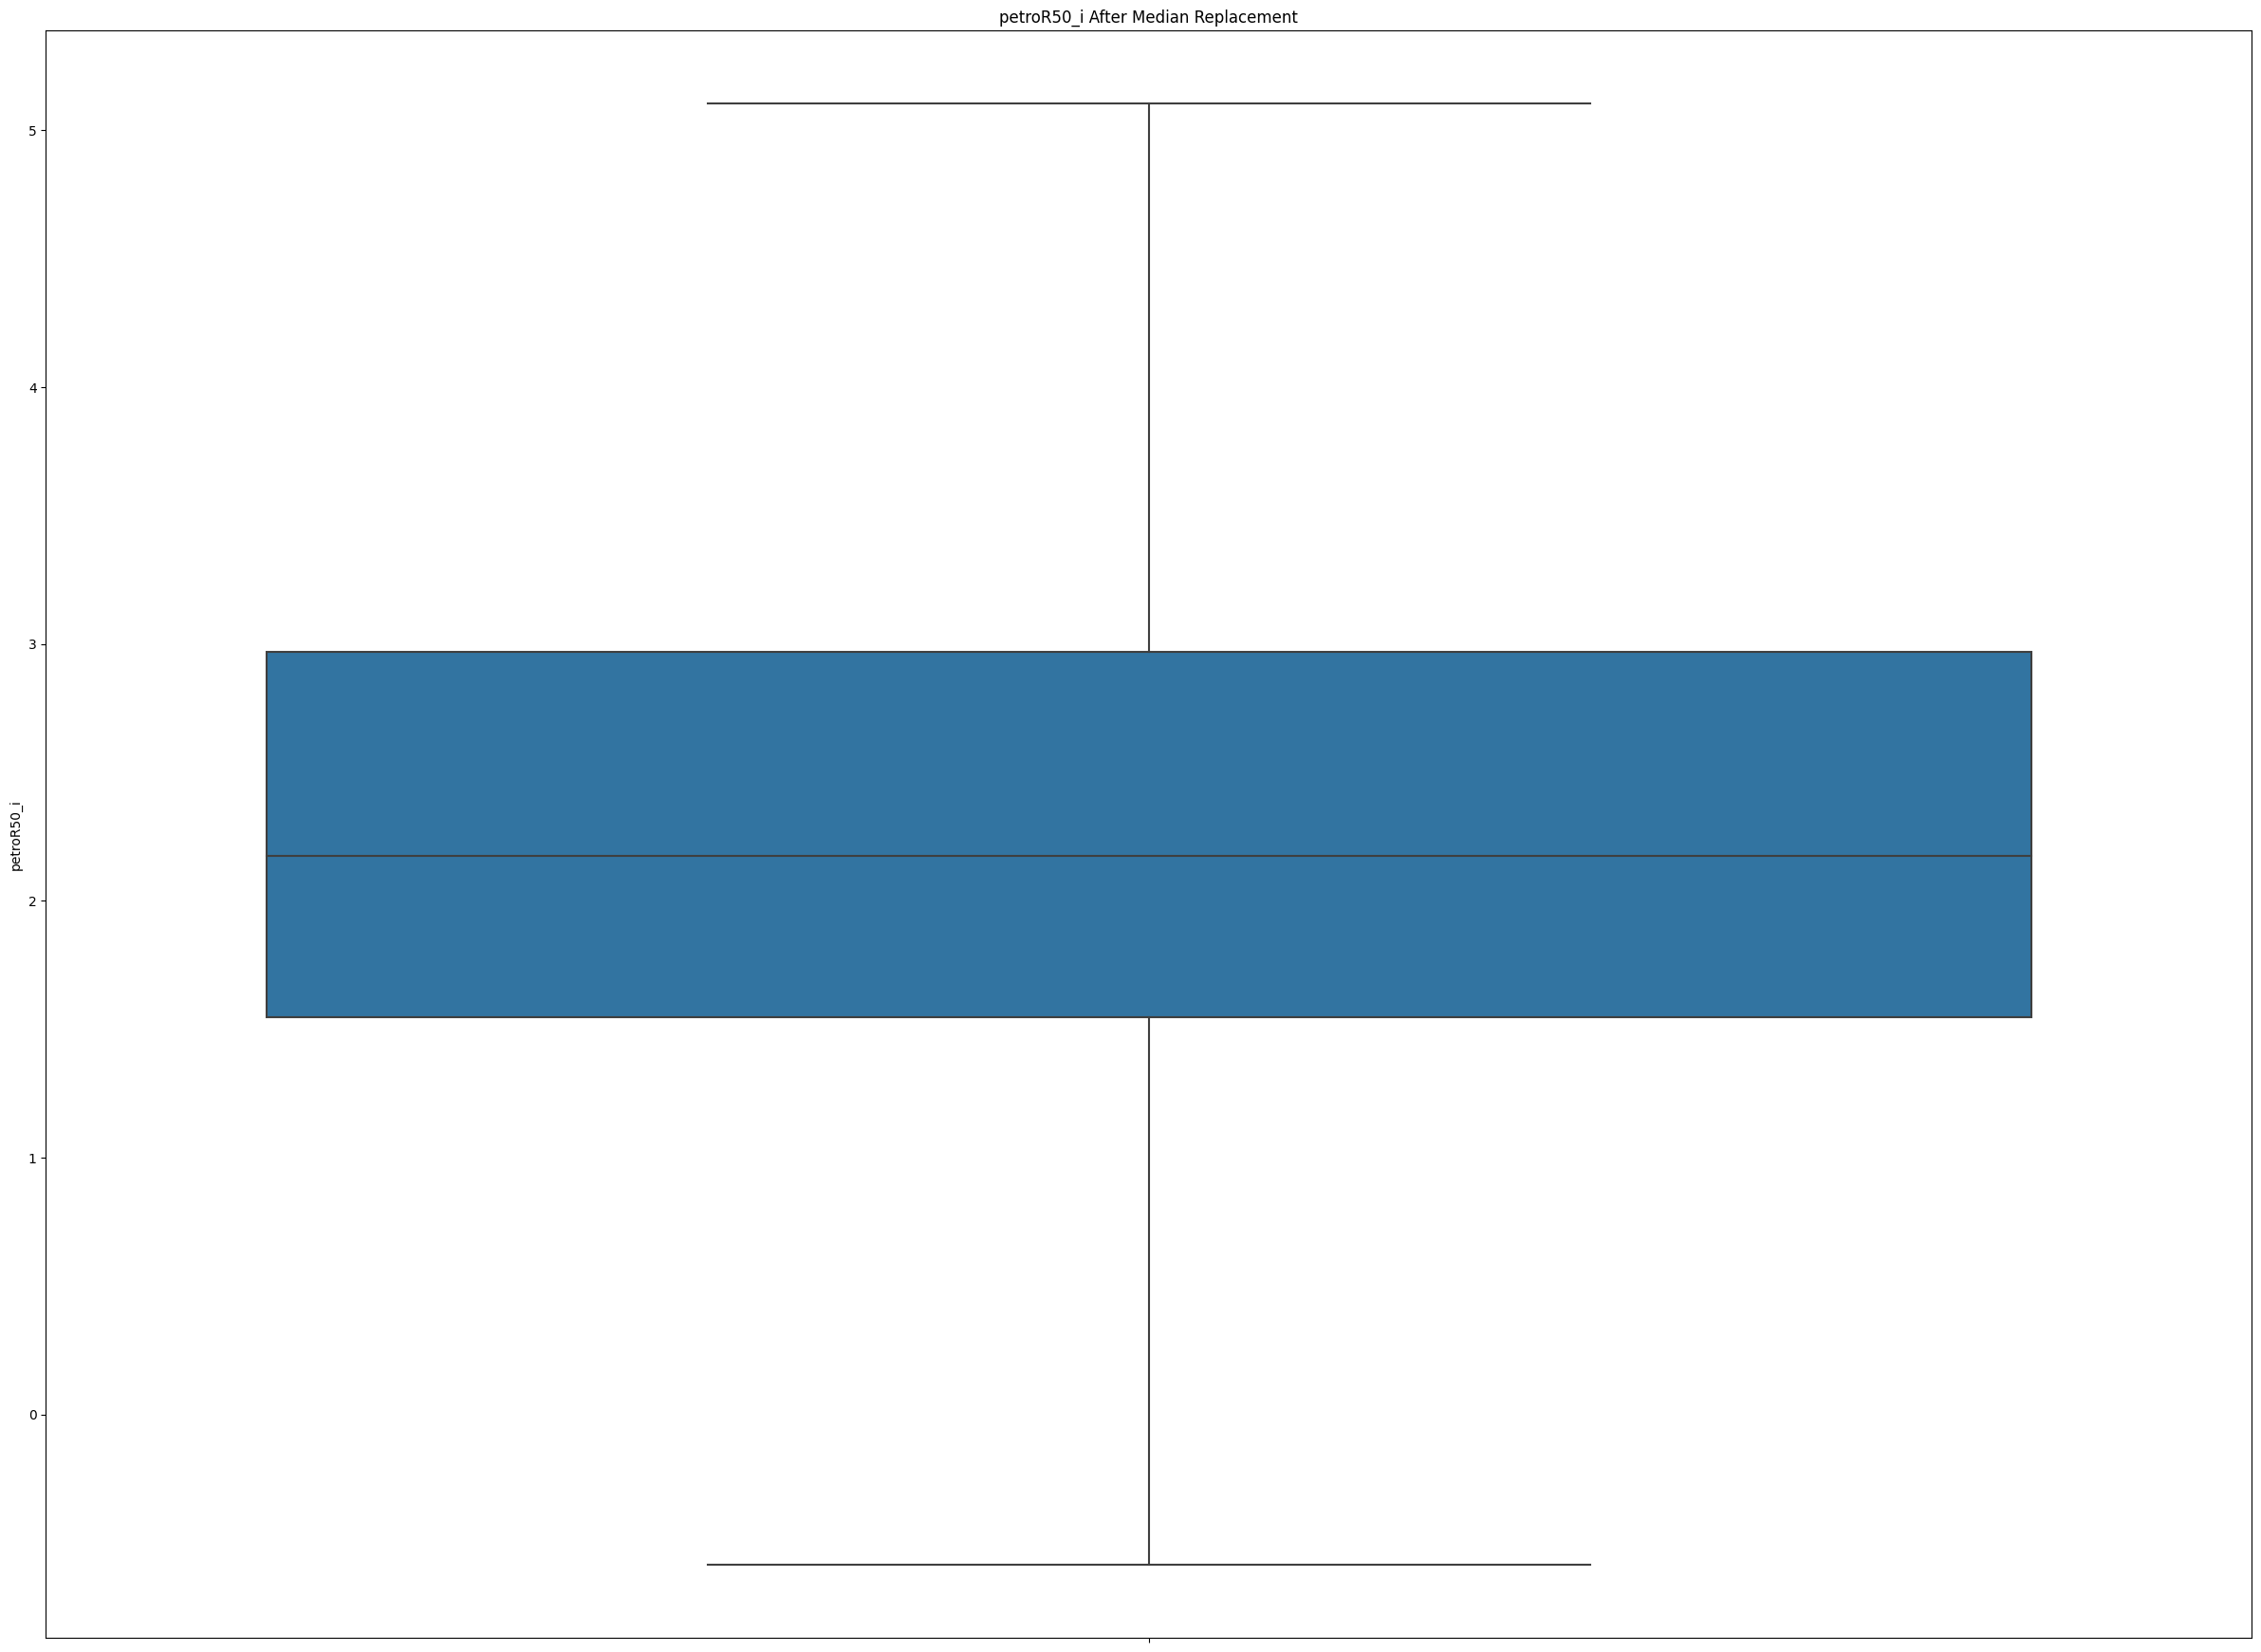

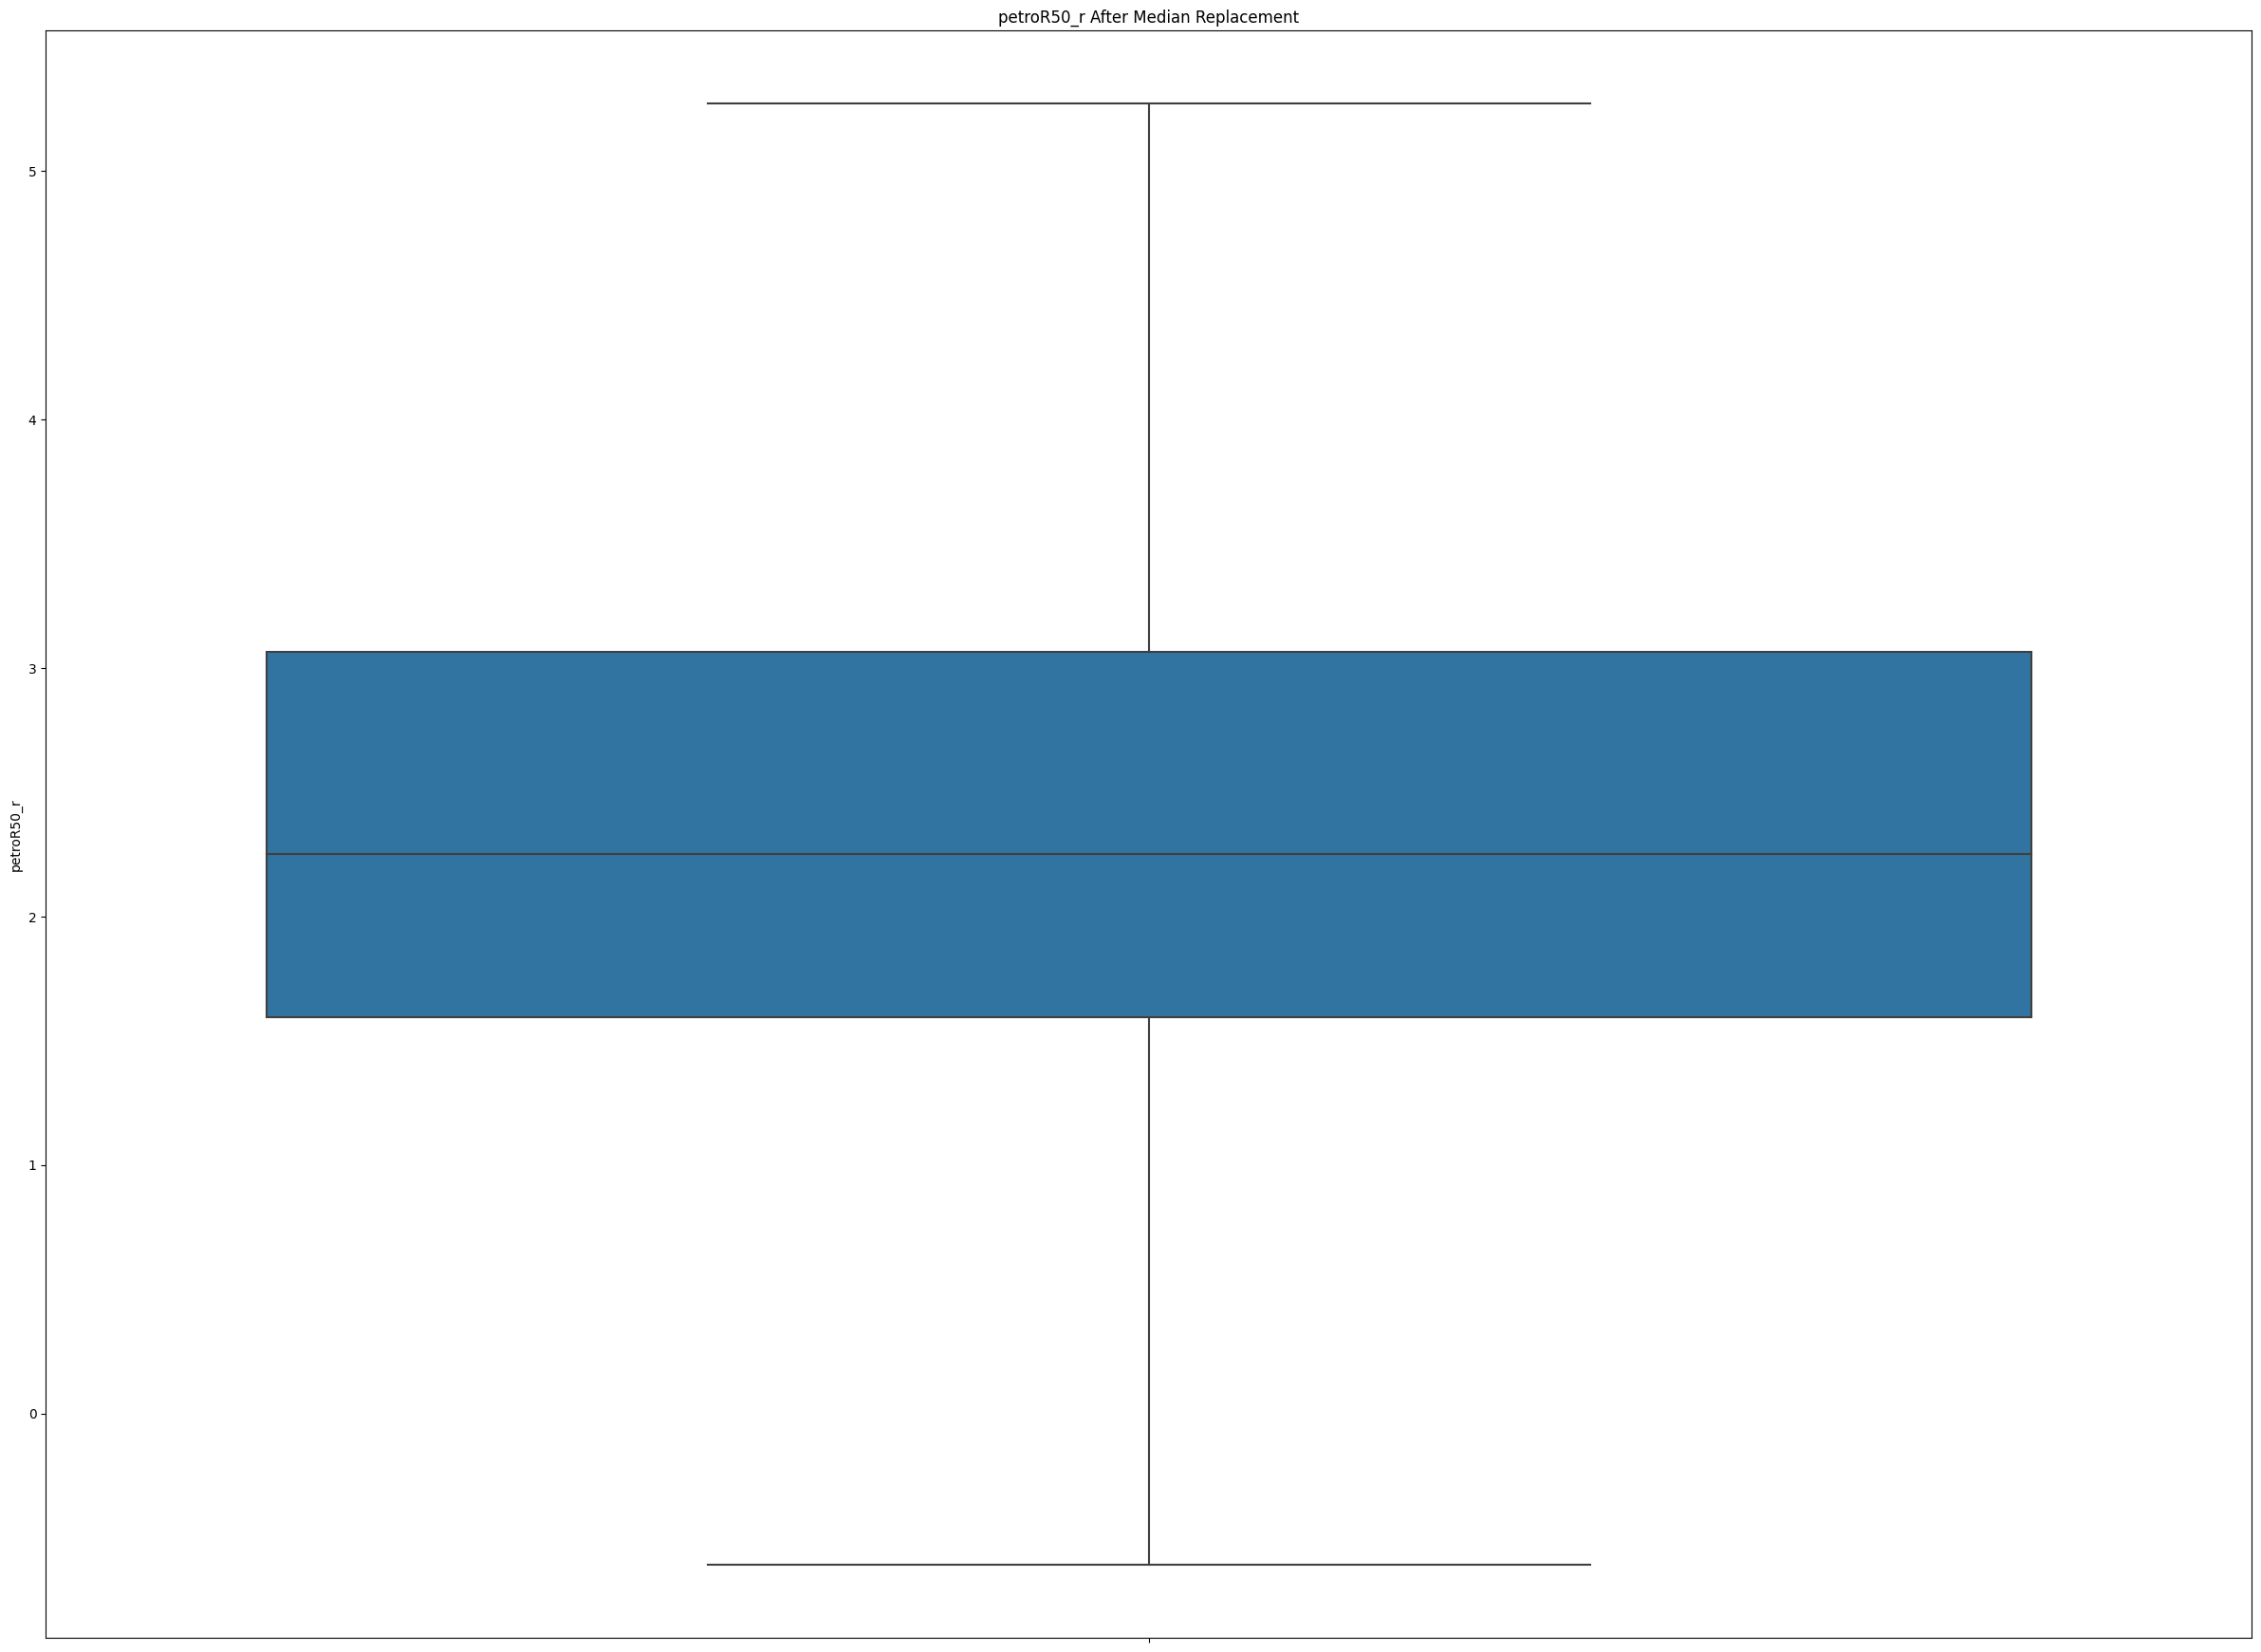

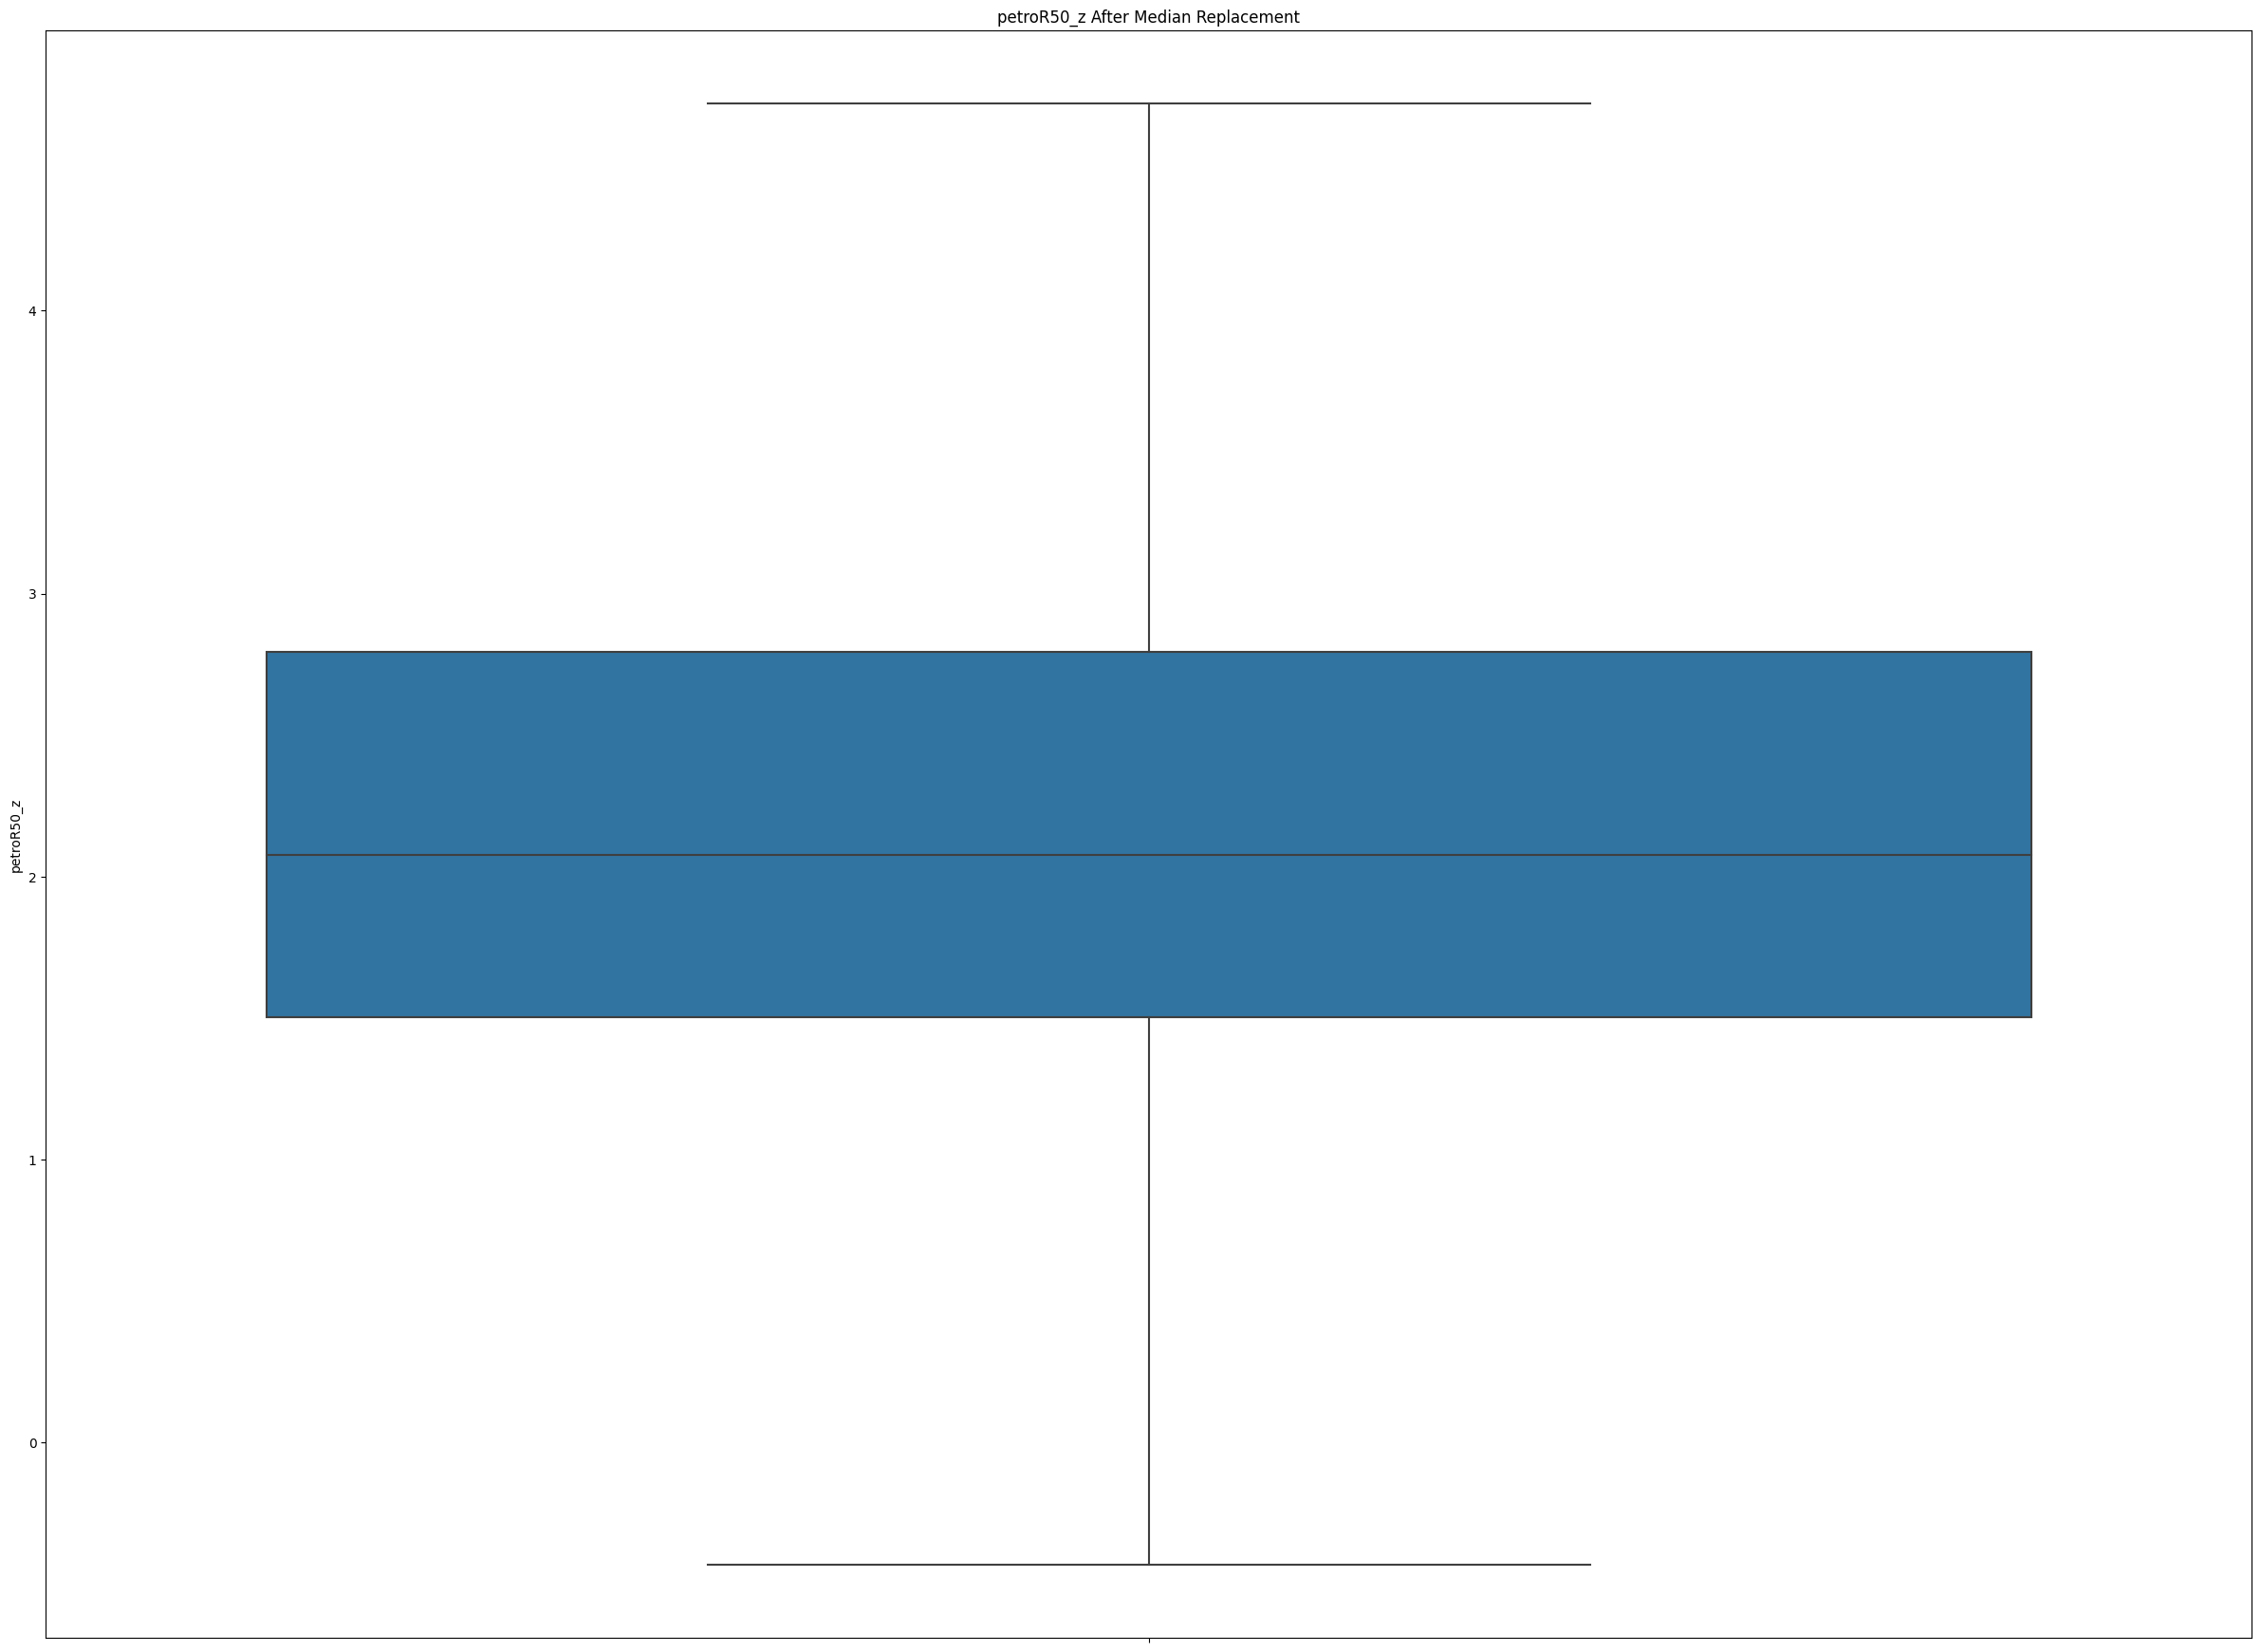

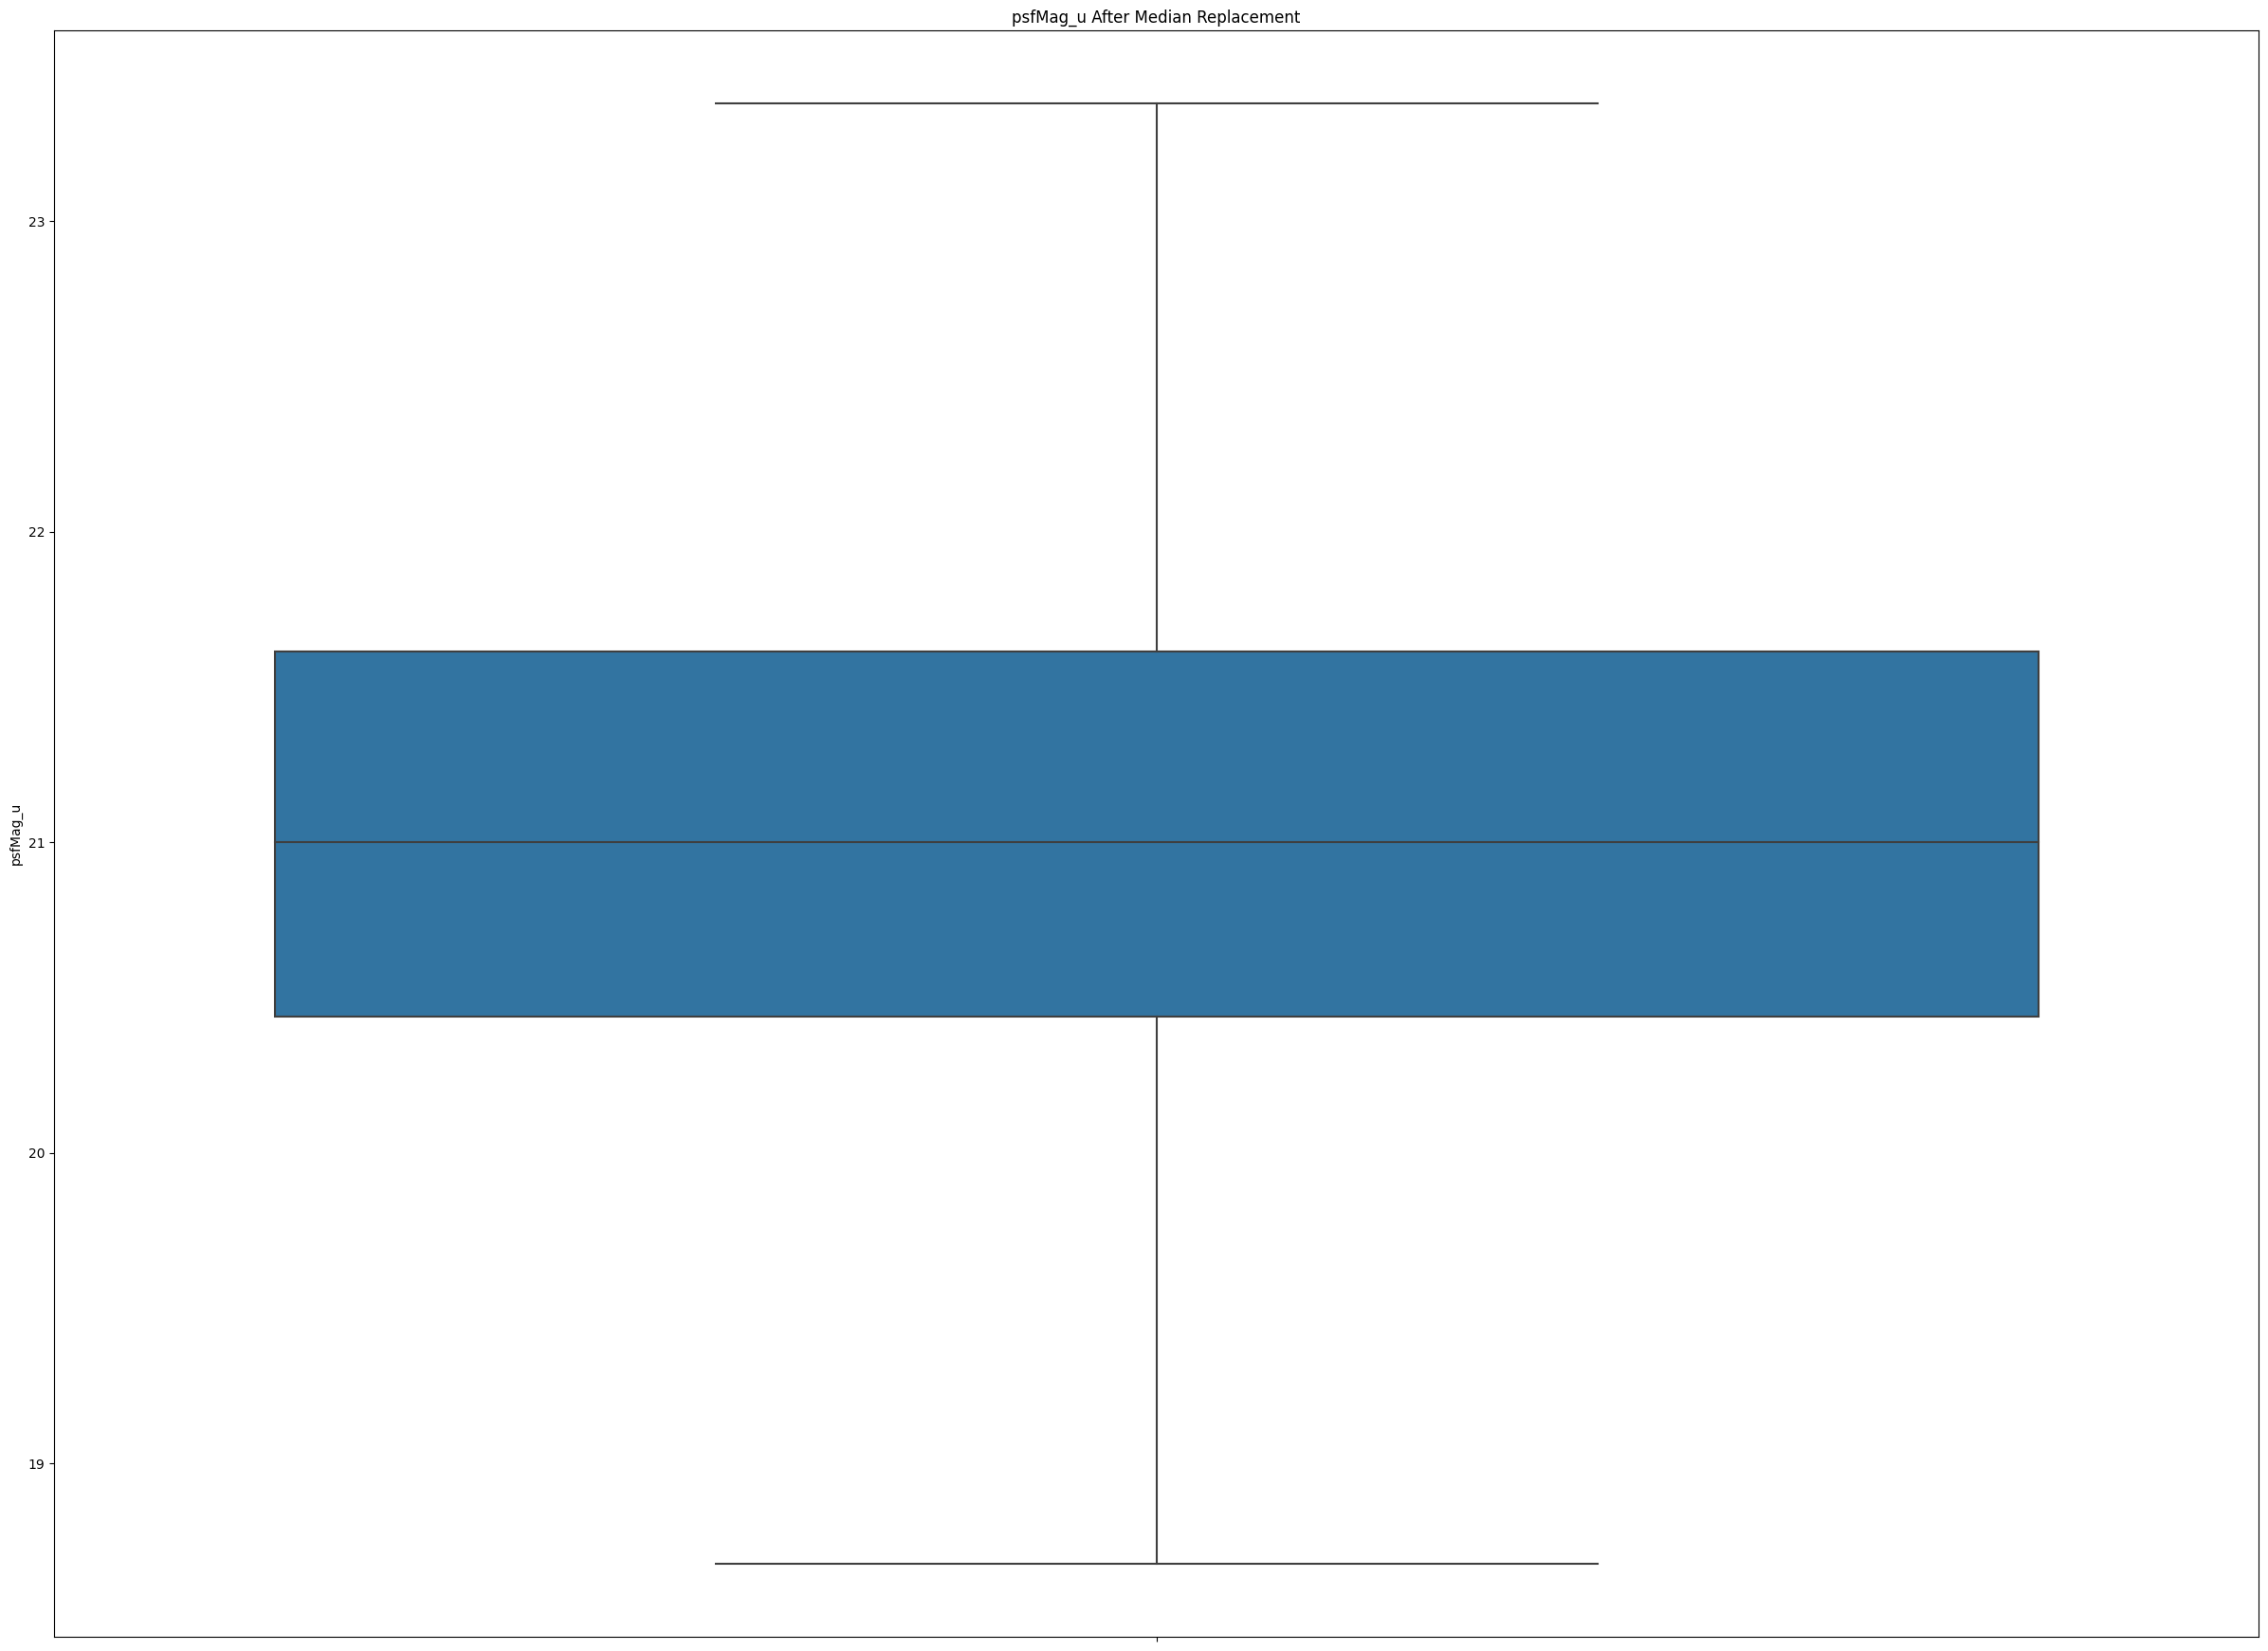

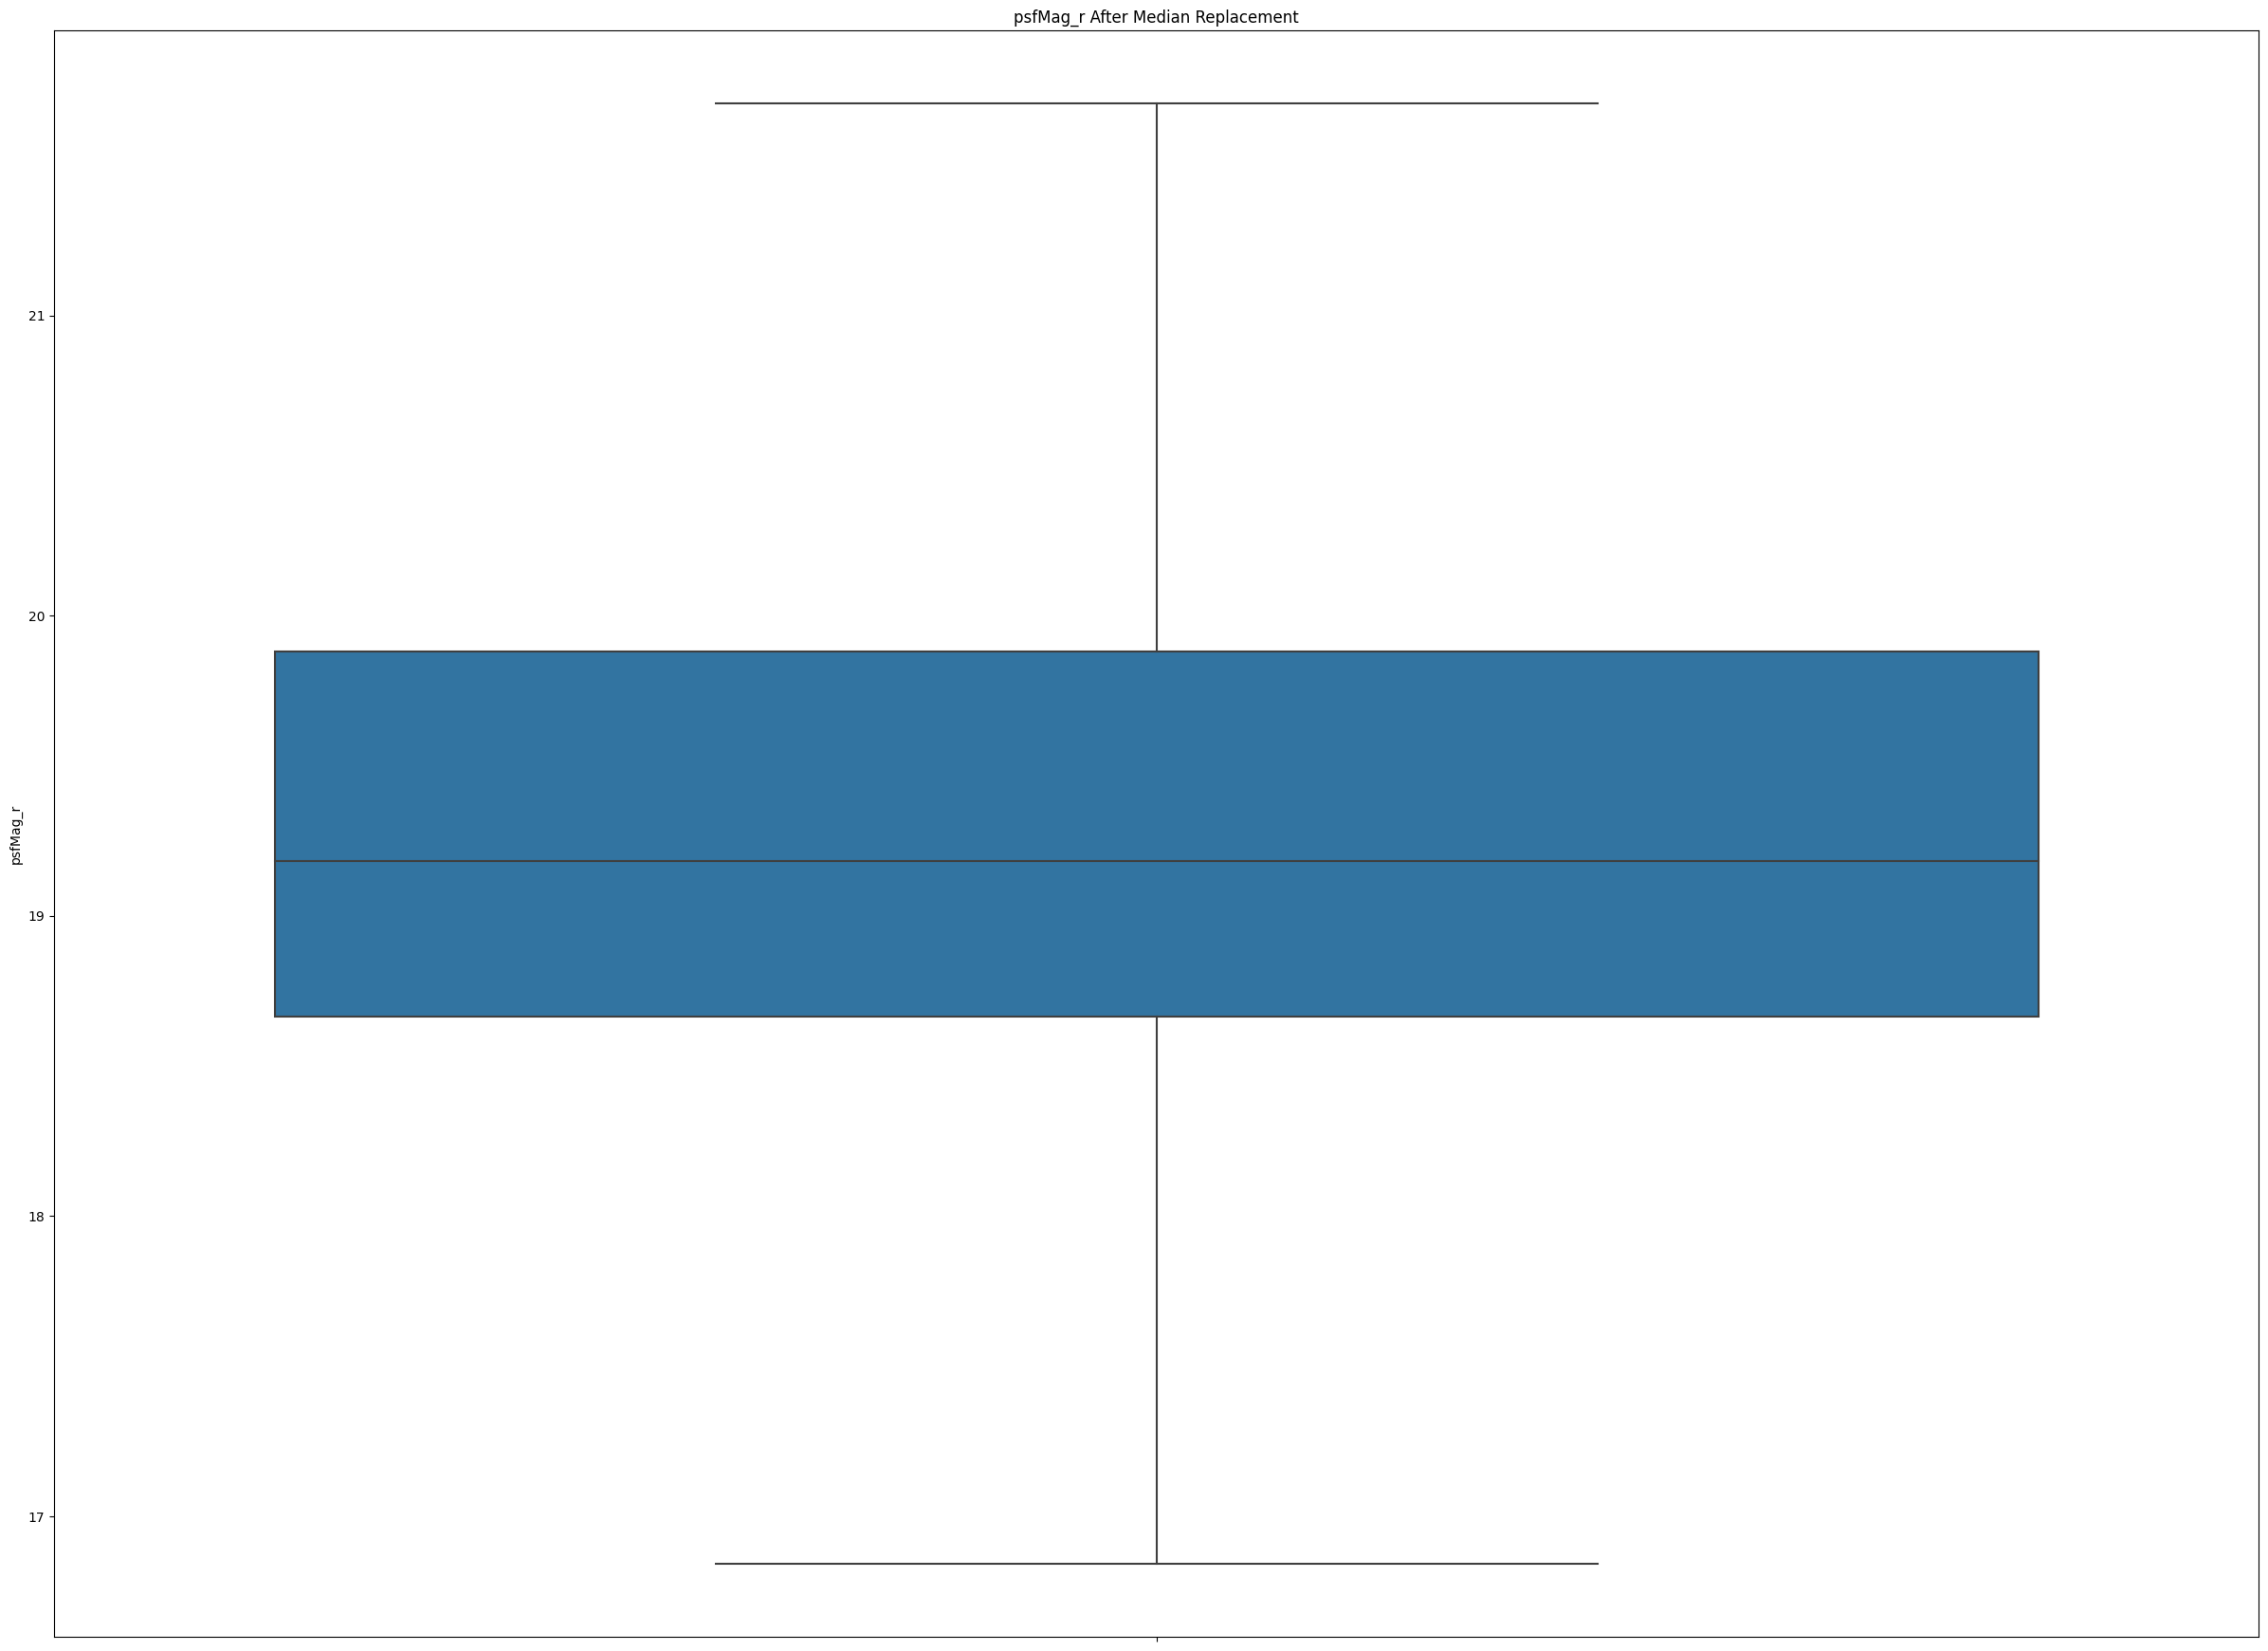

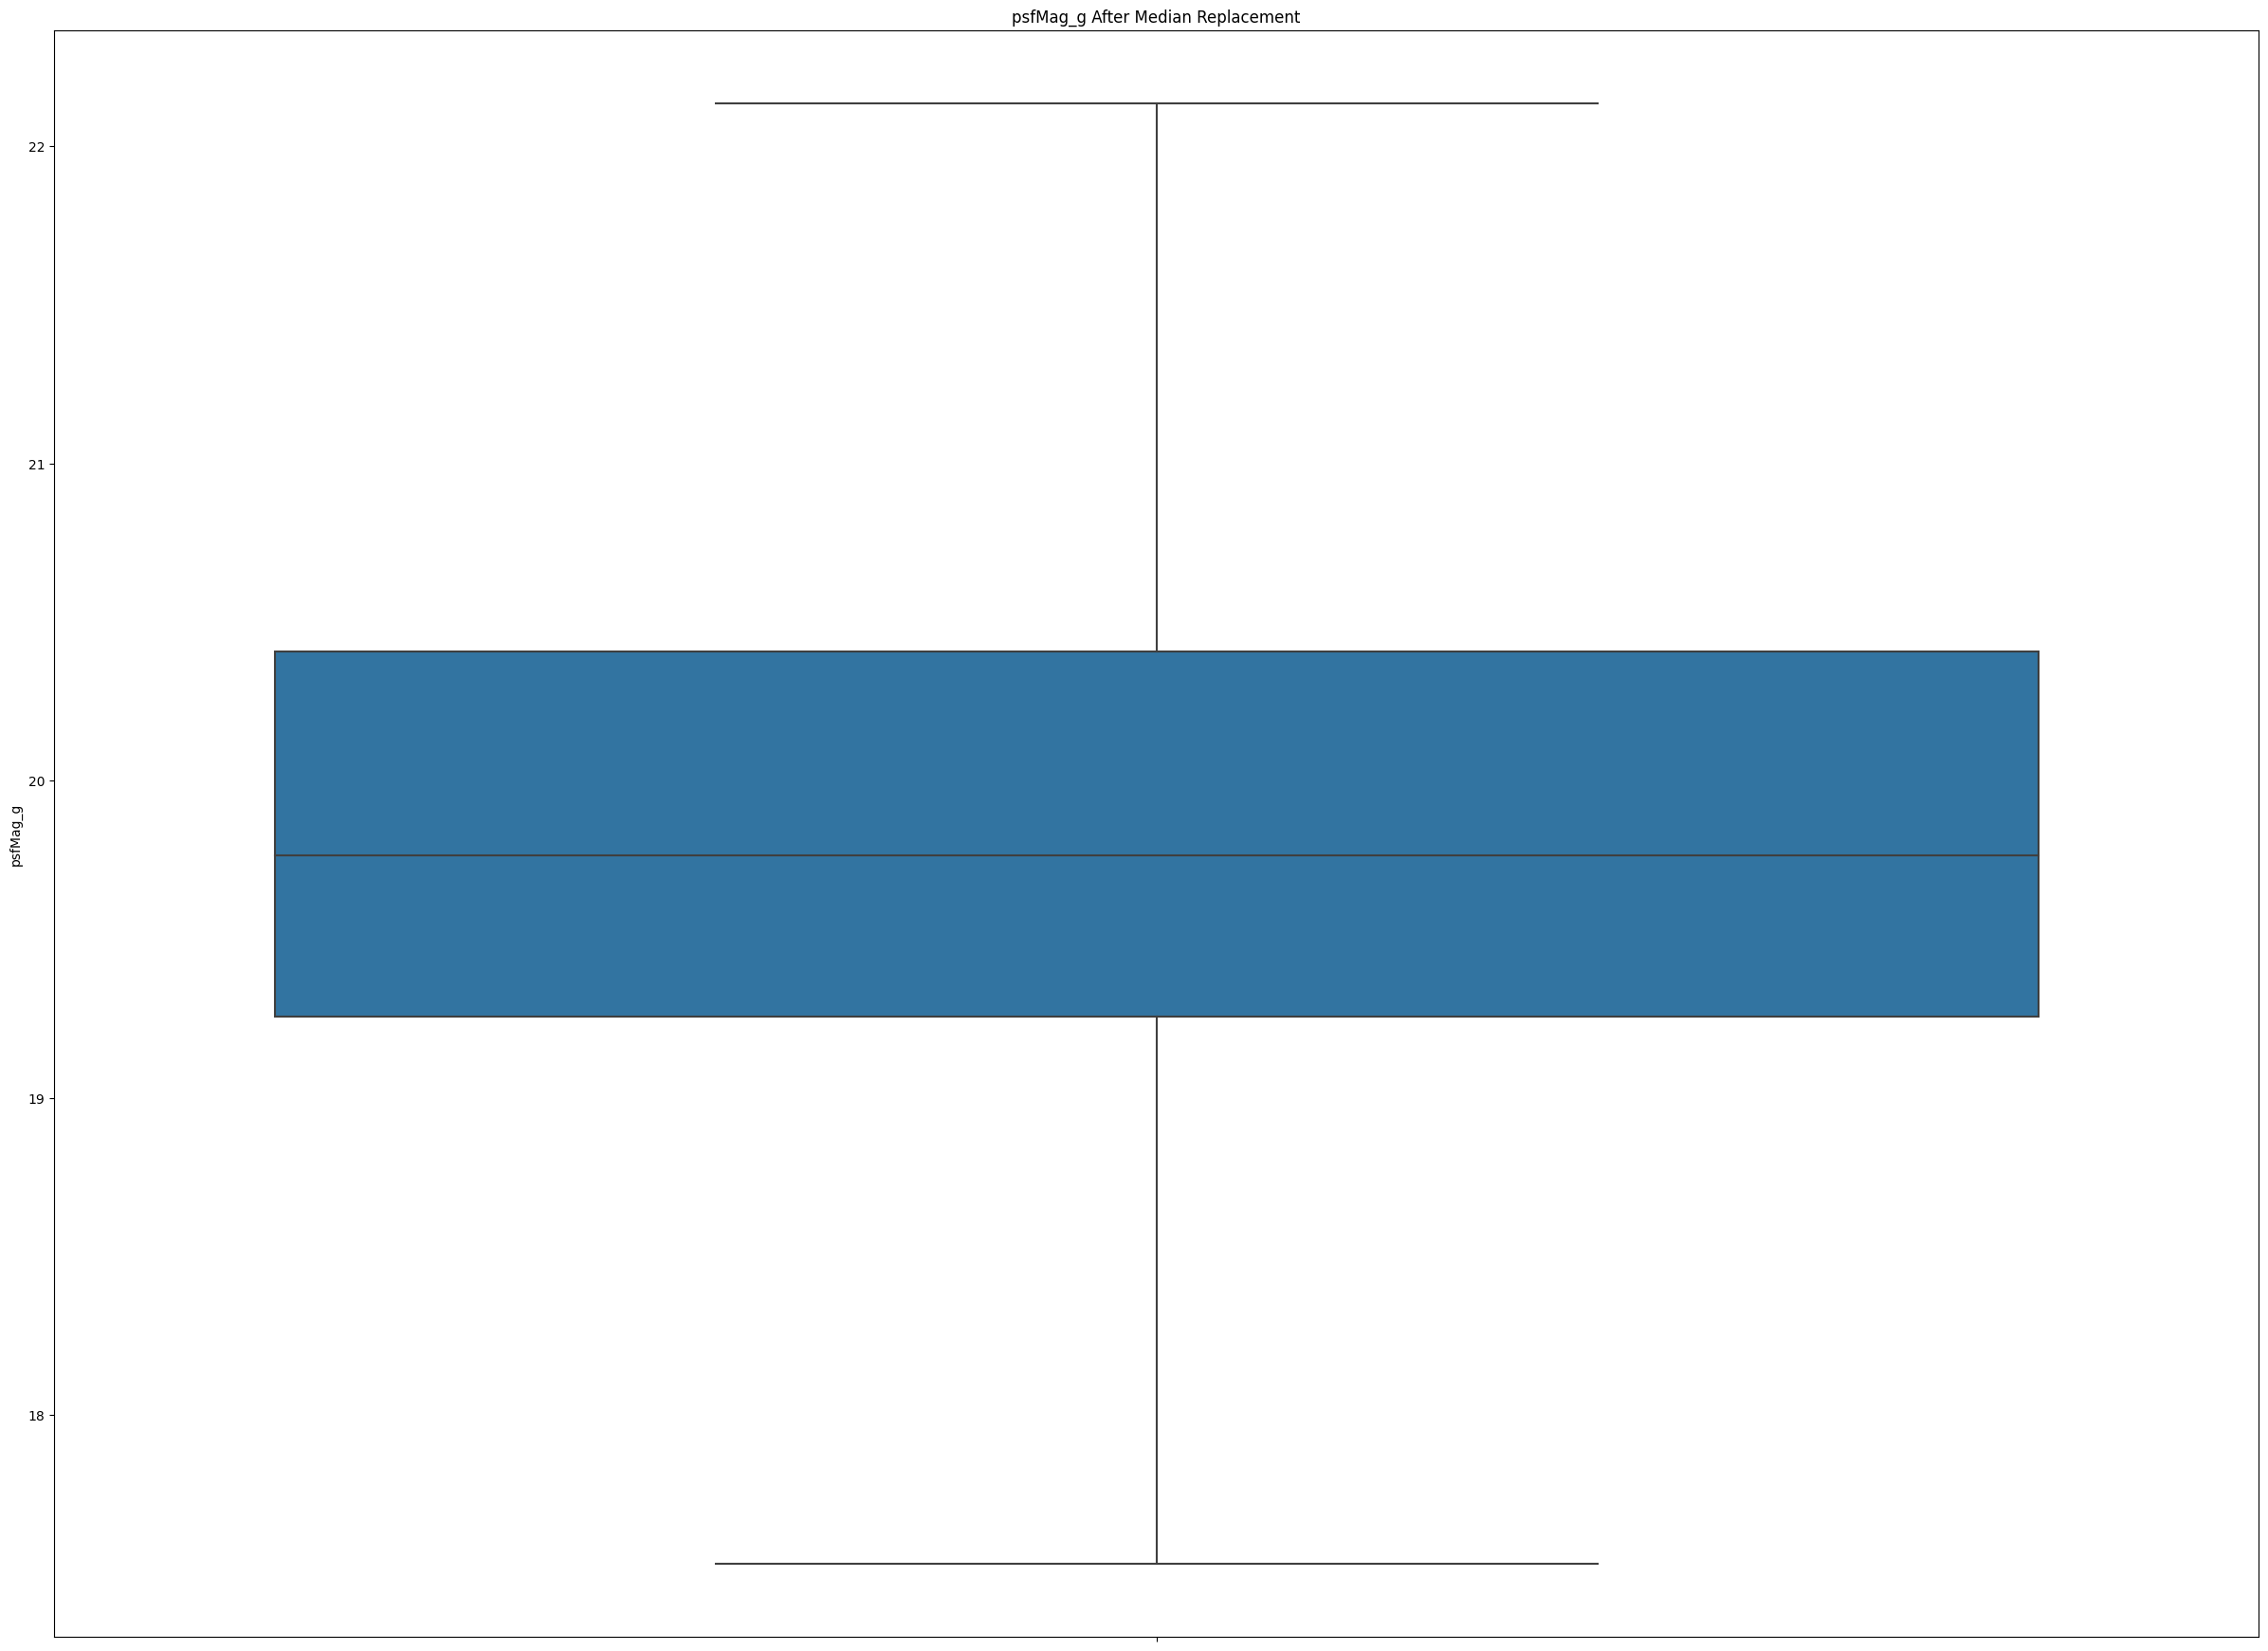

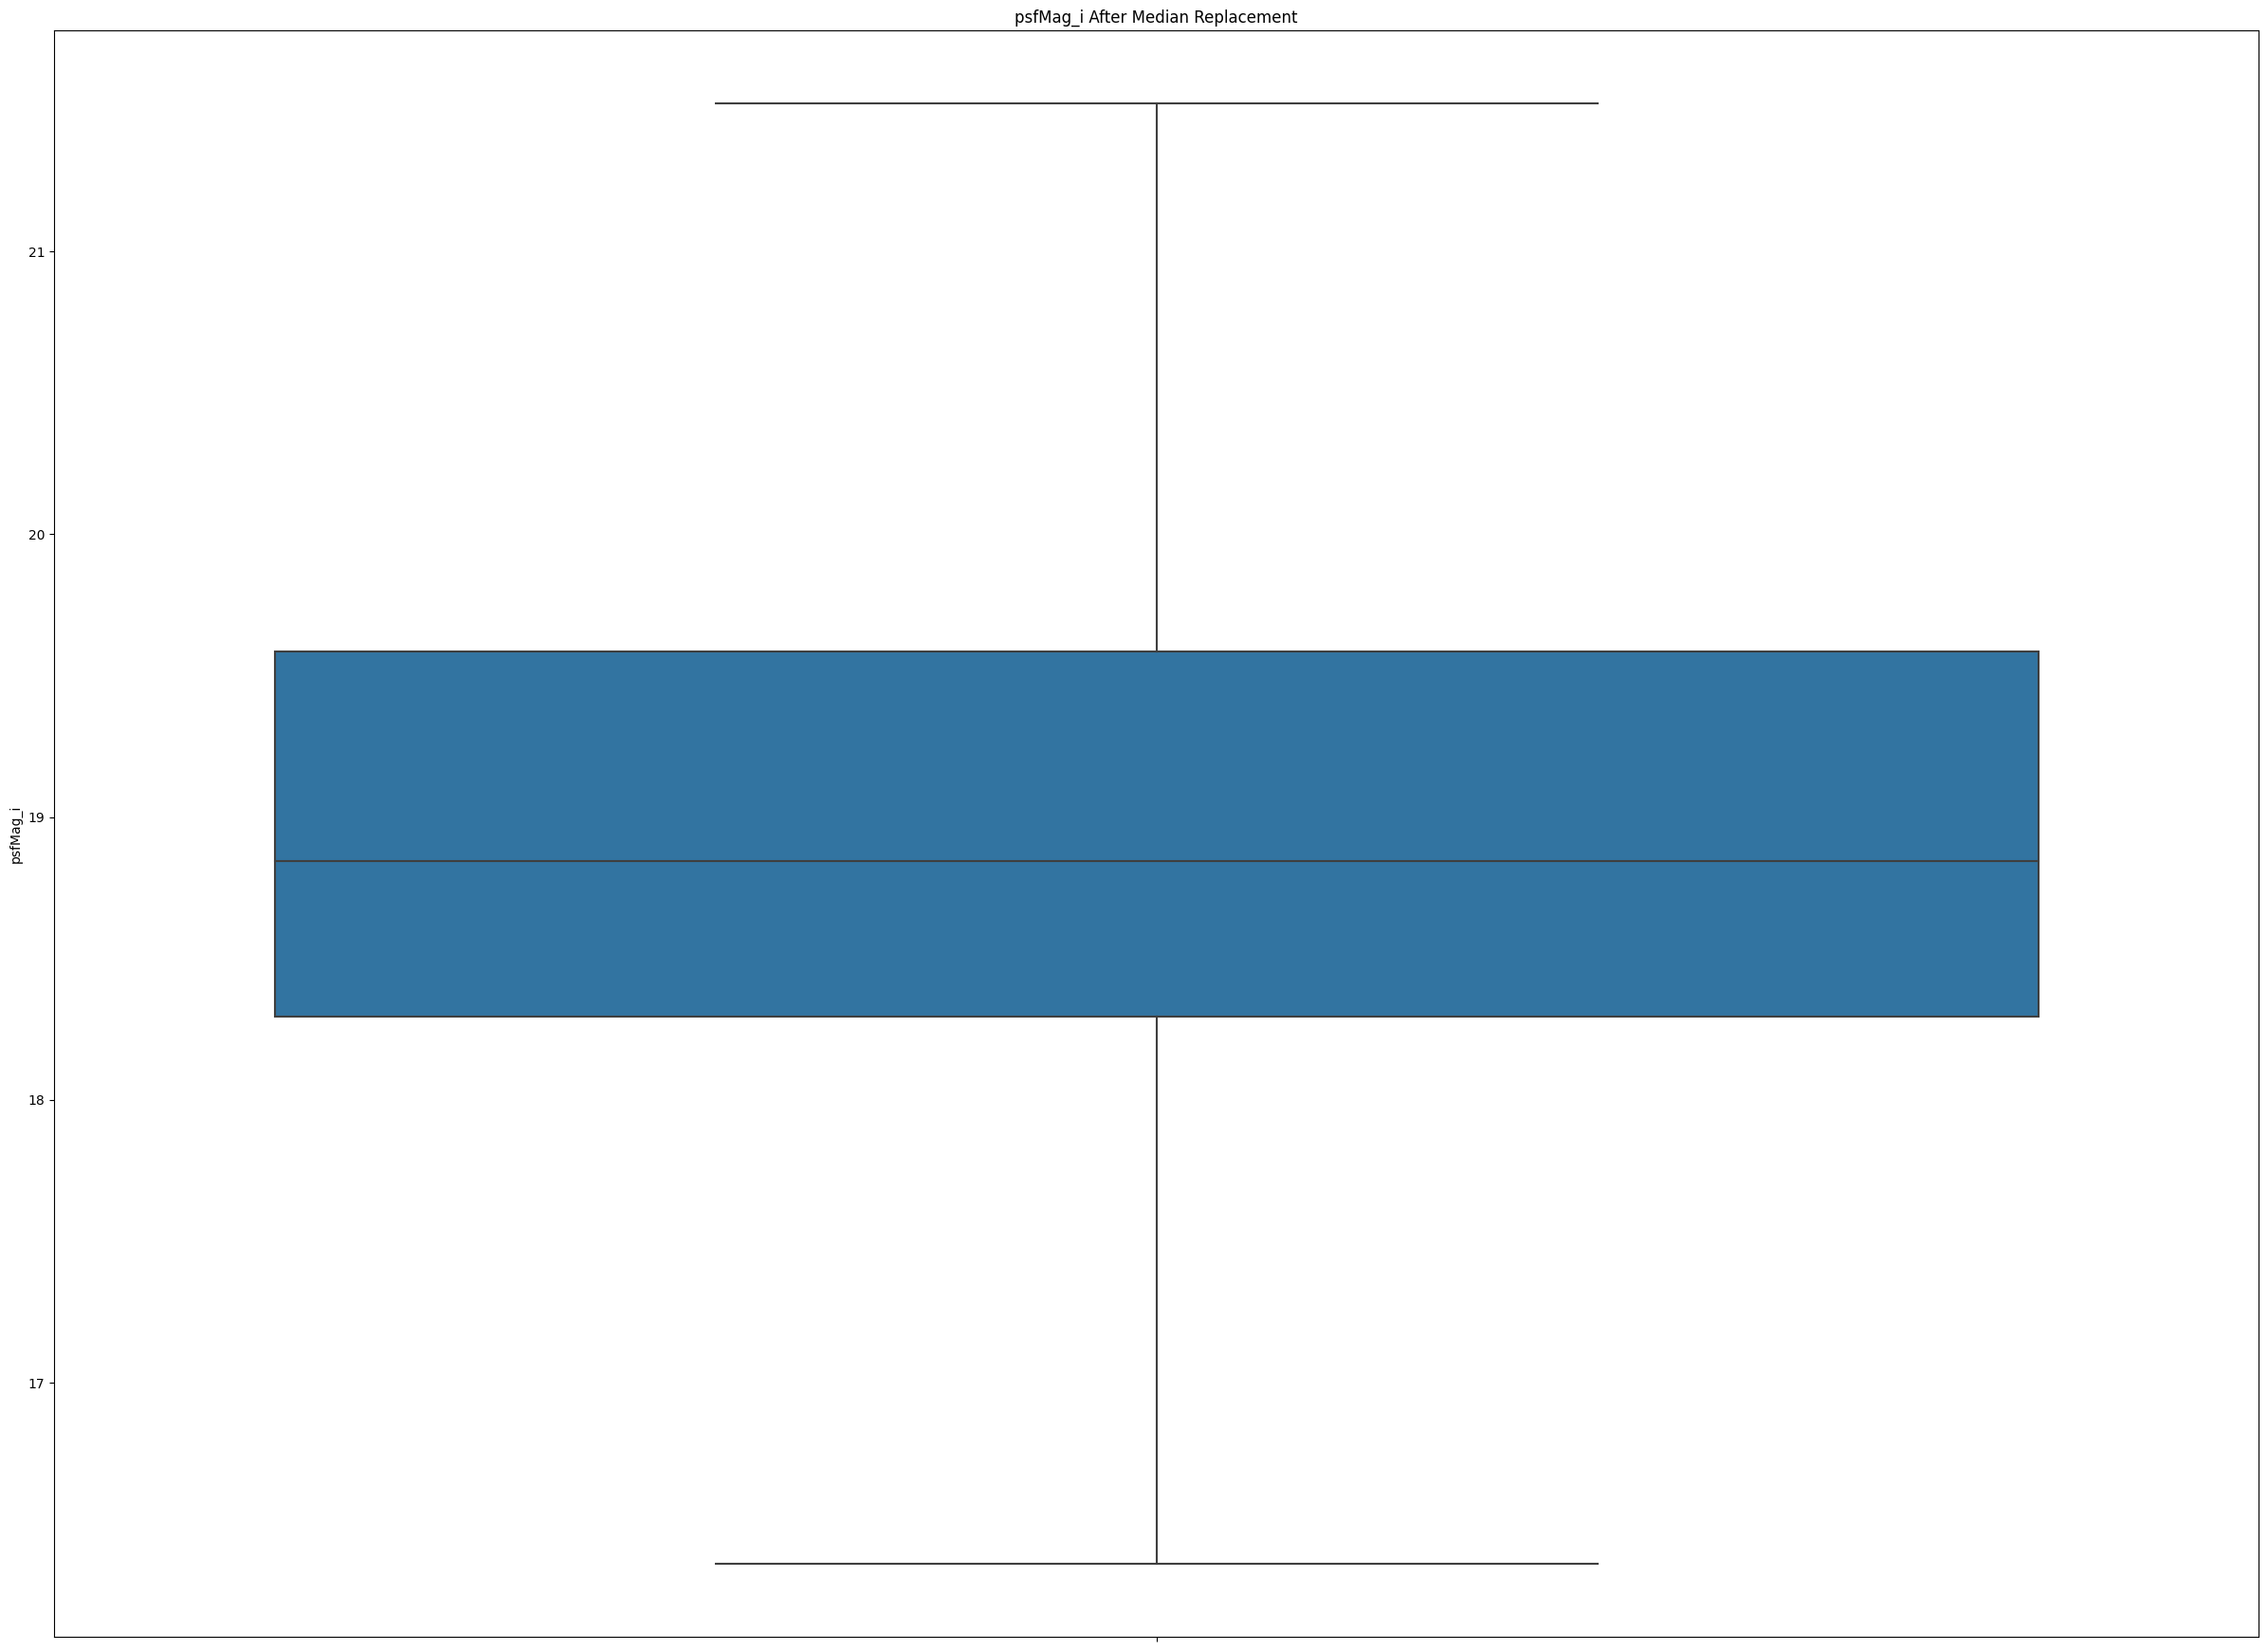

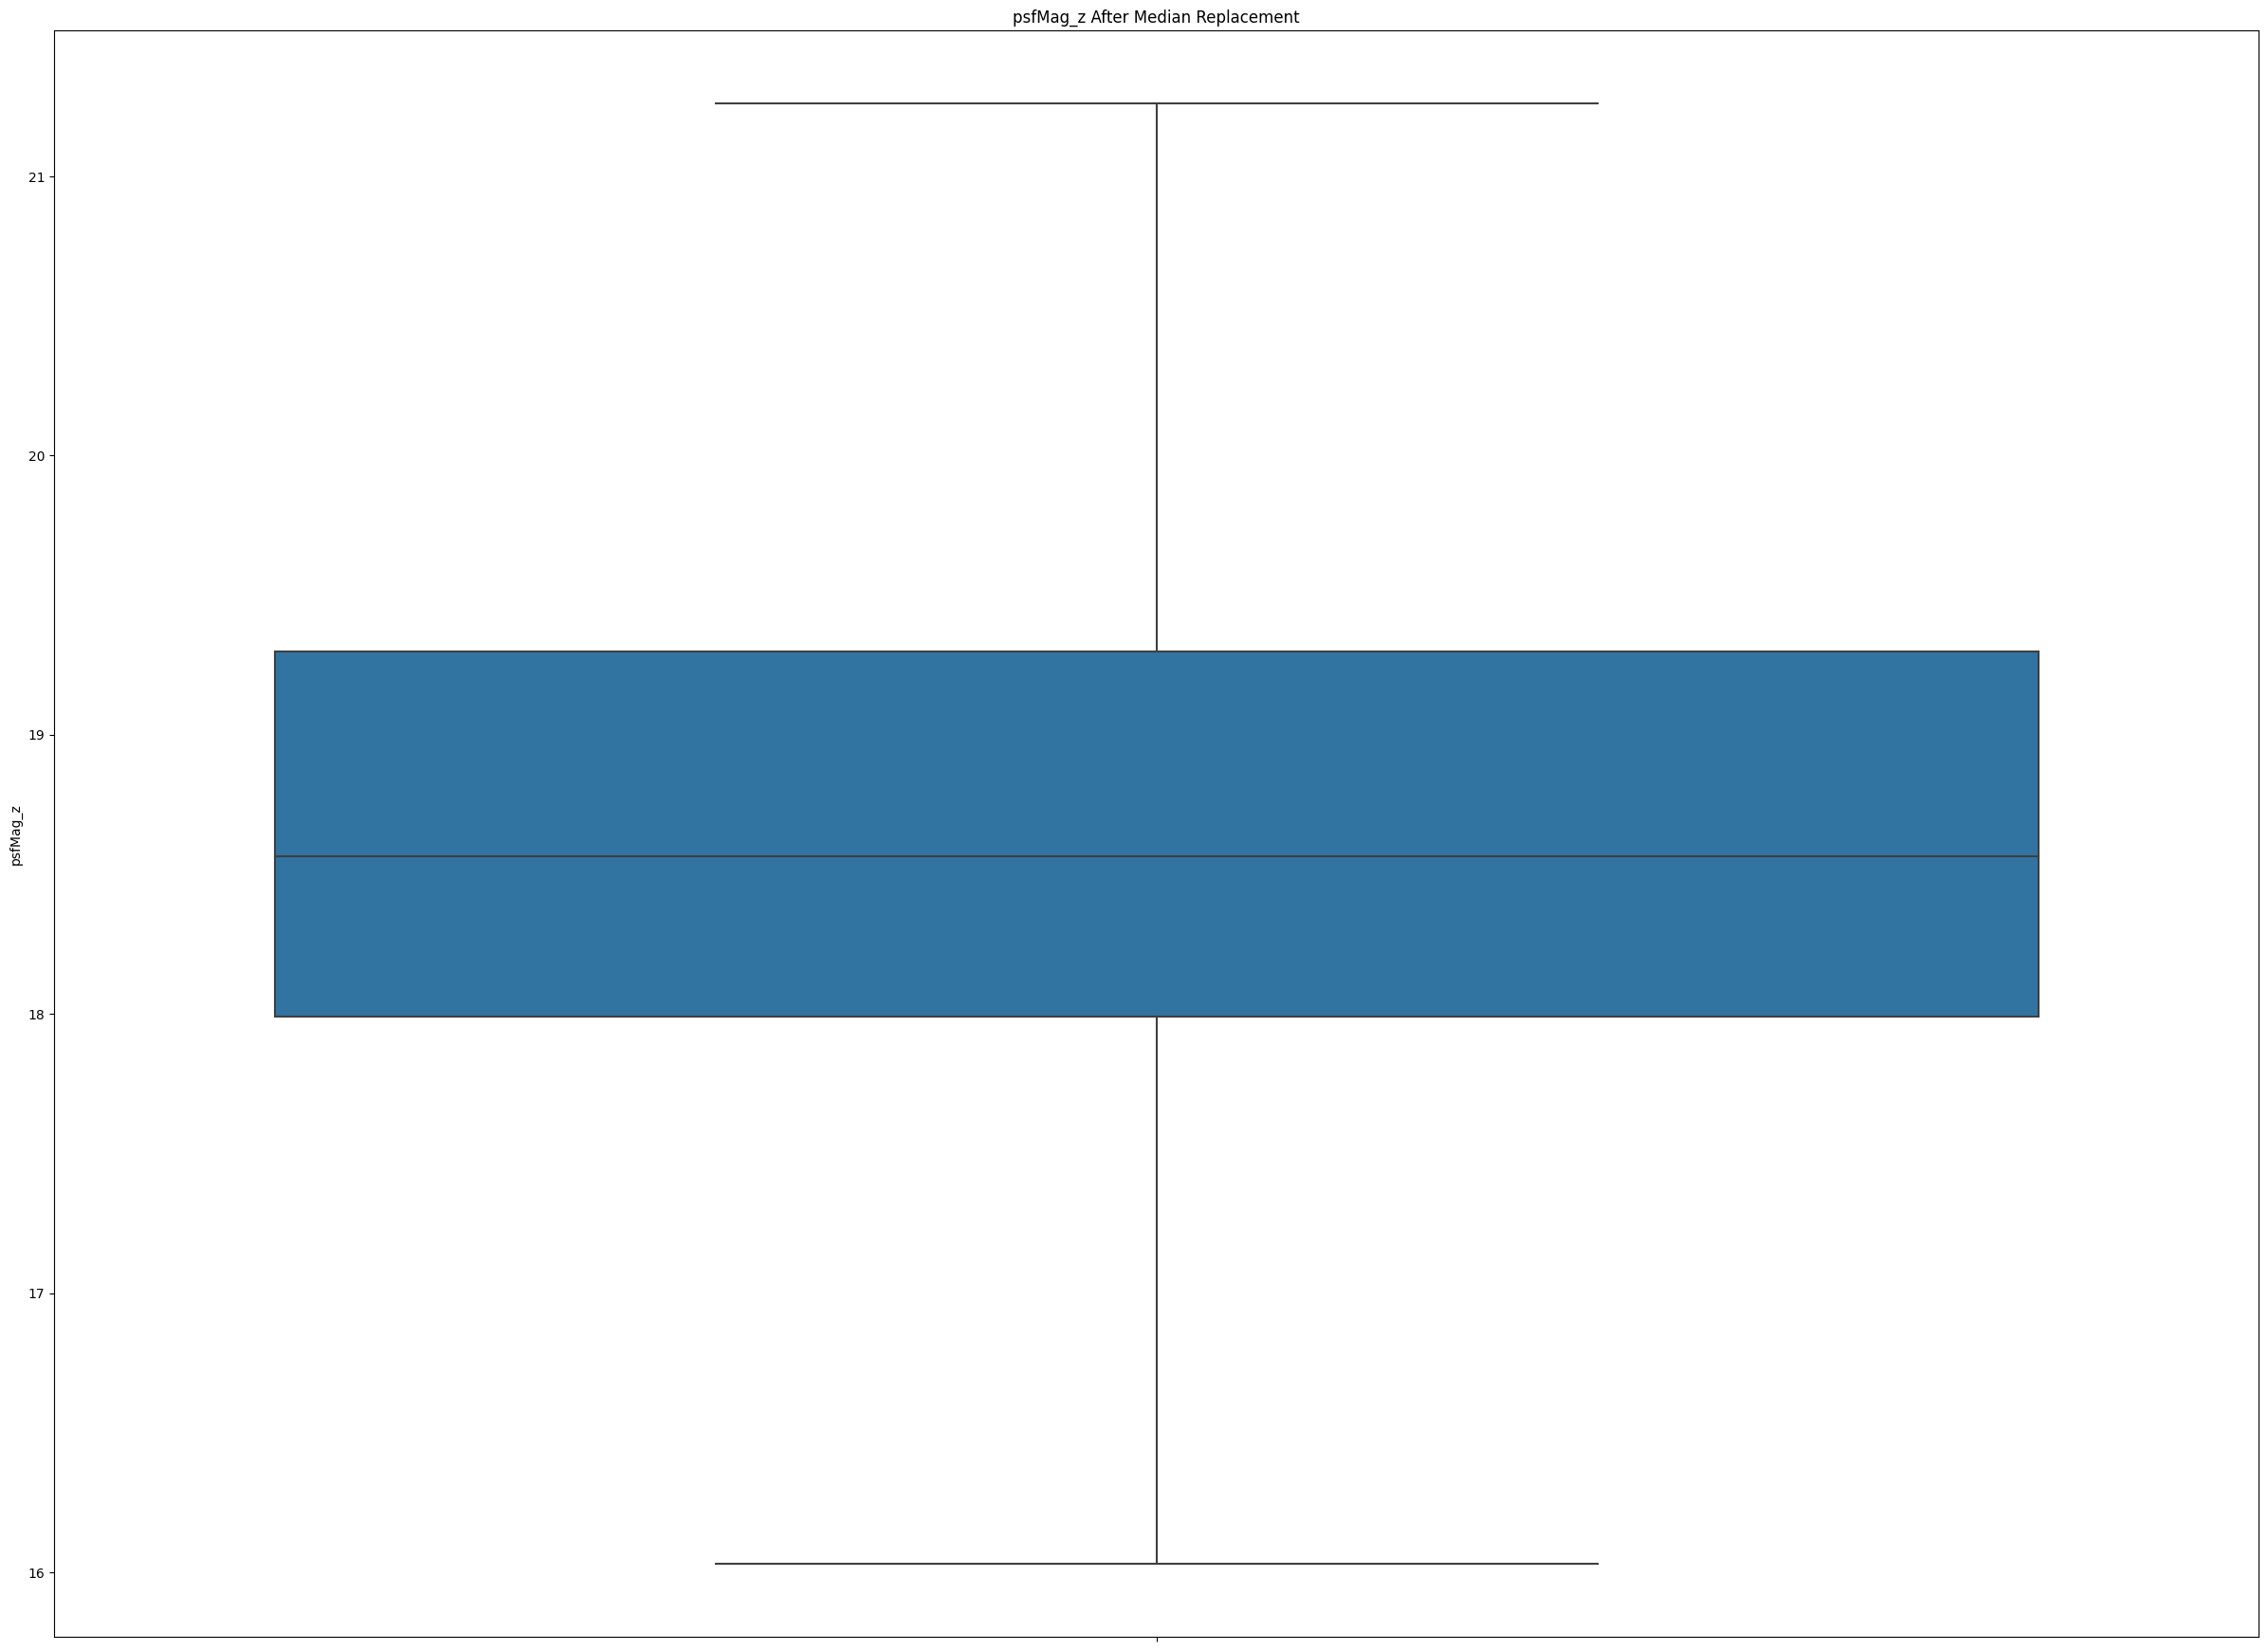

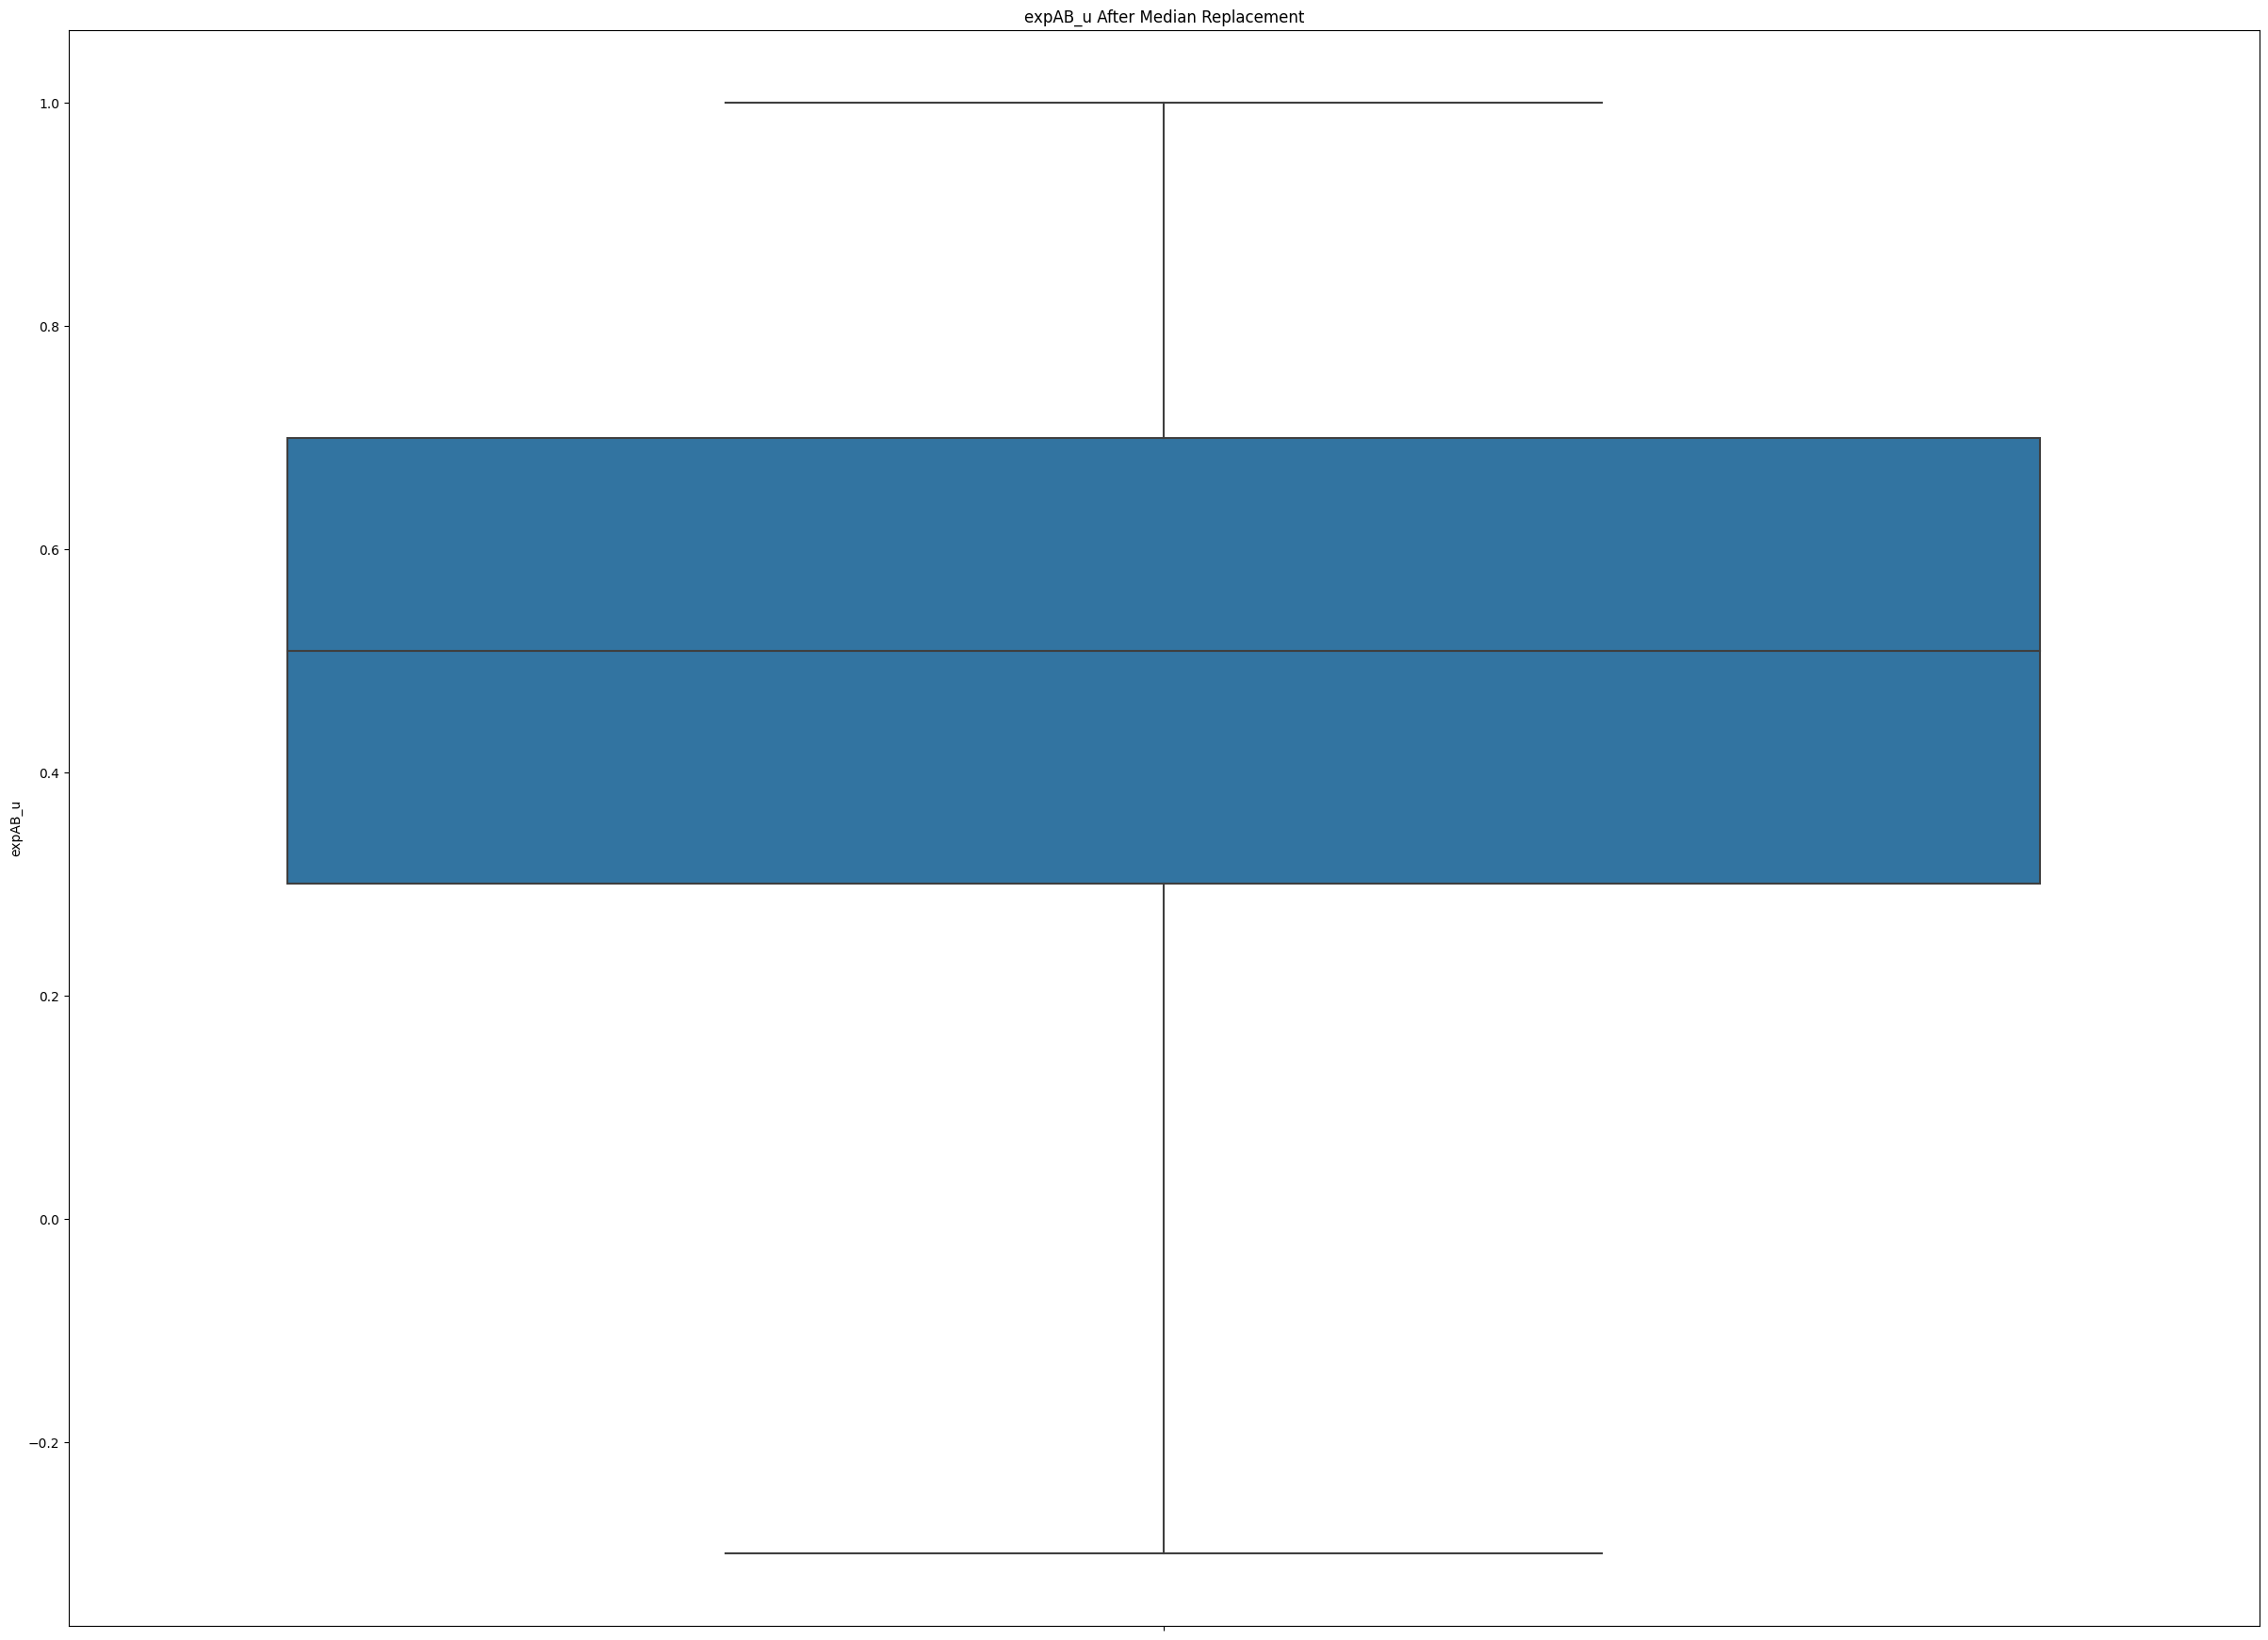

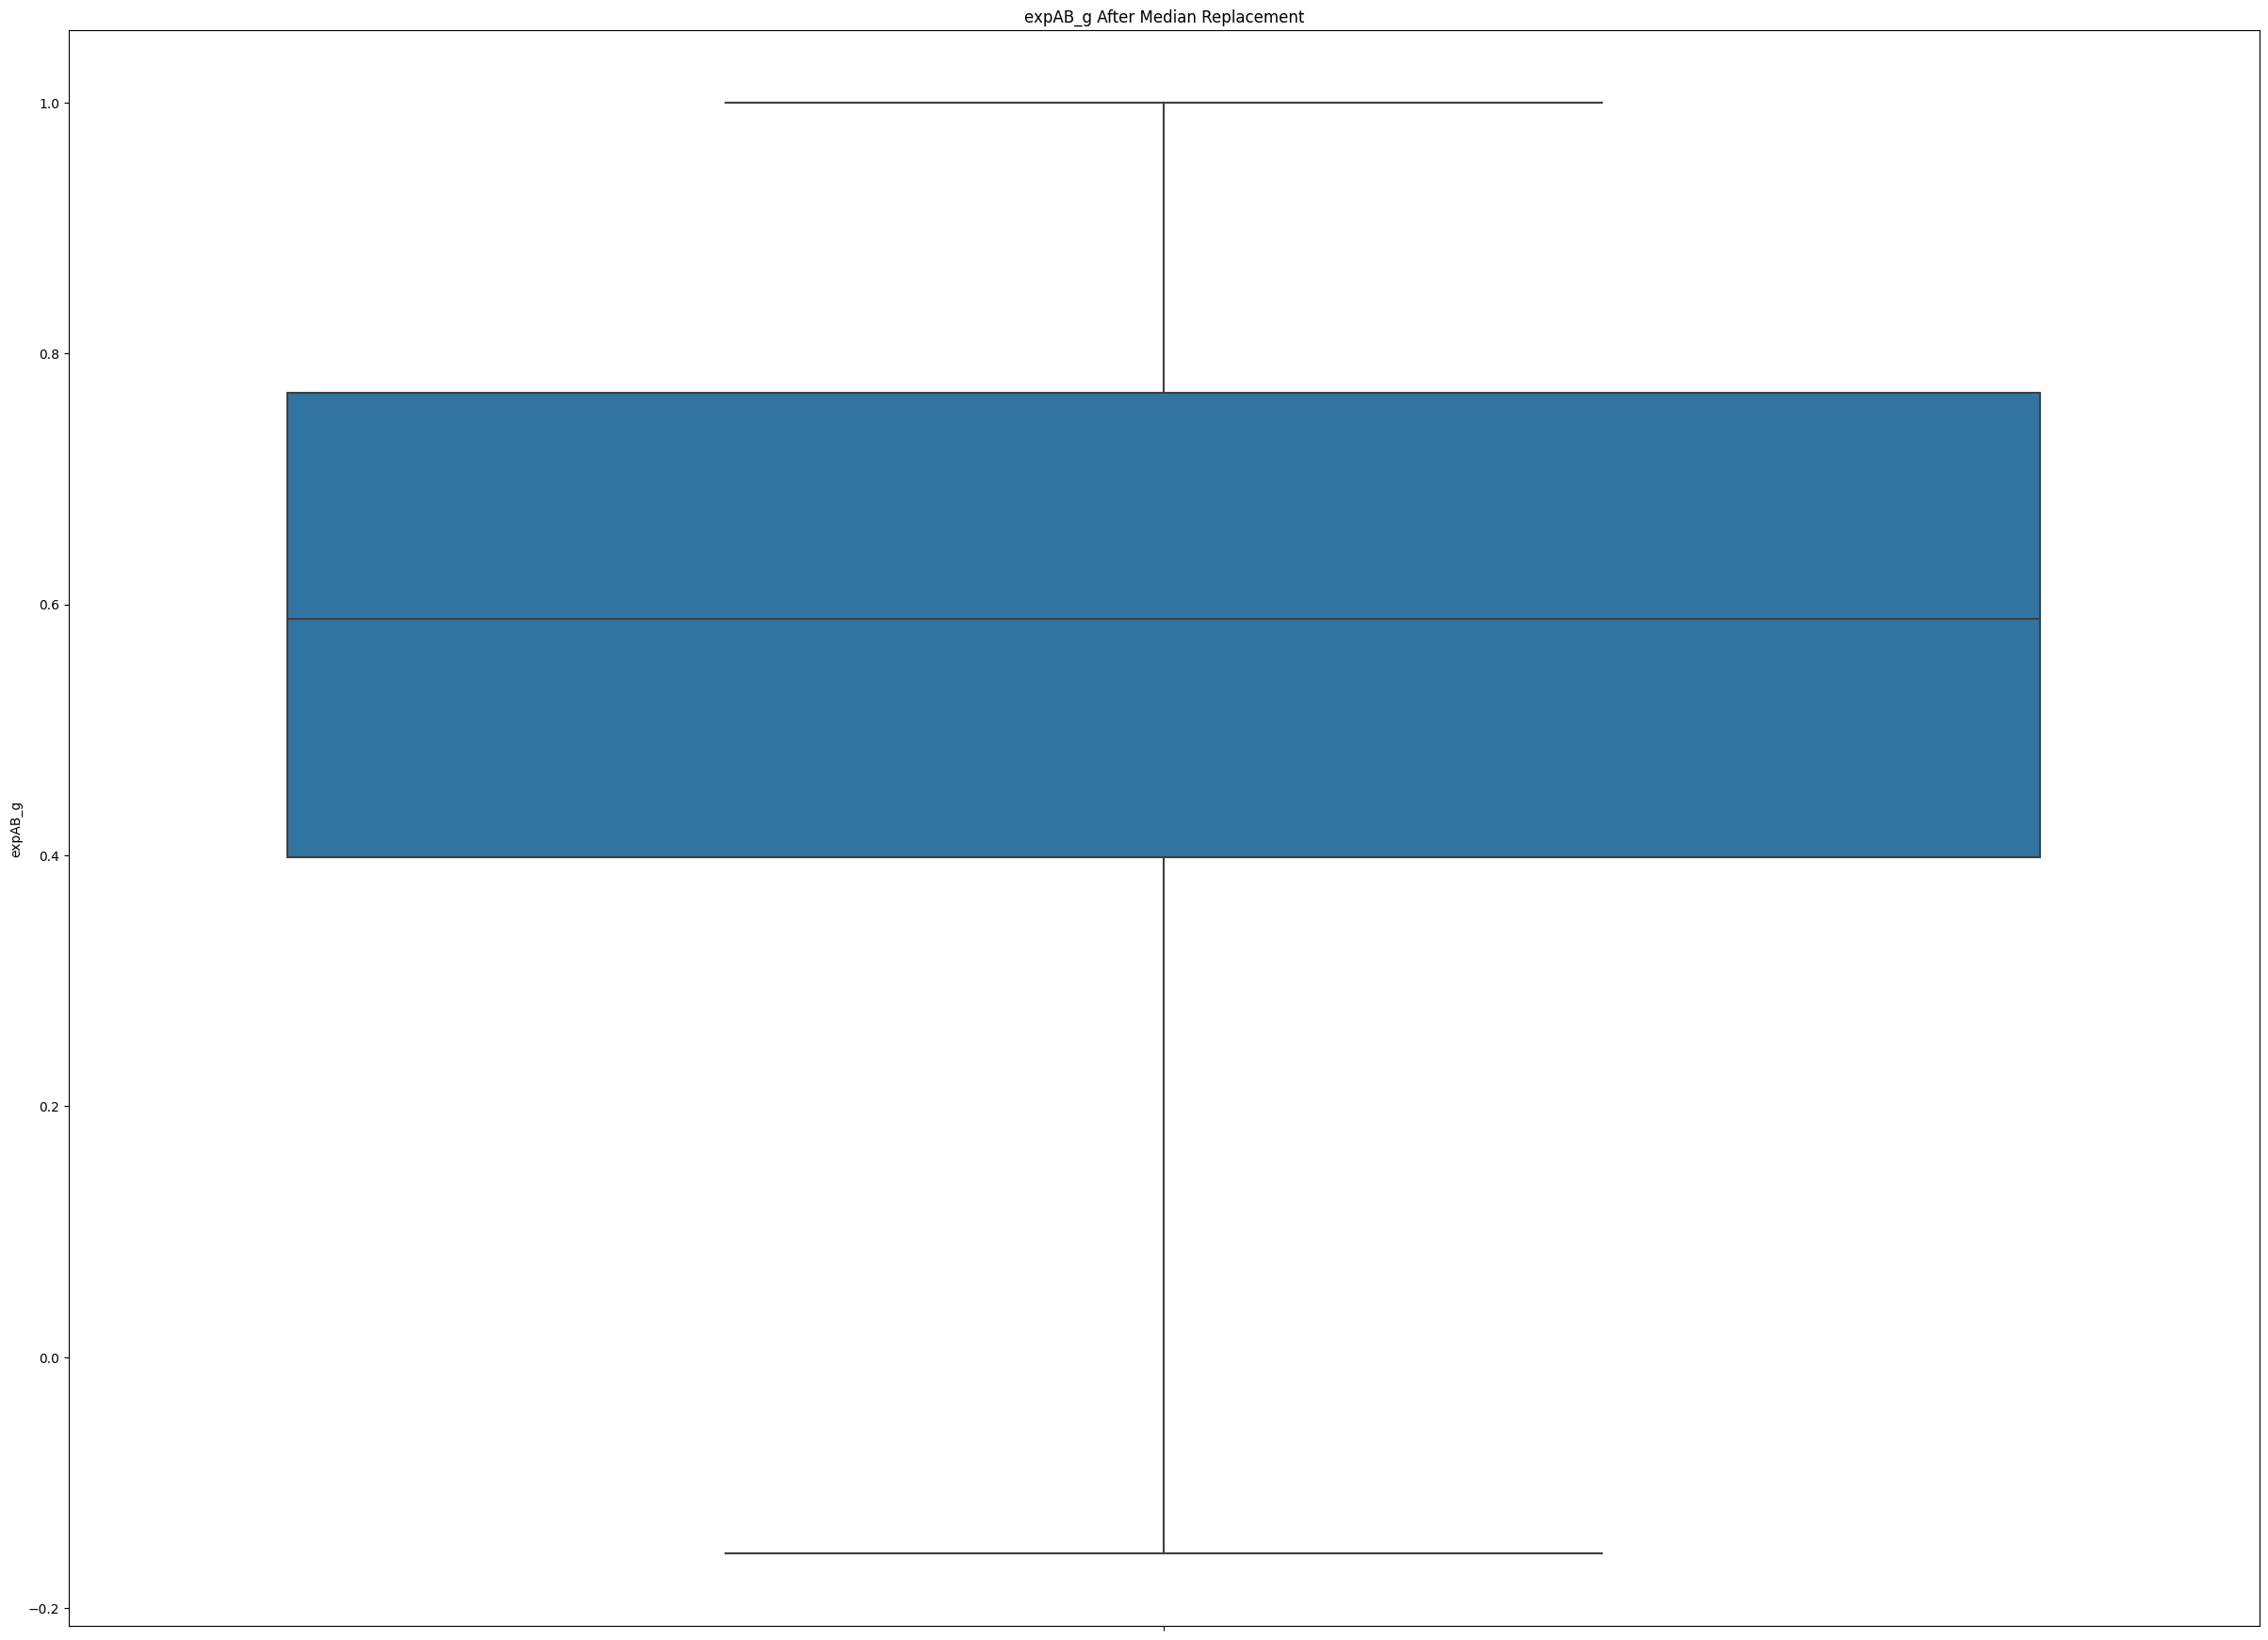

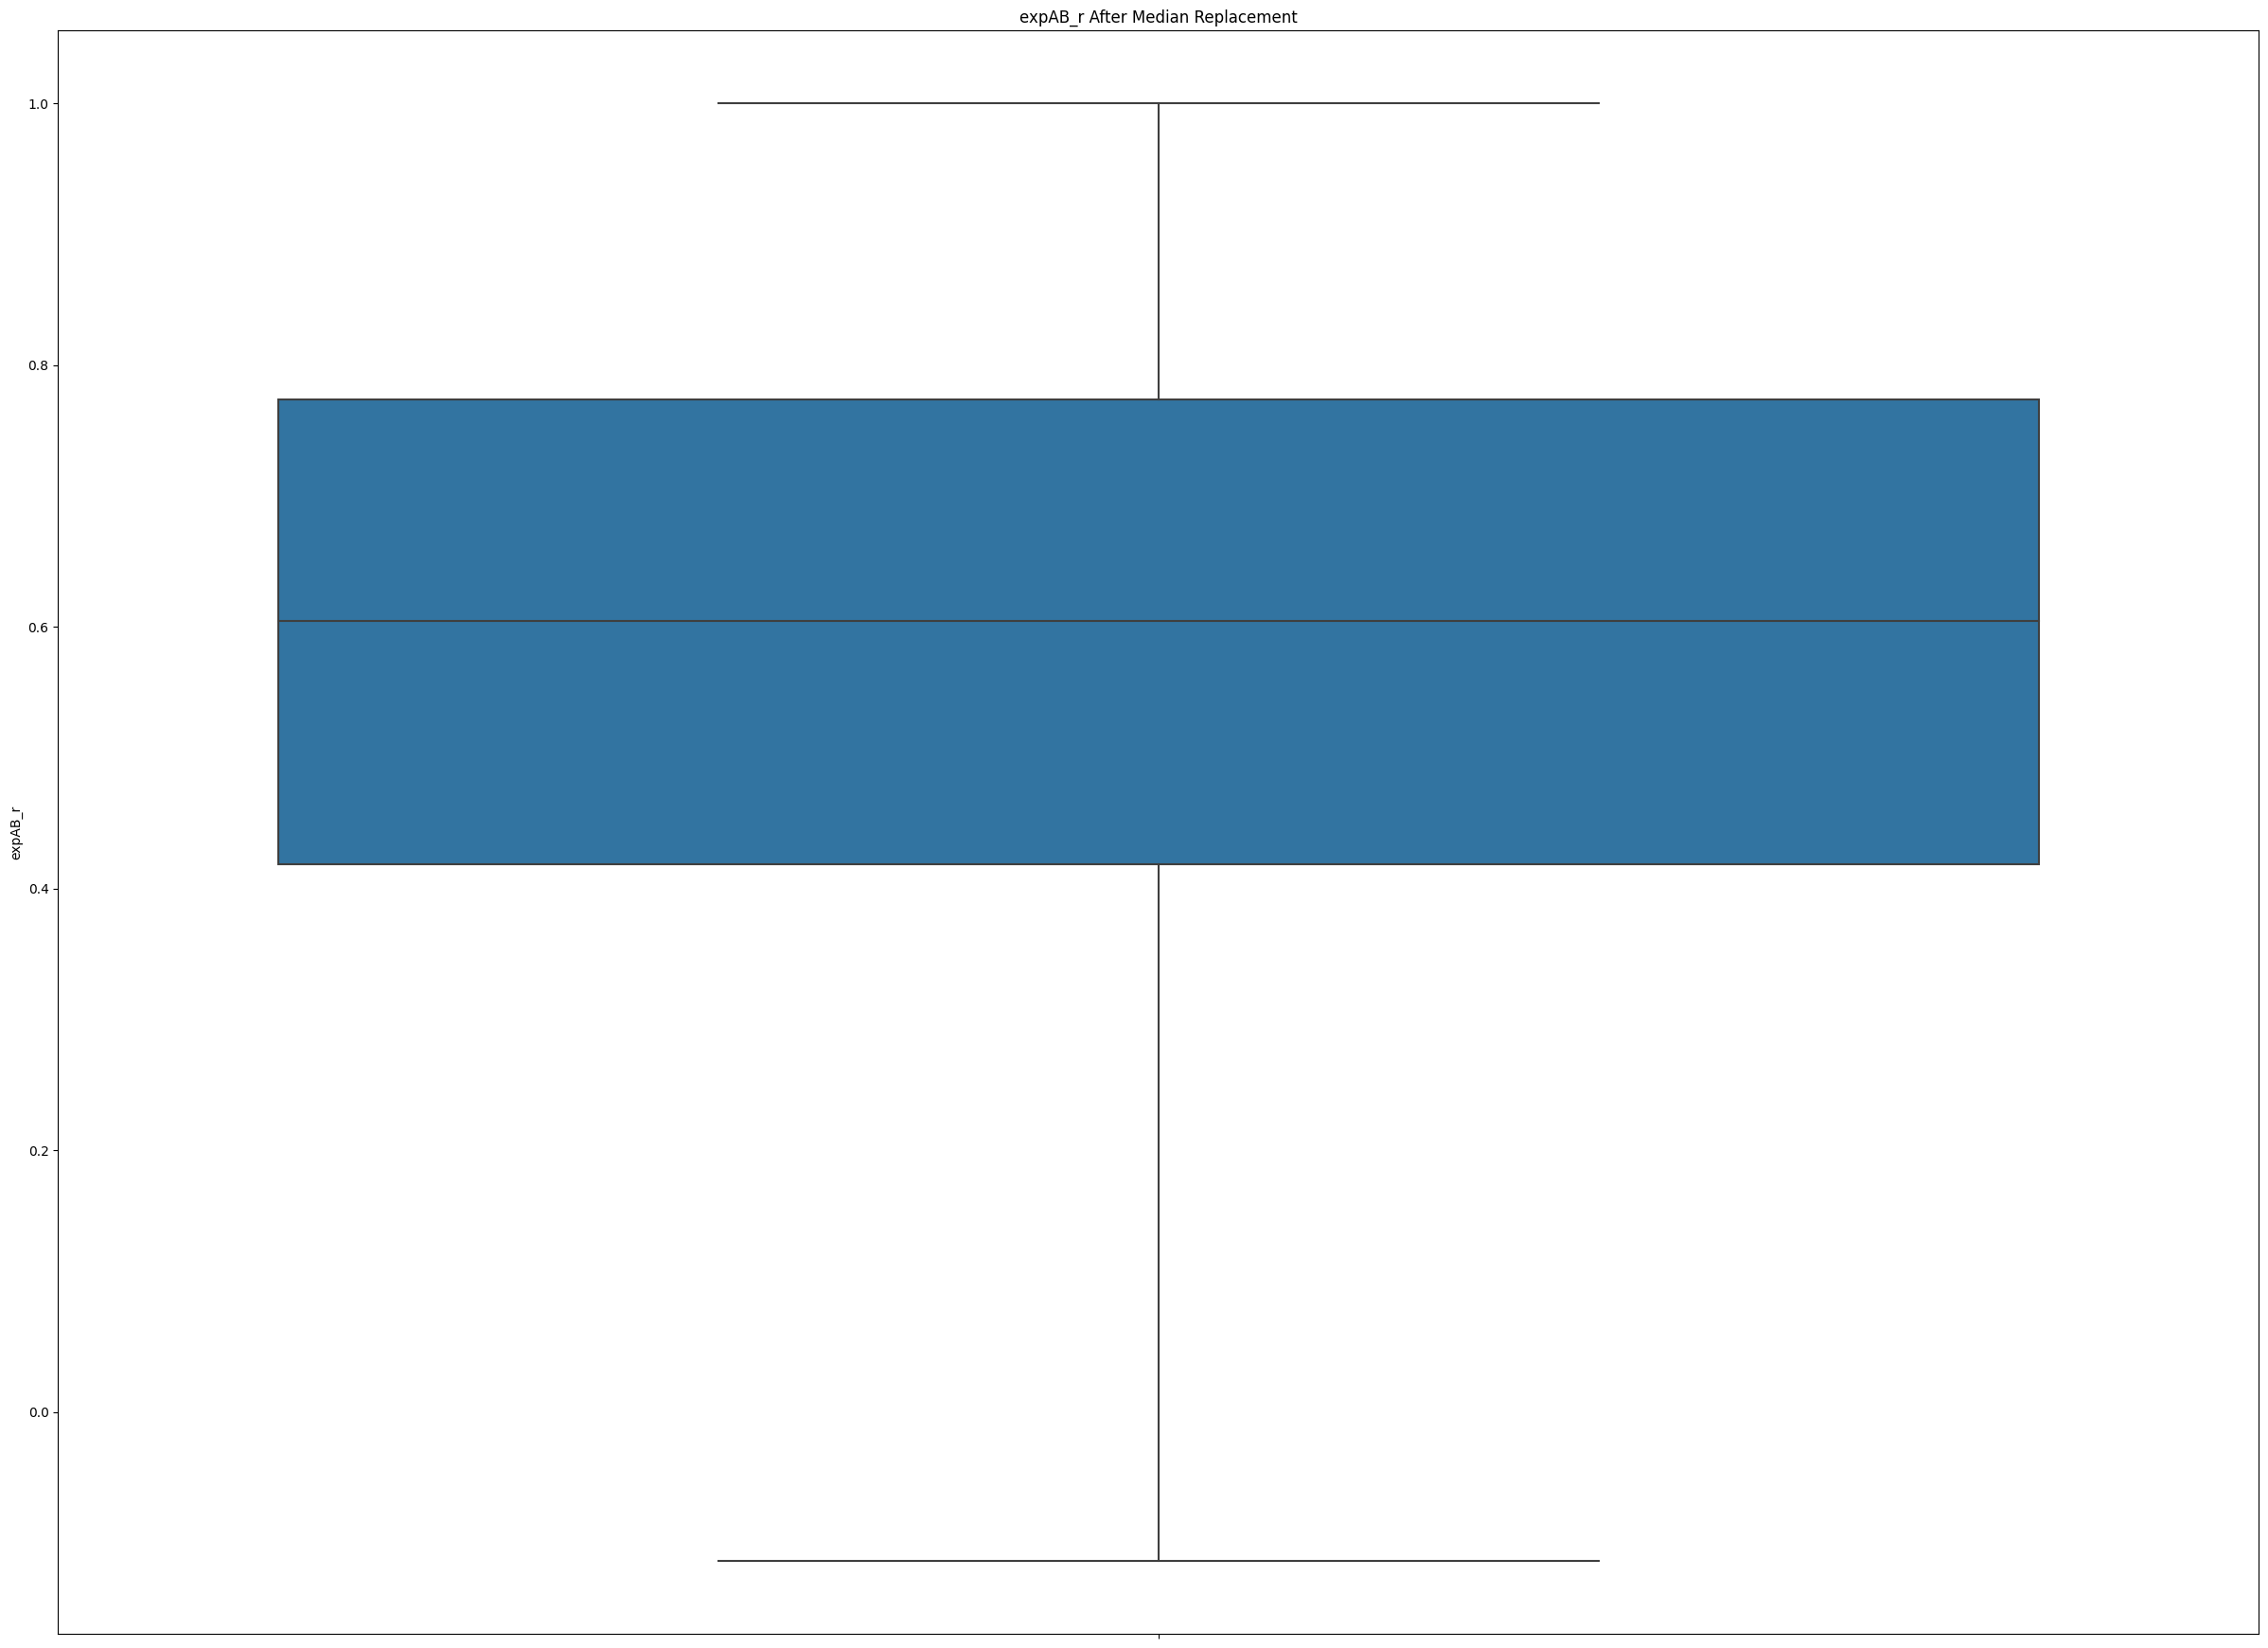

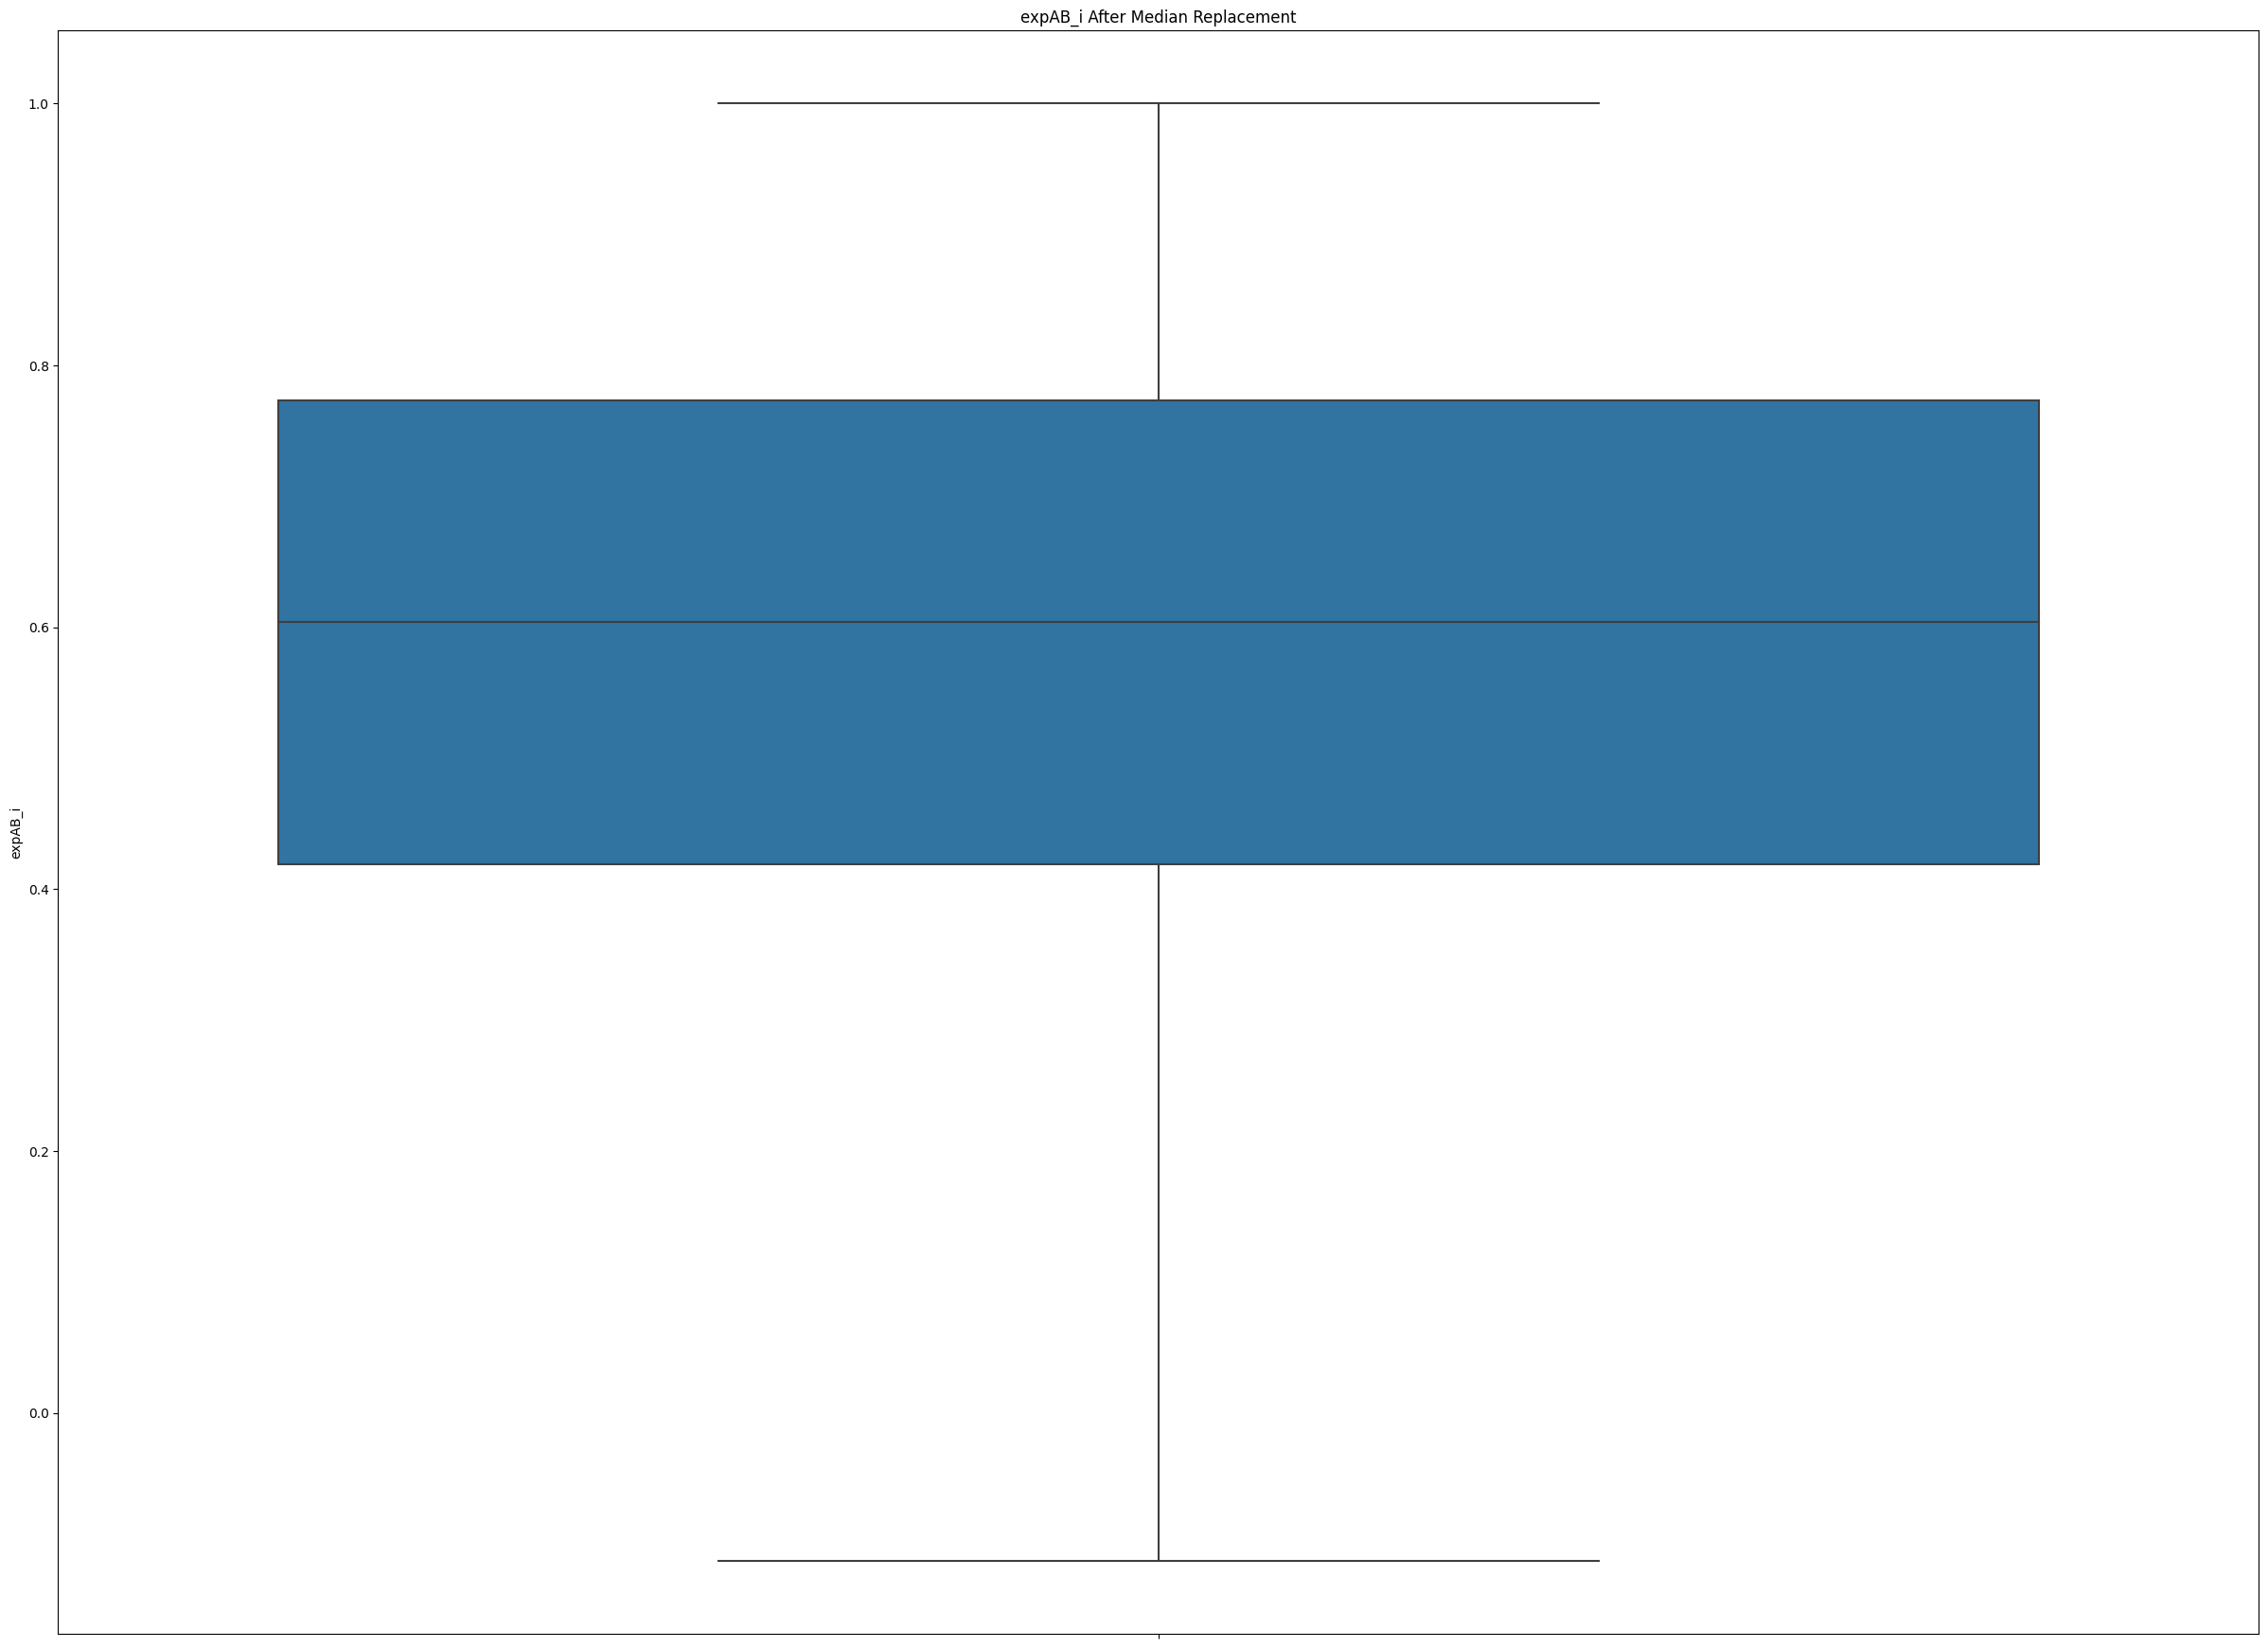

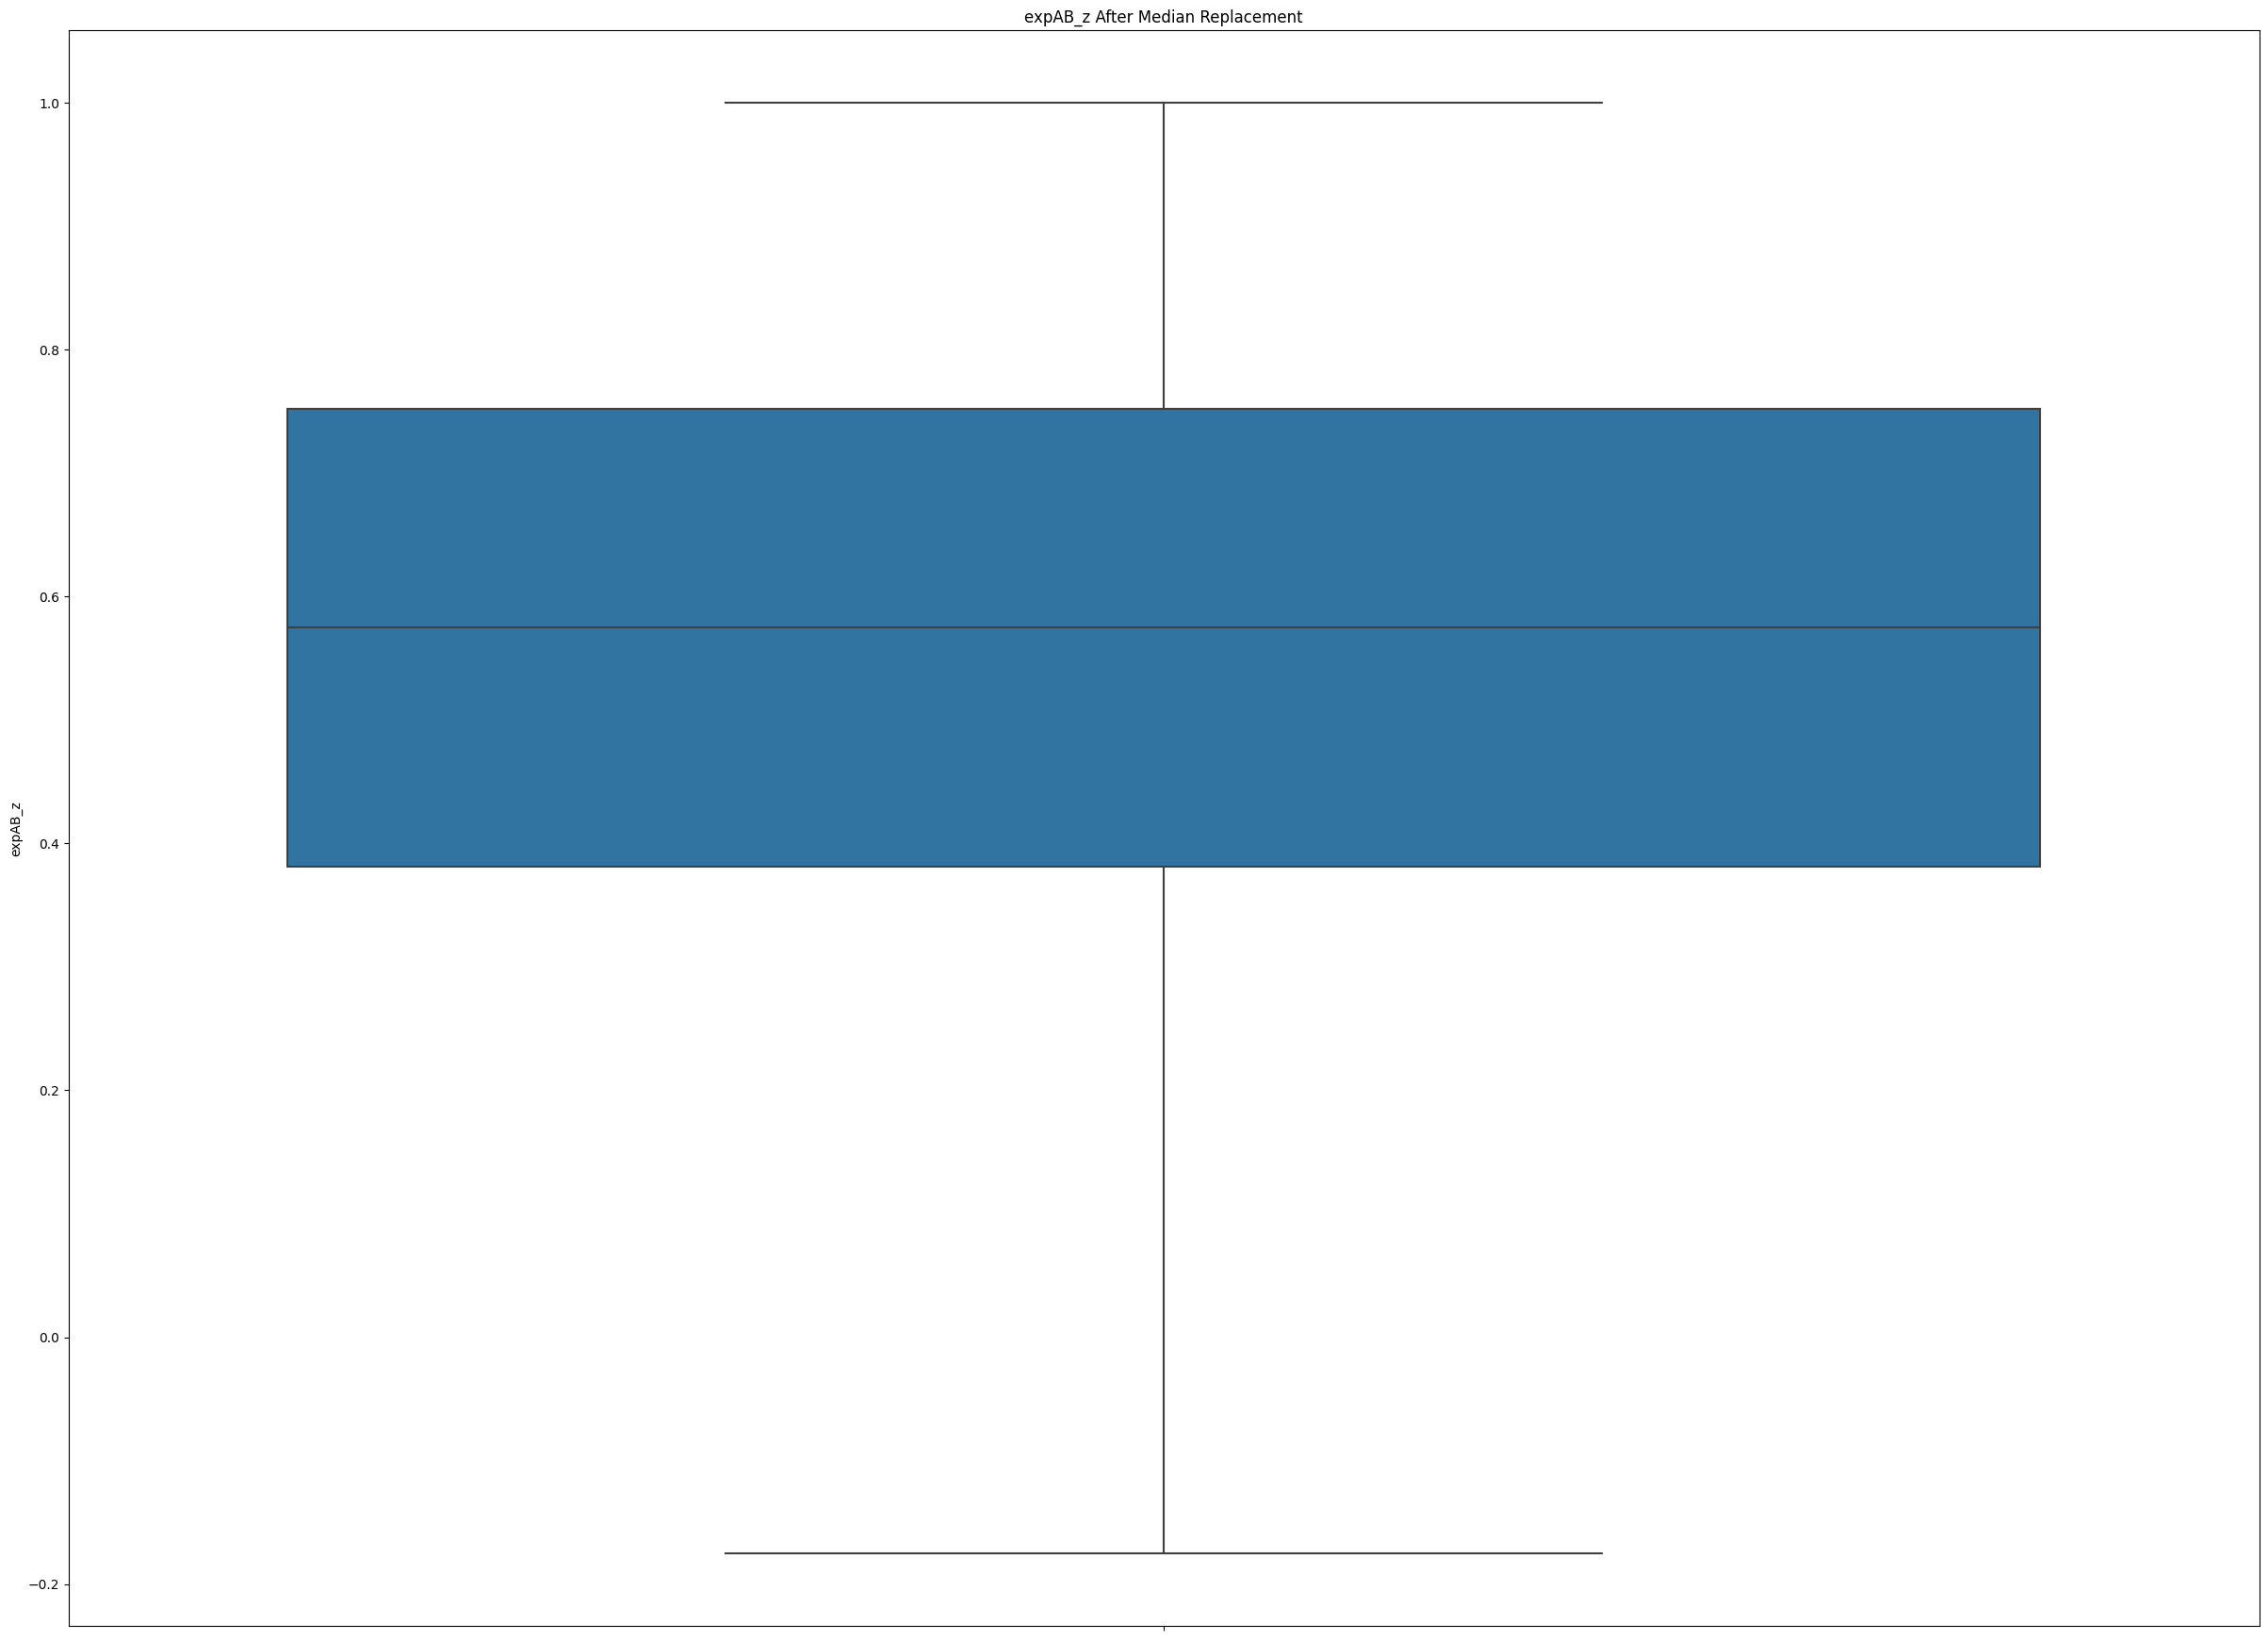

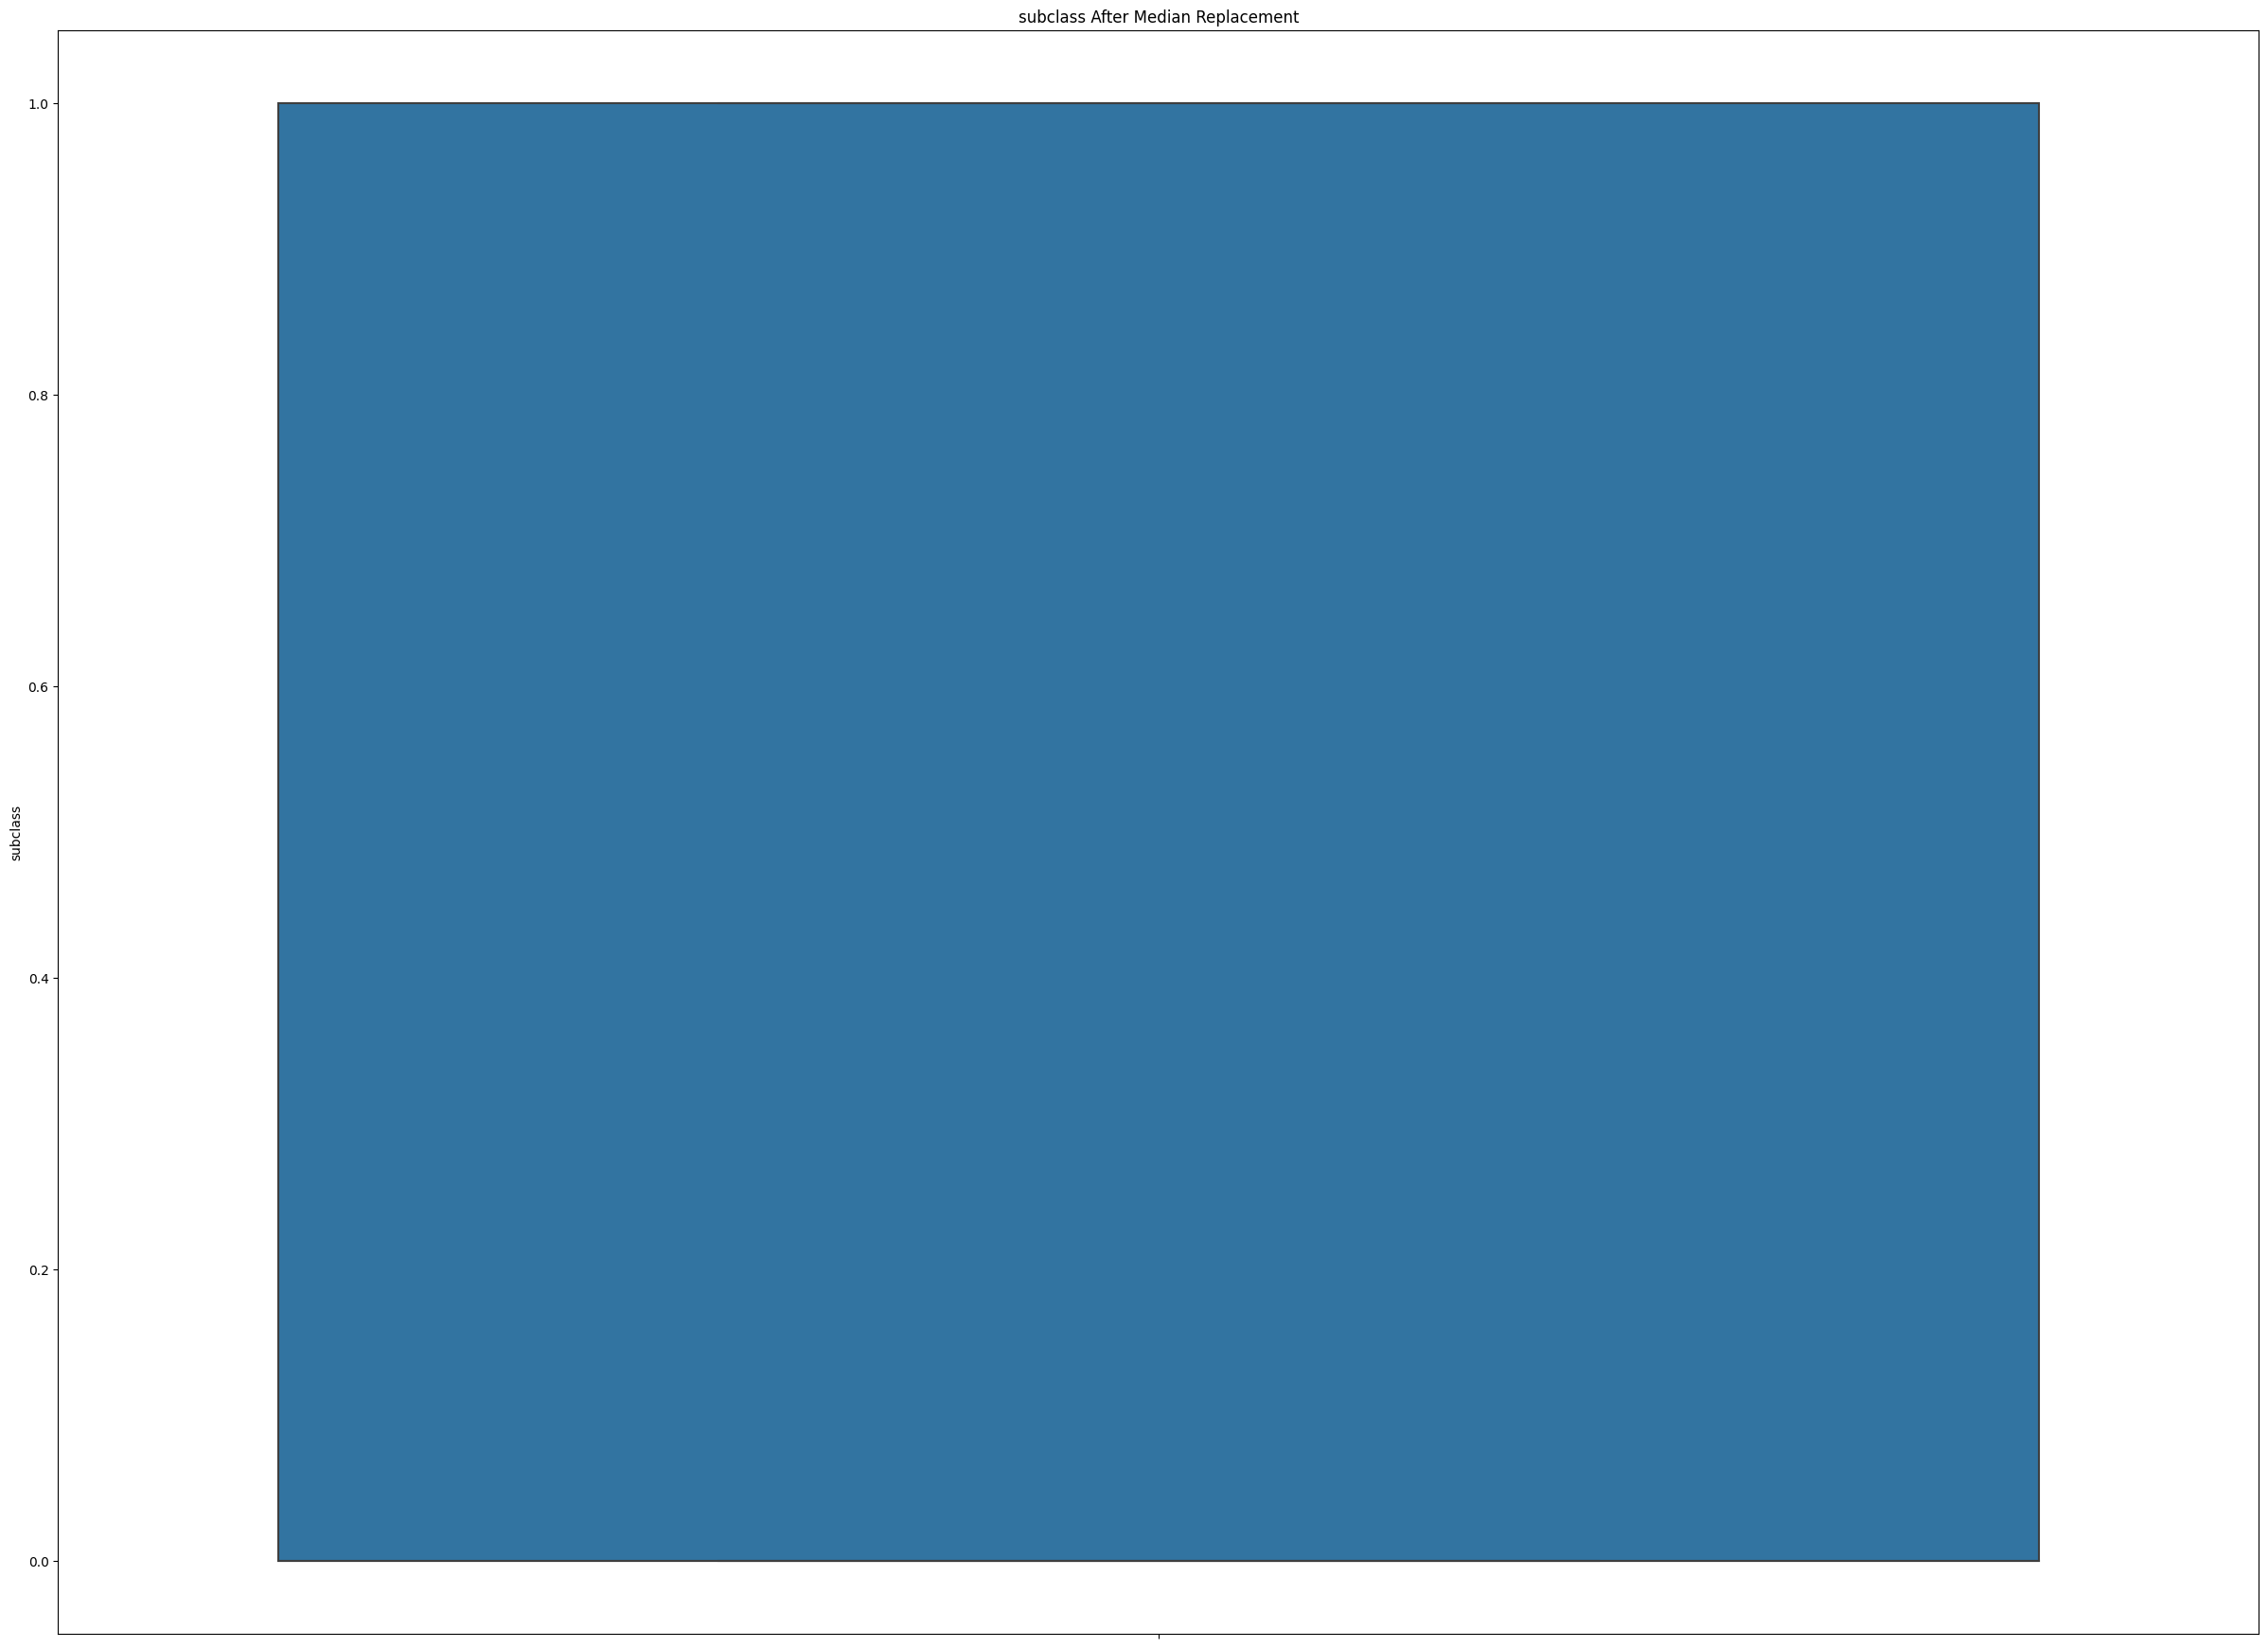

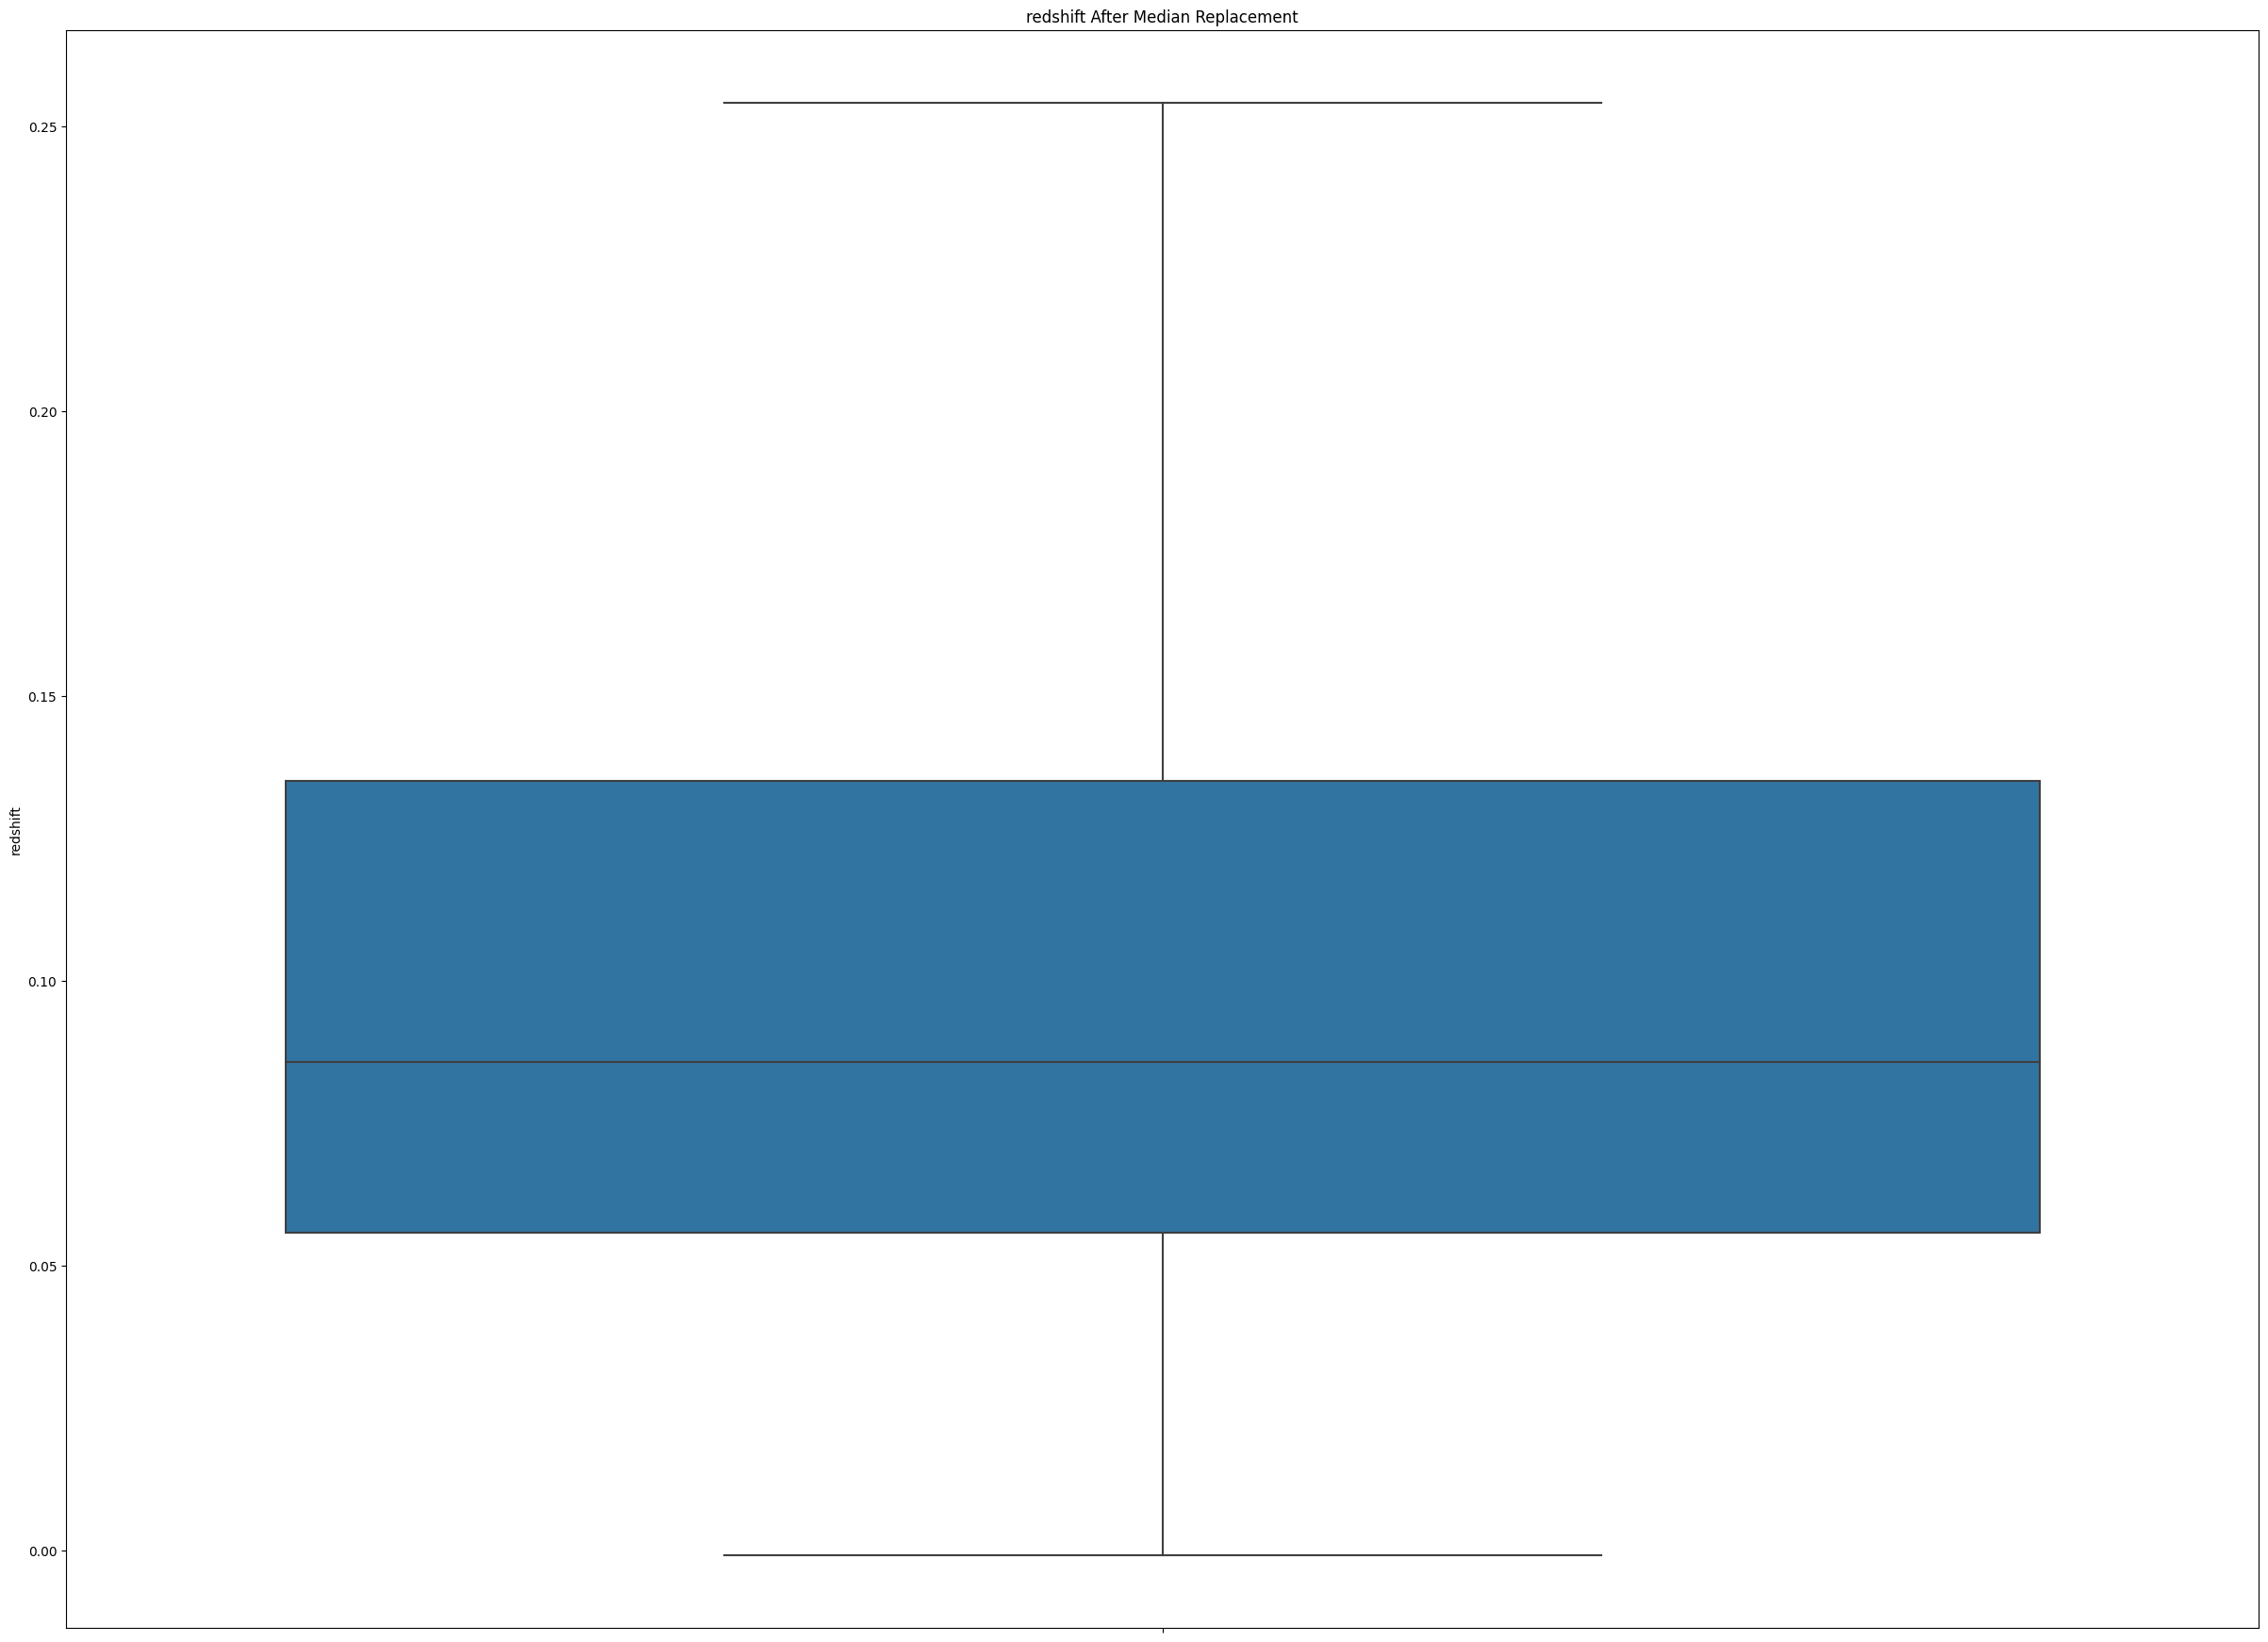

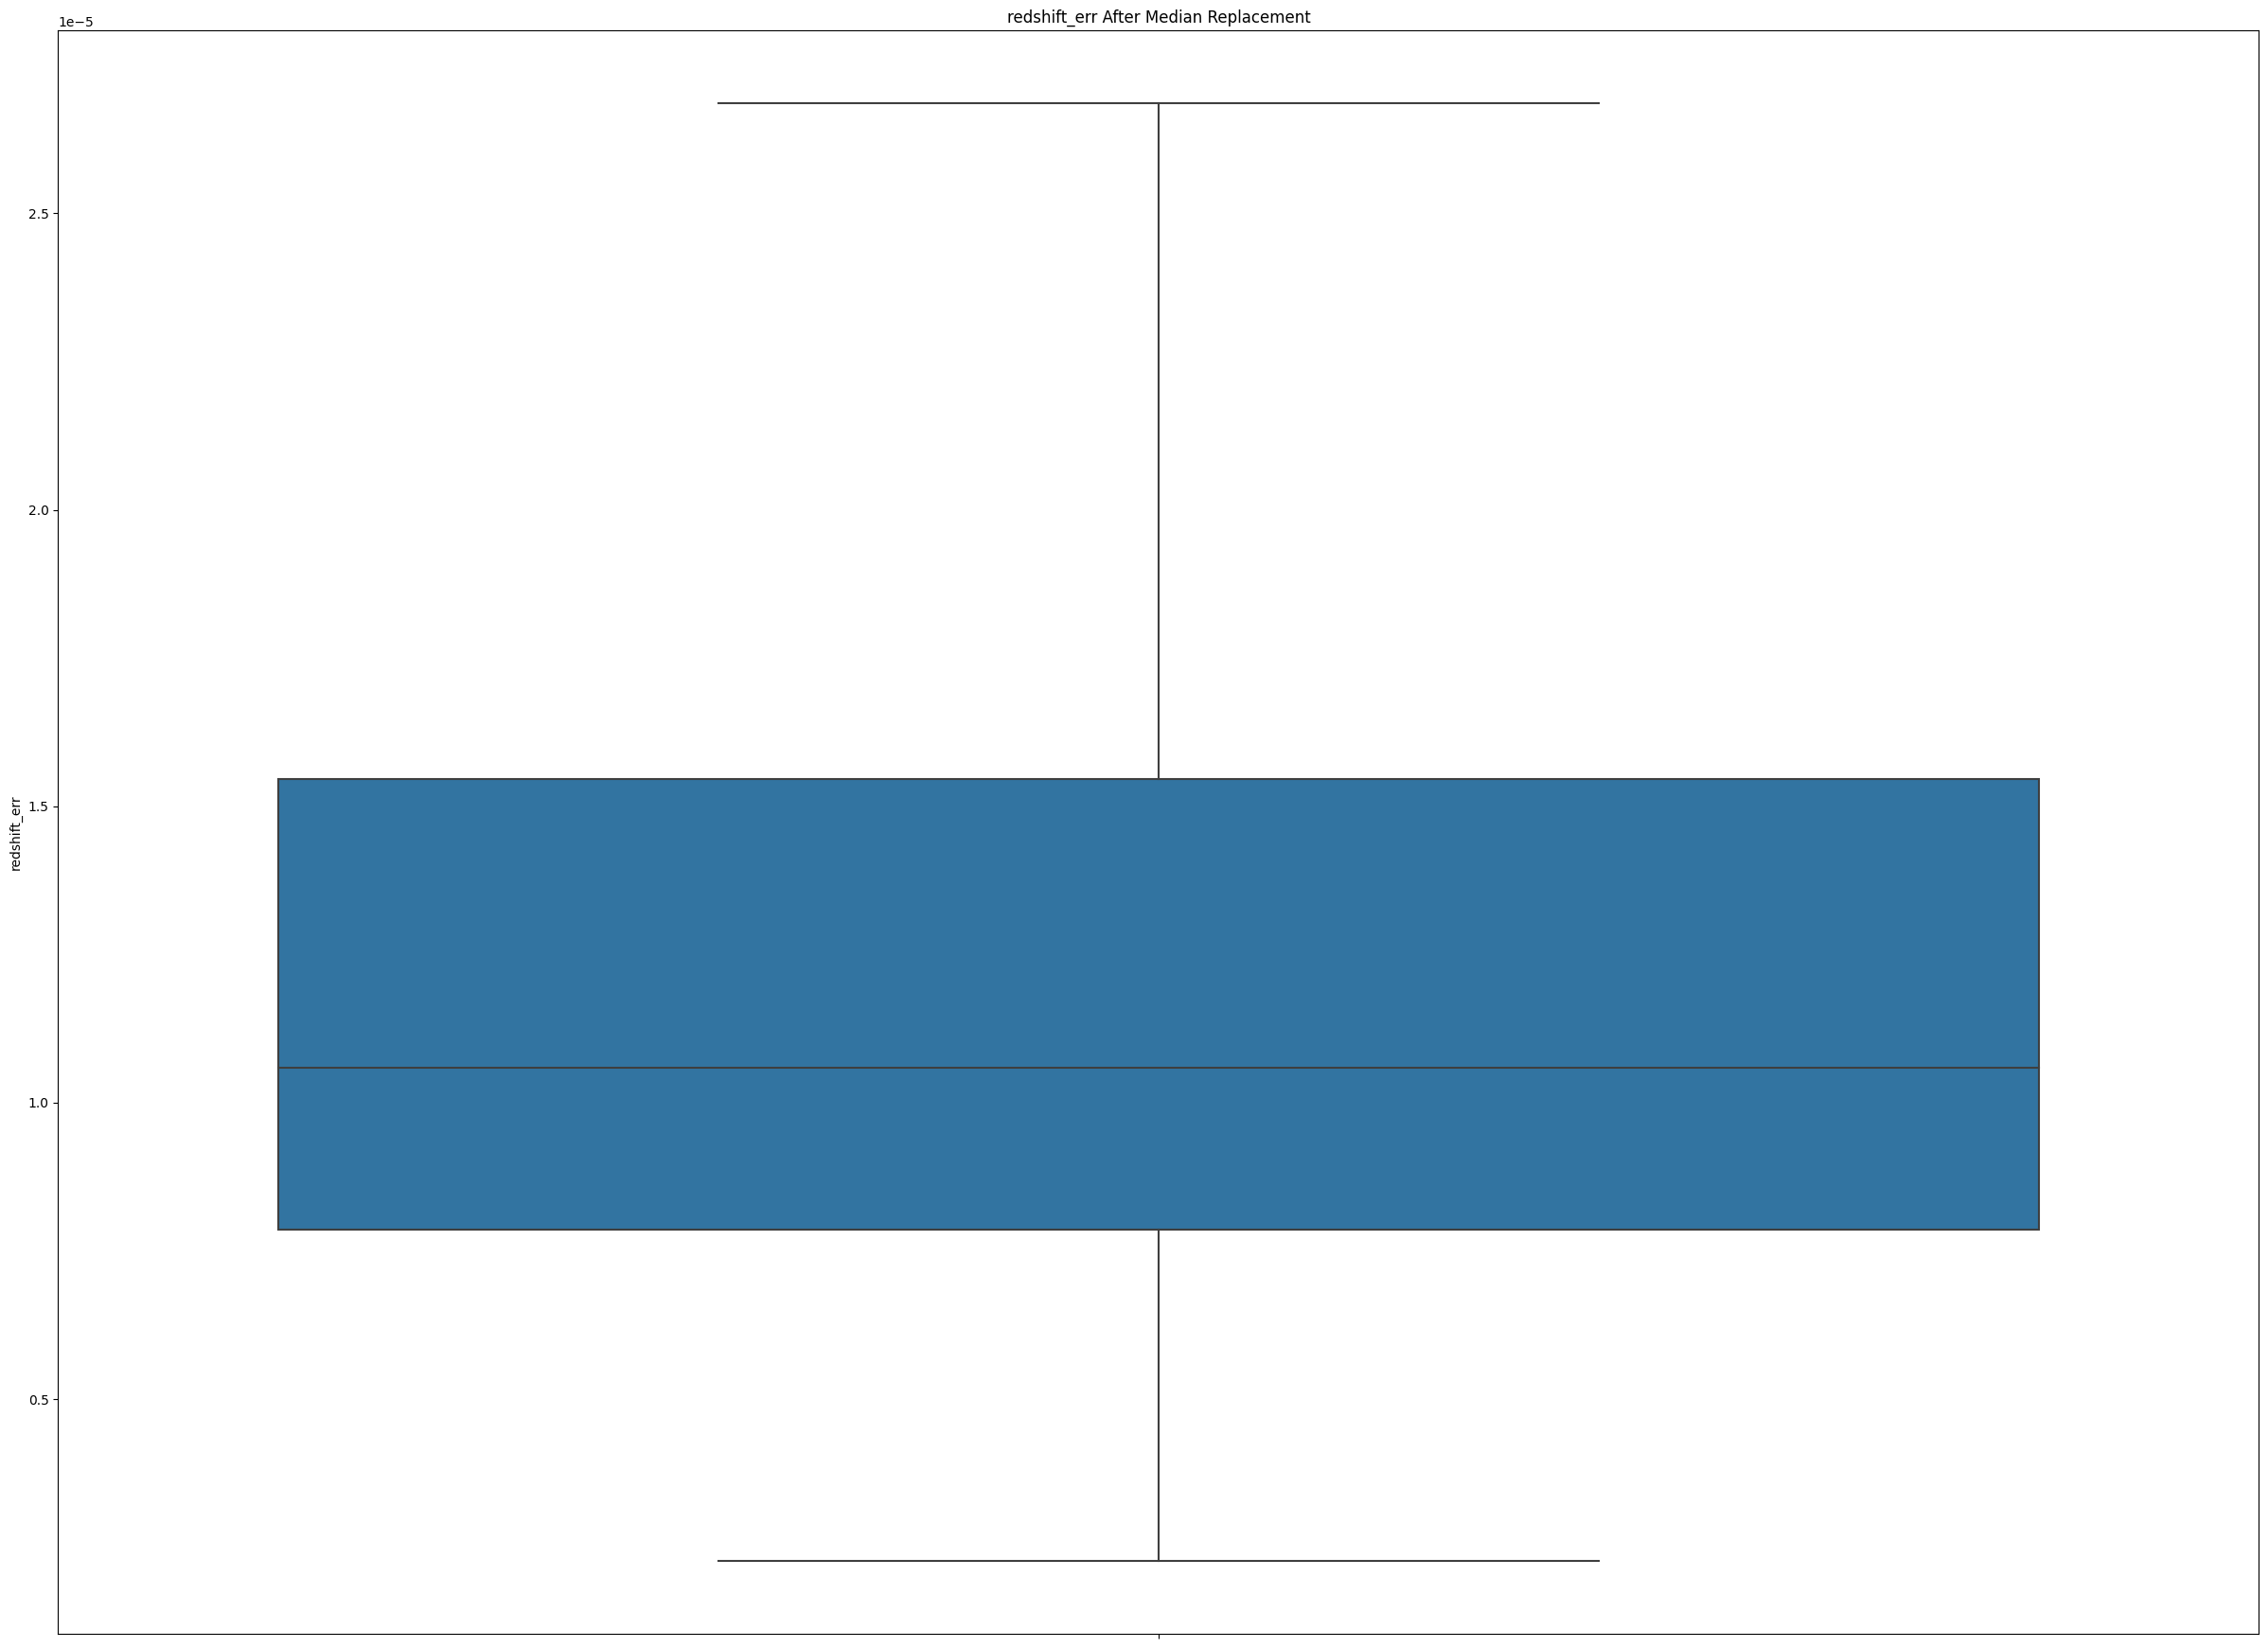

In [73]:
# Apply IQR-based outlier replacement and plot
for col in df.select_dtypes(include=['number']).columns:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker, max_whisker = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Count and replace outliers
    outliers_before = ((df[col] > max_whisker) | (df[col] < min_whisker)).sum()
    df[col] = np.clip(df[col], min_whisker, max_whisker)
    outliers_after = ((df[col] > max_whisker) | (df[col] < min_whisker)).sum()

    # Plot boxplot
    plt.figure(figsize=(30, 22))
    sns.boxplot(y=df[col])
    plt.title(f'{col}\nOutliers Before: {outliers_before}, After: {outliers_after}')
    plt.show()

# Replace outliers with median of non-outliers and plot
for col in df.select_dtypes(include=['number']).columns:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker, max_whisker = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Replace outliers with median
    outlier_index = (df[col] > max_whisker) | (df[col] < min_whisker)
    df.loc[outlier_index, col] = df.loc[~outlier_index, col].median()

    # Plot updated boxplot
    plt.figure(figsize=(30, 22))
    sns.boxplot(y=df[col])
    plt.title(f'{col} After Median Replacement')
    plt.show()

In [74]:
df.shape

(100000, 38)

In [76]:
X=df.drop(['subclass'],axis=1)
y=df['subclass']

## Selecting best Features using Select K Best
**We selected 10 features out of 43 using Select K Best algorithm to enhance the predictive power and reduce dimensionality in our dataset.**

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector=SelectKBest(score_func=f_classif,k=10)

X_selected=selector.fit_transform(X,y)

selected_features=X.columns[selector.get_support()]

print("selected features",selected_features)

selected features Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


### Balancing Value Counts using Smote
**We balanced the value counts in our dataset using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and improve the robustness of our machine learning model.**

In [78]:
print(pd.Series(y).value_counts())

subclass
0    74993
1    25007
Name: count, dtype: int64


In [79]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)
print(pd.Series(y_resampled).value_counts())

subclass
0    74993
1    74993
Name: count, dtype: int64


In [80]:
#  Convert X_resampled to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Convert y_resampled to a Series
y_resampled_series = pd.Series(y_resampled, name='subclass')

# Combine X_resampled and y_resampled into a single DataFrame
df = pd.concat([X_resampled_df, y_resampled_series], axis=1)


In [81]:
df

u          g          r          i          z  modelFlux_u  \
0       20.079470  20.266330  19.324090  18.640370  18.238330     2.007378   
1       20.079470  19.320160  18.678880  18.246930  18.041220     5.403369   
2       20.079470  20.381655  19.469026  19.190979  18.683960     0.295693   
3       20.079470  18.415200  17.472020  17.052970  16.724230     8.920645   
4       18.762215  15.780395  18.377620  18.133830  17.784970     0.000000   
...           ...        ...        ...        ...        ...          ...   
149981  19.411923  18.706030  18.263751  17.902753  17.816471    17.237504   
149982  19.188574  18.165168  17.659485  17.270465  17.072448    21.112995   
149983  19.393859  18.140470  17.529370  17.192849  16.943986    17.490394   
149984  18.762215  17.342548  16.952263  16.710157  16.605527    49.221747   
149985  18.874944  17.588407  17.022039  16.682406  16.407772    28.194316   

        modelFlux_g  modelFlux_r  modelFlux_i  modelFlux_z  ...   psfMag_i  \
0          7.823640    18.635810    34.981750    50.649610  ...  20.076460   
1         18.703640    33.762980    50.259970    60.736250  ...  19.192770   
2          3.318924    10.733880    18.801360    33.589720  ...  20.007310   
3         43.044740   102.610100   150.942600   204.316100  ...  18.388680   
4          0.000000    44.560380    55.778010    76.907840  ...  19.095110   
...             ...          ...          ...          ...  ...        ...   
149981    32.946721    49.503083    69.014658    74.710648  ...  18.776423   
149982    54.191838    86.338510   123.542147   148.254570  ...  19.003494   
149983    55.441011    97.331320   132.704747   166.877361  ...  18.452756   
149984   115.606373   165.629788   206.988558   227.964959  ...  18.294054   
149985    92.211967   155.310819   212.356488   273.457085  ...  18.733735   

         psfMag_z   expAB_u   expAB_g   expAB_r   expAB_i   expAB_z  redshift  \
0       19.435750  0.099951  0.311864  0.289370  0.270588  0.187182  0.067749   
1       18.850120  0.366549  0.516876  0.517447  0.552297  0.636966  0.105118   
2       19.422350  0.050000  0.417137  0.506950  0.549881  0.370166  0.234089   
3       18.032040  0.310763  0.356827  0.389345  0.388160  0.416660  0.110825   
4       19.028800 -0.299861 -0.156445  0.050000  0.050000  0.149973  0.136658   
...           ...       ...       ...       ...       ...       ...       ...   
149981  18.734052  0.567907  0.564150  0.551861  0.583555  0.528409  0.155218   
149982  18.589367  0.471450  0.394670  0.398855  0.408777  0.396026  0.092758   
149983  18.176425  0.715368  0.790646  0.773948  0.825890  0.801087  0.049016   
149984  18.172835  0.690243  0.799058  0.795125  0.806445  0.778031  0.047682   
149985  18.241903  0.407927  0.440677  0.451653  0.459325  0.441804  0.048984   

        redshift_err  subclass  
0           0.000015         0  
1           0.000010         0  
2           0.000027         0  
3           0.000027         0  
4           0.000021         0  
...              ...       ...  
149981      0.000006         1  
149982      0.000007         1  
149983      0.000008         1  
149984      0.000008         1  
149985      0.000006         1  

[149986 rows x 38 columns]

## Splitting data into train and test

In [82]:
df1=df[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z','subclass']]

In [83]:
df1

r          i          z  petroRad_g  petroRad_r  petroR50_u  \
0       19.324090  18.640370  18.238330    4.252946    3.461880    1.984029   
1       18.678880  18.246930  18.041220    2.625105    2.594866    1.069268   
2       19.469026  19.190979  18.683960    1.644824    1.749696    0.663606   
3       17.472020  17.052970  16.724230    4.719598    4.777463    3.160263   
4       18.377620  18.133830  17.784970    2.969086    4.184559   -1.093203   
...           ...        ...        ...         ...         ...         ...   
149981  18.263751  17.902753  17.816471    2.982632    3.093172    1.306615   
149982  17.659485  17.270465  17.072448    3.881770    3.939168    1.963069   
149983  17.529370  17.192849  16.943986    3.341666    3.708398    1.974853   
149984  16.952263  16.710157  16.605527    4.438863    5.166197    2.048836   
149985  17.022039  16.682406  16.407772    4.221713    4.052914    1.998278   

        petroR50_g  petroR50_i  petroR50_r  petroR50_z  subclass  
0         1.835038    1.438609    1.638081    1.289375         0  
1         1.278203    1.284687    1.263937    1.318443         0  
2         0.947109    0.995734    0.987395    1.612933         0  
3         2.093415    2.023142    2.156205    2.035692         0  
4        -0.752237    2.265335    2.094228    1.931134         0  
...            ...         ...         ...         ...       ...  
149981    1.386205    1.396024    1.479053    1.237220         1  
149982    1.887292    1.834655    1.907792    1.964428         1  
149983    1.592839    1.662102    1.687509    1.726517         1  
149984    2.138263    2.440801    2.372629    2.344027         1  
149985    1.999224    1.915343    1.946590    1.930700         1  

[149986 rows x 11 columns]

In [84]:
x=df1[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z']]
y=df1["subclass"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=422)

## Scaling the feature variables using standardscaler method

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaler=sc.fit_transform(x_train)
x_test_scaler=sc.transform(x_test)

# **Model Building**

## Training the model in multiple algorithms

#### **Decision Tree Classifier :**

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train_scaler,y_train)
y_pred=clf.predict(x_test_scaler)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("----------------------------------------------------------")
print("Classification report:\n",classification_report(y_test,y_pred))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[11614  3454]
 [ 3117 11813]]
----------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78     15068
           1       0.77      0.79      0.78     14930

    accuracy                           0.78     29998
   macro avg       0.78      0.78      0.78     29998
weighted avg       0.78      0.78      0.78     29998

----------------------------------------------------------
accuracy score: 0.7809520634708981


#### **Logistic Regression:**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lg=LogisticRegression()

log=lg.fit(x_train_scaler,y_train)
y_pred=lg.predict(x_test_scaler)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("----------------------------------------------------------")
print("Classification report:\n",classification_report(y_test,y_pred))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[12270  2798]
 [ 3135 11795]]
----------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81     15068
           1       0.81      0.79      0.80     14930

    accuracy                           0.80     29998
   macro avg       0.80      0.80      0.80     29998
weighted avg       0.80      0.80      0.80     29998

----------------------------------------------------------
accuracy score: 0.8022201480098673


#### **Random Forest Classifier:**

In [88]:
RF=RandomForestClassifier()
RF.fit(x_train_scaler,y_train)
RFtrain=RF.predict(x_train_scaler)
RFtest=RF.predict(x_test_scaler)



In [89]:
# print classification report,confusion matrix of train data
print(confusion_matrix(RFtrain,y_train))
print("----------------------------------------------------------")
print(classification_report(RFtrain,y_train))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(RFtrain,y_train))


[[59924   268]
 [    1 59795]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60192
           1       1.00      1.00      1.00     59796

    accuracy                           1.00    119988
   macro avg       1.00      1.00      1.00    119988
weighted avg       1.00      1.00      1.00    119988

----------------------------------------------------------
accuracy score: 0.9977581091442478


In [90]:
print(confusion_matrix(RFtest,y_test))
print("----------------------------------------------------------")
print(classification_report(RFtest,y_test))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(RFtest,y_test))

[[12723  2239]
 [ 2345 12691]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     14962
           1       0.85      0.84      0.85     15036

    accuracy                           0.85     29998
   macro avg       0.85      0.85      0.85     29998
weighted avg       0.85      0.85      0.85     29998

----------------------------------------------------------
accuracy score: 0.8471898126541769


In [91]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, RFtrain)
mse_test = mean_squared_error(y_test, RFtest)

print("Mean Squared Error (Training Data):", mse_train)
print("Mean Squared Error (Testing Data):", mse_test)

Mean Squared Error (Training Data): 0.002241890855752242
Mean Squared Error (Testing Data): 0.15281018734582305


# **Model Deployment**

## Save the Best Model

In [92]:
import pickle
pickle.dump(RF,open("RF.pkl","wb"))

## Test the model

In [93]:
#We have this features
# 'r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g','petroR50_i', 'petroR50_r', 'petroR50_z'

In [94]:
RF.predict([[19.324090,18.640370,18.238330,4.252946,3.461880,1.984029,1.835038,1.438609,1.638081,1.289375]])

array([0], dtype=int64)

In [95]:
RF.predict([[17.659485,17.270465,17.072448,3.881770,3.939168,1.963069,1.887292,1.834655,1.907792,1.964428]])

array([1], dtype=int64)